## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import train_test
import friedman3Dataset
import network
import dataset
import matplotlib.pyplot as plt
import sanityChecks
import performanceMetrics
import torch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
import scrapbook as sb
from statistics import mean
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.tab_model import TabNetRegressor

## Dataset

In [3]:
#Dataset Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [4]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)

          X1           X2        X3        X4         Y
0  57.433849   837.839107  0.639177  6.427548  1.453467
1  15.268443   196.320114  0.146068  6.736001  1.117206
2   4.144572  1161.395213  0.683195  2.983382  1.454595
3  64.520906   697.215162  0.726589  1.736684  1.415156
4  76.456502  1242.475418  0.203259  2.375011  1.196949


## Parameters 

In [5]:
n_epochs = 1000
batch_size = 32
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## GAN Model

**Training GAN for n_epochs number of epochs** 

In [6]:
generator = network.GeneratorTabnet(n_features+1).to(device)
discriminator = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5, 0.999))

In [7]:
discLossG1,genLossG1 = train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,device)


tensor([[-2.7826],
        [-0.4420],
        [ 1.9483],
        [-0.1731],
        [-0.5861],
        [-0.9020],
        [ 0.5193],
        [-1.0376],
        [-0.0321],
        [-0.2790],
        [-0.1411],
        [-0.9613],
        [ 0.5820],
        [-1.0592],
        [ 0.4233],
        [ 0.8650],
        [-2.1549],
        [-0.2342],
        [ 1.2394],
        [ 1.8616],
        [ 0.2684],
        [-0.9916],
        [-1.4402],
        [-0.7372],
        [-0.0400],
        [-2.0123],
        [ 1.3302],
        [-0.4032],
        [-1.3193],
        [-0.5317],
        [-2.3938],
        [ 0.2210]], grad_fn=<MmBackward>)
tensor([[-2.1974e+00],
        [-1.2866e+00],
        [ 1.8258e+00],
        [ 5.7025e-01],
        [-3.1441e-01],
        [-1.2268e+00],
        [-1.8279e-01],
        [ 9.2367e-01],
        [-1.5171e-01],
        [-2.4060e-01],
        [-6.0422e-02],
        [-2.6588e+00],
        [ 1.4173e+00],
        [-1.6208e+00],
        [-6.3631e-01],
        [-8.1009e-01],
 

tensor([[-0.4297],
        [ 1.4002],
        [-0.3094],
        [-0.5413],
        [-0.9438],
        [-1.6746],
        [ 0.1191],
        [-0.3640],
        [-0.4647],
        [ 1.2547],
        [ 2.7664],
        [-0.0580],
        [ 0.4361],
        [-0.6818],
        [ 0.0699],
        [-0.8403],
        [-0.3678],
        [-1.3348],
        [-0.6426],
        [-1.4387],
        [ 1.7015],
        [-1.2705],
        [-2.0925],
        [-0.5538],
        [ 0.1063],
        [-0.2455],
        [ 0.3757],
        [ 0.5006],
        [ 0.1441],
        [-1.4678],
        [ 1.6313],
        [-0.3237]], grad_fn=<MmBackward>)
tensor([[-0.8732],
        [ 2.4206],
        [-0.5655],
        [-0.1400],
        [-0.5445],
        [ 0.1069],
        [-0.1019],
        [-0.3381],
        [-0.2166],
        [-1.2063],
        [-0.6378],
        [-0.6773],
        [ 0.5381],
        [-0.1974],
        [ 1.9980],
        [-1.7082],
        [-2.0420],
        [-0.5172],
        [-1.0101],
        

tensor([[-0.2567],
        [-3.3921],
        [-0.9872],
        [-0.3437],
        [ 2.0866],
        [-0.4859],
        [-0.2650],
        [-0.4290],
        [-0.6910],
        [-0.0664],
        [-2.0209],
        [ 1.1764],
        [ 0.9771],
        [ 1.2897],
        [-0.2372],
        [ 0.0868]], grad_fn=<MmBackward>)
tensor([[-0.6912],
        [-0.7395],
        [-1.3023],
        [-2.3222],
        [ 0.4229],
        [ 0.9326],
        [-0.4410],
        [-0.4008],
        [-0.4316],
        [ 0.1637],
        [-0.1238],
        [-0.3157],
        [ 0.1589],
        [-3.6721],
        [ 1.1845],
        [-0.5743],
        [ 0.8336],
        [-0.1971],
        [-0.0372],
        [-1.9980],
        [-0.2282],
        [ 1.7263],
        [-0.2219],
        [ 1.0163],
        [ 1.9827],
        [ 0.1864],
        [ 1.9024],
        [-1.9741],
        [-0.3189],
        [-0.8941],
        [-0.8159],
        [-1.3877]], grad_fn=<MmBackward>)
tensor([[-0.7285],
        [-0.4998],
    

tensor([[ 0.2005],
        [-0.8078],
        [-2.9096],
        [ 0.3416],
        [ 0.7203],
        [-1.5071],
        [-0.0740],
        [-0.0495],
        [-1.1776],
        [-1.4309],
        [-0.2582],
        [ 0.4805],
        [-0.2614],
        [-0.4406],
        [-0.4908],
        [ 1.8118],
        [-0.8444],
        [ 0.4991],
        [ 1.5606],
        [ 1.0824],
        [-0.5897],
        [-2.9507],
        [-0.4851],
        [-1.4659],
        [-0.6552],
        [-0.6187],
        [ 1.2802],
        [-0.0257],
        [ 1.6040],
        [ 1.5791],
        [-1.5029],
        [ 0.5009]], grad_fn=<MmBackward>)
tensor([[-0.4193],
        [-0.6025],
        [-3.3923],
        [ 0.8914],
        [ 0.2108],
        [-1.1576],
        [-0.1059],
        [-0.1919],
        [ 0.0938],
        [-1.2402],
        [-0.2279],
        [-0.8645],
        [-0.3946],
        [ 0.0600],
        [-0.0204],
        [ 1.4596],
        [ 0.5444],
        [ 1.5769],
        [-0.1730],
        

tensor([[ 0.1430],
        [ 1.7490],
        [ 0.2130],
        [-0.1254],
        [-0.6837],
        [-1.2245],
        [-0.6396],
        [-0.7637],
        [-1.0598],
        [ 0.0793],
        [ 0.4917],
        [ 1.9609],
        [-2.2824],
        [-1.1620],
        [ 1.7672],
        [-0.8940]], grad_fn=<MmBackward>)
tensor([[ 0.1175],
        [ 1.9966],
        [ 0.1638],
        [-0.0903],
        [ 1.4961],
        [-0.2650],
        [-1.0366],
        [-1.9715],
        [-0.9189],
        [ 0.0060],
        [ 3.0936],
        [ 0.4660],
        [-1.9788],
        [-0.3738],
        [-1.1115],
        [-0.4121]], grad_fn=<MmBackward>)
tensor([[-1.0456],
        [ 1.6577],
        [ 2.0049],
        [-1.5198],
        [-1.0218],
        [-1.1139],
        [ 0.5893],
        [-0.3812],
        [ 1.0419],
        [-0.8837],
        [-1.0031],
        [-1.1708],
        [ 0.1109],
        [-0.0946],
        [-1.0081],
        [-0.2676],
        [-1.3638],
        [-1.6648],
    

tensor([[-0.0982],
        [ 0.0654],
        [ 1.6462],
        [-1.4523],
        [-1.7871],
        [-0.0094],
        [-0.1218],
        [-0.6200],
        [ 1.6137],
        [-0.9234],
        [-1.1457],
        [ 0.3629],
        [ 0.1209],
        [-1.9679],
        [ 2.1295],
        [-0.3141],
        [-1.1225],
        [-1.5383],
        [-0.6570],
        [-0.0709],
        [ 0.0487],
        [-0.4427],
        [-0.4097],
        [-1.7028],
        [-0.0441],
        [-2.0367],
        [ 1.3711],
        [-0.3376],
        [ 0.6023],
        [-0.0768],
        [ 1.8651],
        [ 1.5236]], grad_fn=<MmBackward>)
tensor([[-0.8881],
        [ 0.1963],
        [-0.9153],
        [-1.3788],
        [-0.8472],
        [ 0.5200],
        [-2.3372],
        [ 1.4868],
        [-0.4939],
        [-0.1438],
        [-0.7960],
        [-0.4648],
        [-1.0076],
        [ 0.9408],
        [ 0.6523],
        [-0.5215],
        [ 0.2224],
        [ 0.5452],
        [ 1.5666],
        

tensor([[-1.2484],
        [-1.1372],
        [-0.3457],
        [ 1.1535],
        [ 1.5709],
        [ 1.3054],
        [-0.0989],
        [ 1.7195],
        [-0.2938],
        [-0.5802],
        [-0.6648],
        [-0.6740],
        [ 0.6569],
        [ 0.6111],
        [ 0.4343],
        [-0.3031]], grad_fn=<MmBackward>)
tensor([[ 2.6261],
        [-1.6296],
        [-0.7944],
        [ 1.4275],
        [-1.1838],
        [ 0.1130],
        [ 0.5593],
        [ 1.7671],
        [-0.2494],
        [-0.3193],
        [-0.0544],
        [-0.7488],
        [-1.0334],
        [ 0.1575],
        [-0.6318],
        [-0.4237]], grad_fn=<MmBackward>)
tensor([[-0.0194],
        [-0.7473],
        [-0.0174],
        [ 2.0437],
        [-0.5350],
        [-1.3096],
        [-0.4845],
        [ 1.0830],
        [ 1.5305],
        [ 0.9020],
        [ 0.8268],
        [-1.4382],
        [-0.7741],
        [-0.0904],
        [-1.5905],
        [ 1.6940],
        [ 2.9579],
        [-1.8946],
    

tensor([[-0.2617],
        [-1.6076],
        [-0.6913],
        [-0.4931],
        [ 0.0295],
        [-1.1308],
        [-1.5159],
        [ 1.9335],
        [ 0.3455],
        [ 1.4770],
        [ 0.5633],
        [ 0.4783],
        [ 1.5718],
        [-0.4355],
        [-1.5364],
        [ 0.0952],
        [ 0.4542],
        [-0.8774],
        [ 0.9547],
        [ 1.0283],
        [-2.1379],
        [ 1.6308],
        [-1.1654],
        [-0.5321],
        [ 0.2510],
        [ 0.5747],
        [-1.5392],
        [ 2.0814],
        [-0.1088],
        [-0.6321],
        [ 0.4985],
        [-1.6474]], grad_fn=<MmBackward>)
tensor([[-1.7554],
        [-1.8215],
        [-0.5468],
        [-0.4196],
        [ 0.8878],
        [-0.9882],
        [-0.5957],
        [ 1.7412],
        [ 0.4226],
        [ 1.6297],
        [-0.2917],
        [-0.0034],
        [-0.2907],
        [ 0.0729],
        [-0.5898],
        [-0.1472],
        [ 0.4155],
        [-0.9724],
        [ 0.1619],
        

tensor([[-0.4271],
        [-3.7364],
        [-0.7213],
        [-1.2187],
        [ 0.8141],
        [-0.4740],
        [ 0.9274],
        [ 0.7624],
        [ 1.1503],
        [-0.8544],
        [-0.8237],
        [ 0.2013],
        [ 1.9561],
        [ 1.3838],
        [ 0.2996],
        [ 0.2119]], grad_fn=<MmBackward>)
tensor([[-0.1093],
        [ 1.3821],
        [ 1.5326],
        [-0.6926],
        [-0.7530],
        [-0.1705],
        [-0.7527],
        [ 0.2995],
        [-1.4166],
        [ 0.1900],
        [ 0.7173],
        [-0.3351],
        [-0.7667],
        [ 1.8216],
        [-0.1310],
        [ 0.1442],
        [-0.1779],
        [-2.5281],
        [ 1.1094],
        [ 2.6552],
        [ 0.2307],
        [-0.5289],
        [-0.5200],
        [ 0.6358],
        [-1.1457],
        [-2.6416],
        [ 0.0763],
        [-0.2236],
        [ 1.0878],
        [ 0.7291],
        [-0.3401],
        [-0.6346]], grad_fn=<MmBackward>)
tensor([[ 0.2356],
        [-1.1836],
    

tensor([[-0.9508],
        [ 0.3744],
        [ 1.6513],
        [-0.2442],
        [-0.6801],
        [-0.3755],
        [-0.6450],
        [ 1.3463],
        [-2.5163],
        [-0.9221],
        [-0.3185],
        [-0.5892],
        [-0.5269],
        [-0.9428],
        [-0.5589],
        [-0.3132],
        [-0.8356],
        [-0.1394],
        [ 1.2097],
        [ 1.2475],
        [ 3.0831],
        [-0.3845],
        [-0.7486],
        [-0.5156],
        [-1.0752],
        [ 0.0943],
        [ 0.0766],
        [-1.1197],
        [ 0.1878],
        [ 3.7148],
        [ 0.9339],
        [ 1.6228]], grad_fn=<MmBackward>)
tensor([[ 1.5405],
        [-1.2426],
        [-0.8013],
        [-0.5638],
        [-0.5748],
        [-1.3440],
        [-1.3491],
        [-0.4383],
        [ 0.4207],
        [-0.1590],
        [ 0.0559],
        [ 1.0839],
        [ 0.2317],
        [ 4.3918],
        [-0.3665],
        [ 2.1483]], grad_fn=<MmBackward>)
tensor([[ 1.3995],
        [-0.4285],
    

tensor([[-1.4030],
        [-0.1399],
        [ 1.3165],
        [-1.0204],
        [ 4.1314],
        [ 0.5794],
        [-0.8983],
        [ 0.0475],
        [ 0.9777],
        [-0.3506],
        [-0.2943],
        [-0.6100],
        [-0.3590],
        [ 3.7584],
        [ 1.1659],
        [-0.0517],
        [-0.6344],
        [-0.5886],
        [ 3.4199],
        [-0.6780],
        [-0.4720],
        [ 0.5282],
        [ 0.6493],
        [-0.9345],
        [ 1.5862],
        [-0.9896],
        [-1.1034],
        [-0.8656],
        [-2.2494],
        [ 0.4769],
        [-0.3965],
        [ 0.7402]], grad_fn=<MmBackward>)
tensor([[ 0.3652],
        [-0.2084],
        [ 0.3324],
        [-0.2796],
        [ 0.7444],
        [-0.5415],
        [-1.1434],
        [-0.0856],
        [-1.8055],
        [-0.3988],
        [-1.6391],
        [ 1.6619],
        [ 2.3449],
        [ 0.8494],
        [-0.3582],
        [ 0.0340],
        [-0.2755],
        [-0.6262],
        [ 1.1746],
        

tensor([[ 2.7070],
        [ 0.3935],
        [ 0.8120],
        [-1.5761],
        [-1.2522],
        [-0.8013],
        [-0.5500],
        [ 0.6514],
        [ 0.3159],
        [ 1.2179],
        [-0.3322],
        [ 0.7238],
        [ 0.4736],
        [ 0.1237],
        [ 0.8057],
        [-0.6274],
        [-0.2802],
        [-1.1943],
        [-0.5059],
        [ 0.4203],
        [-0.7415],
        [-0.6365],
        [-0.2455],
        [ 0.9137],
        [ 1.7046],
        [-2.1211],
        [ 1.8808],
        [ 1.6479],
        [-0.1749],
        [-1.9663],
        [ 0.3346],
        [ 2.8001]], grad_fn=<MmBackward>)
tensor([[-0.2500],
        [ 0.9913],
        [ 1.1046],
        [-1.4733],
        [-0.9816],
        [-0.1576],
        [-0.9958],
        [ 1.3241],
        [-0.1471],
        [-0.0978],
        [-2.7129],
        [-0.1822],
        [ 0.4527],
        [ 0.5762],
        [ 0.5865],
        [-0.9059],
        [-0.2481],
        [-0.7222],
        [-0.3448],
        

tensor([[-4.7426e-01],
        [-3.7096e-02],
        [ 5.7318e-01],
        [ 4.4297e+00],
        [-2.5319e-01],
        [-1.6868e+00],
        [ 1.7552e-01],
        [-2.9255e-03],
        [ 1.1259e+00],
        [-1.3735e+00],
        [ 2.2933e-01],
        [ 6.0630e-01],
        [ 1.6058e-01],
        [-1.2383e+00],
        [ 1.0888e+00],
        [-1.0194e+00],
        [ 8.5153e-02],
        [ 1.8092e+00],
        [-1.1009e-01],
        [-2.4659e-01],
        [ 1.2261e+00],
        [-2.3194e-01],
        [ 1.0879e+00],
        [-1.5155e+00],
        [-1.2638e+00],
        [-2.4530e-02],
        [ 2.9163e+00],
        [ 2.7410e+00],
        [ 1.3952e+00],
        [-1.0552e+00],
        [-1.1360e+00],
        [ 7.9446e-01]], grad_fn=<MmBackward>)
tensor([[ 0.9620],
        [ 0.6620],
        [-0.0849],
        [-0.2449],
        [ 0.0630],
        [ 0.6123],
        [-0.2481],
        [ 0.4346],
        [ 0.7508],
        [-0.4166],
        [-0.7588],
        [ 0.3943],
        [ 1.5

tensor([[-0.4533],
        [ 0.7532],
        [ 0.2152],
        [-0.0836],
        [-0.2932],
        [ 0.0393],
        [ 1.0473],
        [ 0.7106],
        [-0.6264],
        [ 0.4245],
        [ 0.1041],
        [-0.5597],
        [-0.2285],
        [ 0.3398],
        [ 1.0867],
        [ 0.2883],
        [ 1.5438],
        [-1.6145],
        [-0.2370],
        [-0.7177],
        [-0.1548],
        [ 0.0186],
        [ 0.8197],
        [-0.2052],
        [ 1.8988],
        [-1.0818],
        [-0.5772],
        [-0.4142],
        [ 0.6956],
        [ 1.1718],
        [ 1.6793],
        [ 5.4755]], grad_fn=<MmBackward>)
tensor([[ 2.5044],
        [ 0.5948],
        [-0.1491],
        [ 0.1263],
        [ 1.9901],
        [-0.3664],
        [ 1.6324],
        [ 0.7208],
        [ 1.4006],
        [-0.0988],
        [ 0.1315],
        [-0.2920],
        [-2.1557],
        [-1.4736],
        [-0.6096],
        [ 1.0434]], grad_fn=<MmBackward>)
tensor([[ 3.2929],
        [-0.9201],
    


tensor([[-0.3524],
        [-1.0048],
        [ 1.5706],
        [ 1.3865],
        [-0.1832],
        [-0.4660],
        [ 1.0686],
        [ 2.0735],
        [ 0.7774],
        [-0.0265],
        [-0.0550],
        [ 0.9177],
        [ 0.8038],
        [-0.7106],
        [-0.2484],
        [-0.7411],
        [-0.8448],
        [-0.4723],
        [ 1.5886],
        [ 1.8623],
        [ 0.1258],
        [-0.1297],
        [ 1.4622],
        [ 0.3317],
        [ 3.5630],
        [-0.1841],
        [-1.6051],
        [-0.3908],
        [ 1.0913],
        [-0.6426],
        [-1.1159],
        [-0.6946]], grad_fn=<MmBackward>)
tensor([[-0.6245],
        [-0.8223],
        [ 1.0778],
        [ 1.4548],
        [-0.6162],
        [ 1.6221],
        [ 2.0544],
        [-3.6093],
        [-0.5836],
        [ 2.4532],
        [ 2.0789],
        [-0.1693],
        [ 1.2597],
        [-0.7587],
        [ 0.6008],
        [-0.0531],
        [ 3.5366],
        [ 0.0286],
        [-0.6729],
       

tensor([[ 0.7464],
        [-0.6629],
        [ 1.6362],
        [-0.2175],
        [ 0.6312],
        [-0.7519],
        [ 0.1773],
        [-0.1502],
        [-0.5097],
        [-0.5762],
        [-1.3650],
        [ 0.1761],
        [ 2.1592],
        [ 2.7496],
        [ 1.7569],
        [ 0.6315]], grad_fn=<MmBackward>)
tensor([[-0.6014],
        [ 2.3482],
        [-0.3540],
        [ 1.9796],
        [ 1.0375],
        [-0.0218],
        [ 0.1565],
        [ 0.2540],
        [-0.8997],
        [-0.5447],
        [-1.0598],
        [ 0.0287],
        [ 1.3477],
        [-0.7864],
        [ 3.0122],
        [ 0.6527]], grad_fn=<MmBackward>)
tensor([[ 0.3830],
        [-0.5191],
        [-0.3084],
        [-0.3936],
        [ 0.4055],
        [-0.1386],
        [ 3.7278],
        [-1.9813],
        [-0.1807],
        [ 1.0828],
        [ 0.1304],
        [ 0.3097],
        [-0.3106],
        [ 0.9103],
        [ 0.5983],
        [ 0.1417],
        [ 0.9557],
        [ 0.0844],
    

tensor([[-0.0844],
        [-0.3935],
        [-0.8033],
        [-0.2318],
        [-0.6191],
        [ 0.3370],
        [ 1.4688],
        [ 2.1517],
        [-0.6250],
        [-0.3668],
        [-0.7216],
        [-0.2450],
        [ 0.9985],
        [ 1.2664],
        [ 1.4227],
        [ 1.6368],
        [ 0.0976],
        [ 0.7454],
        [ 0.2334],
        [-0.9231],
        [ 1.3433],
        [ 0.0739],
        [ 0.4972],
        [ 0.8732],
        [ 0.1343],
        [-0.1324],
        [ 0.6382],
        [-0.4206],
        [ 1.0338],
        [-1.2268],
        [-0.4042],
        [ 2.1868]], grad_fn=<MmBackward>)


tensor([[-0.0937],
        [-0.5754],
        [ 0.6023],
        [ 1.8114],
        [ 0.9674],
        [ 1.1502],
        [ 0.5404],
        [-0.1419],
        [-1.3976],
        [-1.4839],
        [-0.5107],
        [-0.4316],
        [-0.3524],
        [ 1.7057],
        [ 0.4329],
        [ 0.4990],
        [ 0.2450],
        [ 0.1741],
        [-0.2480],
        [ 0.0850],
        [ 0.7555],
        [ 0.5532],
        [-1.0123],
        [ 0.8891],
        [-0.4519],
        [-0.1840],
        [-0.0231],
        [ 1.8992],
        [ 0.9383],
        [ 0.1314],
        [-0.2042],
        [-0.3627]], grad_fn=<MmBackward>)
tensor([[-0.5947],
        [ 0.4875],
        [-0.0107],
        [-0.1156],
        [ 0.2288],
        [ 0.6552],
        [ 1.4350],
        [-0.2470],
        [ 0.5389],
        [-2.9918],
        [-0.2743],
        [-0.1638],
        [ 0.5343],
        [-0.8427],
        [ 2.1368],
        [ 0.9774]], grad_fn=<MmBackward>)


tensor([[-0.0609],
        [-0.1567],
        [-0.4229],
        [-0.1684],
        [ 0.0067],
        [-1.0013],
        [ 2.8695],
        [ 0.0550],
        [ 0.4005],
        [-0.6694],
        [-0.7330],
        [-0.6118],
        [ 0.1598],
        [ 0.0357],
        [ 1.7368],
        [ 0.5311]], grad_fn=<MmBackward>)
tensor([[ 1.0668],
        [-0.2629],
        [-0.1626],
        [-1.5457],
        [-0.1279],
        [-0.0932],
        [ 1.1525],
        [-1.1746],
        [ 0.2074],
        [-0.7056],
        [-0.0376],
        [ 0.2874],
        [-0.7108],
        [ 1.8610],
        [-0.4662],
        [-0.7182],
        [-0.0799],
        [-0.1377],
        [ 1.0094],
        [ 0.3637],
        [-1.3295],
        [ 2.5803],
        [ 1.9650],
        [ 0.4630],
        [ 0.4147],
        [ 0.5233],
        [-0.8028],
        [ 1.0670],
        [ 1.3985],
        [-0.5565],
        [ 0.5137],
        [ 0.0795]], grad_fn=<MmBackward>)


tensor([[ 0.1167],
        [ 3.5261],
        [-0.1922],
        [-1.4567],
        [-0.0559],
        [-0.2736],
        [ 0.8044],
        [-1.6378],
        [-0.0195],
        [ 1.7419],
        [-0.6491],
        [ 0.1344],
        [-0.8737],
        [ 1.0980],
        [-1.2790],
        [-0.1771],
        [-0.0883],
        [-0.0832],
        [ 0.3830],
        [ 0.2233],
        [ 0.0064],
        [ 2.7785],
        [ 0.6037],
        [ 1.2447],
        [-0.4543],
        [ 0.7619],
        [-0.0890],
        [ 1.0425],
        [ 1.1670],
        [-0.3458],
        [ 0.6771],
        [-0.6226]], grad_fn=<MmBackward>)
tensor([[ 0.7036],
        [-0.3508],
        [-0.3472],
        [ 0.2399],
        [-0.4172],
        [-0.8165],
        [ 0.5539],
        [-0.1442],
        [-0.1767],
        [ 1.6962],
        [ 0.5511],
        [-1.0845],
        [ 1.0457],
        [ 3.2770],
        [ 0.1172],
        [-1.1291],
        [-1.3061],
        [-0.5963],
        [ 2.1948],
        

tensor([[ 0.6513],
        [-0.1513],
        [-0.2372],
        [ 1.7199],
        [ 0.2779],
        [ 0.9532],
        [ 0.7765],
        [-0.4899],
        [-1.5546],
        [-1.3115],
        [-0.5506],
        [-1.0595],
        [-0.4639],
        [ 1.6153],
        [ 0.0947],
        [ 0.4891],
        [ 0.6722],
        [-0.8312],
        [ 0.3165],
        [ 1.3920],
        [-0.5913],
        [ 0.2091],
        [-0.9265],
        [-1.6111],
        [ 0.4058],
        [-0.2016],
        [-0.4633],
        [ 1.6717],
        [ 1.7902],
        [-0.3470],
        [ 0.4588],
        [ 3.2700]], grad_fn=<MmBackward>)
tensor([[ 0.2830],
        [-0.7479],
        [-0.0973],
        [ 0.2735],
        [-1.0706],
        [ 0.8670],
        [-0.1177],
        [ 0.3071],
        [-0.5643],
        [-0.7114],
        [ 2.9753],
        [-0.9435],
        [-0.6005],
        [-0.5673],
        [ 1.4755],
        [ 1.1354],
        [-0.8096],
        [ 0.6889],
        [ 0.6282],
        

tensor([[-0.2381],
        [-0.8686],
        [ 3.0039],
        [ 0.0416],
        [-0.9107],
        [ 1.2405],
        [-1.0300],
        [ 0.3260],
        [-0.4409],
        [-0.5188],
        [ 0.5575],
        [ 3.0305],
        [-0.6855],
        [-0.5683],
        [-0.8354],
        [ 0.2287],
        [ 2.4352],
        [ 0.8914],
        [-0.0876],
        [-0.2958],
        [-0.7161],
        [ 0.6271],
        [-2.2248],
        [ 0.5111],
        [-0.3952],
        [-0.3819],
        [ 0.3471],
        [-1.1871],
        [ 0.4977],
        [-0.5101],
        [-0.9470],
        [-0.1581]], grad_fn=<MmBackward>)
tensor([[ 0.0665],
        [-0.9555],
        [-0.0233],
        [ 1.4946],
        [-0.0810],
        [-0.8456],
        [-0.1596],
        [-0.4490],
        [-0.3373],
        [-0.6765],
        [-1.1568],
        [ 1.6409],
        [ 0.4552],
        [ 2.1836],
        [ 0.3539],
        [ 0.3723]], grad_fn=<MmBackward>)
tensor([[ 0.1519],
        [-1.0133],
    

tensor([[-0.0919],
        [ 0.0252],
        [-0.3259],
        [ 1.4248],
        [ 0.2156],
        [ 0.4852],
        [-0.9424],
        [-0.2853],
        [ 1.0759],
        [ 0.0690],
        [-1.0290],
        [-0.2111],
        [ 0.0681],
        [-0.5167],
        [-0.0333],
        [ 0.0531],
        [-4.0948],
        [ 2.0202],
        [-0.0682],
        [ 1.2695],
        [ 1.2959],
        [ 0.0763],
        [ 0.7405],
        [-0.9154],
        [-0.1367],
        [ 0.5561],
        [ 2.3477],
        [-0.9229],
        [-0.9466],
        [-0.1379],
        [-0.2641],
        [-0.3369]], grad_fn=<MmBackward>)
tensor([[-2.0689e-01],
        [-3.2533e-01],
        [ 1.5560e+00],
        [ 5.2443e-01],
        [ 8.2869e-02],
        [ 1.4923e-01],
        [ 7.7887e-01],
        [-2.1394e-01],
        [ 1.7772e-01],
        [-3.8413e-02],
        [-1.0522e+00],
        [-2.1372e-01],
        [ 2.9761e+00],
        [ 4.0910e-01],
        [ 5.7066e-01],
        [-1.5642e-01],
 

tensor([[ 2.0526],
        [ 0.3550],
        [-0.4904],
        [-1.6404],
        [ 1.7826],
        [-0.8958],
        [-0.6092],
        [ 0.0211],
        [ 1.6235],
        [-0.2555],
        [-0.1053],
        [ 0.5466],
        [-0.8016],
        [-0.8164],
        [-0.6339],
        [ 0.6044]], grad_fn=<MmBackward>)
tensor([[-1.6362],
        [ 0.4678],
        [-0.4836],
        [ 2.1882],
        [-1.0581],
        [-0.0162],
        [-0.3465],
        [-1.3835],
        [ 2.3979],
        [ 0.8845],
        [-1.2303],
        [ 0.0843],
        [-0.1519],
        [-0.5321],
        [-0.0036],
        [-0.5934],
        [-0.5645],
        [-1.0333],
        [ 0.4687],
        [ 2.1616],
        [ 1.2923],
        [-0.5917],
        [ 1.2029],
        [ 1.2570],
        [-0.0390],
        [ 0.1852],
        [-0.2245],
        [ 0.1003],
        [-0.4314],
        [-1.1016],
        [ 0.8809],
        [-0.3767]], grad_fn=<MmBackward>)
tensor([[ 0.9493],
        [ 1.2842],
    

tensor([[ 0.0429],
        [-0.3098],
        [ 0.4326],
        [ 0.6715],
        [ 0.2172],
        [ 0.4069],
        [-0.7578],
        [-3.0304],
        [ 0.8894],
        [ 0.0314],
        [ 0.6777],
        [ 0.0047],
        [-0.0191],
        [ 2.2199],
        [ 0.6030],
        [-0.0413]], grad_fn=<MmBackward>)
tensor([[-0.1556],
        [-0.6960],
        [-0.0457],
        [-0.3836],
        [-1.6017],
        [ 0.2658],
        [-0.3766],
        [-1.3560],
        [ 1.6829],
        [ 0.6095],
        [ 0.7899],
        [ 1.8320],
        [ 0.1466],
        [ 1.3886],
        [-0.6382],
        [ 0.3279]], grad_fn=<MmBackward>)
tensor([[ 0.1675],
        [-0.2718],
        [-1.2586],
        [-2.1669],
        [-0.1199],
        [-0.6693],
        [ 0.8374],
        [-0.3540],
        [ 0.7032],
        [-0.0953],
        [ 0.9800],
        [ 0.0732],
        [-0.8058],
        [ 1.7659],
        [ 0.1872],
        [ 0.2552],
        [-0.1933],
        [ 0.1313],
    

tensor([[ 0.1423],
        [-0.8312],
        [-1.3044],
        [-0.3774],
        [ 0.3865],
        [-0.1029],
        [ 0.6641],
        [ 0.1617],
        [-1.0792],
        [-0.4085],
        [ 0.7382],
        [ 2.6689],
        [ 0.0169],
        [-0.0775],
        [-0.0268],
        [-0.3382],
        [-0.0740],
        [-0.8705],
        [-0.4084],
        [ 0.9210],
        [ 0.0908],
        [-0.5547],
        [-0.5540],
        [ 1.2074],
        [-0.6417],
        [ 0.1393],
        [ 2.6307],
        [-1.3978],
        [-0.8971],
        [ 0.3970],
        [-0.2826],
        [-0.1409]], grad_fn=<MmBackward>)
tensor([[-0.8457],
        [ 3.9895],
        [-2.0507],
        [ 0.4040],
        [-0.6849],
        [ 0.8186],
        [ 1.0696],
        [-0.7761],
        [-0.9257],
        [-0.8781],
        [ 1.5745],
        [-0.4659],
        [-0.9003],
        [ 0.1609],
        [-0.6281],
        [ 0.2119]], grad_fn=<MmBackward>)
tensor([[ 0.3481],
        [ 2.6205],
    

tensor([[ 0.4272],
        [ 2.3873],
        [ 0.4383],
        [ 1.7371],
        [-0.5886],
        [-1.3577],
        [-0.0924],
        [-1.4385],
        [-0.2497],
        [-1.1937],
        [-0.7645],
        [-0.0504],
        [-0.0183],
        [-1.2116],
        [-0.6450],
        [-0.0351],
        [ 0.5417],
        [-1.0666],
        [-0.3614],
        [-0.6385],
        [-0.1245],
        [ 1.0105],
        [-0.2502],
        [-0.0171],
        [-0.2854],
        [ 0.0252],
        [-0.2628],
        [-0.7379],
        [ 2.9582],
        [-0.1912],
        [-0.1039],
        [ 2.3427]], grad_fn=<MmBackward>)
tensor([[ 0.7956],
        [-0.5592],
        [-0.5753],
        [ 1.5545],
        [-0.6682],
        [ 1.3304],
        [ 0.0604],
        [ 1.3133],
        [-0.2235],
        [-0.1312],
        [-0.3527],
        [-1.2336],
        [ 0.3576],
        [-0.7990],
        [-0.8879],
        [ 0.1076]], grad_fn=<MmBackward>)
tensor([[ 2.5385],
        [-0.8105],
    

tensor([[-1.1878],
        [-0.5614],
        [-0.6788],
        [ 2.4364],
        [-0.9623],
        [-1.0147],
        [-1.6669],
        [-0.0113],
        [ 0.5746],
        [-0.2318],
        [ 0.0632],
        [-0.0535],
        [ 0.1028],
        [-1.0045],
        [ 0.6085],
        [ 0.0737],
        [-0.5755],
        [-0.2988],
        [-0.3120],
        [ 3.1020],
        [ 1.6605],
        [ 0.1558],
        [-0.3228],
        [-0.9360],
        [-0.9277],
        [-0.0941],
        [ 1.3566],
        [-0.3753],
        [ 0.0473],
        [ 0.2999],
        [ 3.3830],
        [ 0.6599]], grad_fn=<MmBackward>)
tensor([[ 1.0669],
        [ 0.3737],
        [ 0.3998],
        [-0.1092],
        [-0.4290],
        [-2.0806],
        [ 0.0108],
        [-0.4961],
        [-0.2226],
        [-0.7669],
        [-0.3527],
        [-1.4007],
        [-0.3768],
        [ 1.5629],
        [-0.5524],
        [-0.4810],
        [ 0.7838],
        [ 1.5019],
        [-0.8490],
        

tensor([[-1.3992],
        [ 1.3975],
        [-0.0402],
        [-0.2479],
        [ 0.4638],
        [-0.9820],
        [ 0.2131],
        [-0.7944],
        [-0.9388],
        [ 2.2156],
        [ 0.6500],
        [-0.0575],
        [-0.0751],
        [ 0.2050],
        [-0.8962],
        [ 0.1240],
        [ 0.3436],
        [ 0.1353],
        [-0.9623],
        [-0.6152],
        [ 1.1566],
        [ 0.8627],
        [-0.5798],
        [-2.0877],
        [ 1.4004],
        [-0.4330],
        [ 1.1144],
        [ 1.2798],
        [-1.1564],
        [ 3.3218],
        [-0.8187],
        [-0.1733]], grad_fn=<MmBackward>)
tensor([[ 0.0512],
        [ 1.5418],
        [ 0.2466],
        [-0.7901],
        [-0.9303],
        [ 0.1764],
        [-1.3033],
        [-1.4118],
        [-0.3616],
        [ 0.2393],
        [ 2.3838],
        [-0.2759],
        [-0.3380],
        [ 0.6994],
        [ 2.7491],
        [-0.2320],
        [ 1.0167],
        [-0.8977],
        [-0.8413],
        

tensor([[-1.5824e-03],
        [-9.9315e-02],
        [-8.1055e-01],
        [-3.7795e-01],
        [-1.7859e+00],
        [ 2.4286e-01],
        [-2.0445e+00],
        [ 2.0616e+00],
        [-1.7465e+00],
        [-9.2105e-01],
        [ 2.8492e-01],
        [ 2.4110e-01],
        [ 8.6709e-01],
        [-3.3383e-01],
        [ 2.3546e-01],
        [-6.9709e-01],
        [-3.4352e-01],
        [-1.7529e-01],
        [ 1.8575e-01],
        [ 1.2915e+00],
        [-3.4696e-01],
        [ 6.7971e-01],
        [-4.8996e-01],
        [ 3.7636e-02],
        [-1.4841e-01],
        [ 2.3203e+00],
        [-1.6635e+00],
        [-1.5710e-01],
        [-3.8838e-02],
        [ 6.1396e-01],
        [-1.2391e+00],
        [ 1.0800e+00]], grad_fn=<MmBackward>)
tensor([[-0.0590],
        [-0.7001],
        [-0.8837],
        [ 0.4294],
        [-0.5518],
        [ 0.2083],
        [-1.3960],
        [ 2.7459],
        [-0.1198],
        [-0.8078],
        [ 0.9838],
        [ 1.0748],
        [ 1.5

tensor([[ 0.5376],
        [-0.0156],
        [ 0.3328],
        [-0.3132],
        [-0.7461],
        [ 0.5167],
        [ 1.1180],
        [ 0.7547],
        [ 1.0687],
        [-0.3396],
        [ 0.4798],
        [-1.3417],
        [-1.6404],
        [ 0.0248],
        [ 0.2826],
        [ 0.2467]], grad_fn=<MmBackward>)
tensor([[ 2.8574],
        [-0.1828],
        [-0.0821],
        [ 1.6883],
        [ 0.9544],
        [-1.2263],
        [-0.6276],
        [ 0.0941],
        [-0.6007],
        [-0.7031],
        [-1.2214],
        [ 0.4243],
        [ 0.2778],
        [-0.3428],
        [ 0.5390],
        [-1.5537],
        [ 1.2852],
        [-0.3789],
        [-1.0975],
        [ 1.1228],
        [ 1.6855],
        [-0.5343],
        [-0.0818],
        [ 1.3384],
        [-1.0654],
        [ 0.4950],
        [ 0.3720],
        [-0.1573],
        [-1.1073],
        [-0.5288],
        [-0.9408],
        [-0.1123]], grad_fn=<MmBackward>)
tensor([[ 2.8614],
        [ 1.0118],
    

tensor([[ 0.2774],
        [ 0.2447],
        [-0.7443],
        [-0.8184],
        [-0.0758],
        [-0.4157],
        [-0.6965],
        [ 0.5135],
        [ 1.0403],
        [-0.2984],
        [ 0.6072],
        [ 0.9422],
        [ 0.9140],
        [-0.0811],
        [ 0.3224],
        [-0.2723],
        [-1.5157],
        [-0.0785],
        [-0.3713],
        [ 0.1783],
        [-0.4711],
        [ 2.0356],
        [ 1.6014],
        [ 0.2795],
        [ 0.2120],
        [-0.4792],
        [ 0.7167],
        [-0.3813],
        [-0.4341],
        [ 1.4122],
        [-0.2111],
        [ 1.2843]], grad_fn=<MmBackward>)
tensor([[-1.4872],
        [-0.0266],
        [-0.9296],
        [ 0.4088],
        [ 1.4737],
        [-0.5135],
        [-1.1864],
        [ 1.1514],
        [ 0.1452],
        [-0.4831],
        [ 0.4022],
        [-0.9464],
        [-0.3735],
        [-0.0823],
        [ 0.1247],
        [-0.6259],
        [ 1.1601],
        [ 0.4128],
        [-0.1663],
        

tensor([[-0.7589],
        [-0.6134],
        [-0.3993],
        [-0.4799],
        [ 0.3356],
        [-0.7283],
        [ 0.8426],
        [-1.6282],
        [-0.7117],
        [ 0.3552],
        [-0.1138],
        [-0.1890],
        [ 0.0206],
        [-0.4073],
        [ 1.5330],
        [ 0.1125],
        [-0.7164],
        [-0.0257],
        [ 0.3969],
        [ 0.9572],
        [-0.6447],
        [ 2.6252],
        [ 0.5884],
        [-1.0123],
        [-0.2612],
        [-0.7949],
        [-0.6431],
        [-0.2008],
        [-0.7802],
        [ 0.7051],
        [ 0.7694],
        [ 1.6364]], grad_fn=<MmBackward>)
tensor([[-0.1054],
        [-0.9216],
        [-0.3016],
        [-0.3031],
        [ 0.2586],
        [ 0.2825],
        [ 1.0484],
        [-1.4162],
        [-0.6041],
        [ 1.0129],
        [ 0.0132],
        [ 1.5487],
        [ 0.0394],
        [-0.1067],
        [ 1.5733],
        [ 2.1994],
        [ 0.6800],
        [ 1.4180],
        [ 0.1407],
        

tensor([[-0.4710],
        [-0.0441],
        [ 0.1791],
        [-0.6519],
        [-0.7286],
        [ 0.5222],
        [-0.3322],
        [-1.6923],
        [ 0.0106],
        [ 0.5163],
        [ 0.1539],
        [ 0.1449],
        [-0.3430],
        [ 1.3280],
        [ 0.0422],
        [-0.1108],
        [ 0.0725],
        [ 0.2463],
        [ 0.1519],
        [ 0.0785],
        [-0.3041],
        [ 0.4140],
        [-0.0246],
        [-0.5869],
        [ 1.9624],
        [ 1.5412],
        [-0.2296],
        [-0.1247],
        [ 2.2658],
        [ 0.4176],
        [ 0.8868],
        [-0.7002]], grad_fn=<MmBackward>)
tensor([[ 0.0080],
        [ 0.5082],
        [ 0.7301],
        [-0.8179],
        [-1.2905],
        [ 1.4590],
        [ 0.4284],
        [-0.3980],
        [ 0.7251],
        [ 0.5366],
        [-0.3372],
        [ 0.1681],
        [ 0.6853],
        [-0.5178],
        [ 0.3878],
        [-0.6269]], grad_fn=<MmBackward>)
tensor([[ 1.1341],
        [ 0.4864],
    

tensor([[ 1.6731],
        [ 0.7724],
        [ 0.9752],
        [ 0.4111],
        [ 0.8444],
        [-0.6019],
        [ 0.0924],
        [ 0.7293],
        [ 1.5465],
        [-1.3943],
        [ 0.9282],
        [-0.5070],
        [-0.3510],
        [ 0.4268],
        [-0.9313],
        [-0.4675],
        [ 2.9609],
        [-0.2553],
        [-0.4047],
        [ 0.7264],
        [-0.1241],
        [-0.3182],
        [-0.5316],
        [ 0.3757],
        [-0.2001],
        [ 0.1023],
        [-0.5757],
        [ 0.6104],
        [-0.2671],
        [ 0.0136],
        [-0.8395],
        [-0.5304]], grad_fn=<MmBackward>)
tensor([[-1.0565],
        [ 0.5509],
        [ 1.0197],
        [ 0.2944],
        [ 0.5518],
        [-1.0121],
        [ 0.9681],
        [ 0.0957],
        [ 1.6362],
        [-0.7880],
        [ 1.0175],
        [-0.5412],
        [-0.2214],
        [ 0.4030],
        [-0.6024],
        [-0.4838],
        [ 1.4681],
        [ 0.2063],
        [ 0.1622],
        

tensor([[-0.2912],
        [ 0.3661],
        [-0.3120],
        [-0.8002],
        [-0.6519],
        [-0.1302],
        [-0.3653],
        [ 0.1805],
        [ 0.0717],
        [ 0.5777],
        [ 2.4765],
        [ 0.0936],
        [ 1.2089],
        [-0.2253],
        [-0.8619],
        [-0.3728]], grad_fn=<MmBackward>)
tensor([[-0.0952],
        [ 1.2010],
        [-0.4317],
        [-0.7767],
        [-0.8427],
        [ 0.2094],
        [-0.1061],
        [ 0.2942],
        [-0.3521],
        [ 0.3401],
        [ 0.3192],
        [-0.1092],
        [ 1.5241],
        [ 0.2119],
        [-1.0821],
        [ 1.2997],
        [ 2.6774],
        [-0.5307],
        [-0.2453],
        [-0.6159],
        [-1.0132],
        [ 0.5462],
        [ 0.3197],
        [ 0.1923],
        [-1.4919],
        [ 1.5449],
        [-0.1541],
        [-0.5736],
        [ 0.3321],
        [-0.4398],
        [ 1.9877],
        [ 0.2322]], grad_fn=<MmBackward>)
tensor([[-0.1751],
        [-0.2881],
    

tensor([[ 0.8513],
        [-0.1965],
        [ 1.3065],
        [-0.0686],
        [-0.3908],
        [-1.0975],
        [-2.2312],
        [ 1.5179],
        [ 0.7339],
        [-0.8238],
        [-0.3335],
        [-0.1873],
        [ 0.3322],
        [-0.3581],
        [-0.3266],
        [ 1.2801],
        [ 0.0794],
        [-1.0627],
        [-0.5185],
        [ 0.7273],
        [-1.1103],
        [-0.0356],
        [-0.4873],
        [ 3.0626],
        [ 1.6636],
        [-0.6218],
        [ 1.2621],
        [-0.1548],
        [ 0.1406],
        [-0.5291],
        [-0.1423],
        [ 0.4502]], grad_fn=<MmBackward>)
tensor([[-1.1658],
        [ 1.3709],
        [ 1.7499],
        [-0.5940],
        [-0.4275],
        [ 0.2533],
        [-0.4886],
        [ 1.7004],
        [-0.5272],
        [ 0.3150],
        [ 0.0340],
        [ 1.0348],
        [-0.1894],
        [ 1.3908],
        [ 1.3529],
        [-1.4391]], grad_fn=<MmBackward>)
tensor([[-0.7323],
        [ 2.0955],
    

tensor([[-0.0932],
        [-0.5037],
        [-0.1532],
        [-0.7408],
        [ 1.5093],
        [-0.9843],
        [ 0.0211],
        [-0.3231],
        [ 0.0532],
        [-0.3625],
        [ 0.0357],
        [-1.0856],
        [ 0.3573],
        [-0.4287],
        [ 0.3521],
        [ 1.2670],
        [ 0.1107],
        [ 0.2186],
        [ 0.3853],
        [-0.0216],
        [ 1.9980],
        [-0.2492],
        [ 0.1818],
        [-0.0135],
        [-1.4406],
        [ 1.6229],
        [ 0.2286],
        [-0.6860],
        [ 0.1504],
        [ 1.6249],
        [ 1.7976],
        [ 1.8514]], grad_fn=<MmBackward>)
tensor([[ 0.1612],
        [ 0.6376],
        [-0.1164],
        [ 0.0838],
        [-1.6357],
        [ 0.3611],
        [ 0.6893],
        [ 0.5136],
        [ 4.2159],
        [-0.3531],
        [-0.6909],
        [-0.0752],
        [ 0.9141],
        [-0.0332],
        [-0.3115],
        [ 0.0448],
        [-0.4173],
        [ 0.8204],
        [-0.4418],
        

tensor([[-0.1762],
        [ 0.6631],
        [ 0.7028],
        [-0.6069],
        [-0.4434],
        [-1.2965],
        [ 0.1472],
        [ 1.1961],
        [ 0.1080],
        [ 0.4903],
        [ 0.5827],
        [-0.2330],
        [-0.1127],
        [-0.8437],
        [ 1.7319],
        [ 0.6547]], grad_fn=<MmBackward>)
tensor([[-0.5026],
        [-0.2554],
        [-1.5756],
        [ 0.1611],
        [-0.7897],
        [-1.0404],
        [ 1.1330],
        [ 0.6305],
        [ 0.8593],
        [-0.2243],
        [ 0.7326],
        [ 0.3492],
        [ 0.5756],
        [ 0.1457],
        [-0.7913],
        [ 1.8976],
        [ 1.3089],
        [-0.2641],
        [-0.0345],
        [-0.1212],
        [ 0.6129],
        [ 0.1573],
        [ 0.3467],
        [-0.7674],
        [ 1.4493],
        [ 0.3155],
        [ 0.1842],
        [-1.0638],
        [-1.0549],
        [ 0.2598],
        [-1.3592],
        [ 1.4858]], grad_fn=<MmBackward>)
tensor([[-0.4984],
        [-0.2224],
    

tensor([[ 0.6402],
        [-0.9852],
        [-0.1392],
        [ 0.4894],
        [-2.1075],
        [-1.0373],
        [-0.7329],
        [-0.4408],
        [ 1.1461],
        [ 1.4728],
        [ 0.4002],
        [ 0.3074],
        [-0.2441],
        [ 2.4859],
        [-0.3354],
        [ 0.5204]], grad_fn=<MmBackward>)
tensor([[ 0.4643],
        [-0.5515],
        [-1.1971],
        [-1.1058],
        [-1.2813],
        [-0.7598],
        [-0.4645],
        [-0.2068],
        [-0.0254],
        [ 1.1261],
        [ 0.8701],
        [-0.2630],
        [-0.2793],
        [ 2.6781],
        [-0.1181],
        [ 0.8828]], grad_fn=<MmBackward>)
tensor([[ 0.4148],
        [ 1.0064],
        [-0.6333],
        [-0.5521],
        [-0.8030],
        [ 0.1109],
        [ 0.3915],
        [ 3.2833],
        [ 4.3394],
        [ 0.4430],
        [-0.6021],
        [ 0.3394],
        [ 0.4448],
        [ 0.0199],
        [-0.6330],
        [-0.2443],
        [-1.4234],
        [ 0.2520],
    

tensor([[ 1.1876],
        [ 1.6017],
        [-0.5217],
        [ 0.1338],
        [ 0.7038],
        [ 0.3111],
        [-0.1295],
        [-0.0918],
        [-0.2165],
        [ 0.9591],
        [-0.6046],
        [-1.5383],
        [ 0.9058],
        [ 1.1199],
        [-0.1252],
        [ 2.2768],
        [-0.6642],
        [-0.3386],
        [-0.6467],
        [ 0.3677],
        [ 2.0534],
        [-0.3783],
        [-0.1236],
        [-1.0686],
        [-0.4431],
        [-0.5259],
        [ 0.6544],
        [-0.1709],
        [-0.8964],
        [ 0.2192],
        [-0.6732],
        [-0.3006]], grad_fn=<MmBackward>)
tensor([[ 0.5521],
        [ 1.1026],
        [-0.8250],
        [ 2.2037],
        [ 1.0034],
        [ 0.0070],
        [-0.1150],
        [ 0.2196],
        [-0.5244],
        [-0.1783],
        [-1.2524],
        [-0.0360],
        [-0.4553],
        [ 0.3598],
        [-1.8108],
        [ 0.6158]], grad_fn=<MmBackward>)
tensor([[ 1.1305],
        [ 1.4497],
    

tensor([[-0.5854],
        [ 1.0667],
        [ 0.1292],
        [ 0.5696],
        [-0.3734],
        [ 1.1231],
        [ 0.5500],
        [-0.9326],
        [ 0.2043],
        [ 1.3918],
        [ 0.7603],
        [-0.9138],
        [ 2.0940],
        [ 1.2441],
        [ 0.6910],
        [-1.1844],
        [-0.7787],
        [-0.4557],
        [-0.4674],
        [ 0.5770],
        [-0.3267],
        [-0.9741],
        [ 0.0457],
        [-1.5877],
        [-0.2001],
        [ 0.5704],
        [-0.2967],
        [-0.2792],
        [-0.3513],
        [ 1.0547],
        [ 0.9776],
        [ 0.3770]], grad_fn=<MmBackward>)
tensor([[-0.3107],
        [ 1.0513],
        [ 0.7796],
        [ 0.1785],
        [-1.6028],
        [ 1.2331],
        [-0.6630],
        [ 0.0124],
        [-0.1093],
        [ 1.0371],
        [ 1.0351],
        [ 0.2026],
        [ 0.7533],
        [ 0.1376],
        [ 0.5661],
        [-1.4449],
        [-1.1745],
        [-0.5808],
        [-0.6452],
        

tensor([[-0.4617],
        [ 0.0300],
        [-0.2468],
        [ 0.1511],
        [ 2.1440],
        [ 1.9567],
        [-0.8613],
        [-0.1934],
        [ 0.5486],
        [ 0.2490],
        [ 0.8301],
        [ 0.7385],
        [ 0.7724],
        [-0.8472],
        [ 0.5275],
        [-1.0794],
        [-1.0940],
        [-0.1316],
        [-1.4015],
        [ 1.0603],
        [-0.5558],
        [-0.5356],
        [ 0.2659],
        [ 0.7565],
        [-0.5401],
        [ 0.6395],
        [ 0.5288],
        [-1.0738],
        [ 0.6484],
        [ 0.3996],
        [-0.7168],
        [ 0.4709]], grad_fn=<MmBackward>)
tensor([[ 0.0691],
        [ 0.8877],
        [-0.6647],
        [-0.3490],
        [ 1.7525],
        [ 0.6804],
        [-0.4858],
        [-0.6275],
        [ 2.6300],
        [-0.1911],
        [ 0.2314],
        [ 2.2790],
        [ 0.9475],
        [-0.6978],
        [-0.3863],
        [-0.7251],
        [-0.3567],
        [-0.6859],
        [-1.3790],
        

tensor([[-1.0013e+00],
        [ 3.0899e-01],
        [ 3.4877e-01],
        [ 5.6136e-01],
        [ 1.6234e-01],
        [-1.6727e-03],
        [-2.5135e-01],
        [-9.8912e-01],
        [-1.2309e-01],
        [ 1.4942e+00],
        [ 5.9621e-02],
        [-2.0520e+00],
        [ 2.7722e-02],
        [ 1.7921e-01],
        [-1.1179e+00],
        [ 9.0011e-01],
        [ 2.3965e-01],
        [-1.3532e-01],
        [ 5.3060e-01],
        [-3.5346e-01],
        [-4.0728e-01],
        [-9.2032e-01],
        [-1.0216e+00],
        [-3.8980e-01],
        [ 4.5119e-01],
        [ 1.2692e+00],
        [-3.6496e-01],
        [ 1.5488e+00],
        [ 8.2036e-03],
        [-3.9025e-02],
        [ 2.7782e+00],
        [-3.1245e-01]], grad_fn=<MmBackward>)
tensor([[-1.2833],
        [ 1.3760],
        [-0.7003],
        [ 0.5911],
        [ 0.0568],
        [-0.2188],
        [-0.3817],
        [-0.6432],
        [-0.0396],
        [ 1.5800],
        [-0.1408],
        [-1.7843],
        [ 0.0

tensor([[-0.2782],
        [ 0.5444],
        [-0.7950],
        [ 0.6589],
        [-0.5331],
        [-0.2596],
        [-0.0996],
        [ 2.2081],
        [ 0.4139],
        [-1.1218],
        [-0.5183],
        [ 0.8307],
        [-0.7338],
        [ 0.2505],
        [-0.4810],
        [ 0.1664],
        [-0.3365],
        [ 2.1750],
        [-0.5389],
        [-0.1629],
        [ 0.9239],
        [ 1.3886],
        [ 0.3855],
        [ 2.4601],
        [ 0.1518],
        [ 1.2054],
        [-0.1123],
        [-1.1637],
        [-2.1598],
        [-0.5867],
        [ 0.6412],
        [-0.2218]], grad_fn=<MmBackward>)
tensor([[-0.9791],
        [ 0.0838],
        [ 0.0407],
        [ 0.0046],
        [ 2.0662],
        [ 0.4477],
        [-0.8018],
        [-0.7555],
        [ 0.0811],
        [ 1.8446],
        [ 1.4235],
        [-0.3557],
        [-0.8739],
        [-0.5422],
        [ 0.2590],
        [-0.2454]], grad_fn=<MmBackward>)


tensor([[-1.0270],
        [-0.2534],
        [ 0.1518],
        [-0.1425],
        [ 1.1305],
        [ 0.7768],
        [-0.6693],
        [ 0.3498],
        [-0.6745],
        [ 1.4294],
        [ 0.3432],
        [-0.6179],
        [-0.0838],
        [ 0.1131],
        [ 0.8512],
        [-1.2598]], grad_fn=<MmBackward>)
tensor([[-1.0409],
        [-0.1766],
        [ 0.7903],
        [-1.1049],
        [-0.6747],
        [ 0.0791],
        [ 0.4411],
        [ 0.9349],
        [ 0.8932],
        [-0.3538],
        [ 2.4465],
        [-0.4454],
        [-1.6190],
        [ 0.1594],
        [-0.1519],
        [ 0.2565],
        [-0.5675],
        [-0.3440],
        [ 2.2581],
        [ 0.8426],
        [ 0.8322],
        [-0.3145],
        [-0.5250],
        [-0.6876],
        [ 0.2645],
        [-0.3780],
        [ 0.1948],
        [ 0.4306],
        [-0.6639],
        [ 1.7926],
        [-0.3735],
        [ 0.3572]], grad_fn=<MmBackward>)
tensor([[-0.5899],
        [-0.6548],
    

tensor([[ 1.5083],
        [ 1.0937],
        [-0.2020],
        [ 0.0250],
        [ 0.4684],
        [-0.3786],
        [ 0.7755],
        [-0.2333],
        [-0.7055],
        [ 0.2391],
        [-0.8906],
        [ 1.3817],
        [ 0.5543],
        [-0.3483],
        [-0.9698],
        [ 1.3188],
        [-0.2663],
        [-0.6707],
        [ 3.0056],
        [ 2.1554],
        [ 0.1115],
        [-0.2111],
        [-1.1587],
        [-1.1764],
        [ 0.1510],
        [ 1.2255],
        [ 0.3894],
        [ 0.0053],
        [ 0.1371],
        [-0.7551],
        [-0.2914],
        [-1.3277]], grad_fn=<MmBackward>)
tensor([[ 3.2864e-01],
        [ 8.8740e-01],
        [-5.3990e-01],
        [ 5.2492e-01],
        [ 2.4619e-01],
        [-8.7696e-01],
        [ 9.5726e-01],
        [-5.9998e-04],
        [-3.8128e-01],
        [ 5.7048e-01],
        [-5.9722e-01],
        [ 8.3132e-01],
        [ 9.1221e-01],
        [-5.4154e-01],
        [-7.6996e-01],
        [ 1.8680e+00],
 

tensor([[ 0.2674],
        [-0.2286],
        [ 0.5523],
        [-0.3628],
        [ 0.2261],
        [-0.0746],
        [ 0.5030],
        [ 0.6008],
        [ 0.1454],
        [-0.3695],
        [ 2.6295],
        [ 1.4632],
        [ 0.3195],
        [ 2.6624],
        [ 0.0914],
        [-0.3823],
        [-0.8345],
        [ 0.7153],
        [-0.1344],
        [-0.7124],
        [ 0.0977],
        [-0.1935],
        [-1.1627],
        [ 1.0467],
        [-0.7239],
        [ 0.1615],
        [-0.9514],
        [ 1.1248],
        [-0.5081],
        [-0.7583],
        [-0.4719],
        [ 1.6472]], grad_fn=<MmBackward>)
tensor([[-0.0269],
        [-0.1344],
        [ 1.2503],
        [-1.1149],
        [ 0.4984],
        [ 0.2537],
        [ 0.3733],
        [-0.0986],
        [ 0.3298],
        [-0.2089],
        [ 2.0953],
        [ 0.9285],
        [ 0.5530],
        [ 1.7101],
        [ 0.3100],
        [-0.8232],
        [ 1.6441],
        [-1.2467],
        [-0.3037],
        

tensor([[-0.9312],
        [-0.6283],
        [ 1.1398],
        [ 0.1704],
        [-1.0265],
        [ 1.3483],
        [-0.1867],
        [-0.2027],
        [-0.5408],
        [-1.6737],
        [ 0.4629],
        [ 1.4936],
        [ 1.3956],
        [-1.2190],
        [ 0.6512],
        [ 0.0017]], grad_fn=<MmBackward>)
tensor([[-1.5435],
        [ 0.1402],
        [ 1.9311],
        [ 0.4687],
        [-0.0917],
        [ 0.9019],
        [-0.7617],
        [-0.3402],
        [-0.4262],
        [-1.5603],
        [ 0.2825],
        [ 0.1724],
        [ 1.5551],
        [-0.9628],
        [ 0.8443],
        [ 0.7110]], grad_fn=<MmBackward>)
tensor([[-0.5557],
        [ 0.7714],
        [-1.3925],
        [ 0.0729],
        [-0.6511],
        [ 0.0312],
        [-1.6761],
        [-0.2362],
        [ 0.9385],
        [ 0.9365],
        [-0.3985],
        [ 0.2387],
        [-2.2748],
        [-0.0351],
        [ 0.1935],
        [-0.6802],
        [-0.5502],
        [-1.6160],
    

tensor([[-0.4613],
        [-1.2173],
        [ 1.3297],
        [-0.1355],
        [ 0.8271],
        [-0.1471],
        [-0.2753],
        [ 0.3264],
        [-0.4121],
        [ 1.4677],
        [-0.5300],
        [-0.8576],
        [ 0.2981],
        [ 0.3147],
        [-0.4052],
        [-0.0625],
        [ 1.2951],
        [ 0.8200],
        [-0.3909],
        [ 0.9507],
        [ 0.2300],
        [ 1.6744],
        [ 1.3077],
        [-1.4945],
        [ 0.0696],
        [-0.5363],
        [-0.1382],
        [-0.4694],
        [ 0.4500],
        [-0.4766],
        [ 1.1612],
        [-0.7238]], grad_fn=<MmBackward>)
tensor([[-0.1326],
        [ 0.7998],
        [ 0.3176],
        [ 0.1046],
        [-1.5004],
        [-0.7297],
        [-0.7715],
        [ 0.0933],
        [-0.4201],
        [ 1.3537],
        [ 0.7312],
        [ 0.1295],
        [ 0.1893],
        [-0.6975],
        [-0.2233],
        [ 0.5304]], grad_fn=<MmBackward>)
tensor([[-0.8314],
        [ 0.7146],
    

tensor([[-0.2037],
        [ 0.1781],
        [-0.3767],
        [-0.3313],
        [-0.9374],
        [-1.5051],
        [ 0.6304],
        [-0.3953],
        [ 1.3291],
        [-1.2463],
        [ 0.4276],
        [ 0.7799],
        [-0.5279],
        [-0.8777],
        [ 2.0361],
        [ 0.0421],
        [-1.5680],
        [ 0.6207],
        [ 1.1653],
        [-0.7541],
        [ 1.4621],
        [ 0.4343],
        [-0.7573],
        [-0.7389],
        [-0.7756],
        [ 0.0152],
        [ 1.8523],
        [ 0.1588],
        [ 1.5665],
        [-0.1145],
        [-1.5863],
        [-0.7539]], grad_fn=<MmBackward>)
tensor([[-0.6600],
        [ 0.8034],
        [ 0.2325],
        [ 2.1233],
        [-0.1059],
        [ 0.0837],
        [-0.6543],
        [ 0.4399],
        [ 1.5368],
        [-0.2058],
        [-0.9550],
        [-0.3185],
        [ 0.5261],
        [-0.8712],
        [ 0.1380],
        [ 0.5281],
        [-1.7615],
        [-1.6966],
        [-0.0821],
        

tensor([[-0.8977],
        [-0.0027],
        [ 1.1873],
        [-0.2540],
        [-0.5660],
        [-1.1251],
        [ 1.7569],
        [-0.3907],
        [-0.6460],
        [ 0.8196],
        [ 1.1202],
        [ 1.0229],
        [-0.7756],
        [-0.2290],
        [-0.8154],
        [ 0.5285]], grad_fn=<MmBackward>)
tensor([[ 0.2434],
        [ 0.2521],
        [ 0.5974],
        [-0.6432],
        [-0.8093],
        [ 0.3205],
        [ 0.8548],
        [-0.7877],
        [ 0.0259],
        [ 1.2138],
        [-0.2015],
        [-0.1595],
        [-1.1663],
        [ 1.6403],
        [-0.7552],
        [ 1.0402],
        [-1.1672],
        [-1.5504],
        [ 0.4445],
        [-0.1213],
        [-1.4113],
        [-1.2701],
        [ 0.9733],
        [ 2.0921],
        [-0.7216],
        [ 1.4001],
        [-0.3203],
        [ 0.5995],
        [-0.6534],
        [-0.9109],
        [ 0.4292],
        [ 0.7659]], grad_fn=<MmBackward>)
tensor([[ 1.0600e-01],
        [-3.9684e-0

tensor([[-0.6220],
        [-1.2053],
        [-0.4667],
        [ 2.6512],
        [-0.4628],
        [ 0.0069],
        [ 0.2666],
        [-0.1620],
        [ 1.9268],
        [ 0.7018],
        [-0.3281],
        [ 0.3573],
        [ 0.3648],
        [ 0.9399],
        [ 0.2662],
        [ 0.2844]], grad_fn=<MmBackward>)
tensor([[ 0.2370],
        [-1.3205],
        [ 0.1567],
        [ 2.4872],
        [ 0.2602],
        [ 0.1838],
        [-1.0632],
        [ 0.4939],
        [ 1.3773],
        [ 0.5723],
        [-1.6094],
        [-0.6067],
        [ 0.7981],
        [ 0.0572],
        [ 0.4724],
        [ 0.7900]], grad_fn=<MmBackward>)
tensor([[ 0.8259],
        [ 0.5758],
        [-0.9432],
        [ 1.7581],
        [-0.4826],
        [ 1.2174],
        [-0.1490],
        [ 0.2657],
        [-0.4973],
        [ 0.3226],
        [ 1.7647],
        [-0.3364],
        [ 0.8950],
        [-0.8305],
        [ 0.4530],
        [-0.3995],
        [-0.6838],
        [-0.8737],
    

tensor([[ 0.5762],
        [-1.5838],
        [ 0.1626],
        [ 0.3425],
        [-0.8868],
        [ 0.2857],
        [-0.2853],
        [-1.0720],
        [ 1.4578],
        [ 0.0346],
        [ 0.6540],
        [-0.3887],
        [ 0.1641],
        [ 0.1104],
        [ 2.4896],
        [-0.5517],
        [-0.3437],
        [ 1.2937],
        [-0.0033],
        [-0.2657],
        [-0.2376],
        [-0.2943],
        [-0.7788],
        [-0.6616],
        [ 2.4602],
        [ 0.6729],
        [ 0.4918],
        [ 1.6264],
        [-1.7099],
        [ 0.8578],
        [ 0.2713],
        [ 1.0632]], grad_fn=<MmBackward>)
tensor([[ 0.1245],
        [-2.0584],
        [ 0.4301],
        [-0.5729],
        [-0.7838],
        [ 0.9887],
        [ 0.7547],
        [-0.7673],
        [ 1.3790],
        [ 0.1085],
        [ 0.6862],
        [-1.2477],
        [ 0.1579],
        [-0.4215],
        [ 2.3983],
        [-0.2632],
        [-0.0033],
        [-0.5359],
        [-0.6620],
        

tensor([[ 0.1333],
        [ 0.2188],
        [-1.8309],
        [-0.4925],
        [ 0.8710],
        [-0.1701],
        [-0.2746],
        [-0.8869],
        [ 0.2800],
        [-0.9579],
        [-0.3063],
        [-0.6240],
        [ 1.6161],
        [ 0.8239],
        [ 1.6625],
        [ 0.9335],
        [-0.8222],
        [ 0.4415],
        [ 0.2052],
        [-0.8673],
        [ 2.3934],
        [ 0.7314],
        [-0.4267],
        [ 1.2173],
        [ 1.1666],
        [ 1.2351],
        [-0.2408],
        [-0.7818],
        [-0.7618],
        [-0.2098],
        [-2.0443],
        [-0.5031]], grad_fn=<MmBackward>)
tensor([[-0.3128],
        [ 0.4094],
        [-1.4945],
        [-0.4004],
        [ 0.3854],
        [-0.0785],
        [-0.1351],
        [-0.8247],
        [ 0.1618],
        [-0.0997],
        [ 0.0432],
        [-0.7969],
        [ 1.8169],
        [ 0.7464],
        [ 0.7815],
        [ 0.9928],
        [-0.5500],
        [-0.1772],
        [ 0.2395],
        

tensor([[ 1.9783],
        [ 0.5723],
        [ 0.0114],
        [-0.4417],
        [ 0.2948],
        [ 0.0981],
        [ 1.2933],
        [-0.9138],
        [-0.5706],
        [-0.0090],
        [ 0.3412],
        [ 1.3663],
        [-2.1270],
        [-0.9463],
        [-1.4828],
        [-0.7496]], grad_fn=<MmBackward>)
tensor([[ 1.4073],
        [-0.3054],
        [ 0.2713],
        [ 0.0158],
        [-1.6001],
        [ 1.3539],
        [-0.0093],
        [-0.8177],
        [-0.2523],
        [ 1.6106],
        [-0.8837],
        [ 0.5902],
        [-0.7351],
        [ 1.3226],
        [ 0.2311],
        [-0.3604],
        [-0.5704],
        [-0.6172],
        [ 0.7693],
        [-0.1862],
        [-0.7853],
        [-0.3083],
        [ 0.8677],
        [ 1.4130],
        [-0.4132],
        [ 1.1583],
        [-1.1342],
        [ 1.2325],
        [-2.2048],
        [ 1.2097],
        [ 0.3365],
        [-0.7663]], grad_fn=<MmBackward>)


tensor([[-0.6986],
        [-0.1793],
        [ 0.7101],
        [ 0.6012],
        [-0.4111],
        [ 0.8814],
        [ 0.3050],
        [-1.6488],
        [-0.6373],
        [ 1.5394],
        [-0.8440],
        [ 0.7301],
        [-1.1613],
        [ 0.1345],
        [ 0.1276],
        [-0.5370],
        [-0.6524],
        [-0.5902],
        [-0.7631],
        [ 0.4128],
        [-0.3795],
        [-0.3891],
        [ 0.3897],
        [ 1.4911],
        [-1.2004],
        [ 3.1564],
        [-1.0150],
        [ 0.7130],
        [-2.3288],
        [ 0.4296],
        [ 0.4340],
        [ 0.3396]], grad_fn=<MmBackward>)
tensor([[-1.2565],
        [-1.6185],
        [-0.9298],
        [-0.3255],
        [ 0.0579],
        [-0.0903],
        [-0.2396],
        [-0.5508],
        [-2.0241],
        [ 0.0655],
        [-0.0756],
        [ 1.2847],
        [ 1.3106],
        [-1.5253],
        [-0.4053],
        [-0.1535],
        [ 0.0280],
        [ 0.6219],
        [ 0.4493],
        

tensor([[ 0.7886],
        [-1.2919],
        [ 0.5699],
        [-0.3445],
        [-0.1323],
        [ 0.4862],
        [-0.6994],
        [ 1.6215],
        [-0.0625],
        [ 0.9120],
        [-0.8802],
        [-0.5611],
        [-0.0627],
        [-0.0701],
        [-0.8046],
        [ 0.4292]], grad_fn=<MmBackward>)
tensor([[ 1.1044],
        [-1.8010],
        [ 0.6354],
        [-0.4597],
        [-1.4932],
        [ 0.4981],
        [-0.0313],
        [ 0.1884],
        [ 0.7639],
        [ 0.6436],
        [-0.5345],
        [-0.4623],
        [-0.4691],
        [-0.3436],
        [ 0.8391],
        [ 0.3089]], grad_fn=<MmBackward>)
tensor([[ 0.6012],
        [ 0.0523],
        [-0.3481],
        [ 0.4906],
        [-0.6231],
        [ 0.9273],
        [ 0.5428],
        [-0.8863],
        [-0.3366],
        [-0.4805],
        [-0.2023],
        [ 0.0222],
        [-0.7147],
        [ 0.2003],
        [-0.3575],
        [-0.6606],
        [-1.3311],
        [-0.1099],
    

tensor([[ 0.3905],
        [-0.2174],
        [-0.3426],
        [-0.7079],
        [-0.1024],
        [ 1.6065],
        [-2.3253],
        [ 0.6555],
        [ 0.5495],
        [-1.8973],
        [-0.7323],
        [ 2.1991],
        [ 0.7732],
        [ 0.4464],
        [ 0.9240],
        [-0.8379],
        [-0.3444],
        [ 0.6566],
        [ 0.1969],
        [-1.3483],
        [ 0.9186],
        [-0.0389],
        [-1.2879],
        [ 1.0773],
        [ 1.3560],
        [-0.3821],
        [ 0.5755],
        [-0.5094],
        [ 0.4781],
        [-1.1200],
        [ 1.9209],
        [ 0.4492]], grad_fn=<MmBackward>)
tensor([[-0.1407],
        [-0.4377],
        [-0.3394],
        [-0.6399],
        [ 0.3612],
        [ 0.5117],
        [ 0.0586],
        [ 0.2287],
        [-0.2479],
        [-0.7726],
        [-1.8006],
        [ 1.4845],
        [ 0.5925],
        [ 0.2188],
        [ 0.5509],
        [-0.0830],
        [-1.0418],
        [ 0.3128],
        [-1.1972],
        


tensor([[ 0.8936],
        [-0.8733],
        [ 1.1075],
        [ 0.4759],
        [-0.4683],
        [-0.4588],
        [ 0.6320],
        [-0.5837],
        [ 0.9892],
        [ 0.4793],
        [-1.5912],
        [-0.0738],
        [-0.0399],
        [ 1.0631],
        [-1.2435],
        [-0.2145],
        [-0.5474],
        [ 0.6291],
        [-0.5957],
        [ 1.1372],
        [ 0.4769],
        [ 0.0530],
        [ 0.8108],
        [ 0.5283],
        [-0.7357],
        [ 0.9766],
        [-0.5224],
        [-0.1125],
        [-0.3119],
        [-0.9937],
        [ 0.9583],
        [ 0.0598]], grad_fn=<MmBackward>)
tensor([[ 1.1608],
        [-0.3766],
        [ 1.1197],
        [ 0.4991],
        [ 0.2739],
        [ 0.1016],
        [ 0.5924],
        [-0.8879],
        [ 0.2316],
        [ 0.3576],
        [-1.1047],
        [-0.6121],
        [ 0.0929],
        [ 1.0823],
        [-1.6873],
        [-0.3754],
        [-0.7865],
        [ 0.0249],
        [-0.9566],
       

tensor([[-0.5088],
        [ 0.1134],
        [-0.4534],
        [ 0.0082],
        [ 0.0161],
        [-0.5398],
        [-0.1336],
        [-1.6157],
        [-0.1063],
        [-1.0506],
        [-0.7571],
        [ 0.1579],
        [-0.4759],
        [ 0.9333],
        [-1.1162],
        [-0.8049],
        [-0.2234],
        [ 0.5844],
        [-1.3756],
        [-0.0228],
        [ 0.2505],
        [-0.1755],
        [ 1.3852],
        [-0.8774],
        [ 0.8491],
        [ 0.8419],
        [ 0.6471],
        [ 2.2566],
        [ 0.9640],
        [ 1.1809],
        [ 0.4779],
        [ 0.8885]], grad_fn=<MmBackward>)
tensor([[-0.4597],
        [-0.7829],
        [-0.4053],
        [-0.0495],
        [-0.1163],
        [-0.2976],
        [ 0.2128],
        [-0.5708],
        [ 0.2556],
        [-0.9354],
        [-1.2018],
        [ 0.1260],
        [-1.6166],
        [ 0.9109],
        [ 0.0823],
        [-0.2921],
        [-0.3559],
        [ 0.9488],
        [ 0.1627],
        

tensor([[ 0.4104],
        [-0.3227],
        [ 0.7748],
        [-0.6923],
        [ 0.2509],
        [ 2.0246],
        [ 0.7475],
        [-0.1953],
        [ 0.3770],
        [-0.2244],
        [-0.6366],
        [ 1.3728],
        [-0.9172],
        [ 1.2347],
        [-1.3517],
        [ 0.2684],
        [-0.3343],
        [ 0.1403],
        [ 0.5890],
        [ 0.6467],
        [ 0.2640],
        [-0.6664],
        [-0.9825],
        [-0.5640],
        [ 1.4360],
        [ 1.0452],
        [-0.0829],
        [ 1.7751],
        [ 0.5886],
        [-1.2117],
        [-0.6857],
        [-0.4398]], grad_fn=<MmBackward>)
tensor([[-0.8626],
        [-1.1930],
        [-0.7491],
        [-1.9161],
        [-0.2499],
        [-1.3444],
        [-1.4022],
        [ 1.0160],
        [-0.9427],
        [ 0.3714],
        [ 1.8242],
        [-0.4241],
        [-0.2650],
        [-0.5775],
        [-0.4559],
        [-0.0686],
        [ 1.9558],
        [-0.9565],
        [ 0.7399],
        

tensor([[-1.2092],
        [ 0.1236],
        [-0.9152],
        [ 0.4426],
        [-1.0527],
        [ 0.2275],
        [-1.2366],
        [ 1.6283],
        [ 0.5327],
        [ 0.2083],
        [-1.0921],
        [-0.7546],
        [ 0.0958],
        [ 1.1676],
        [ 0.1377],
        [ 0.9305]], grad_fn=<MmBackward>)
tensor([[-1.2524],
        [ 0.4761],
        [-1.0134],
        [ 0.2881],
        [-1.0883],
        [ 0.4458],
        [-2.0625],
        [ 1.3349],
        [-0.5427],
        [ 0.8420],
        [-0.8045],
        [-0.0651],
        [ 0.3271],
        [-0.2989],
        [ 0.7587],
        [ 1.2860]], grad_fn=<MmBackward>)
tensor([[-0.2528],
        [ 0.4380],
        [ 0.6028],
        [-1.1349],
        [-0.5865],
        [ 0.2122],
        [-0.3761],
        [-0.5028],
        [ 0.2461],
        [ 0.9496],
        [-0.0323],
        [ 1.2887],
        [ 1.0824],
        [-0.3622],
        [ 0.5511],
        [-0.5288],
        [ 1.7947],
        [-1.3822],
    

tensor([[-0.9867],
        [ 0.0034],
        [-0.3218],
        [ 0.9928],
        [-0.1381],
        [ 1.5649],
        [-0.1734],
        [ 0.1197],
        [ 0.0276],
        [-0.3472],
        [-2.2435],
        [-0.8112],
        [ 0.3949],
        [ 0.3718],
        [-0.0523],
        [ 0.1981]], grad_fn=<MmBackward>)
tensor([[-0.6261],
        [ 0.0589],
        [-0.9362],
        [ 0.3475],
        [-0.2030],
        [-1.0553],
        [ 0.2518],
        [ 1.1801],
        [-0.1182],
        [-0.0171],
        [-0.1432],
        [-0.8613],
        [ 0.4158],
        [ 0.1431],
        [ 1.1261],
        [-0.3025]], grad_fn=<MmBackward>)


tensor([[-0.9609],
        [ 0.2505],
        [-0.4205],
        [-0.1944],
        [ 1.1936],
        [-0.3955],
        [ 0.6315],
        [-0.1018],
        [-1.1235],
        [-0.0086],
        [-1.4127],
        [ 0.3042],
        [-0.8772],
        [ 1.1457],
        [ 0.4611],
        [-1.0792],
        [-0.0887],
        [-0.1687],
        [-0.5165],
        [ 0.6955],
        [ 0.7321],
        [-0.5213],
        [ 0.3969],
        [-0.9828],
        [ 0.0836],
        [-2.3235],
        [-0.6840],
        [ 1.2805],
        [ 0.7175],
        [-0.5679],
        [-0.1090],
        [-0.2398]], grad_fn=<MmBackward>)
tensor([[-0.6918],
        [ 0.2975],
        [-0.1118],
        [ 0.6161],
        [ 0.7062],
        [ 0.4077],
        [ 1.0798],
        [ 0.3265],
        [-1.0082],
        [ 0.4424],
        [-1.3934],
        [ 0.5009],
        [-0.3839],
        [ 1.6178],
        [ 1.0659],
        [-1.6221],
        [-0.2850],
        [ 0.7081],
        [-1.5163],
        

tensor([[ 0.4334],
        [ 0.0129],
        [ 0.8937],
        [ 0.8772],
        [-1.0178],
        [-0.9955],
        [ 1.7080],
        [ 1.2256],
        [-3.8217],
        [-0.0552],
        [-2.1006],
        [ 0.5451],
        [-0.8540],
        [ 0.3063],
        [-0.3095],
        [ 0.2061]], grad_fn=<MmBackward>)
tensor([[ 0.0356],
        [ 0.5655],
        [ 0.2665],
        [ 0.7037],
        [-2.3975],
        [-0.9198],
        [ 0.8848],
        [ 0.2680],
        [-0.2504],
        [-0.0074],
        [-1.7903],
        [-0.1175],
        [ 0.5063],
        [ 0.7696],
        [-2.1520],
        [ 0.0119]], grad_fn=<MmBackward>)
tensor([[ 1.1283],
        [ 1.3354],
        [-0.5970],
        [ 0.2555],
        [-0.7706],
        [-0.1183],
        [-1.4930],
        [ 1.4136],
        [ 0.4075],
        [-0.1897],
        [-0.4697],
        [ 0.2149],
        [ 1.5702],
        [ 0.5336],
        [ 0.2975],
        [-0.5475],
        [-2.3690],
        [-0.4839],
    


tensor([[-0.6672],
        [ 0.2466],
        [-0.5192],
        [-0.3399],
        [ 1.0183],
        [-1.3949],
        [-0.3491],
        [-0.4260],
        [-0.8463],
        [-0.1632],
        [ 0.7508],
        [ 1.6297],
        [ 0.1631],
        [ 0.7879],
        [ 0.9238],
        [ 0.8123]], grad_fn=<MmBackward>)
tensor([[-0.8529],
        [-0.1675],
        [ 0.6707],
        [ 0.0733],
        [ 1.5299],
        [-2.6481],
        [-0.8990],
        [-0.2444],
        [-0.5259],
        [ 0.7300],
        [ 0.9552],
        [ 2.3335],
        [-0.0762],
        [-1.0595],
        [-0.1493],
        [ 1.1581]], grad_fn=<MmBackward>)
tensor([[ 0.2907],
        [ 0.0412],
        [ 0.1137],
        [-0.8744],
        [ 0.0966],
        [ 1.3652],
        [-1.3165],
        [ 1.2505],
        [-0.9406],
        [ 0.4612],
        [-1.0826],
        [-1.0673],
        [-0.0142],
        [-0.0033],
        [ 0.2045],
        [-0.2309],
        [ 0.7064],
        [-1.2817],
   

tensor([[ 1.2779],
        [ 0.5352],
        [ 0.1826],
        [-0.7481],
        [-0.5561],
        [ 0.5410],
        [-0.6138],
        [-0.6793],
        [-0.2487],
        [ 0.1588],
        [-0.2966],
        [-1.8752],
        [ 0.2572],
        [ 2.2543],
        [-0.6412],
        [-0.0267]], grad_fn=<MmBackward>)
tensor([[ 1.7338],
        [-0.0974],
        [-1.8404],
        [ 0.3686],
        [ 0.3186],
        [ 0.0509],
        [ 0.7650],
        [-3.2250],
        [ 0.0156],
        [ 0.4297],
        [-0.6520],
        [ 0.5725],
        [ 0.0956],
        [ 0.0261],
        [-0.5148],
        [-0.5177],
        [ 0.5110],
        [-0.3470],
        [-0.6830],
        [-0.5122],
        [ 0.2105],
        [ 1.2125],
        [-0.6126],
        [-0.6571],
        [-0.9988],
        [ 1.8711],
        [-0.6925],
        [ 1.1682],
        [ 0.6954],
        [-0.5744],
        [ 0.2811],
        [ 0.5334]], grad_fn=<MmBackward>)
tensor([[ 1.7066],
        [ 0.1833],
    

tensor([[-1.3148],
        [ 0.0723],
        [ 0.3738],
        [-0.1000],
        [-0.0113],
        [ 1.2719],
        [-2.3259],
        [ 1.5366],
        [ 0.8393],
        [ 0.3726],
        [ 0.0927],
        [-0.3305],
        [ 0.2398],
        [ 0.6484],
        [ 1.4710],
        [ 0.2230],
        [-0.6472],
        [-0.2510],
        [ 0.7893],
        [-2.5575],
        [ 0.6575],
        [ 0.4783],
        [ 0.2248],
        [ 0.9981],
        [ 0.5773],
        [-1.0778],
        [-1.0079],
        [-0.0506],
        [ 0.7631],
        [-0.8925],
        [ 0.4273],
        [ 0.1999]], grad_fn=<MmBackward>)
tensor([[-1.7242],
        [ 0.4043],
        [ 0.8156],
        [-0.3107],
        [ 0.7166],
        [-0.3301],
        [ 0.4467],
        [-0.3024],
        [-0.3111],
        [-0.0479],
        [ 0.0144],
        [ 1.3177],
        [ 0.5453],
        [ 0.0278],
        [-2.0385],
        [ 1.3484]], grad_fn=<MmBackward>)


tensor([[-1.0090],
        [ 0.2972],
        [ 0.8383],
        [-0.8601],
        [ 1.7749],
        [-0.4079],
        [ 1.3542],
        [ 0.0487],
        [ 0.6888],
        [-1.7183],
        [-0.1073],
        [-0.5156],
        [ 0.9014],
        [ 0.0106],
        [-0.4119],
        [ 0.8903]], grad_fn=<MmBackward>)
tensor([[ 0.6461],
        [-0.5306],
        [-0.3220],
        [ 1.7453],
        [ 0.4572],
        [-0.6614],
        [ 0.8648],
        [-0.7336],
        [ 0.8968],
        [-0.2967],
        [ 1.4355],
        [-0.2961],
        [-2.0100],
        [-0.6683],
        [-1.5550],
        [-0.7671],
        [ 0.7875],
        [ 1.2370],
        [-0.1554],
        [-0.0759],
        [-0.8984],
        [-0.3005],
        [-1.0757],
        [ 0.9730],
        [ 1.0081],
        [-0.3967],
        [ 0.7298],
        [ 0.1985],
        [ 1.2278],
        [ 1.2707],
        [-0.5464],
        [-1.3761]], grad_fn=<MmBackward>)
tensor([[ 0.9018],
        [ 0.0082],
    

tensor([[-0.1672],
        [-0.4656],
        [ 0.1446],
        [ 0.0971],
        [ 0.1221],
        [-0.5223],
        [ 0.6500],
        [-0.1629],
        [-0.4914],
        [ 1.4644],
        [ 0.0440],
        [-1.9073],
        [ 1.7558],
        [ 0.9703],
        [ 0.1381],
        [-0.4614],
        [ 0.3611],
        [ 0.6474],
        [ 2.1233],
        [-0.4227],
        [ 0.2904],
        [ 1.3495],
        [ 1.1456],
        [-0.0962],
        [ 1.5072],
        [ 0.4689],
        [ 1.6504],
        [-1.4915],
        [ 0.2826],
        [ 0.1639],
        [-1.0115],
        [-2.6090]], grad_fn=<MmBackward>)
tensor([[ 1.4465],
        [-0.3723],
        [-1.3576],
        [ 1.3172],
        [ 0.3836],
        [-1.2299],
        [ 0.7274],
        [-0.2924],
        [-0.5985],
        [-0.0804],
        [ 0.4600],
        [-0.7387],
        [ 2.3413],
        [ 0.7662],
        [-0.1379],
        [-1.7616],
        [-0.3112],
        [-1.4971],
        [ 1.1317],
        

tensor([[-1.0977e-01],
        [ 4.3228e-01],
        [ 1.7666e+00],
        [ 3.5199e-01],
        [ 1.3525e-03],
        [-2.2446e-01],
        [-2.3341e-01],
        [-1.4494e+00],
        [-1.4345e+00],
        [ 1.3191e+00],
        [-7.8940e-02],
        [-9.8060e-01],
        [-3.8609e-01],
        [-3.1815e-01],
        [ 1.4285e+00],
        [ 3.4960e-01]], grad_fn=<MmBackward>)
tensor([[-0.0381],
        [ 0.5546],
        [ 1.6621],
        [ 1.2929],
        [ 0.1860],
        [ 0.1997],
        [-0.4669],
        [-1.7328],
        [-0.6389],
        [ 0.3828],
        [ 0.6564],
        [-1.2513],
        [-0.2370],
        [ 0.2877],
        [ 0.8932],
        [-0.4097]], grad_fn=<MmBackward>)
tensor([[-0.3031],
        [-1.7354],
        [-0.6657],
        [-0.1431],
        [-1.1944],
        [ 1.3873],
        [ 0.2011],
        [-0.4720],
        [ 2.7169],
        [-0.0487],
        [ 2.0513],
        [-0.2957],
        [-1.4735],
        [-0.9691],
        [ 0.1250

tensor([[-0.0195],
        [-0.1369],
        [-0.5281],
        [-0.0504],
        [-1.0119],
        [ 0.5621],
        [-3.0642],
        [-1.4016],
        [ 0.1653],
        [ 0.2968],
        [ 0.4453],
        [ 0.2858],
        [-0.8840],
        [ 0.4534],
        [-0.2734],
        [-1.1085],
        [ 1.5331],
        [-0.2888],
        [-0.3489],
        [ 1.2335],
        [-1.5291],
        [ 0.8356],
        [ 1.0540],
        [ 1.1507],
        [ 1.4525],
        [-1.9518],
        [ 0.2602],
        [-0.1562],
        [ 1.2114],
        [ 0.4367],
        [ 1.0476],
        [ 0.0112]], grad_fn=<MmBackward>)


tensor([[ 2.1180],
        [ 0.0631],
        [-0.2853],
        [-0.2824],
        [-0.6869],
        [-0.4367],
        [-2.1785],
        [ 0.3154],
        [-2.8639],
        [-0.2711],
        [ 0.8573],
        [ 0.1319],
        [-2.3284],
        [ 1.1048],
        [-0.0295],
        [-1.4539],
        [ 0.8916],
        [ 0.3268],
        [ 1.0355],
        [ 0.7472],
        [ 0.5127],
        [ 0.8668],
        [ 0.6619],
        [ 0.4637],
        [ 0.9399],
        [-0.7222],
        [ 0.1741],
        [-0.4218],
        [ 0.7392],
        [ 0.5595],
        [ 0.5767],
        [-0.5523]], grad_fn=<MmBackward>)
tensor([[ 0.0025],
        [ 1.0852],
        [-1.0629],
        [ 1.3193],
        [ 0.4935],
        [-0.4672],
        [ 0.2523],
        [ 0.8755],
        [-0.3792],
        [ 0.5397],
        [-1.8621],
        [-0.0619],
        [-0.1200],
        [-1.3498],
        [-1.4557],
        [ 1.5145]], grad_fn=<MmBackward>)
tensor([[-0.9044],
        [ 0.2694],
    

tensor([[ 1.1632],
        [ 0.5608],
        [ 0.1683],
        [-0.1624],
        [-2.5337],
        [-0.7483],
        [ 0.9390],
        [ 0.2449],
        [-0.6687],
        [-0.4632],
        [-1.2391],
        [ 0.0195],
        [ 0.5509],
        [ 1.3586],
        [ 0.1139],
        [ 0.9443],
        [-0.4493],
        [ 0.5876],
        [ 0.0290],
        [-0.2632],
        [-0.7887],
        [-0.2896],
        [-0.8006],
        [-0.1924],
        [-2.3563],
        [-0.0341],
        [ 0.3855],
        [ 0.8110],
        [ 0.9835],
        [ 0.6453],
        [-0.1833],
        [ 1.0712]], grad_fn=<MmBackward>)
tensor([[-1.2345e-03],
        [ 4.9086e-01],
        [ 2.8343e-01],
        [ 1.3367e+00],
        [ 1.0841e+00],
        [ 2.3553e+00],
        [-8.6801e-01],
        [ 1.0329e+00],
        [-1.5940e-01],
        [-3.2519e-01],
        [ 9.8283e-01],
        [ 1.7089e+00],
        [-1.4330e+00],
        [-6.2224e-01],
        [-1.8144e+00],
        [-1.3950e+00],
 

tensor([[ 0.2506],
        [ 1.2659],
        [ 0.4701],
        [ 1.0431],
        [-0.1550],
        [-0.4784],
        [-0.5800],
        [-1.4542],
        [ 0.1413],
        [ 1.1387],
        [ 0.1204],
        [-0.6857],
        [ 0.8466],
        [-0.1425],
        [-0.9254],
        [-2.4218],
        [ 0.6469],
        [ 0.0182],
        [-1.8146],
        [ 0.6259],
        [ 0.9372],
        [-0.8658],
        [ 0.2403],
        [-0.8260],
        [-0.5163],
        [ 0.0913],
        [ 0.6498],
        [ 1.2810],
        [ 0.9136],
        [ 2.1172],
        [-2.9884],
        [-0.3971]], grad_fn=<MmBackward>)
tensor([[ 8.0862e-01],
        [ 8.5787e-01],
        [ 5.2843e-01],
        [-1.3274e-01],
        [ 3.1520e-01],
        [ 1.0203e+00],
        [-8.9273e-01],
        [ 9.0943e-01],
        [-7.6168e-02],
        [-1.7326e-03],
        [ 5.5890e-01],
        [ 5.8125e-01],
        [ 3.4902e-01],
        [-1.3710e+00],
        [-7.5001e-01],
        [-1.0887e-01],
 

tensor([[ 0.8774],
        [ 0.0268],
        [-0.7044],
        [ 0.7659],
        [-0.2590],
        [ 0.4938],
        [ 0.4971],
        [ 0.7531],
        [-0.5012],
        [ 1.2144],
        [-1.3102],
        [ 0.3968],
        [-1.0773],
        [-0.0211],
        [-1.4084],
        [ 0.8880]], grad_fn=<MmBackward>)
tensor([[ 1.0238e+00],
        [-1.2479e+00],
        [ 3.4841e-02],
        [ 6.0168e-01],
        [ 5.7414e-01],
        [-3.1024e-02],
        [ 1.0830e+00],
        [ 1.2451e+00],
        [-9.7617e-01],
        [ 7.7951e-01],
        [ 1.5747e+00],
        [ 8.1573e-04],
        [-5.7548e-01],
        [-4.9980e-01],
        [-2.4586e+00],
        [ 1.3924e+00]], grad_fn=<MmBackward>)
tensor([[-5.7259e-01],
        [ 1.7055e-01],
        [ 4.6396e-01],
        [ 2.4650e-03],
        [ 4.1988e-01],
        [-2.3296e+00],
        [-5.8159e-01],
        [-1.1881e+00],
        [ 8.1140e-01],
        [ 5.6626e-01],
        [ 1.5688e+00],
        [-1.2548e+00],
      

tensor([[-0.7708],
        [ 0.6165],
        [-0.1109],
        [-0.3535],
        [-0.4986],
        [ 1.0504],
        [ 0.4673],
        [ 0.3060],
        [ 2.2130],
        [ 1.2123],
        [-0.0838],
        [ 0.4551],
        [-1.6525],
        [-0.1277],
        [-0.9831],
        [-0.1339]], grad_fn=<MmBackward>)
tensor([[-5.6123e-01],
        [-6.2357e-01],
        [ 2.9929e-01],
        [ 5.6081e-01],
        [-9.6451e-01],
        [-1.7909e-02],
        [ 3.9758e-02],
        [ 1.7637e+00],
        [-1.7985e-01],
        [ 2.8635e-02],
        [ 6.0527e-01],
        [-1.4447e-01],
        [-3.1834e+00],
        [ 3.8766e-01],
        [ 4.2683e-01],
        [ 3.7043e-04],
        [-8.9633e-01],
        [-1.6386e+00],
        [ 3.5399e-01],
        [-4.4652e-01],
        [ 5.7685e-02],
        [ 3.2483e-01],
        [ 1.9832e-01],
        [ 4.0298e-01],
        [ 8.3222e-01],
        [-5.1436e-01],
        [ 1.8947e+00],
        [-1.0909e-01],
        [ 4.4263e-01],
      

tensor([[ 0.8220],
        [ 0.0319],
        [ 0.4075],
        [-0.3458],
        [-1.7621],
        [-0.4747],
        [-1.8448],
        [ 0.9853],
        [ 0.1613],
        [ 0.0927],
        [ 0.6582],
        [ 0.5126],
        [-2.2464],
        [-0.3534],
        [ 0.2667],
        [-1.4076],
        [ 0.6033],
        [ 0.3768],
        [ 1.0358],
        [-0.8993],
        [ 0.9682],
        [-0.0570],
        [ 0.5202],
        [ 0.2454],
        [-0.0787],
        [ 1.1623],
        [-4.2207],
        [-0.9199],
        [-1.1269],
        [ 0.3048],
        [ 0.5572],
        [ 0.8833]], grad_fn=<MmBackward>)
tensor([[ 1.2139],
        [ 0.0090],
        [ 0.5123],
        [-0.5172],
        [-0.9271],
        [-0.2030],
        [ 0.4789],
        [ 1.7803],
        [-0.3821],
        [ 0.7440],
        [ 0.6394],
        [ 0.4532],
        [-1.6347],
        [ 0.2941],
        [ 0.5256],
        [-0.7385],
        [ 0.6362],
        [ 0.3497],
        [ 1.0053],
        

tensor([[ 4.7941e-01],
        [ 8.0092e-01],
        [ 1.2777e+00],
        [-4.6321e-01],
        [-1.0460e+00],
        [ 3.7535e-01],
        [ 1.2034e-01],
        [-5.3645e-01],
        [-3.4488e-01],
        [-1.3593e+00],
        [-5.8484e-01],
        [-1.9205e-01],
        [-8.8834e-01],
        [-8.3510e-02],
        [ 1.1816e+00],
        [-4.7520e-02],
        [ 1.5041e+00],
        [-2.8096e-01],
        [-1.5539e-01],
        [-5.8831e-01],
        [-2.7295e-01],
        [ 4.0157e-01],
        [ 3.1448e-01],
        [ 6.2788e-01],
        [ 7.4336e-01],
        [ 3.9643e-01],
        [ 1.2208e-01],
        [ 9.7769e-01],
        [-6.2916e-01],
        [ 1.7817e+00],
        [-1.5215e-01],
        [ 7.3084e-04]], grad_fn=<MmBackward>)
tensor([[ 0.4991],
        [ 0.7977],
        [ 0.5097],
        [-0.5544],
        [-0.7786],
        [-0.5939],
        [ 0.2026],
        [ 0.8575],
        [-1.4435],
        [-0.7894],
        [-0.7677],
        [-0.9126],
        [-0.6

tensor([[-1.4818],
        [-0.0938],
        [-0.1613],
        [-0.3001],
        [ 0.2877],
        [ 1.1473],
        [ 0.3550],
        [ 0.6515],
        [-0.1738],
        [ 0.5180],
        [ 0.4975],
        [-1.1040],
        [-0.7333],
        [ 0.6234],
        [-1.0849],
        [ 0.3023]], grad_fn=<MmBackward>)
tensor([[-0.4983],
        [-0.0900],
        [-1.0435],
        [-0.2526],
        [ 0.4414],
        [ 0.0879],
        [ 1.4367],
        [ 0.8785],
        [-0.5839],
        [ 0.0568],
        [ 0.8326],
        [-1.4352],
        [-0.7088],
        [ 0.8935],
        [-0.2372],
        [ 0.3422]], grad_fn=<MmBackward>)
tensor([[ 0.5200],
        [ 0.8021],
        [ 0.3199],
        [ 0.8903],
        [-2.1731],
        [-0.0100],
        [ 0.3621],
        [-1.2496],
        [ 0.1402],
        [ 0.5530],
        [ 0.2432],
        [-0.5019],
        [ 0.6955],
        [-0.0776],
        [-0.2527],
        [ 1.2396],
        [ 1.5931],
        [-0.4404],
    


tensor([[ 1.0905],
        [ 0.1128],
        [ 1.0490],
        [ 0.2821],
        [-0.4931],
        [-2.2861],
        [ 1.4285],
        [ 1.4008],
        [ 0.8390],
        [ 0.7566],
        [ 0.2405],
        [-1.7714],
        [-0.0327],
        [ 1.2093],
        [ 0.6064],
        [ 0.5796],
        [-0.8939],
        [ 0.1618],
        [ 0.5815],
        [ 0.2646],
        [-0.0995],
        [ 0.0505],
        [ 1.0074],
        [-0.7019],
        [-0.7641],
        [ 0.2737],
        [-0.1812],
        [-2.2364],
        [-0.4908],
        [-0.6487],
        [ 0.4956],
        [-0.0369]], grad_fn=<MmBackward>)
tensor([[-0.2753],
        [ 0.1722],
        [ 0.4983],
        [ 1.3602],
        [ 1.3109],
        [ 0.1941],
        [-1.0076],
        [-1.0683],
        [ 1.2967],
        [ 0.0899],
        [-1.7170],
        [ 0.0968],
        [ 0.9189],
        [ 0.4353],
        [ 0.1180],
        [ 0.0506],
        [-0.5119],
        [ 1.5736],
        [ 0.7934],
       

tensor([[-3.0372],
        [ 0.6750],
        [-0.1373],
        [-0.4479],
        [ 0.6780],
        [ 0.3606],
        [ 0.9722],
        [ 1.0545],
        [ 0.3620],
        [ 1.1677],
        [-1.3602],
        [ 0.9599],
        [-0.0039],
        [-0.3531],
        [ 0.0308],
        [ 0.3869],
        [ 0.3885],
        [ 0.2947],
        [ 0.4185],
        [-0.7614],
        [ 0.7180],
        [-0.7571],
        [ 0.0911],
        [ 0.0700],
        [-0.6270],
        [ 0.3663],
        [ 0.5203],
        [ 0.3317],
        [-1.1976],
        [ 0.5907],
        [ 0.6231],
        [ 0.2451]], grad_fn=<MmBackward>)
tensor([[-0.7167],
        [ 0.6032],
        [-0.6444],
        [-0.1164],
        [ 0.2334],
        [ 0.4584],
        [-0.0188],
        [ 2.5262],
        [ 0.3502],
        [ 0.8689],
        [-1.3870],
        [ 1.7937],
        [ 0.2354],
        [-1.2094],
        [-1.2141],
        [ 0.1333],
        [ 0.7269],
        [ 0.1998],
        [ 0.8869],
        

tensor([[-0.4547],
        [ 0.0744],
        [-0.3603],
        [ 0.9713],
        [ 1.3270],
        [-1.8135],
        [ 0.8709],
        [ 1.2417],
        [-0.6601],
        [ 1.7486],
        [-1.5391],
        [-0.5825],
        [ 0.4987],
        [ 0.9742],
        [ 0.3920],
        [ 0.4030],
        [-0.1202],
        [ 0.4173],
        [ 0.2098],
        [-0.6933],
        [ 0.3732],
        [ 0.0320],
        [ 0.8605],
        [ 0.0698],
        [-0.1972],
        [ 0.2401],
        [ 1.2260],
        [-0.2953],
        [ 0.5548],
        [-0.6164],
        [-2.5799],
        [ 0.3388]], grad_fn=<MmBackward>)
tensor([[ 1.8229],
        [ 0.0146],
        [-1.9779],
        [ 0.3230],
        [ 1.2122],
        [-1.4589],
        [ 1.1902],
        [ 1.0622],
        [-0.4748],
        [ 0.7400],
        [-0.5460],
        [-0.8645],
        [ 0.6272],
        [ 0.4720],
        [ 0.6351],
        [ 0.6517],
        [-0.3585],
        [ 0.6741],
        [-0.0314],
        

tensor([[-0.3668],
        [ 1.0138],
        [-1.2372],
        [ 0.6040],
        [ 0.6076],
        [ 1.0273],
        [ 1.1797],
        [ 0.9296],
        [-0.0028],
        [ 0.7779],
        [-0.7800],
        [-1.0095],
        [ 0.0237],
        [ 0.3965],
        [ 1.2471],
        [-1.2504],
        [-2.7791],
        [ 0.8962],
        [-1.7309],
        [-1.9301],
        [ 0.5310],
        [-0.2440],
        [-0.1820],
        [ 0.2475],
        [ 0.2831],
        [ 1.1840],
        [ 0.0936],
        [ 0.8115],
        [-0.8233],
        [ 0.7782],
        [ 1.3640],
        [-0.6928]], grad_fn=<MmBackward>)
tensor([[ 0.1059],
        [ 1.0657],
        [-1.5833],
        [ 1.0977],
        [ 0.5278],
        [ 1.1785],
        [ 0.4795],
        [ 0.6696],
        [-0.1448],
        [ 0.3610],
        [-0.9089],
        [-0.5327],
        [ 0.1636],
        [ 0.5613],
        [ 0.8183],
        [-0.9544],
        [-2.6581],
        [ 0.5091],
        [-1.1463],
        

tensor([[-0.9147],
        [-0.5983],
        [-1.8578],
        [ 0.0514],
        [ 1.3346],
        [ 0.5054],
        [-0.2911],
        [ 0.6352],
        [-0.0802],
        [-1.4624],
        [ 1.6928],
        [-0.2922],
        [ 0.0379],
        [-0.0766],
        [ 1.4261],
        [-0.5332],
        [ 0.0827],
        [-1.1737],
        [ 0.4176],
        [-0.4551],
        [ 1.4079],
        [-0.2526],
        [-1.5653],
        [ 0.8225],
        [ 0.5263],
        [ 1.1374],
        [ 1.4782],
        [ 0.9887],
        [-1.2487],
        [-0.3076],
        [ 0.0851],
        [-0.0343]], grad_fn=<MmBackward>)
tensor([[-9.9437e-02],
        [-2.3348e-01],
        [-9.5642e-01],
        [-3.7909e-01],
        [ 1.2980e+00],
        [-2.7848e-03],
        [-2.0557e-01],
        [ 7.7777e-01],
        [-7.8730e-01],
        [-5.1535e-01],
        [ 4.4686e-01],
        [-4.3942e-01],
        [ 6.8414e-01],
        [ 9.4734e-01],
        [ 1.1959e+00],
        [-9.9475e-02],
 

tensor([[-0.2695],
        [ 0.9704],
        [-1.3127],
        [ 0.2967],
        [-0.9340],
        [ 0.5779],
        [ 0.8150],
        [ 0.0071],
        [ 0.6840],
        [ 0.4656],
        [-1.2438],
        [ 1.0335],
        [ 0.9467],
        [-1.8087],
        [-0.6842],
        [ 0.6900]], grad_fn=<MmBackward>)
tensor([[ 1.3966],
        [ 0.2983],
        [ 0.3460],
        [-0.0502],
        [-0.4932],
        [ 0.5812],
        [ 0.6341],
        [-0.8872],
        [ 0.5492],
        [-0.1556],
        [-1.7070],
        [-0.2005],
        [ 1.7330],
        [ 1.7743],
        [ 0.9303],
        [-0.5656],
        [ 1.0635],
        [-1.2741],
        [-0.4352],
        [-0.4336],
        [-0.2129],
        [ 0.8299],
        [ 0.5932],
        [-0.2636],
        [-0.5536],
        [-0.7498],
        [ 0.0553],
        [-1.6866],
        [ 0.5580],
        [ 1.9718],
        [ 0.0607],
        [-0.2176]], grad_fn=<MmBackward>)
tensor([[ 1.9716],
        [-0.5372],
    

tensor([[-0.9663],
        [ 0.0189],
        [-2.1797],
        [ 0.0625],
        [ 0.0370],
        [ 0.4620],
        [ 0.1549],
        [ 0.1952],
        [ 0.2774],
        [ 0.4572],
        [ 1.5969],
        [ 0.4961],
        [-0.9464],
        [-0.5953],
        [-0.8600],
        [ 0.7562],
        [-0.5257],
        [ 0.2040],
        [-1.9764],
        [ 1.5916],
        [ 0.0219],
        [ 0.7112],
        [-2.5888],
        [ 0.4044],
        [ 1.4077],
        [-0.1323],
        [ 1.6203],
        [-0.7136],
        [-0.8091],
        [ 0.6852],
        [ 0.7540],
        [ 0.5788]], grad_fn=<MmBackward>)
tensor([[-0.5471],
        [ 0.9428],
        [-1.0817],
        [ 0.9534],
        [ 1.3307],
        [ 0.4268],
        [-1.3912],
        [-0.4643],
        [-0.7439],
        [ 0.9805],
        [ 0.4856],
        [ 0.2977],
        [ 0.3457],
        [-0.7445],
        [-1.5139],
        [ 0.5445]], grad_fn=<MmBackward>)
tensor([[-1.1272],
        [ 0.7229],
    

tensor([[ 1.3266],
        [ 0.5114],
        [-0.6708],
        [ 0.7476],
        [ 1.6411],
        [-0.7666],
        [-0.4374],
        [-0.4697],
        [-0.3812],
        [-1.7198],
        [ 0.7891],
        [ 0.2508],
        [ 0.8804],
        [-0.8228],
        [-0.0956],
        [-0.3003],
        [ 0.2889],
        [ 0.7703],
        [ 0.3477],
        [-1.7015],
        [ 0.3279],
        [ 2.8632],
        [ 0.8916],
        [ 0.6997],
        [-0.4539],
        [-1.1568],
        [-1.2561],
        [-1.0212],
        [ 0.4817],
        [ 0.4447],
        [-0.7493],
        [-0.3970]], grad_fn=<MmBackward>)
tensor([[ 1.5414],
        [ 0.5732],
        [-1.8182],
        [ 1.1002],
        [ 1.8957],
        [-0.3614],
        [-0.0682],
        [-0.1075],
        [-0.6963],
        [-1.3933],
        [ 0.4951],
        [-0.2064],
        [-0.2572],
        [-0.5090],
        [ 0.2878],
        [ 1.0328],
        [ 0.0557],
        [ 1.2753],
        [-2.3848],
        

tensor([[ 0.0957],
        [ 0.6893],
        [-1.0432],
        [ 0.8995],
        [ 0.0506],
        [-3.0506],
        [ 0.6839],
        [-1.8094],
        [ 1.0358],
        [ 1.6233],
        [-0.5724],
        [ 0.6828],
        [ 1.4281],
        [-0.2824],
        [ 0.1470],
        [-1.1785]], grad_fn=<MmBackward>)
tensor([[ 0.2567],
        [ 0.7234],
        [-1.1628],
        [ 0.9307],
        [ 0.1434],
        [ 0.1346],
        [ 0.8312],
        [-0.9259],
        [ 0.8420],
        [ 1.3999],
        [-0.0949],
        [ 0.8930],
        [ 1.2388],
        [-0.1235],
        [-0.5798],
        [-1.1915]], grad_fn=<MmBackward>)
tensor([[ 0.7778],
        [ 0.5565],
        [-0.2466],
        [ 1.1531],
        [-0.8989],
        [ 0.7625],
        [ 0.7340],
        [-0.7577],
        [ 0.6267],
        [-1.1049],
        [ 1.0055],
        [ 0.3598],
        [-0.2249],
        [-1.6579],
        [ 0.0315],
        [ 0.7104],
        [-1.4815],
        [ 0.8119],
    

tensor([[ 0.7200],
        [-1.3028],
        [ 1.0430],
        [ 0.9464],
        [-0.4483],
        [-2.2686],
        [-0.7344],
        [-1.5995],
        [ 0.1726],
        [ 0.6606],
        [ 0.0665],
        [-0.4417],
        [-0.1431],
        [ 0.3751],
        [-2.7455],
        [ 0.5769],
        [ 0.5141],
        [ 1.0899],
        [ 0.6961],
        [ 0.5291],
        [-0.4393],
        [ 0.1614],
        [-0.3815],
        [ 0.1909],
        [-0.5005],
        [ 0.6382],
        [ 0.2425],
        [-0.3374],
        [ 1.0376],
        [-0.5170],
        [-0.6822],
        [ 0.5909]], grad_fn=<MmBackward>)
tensor([[ 0.3092],
        [ 0.4635],
        [-0.0735],
        [ 0.1441],
        [ 0.2697],
        [-0.7321],
        [ 0.8156],
        [-0.8176],
        [-0.4553],
        [ 1.0841],
        [-3.1578],
        [-0.1383],
        [ 1.0852],
        [ 0.4533],
        [ 0.3700],
        [ 1.1573]], grad_fn=<MmBackward>)
tensor([[-0.3512],
        [-0.0169],
    

tensor([[-1.9121],
        [-0.2302],
        [ 0.8508],
        [-0.2179],
        [ 0.1238],
        [ 0.6982],
        [-0.7985],
        [-1.6978],
        [ 0.1897],
        [ 1.1295],
        [ 0.4074],
        [ 0.9755],
        [-1.6058],
        [-2.6103],
        [ 1.1036],
        [-0.3943],
        [ 0.6100],
        [ 0.8653],
        [ 1.2423],
        [ 0.7040],
        [ 1.6816],
        [ 0.4538],
        [-1.5762],
        [ 0.3716],
        [ 0.8823],
        [ 0.4020],
        [ 0.2259],
        [ 0.6756],
        [ 0.7512],
        [-1.1521],
        [-0.3020],
        [ 0.0891]], grad_fn=<MmBackward>)
tensor([[-0.7708],
        [ 1.3015],
        [ 0.0056],
        [ 0.6853],
        [-0.0434],
        [ 0.2739],
        [-3.2666],
        [ 0.5542],
        [ 0.0250],
        [ 1.0564],
        [ 0.4834],
        [ 1.1623],
        [-0.6150],
        [-1.7866],
        [-0.8033],
        [ 0.6073]], grad_fn=<MmBackward>)
tensor([[-0.5672],
        [ 1.2379],
    

tensor([[-0.0760],
        [ 0.6754],
        [-2.6349],
        [ 0.3123],
        [ 0.9218],
        [ 1.5267],
        [ 0.8367],
        [-0.7631],
        [-1.3951],
        [ 0.9193],
        [-1.0814],
        [ 0.8033],
        [ 0.7256],
        [ 0.4595],
        [ 0.2139],
        [ 1.0564],
        [-0.7007],
        [ 0.4803],
        [-3.2818],
        [ 0.5987],
        [ 0.4528],
        [-0.5152],
        [-0.5220],
        [ 0.7081],
        [ 0.3952],
        [-1.0557],
        [ 0.5092],
        [-2.3592],
        [ 1.8279],
        [ 1.5387],
        [-0.0799],
        [-0.0632]], grad_fn=<MmBackward>)
tensor([[ 0.5763],
        [-0.0037],
        [ 0.0460],
        [-0.0699],
        [ 0.9084],
        [ 0.4914],
        [ 0.5860],
        [ 0.8871],
        [ 0.5614],
        [ 0.5547],
        [-1.4748],
        [-0.0629],
        [-0.5888],
        [-2.3550],
        [ 0.6175],
        [ 0.3645]], grad_fn=<MmBackward>)
tensor([[ 2.2015e-03],
        [-2.5039e-0

tensor([[-1.6707],
        [-0.5210],
        [-0.6069],
        [ 0.3633],
        [ 0.4634],
        [-0.1153],
        [ 0.3346],
        [-0.4685],
        [ 0.2301],
        [ 1.0580],
        [ 0.4113],
        [ 1.2754],
        [ 0.7371],
        [ 1.0565],
        [-0.3691],
        [-0.0920],
        [ 1.3976],
        [-0.4569],
        [ 0.3665],
        [-2.0227],
        [ 0.5379],
        [-0.7445],
        [ 0.0096],
        [ 1.6279],
        [-2.4466],
        [ 0.4202],
        [ 0.5997],
        [-0.4658],
        [ 1.3339],
        [-2.2594],
        [-0.4448],
        [ 0.7300]], grad_fn=<MmBackward>)
tensor([[ 0.4303],
        [-0.3179],
        [ 0.1390],
        [ 0.7715],
        [ 0.2038],
        [-1.3144],
        [ 0.4157],
        [-1.1772],
        [-0.1121],
        [ 0.4556],
        [ 0.6692],
        [ 1.0549],
        [ 0.2618],
        [ 0.7431],
        [-1.8146],
        [-0.8758],
        [ 0.7980],
        [ 0.1905],
        [ 0.1336],
        

tensor([[-0.2699],
        [ 0.8268],
        [ 0.1008],
        [-0.1522],
        [ 0.0371],
        [ 1.0912],
        [-0.7106],
        [ 0.4322],
        [ 0.6639],
        [ 0.1805],
        [ 0.7087],
        [-1.1505],
        [ 1.5358],
        [ 1.1529],
        [-0.7651],
        [-1.2960],
        [-0.0076],
        [ 0.7370],
        [-1.8948],
        [ 0.8566],
        [-2.3275],
        [ 0.3345],
        [-0.2595],
        [-0.9204],
        [ 0.8408],
        [ 0.9357],
        [-0.9729],
        [ 0.6031],
        [-0.4489],
        [ 0.7044],
        [ 0.3815],
        [ 0.7323]], grad_fn=<MmBackward>)
tensor([[ 1.1352],
        [-1.5377],
        [-0.4881],
        [-1.5493],
        [-0.0747],
        [ 0.4847],
        [ 0.2618],
        [-0.2030],
        [ 2.4650],
        [ 0.3253],
        [-0.1698],
        [-0.2880],
        [-0.0968],
        [ 0.0481],
        [-0.3367],
        [-0.4228]], grad_fn=<MmBackward>)
tensor([[ 1.4221],
        [-1.1192],
    

tensor([[-1.0046],
        [ 0.0763],
        [ 0.1506],
        [ 1.0086],
        [-0.8286],
        [-1.1920],
        [-0.1509],
        [ 0.1292],
        [ 1.3265],
        [ 0.6278],
        [ 0.6899],
        [ 0.3787],
        [ 0.3613],
        [ 0.7637],
        [ 0.2653],
        [-0.1483]], grad_fn=<MmBackward>)
tensor([[-2.0485],
        [-0.0657],
        [ 0.5546],
        [-0.0747],
        [-0.7265],
        [-1.2790],
        [ 1.0705],
        [ 0.2250],
        [ 1.3697],
        [ 0.2785],
        [ 0.5235],
        [-0.1335],
        [ 0.3429],
        [ 0.5284],
        [ 0.1122],
        [-0.4685]], grad_fn=<MmBackward>)
tensor([[ 0.4084],
        [-0.4945],
        [-0.1702],
        [ 0.8135],
        [-0.3349],
        [-3.0241],
        [-1.7784],
        [ 0.1147],
        [ 0.2640],
        [ 0.3160],
        [-0.3260],
        [ 0.1838],
        [ 0.6517],
        [ 0.4173],
        [ 0.7262],
        [ 0.5791],
        [ 0.4168],
        [ 0.1085],
    

tensor([[ 0.4154],
        [-0.0536],
        [ 0.3479],
        [-0.2013],
        [ 1.4739],
        [-0.2394],
        [ 0.1631],
        [ 1.0436],
        [-0.4617],
        [-1.4460],
        [ 0.4195],
        [ 0.4998],
        [-1.2422],
        [ 0.7471],
        [-0.2236],
        [ 0.8282]], grad_fn=<MmBackward>)
tensor([[-0.6957],
        [ 0.0762],
        [ 0.9726],
        [ 0.0685],
        [ 0.3032],
        [ 0.3796],
        [-0.0701],
        [ 0.5776],
        [ 0.4102],
        [-1.6225],
        [-1.3281],
        [ 0.1520],
        [-1.1931],
        [ 0.7567],
        [-0.1950],
        [-0.3775]], grad_fn=<MmBackward>)
tensor([[ 0.3788],
        [-0.3964],
        [ 0.5039],
        [-1.5655],
        [-1.1070],
        [ 0.2579],
        [ 0.1372],
        [-0.0686],
        [-0.5053],
        [-1.6109],
        [ 1.8292],
        [ 0.7305],
        [ 0.6663],
        [ 0.5706],
        [ 1.6631],
        [ 0.6175],
        [ 0.8731],
        [ 0.3192],
    

tensor([[ 0.8410],
        [-1.1960],
        [ 0.6147],
        [ 0.1422],
        [ 0.4925],
        [-0.7253],
        [ 0.5542],
        [ 1.4151],
        [-1.1792],
        [-0.0274],
        [ 0.2755],
        [-0.6218],
        [-0.1803],
        [-0.2148],
        [ 0.3836],
        [-1.3160]], grad_fn=<MmBackward>)
tensor([[-0.9113],
        [-0.8625],
        [ 0.7324],
        [ 0.9157],
        [ 0.6065],
        [ 0.0959],
        [ 0.5239],
        [ 1.0015],
        [-1.0264],
        [-0.1327],
        [ 0.5732],
        [-0.3483],
        [ 0.2211],
        [-0.2923],
        [ 0.4836],
        [-2.4340]], grad_fn=<MmBackward>)
tensor([[ 1.0701],
        [ 0.5161],
        [ 1.0502],
        [ 0.3856],
        [-0.6854],
        [-2.5628],
        [ 0.7105],
        [-1.9421],
        [-2.1093],
        [ 0.2389],
        [-0.9802],
        [ 1.5072],
        [-0.3487],
        [-0.6870],
        [-1.3162],
        [ 0.3655],
        [ 0.3359],
        [ 0.2932],
    

tensor([[ 0.1640],
        [ 0.5883],
        [ 0.3885],
        [-2.9684],
        [-0.2971],
        [ 0.1607],
        [-0.2968],
        [ 0.4121],
        [ 0.3513],
        [ 0.4769],
        [ 0.0312],
        [ 1.1164],
        [ 0.1845],
        [ 1.0882],
        [-0.2167],
        [-0.1821]], grad_fn=<MmBackward>)
tensor([[ 1.3954],
        [-1.0003],
        [ 0.1783],
        [-2.1352],
        [ 2.0392],
        [-0.0436],
        [-1.7136],
        [ 1.1518],
        [ 0.2693],
        [-1.6100],
        [ 0.4501],
        [ 1.1688],
        [ 0.6521],
        [ 0.0313],
        [ 0.3785],
        [ 1.0710],
        [-0.3031],
        [ 1.7890],
        [ 0.7138],
        [-0.3131],
        [-1.1739],
        [-1.5008],
        [ 0.3049],
        [-0.3021],
        [-0.1853],
        [ 0.8683],
        [-3.3272],
        [-0.7868],
        [-1.1962],
        [ 0.2428],
        [ 0.6508],
        [ 1.1055]], grad_fn=<MmBackward>)
tensor([[ 0.8546],
        [-0.5846],
    

tensor([[-0.1471],
        [-1.4625],
        [-1.3084],
        [ 0.3666],
        [ 0.2569],
        [-0.4522],
        [ 1.4128],
        [ 0.6540],
        [ 0.5932],
        [ 0.0134],
        [ 1.4514],
        [ 1.5394],
        [ 1.0250],
        [ 0.4358],
        [ 0.1088],
        [-0.3958],
        [-0.8747],
        [ 0.6939],
        [-0.0257],
        [ 0.4412],
        [ 0.4822],
        [-0.8312],
        [-0.7188],
        [-1.9410],
        [-0.5110],
        [-0.3121],
        [-0.2280],
        [ 1.0684],
        [-0.7970],
        [-0.5470],
        [ 0.6312],
        [ 0.0204]], grad_fn=<MmBackward>)
tensor([[-0.0802],
        [-1.8684],
        [-0.0624],
        [ 1.1677],
        [ 1.9053],
        [ 0.3525],
        [ 1.0656],
        [-0.4149],
        [-0.0598],
        [ 0.2292],
        [-1.3646],
        [ 0.7057],
        [-0.0048],
        [ 0.2792],
        [-1.5855],
        [ 0.4748],
        [ 0.1895],
        [ 0.8232],
        [ 0.2042],
        

tensor([[ 0.3845],
        [-0.0210],
        [ 0.1978],
        [ 1.6910],
        [-0.2740],
        [-0.2936],
        [ 0.8035],
        [-0.1731],
        [ 0.8245],
        [-0.0238],
        [-0.5393],
        [ 1.3628],
        [ 0.4835],
        [-1.2431],
        [-0.2892],
        [-2.0747]], grad_fn=<MmBackward>)
tensor([[-7.9061e-01],
        [ 2.4424e-01],
        [ 6.1299e-01],
        [ 5.0031e-01],
        [ 6.7105e-01],
        [ 5.8263e-01],
        [-6.7806e-01],
        [-3.2673e-01],
        [ 3.6176e-01],
        [ 1.6770e+00],
        [ 1.0657e+00],
        [ 2.9178e-01],
        [-5.9385e-04],
        [-2.3412e+00],
        [-3.8808e-01],
        [ 5.3361e-01],
        [ 1.2241e+00],
        [ 3.4133e-01],
        [-1.4293e+00],
        [ 5.4359e-04],
        [ 1.4281e+00],
        [-9.7478e-02],
        [-1.3366e+00],
        [ 9.0969e-01],
        [ 3.7160e-01],
        [ 3.4307e-01],
        [-2.2390e+00],
        [ 2.1257e-01],
        [-6.0923e-02],
      

tensor([[ 0.9983],
        [-3.4033],
        [ 0.9814],
        [-0.9947],
        [ 2.1620],
        [ 2.0911],
        [ 0.8323],
        [ 0.4073],
        [-1.7296],
        [ 0.7061],
        [-0.1743],
        [-0.2573],
        [-0.3724],
        [ 0.0218],
        [ 1.2051],
        [-0.3412]], grad_fn=<MmBackward>)
tensor([[ 0.1294],
        [ 2.0283],
        [ 0.2146],
        [-1.3413],
        [ 0.5417],
        [ 0.6812],
        [ 0.6943],
        [ 0.5348],
        [-2.7772],
        [ 0.7476],
        [ 0.6938],
        [ 0.5045],
        [-0.3203],
        [-0.3223],
        [ 0.3523],
        [-0.0978]], grad_fn=<MmBackward>)
tensor([[ 1.4067e+00],
        [ 3.0387e-01],
        [-3.5562e-03],
        [-9.2518e-02],
        [ 6.4049e-01],
        [ 7.0843e-02],
        [ 5.9802e-01],
        [ 5.1080e-01],
        [-3.9418e-01],
        [ 8.9242e-01],
        [ 7.3701e-01],
        [-3.5752e-01],
        [-3.5497e+00],
        [ 3.7982e-01],
        [-3.6606e+00],
 

tensor([[ 0.7470],
        [-0.4598],
        [-1.1913],
        [-0.3692],
        [ 0.7259],
        [-1.5454],
        [ 0.3805],
        [ 0.9177],
        [ 0.5555],
        [ 0.9761],
        [-0.9366],
        [-0.2658],
        [ 0.2535],
        [ 0.6923],
        [ 0.8980],
        [-1.9263],
        [ 0.0315],
        [-2.7474],
        [ 0.2710],
        [ 1.4225],
        [-1.2936],
        [ 0.6724],
        [ 0.1558],
        [-0.1609],
        [ 1.0834],
        [ 0.4803],
        [ 1.3226],
        [ 0.1610],
        [-1.6480],
        [ 0.4856],
        [ 0.5222],
        [ 0.9940]], grad_fn=<MmBackward>)
tensor([[ 0.2940],
        [-0.5235],
        [ 0.1806],
        [-0.1302],
        [ 1.0812],
        [-1.7825],
        [ 1.0314],
        [ 0.9108],
        [ 0.5874],
        [ 0.2672],
        [-0.7291],
        [ 0.2104],
        [ 0.8475],
        [ 0.2836],
        [ 0.4541],
        [-3.4967],
        [-0.6814],
        [-2.4397],
        [ 0.6095],
        

tensor([[ 0.9809],
        [-1.4533],
        [ 0.5413],
        [ 0.0999],
        [-0.1210],
        [ 1.3654],
        [ 0.4617],
        [ 0.5085],
        [ 1.4444],
        [ 1.5417],
        [-0.8738],
        [ 0.4026],
        [ 0.8463],
        [-0.5499],
        [-1.7382],
        [ 0.4259],
        [ 0.4620],
        [-2.0549],
        [ 1.0630],
        [ 0.3660],
        [-0.6047],
        [ 0.7445],
        [-0.3768],
        [-0.1940],
        [ 0.1432],
        [-0.6592],
        [-1.6561],
        [-0.3553],
        [-0.2425],
        [-1.4283],
        [ 0.8812],
        [-0.4674]], grad_fn=<MmBackward>)
tensor([[-0.1487],
        [ 0.6123],
        [ 0.6251],
        [ 0.6514],
        [ 0.0355],
        [ 1.1239],
        [-1.2227],
        [-1.5322],
        [-0.6818],
        [-0.0794],
        [ 0.2225],
        [ 0.3251],
        [-0.8740],
        [-0.9506],
        [ 0.3306],
        [-0.0232]], grad_fn=<MmBackward>)
tensor([[-1.1963],
        [ 0.8534],
    

tensor([[-0.8083],
        [-0.8974],
        [-0.8577],
        [-0.5956],
        [-1.4373],
        [ 1.0029],
        [-0.9142],
        [ 1.0501],
        [-0.0644],
        [ 1.5644],
        [-0.1503],
        [ 0.3641],
        [ 1.4684],
        [ 0.3178],
        [ 0.3174],
        [-0.0882],
        [-0.1643],
        [ 0.5967],
        [ 0.6083],
        [-3.6461],
        [ 0.0794],
        [ 0.2855],
        [-0.3641],
        [ 0.8083],
        [ 0.8132],
        [-0.2085],
        [-0.9531],
        [ 1.0805],
        [ 0.4552],
        [-0.5268],
        [-1.5259],
        [ 0.3599]], grad_fn=<MmBackward>)
tensor([[-1.2220],
        [-0.6435],
        [-0.6623],
        [-0.1219],
        [-0.6256],
        [ 1.3061],
        [-0.3178],
        [ 1.1044],
        [-0.3793],
        [ 0.9340],
        [-1.3353],
        [ 0.3116],
        [ 1.6177],
        [ 0.5160],
        [ 0.2223],
        [-0.1853],
        [ 0.4094],
        [ 0.8432],
        [ 0.2756],
        

tensor([[-0.4491],
        [ 0.6145],
        [-1.0750],
        [ 0.3534],
        [-0.6521],
        [-1.7098],
        [ 0.3915],
        [-0.3785],
        [ 0.6213],
        [ 0.6398],
        [ 1.1598],
        [-1.2349],
        [ 0.8355],
        [-0.8454],
        [ 0.2369],
        [ 0.9508]], grad_fn=<MmBackward>)
tensor([[ 2.6374e-01],
        [-1.7894e+00],
        [ 4.8974e-01],
        [ 8.3040e-01],
        [-1.2810e+00],
        [-1.9647e-01],
        [ 1.1930e+00],
        [ 4.3133e-01],
        [ 9.0594e-01],
        [-1.6127e+00],
        [ 1.9443e-03],
        [ 1.5242e-02],
        [ 7.8229e-01],
        [-3.5796e-01],
        [ 2.0257e-01],
        [-3.2604e-01],
        [-1.3748e-01],
        [-2.1718e+00],
        [ 4.0540e-01],
        [-4.3982e-01],
        [ 3.8350e-01],
        [-1.7020e+00],
        [ 6.7765e-01],
        [-8.1770e-01],
        [-3.6050e-01],
        [ 7.3946e-01],
        [ 1.1698e+00],
        [ 1.2285e+00],
        [ 4.9732e-01],
      

tensor([[-1.1538],
        [ 0.2767],
        [ 0.6087],
        [-1.8289],
        [ 1.4451],
        [ 0.2971],
        [ 0.2244],
        [ 2.1287],
        [ 1.1740],
        [ 0.5037],
        [ 1.0925],
        [ 0.8426],
        [-0.3702],
        [-2.4383],
        [-1.7097],
        [-0.6062],
        [-0.9160],
        [-0.6467],
        [-1.4141],
        [ 0.0154],
        [ 1.4430],
        [-0.3813],
        [ 0.4570],
        [-0.4943],
        [-1.4210],
        [ 1.5587],
        [ 0.4338],
        [ 0.6709],
        [-0.5925],
        [-0.2637],
        [ 0.4070],
        [ 0.5170]], grad_fn=<MmBackward>)
tensor([[ 0.2216],
        [-1.0970],
        [ 0.6070],
        [ 1.6221],
        [ 1.3341],
        [ 0.4185],
        [-0.3395],
        [-1.7301],
        [-1.5970],
        [-0.0474],
        [ 0.3010],
        [-2.0739],
        [ 0.2454],
        [ 0.4104],
        [ 0.5493],
        [-0.5674]], grad_fn=<MmBackward>)
tensor([[ 0.6378],
        [-0.7479],
    

tensor([[ 0.9467],
        [ 0.1378],
        [ 0.1927],
        [ 0.9595],
        [-0.6308],
        [ 1.3525],
        [ 1.1486],
        [ 0.2378],
        [-1.4379],
        [-0.2174],
        [-1.4112],
        [-1.4661],
        [-1.1608],
        [-0.8451],
        [-0.0018],
        [-0.2552],
        [-0.5689],
        [-1.7485],
        [ 1.1030],
        [ 0.7654],
        [ 1.2588],
        [-0.3087],
        [ 0.1170],
        [ 0.8133],
        [ 0.4479],
        [ 0.3370],
        [-0.6135],
        [ 0.8215],
        [ 1.6766],
        [ 0.4712],
        [ 0.6594],
        [ 0.3918]], grad_fn=<MmBackward>)
tensor([[-0.4224],
        [-0.0526],
        [ 0.6338],
        [ 0.6336],
        [ 0.5130],
        [ 1.1424],
        [-1.4537],
        [-1.9195],
        [ 0.2560],
        [ 0.9411],
        [-1.7293],
        [-0.2241],
        [ 0.9818],
        [ 1.2753],
        [ 0.4017],
        [ 0.6041]], grad_fn=<MmBackward>)
tensor([[-0.0617],
        [-0.2243],
    

tensor([[-2.1152],
        [ 1.2216],
        [-0.6746],
        [ 0.7409],
        [-0.3861],
        [ 0.0509],
        [ 0.4040],
        [-0.5162],
        [-0.8237],
        [-1.4226],
        [ 0.1888],
        [ 0.6027],
        [ 0.6599],
        [ 0.0964],
        [ 0.2390],
        [-0.2362],
        [-0.3591],
        [-0.8119],
        [ 0.3321],
        [ 0.2636],
        [-1.1064],
        [ 0.5691],
        [-0.6557],
        [ 0.2874],
        [ 0.9603],
        [-1.5383],
        [ 0.5353],
        [-2.1054],
        [ 0.3320],
        [ 0.2376],
        [ 0.2267],
        [ 0.3103]], grad_fn=<MmBackward>)
tensor([[-1.5059],
        [-0.1524],
        [ 0.4389],
        [-3.8943],
        [ 0.6399],
        [-0.1178],
        [-0.2146],
        [-0.8325],
        [ 1.4774],
        [ 0.6376],
        [ 0.2133],
        [-0.2053],
        [ 0.8148],
        [ 0.3095],
        [ 0.7590],
        [ 0.6254]], grad_fn=<MmBackward>)
tensor([[-9.4046e-01],
        [-2.0688e+0

tensor([[ 0.6800],
        [-1.1149],
        [-0.8391],
        [-0.3097],
        [ 1.0276],
        [ 0.0675],
        [ 0.2188],
        [-0.2478],
        [ 1.5102],
        [-0.3594],
        [-0.9742],
        [ 0.7064],
        [ 1.0246],
        [ 0.6633],
        [ 0.4335],
        [-0.4173],
        [ 0.2884],
        [ 0.6531],
        [-0.0764],
        [ 0.8026],
        [-0.0073],
        [-1.2687],
        [ 0.7749],
        [-0.6239],
        [-1.4277],
        [-0.7320],
        [-1.0867],
        [ 1.6088],
        [-1.8809],
        [ 0.8544],
        [-1.4121],
        [ 0.7607]], grad_fn=<MmBackward>)
tensor([[-0.6165],
        [ 0.2243],
        [ 0.2033],
        [ 0.5274],
        [ 1.0739],
        [ 0.0569],
        [ 0.9308],
        [ 0.3638],
        [ 0.6068],
        [-1.2194],
        [ 0.0269],
        [-3.6125],
        [ 0.5857],
        [-0.5960],
        [ 0.3742],
        [ 0.2881]], grad_fn=<MmBackward>)
tensor([[-0.9766],
        [-0.5425],
    

tensor([[ 0.3630],
        [ 0.7266],
        [-0.5762],
        [ 0.2659],
        [-0.9866],
        [ 0.7019],
        [-2.6816],
        [ 1.1697],
        [-1.5346],
        [ 0.0963],
        [ 0.5299],
        [ 0.7360],
        [ 0.7762],
        [ 1.2741],
        [-1.4632],
        [ 0.5901]], grad_fn=<MmBackward>)
tensor([[ 0.3901],
        [ 0.6162],
        [-0.2663],
        [ 0.6665],
        [-0.8063],
        [ 0.1556],
        [-3.2341],
        [ 0.9708],
        [-2.4122],
        [ 0.8206],
        [ 0.8270],
        [ 1.0543],
        [ 1.3697],
        [ 1.4876],
        [-0.8611],
        [ 0.5647]], grad_fn=<MmBackward>)


tensor([[ 0.6394],
        [ 0.6456],
        [ 0.8067],
        [ 0.4569],
        [ 0.6963],
        [ 1.1381],
        [ 0.2316],
        [ 0.3756],
        [-1.2766],
        [-0.1550],
        [ 0.4059],
        [ 0.7757],
        [-2.4601],
        [ 0.3318],
        [ 0.2696],
        [ 0.4388],
        [ 0.1482],
        [ 0.4732],
        [ 0.5885],
        [-0.0754],
        [ 0.6300],
        [-0.0298],
        [ 0.4736],
        [ 0.4429],
        [ 0.8145],
        [-1.5301],
        [ 0.4811],
        [-1.3635],
        [-2.7095],
        [ 0.0421],
        [-0.4176],
        [-0.4435]], grad_fn=<MmBackward>)
tensor([[ 0.6040],
        [ 0.2396],
        [ 1.6027],
        [ 0.5801],
        [ 1.0384],
        [ 0.7984],
        [ 0.5303],
        [ 0.6400],
        [-1.9731],
        [ 0.4443],
        [ 0.6937],
        [-0.9890],
        [-4.4656],
        [ 0.8924],
        [-0.8172],
        [ 0.6855],
        [ 0.3014],
        [ 0.3008],
        [-0.5262],
        

tensor([[ 0.5910],
        [ 0.7768],
        [-0.1336],
        [ 0.2176],
        [ 0.2945],
        [ 0.7005],
        [ 0.5816],
        [-2.0776],
        [-0.4993],
        [ 0.6312],
        [-0.9659],
        [ 0.2359],
        [ 0.8316],
        [ 0.5391],
        [ 0.7277],
        [-0.2369],
        [-0.3235],
        [ 1.5392],
        [ 0.6625],
        [ 0.5354],
        [-0.5870],
        [-1.5968],
        [ 0.1255],
        [ 0.7325],
        [ 0.8035],
        [-2.4637],
        [ 0.2308],
        [-1.2343],
        [ 0.1636],
        [-1.0856],
        [-0.3822],
        [ 0.7385]], grad_fn=<MmBackward>)
tensor([[ 0.5205],
        [ 0.7796],
        [-0.0489],
        [-0.3140],
        [ 0.0373],
        [ 0.6310],
        [ 0.7273],
        [-1.5946],
        [ 0.0911],
        [ 0.2177],
        [-1.1934],
        [-0.2829],
        [ 0.1522],
        [ 0.2018],
        [ 0.5452],
        [-0.3372],
        [-0.8541],
        [ 1.1438],
        [ 1.6619],
        

tensor([[ 1.3849e+00],
        [-9.8998e-01],
        [ 5.9550e-01],
        [ 5.6967e-01],
        [-9.7022e-01],
        [ 5.7554e-01],
        [-1.8648e+00],
        [-4.8033e-01],
        [ 5.3145e-01],
        [-3.5583e-01],
        [ 1.0565e+00],
        [-3.5649e-01],
        [-1.3841e-02],
        [-2.1543e-01],
        [ 7.8960e-01],
        [ 4.8843e-01],
        [ 8.3814e-01],
        [ 2.6722e-01],
        [-4.8768e-02],
        [-2.3763e-01],
        [ 2.8910e-01],
        [ 3.1339e-01],
        [ 5.5370e-01],
        [ 9.8494e-01],
        [-1.8165e+00],
        [-7.9501e-04],
        [-2.3298e-01],
        [ 7.1053e-01],
        [-1.6431e+00],
        [ 2.5032e-01],
        [-1.1573e+00],
        [ 8.7700e-01]], grad_fn=<MmBackward>)
tensor([[-0.6404],
        [-1.9831],
        [ 0.7619],
        [ 0.2670],
        [-0.3111],
        [ 0.6568],
        [-0.7292],
        [ 0.0606],
        [ 1.0155],
        [ 0.6657],
        [ 1.0588],
        [ 1.4260],
        [ 0.3

tensor([[-0.6502],
        [-0.4433],
        [ 0.5165],
        [ 0.6135],
        [-2.1925],
        [-1.2627],
        [ 0.3781],
        [ 1.2324],
        [ 0.2674],
        [ 0.4547],
        [ 1.0980],
        [-1.9791],
        [ 0.8764],
        [-0.3237],
        [ 0.8009],
        [ 0.1739]], grad_fn=<MmBackward>)
tensor([[-0.1247],
        [-0.0163],
        [ 0.3217],
        [-0.8977],
        [ 0.6820],
        [-0.6931],
        [-0.0072],
        [-0.7507],
        [-0.3128],
        [-1.3337],
        [-0.2896],
        [ 1.2042],
        [-0.3218],
        [-0.1471],
        [ 0.2113],
        [ 0.1853],
        [ 1.0071],
        [ 2.2931],
        [ 0.7429],
        [ 0.1846],
        [-0.1844],
        [-0.4139],
        [ 0.2124],
        [-1.4179],
        [-1.7664],
        [ 0.4793],
        [ 0.5290],
        [-0.2923],
        [ 0.8276],
        [ 0.3600],
        [-1.6099],
        [-0.1067]], grad_fn=<MmBackward>)
tensor([[-0.3015],
        [ 0.1735],
    

tensor([[ 0.0202],
        [-1.2793],
        [ 1.6326],
        [ 0.6408],
        [ 0.7107],
        [-1.3766],
        [-0.4652],
        [ 0.6734],
        [-0.3128],
        [-2.4090],
        [ 0.5638],
        [ 0.7019],
        [ 0.6856],
        [ 0.2819],
        [ 0.7315],
        [ 0.5449]], grad_fn=<MmBackward>)
tensor([[ 0.5984],
        [-0.5252],
        [ 0.5092],
        [ 0.8446],
        [ 0.2075],
        [-0.9933],
        [-2.3815],
        [ 0.4119],
        [ 0.1198],
        [-1.1399],
        [-0.3083],
        [ 1.0680],
        [ 0.7222],
        [ 0.0590],
        [ 0.4319],
        [ 0.8750]], grad_fn=<MmBackward>)
tensor([[ 1.4578],
        [-0.4460],
        [ 0.4196],
        [-0.0711],
        [-1.9992],
        [ 1.3881],
        [ 2.0407],
        [ 1.6938],
        [-0.7349],
        [-0.0893],
        [ 0.5311],
        [-0.6727],
        [ 1.2212],
        [-0.1428],
        [-0.3615],
        [ 0.6175],
        [-1.1623],
        [ 0.5130],
    

tensor([[-1.2654],
        [ 0.5041],
        [ 0.5085],
        [-1.0815],
        [-0.1019],
        [ 0.5448],
        [ 1.2403],
        [ 0.0591],
        [-0.7755],
        [ 0.2550],
        [ 0.3566],
        [ 0.0453],
        [-1.6539],
        [ 0.7258],
        [ 0.5155],
        [-1.0595]], grad_fn=<MmBackward>)
tensor([[-2.1978],
        [-0.1397],
        [ 0.6990],
        [-1.5806],
        [ 0.5773],
        [ 0.5545],
        [ 1.3820],
        [ 0.5092],
        [ 0.2257],
        [ 1.0133],
        [ 0.3173],
        [ 0.7356],
        [-0.9963],
        [ 0.7848],
        [ 0.5151],
        [-1.3005]], grad_fn=<MmBackward>)
tensor([[ 0.8971],
        [ 0.4379],
        [-1.8860],
        [-1.7968],
        [ 0.8178],
        [ 0.7824],
        [ 0.7723],
        [ 0.1615],
        [ 0.1131],
        [ 1.2398],
        [-1.0987],
        [-0.1106],
        [-0.6830],
        [-0.9474],
        [-0.4932],
        [ 0.1277],
        [ 0.6966],
        [ 0.2646],
    

tensor([[ 0.7604],
        [-0.0322],
        [ 1.3218],
        [ 0.5131],
        [-0.9370],
        [-0.4684],
        [ 0.3345],
        [-0.3385],
        [-1.8965],
        [ 0.5836],
        [-0.0423],
        [-1.2404],
        [-0.7032],
        [ 0.2974],
        [ 1.2530],
        [ 1.7990]], grad_fn=<MmBackward>)
tensor([[ 0.3446],
        [-0.0574],
        [ 1.0152],
        [ 0.2866],
        [-1.3615],
        [-0.2498],
        [ 0.3478],
        [ 0.3093],
        [-0.8596],
        [ 0.4916],
        [ 0.1796],
        [-0.1860],
        [-0.9337],
        [-0.8245],
        [ 1.4595],
        [ 1.3374]], grad_fn=<MmBackward>)


tensor([[ 0.8852],
        [ 0.7301],
        [ 0.8733],
        [ 0.3921],
        [-0.0765],
        [ 0.6565],
        [ 0.5225],
        [ 0.4547],
        [ 0.0967],
        [-0.2828],
        [ 1.0404],
        [-1.2715],
        [ 1.3299],
        [-0.1294],
        [-1.0303],
        [ 0.4776],
        [-0.4298],
        [ 0.3131],
        [ 1.0560],
        [ 0.5297],
        [-1.7559],
        [ 1.1628],
        [-0.7353],
        [-1.1644],
        [-0.8949],
        [ 0.2528],
        [-0.7860],
        [-0.0274],
        [ 1.2624],
        [ 0.5050],
        [-0.6595],
        [ 0.5520]], grad_fn=<MmBackward>)


tensor([[ 0.2355],
        [ 0.5623],
        [ 1.0208],
        [ 0.0645],
        [-0.1992],
        [ 0.4778],
        [ 0.6835],
        [ 0.5257],
        [ 0.3560],
        [-1.3831],
        [ 2.0135],
        [-0.9825],
        [ 1.2904],
        [-0.4588],
        [-0.5122],
        [ 0.8154],
        [-0.3914],
        [ 0.3868],
        [-0.0218],
        [ 0.3880],
        [-1.7594],
        [ 1.1320],
        [-0.7744],
        [-2.4438],
        [-0.6544],
        [-0.4111],
        [-0.6918],
        [ 0.1594],
        [ 1.3832],
        [-0.0091],
        [-0.4277],
        [ 0.3426]], grad_fn=<MmBackward>)
tensor([[ 0.5067],
        [ 0.7604],
        [ 1.1974],
        [-0.3134],
        [-2.8124],
        [-1.2014],
        [-1.2144],
        [-1.8363],
        [ 0.8160],
        [-0.0937],
        [-0.0843],
        [ 0.4949],
        [-0.0286],
        [-0.1069],
        [-0.0361],
        [-0.0635],
        [ 0.4809],
        [-2.0854],
        [ 0.4263],
        

tensor([[ 0.5027],
        [-0.8602],
        [ 0.0333],
        [-0.7092],
        [ 0.2916],
        [-0.1506],
        [ 0.1056],
        [ 0.2720],
        [-0.4451],
        [-0.7063],
        [-1.8849],
        [-2.9268],
        [-0.4052],
        [-0.8262],
        [ 0.7678],
        [ 0.2615],
        [ 0.8207],
        [-0.6287],
        [ 0.2320],
        [ 0.0259],
        [-0.8232],
        [ 0.5231],
        [ 0.5827],
        [ 1.1954],
        [ 0.4678],
        [-1.3565],
        [-0.7830],
        [ 0.1099],
        [-0.2299],
        [ 0.9018],
        [ 1.2568],
        [ 0.7876]], grad_fn=<MmBackward>)
tensor([[ 0.4658],
        [-3.8267],
        [-0.2488],
        [-0.8111],
        [ 0.6156],
        [ 0.0883],
        [ 0.9686],
        [ 0.7444],
        [-1.8170],
        [-0.3675],
        [-1.0699],
        [-1.7382],
        [ 0.5680],
        [-0.7444],
        [ 0.6678],
        [ 0.5094],
        [ 1.0620],
        [-0.2774],
        [ 0.4922],
        

tensor([[ 0.1814],
        [ 0.4429],
        [-1.6456],
        [ 0.8466],
        [ 0.2155],
        [-0.8212],
        [ 0.8271],
        [ 1.1711],
        [ 0.7811],
        [-0.7151],
        [ 0.7400],
        [-1.7612],
        [ 0.3135],
        [-1.0772],
        [ 0.4837],
        [-1.6562]], grad_fn=<MmBackward>)
tensor([[-1.2967],
        [ 1.1120],
        [-0.5291],
        [ 0.6697],
        [ 0.6957],
        [-2.1267],
        [ 1.0718],
        [ 1.1805],
        [ 0.4117],
        [ 0.1945],
        [ 1.3426],
        [-0.5782],
        [ 0.1179],
        [-0.2477],
        [ 0.5969],
        [-2.7615]], grad_fn=<MmBackward>)
tensor([[ 0.4547],
        [ 0.3696],
        [-0.1313],
        [ 1.4028],
        [ 1.5337],
        [-0.0899],
        [-2.2007],
        [ 0.6384],
        [ 0.9530],
        [ 0.0321],
        [ 0.8452],
        [-0.5489],
        [ 0.4879],
        [ 0.1724],
        [ 0.8365],
        [-0.9598],
        [-0.4283],
        [ 0.6605],
    

tensor([[-0.8424],
        [-0.1409],
        [-0.5655],
        [ 0.4205],
        [ 1.0970],
        [ 0.9262],
        [-1.3863],
        [ 0.2726],
        [-0.2426],
        [ 1.0583],
        [-0.5341],
        [-1.1381],
        [ 0.4165],
        [-0.2448],
        [ 0.7140],
        [ 0.3114]], grad_fn=<MmBackward>)
tensor([[-1.6417],
        [ 0.3684],
        [-0.6647],
        [-0.8199],
        [ 1.0469],
        [ 1.1485],
        [-0.8372],
        [ 0.5167],
        [-1.0254],
        [ 0.6292],
        [-0.3141],
        [-2.4539],
        [ 0.3793],
        [ 0.2779],
        [ 0.7300],
        [ 1.1492]], grad_fn=<MmBackward>)
tensor([[ 0.2410],
        [ 0.0501],
        [-1.5168],
        [-0.9015],
        [ 0.8769],
        [-0.1225],
        [-1.9916],
        [-0.5216],
        [ 0.3584],
        [-1.5323],
        [ 0.7950],
        [ 0.3285],
        [-1.2022],
        [ 1.0119],
        [ 1.0270],
        [ 0.7490],
        [-3.4307],
        [ 1.3853],
    

tensor([[ 0.0487],
        [ 0.2789],
        [-0.0638],
        [-1.0442],
        [ 0.0672],
        [ 0.9796],
        [ 0.1026],
        [-0.2810],
        [ 0.2809],
        [ 0.2175],
        [ 0.2615],
        [-0.6025],
        [ 0.2018],
        [ 1.2449],
        [ 0.6711],
        [-1.1036]], grad_fn=<MmBackward>)
tensor([[-0.8877],
        [ 0.2707],
        [-1.0553],
        [-0.8743],
        [-0.9828],
        [ 0.5875],
        [ 0.7134],
        [-2.4530],
        [-0.0470],
        [-1.3563],
        [ 0.0896],
        [-1.1229],
        [ 0.1870],
        [ 1.5806],
        [ 0.9186],
        [ 0.6293]], grad_fn=<MmBackward>)
tensor([[-4.2626],
        [ 0.0161],
        [ 0.6231],
        [ 0.4995],
        [ 0.2942],
        [ 0.4194],
        [ 0.3186],
        [ 0.4015],
        [-0.4113],
        [-0.2734],
        [-0.3351],
        [ 0.5778],
        [ 0.6189],
        [-1.1415],
        [-1.9913],
        [ 1.4830],
        [-0.1695],
        [-0.3183],
    

tensor([[ 0.3068],
        [-1.9480],
        [-0.7738],
        [ 0.5416],
        [ 0.3326],
        [-0.3894],
        [ 1.1876],
        [-1.1626],
        [ 0.6991],
        [ 0.3071],
        [ 0.2329],
        [ 0.9237],
        [ 0.6344],
        [ 1.2202],
        [ 0.3559],
        [-0.1287],
        [-0.2653],
        [ 0.2603],
        [ 1.2388],
        [ 0.9768],
        [-0.1658],
        [-0.4243],
        [-3.8088],
        [ 0.0978],
        [-0.7700],
        [-0.0511],
        [ 0.8032],
        [-1.4727],
        [-0.8406],
        [-0.1736],
        [ 1.6151],
        [ 0.2523]], grad_fn=<MmBackward>)
tensor([[ 0.1986],
        [-0.7725],
        [-0.5849],
        [ 0.5620],
        [ 0.4054],
        [-0.1106],
        [ 1.1436],
        [-0.4775],
        [ 0.4339],
        [ 0.3661],
        [ 0.0291],
        [ 0.9768],
        [ 0.5470],
        [ 1.2933],
        [ 0.0559],
        [-1.7051],
        [-2.8140],
        [ 0.2041],
        [ 0.6880],
        

tensor([[-0.3582],
        [-0.1381],
        [ 0.2676],
        [-2.2938],
        [ 1.1747],
        [ 0.6057],
        [-0.4578],
        [ 0.7135],
        [-0.9033],
        [-0.1018],
        [ 1.0343],
        [ 0.2989],
        [ 0.3688],
        [ 0.3553],
        [-2.1835],
        [ 1.1140]], grad_fn=<MmBackward>)
tensor([[-0.5060],
        [ 0.5557],
        [ 0.1867],
        [-1.5900],
        [ 0.8083],
        [ 0.3841],
        [-0.2405],
        [ 0.6101],
        [ 0.1194],
        [-0.4467],
        [ 0.8751],
        [ 0.7044],
        [-0.3464],
        [-0.4736],
        [-2.2452],
        [ 1.5520]], grad_fn=<MmBackward>)


tensor([[ 0.0038],
        [-0.6736],
        [ 0.7775],
        [ 0.4940],
        [ 0.5150],
        [-0.6979],
        [ 0.8269],
        [-0.1868],
        [-1.0214],
        [ 0.8366],
        [-0.1112],
        [ 0.6530],
        [-1.5576],
        [ 0.7494],
        [-1.0738],
        [ 0.9670],
        [-1.9875],
        [ 0.5385],
        [-0.2075],
        [ 0.7389],
        [ 0.4815],
        [-2.2825],
        [-0.2998],
        [ 0.2022],
        [ 0.5592],
        [-0.2125],
        [ 1.6470],
        [-1.2514],
        [ 0.2601],
        [ 0.7658],
        [ 0.0468],
        [-0.4248]], grad_fn=<MmBackward>)


tensor([[ 2.2113e-01],
        [-1.0063e+00],
        [ 3.5704e-01],
        [-3.6048e-01],
        [ 2.3860e-01],
        [-1.0590e+00],
        [ 7.0169e-01],
        [ 8.5878e-01],
        [-3.4161e-02],
        [ 8.0871e-01],
        [ 7.4764e-02],
        [ 4.3966e-01],
        [-1.5299e+00],
        [ 1.0270e+00],
        [ 2.3952e-01],
        [ 8.7030e-01],
        [-1.7320e+00],
        [ 3.1299e-01],
        [-1.6872e+00],
        [-1.2537e-01],
        [ 2.0084e-01],
        [-3.6695e+00],
        [-3.2595e-01],
        [ 1.4715e-01],
        [ 5.8761e-01],
        [-1.9773e-01],
        [ 1.1314e+00],
        [-4.8348e-01],
        [-4.0966e-01],
        [ 6.3428e-01],
        [ 4.8545e-01],
        [-1.9463e-03]], grad_fn=<MmBackward>)
tensor([[ 0.8913],
        [-1.5228],
        [ 0.3823],
        [-1.5173],
        [ 1.1519],
        [ 0.8559],
        [-0.4276],
        [ 0.6108],
        [-0.8419],
        [-0.1689],
        [ 0.9053],
        [ 1.1648],
        [ 0.5

tensor([[ 1.6828],
        [ 0.8837],
        [-1.4013],
        [ 0.1025],
        [ 0.4943],
        [ 1.0134],
        [ 0.5447],
        [-1.1875],
        [-0.7435],
        [ 0.5057],
        [-0.3765],
        [-2.2384],
        [ 0.1854],
        [ 0.0915],
        [ 0.4245],
        [-1.8434]], grad_fn=<MmBackward>)
tensor([[ 1.7257],
        [ 0.8377],
        [-1.6564],
        [-0.8892],
        [ 0.7187],
        [ 0.8545],
        [ 0.8608],
        [ 0.9342],
        [-1.4139],
        [ 0.6825],
        [-0.8399],
        [-0.5720],
        [ 0.7674],
        [ 0.2365],
        [-0.2107],
        [-0.9550]], grad_fn=<MmBackward>)
tensor([[ 0.2848],
        [-0.4078],
        [-0.1321],
        [ 0.1530],
        [-0.3424],
        [-0.8603],
        [ 0.7764],
        [ 0.5681],
        [-1.0068],
        [ 1.0745],
        [ 0.4189],
        [-3.3752],
        [-0.3047],
        [ 0.3485],
        [-0.3076],
        [ 1.3742],
        [ 0.1947],
        [ 0.1570],
    

tensor([[ 0.7981],
        [-0.4406],
        [ 0.2572],
        [ 0.3375],
        [-0.5572],
        [ 0.0412],
        [ 0.7752],
        [ 0.7316],
        [-0.9233],
        [ 1.1710],
        [ 0.4641],
        [-0.7158],
        [-0.9054],
        [ 0.7189],
        [ 0.2154],
        [ 0.6063],
        [ 0.8680],
        [ 0.0278],
        [ 0.8994],
        [ 1.0716],
        [ 0.4081],
        [ 0.0862],
        [-0.6221],
        [ 0.4077],
        [-0.4693],
        [ 0.1883],
        [-1.8995],
        [ 0.9337],
        [ 0.8526],
        [-2.6757],
        [-0.4404],
        [-0.8618]], grad_fn=<MmBackward>)
tensor([[ 0.0814],
        [-0.4236],
        [ 0.9199],
        [ 1.0435],
        [ 0.2705],
        [-0.7255],
        [ 1.0474],
        [ 0.2776],
        [ 0.1891],
        [ 0.7997],
        [ 0.8064],
        [ 1.0607],
        [-0.0164],
        [ 0.0568],
        [ 0.9725],
        [-1.2271],
        [ 0.5950],
        [-1.1105],
        [-0.5862],
        

tensor([[-1.6593],
        [ 0.1800],
        [ 0.4291],
        [-1.4472],
        [ 0.3961],
        [ 1.0725],
        [ 0.0520],
        [-0.7481],
        [ 1.5343],
        [ 0.3153],
        [-1.1443],
        [ 1.3524],
        [ 0.7044],
        [ 0.4169],
        [ 0.1676],
        [ 1.2633],
        [ 0.8265],
        [-2.4751],
        [ 1.1105],
        [-0.0073],
        [-0.8213],
        [ 0.0293],
        [ 0.3937],
        [ 0.1710],
        [ 0.6907],
        [ 1.2414],
        [-1.2237],
        [ 0.0327],
        [-0.3115],
        [-0.1767],
        [ 0.4261],
        [-0.3495]], grad_fn=<MmBackward>)
tensor([[ 0.1374],
        [-0.2058],
        [-0.0472],
        [-0.9235],
        [ 0.0447],
        [ 0.6022],
        [-0.3223],
        [ 0.3237],
        [-2.7054],
        [-0.7298],
        [ 1.1365],
        [-0.1323],
        [-2.4001],
        [ 0.0695],
        [-0.0808],
        [-0.2969],
        [ 0.1557],
        [-0.0641],
        [ 1.1493],
        

tensor([[-0.7152],
        [-0.4273],
        [ 1.5085],
        [-2.1817],
        [ 0.8049],
        [ 0.4238],
        [ 0.3415],
        [ 0.7013],
        [ 0.6291],
        [ 0.5587],
        [-1.2222],
        [ 0.4916],
        [-0.1752],
        [-0.6663],
        [-1.5675],
        [-2.6318],
        [-1.7994],
        [ 0.5228],
        [ 1.2905],
        [ 0.6556],
        [-0.0799],
        [ 0.5277],
        [-0.5352],
        [ 1.2001],
        [ 0.2244],
        [ 0.2299],
        [-0.0558],
        [ 0.3986],
        [ 0.2820],
        [ 0.3854],
        [ 0.3424],
        [-0.5493]], grad_fn=<MmBackward>)
tensor([[-0.4776],
        [-0.9929],
        [ 1.4002],
        [ 0.3633],
        [ 0.5939],
        [ 0.1603],
        [-0.2561],
        [ 0.6677],
        [-0.1164],
        [ 0.6929],
        [-0.9881],
        [ 0.6022],
        [-0.4557],
        [-0.2035],
        [-0.6868],
        [-1.9669],
        [-1.3152],
        [ 0.2439],
        [ 1.5116],
        

tensor([[ 0.2489],
        [ 0.8923],
        [ 0.4583],
        [-3.0557],
        [-0.0470],
        [-0.9514],
        [ 0.2955],
        [ 0.9493],
        [-0.1626],
        [-1.1467],
        [ 0.2546],
        [-0.5438],
        [ 0.5772],
        [ 0.0187],
        [ 0.0077],
        [ 0.5240],
        [ 0.7511],
        [-0.4866],
        [ 0.3313],
        [ 1.1314],
        [ 0.5152],
        [ 1.2835],
        [-0.8112],
        [-0.5942],
        [ 0.4080],
        [-1.4428],
        [ 1.0663],
        [-0.2568],
        [-0.0401],
        [-0.3641],
        [ 1.3000],
        [ 0.4552]], grad_fn=<MmBackward>)
tensor([[-1.0589],
        [-1.1974],
        [-1.6324],
        [-0.0277],
        [-0.1148],
        [ 0.3205],
        [ 0.4599],
        [ 0.6809],
        [ 0.2774],
        [-0.7958],
        [ 0.4031],
        [ 0.6602],
        [-0.1161],
        [ 0.4610],
        [ 0.7600],
        [ 0.2006]], grad_fn=<MmBackward>)
tensor([[-0.4939],
        [-0.0154],
    

tensor([[ 0.4819],
        [-0.0966],
        [-1.9425],
        [ 0.1244],
        [ 0.5501],
        [ 0.3370],
        [-2.0917],
        [ 1.5795],
        [ 0.5606],
        [ 0.7566],
        [ 1.0067],
        [ 0.6045],
        [ 0.3658],
        [ 1.3377],
        [ 0.2930],
        [-1.8251],
        [ 0.5881],
        [ 0.9705],
        [ 0.5118],
        [-0.4214],
        [-1.9324],
        [ 0.2894],
        [ 1.4138],
        [-0.8878],
        [-0.8571],
        [ 0.3173],
        [ 0.0472],
        [-0.8400],
        [-1.0425],
        [-0.7440],
        [-0.9551],
        [-0.4033]], grad_fn=<MmBackward>)
tensor([[-0.4213],
        [-2.7082],
        [-0.5001],
        [-0.4538],
        [ 0.4611],
        [-3.2409],
        [ 0.3788],
        [ 1.7215],
        [ 0.6106],
        [ 0.8634],
        [ 0.9494],
        [-0.1139],
        [ 0.5050],
        [ 0.8516],
        [-0.8174],
        [ 0.8430],
        [-0.7432],
        [ 0.0496],
        [ 0.3149],
        

tensor([[-2.6069],
        [-0.3827],
        [ 0.4420],
        [-0.7706],
        [ 0.8784],
        [ 0.3311],
        [ 0.2962],
        [ 0.6057],
        [-0.0079],
        [ 0.7091],
        [-0.1066],
        [-0.2709],
        [-0.1532],
        [-0.6156],
        [ 0.9868],
        [ 0.3363],
        [-0.9297],
        [-0.3896],
        [-1.2393],
        [ 0.8576],
        [ 0.7902],
        [ 0.6019],
        [ 0.9310],
        [-1.9514],
        [-0.3155],
        [ 1.2812],
        [ 0.0765],
        [-1.5136],
        [ 1.0312],
        [ 0.7416],
        [ 0.7840],
        [ 0.5398]], grad_fn=<MmBackward>)
tensor([[ 0.6772],
        [ 0.2673],
        [-0.2888],
        [-0.1450],
        [ 0.5644],
        [ 0.3864],
        [-0.7947],
        [-0.9779],
        [ 0.8532],
        [-0.5261],
        [-1.6123],
        [ 0.4351],
        [-0.1208],
        [ 0.9690],
        [ 0.1305],
        [ 0.6526]], grad_fn=<MmBackward>)
tensor([[ 0.6431],
        [ 0.7370],
    

tensor([[ 0.7094],
        [-0.2741],
        [ 0.6717],
        [ 2.0031],
        [ 0.3381],
        [ 0.8219],
        [ 0.2714],
        [-0.4940],
        [ 0.5200],
        [-1.0059],
        [-2.2573],
        [-1.2906],
        [-0.8198],
        [ 0.4657],
        [-0.3459],
        [ 0.9280],
        [-0.9456],
        [ 0.8499],
        [-1.3635],
        [-1.1475],
        [ 1.0063],
        [-0.8711],
        [ 0.5672],
        [ 1.3403],
        [-0.5314],
        [ 0.6496],
        [ 0.2765],
        [ 0.1168],
        [-0.6595],
        [ 0.0685],
        [ 0.1312],
        [-1.4874]], grad_fn=<MmBackward>)
tensor([[ 0.8327],
        [-0.5986],
        [ 0.6240],
        [ 1.3093],
        [ 0.4227],
        [ 0.5934],
        [ 0.4435],
        [-0.3054],
        [ 0.4220],
        [-0.3615],
        [-2.2349],
        [-0.3254],
        [-2.1344],
        [ 0.8233],
        [-0.4187],
        [ 0.5915],
        [-0.3804],
        [ 0.9032],
        [-1.8701],
        

tensor([[-0.6070],
        [-2.1426],
        [-0.6416],
        [ 1.4113],
        [-1.0801],
        [ 1.3430],
        [-2.2811],
        [ 1.0695],
        [ 0.6707],
        [ 0.2130],
        [ 0.1864],
        [-2.0321],
        [ 0.8158],
        [ 0.7860],
        [ 0.5379],
        [ 0.1659],
        [ 0.8179],
        [ 0.5349],
        [ 0.7603],
        [-0.5227],
        [ 0.3383],
        [-1.8445],
        [-0.6745],
        [ 0.4633],
        [ 0.4572],
        [ 0.6369],
        [-0.2039],
        [-0.3272],
        [ 0.4238],
        [ 0.3322],
        [ 2.0471],
        [ 0.3335]], grad_fn=<MmBackward>)
tensor([[-0.7053],
        [-1.6710],
        [ 0.2510],
        [ 1.2910],
        [-0.7603],
        [ 0.9086],
        [-2.3472],
        [ 0.1207],
        [ 0.5665],
        [ 0.3981],
        [ 0.2401],
        [-2.4120],
        [ 0.9299],
        [ 0.7275],
        [ 0.3464],
        [ 0.1133],
        [ 0.6719],
        [ 0.4166],
        [ 0.3942],
        

tensor([[ 0.2943],
        [ 0.0740],
        [ 1.0278],
        [-1.2317],
        [ 0.3556],
        [-2.1601],
        [ 0.1402],
        [-0.2511],
        [-0.9181],
        [ 1.1617],
        [-0.6244],
        [-0.9896],
        [-1.0238],
        [ 0.9156],
        [ 0.6733],
        [ 0.5837],
        [ 1.4026],
        [ 1.4847],
        [-0.3908],
        [ 0.7786],
        [ 0.0030],
        [ 0.7016],
        [ 1.0007],
        [ 0.4518],
        [-1.2580],
        [-0.1754],
        [ 0.1124],
        [ 0.8451],
        [-1.1070],
        [-0.1396],
        [ 0.3483],
        [ 0.6716]], grad_fn=<MmBackward>)
tensor([[ 0.9394],
        [ 0.2058],
        [ 0.6055],
        [ 0.8069],
        [ 1.0606],
        [ 0.4623],
        [-0.2949],
        [ 0.7751],
        [-0.0302],
        [-0.1060],
        [-0.4732],
        [ 0.2128],
        [-1.3955],
        [-2.0110],
        [ 1.1279],
        [ 0.3639],
        [-0.8702],
        [ 0.6739],
        [ 0.8500],
        

tensor([[ 0.0458],
        [ 0.9997],
        [ 0.3888],
        [-0.5274],
        [-1.1362],
        [-0.0034],
        [-0.2589],
        [-1.8082],
        [ 0.6876],
        [-1.7578],
        [ 0.7362],
        [ 0.3595],
        [ 0.0059],
        [ 0.2963],
        [ 0.2105],
        [ 0.2947],
        [ 0.3760],
        [ 0.2231],
        [ 0.6500],
        [-1.2942],
        [ 0.0067],
        [ 1.7551],
        [-1.3367],
        [ 0.5229],
        [ 0.2596],
        [ 0.2219],
        [ 0.8524],
        [ 0.5763],
        [ 0.6851],
        [-0.4111],
        [-0.3017],
        [ 0.7827]], grad_fn=<MmBackward>)
tensor([[ 0.5062],
        [-0.6824],
        [-0.0256],
        [-0.1770],
        [ 0.9002],
        [ 0.6350],
        [ 0.8218],
        [ 0.6947],
        [ 0.6259],
        [-3.4354],
        [ 0.0941],
        [ 0.3024],
        [-0.5918],
        [ 0.3071],
        [ 0.5205],
        [ 0.9466],
        [ 0.2314],
        [-1.1490],
        [-1.9833],
        

tensor([[ 0.2363],
        [ 0.7040],
        [-1.4286],
        [-0.9857],
        [ 0.3035],
        [ 0.3191],
        [-1.7370],
        [-0.9321],
        [-0.7027],
        [-0.9505],
        [-0.1167],
        [ 0.7954],
        [-0.2787],
        [ 0.6211],
        [ 0.8541],
        [ 1.1261]], grad_fn=<MmBackward>)
tensor([[-2.2173],
        [ 0.3313],
        [ 1.3168],
        [-0.4955],
        [ 0.3854],
        [ 0.4135],
        [-1.3204],
        [ 0.6040],
        [ 0.8963],
        [ 0.4566],
        [-0.0792],
        [-0.5462],
        [ 1.4373],
        [ 0.3642],
        [ 0.4767],
        [-0.3877],
        [-2.4302],
        [ 0.1503],
        [-0.3220],
        [-0.6033],
        [ 1.2590],
        [-0.4298],
        [-0.4650],
        [ 0.3298],
        [ 0.1056],
        [-0.3546],
        [ 0.7146],
        [-2.0917],
        [ 0.2617],
        [ 0.7984],
        [ 0.1508],
        [-1.4131]], grad_fn=<MmBackward>)
tensor([[-1.2157],
        [ 0.6857],
    

tensor([[-0.3891],
        [-0.8238],
        [ 0.2235],
        [ 0.8910],
        [ 1.2689],
        [ 0.2732],
        [-0.3709],
        [ 0.8159],
        [-0.7041],
        [ 0.7703],
        [-1.2947],
        [-0.7173],
        [ 0.1062],
        [ 0.6399],
        [ 0.7123],
        [ 0.8485],
        [ 0.0076],
        [-0.0036],
        [ 0.9867],
        [ 0.6128],
        [ 0.0073],
        [-2.7279],
        [ 0.6435],
        [-0.2293],
        [-0.4337],
        [ 0.1685],
        [ 0.2503],
        [ 0.7468],
        [ 0.7067],
        [-1.3559],
        [-1.2254],
        [-0.1271]], grad_fn=<MmBackward>)
tensor([[-0.3622],
        [-1.7277],
        [ 0.8338],
        [ 0.6094],
        [ 0.8780],
        [-0.2133],
        [ 0.6660],
        [ 0.7178],
        [-0.4258],
        [ 0.7137],
        [-2.4355],
        [-0.3234],
        [-0.9481],
        [ 0.7003],
        [ 0.6268],
        [ 0.7528],
        [-0.1642],
        [-0.2132],
        [ 0.9026],
        


tensor([[-0.9394],
        [ 0.5806],
        [ 0.5067],
        [ 0.7522],
        [-1.1513],
        [ 0.2945],
        [ 0.1249],
        [ 0.0193],
        [ 1.2456],
        [-1.2865],
        [-0.8032],
        [-0.4189],
        [ 0.2436],
        [ 0.5382],
        [ 0.5083],
        [-1.0459]], grad_fn=<MmBackward>)


tensor([[ 0.3696],
        [ 1.3138],
        [ 1.2384],
        [ 0.1650],
        [-0.3714],
        [ 0.2351],
        [-1.0451],
        [ 1.1343],
        [-0.7480],
        [ 0.1009],
        [-0.4727],
        [ 0.4856],
        [-1.1683],
        [-0.1916],
        [-1.0220],
        [ 0.3829],
        [ 0.7316],
        [ 0.8932],
        [-0.1743],
        [ 0.8372],
        [-0.3400],
        [ 0.2870],
        [-1.3000],
        [ 0.5969],
        [-2.8895],
        [ 0.1988],
        [ 0.9967],
        [ 0.5507],
        [ 0.7413],
        [ 0.0589],
        [-0.9931],
        [-0.8748]], grad_fn=<MmBackward>)
tensor([[ 0.1809],
        [ 1.5775],
        [ 1.4822],
        [ 0.4717],
        [-1.8291],
        [ 0.3968],
        [-1.3703],
        [ 0.8297],
        [-0.1556],
        [ 0.4592],
        [-0.3165],
        [ 0.5526],
        [-0.5450],
        [ 0.9553],
        [ 0.2943],
        [ 0.6115],
        [ 0.3063],
        [ 0.8997],
        [-0.2805],
        

tensor([[ 0.4585],
        [-1.8397],
        [ 0.1943],
        [ 1.2058],
        [ 1.2452],
        [ 0.5813],
        [ 0.8311],
        [ 0.1472],
        [-2.7559],
        [ 0.6008],
        [ 0.4387],
        [ 0.1843],
        [-0.2147],
        [ 0.7214],
        [-1.9778],
        [ 0.5268],
        [-0.6950],
        [ 0.6863],
        [-0.1619],
        [-0.7808],
        [ 1.7791],
        [-0.0894],
        [-0.3568],
        [ 0.3685],
        [-1.7365],
        [ 0.5388],
        [-0.9568],
        [ 0.1111],
        [ 0.4110],
        [ 0.8145],
        [-0.6858],
        [ 0.6256]], grad_fn=<MmBackward>)
tensor([[ 0.5408],
        [-0.3271],
        [ 0.8199],
        [ 0.8201],
        [-1.7049],
        [ 0.9107],
        [-1.1968],
        [-0.3579],
        [-0.7909],
        [ 0.7432],
        [-1.6048],
        [-0.4279],
        [ 0.7601],
        [ 0.3949],
        [ 0.5151],
        [-0.1868]], grad_fn=<MmBackward>)
tensor([[ 0.7531],
        [ 1.1276],
    

tensor([[-0.7723],
        [ 0.7625],
        [-0.1934],
        [ 0.9539],
        [-1.4452],
        [-0.2191],
        [ 0.4450],
        [ 1.0932],
        [-0.0711],
        [ 0.8304],
        [ 0.4103],
        [-0.5243],
        [ 0.4588],
        [ 1.0229],
        [-1.6917],
        [-0.1199],
        [ 0.0253],
        [ 0.4462],
        [-0.7089],
        [-0.0999],
        [ 0.2345],
        [ 0.9173],
        [ 0.1684],
        [-1.0779],
        [ 0.2908],
        [-1.7087],
        [ 0.8811],
        [-0.6316],
        [-0.2272],
        [-1.8724],
        [ 0.7047],
        [ 0.0094]], grad_fn=<MmBackward>)
tensor([[ 2.5849e-02],
        [ 3.9396e-01],
        [-6.1204e-01],
        [ 6.9040e-01],
        [-1.9562e+00],
        [-3.4780e-01],
        [ 6.1716e-01],
        [ 7.9322e-01],
        [-4.2438e-01],
        [ 7.9890e-01],
        [ 2.4801e-02],
        [-2.2525e-01],
        [ 6.0078e-01],
        [ 7.3566e-01],
        [-1.5866e+00],
        [ 4.3182e-01],
 

tensor([[ 0.3645],
        [ 0.9196],
        [ 1.3213],
        [ 0.4165],
        [ 0.4671],
        [-1.8830],
        [ 0.4355],
        [-0.1899],
        [ 0.4852],
        [ 0.6353],
        [ 0.5088],
        [-0.5074],
        [-0.9788],
        [ 0.5795],
        [ 0.9223],
        [-1.2499],
        [-0.3885],
        [ 0.6962],
        [-0.8199],
        [-0.4432],
        [ 0.7435],
        [-0.0638],
        [ 0.7779],
        [ 0.5285],
        [-1.2227],
        [ 0.6614],
        [-1.6946],
        [ 1.3212],
        [-1.0051],
        [-0.8159],
        [-0.9637],
        [ 0.9156]], grad_fn=<MmBackward>)
tensor([[ 0.0806],
        [ 0.6683],
        [ 1.9477],
        [ 0.2445],
        [ 0.4749],
        [-0.5473],
        [ 0.7356],
        [-0.3854],
        [ 0.9884],
        [ 0.8380],
        [ 0.4811],
        [-0.6308],
        [-1.1615],
        [ 0.9394],
        [ 1.1689],
        [-1.4805],
        [-0.0436],
        [ 1.1497],
        [-1.8882],
        

tensor([[-1.7799],
        [ 0.7416],
        [-0.4210],
        [-0.1901],
        [ 0.4633],
        [-0.3820],
        [ 0.4035],
        [ 0.7120],
        [ 0.0784],
        [ 0.8370],
        [-0.4546],
        [ 0.7930],
        [-0.7663],
        [ 1.0315],
        [ 0.8495],
        [ 1.7399],
        [ 0.7910],
        [-0.1259],
        [-1.7807],
        [ 0.1576],
        [ 0.7030],
        [-0.6280],
        [ 0.8845],
        [-0.5004],
        [-0.4666],
        [-2.4996],
        [ 0.7204],
        [ 0.4161],
        [ 1.0464],
        [-1.4266],
        [-0.1020],
        [-1.2732]], grad_fn=<MmBackward>)
tensor([[-1.5735e+00],
        [ 6.5321e-01],
        [-7.8943e-01],
        [-3.7351e-01],
        [ 4.3985e-01],
        [-2.0632e-03],
        [ 6.3689e-01],
        [ 8.9683e-01],
        [-1.1886e-01],
        [ 1.1056e+00],
        [-6.5590e-01],
        [ 9.4625e-01],
        [-6.5534e-01],
        [ 3.7442e-01],
        [ 3.3768e-01],
        [ 1.6760e+00],
 


tensor([[-0.3954],
        [-0.5887],
        [ 0.3862],
        [ 0.6403],
        [-0.0900],
        [ 0.4883],
        [-0.0777],
        [ 0.8828],
        [-0.2441],
        [-0.8073],
        [-0.2327],
        [-2.1871],
        [ 0.1230],
        [ 0.6393],
        [-1.1186],
        [ 0.4458]], grad_fn=<MmBackward>)
tensor([[-1.5153],
        [ 0.5822],
        [ 0.0650],
        [ 0.5012],
        [ 0.5805],
        [-0.1483],
        [ 0.6181],
        [ 0.8340],
        [-1.8621],
        [-0.0478],
        [-2.3297],
        [ 0.6724],
        [ 0.0740],
        [ 1.3833],
        [ 0.4959],
        [ 0.5755],
        [ 1.1064],
        [-0.3597],
        [ 1.5855],
        [ 0.8148],
        [-0.6022],
        [-0.1825],
        [-0.6075],
        [ 0.6864],
        [-0.7560],
        [-0.9258],
        [ 0.8239],
        [ 0.7528],
        [-0.4692],
        [-0.1866],
        [ 0.5935],
        [ 0.4091]], grad_fn=<MmBackward>)
tensor([[-0.6981],
        [ 0.6155],
   

tensor([[ 0.6293],
        [ 1.5888],
        [-0.8204],
        [ 0.3047],
        [ 0.5630],
        [ 0.6317],
        [-1.4220],
        [ 0.4555],
        [-0.1487],
        [-0.5656],
        [-0.0431],
        [ 0.6335],
        [-0.5690],
        [ 0.4135],
        [-1.2330],
        [-0.1399],
        [ 0.1972],
        [ 0.4415],
        [ 1.5244],
        [-0.3955],
        [ 0.1245],
        [ 1.5256],
        [-1.6628],
        [ 0.6376],
        [-1.2012],
        [-1.0948],
        [ 0.7074],
        [-1.2266],
        [-0.6866],
        [-0.7909],
        [ 0.5336],
        [-0.0538]], grad_fn=<MmBackward>)
tensor([[ 1.9159],
        [ 0.8525],
        [ 0.5834],
        [ 1.1979],
        [ 0.2246],
        [-0.1378],
        [-1.8018],
        [ 0.0324],
        [-1.2453],
        [-1.1075],
        [-0.8192],
        [-1.8468],
        [ 0.8754],
        [ 0.9445],
        [-0.0772],
        [-1.3030]], grad_fn=<MmBackward>)
tensor([[ 1.6705],
        [ 0.8839],
    

tensor([[-0.7838],
        [ 0.4855],
        [-0.0416],
        [ 0.2121],
        [ 0.3455],
        [ 0.7228],
        [-0.9443],
        [-0.7299],
        [-3.1724],
        [ 0.5103],
        [-0.3562],
        [ 0.7381],
        [ 0.7727],
        [ 0.3489],
        [-0.2618],
        [-0.1346],
        [ 0.9665],
        [-0.3691],
        [ 0.1283],
        [ 0.8932],
        [ 0.2414],
        [ 0.3548],
        [ 0.6660],
        [ 0.6445],
        [ 0.5963],
        [-1.2500],
        [-0.3431],
        [-0.1045],
        [ 0.8585],
        [ 0.6928],
        [-1.1188],
        [ 0.6923]], grad_fn=<MmBackward>)
tensor([[ 0.9152],
        [-1.0456],
        [-0.8654],
        [ 1.0447],
        [ 0.9798],
        [ 0.1179],
        [ 0.5983],
        [ 0.6215],
        [ 0.9613],
        [-2.6196],
        [ 0.3122],
        [ 0.7018],
        [ 0.4348],
        [-1.2055],
        [ 1.2351],
        [-0.3781]], grad_fn=<MmBackward>)
tensor([[ 0.8253],
        [-1.0820],
    

tensor([[ 1.5237],
        [ 0.8251],
        [ 0.0837],
        [ 0.7076],
        [-1.7128],
        [ 0.8570],
        [-0.5439],
        [-1.0085],
        [ 0.1596],
        [-0.0781],
        [-0.9389],
        [ 0.7622],
        [ 1.2414],
        [ 1.1352],
        [ 0.5814],
        [-1.1137],
        [-0.4633],
        [-0.2556],
        [ 0.2934],
        [-1.3966],
        [ 0.6280],
        [ 0.7476],
        [-0.3268],
        [ 0.8649],
        [-0.4185],
        [ 0.7198],
        [ 0.3103],
        [-0.3786],
        [-0.2577],
        [-2.5720],
        [ 0.0534],
        [ 0.9988]], grad_fn=<MmBackward>)
tensor([[ 1.3818],
        [ 0.5859],
        [ 0.5108],
        [ 0.5945],
        [-1.2099],
        [ 0.5677],
        [-0.5372],
        [-0.3436],
        [ 0.4119],
        [ 0.4029],
        [-0.7698],
        [ 0.5251],
        [ 0.9324],
        [ 0.3269],
        [ 0.4300],
        [-1.3626],
        [ 0.0687],
        [-0.0148],
        [ 0.0689],
        

tensor([[-0.3058],
        [-0.9529],
        [ 0.1724],
        [-1.5028],
        [-0.4414],
        [-0.0140],
        [ 1.2587],
        [ 0.6924],
        [-1.3235],
        [ 0.3387],
        [ 0.2979],
        [ 0.8869],
        [ 0.0244],
        [ 0.2684],
        [ 0.7095],
        [-1.1162],
        [ 0.2119],
        [ 0.2704],
        [ 0.5985],
        [ 0.1609],
        [ 0.5026],
        [ 0.2386],
        [ 0.5830],
        [ 0.6143],
        [-1.4396],
        [ 0.1966],
        [ 0.2685],
        [-3.5581],
        [ 0.1468],
        [-0.1060],
        [ 0.9903],
        [ 0.6833]], grad_fn=<MmBackward>)
tensor([[-1.7644],
        [ 0.1318],
        [ 0.6473],
        [-1.5492],
        [-0.1080],
        [ 0.3894],
        [-0.4486],
        [-0.3727],
        [-0.2630],
        [ 0.2592],
        [-2.6446],
        [-0.1209],
        [ 0.8202],
        [ 0.7110],
        [-0.9551],
        [-0.2580],
        [ 0.0113],
        [ 0.5872],
        [ 0.2394],
        

tensor([[-0.6043],
        [ 0.2824],
        [ 0.3303],
        [-0.6311],
        [-2.3837],
        [ 0.4066],
        [-0.1723],
        [ 0.6562],
        [ 0.0260],
        [ 0.4591],
        [-0.6945],
        [ 0.4774],
        [-0.6138],
        [-0.2005],
        [-0.9394],
        [-1.8737],
        [ 0.9649],
        [ 1.1208],
        [-1.5965],
        [ 0.7770],
        [-0.3706],
        [-0.1758],
        [ 0.6813],
        [ 1.7644],
        [-2.1239],
        [ 0.9761],
        [ 0.0178],
        [ 1.0642],
        [-0.6219],
        [-0.1688],
        [ 0.3055],
        [ 0.1744]], grad_fn=<MmBackward>)
tensor([[ 0.1477],
        [ 0.5452],
        [-0.0492],
        [-0.5877],
        [ 0.5551],
        [ 0.6911],
        [ 0.5875],
        [ 0.5580],
        [ 0.3844],
        [-0.0836],
        [-1.0495],
        [-1.9417],
        [ 0.3292],
        [-0.4078],
        [ 0.3603],
        [-0.8215],
        [-0.1579],
        [ 0.7237],
        [ 0.2500],
        

tensor([[-2.2700],
        [ 0.2164],
        [-0.4325],
        [-0.4438],
        [-1.7652],
        [ 0.7106],
        [ 0.7379],
        [ 0.1205],
        [ 0.1691],
        [-0.2981],
        [ 0.4577],
        [-0.8666],
        [ 0.7399],
        [ 0.5732],
        [-0.8133],
        [-1.2941],
        [ 0.6923],
        [ 0.4944],
        [ 0.2879],
        [ 0.7259],
        [-0.6923],
        [ 0.5775],
        [-1.6046],
        [ 0.3911],
        [-0.0552],
        [ 1.5768],
        [-1.0185],
        [ 0.5214],
        [-0.0171],
        [-0.0282],
        [ 0.6568],
        [ 0.3354]], grad_fn=<MmBackward>)
tensor([[-1.8548],
        [ 0.1084],
        [-0.0930],
        [-0.3777],
        [-1.7440],
        [ 0.4886],
        [ 0.7893],
        [ 0.1933],
        [ 0.1395],
        [ 0.0494],
        [ 0.4178],
        [-1.0437],
        [ 0.4750],
        [ 0.6488],
        [-0.7189],
        [-0.2534],
        [ 0.8147],
        [ 0.4628],
        [-0.9909],
        

tensor([[-0.2061],
        [ 0.8808],
        [-0.0041],
        [ 0.7364],
        [ 0.9864],
        [ 0.1965],
        [-2.7111],
        [-0.4605],
        [ 0.9036],
        [ 0.5232],
        [-3.1685],
        [ 0.3688],
        [ 0.6646],
        [-0.4297],
        [ 0.6150],
        [ 0.2532],
        [-0.3349],
        [-0.2723],
        [-1.1378],
        [ 0.7781],
        [ 0.1033],
        [ 0.2180],
        [ 0.9769],
        [ 0.6540],
        [ 0.6737],
        [ 1.0009],
        [ 0.9123],
        [ 0.7236],
        [ 1.2113],
        [ 0.0471],
        [ 0.7779],
        [-1.7567]], grad_fn=<MmBackward>)
tensor([[ 3.4912e-01],
        [ 1.2020e+00],
        [ 7.2536e-02],
        [ 1.7389e+00],
        [ 1.1448e+00],
        [ 2.0779e-02],
        [-6.2591e-01],
        [-5.5893e-01],
        [ 9.4271e-01],
        [ 9.4372e-01],
        [-3.3804e+00],
        [ 1.0623e+00],
        [ 6.5326e-01],
        [-1.4365e-01],
        [-6.0182e-01],
        [ 7.2686e-01],
 

tensor([[-0.4674],
        [-0.1054],
        [ 0.3712],
        [ 0.7010],
        [-0.7711],
        [ 1.7457],
        [ 0.8387],
        [ 0.3473],
        [-0.0178],
        [ 0.8829],
        [ 0.5451],
        [-0.3960],
        [ 0.3480],
        [ 0.4563],
        [-1.2018],
        [ 1.2292],
        [ 0.8631],
        [ 0.7139],
        [-1.4035],
        [-2.0422],
        [ 0.2711],
        [ 0.1981],
        [-0.6110],
        [ 0.4769],
        [ 0.5377],
        [-1.0377],
        [-0.4410],
        [ 0.3502],
        [-0.4443],
        [ 0.4212],
        [-0.1183],
        [ 0.1529]], grad_fn=<MmBackward>)
tensor([[-0.5329],
        [-0.5245],
        [ 0.4567],
        [ 0.6985],
        [-0.2242],
        [ 0.8873],
        [ 0.7123],
        [ 0.8549],
        [ 0.1104],
        [ 0.6702],
        [ 0.7442],
        [-0.8028],
        [ 0.0783],
        [-0.4408],
        [-0.8538],
        [ 0.7632],
        [ 0.5433],
        [ 0.7312],
        [-0.3861],
        

tensor([[ 0.2375],
        [ 0.4848],
        [-1.5749],
        [-0.7022],
        [ 0.7075],
        [ 1.2497],
        [-0.1849],
        [ 0.9201],
        [ 0.6805],
        [-0.0700],
        [ 1.0397],
        [ 1.2142],
        [-0.9053],
        [-0.5965],
        [-2.7415],
        [-0.4148],
        [ 0.9465],
        [ 0.4052],
        [-0.1698],
        [-0.8206],
        [ 0.0601],
        [-0.7854],
        [-0.7382],
        [ 0.9835],
        [ 0.8461],
        [ 0.0046],
        [-2.0725],
        [-0.8196],
        [ 0.1959],
        [ 0.2512],
        [ 0.5351],
        [ 0.7291]], grad_fn=<MmBackward>)
tensor([[ 0.6623],
        [ 0.5882],
        [-0.4483],
        [-1.5400],
        [ 0.6638],
        [ 0.8563],
        [-0.3099],
        [ 0.9254],
        [ 0.3773],
        [-1.0111],
        [ 1.1072],
        [ 0.8549],
        [-0.6177],
        [-0.6554],
        [-1.0799],
        [-1.2035],
        [ 0.9626],
        [ 0.7034],
        [-3.5036],
        

tensor([[-2.3939],
        [ 0.0839],
        [ 0.8488],
        [ 0.8845],
        [ 0.0943],
        [ 0.0665],
        [ 0.9836],
        [-1.3405],
        [ 0.4658],
        [-0.2611],
        [ 0.6596],
        [-1.5868],
        [-2.0359],
        [ 1.1852],
        [ 0.3520],
        [ 0.1839],
        [ 0.8100],
        [-0.0888],
        [ 0.3010],
        [-0.3888],
        [ 0.2235],
        [ 0.5789],
        [ 0.3802],
        [ 1.2042],
        [-0.0151],
        [ 0.6246],
        [-1.0701],
        [ 0.6139],
        [ 0.6475],
        [ 0.2782],
        [ 0.9785],
        [-0.8581]], grad_fn=<MmBackward>)
tensor([[-0.8245],
        [-1.6995],
        [ 0.5057],
        [ 0.5895],
        [-0.7931],
        [ 0.0569],
        [ 0.2984],
        [-1.0562],
        [ 0.5986],
        [-0.7817],
        [ 0.5629],
        [-0.9946],
        [-2.4672],
        [ 0.5642],
        [ 0.3960],
        [-0.4898],
        [ 0.5362],
        [ 0.2495],
        [-1.3976],
        

tensor([[ 1.2621],
        [ 0.0374],
        [ 0.5247],
        [-0.1603],
        [ 0.7583],
        [-2.4536],
        [-1.8009],
        [-1.1976],
        [ 0.3433],
        [ 0.6813],
        [ 0.9143],
        [-1.0769],
        [-0.4443],
        [ 0.0164],
        [-0.4822],
        [ 0.4666],
        [ 0.4802],
        [-2.2559],
        [ 0.2851],
        [ 1.2975],
        [ 0.4802],
        [ 0.1124],
        [ 0.6553],
        [-0.5374],
        [-0.1983],
        [ 0.9086],
        [ 0.1430],
        [-0.3438],
        [ 0.7921],
        [ 0.1088],
        [ 0.4678],
        [ 0.5193]], grad_fn=<MmBackward>)
tensor([[-0.3057],
        [ 0.3795],
        [ 0.7558],
        [ 0.7912],
        [-1.1490],
        [-0.4308],
        [ 1.3293],
        [ 0.3478],
        [ 0.3097],
        [-1.0529],
        [-1.4100],
        [ 1.4528],
        [-2.3862],
        [ 0.4941],
        [ 0.4896],
        [-0.6402],
        [ 0.4275],
        [-0.6142],
        [-0.8289],
        

tensor([[-2.8676],
        [ 0.2851],
        [ 0.2545],
        [-2.4255],
        [ 0.0138],
        [ 0.2683],
        [ 1.0072],
        [ 0.5840],
        [ 0.3155],
        [-0.1853],
        [-0.6556],
        [ 0.4282],
        [ 0.9148],
        [ 0.8132],
        [ 0.9213],
        [ 0.3608],
        [-0.0180],
        [ 0.1651],
        [ 0.8138],
        [ 0.3977],
        [ 0.4228],
        [-0.2984],
        [-0.3193],
        [ 0.0826],
        [ 0.3954],
        [-1.0286],
        [ 0.5398],
        [-0.4104],
        [ 1.2735],
        [-0.5308],
        [ 0.1450],
        [ 1.2581]], grad_fn=<MmBackward>)
tensor([[-1.6693e+00],
        [ 9.9052e-02],
        [ 3.6545e-01],
        [-2.6398e+00],
        [ 6.7991e-02],
        [ 9.9256e-01],
        [ 1.3310e+00],
        [-2.8742e-02],
        [-1.0129e-01],
        [ 1.9073e-04],
        [-6.9620e-01],
        [ 3.8983e-01],
        [ 9.4547e-01],
        [ 8.6359e-01],
        [ 9.0631e-01],
        [ 5.7232e-01],
 

tensor([[ 0.3324],
        [-1.9111],
        [ 0.7015],
        [-0.1001],
        [-0.8623],
        [ 1.4344],
        [-1.6878],
        [-1.1642],
        [ 0.6832],
        [ 0.5152],
        [ 0.0547],
        [ 0.0106],
        [ 0.5476],
        [ 1.2160],
        [ 0.3355],
        [-1.0438],
        [-0.8939],
        [ 0.2909],
        [-0.2339],
        [-0.8860],
        [-0.9215],
        [-0.4204],
        [-1.0882],
        [ 0.5833],
        [-1.5027],
        [-1.6236],
        [ 0.4603],
        [ 0.1605],
        [ 1.9862],
        [ 0.7125],
        [ 1.0426],
        [ 0.3037]], grad_fn=<MmBackward>)
tensor([[ 0.6016],
        [-0.5290],
        [ 0.1974],
        [-0.7711],
        [ 0.8012],
        [-0.4095],
        [ 0.4631],
        [ 0.2440],
        [ 0.4316],
        [ 0.6555],
        [-0.1037],
        [-1.7780],
        [ 0.3446],
        [ 0.1926],
        [ 0.6210],
        [-0.5447],
        [ 0.4113],
        [ 0.3756],
        [ 0.7355],
        

tensor([[ 0.6387],
        [-0.0391],
        [ 0.0707],
        [-0.0212],
        [-1.0382],
        [-0.7733],
        [ 0.2851],
        [ 1.2729],
        [ 0.4807],
        [-0.0137],
        [ 0.1432],
        [ 0.8877],
        [ 1.2742],
        [-0.5307],
        [ 0.5146],
        [-0.0650]], grad_fn=<MmBackward>)
tensor([[ 0.7514],
        [-0.7220],
        [ 0.1628],
        [-1.0378],
        [-1.1948],
        [ 0.3186],
        [-0.6171],
        [ 1.0259],
        [ 0.8541],
        [-0.1369],
        [-1.9908],
        [ 0.1932],
        [ 0.2228],
        [ 0.3504],
        [ 0.1297],
        [ 0.1316]], grad_fn=<MmBackward>)
tensor([[ 0.2584],
        [-0.1496],
        [-0.0809],
        [ 0.4968],
        [ 1.0159],
        [-1.3463],
        [ 0.4383],
        [ 0.3777],
        [-0.9884],
        [ 0.8083],
        [ 0.1690],
        [-0.2226],
        [ 0.2487],
        [ 0.2983],
        [ 0.5363],
        [ 0.6011],
        [ 0.5782],
        [-0.1063],
    

tensor([[ 0.2879],
        [ 0.8223],
        [ 0.2523],
        [-1.4631],
        [ 0.8369],
        [ 0.2938],
        [ 0.0308],
        [ 1.6803],
        [ 0.0654],
        [ 0.4505],
        [-0.0701],
        [ 1.0890],
        [ 0.0161],
        [-2.7290],
        [ 0.1647],
        [ 0.3728]], grad_fn=<MmBackward>)
tensor([[ 0.3111],
        [-0.3774],
        [ 1.1341],
        [ 0.4191],
        [-1.9056],
        [ 0.0586],
        [-1.2981],
        [-3.3686],
        [-0.5573],
        [ 0.5368],
        [ 0.7761],
        [ 0.4831],
        [-0.1458],
        [ 0.3834],
        [ 0.6875],
        [-0.3154],
        [ 0.7248],
        [ 0.8909],
        [ 0.1440],
        [ 0.9374],
        [ 0.5977],
        [ 0.5083],
        [-0.9153],
        [-0.3547],
        [-0.4689],
        [ 1.1777],
        [-0.2162],
        [-0.1456],
        [-0.3629],
        [ 0.4230],
        [-0.2436],
        [ 0.0439]], grad_fn=<MmBackward>)
tensor([[ 0.4946],
        [-0.5694],
    

tensor([[ 0.3657],
        [ 0.6271],
        [-3.0286],
        [-0.5273],
        [-1.1145],
        [-0.4334],
        [-0.7829],
        [ 0.3518],
        [-0.9808],
        [ 0.6624],
        [ 0.5775],
        [ 0.6421],
        [ 0.8320],
        [ 0.3027],
        [-0.4674],
        [ 0.9393],
        [ 0.4001],
        [-0.9797],
        [ 0.9375],
        [ 0.6744],
        [ 0.2919],
        [-0.1326],
        [-1.3088],
        [-1.3428],
        [ 0.5519],
        [-0.2855],
        [-0.0190],
        [-1.5461],
        [ 0.3304],
        [ 0.5834],
        [ 0.4306],
        [ 0.4355]], grad_fn=<MmBackward>)
tensor([[ 0.7922],
        [ 0.8636],
        [-3.1342],
        [-0.2435],
        [-2.2067],
        [-0.2386],
        [-0.8259],
        [ 0.4132],
        [-1.1289],
        [ 0.7461],
        [ 0.7301],
        [ 1.0128],
        [ 0.3744],
        [-0.4055],
        [-0.6476],
        [ 0.6553],
        [-0.1563],
        [-0.8917],
        [-0.2122],
        

tensor([[ 0.7919],
        [ 0.6828],
        [-0.1458],
        [-0.0740],
        [-0.1091],
        [-0.7009],
        [ 0.9227],
        [ 0.2744],
        [ 0.0958],
        [ 0.4591],
        [ 0.6115],
        [-0.3822],
        [-1.0734],
        [ 0.1058],
        [-0.5443],
        [-0.4448],
        [-2.6480],
        [ 0.5414],
        [ 0.4928],
        [-0.1350],
        [ 0.4267],
        [-1.0604],
        [ 0.7843],
        [ 1.4617],
        [ 0.7981],
        [-0.9802],
        [ 1.0205],
        [ 0.2057],
        [-0.4362],
        [-0.6363],
        [-0.5899],
        [ 0.4366]], grad_fn=<MmBackward>)
tensor([[ 1.3450],
        [-0.6148],
        [-0.7651],
        [ 0.5940],
        [-0.3830],
        [ 0.6370],
        [ 0.1784],
        [-1.4583],
        [ 0.8436],
        [ 1.1077],
        [-0.0339],
        [-0.4409],
        [ 0.4474],
        [-0.5237],
        [ 0.1259],
        [ 0.6197]], grad_fn=<MmBackward>)
tensor([[ 0.9747],
        [ 1.4645],
    

tensor([[ 0.3405],
        [ 0.5696],
        [-0.4092],
        [ 0.2419],
        [ 0.7217],
        [ 0.9923],
        [ 0.9727],
        [ 1.0148],
        [-0.9122],
        [-1.7902],
        [ 0.6458],
        [-0.4848],
        [-2.6066],
        [ 0.5666],
        [-0.0745],
        [-0.3554]], grad_fn=<MmBackward>)
tensor([[ 1.6031],
        [ 0.8384],
        [ 0.5881],
        [ 1.2012],
        [-0.9404],
        [ 1.2194],
        [ 0.3911],
        [ 0.5792],
        [ 0.3271],
        [ 0.3533],
        [ 0.6807],
        [-0.9525],
        [-2.3967],
        [ 0.5371],
        [ 0.0523],
        [-0.2265],
        [-0.1891],
        [ 0.4050],
        [ 0.8913],
        [ 1.0221],
        [ 0.7419],
        [-2.3730],
        [-1.7934],
        [-1.2327],
        [ 0.4864],
        [ 1.0225],
        [-1.6954],
        [ 0.6692],
        [ 0.6167],
        [ 0.6434],
        [ 0.9396],
        [-0.0614]], grad_fn=<MmBackward>)
tensor([[ 1.3909],
        [ 0.7527],
    

tensor([[ 0.5887],
        [ 0.6226],
        [-0.4618],
        [ 0.7743],
        [ 1.6400],
        [-1.5675],
        [-0.3330],
        [ 1.1792],
        [ 0.5837],
        [-0.2314],
        [-0.6523],
        [ 0.0730],
        [ 0.2474],
        [-0.2676],
        [-0.4624],
        [ 0.6424],
        [-2.0767],
        [ 0.4786],
        [-0.0381],
        [ 1.5145],
        [ 0.1963],
        [ 0.5193],
        [-0.9524],
        [-1.9547],
        [-0.9410],
        [-1.2455],
        [ 0.6844],
        [ 0.5673],
        [-1.3017],
        [ 0.6085],
        [-0.0108],
        [-0.0085]], grad_fn=<MmBackward>)
tensor([[ 0.5156],
        [ 0.7669],
        [-0.6919],
        [ 0.5004],
        [ 1.5368],
        [-1.2784],
        [-0.5720],
        [ 1.1352],
        [ 0.5534],
        [ 0.4227],
        [-1.0281],
        [ 0.1405],
        [-0.2453],
        [-0.5567],
        [ 0.0921],
        [ 0.0717],
        [-1.0654],
        [ 0.9700],
        [ 0.0429],
        

tensor([[ 0.2016],
        [-0.5031],
        [ 0.7011],
        [ 0.3868],
        [ 0.7618],
        [ 0.8042],
        [ 0.6436],
        [-0.1097],
        [ 0.4581],
        [ 0.1371],
        [-0.3202],
        [-0.3408],
        [ 0.7591],
        [-1.5534],
        [ 0.6878],
        [-1.0124],
        [-0.1250],
        [ 0.2002],
        [ 0.3312],
        [-0.2542],
        [-0.5744],
        [-0.7165],
        [ 0.8208],
        [ 1.2770],
        [ 0.1410],
        [-1.1055],
        [ 0.7245],
        [ 0.7697],
        [ 0.0384],
        [ 0.5746],
        [-2.5156],
        [-0.1231]], grad_fn=<MmBackward>)
tensor([[ 0.8381],
        [-0.2941],
        [-1.3726],
        [-0.8114],
        [ 0.5399],
        [ 0.1884],
        [-1.0999],
        [ 0.4322],
        [-0.5609],
        [ 0.4972],
        [-0.6044],
        [ 1.1252],
        [ 0.3247],
        [-1.0834],
        [ 0.4231],
        [ 0.1162]], grad_fn=<MmBackward>)
tensor([[ 0.4153],
        [-0.2237],
    

tensor([[ 5.1253e-01],
        [ 1.0426e+00],
        [ 4.0820e-01],
        [ 1.1391e+00],
        [ 3.2162e-01],
        [ 9.0067e-01],
        [ 6.8587e-01],
        [ 9.0370e-02],
        [-1.9532e+00],
        [-1.0128e+00],
        [ 4.1576e-01],
        [-2.3964e-01],
        [-1.2332e+00],
        [-1.3411e-01],
        [ 1.9856e-01],
        [ 1.8083e-01],
        [ 2.6379e-01],
        [ 5.8719e-01],
        [ 5.6714e-01],
        [-1.0624e-03],
        [-1.2510e+00],
        [-1.9174e+00],
        [ 2.8924e-01],
        [ 1.0073e+00],
        [ 1.1593e-01],
        [-9.3985e-01],
        [-1.3817e+00],
        [ 1.4184e+00],
        [ 5.5220e-01],
        [-1.1742e+00],
        [-1.5636e+00],
        [ 9.6960e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1786],
        [ 0.3899],
        [ 0.1559],
        [-0.9950],
        [ 0.9230],
        [ 0.2619],
        [ 0.4104],
        [ 0.4041],
        [-2.6657],
        [ 0.7789],
        [ 0.5469],
        [ 0.3647],
        [ 0.8

tensor([[ 0.3847],
        [ 0.5285],
        [-0.1216],
        [-0.8824],
        [ 0.8461],
        [ 0.3935],
        [ 0.4382],
        [-0.2930],
        [-3.2732],
        [ 0.7379],
        [ 0.1696],
        [ 0.6089],
        [ 0.6588],
        [ 1.0923],
        [-1.2608],
        [ 0.3062]], grad_fn=<MmBackward>)
tensor([[ 0.1215],
        [ 0.4880],
        [-0.1361],
        [-0.0067],
        [ 0.5524],
        [ 0.7572],
        [ 0.2666],
        [-0.6096],
        [-2.7237],
        [ 0.4111],
        [ 0.3683],
        [ 0.1166],
        [ 1.2749],
        [ 1.5210],
        [-2.0941],
        [ 0.1426]], grad_fn=<MmBackward>)


tensor([[ 0.8384],
        [-2.5144],
        [ 1.4142],
        [ 0.2879],
        [-0.1325],
        [ 0.5595],
        [-1.9624],
        [ 1.0867],
        [ 0.2831],
        [-0.6163],
        [ 0.5363],
        [-1.0473],
        [ 0.5072],
        [ 0.8430],
        [ 0.6103],
        [-0.3619],
        [ 0.2735],
        [ 1.0275],
        [-0.5379],
        [-0.3633],
        [ 1.0716],
        [-0.4307],
        [-1.3873],
        [-0.3789],
        [ 0.4827],
        [ 0.3643],
        [-1.1179],
        [ 0.4575],
        [-0.4128],
        [-0.2727],
        [ 1.0003],
        [-1.6201]], grad_fn=<MmBackward>)
tensor([[ 0.5991],
        [-0.9506],
        [ 1.5069],
        [ 0.3043],
        [-0.7140],
        [ 1.0060],
        [-0.7888],
        [ 0.6277],
        [ 0.5886],
        [-0.0839],
        [ 0.7950],
        [ 0.3937],
        [ 0.1549],
        [ 0.7562],
        [ 0.6209],
        [-0.0661],
        [-1.1165],
        [ 0.6258],
        [-0.2923],
        

tensor([[-2.7469e+00],
        [ 1.0235e+00],
        [ 4.1664e-01],
        [-3.4368e-01],
        [-3.0774e-01],
        [ 4.3868e-02],
        [ 1.5517e-03],
        [ 1.1700e+00],
        [ 1.1709e+00],
        [ 2.7354e-01],
        [ 6.3584e-01],
        [ 3.6756e-02],
        [-1.0865e+00],
        [ 1.0129e+00],
        [-7.6616e-01],
        [ 6.1554e-01],
        [ 1.1184e-01],
        [ 4.7327e-01],
        [-5.3947e-01],
        [ 5.5848e-01],
        [ 1.0440e+00],
        [-1.5380e+00],
        [ 4.3950e-01],
        [ 4.2926e-01],
        [ 2.6746e-01],
        [-3.3799e+00],
        [-3.6941e-01],
        [ 9.8039e-01],
        [-8.2764e-01],
        [ 1.0091e+00],
        [ 5.1772e-01],
        [ 7.7546e-02]], grad_fn=<MmBackward>)
tensor([[-0.3134],
        [-2.5040],
        [ 0.2212],
        [ 0.2147],
        [-0.1871],
        [ 0.1487],
        [ 0.5590],
        [ 0.1126],
        [-2.0239],
        [ 0.1288],
        [-0.9732],
        [ 0.4271],
        [ 0.3

tensor([[ 0.1110],
        [-0.1815],
        [ 1.1657],
        [ 0.3415],
        [ 0.6226],
        [ 0.5133],
        [ 0.1002],
        [ 0.0437],
        [-1.1131],
        [ 0.3142],
        [-1.3292],
        [ 1.1066],
        [ 1.2779],
        [-0.5530],
        [-0.4082],
        [-2.3271],
        [-0.1652],
        [-0.3139],
        [-1.2960],
        [ 0.6367],
        [-2.6540],
        [ 0.3246],
        [ 1.0346],
        [ 0.8214],
        [-0.6055],
        [ 0.6303],
        [-0.1732],
        [ 0.7502],
        [-1.2392],
        [-0.2035],
        [ 0.5520],
        [ 0.6617]], grad_fn=<MmBackward>)
tensor([[-1.7736],
        [-0.3266],
        [ 0.3109],
        [-2.7432],
        [ 0.6459],
        [ 1.1759],
        [ 0.1922],
        [ 0.8099],
        [ 1.2002],
        [ 0.2395],
        [-3.9403],
        [ 0.3618],
        [-0.1144],
        [ 1.3501],
        [ 0.6819],
        [-0.7822]], grad_fn=<MmBackward>)
tensor([[-1.1251],
        [-0.3718],
    

tensor([[ 0.6061],
        [ 0.2835],
        [ 0.5461],
        [ 1.1126],
        [-2.1770],
        [ 1.1811],
        [ 0.7145],
        [-0.9087],
        [ 0.5631],
        [ 1.0438],
        [ 0.5595],
        [ 0.4773],
        [ 0.5246],
        [-2.8982],
        [-0.2634],
        [-0.7609]], grad_fn=<MmBackward>)
tensor([[ 0.5957],
        [ 0.8510],
        [ 0.4195],
        [-0.0447],
        [ 0.5367],
        [ 1.2872],
        [-1.3250],
        [-0.2647],
        [-0.2186],
        [-0.1859],
        [ 0.6384],
        [-0.4103],
        [-0.7347],
        [ 0.4580],
        [ 0.6943],
        [ 0.4703],
        [-0.2351],
        [-0.5353],
        [ 0.2184],
        [-2.1623],
        [ 0.8754],
        [ 0.3084],
        [ 0.6393],
        [-0.1785],
        [ 0.6965],
        [ 1.6678],
        [-1.8746],
        [-1.1725],
        [ 0.1781],
        [ 0.1285],
        [-0.0593],
        [-0.2201]], grad_fn=<MmBackward>)
tensor([[ 3.6269e-01],
        [ 1.1143e+0

tensor([[ 0.5689],
        [ 0.3103],
        [-0.1270],
        [ 0.4213],
        [-0.0748],
        [ 0.5920],
        [ 0.0811],
        [-1.9898],
        [ 0.5221],
        [ 0.2537],
        [ 0.6588],
        [-1.0010],
        [ 0.8627],
        [ 0.5758],
        [ 0.5001],
        [-2.6500],
        [ 1.2973],
        [-0.5251],
        [ 0.3675],
        [-0.1789],
        [-2.6068],
        [ 0.6355],
        [ 0.9017],
        [ 0.5948],
        [-2.0870],
        [ 1.4839],
        [ 0.5950],
        [ 0.3405],
        [ 0.5357],
        [ 0.0458],
        [-0.3383],
        [ 1.0099]], grad_fn=<MmBackward>)
tensor([[-0.4190],
        [ 0.9936],
        [-1.3336],
        [-0.5782],
        [ 1.2903],
        [ 0.4460],
        [ 0.3669],
        [-0.5272],
        [ 0.0742],
        [-0.3920],
        [ 0.8630],
        [-0.4742],
        [ 0.3154],
        [ 0.5170],
        [ 0.6214],
        [ 0.2575],
        [-0.3256],
        [ 0.6025],
        [-2.1359],
        

tensor([[ 0.5360],
        [ 0.9465],
        [-0.3820],
        [ 0.7139],
        [-0.7246],
        [-2.8343],
        [ 1.1000],
        [ 0.5891],
        [-0.6462],
        [ 0.5237],
        [ 0.3473],
        [ 0.7828],
        [ 0.9335],
        [-0.6553],
        [-0.2833],
        [-1.3169],
        [ 0.4105],
        [-0.3589],
        [ 0.5459],
        [-0.4698],
        [ 1.0120],
        [-1.0902],
        [-0.1571],
        [-1.6929],
        [ 0.9202],
        [ 0.4141],
        [-0.1800],
        [ 0.9980],
        [ 0.6015],
        [ 0.9315],
        [-1.0541],
        [ 0.3931]], grad_fn=<MmBackward>)
tensor([[-0.6714],
        [ 0.7501],
        [ 0.4368],
        [ 0.4198],
        [ 0.1350],
        [ 0.7153],
        [ 0.5810],
        [-0.0700],
        [-0.2356],
        [ 0.1688],
        [ 0.2368],
        [ 0.5314],
        [ 1.0612],
        [ 0.1545],
        [ 0.7154],
        [-0.5969],
        [ 0.4082],
        [ 0.4485],
        [-0.1303],
        

tensor([[ 0.1238],
        [ 0.3450],
        [ 0.3895],
        [-2.3503],
        [ 0.4137],
        [ 1.0647],
        [ 0.2836],
        [ 0.0892],
        [-0.8282],
        [ 0.3684],
        [-0.0371],
        [ 0.7432],
        [ 0.3864],
        [-3.6742],
        [-0.2076],
        [ 0.2290],
        [ 1.0401],
        [-0.3558],
        [ 0.0460],
        [-0.6211],
        [ 1.0747],
        [ 0.9766],
        [ 0.5329],
        [ 0.4906],
        [-0.7079],
        [-0.2583],
        [-0.4873],
        [ 0.2916],
        [ 0.3749],
        [-1.6668],
        [ 0.3170],
        [-1.1901]], grad_fn=<MmBackward>)
tensor([[ 4.4812e-01],
        [-1.3015e-01],
        [ 6.6767e-01],
        [-2.7760e+00],
        [ 5.2155e-01],
        [ 1.0718e+00],
        [ 4.1894e-01],
        [ 5.1293e-01],
        [-9.3150e-01],
        [ 2.4468e-01],
        [ 2.6314e-03],
        [ 4.3624e-01],
        [ 5.0570e-01],
        [-4.0055e+00],
        [-4.8417e-01],
        [ 2.9776e-01],
 

tensor([[-0.2872],
        [-0.2940],
        [-0.6647],
        [-0.6492],
        [ 1.0817],
        [ 0.9121],
        [ 0.4065],
        [-0.8859],
        [ 0.9083],
        [-0.2256],
        [ 0.3641],
        [-0.4087],
        [-1.7899],
        [ 0.3225],
        [ 0.4956],
        [ 0.2471]], grad_fn=<MmBackward>)
tensor([[-1.6841],
        [-1.3757],
        [-0.0760],
        [ 0.8153],
        [ 0.1304],
        [-0.1519],
        [ 0.2325],
        [ 0.1891],
        [-0.6637],
        [ 1.3932],
        [-0.5952],
        [-0.3628],
        [-0.4544],
        [-0.6038],
        [-0.0842],
        [-0.4020],
        [ 0.2837],
        [-0.5843],
        [ 0.6287],
        [ 0.8340],
        [ 0.2441],
        [-1.7103],
        [-0.1796],
        [ 0.4813],
        [-0.4224],
        [ 1.5571],
        [ 0.1949],
        [ 0.6944],
        [-0.2013],
        [ 0.6025],
        [-0.6303],
        [ 0.9551]], grad_fn=<MmBackward>)
tensor([[-1.3194],
        [-2.0025],
    

tensor([[ 0.5795],
        [ 0.2859],
        [ 0.5799],
        [ 0.0051],
        [ 0.2561],
        [-0.5773],
        [ 0.2044],
        [ 0.2107],
        [ 1.0010],
        [-1.1103],
        [-1.2409],
        [ 0.0525],
        [-1.7718],
        [ 0.6141],
        [ 0.5086],
        [-0.8065]], grad_fn=<MmBackward>)
tensor([[ 0.6358],
        [ 0.7724],
        [-0.9125],
        [-2.0397],
        [ 0.8418],
        [ 0.7409],
        [-2.3025],
        [-1.0409],
        [-0.2485],
        [-0.7386],
        [ 0.8925],
        [-0.8816],
        [ 1.3378],
        [ 0.2741],
        [ 0.5521],
        [-0.4274],
        [ 0.4598],
        [ 0.7060],
        [ 0.3116],
        [-0.6930],
        [ 0.8105],
        [-0.5787],
        [ 0.3827],
        [ 0.2427],
        [ 0.7488],
        [-0.9367],
        [ 0.3474],
        [ 0.2373],
        [-2.0817],
        [ 0.3478],
        [ 0.2498],
        [ 0.6760]], grad_fn=<MmBackward>)
tensor([[ 1.3105],
        [ 0.3730],
    

tensor([[-1.3697],
        [ 0.1724],
        [ 0.2461],
        [-1.7923],
        [ 0.4363],
        [-0.6675],
        [-0.4685],
        [ 0.5853],
        [ 0.6462],
        [ 0.4472],
        [ 0.4591],
        [-1.2801],
        [ 0.3828],
        [-0.0810],
        [ 1.1614],
        [ 0.4816]], grad_fn=<MmBackward>)
tensor([[ 0.3807],
        [ 0.5034],
        [-1.2363],
        [ 0.3490],
        [ 0.5313],
        [ 0.7593],
        [ 0.1432],
        [-0.3178],
        [ 0.5656],
        [ 0.9873],
        [-0.6369],
        [ 1.3447],
        [-0.5476],
        [ 0.4253],
        [-0.7612],
        [ 0.4441],
        [ 0.9442],
        [ 0.8833],
        [-0.0727],
        [ 0.8029],
        [ 0.4012],
        [ 0.5863],
        [ 0.7881],
        [-2.3125],
        [ 0.2929],
        [-0.2280],
        [-1.3468],
        [-0.6982],
        [ 0.4790],
        [-1.7518],
        [-1.3350],
        [ 0.6193]], grad_fn=<MmBackward>)
tensor([[ 0.4100],
        [ 0.4571],
    

tensor([[ 0.4273],
        [ 0.6917],
        [ 0.8144],
        [-1.5153],
        [-0.2868],
        [-0.1597],
        [ 0.1851],
        [ 1.6806],
        [ 0.6471],
        [ 0.2501],
        [ 0.7828],
        [-0.2795],
        [-0.1448],
        [ 1.0862],
        [ 0.3371],
        [-1.1947],
        [-0.1660],
        [-0.0323],
        [-2.3118],
        [ 0.6157],
        [-1.1842],
        [-0.0658],
        [ 0.5957],
        [ 0.1283],
        [ 0.0291],
        [-1.0023],
        [-0.7747],
        [-0.3071],
        [-0.8207],
        [ 0.5742],
        [ 0.6996],
        [ 0.4381]], grad_fn=<MmBackward>)
tensor([[ 0.1995],
        [ 0.6125],
        [ 0.4267],
        [-1.5367],
        [ 1.0847],
        [-0.4920],
        [-0.3495],
        [ 1.6740],
        [ 0.2150],
        [ 0.3151],
        [ 0.8225],
        [ 0.4741],
        [ 0.0278],
        [ 0.9461],
        [ 0.5031],
        [-1.5385],
        [-0.2846],
        [ 0.2614],
        [-0.9484],
        

tensor([[ 0.6327],
        [-0.7104],
        [ 0.7421],
        [ 0.3971],
        [-2.0731],
        [ 0.4808],
        [-0.6361],
        [ 0.8484],
        [ 0.0062],
        [-1.5008],
        [ 0.9502],
        [-0.5874],
        [ 0.7483],
        [ 0.2759],
        [ 0.7758],
        [-0.2863]], grad_fn=<MmBackward>)
tensor([[ 0.2011],
        [-0.0100],
        [ 0.3245],
        [-0.1183],
        [-1.2853],
        [ 0.3894],
        [ 0.0474],
        [ 0.9525],
        [-0.2868],
        [-0.7487],
        [ 0.1482],
        [ 0.9508],
        [-2.3817],
        [ 0.0121],
        [ 0.7610],
        [ 0.3680]], grad_fn=<MmBackward>)
tensor([[ 1.1519],
        [ 0.0743],
        [-1.0688],
        [ 0.5468],
        [ 0.3319],
        [-1.3879],
        [ 0.4975],
        [ 0.1504],
        [-0.9394],
        [ 0.7330],
        [ 0.2282],
        [ 0.4925],
        [ 0.6346],
        [ 0.7129],
        [-2.6761],
        [ 0.8410],
        [-0.8744],
        [-0.2899],
    

tensor([[-2.0106],
        [ 1.4742],
        [ 0.0229],
        [-1.4699],
        [ 0.2764],
        [ 0.2031],
        [-2.3464],
        [ 0.6487],
        [-0.2494],
        [ 0.8069],
        [ 0.3337],
        [-2.2994],
        [-0.2915],
        [-1.2635],
        [ 0.6784],
        [ 0.5038],
        [ 0.5942],
        [ 0.6053],
        [ 0.6351],
        [ 0.6868],
        [ 0.8212],
        [ 0.5011],
        [ 0.2633],
        [ 0.4529],
        [-1.0864],
        [ 0.3882],
        [ 0.3983],
        [ 0.5983],
        [ 0.7194],
        [ 0.8472],
        [-1.5018],
        [ 0.6137]], grad_fn=<MmBackward>)
tensor([[-2.5674],
        [ 1.0570],
        [-0.7772],
        [-1.0436],
        [ 0.5481],
        [ 0.3213],
        [ 0.8550],
        [ 0.5253],
        [-0.0192],
        [ 0.2066],
        [ 0.6326],
        [-2.3682],
        [-0.0110],
        [-1.4873],
        [ 0.7881],
        [ 0.7894],
        [ 0.5271],
        [-0.8197],
        [ 0.4876],
        

tensor([[ 0.8800],
        [ 0.4565],
        [ 0.6778],
        [ 0.7568],
        [ 0.6466],
        [ 0.2657],
        [ 0.6609],
        [ 0.8409],
        [ 0.5870],
        [-0.7214],
        [-1.2378],
        [-1.1251],
        [-1.0728],
        [ 1.1617],
        [-1.5658],
        [ 0.1316]], grad_fn=<MmBackward>)
tensor([[-0.6084],
        [-0.0382],
        [ 0.2889],
        [ 0.9357],
        [ 0.6283],
        [ 0.5356],
        [ 0.9194],
        [-2.6326],
        [ 1.5612],
        [-0.9965],
        [ 0.8961],
        [ 0.9912],
        [-1.9106],
        [ 0.5741],
        [ 0.9054],
        [ 0.7102],
        [ 1.0636],
        [ 0.2521],
        [ 0.7435],
        [ 0.2486],
        [-0.2451],
        [-0.8582],
        [ 0.9432],
        [ 0.1304],
        [-1.2884],
        [ 0.1797],
        [-0.5225],
        [ 0.7233],
        [ 0.6737],
        [ 1.2360],
        [ 0.2274],
        [ 1.1929]], grad_fn=<MmBackward>)
tensor([[-0.9473],
        [-0.1102],
    

tensor([[ 1.4237],
        [ 0.1076],
        [ 0.3910],
        [ 0.5713],
        [ 0.3106],
        [-0.4670],
        [-0.1403],
        [-0.0770],
        [ 0.8596],
        [ 0.8733],
        [-0.6548],
        [ 0.7490],
        [-0.3353],
        [-0.1880],
        [ 0.9011],
        [ 0.3111],
        [-0.7062],
        [ 0.7452],
        [ 0.3321],
        [ 0.6929],
        [-0.4117],
        [-0.1357],
        [-1.6103],
        [ 0.5129],
        [ 0.5520],
        [ 0.4689],
        [ 0.7476],
        [ 0.4293],
        [ 0.4466],
        [-2.9749],
        [ 0.1254],
        [-2.1563]], grad_fn=<MmBackward>)
tensor([[-0.7851],
        [ 0.5020],
        [-0.4836],
        [ 0.2289],
        [ 0.2816],
        [ 0.6405],
        [-0.0394],
        [-0.7483],
        [ 1.2949],
        [ 0.6856],
        [ 0.4041],
        [-2.0223],
        [ 0.0102],
        [ 0.5331],
        [ 1.1418],
        [-0.7000],
        [-0.7975],
        [-1.2414],
        [ 1.2611],
        

tensor([[-0.3938],
        [-0.1550],
        [-0.2030],
        [-0.7705],
        [ 0.2849],
        [ 0.8798],
        [ 0.1348],
        [-2.7368],
        [ 1.2805],
        [-3.5040],
        [ 0.0624],
        [ 0.5492],
        [-2.3353],
        [ 0.4820],
        [ 0.7973],
        [-0.3056],
        [-1.4719],
        [-1.1597],
        [ 1.2721],
        [-1.8537],
        [ 0.6074],
        [ 1.0152],
        [ 0.7916],
        [ 0.5823],
        [ 0.7535],
        [-0.1088],
        [ 0.7817],
        [ 1.4424],
        [ 0.6603],
        [-0.1482],
        [-0.2916],
        [ 1.1663]], grad_fn=<MmBackward>)
tensor([[ 0.2595],
        [ 0.4911],
        [-1.4192],
        [-0.5423],
        [ 0.6985],
        [ 0.5412],
        [ 0.8475],
        [ 0.8728],
        [-0.2887],
        [ 0.6835],
        [-0.1169],
        [ 0.1092],
        [ 0.4678],
        [ 0.1995],
        [ 0.3337],
        [-0.5605],
        [-0.5011],
        [ 1.4189],
        [-0.0551],
        


tensor([[ 0.4304],
        [-0.0671],
        [-0.1746],
        [ 0.9429],
        [-1.5080],
        [-0.0096],
        [ 0.9050],
        [-1.7266],
        [ 0.8688],
        [ 0.5460],
        [-0.2433],
        [ 1.2040],
        [-1.0813],
        [ 0.7355],
        [ 0.2611],
        [-0.6296],
        [-0.2389],
        [ 0.5233],
        [ 0.8492],
        [-0.0962],
        [ 1.5219],
        [ 0.3066],
        [ 0.5347],
        [ 0.5116],
        [ 0.7001],
        [ 0.7252],
        [-0.1664],
        [-2.0456],
        [-0.0780],
        [ 0.7260],
        [-0.8953],
        [ 0.5450]], grad_fn=<MmBackward>)
tensor([[-0.1910],
        [-0.0198],
        [-0.6674],
        [ 0.7242],
        [-2.0394],
        [-0.1031],
        [ 0.7808],
        [-1.3920],
        [ 0.4300],
        [ 0.6864],
        [-1.3703],
        [ 1.8581],
        [-1.3693],
        [ 0.6187],
        [-0.3532],
        [-1.5840],
        [-1.0637],
        [ 0.7274],
        [ 0.8924],
       

tensor([[-1.2068],
        [ 1.7740],
        [-1.2086],
        [ 0.0479],
        [ 0.5678],
        [-0.1026],
        [-2.2716],
        [ 0.7613],
        [ 0.4425],
        [-0.1414],
        [-0.7252],
        [ 0.1926],
        [-1.3743],
        [-1.4792],
        [ 0.4689],
        [ 0.6991],
        [ 0.5646],
        [ 0.4974],
        [-1.1136],
        [ 0.1994],
        [ 1.3505],
        [ 0.6876],
        [ 0.5034],
        [ 0.5583],
        [ 0.7646],
        [-0.1593],
        [-1.1151],
        [ 0.8636],
        [-0.6127],
        [-0.2517],
        [-0.6992],
        [ 0.2575]], grad_fn=<MmBackward>)
tensor([[ 0.2286],
        [ 0.4079],
        [ 0.0762],
        [ 1.1616],
        [ 0.4523],
        [ 0.5239],
        [ 0.7639],
        [ 1.4407],
        [-3.2150],
        [ 0.7272],
        [-0.3745],
        [ 0.2685],
        [ 0.3511],
        [-0.4207],
        [-1.2261],
        [ 0.9773],
        [-0.7672],
        [ 0.4969],
        [-0.3535],
        

tensor([[ 0.5449],
        [-2.0874],
        [ 0.0835],
        [-0.8583],
        [ 0.6916],
        [ 0.6461],
        [ 0.3644],
        [-0.8237],
        [-0.4440],
        [ 0.8283],
        [ 0.2661],
        [ 0.6572],
        [-2.0937],
        [-1.1038],
        [ 0.3139],
        [ 0.9010]], grad_fn=<MmBackward>)
tensor([[ 0.2144],
        [-2.0724],
        [ 0.4605],
        [-0.5421],
        [ 0.8079],
        [ 0.5876],
        [ 0.7651],
        [-0.2790],
        [-0.1787],
        [ 1.0830],
        [ 0.3720],
        [ 0.4018],
        [-1.6223],
        [-1.5768],
        [ 0.4724],
        [ 1.1008]], grad_fn=<MmBackward>)
tensor([[ 6.6837e-01],
        [ 6.1961e-01],
        [ 2.1411e-01],
        [-2.0112e+00],
        [ 2.5701e-01],
        [-3.8804e-01],
        [ 6.1539e-01],
        [-1.0204e+00],
        [-1.3226e+00],
        [ 4.8874e-01],
        [-1.5091e-02],
        [ 2.0041e-01],
        [ 2.0555e-01],
        [-6.5772e-01],
        [ 1.4034e+00],
 

tensor([[ 3.8772e-01],
        [ 1.4766e+00],
        [ 4.4481e-01],
        [ 8.1257e-01],
        [-1.1497e+00],
        [ 6.2142e-02],
        [-4.9176e-01],
        [ 6.3155e-01],
        [ 9.6245e-02],
        [-2.7448e-01],
        [-2.7903e-01],
        [ 4.9312e-02],
        [-6.5282e-01],
        [-1.7421e+00],
        [ 1.6752e-01],
        [ 6.1768e-01],
        [ 2.1934e-01],
        [-6.3857e-01],
        [ 7.2047e-01],
        [-7.6931e-01],
        [ 1.2275e+00],
        [ 6.9994e-04],
        [ 3.4546e-01],
        [-4.0026e-01],
        [-9.8144e-01],
        [ 6.9637e-01],
        [ 8.0857e-01],
        [ 1.3220e+00],
        [ 4.5340e-01],
        [-1.8249e+00],
        [-3.7681e-01],
        [-1.9223e+00]], grad_fn=<MmBackward>)
tensor([[ 0.5160],
        [ 0.9059],
        [ 0.5089],
        [ 0.6735],
        [-1.0218],
        [-0.3474],
        [ 0.0389],
        [ 0.5490],
        [-0.5814],
        [ 0.6123],
        [-0.1665],
        [-0.2236],
        [-1.2

tensor([[ 0.4584],
        [ 0.4534],
        [-4.4261],
        [ 0.6153],
        [ 0.4908],
        [-0.0301],
        [ 0.4411],
        [-0.7401],
        [ 0.1253],
        [ 0.4699],
        [ 0.4612],
        [ 0.1053],
        [-0.7068],
        [-0.9509],
        [ 0.4226],
        [ 0.4390],
        [-0.1436],
        [ 0.6400],
        [-0.5665],
        [ 0.2853],
        [ 0.3507],
        [ 0.4741],
        [-0.1542],
        [ 0.8989],
        [-0.0941],
        [ 0.6078],
        [-1.2625],
        [ 0.4108],
        [ 0.6602],
        [ 0.1956],
        [-2.3682],
        [ 0.6289]], grad_fn=<MmBackward>)
tensor([[ 0.2760],
        [ 1.0981],
        [ 0.1513],
        [-0.0789],
        [-1.1967],
        [ 0.5709],
        [-2.1709],
        [ 0.2891],
        [ 0.6065],
        [-0.1975],
        [-0.3377],
        [-0.9065],
        [-1.1914],
        [ 0.4431],
        [ 1.0175],
        [-0.5105]], grad_fn=<MmBackward>)
tensor([[ 0.3014],
        [ 1.2117],
    

tensor([[ 0.0625],
        [ 0.5141],
        [ 0.2268],
        [ 0.6235],
        [-0.0550],
        [ 0.0547],
        [ 0.8779],
        [ 0.0513],
        [-0.0190],
        [-0.0847],
        [ 0.3592],
        [ 0.2353],
        [-0.4487],
        [-3.5768],
        [ 0.5161],
        [-0.6204]], grad_fn=<MmBackward>)
tensor([[-0.3537],
        [ 0.2389],
        [-3.2224],
        [-0.4936],
        [ 0.6739],
        [-0.2172],
        [-1.4828],
        [ 1.0126],
        [ 0.4688],
        [ 0.6993],
        [-1.7978],
        [-0.5498],
        [ 0.1468],
        [-0.6109],
        [ 0.0440],
        [ 0.5816],
        [-2.0245],
        [-0.4366],
        [-0.1531],
        [ 0.8353],
        [-0.7939],
        [ 0.0958],
        [-0.6241],
        [ 0.5304],
        [ 0.2108],
        [ 0.7732],
        [ 0.5285],
        [ 0.7072],
        [ 0.2121],
        [ 1.6542],
        [ 0.4143],
        [ 0.7700]], grad_fn=<MmBackward>)
tensor([[-0.2260],
        [ 0.0451],
    


tensor([[ 0.3281],
        [-1.6899],
        [-0.1754],
        [ 0.5993],
        [ 0.3576],
        [ 1.0018],
        [ 0.9789],
        [-1.5520],
        [-0.4209],
        [-0.2893],
        [-1.2913],
        [ 0.2804],
        [-1.0167],
        [ 1.5219],
        [ 1.4312],
        [ 1.1939],
        [ 0.2048],
        [ 0.6299],
        [ 0.2481],
        [-0.1478],
        [ 1.0298],
        [ 0.2221],
        [ 0.6843],
        [-0.4899],
        [ 0.9417],
        [ 0.1054],
        [-1.2815],
        [ 0.4977],
        [-2.1214],
        [ 0.7267],
        [-0.4858],
        [-0.3955]], grad_fn=<MmBackward>)
tensor([[ 0.2756],
        [-1.5279],
        [ 0.3010],
        [ 0.9705],
        [ 0.6302],
        [ 0.6559],
        [-0.3187],
        [-2.2594],
        [ 0.6982],
        [-0.2649],
        [-1.4949],
        [ 0.2514],
        [-0.7504],
        [ 1.8114],
        [ 2.0840],
        [ 1.3286],
        [ 0.6170],
        [ 0.3710],
        [ 0.4991],
       

tensor([[ 6.7443e-02],
        [ 8.7407e-01],
        [-1.3122e+00],
        [ 6.1787e-02],
        [-4.0635e-01],
        [ 1.1167e-01],
        [ 5.8507e-01],
        [ 4.5409e-01],
        [ 7.1406e-01],
        [ 2.6357e-01],
        [ 7.7719e-01],
        [ 6.8467e-01],
        [-3.0318e-02],
        [ 3.1764e-01],
        [ 3.8654e-01],
        [ 1.2866e+00],
        [-3.1378e+00],
        [ 1.7127e+00],
        [-6.5987e-02],
        [-1.7215e+00],
        [-7.1403e-01],
        [-1.0981e+00],
        [-4.0828e-01],
        [ 1.2694e+00],
        [ 2.2324e-01],
        [ 9.8159e-01],
        [ 2.4652e-03],
        [-5.3220e-01],
        [ 3.9011e-01],
        [-8.2100e-01],
        [ 3.6511e-01],
        [-7.1192e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3682],
        [ 0.3405],
        [-1.3825],
        [ 0.1994],
        [ 0.2604],
        [ 0.1376],
        [ 0.1290],
        [ 1.0512],
        [-0.1543],
        [ 0.1518],
        [ 0.9684],
        [-1.4411],
        [ 0.4

tensor([[ 0.2203],
        [ 1.0331],
        [ 0.8058],
        [-2.0677],
        [ 0.9887],
        [-1.4732],
        [ 0.3300],
        [ 0.5648],
        [-1.9770],
        [ 0.7566],
        [ 0.7873],
        [ 0.4488],
        [ 0.2662],
        [-0.8094],
        [-0.6557],
        [-0.1268]], grad_fn=<MmBackward>)
tensor([[ 0.0993],
        [ 1.1382],
        [ 0.5774],
        [-1.4532],
        [-0.3441],
        [-1.5462],
        [ 0.7036],
        [-0.2822],
        [ 0.3695],
        [ 0.7369],
        [ 1.0955],
        [-0.1500],
        [-0.4439],
        [-0.2278],
        [-1.4126],
        [ 0.5114]], grad_fn=<MmBackward>)
tensor([[-0.9553],
        [ 1.4479],
        [ 2.0607],
        [-2.1894],
        [-0.0293],
        [ 0.4637],
        [ 1.0125],
        [ 0.3758],
        [-0.0655],
        [ 0.0241],
        [-0.9649],
        [ 0.5789],
        [ 0.7647],
        [ 0.9216],
        [-1.3319],
        [ 0.9867],
        [-0.3279],
        [ 0.7173],
    

tensor([[ 1.1661],
        [-1.1311],
        [ 1.2676],
        [-0.0113],
        [ 0.6725],
        [-0.6816],
        [-0.9542],
        [-1.0249],
        [ 0.7276],
        [ 0.8583],
        [-0.1738],
        [-0.6227],
        [ 0.0126],
        [-0.6680],
        [ 1.8277],
        [ 0.2327]], grad_fn=<MmBackward>)
tensor([[-1.3380],
        [ 0.8515],
        [-3.2834],
        [ 1.2949],
        [ 1.3012],
        [ 0.5373],
        [ 0.9543],
        [ 0.4909],
        [ 0.1800],
        [ 0.1108],
        [ 0.3949],
        [-0.0329],
        [-1.4916],
        [-0.5614],
        [-0.2127],
        [ 0.8967],
        [-0.3196],
        [-0.1854],
        [ 0.2062],
        [ 0.5562],
        [-0.3476],
        [ 0.1453],
        [ 0.1537],
        [ 1.5264],
        [ 0.3128],
        [-0.2256],
        [ 0.7426],
        [ 0.9083],
        [-0.8118],
        [ 0.1653],
        [-0.3987],
        [-1.7293]], grad_fn=<MmBackward>)
tensor([[-1.9732],
        [ 0.8280],
    

tensor([[ 0.3107],
        [ 0.4007],
        [ 0.7930],
        [-0.2301],
        [ 1.6751],
        [-1.2236],
        [ 0.5815],
        [-0.6164],
        [ 0.7976],
        [ 0.4878],
        [ 0.3868],
        [-0.1545],
        [ 0.5934],
        [ 0.2489],
        [ 0.8071],
        [-0.9821],
        [ 0.3579],
        [-0.9054],
        [ 0.4665],
        [-0.1351],
        [-1.5293],
        [ 0.9213],
        [-1.1021],
        [ 0.5263],
        [-3.4398],
        [-0.3392],
        [ 0.3411],
        [-0.0475],
        [ 0.5524],
        [ 1.5975],
        [ 0.6492],
        [-0.0417]], grad_fn=<MmBackward>)
tensor([[ 0.8646],
        [ 0.4930],
        [ 1.1182],
        [-0.2370],
        [ 2.0780],
        [-0.7358],
        [ 1.0785],
        [ 0.9264],
        [ 0.7768],
        [ 0.7847],
        [ 0.3741],
        [-0.0615],
        [ 0.5984],
        [-0.6488],
        [ 0.3520],
        [-0.0932],
        [ 0.5539],
        [-4.0920],
        [ 0.6116],
        

tensor([[ 0.4692],
        [ 0.3311],
        [ 0.3686],
        [-1.0979],
        [ 0.7264],
        [-1.1486],
        [ 0.4579],
        [-0.1386],
        [-1.9319],
        [ 1.0171],
        [-0.6204],
        [ 0.9952],
        [ 0.3429],
        [-0.6633],
        [-0.4721],
        [ 1.1814],
        [ 0.6432],
        [-0.1428],
        [-0.1458],
        [-0.8351],
        [-0.8278],
        [ 0.5143],
        [-1.3316],
        [ 0.7755],
        [-1.6852],
        [-0.3156],
        [ 0.5520],
        [ 0.3196],
        [ 0.4867],
        [-1.3360],
        [ 0.4590],
        [ 0.0879]], grad_fn=<MmBackward>)
tensor([[-0.1131],
        [ 0.4887],
        [ 0.6535],
        [-0.1461],
        [-1.7340],
        [ 0.4216],
        [ 0.5202],
        [ 0.4687],
        [-0.7172],
        [-1.8156],
        [ 1.1148],
        [-3.3157],
        [ 0.6306],
        [-0.8250],
        [ 0.7027],
        [ 0.4864],
        [ 0.5791],
        [ 0.8370],
        [ 0.3894],
        

tensor([[ 0.6398],
        [ 0.7717],
        [ 0.3949],
        [-1.2905],
        [ 1.0057],
        [-3.3019],
        [ 0.8738],
        [ 0.2737],
        [ 1.1643],
        [ 0.4570],
        [-0.7103],
        [ 0.3644],
        [ 0.4457],
        [ 0.6821],
        [-1.2076],
        [ 0.2764],
        [-0.4107],
        [ 0.6819],
        [-2.8291],
        [-0.8110],
        [ 0.4380],
        [ 0.4161],
        [ 0.4655],
        [ 0.4970],
        [ 0.4497],
        [ 1.3987],
        [ 0.6307],
        [-1.6639],
        [-0.4526],
        [ 0.1646],
        [ 0.1540],
        [-0.6850]], grad_fn=<MmBackward>)
tensor([[ 0.4697],
        [ 0.8677],
        [ 0.4249],
        [-1.6330],
        [ 0.3002],
        [-2.6067],
        [ 0.6213],
        [-0.0277],
        [ 1.4831],
        [ 0.4626],
        [-1.2614],
        [-0.6476],
        [ 0.1995],
        [ 0.6749],
        [-1.4486],
        [ 1.6958],
        [-0.3888],
        [ 1.0631],
        [-3.2852],
        

tensor([[ 0.3414],
        [-2.0399],
        [ 1.4788],
        [-1.2684],
        [ 1.2391],
        [-0.2247],
        [-0.5539],
        [-2.9697],
        [ 0.5012],
        [ 0.6579],
        [ 0.4268],
        [ 0.2242],
        [-0.0733],
        [-1.1799],
        [ 0.2660],
        [-0.3188]], grad_fn=<MmBackward>)
tensor([[ 1.0037],
        [ 0.5642],
        [ 0.5711],
        [-1.7231],
        [ 0.0471],
        [ 0.7248],
        [ 0.0943],
        [-0.1070],
        [ 0.0514],
        [ 0.2590],
        [-0.1133],
        [ 1.2334],
        [-1.3128],
        [-1.5021],
        [ 1.1626],
        [ 0.5724],
        [-0.8008],
        [-0.5582],
        [-0.9409],
        [-1.1683],
        [ 0.2583],
        [ 0.6204],
        [ 0.8135],
        [-1.3456],
        [ 0.6090],
        [ 0.5650],
        [-0.4544],
        [ 0.9807],
        [-0.3461],
        [ 0.2074],
        [-2.1446],
        [ 1.5885]], grad_fn=<MmBackward>)
tensor([[ 0.2668],
        [-0.1413],
    

tensor([[ 0.7038],
        [ 0.1715],
        [ 0.3374],
        [ 0.3459],
        [-0.0198],
        [-0.8138],
        [ 1.5506],
        [ 0.4631],
        [ 1.2893],
        [ 0.0377],
        [-0.1537],
        [ 0.2762],
        [ 0.6825],
        [-3.9729],
        [ 0.9855],
        [-0.6514],
        [-1.8738],
        [ 0.5350],
        [-0.1761],
        [-0.8486],
        [-0.3022],
        [ 0.0868],
        [ 0.2408],
        [ 0.7254],
        [ 0.3657],
        [ 1.1110],
        [-0.6632],
        [ 0.7988],
        [-0.3129],
        [ 0.4498],
        [-1.4830],
        [-0.9929]], grad_fn=<MmBackward>)
tensor([[ 0.8248],
        [ 0.3896],
        [ 0.7618],
        [ 0.5244],
        [ 0.3022],
        [-0.9177],
        [-0.0978],
        [ 0.8279],
        [ 1.1542],
        [-0.0452],
        [-0.2884],
        [-0.0586],
        [ 0.6410],
        [-3.7829],
        [ 0.6585],
        [ 0.2254],
        [-2.2775],
        [ 0.5340],
        [-0.1774],
        

tensor([[ 0.2093],
        [-0.1512],
        [ 0.5076],
        [ 0.5724],
        [-3.7710],
        [ 0.4580],
        [ 0.0332],
        [ 0.1418],
        [ 0.5204],
        [-0.0277],
        [ 0.4876],
        [ 0.1899],
        [-0.7701],
        [ 0.6101],
        [ 0.6479],
        [-0.4995],
        [ 0.3031],
        [ 0.2620],
        [ 0.0615],
        [ 0.6113],
        [ 0.5605],
        [-1.0148],
        [ 0.0856],
        [-1.5642],
        [-1.5376],
        [ 0.4713],
        [ 0.4596],
        [ 0.6314],
        [ 0.4969],
        [-1.0632],
        [ 0.8495],
        [ 0.6835]], grad_fn=<MmBackward>)
tensor([[ 0.6130],
        [-0.3467],
        [ 0.6073],
        [ 0.6986],
        [-4.2730],
        [ 0.6518],
        [-0.2893],
        [ 0.6468],
        [ 0.7311],
        [-0.0378],
        [ 0.2243],
        [ 0.8208],
        [ 0.7381],
        [ 0.1744],
        [ 0.3681],
        [-0.3919],
        [ 0.7885],
        [ 0.1748],
        [-0.3201],
        

tensor([[-1.8124],
        [ 0.8542],
        [ 1.0204],
        [ 0.6314],
        [-0.5883],
        [ 0.2682],
        [ 0.2110],
        [ 0.1708],
        [-0.7026],
        [-0.8066],
        [ 0.4332],
        [ 0.7547],
        [-0.5346],
        [-1.5627],
        [-0.5778],
        [ 0.5407],
        [-0.2773],
        [-0.0382],
        [ 0.1903],
        [ 0.5295],
        [ 0.3408],
        [-2.9240],
        [ 0.4642],
        [ 1.0209],
        [ 0.7984],
        [-0.1229],
        [-0.2896],
        [ 0.8213],
        [ 0.2952],
        [ 0.1280],
        [ 0.5820],
        [-2.9792]], grad_fn=<MmBackward>)
tensor([[ 0.6290],
        [-1.3547],
        [-0.4187],
        [ 0.3119],
        [-1.0474],
        [-0.6107],
        [-0.5069],
        [ 0.5335],
        [ 1.0299],
        [ 0.3323],
        [ 0.4889],
        [ 0.3786],
        [ 1.1679],
        [-1.8474],
        [ 1.0801],
        [-0.8847]], grad_fn=<MmBackward>)
tensor([[ 1.5262],
        [-1.7392],
    

tensor([[ 0.3630],
        [ 0.5192],
        [ 0.2889],
        [ 0.3756],
        [ 0.3052],
        [ 0.5038],
        [ 0.3474],
        [-0.6328],
        [ 0.4489],
        [-0.0630],
        [-0.3018],
        [-4.8733],
        [-1.1176],
        [-0.0296],
        [-0.3662],
        [-1.0963],
        [ 1.0071],
        [-0.5438],
        [-0.7028],
        [ 0.3731],
        [ 0.4259],
        [ 0.2013],
        [ 0.3619],
        [ 0.3740],
        [ 0.7918],
        [ 0.6683],
        [-0.9551],
        [-2.0526],
        [-0.8970],
        [ 0.3792],
        [-0.0622],
        [ 0.8041]], grad_fn=<MmBackward>)
tensor([[ 0.1175],
        [ 0.4040],
        [ 1.0194],
        [ 0.5126],
        [ 0.3603],
        [ 0.4351],
        [-0.0105],
        [-0.7648],
        [ 0.2968],
        [ 0.0407],
        [-0.9388],
        [-5.2560],
        [-0.5956],
        [-0.0440],
        [-0.2268],
        [ 0.0765],
        [ 0.7387],
        [-0.5998],
        [-0.0797],
        

tensor([[ 0.4381],
        [ 0.6700],
        [-2.0287],
        [ 1.0264],
        [ 0.4827],
        [-1.4044],
        [ 0.4730],
        [-0.7310],
        [-0.9597],
        [ 0.0921],
        [-0.2946],
        [-0.9341],
        [-1.1254],
        [-0.0347],
        [-2.4786],
        [ 0.4578],
        [ 1.4814],
        [-0.7185],
        [ 0.5624],
        [-0.8712],
        [ 1.3737],
        [ 0.5288],
        [ 0.5033],
        [ 0.4960],
        [-0.1572],
        [-0.5329],
        [ 0.3572],
        [-0.4683],
        [-0.0309],
        [ 0.3981],
        [ 0.0482],
        [ 0.5577]], grad_fn=<MmBackward>)
tensor([[-0.0855],
        [ 0.5294],
        [ 0.9655],
        [-0.6847],
        [-0.3157],
        [ 0.4465],
        [ 1.5258],
        [-0.0676],
        [-2.1492],
        [-0.8945],
        [-1.5704],
        [-0.0457],
        [-0.7341],
        [ 0.3933],
        [-0.9789],
        [ 0.8370]], grad_fn=<MmBackward>)
tensor([[ 0.6086],
        [-0.3830],
    

tensor([[-0.3012],
        [ 0.2895],
        [-0.2746],
        [-0.2202],
        [ 0.7749],
        [ 0.1975],
        [ 0.6077],
        [-1.9213],
        [-0.2534],
        [-0.0888],
        [ 0.0050],
        [ 0.6780],
        [ 0.1189],
        [-0.3530],
        [ 0.2579],
        [-0.6502],
        [ 0.8086],
        [ 0.6808],
        [-1.0443],
        [-0.6825],
        [ 0.3483],
        [-1.3455],
        [-0.3077],
        [ 0.8708],
        [-0.6728],
        [ 0.6431],
        [ 0.5635],
        [ 0.3667],
        [ 1.5403],
        [ 0.2341],
        [-2.8337],
        [ 0.5090]], grad_fn=<MmBackward>)
tensor([[-1.2188e+00],
        [-4.0777e+00],
        [-6.6704e-02],
        [-6.6349e-01],
        [ 8.1380e-01],
        [-2.9569e-01],
        [ 3.0357e-01],
        [ 4.9782e-01],
        [-4.4200e-01],
        [ 6.3377e-01],
        [ 3.6027e-01],
        [ 1.7734e-01],
        [ 5.1293e-02],
        [ 8.3109e-01],
        [ 5.4245e-01],
        [ 4.3890e-01],
 

tensor([[ 0.5857],
        [-0.6570],
        [-0.4472],
        [-0.3578],
        [ 0.7098],
        [ 0.3655],
        [ 0.5998],
        [ 0.5327],
        [ 0.3738],
        [ 0.1053],
        [ 0.0726],
        [ 0.7245],
        [ 0.9100],
        [ 0.1923],
        [-1.3336],
        [ 0.2759],
        [ 0.5987],
        [-1.3071],
        [-0.2011],
        [-0.0281],
        [-1.0348],
        [ 1.0607],
        [-1.5482],
        [ 1.2137],
        [-0.5698],
        [ 0.9070],
        [-2.4891],
        [ 0.8474],
        [ 0.7849],
        [ 0.7632],
        [-0.5820],
        [-0.2816]], grad_fn=<MmBackward>)
tensor([[ 0.3429],
        [-0.1657],
        [-0.0185],
        [-0.1536],
        [ 0.2882],
        [ 0.6675],
        [ 0.5397],
        [ 0.5948],
        [ 0.0411],
        [ 0.2769],
        [-0.2809],
        [ 0.2149],
        [ 1.2785],
        [-0.4950],
        [-0.6934],
        [ 0.3838],
        [ 0.6615],
        [-1.3829],
        [-0.3555],
        

tensor([[-0.4480],
        [ 0.8837],
        [ 0.4784],
        [ 0.3851],
        [-1.6397],
        [ 0.3817],
        [ 0.7770],
        [ 0.4292],
        [-4.3064],
        [ 0.0627],
        [ 0.2894],
        [-1.2048],
        [-1.2611],
        [-2.4676],
        [ 1.0349],
        [ 0.6286],
        [ 0.9950],
        [ 0.6665],
        [-1.7244],
        [ 0.1294],
        [ 0.3882],
        [ 1.2904],
        [ 0.0812],
        [ 0.1061],
        [ 0.3859],
        [ 0.2443],
        [ 1.2810],
        [ 0.5858],
        [-0.0683],
        [ 0.4750],
        [ 0.1916],
        [-0.0133]], grad_fn=<MmBackward>)
tensor([[-0.4393],
        [ 1.0649],
        [ 0.3692],
        [ 0.5076],
        [-1.9448],
        [ 0.5281],
        [ 0.1625],
        [ 1.5535],
        [-4.3564],
        [ 0.2733],
        [-0.0183],
        [-0.8831],
        [-1.1390],
        [ 0.0215],
        [ 1.2495],
        [-0.6279],
        [ 0.8981],
        [ 0.6887],
        [-0.1738],
        

tensor([[-0.0955],
        [ 0.6426],
        [-0.0807],
        [ 0.4602],
        [-0.6300],
        [ 0.6066],
        [ 0.6034],
        [-0.0040],
        [ 0.5861],
        [ 1.0296],
        [-1.2748],
        [-0.8138],
        [-0.0238],
        [-0.0843],
        [-0.0973],
        [-2.9363]], grad_fn=<MmBackward>)
tensor([[-0.2791],
        [ 0.4972],
        [ 0.5486],
        [ 0.4515],
        [-0.1909],
        [ 0.8177],
        [ 0.1303],
        [-1.1670],
        [ 0.7893],
        [ 1.0144],
        [-0.2221],
        [-0.4157],
        [-0.3064],
        [-0.1362],
        [-0.3881],
        [-4.1250]], grad_fn=<MmBackward>)
tensor([[-1.1828],
        [-0.7716],
        [-3.0198],
        [-1.0774],
        [-0.5169],
        [ 0.2371],
        [ 0.6855],
        [ 0.7277],
        [-1.0627],
        [ 0.8048],
        [ 0.1366],
        [-1.4520],
        [ 1.0392],
        [-0.4816],
        [ 0.5312],
        [ 0.2233],
        [ 0.6706],
        [-0.6174],
    

tensor([[ 0.3315],
        [-0.4622],
        [-0.4717],
        [ 0.3468],
        [ 0.6374],
        [-0.1682],
        [-0.7616],
        [ 0.7273],
        [ 0.0850],
        [ 0.2779],
        [ 0.5493],
        [ 1.0333],
        [ 0.1451],
        [ 1.0581],
        [-0.1623],
        [-4.5127]], grad_fn=<MmBackward>)
tensor([[ 5.9265e-01],
        [ 9.6089e-01],
        [-7.7922e-01],
        [-1.2730e+00],
        [-4.9969e-03],
        [ 5.3070e-01],
        [-3.5645e-01],
        [-3.5575e-01],
        [ 4.6944e-01],
        [ 6.9499e-02],
        [ 4.6636e-01],
        [-1.4181e+00],
        [ 4.3708e-01],
        [-7.7303e-01],
        [-3.2143e+00],
        [-1.0361e+00],
        [ 1.8653e-01],
        [-5.5269e-02],
        [-4.8927e-01],
        [ 5.7511e-01],
        [ 4.8453e-01],
        [ 4.2234e-01],
        [-2.3067e-03],
        [ 8.4449e-01],
        [ 7.0379e-01],
        [ 4.8446e-01],
        [ 5.3407e-01],
        [ 5.1281e-01],
        [ 1.5937e-01],
      

tensor([[ 0.6489],
        [ 1.3700],
        [ 0.1765],
        [-0.0172],
        [ 1.7675],
        [ 0.4920],
        [ 0.7289],
        [ 1.0178],
        [-0.0570],
        [ 0.6746],
        [-1.3260],
        [ 0.1630],
        [-1.0238],
        [ 0.6585],
        [-0.5864],
        [ 1.0184],
        [-0.5547],
        [ 1.0836],
        [ 0.6367],
        [-0.3756],
        [-0.1355],
        [ 0.1813],
        [-5.1767],
        [ 1.0115],
        [ 0.3184],
        [-0.8051],
        [-1.0470],
        [ 0.2118],
        [-0.6630],
        [ 0.6853],
        [-1.2055],
        [ 0.0694]], grad_fn=<MmBackward>)
tensor([[ 0.6173],
        [ 1.1003],
        [ 0.2264],
        [ 0.2844],
        [ 1.1417],
        [ 0.5039],
        [ 0.7881],
        [ 0.9056],
        [ 0.5687],
        [ 0.1660],
        [-3.0301],
        [ 0.9338],
        [-1.4253],
        [ 0.8145],
        [-0.7081],
        [ 0.7561],
        [ 0.1677],
        [ 0.4248],
        [ 0.6926],
        

tensor([[-2.1676],
        [ 1.4108],
        [-0.5236],
        [-0.8775],
        [ 1.5101],
        [-0.0890],
        [ 0.3020],
        [ 0.5427],
        [ 0.7718],
        [ 0.4942],
        [ 0.3526],
        [-2.9117],
        [ 0.8903],
        [-1.4724],
        [ 0.4413],
        [ 0.7134],
        [ 0.2438],
        [ 0.3112],
        [ 0.3028],
        [ 1.3325],
        [-0.2375],
        [ 1.0460],
        [ 0.6912],
        [-0.0359],
        [ 0.6139],
        [-0.8443],
        [ 0.2531],
        [ 0.4586],
        [ 0.7302],
        [ 0.1138],
        [ 0.6402],
        [-3.4259]], grad_fn=<MmBackward>)
tensor([[ 0.5247],
        [-0.4683],
        [-0.5009],
        [ 0.1629],
        [ 1.5999],
        [-0.1718],
        [ 1.0177],
        [ 0.7236],
        [ 0.5781],
        [ 0.2235],
        [-0.4633],
        [ 0.8676],
        [-2.5683],
        [ 0.2892],
        [-1.4186],
        [ 0.4880]], grad_fn=<MmBackward>)
tensor([[ 0.4310],
        [-0.5227],
    

tensor([[ 1.1102e+00],
        [ 4.7249e-01],
        [ 7.7662e-01],
        [ 8.0672e-01],
        [ 1.0162e+00],
        [ 3.6330e-03],
        [ 2.3607e-01],
        [ 1.0242e+00],
        [-2.6123e+00],
        [-3.4560e-01],
        [ 5.0995e-01],
        [-3.6592e+00],
        [ 7.5884e-01],
        [ 1.2186e+00],
        [ 7.0312e-01],
        [ 8.4312e-02]], grad_fn=<MmBackward>)
tensor([[-0.4185],
        [ 0.5786],
        [ 1.2151],
        [ 0.8925],
        [ 1.0084],
        [ 0.4486],
        [ 0.2849],
        [ 1.0739],
        [-0.9128],
        [-0.0661],
        [ 0.2597],
        [-3.5235],
        [ 0.2617],
        [ 0.3603],
        [ 0.5615],
        [ 0.1638]], grad_fn=<MmBackward>)
tensor([[ 2.2513],
        [-2.5254],
        [-2.8898],
        [-0.5508],
        [ 0.7832],
        [-1.1887],
        [-0.2128],
        [ 0.4812],
        [-0.6716],
        [-0.8061],
        [-0.5745],
        [ 0.9430],
        [ 0.8167],
        [-0.6219],
        [-1.6674

tensor([[ 0.4879],
        [-1.6157],
        [ 0.7178],
        [-0.3219],
        [-0.1930],
        [-0.1148],
        [-3.0237],
        [-0.5425],
        [ 1.4882],
        [-0.4912],
        [-0.2544],
        [ 0.8552],
        [ 0.2738],
        [ 0.6287],
        [ 0.1546],
        [ 0.5121]], grad_fn=<MmBackward>)
tensor([[ 0.8445],
        [-0.1499],
        [-2.8350],
        [ 0.6090],
        [ 0.1827],
        [ 0.5326],
        [ 0.7087],
        [-0.5512],
        [-1.7769],
        [-0.7161],
        [ 0.7368],
        [-0.4480],
        [-2.3639],
        [ 0.2810],
        [ 0.5946],
        [-0.9524],
        [-1.6091],
        [-0.8033],
        [ 0.1362],
        [-0.6292],
        [ 0.9399],
        [ 0.1538],
        [-1.3903],
        [ 0.8773],
        [ 0.7154],
        [ 1.1386],
        [ 0.7254],
        [-1.1712],
        [ 0.4086],
        [ 0.6933],
        [-0.4036],
        [ 1.0133]], grad_fn=<MmBackward>)
tensor([[ 0.6871],
        [ 0.1653],
    

tensor([[ 0.5031],
        [-0.7143],
        [-2.0399],
        [ 0.8257],
        [ 0.9615],
        [-0.7448],
        [ 0.4996],
        [ 0.7887],
        [ 0.0847],
        [-1.7883],
        [-1.6466],
        [ 0.2884],
        [-0.1187],
        [ 1.1389],
        [-0.5456],
        [ 1.0575]], grad_fn=<MmBackward>)
tensor([[ 0.4332],
        [-0.1674],
        [-2.2973],
        [ 0.4514],
        [ 0.6827],
        [-0.6159],
        [-0.1206],
        [ 0.9471],
        [-1.2402],
        [-0.5272],
        [-1.0501],
        [ 0.8491],
        [-0.8483],
        [ 1.1360],
        [-1.4443],
        [ 0.7165]], grad_fn=<MmBackward>)
tensor([[ 0.8673],
        [ 0.0156],
        [ 0.4472],
        [ 0.5555],
        [ 0.6596],
        [ 0.2445],
        [ 0.4878],
        [-2.3275],
        [ 0.3507],
        [ 0.7836],
        [ 1.9267],
        [ 0.6108],
        [-0.1082],
        [ 0.6196],
        [ 0.2646],
        [ 0.7527],
        [ 0.4705],
        [ 0.1360],
    

tensor([[-1.0670],
        [ 0.8878],
        [-4.7429],
        [ 0.8052],
        [ 0.4089],
        [ 0.2458],
        [ 0.1111],
        [-0.4715],
        [ 0.7886],
        [ 0.2754],
        [ 0.8318],
        [ 0.4793],
        [ 0.5454],
        [-0.2805],
        [-0.4763],
        [ 0.6062]], grad_fn=<MmBackward>)
tensor([[-2.1847],
        [ 0.0942],
        [-3.1028],
        [ 0.1684],
        [-0.2095],
        [ 0.3793],
        [ 0.4631],
        [-0.3037],
        [ 0.8291],
        [-0.0418],
        [ 1.3375],
        [ 0.6761],
        [ 0.0978],
        [ 0.4474],
        [-0.9413],
        [ 0.6511]], grad_fn=<MmBackward>)
tensor([[-0.8808],
        [-0.1454],
        [-0.2930],
        [-0.3755],
        [-1.0866],
        [-0.4254],
        [-0.7312],
        [ 0.0768],
        [-1.1361],
        [ 0.4962],
        [-0.7235],
        [ 0.7134],
        [-0.6016],
        [ 0.6697],
        [-0.9478],
        [ 0.6533],
        [-0.2811],
        [ 0.7953],
    

tensor([[ 0.1360],
        [-0.4833],
        [ 0.3175],
        [-0.8515],
        [-2.0251],
        [-0.3759],
        [ 0.8147],
        [-0.2206],
        [-0.3153],
        [ 0.2649],
        [ 1.1305],
        [-3.6922],
        [-2.0321],
        [ 0.9879],
        [ 0.2242],
        [-0.0472],
        [ 0.1923],
        [ 0.5360],
        [ 0.1930],
        [ 0.9314],
        [ 0.0751],
        [ 0.8138],
        [ 0.1503],
        [-0.0357],
        [-1.3301],
        [ 0.1961],
        [-0.6194],
        [ 0.4274],
        [ 0.6844],
        [-1.1343],
        [ 0.3017],
        [ 0.7840]], grad_fn=<MmBackward>)
tensor([[ 1.2507],
        [-0.4136],
        [-0.6244],
        [-0.8945],
        [ 0.0826],
        [ 0.5784],
        [-0.2107],
        [ 1.1753],
        [-1.6267],
        [ 0.8951],
        [ 0.5725],
        [-1.4873],
        [ 0.5598],
        [-0.3067],
        [-0.9407],
        [ 0.5441]], grad_fn=<MmBackward>)
tensor([[ 0.7246],
        [ 0.1790],
    

tensor([[ 9.2705e-01],
        [-6.1951e-01],
        [ 5.3835e-01],
        [ 1.3491e-01],
        [-9.0261e-01],
        [ 4.6609e-01],
        [-1.5980e+00],
        [-4.3184e-01],
        [ 5.4309e-01],
        [ 6.0141e-01],
        [-1.2198e+00],
        [-6.2666e-01],
        [ 1.1331e+00],
        [ 4.1698e-02],
        [-7.9452e-01],
        [ 7.4637e-01],
        [-3.9924e+00],
        [-1.1775e-01],
        [-1.0029e+00],
        [ 7.4023e-01],
        [ 3.0510e-01],
        [ 8.9618e-01],
        [ 2.5145e-01],
        [ 6.0872e-01],
        [ 5.6395e-01],
        [ 5.2846e-01],
        [-3.2003e-02],
        [ 9.7745e-01],
        [ 2.3447e-01],
        [ 3.9082e-03],
        [ 8.7015e-02],
        [-2.1735e-01]], grad_fn=<MmBackward>)
tensor([[-1.2002],
        [-0.8725],
        [ 1.2648],
        [ 0.5920],
        [ 0.6659],
        [-0.3574],
        [-0.4180],
        [ 0.1661],
        [-0.5193],
        [ 0.2863],
        [-0.9882],
        [ 0.4099],
        [-0.2

tensor([[ 0.7762],
        [ 0.9717],
        [-0.7788],
        [ 0.1630],
        [ 0.7564],
        [-0.5075],
        [ 1.0476],
        [-1.6137],
        [-0.5056],
        [ 0.3590],
        [ 0.0422],
        [ 0.5112],
        [ 0.6153],
        [-0.3148],
        [ 0.3056],
        [ 0.5311],
        [ 0.3152],
        [ 0.5584],
        [-0.1633],
        [-0.1707],
        [-0.5776],
        [ 0.5166],
        [ 0.5340],
        [-0.8972],
        [ 0.2709],
        [ 0.4803],
        [-0.0818],
        [-4.6744],
        [-0.7862],
        [-2.0060],
        [ 1.0538],
        [-0.5655]], grad_fn=<MmBackward>)
tensor([[ 0.3276],
        [ 0.0309],
        [-0.5107],
        [ 0.2659],
        [-0.4901],
        [-0.9677],
        [ 1.3556],
        [-0.8312],
        [-0.5638],
        [-1.5433],
        [-0.7298],
        [ 0.4375],
        [ 0.4272],
        [ 0.6769],
        [ 0.1215],
        [ 0.2231]], grad_fn=<MmBackward>)
tensor([[ 0.7602],
        [ 1.0255],
    

tensor([[-0.1695],
        [ 0.9205],
        [-0.2101],
        [-0.1574],
        [ 0.4149],
        [-3.0790],
        [ 0.5378],
        [ 0.5449],
        [ 0.9011],
        [-1.2487],
        [ 0.3465],
        [ 0.7481],
        [ 0.2964],
        [-0.3615],
        [ 1.1336],
        [-0.7168]], grad_fn=<MmBackward>)
tensor([[ 0.3667],
        [-0.1540],
        [-0.1891],
        [-0.2216],
        [ 0.4178],
        [-2.8795],
        [ 0.4017],
        [ 0.2301],
        [ 0.6983],
        [-0.6797],
        [-0.0854],
        [ 0.5775],
        [ 0.6231],
        [-0.3794],
        [ 0.6913],
        [-0.5192]], grad_fn=<MmBackward>)
tensor([[-5.8728e-01],
        [ 9.9702e-02],
        [-3.5398e-01],
        [ 3.8688e-01],
        [-5.8707e-01],
        [ 6.9446e-01],
        [ 4.6656e-01],
        [ 1.8342e-01],
        [ 1.7451e-01],
        [ 2.4021e-04],
        [ 6.1785e-01],
        [-2.7374e-01],
        [ 4.1666e-01],
        [-2.6285e-01],
        [ 9.0791e-01],
 

tensor([[ 0.1498],
        [-1.3618],
        [-0.5471],
        [-0.4093],
        [-0.5852],
        [ 0.5194],
        [-0.7381],
        [ 0.0728],
        [ 0.8333],
        [ 0.7212],
        [ 0.3237],
        [ 0.6800],
        [ 0.1604],
        [ 0.1455],
        [ 1.1191],
        [-0.4747]], grad_fn=<MmBackward>)
tensor([[-0.5326],
        [-0.9535],
        [-0.0706],
        [-1.0952],
        [-0.0915],
        [ 0.7077],
        [ 0.5659],
        [ 0.3052],
        [ 0.6006],
        [ 0.2398],
        [ 0.0936],
        [ 0.0638],
        [-0.6162],
        [ 0.0240],
        [ 0.4142],
        [-0.7413]], grad_fn=<MmBackward>)
tensor([[ 0.3222],
        [ 0.3318],
        [-3.8219],
        [ 0.3374],
        [ 1.4236],
        [ 0.7532],
        [-0.8761],
        [ 0.6983],
        [-0.2579],
        [ 0.0044],
        [-0.6827],
        [-0.1003],
        [-1.4954],
        [ 0.4551],
        [ 0.6057],
        [-0.1380],
        [-1.0626],
        [ 0.7053],
    

tensor([[-0.6970],
        [ 0.4846],
        [ 0.5024],
        [ 0.3967],
        [-0.4454],
        [ 0.9909],
        [-3.0116],
        [-2.6639],
        [ 0.2125],
        [ 0.2950],
        [-0.2357],
        [ 0.5378],
        [ 0.3378],
        [ 0.6985],
        [-2.5714],
        [ 0.7357],
        [ 0.9357],
        [ 0.8039],
        [-1.4106],
        [ 0.3664],
        [ 0.5593],
        [ 1.3481],
        [-0.0980],
        [ 1.5751],
        [ 0.3386],
        [-1.1313],
        [ 0.6739],
        [-1.3357],
        [ 0.3746],
        [ 0.3637],
        [-1.5916],
        [ 0.6069]], grad_fn=<MmBackward>)
tensor([[-0.6131],
        [ 1.0770],
        [ 0.5948],
        [-0.0430],
        [-0.4901],
        [ 0.4429],
        [-2.8751],
        [-2.7494],
        [-0.4212],
        [ 1.6303],
        [ 0.3841],
        [ 0.1003],
        [ 0.2573],
        [ 0.7012],
        [-2.2989],
        [ 0.4075],
        [ 0.9580],
        [ 1.0855],
        [-0.9919],
        

tensor([[ 0.9651],
        [ 0.4483],
        [ 0.2192],
        [ 0.8404],
        [ 0.2604],
        [-0.8885],
        [ 0.0176],
        [ 0.1946],
        [-0.0280],
        [-0.1059],
        [ 0.3638],
        [ 0.1672],
        [ 0.4562],
        [ 0.7695],
        [ 0.9251],
        [-0.4434],
        [ 0.3521],
        [ 0.3265],
        [ 0.6229],
        [-4.5596],
        [-1.4015],
        [ 0.6327],
        [ 0.3399],
        [-0.4723],
        [ 1.1365],
        [ 0.6488],
        [-0.8233],
        [ 0.5664],
        [-0.9662],
        [ 0.1609],
        [-0.4021],
        [ 0.1461]], grad_fn=<MmBackward>)
tensor([[ 0.9341],
        [ 0.1821],
        [ 0.2084],
        [ 0.6394],
        [ 0.4438],
        [-0.8724],
        [-0.3449],
        [ 0.1867],
        [-0.2801],
        [-0.7046],
        [ 0.3472],
        [ 0.1677],
        [ 0.4873],
        [-0.0119],
        [ 0.9659],
        [-0.4846],
        [ 0.4013],
        [ 0.4577],
        [ 0.3650],
        

tensor([[ 1.5204],
        [-0.6682],
        [ 0.5805],
        [ 0.1105],
        [ 0.7211],
        [-0.5976],
        [ 1.2347],
        [-0.3690],
        [-1.4752],
        [ 0.8387],
        [ 0.1991],
        [ 1.1644],
        [ 0.9414],
        [ 0.4510],
        [-2.8484],
        [-2.0754]], grad_fn=<MmBackward>)
tensor([[ 0.4273],
        [-2.0959],
        [ 0.8002],
        [-0.8405],
        [ 0.8494],
        [-0.7026],
        [ 0.5721],
        [ 0.7399],
        [-0.4347],
        [-0.2422],
        [ 0.2038],
        [ 0.2846],
        [-2.8831],
        [ 0.9158],
        [-2.2204],
        [ 1.5423],
        [ 0.1941],
        [ 0.3499],
        [-1.2324],
        [ 0.8650],
        [-0.3700],
        [-0.0634],
        [-1.5486],
        [ 0.6752],
        [ 0.4609],
        [ 0.1022],
        [ 0.3949],
        [ 1.3575],
        [ 0.7554],
        [ 0.2964],
        [ 0.3747],
        [-1.2085]], grad_fn=<MmBackward>)
tensor([[ 0.5045],
        [-1.5485],
    

tensor([[-0.3194],
        [ 0.6893],
        [-3.9742],
        [ 0.5528],
        [ 0.8102],
        [-0.8154],
        [-0.2908],
        [ 0.7716],
        [ 0.2828],
        [ 0.6490],
        [ 0.8369],
        [-0.3777],
        [-0.3322],
        [ 0.1798],
        [-1.0457],
        [ 0.4563]], grad_fn=<MmBackward>)
tensor([[ 0.6187],
        [ 0.7903],
        [-2.8584],
        [ 0.2407],
        [ 0.8290],
        [-0.8995],
        [-0.0964],
        [ 0.6905],
        [ 0.5554],
        [ 0.6196],
        [ 1.0962],
        [-0.1038],
        [-0.2000],
        [ 0.6001],
        [-1.5454],
        [ 0.4107]], grad_fn=<MmBackward>)
tensor([[ 1.2402],
        [-0.8580],
        [ 0.7120],
        [ 1.3360],
        [ 0.3084],
        [ 0.2208],
        [-1.6121],
        [-0.1894],
        [ 1.1347],
        [ 0.7241],
        [-0.5262],
        [ 0.5094],
        [-0.9370],
        [ 0.5894],
        [ 0.4045],
        [-1.7318],
        [-2.2683],
        [ 0.6290],
    

tensor([[-1.1521e+00],
        [ 1.2745e-01],
        [-1.0577e+00],
        [-1.4191e+00],
        [-7.4864e-01],
        [-2.2340e-01],
        [ 6.5160e-04],
        [ 4.3868e-01],
        [-1.3143e-01],
        [ 9.1265e-01],
        [ 1.1511e+00],
        [-1.8914e+00],
        [ 1.1546e+00],
        [ 6.4214e-01],
        [ 5.4705e-01],
        [ 2.9838e-01]], grad_fn=<MmBackward>)
tensor([[ 9.0611e-01],
        [ 1.8700e-01],
        [ 7.7013e-02],
        [ 7.2272e-02],
        [-1.3024e+00],
        [ 4.7819e-01],
        [ 4.7734e-01],
        [-1.0470e+00],
        [ 9.7787e-02],
        [ 1.7119e-01],
        [ 3.1763e-01],
        [ 1.2488e+00],
        [ 4.8104e-02],
        [ 1.0647e+00],
        [-4.9540e-01],
        [ 1.5190e+00],
        [-6.1758e-02],
        [ 4.0609e-01],
        [ 1.8804e-01],
        [-5.1239e-01],
        [ 6.0821e-01],
        [-8.2526e-01],
        [ 6.5094e-01],
        [ 3.9797e-01],
        [-1.8981e+00],
        [ 9.8884e-04],
        [ 7

tensor([[-0.0652],
        [ 0.0624],
        [-0.1372],
        [ 0.9528],
        [ 0.5314],
        [ 0.6125],
        [ 0.7916],
        [-2.7235],
        [ 0.9562],
        [-2.4445],
        [ 0.1537],
        [ 0.1534],
        [ 0.1985],
        [ 0.9479],
        [ 0.7779],
        [ 0.4986],
        [-0.0952],
        [ 0.6163],
        [-0.4456],
        [ 0.8644],
        [ 0.5895],
        [-1.8611],
        [ 0.3069],
        [ 0.5497],
        [-0.3068],
        [-0.3336],
        [ 1.0767],
        [ 0.1604],
        [-0.4984],
        [-1.2632],
        [ 0.7352],
        [-2.1256]], grad_fn=<MmBackward>)
tensor([[ 4.9911e-01],
        [ 6.0645e-01],
        [ 5.5693e-01],
        [ 2.5762e-01],
        [-9.1949e-01],
        [-2.3106e-01],
        [ 4.0541e-01],
        [ 4.5878e-01],
        [ 5.5767e-01],
        [ 9.9080e-01],
        [-1.0754e+00],
        [ 2.8238e-01],
        [-1.7984e+00],
        [-2.0435e-01],
        [-5.3720e+00],
        [ 3.0678e-01],
 

tensor([[-0.0085],
        [ 0.8671],
        [ 1.0761],
        [-0.9494],
        [-0.8467],
        [ 0.8357],
        [ 0.1601],
        [ 0.7556],
        [-0.4904],
        [-0.7382],
        [ 0.8523],
        [ 0.6801],
        [-0.1421],
        [ 1.0955],
        [ 0.2265],
        [ 0.2249],
        [ 0.2502],
        [-0.1481],
        [-1.7495],
        [ 0.3747],
        [ 0.5493],
        [ 0.2620],
        [-2.2211],
        [-1.8413],
        [-1.6038],
        [ 0.7508],
        [ 1.3016],
        [ 0.0132],
        [ 0.3053],
        [ 0.2945],
        [-1.5450],
        [-2.2625]], grad_fn=<MmBackward>)
tensor([[-4.5252e+00],
        [-1.1230e+00],
        [ 5.7727e-01],
        [ 4.2038e-01],
        [ 7.2801e-01],
        [ 9.3248e-01],
        [ 1.0313e+00],
        [-2.8670e-01],
        [-7.6339e-01],
        [ 9.6255e-01],
        [ 3.0356e-03],
        [ 7.3507e-01],
        [-5.0713e-01],
        [ 5.9019e-01],
        [ 7.3813e-02],
        [ 2.6133e-01],
 

tensor([[-2.7214],
        [ 0.6499],
        [-0.4403],
        [-1.0182],
        [ 0.1662],
        [ 0.7463],
        [ 0.7113],
        [-0.2520],
        [ 0.1771],
        [ 0.7128],
        [-1.1700],
        [-2.6767],
        [-1.4221],
        [ 1.6278],
        [-0.1673],
        [ 0.8423],
        [-0.4868],
        [ 0.0072],
        [ 0.9073],
        [-3.4906],
        [ 0.3803],
        [ 0.3250],
        [ 0.3105],
        [ 0.4672],
        [ 0.7566],
        [ 0.5923],
        [ 0.6405],
        [-1.2469],
        [ 0.6655],
        [ 1.1329],
        [-0.7469],
        [ 0.6997]], grad_fn=<MmBackward>)
tensor([[-2.1832],
        [ 0.8139],
        [ 0.0909],
        [-0.2483],
        [ 0.3141],
        [ 0.4719],
        [ 1.1482],
        [-0.4638],
        [ 0.1829],
        [ 0.5539],
        [-0.2404],
        [-2.2826],
        [-1.1190],
        [ 0.7975],
        [ 0.2170],
        [ 0.4184],
        [-0.5739],
        [ 0.0217],
        [ 0.7381],
        

tensor([[ 0.6429],
        [ 0.3935],
        [-0.3633],
        [ 0.6433],
        [ 0.4386],
        [ 0.4516],
        [ 1.0879],
        [ 0.3907],
        [ 1.0479],
        [-0.1472],
        [ 0.0986],
        [ 0.3585],
        [ 0.1488],
        [-4.0318],
        [-1.3178],
        [-0.3749]], grad_fn=<MmBackward>)
tensor([[-0.2517],
        [-0.3704],
        [ 0.4858],
        [-0.6257],
        [-0.4036],
        [-0.4911],
        [ 0.3367],
        [ 0.7782],
        [-1.7733],
        [ 0.4256],
        [ 1.0417],
        [ 0.4471],
        [ 0.8817],
        [ 0.2770],
        [ 0.4184],
        [ 0.6471],
        [ 1.1128],
        [-0.6786],
        [ 0.3674],
        [ 0.6623],
        [ 0.5359],
        [ 0.4715],
        [ 0.4304],
        [ 0.3658],
        [-1.6440],
        [ 0.7569],
        [-0.7301],
        [ 0.5798],
        [ 0.4210],
        [ 0.3593],
        [-4.6193],
        [-0.1914]], grad_fn=<MmBackward>)
tensor([[-1.9755e-01],
        [-4.4248e-0

tensor([[ 1.2567],
        [-1.7804],
        [-1.7706],
        [ 0.4612],
        [ 1.7978],
        [-0.2195],
        [-0.3741],
        [ 0.4321],
        [ 0.6982],
        [-0.7749],
        [-0.6217],
        [ 0.8841],
        [ 0.9254],
        [ 0.5483],
        [-0.3350],
        [ 0.5071],
        [ 0.8577],
        [ 0.1264],
        [ 0.9974],
        [-0.6623],
        [ 0.0668],
        [-1.5339],
        [ 0.5831],
        [ 0.5514],
        [-4.6300],
        [ 0.3196],
        [ 0.6785],
        [ 0.3062],
        [-0.3220],
        [ 0.6092],
        [ 0.0240],
        [ 1.3072]], grad_fn=<MmBackward>)
tensor([[ 0.0260],
        [-0.8759],
        [-0.4339],
        [ 0.6150],
        [ 0.5330],
        [ 0.1429],
        [ 0.4758],
        [ 0.3946],
        [ 0.6676],
        [-1.0790],
        [ 0.5003],
        [ 0.6322],
        [ 0.4983],
        [ 0.7210],
        [ 0.4835],
        [ 0.6494],
        [ 0.5356],
        [ 0.2545],
        [ 0.9309],
        

tensor([[ 1.4147],
        [ 0.7239],
        [ 0.5151],
        [ 0.9164],
        [ 0.2208],
        [ 0.3684],
        [-1.3724],
        [ 1.1320],
        [ 0.8898],
        [-0.3433],
        [ 0.2492],
        [ 0.5861],
        [ 0.7191],
        [ 0.1807],
        [-0.7389],
        [ 0.8904],
        [ 0.8231],
        [-0.7806],
        [ 0.2022],
        [-0.2118],
        [-1.7799],
        [ 0.4925],
        [-0.6434],
        [-0.9136],
        [ 0.8192],
        [-1.4292],
        [ 0.1509],
        [-1.6116],
        [ 0.3164],
        [-3.3278],
        [ 0.3067],
        [ 0.0448]], grad_fn=<MmBackward>)
tensor([[ 1.0398],
        [ 0.5925],
        [ 0.4416],
        [ 0.4065],
        [ 1.0124],
        [-0.5629],
        [-0.7145],
        [ 0.9531],
        [ 0.9036],
        [-1.0725],
        [ 0.3046],
        [ 0.5059],
        [ 0.6013],
        [ 0.5089],
        [-0.6468],
        [ 0.2735],
        [ 0.7425],
        [ 0.4683],
        [ 0.9907],
        

tensor([[-0.1847],
        [ 1.2377],
        [-0.0983],
        [-0.2189],
        [ 0.6975],
        [ 0.9496],
        [-1.0236],
        [-1.0182],
        [-0.2536],
        [ 0.8655],
        [ 0.7888],
        [ 0.3214],
        [ 0.3621],
        [ 0.2861],
        [ 0.5492],
        [-1.8403]], grad_fn=<MmBackward>)
tensor([[ 0.7627],
        [ 0.6244],
        [ 1.2228],
        [ 0.5564],
        [-1.3933],
        [ 0.8042],
        [ 1.0816],
        [-0.0632],
        [-0.2790],
        [-0.0644],
        [ 0.5563],
        [-4.8409],
        [-1.7630],
        [ 0.8708],
        [ 0.5984],
        [-0.8769],
        [ 0.8349],
        [ 0.0924],
        [-0.0204],
        [ 1.0803],
        [-0.8292],
        [ 0.9360],
        [ 0.0476],
        [-0.0848],
        [-0.2399],
        [ 1.1983],
        [ 0.8263],
        [ 0.0734],
        [ 0.2696],
        [-0.2099],
        [ 0.6005],
        [ 0.7944]], grad_fn=<MmBackward>)
tensor([[ 0.7056],
        [ 0.4361],
    

tensor([[-1.7770],
        [-0.2611],
        [ 0.0448],
        [-1.9363],
        [-0.8266],
        [ 1.9439],
        [ 0.2805],
        [-0.9471],
        [ 0.2959],
        [ 0.9849],
        [-0.3533],
        [ 0.4373],
        [ 0.5825],
        [-0.5724],
        [ 0.7724],
        [ 2.1924]], grad_fn=<MmBackward>)
tensor([[-0.7839],
        [ 0.7198],
        [ 0.9396],
        [ 0.1244],
        [ 1.0288],
        [ 0.4242],
        [ 1.4428],
        [-4.2952],
        [ 0.3271],
        [-0.3521],
        [ 0.3667],
        [ 0.8103],
        [-0.5350],
        [-1.4308],
        [-0.5251],
        [ 0.6500],
        [-0.6580],
        [-1.1625],
        [-0.0968],
        [ 0.3579],
        [-1.3474],
        [ 0.6606],
        [-0.6529],
        [ 1.8732],
        [-0.1677],
        [ 0.6573],
        [-0.1539],
        [ 0.8626],
        [ 0.0741],
        [ 0.0943],
        [-0.3273],
        [ 0.5236]], grad_fn=<MmBackward>)
tensor([[ 0.1493],
        [ 0.6488],
    

tensor([[ 0.8241],
        [-4.2373],
        [ 0.6350],
        [ 0.3894],
        [ 0.8112],
        [ 0.3799],
        [ 1.3408],
        [-1.3503],
        [ 0.3002],
        [ 0.3820],
        [ 0.7503],
        [-1.3287],
        [ 0.2590],
        [ 0.3599],
        [ 0.8590],
        [-0.6611],
        [-0.0082],
        [-0.6129],
        [-1.1582],
        [-0.1764],
        [-0.1743],
        [ 0.6426],
        [ 1.4520],
        [ 0.5493],
        [-1.1382],
        [-0.3583],
        [ 1.8667],
        [ 0.4015],
        [-0.2468],
        [ 0.1100],
        [ 0.7563],
        [ 0.6068]], grad_fn=<MmBackward>)
tensor([[-0.0489],
        [-4.1184],
        [ 0.5189],
        [ 0.2870],
        [ 0.3657],
        [-0.2790],
        [ 1.4015],
        [-1.3289],
        [ 0.2525],
        [ 0.5806],
        [ 0.6939],
        [-1.5128],
        [-0.3820],
        [ 0.0750],
        [ 0.9516],
        [-0.7345],
        [-0.0201],
        [-0.4275],
        [-1.8329],
        

tensor([[ 0.4504],
        [-0.1966],
        [-0.2670],
        [-1.2331],
        [ 1.0724],
        [ 0.9107],
        [ 0.0375],
        [ 0.4202],
        [ 0.6117],
        [ 0.0141],
        [ 0.9570],
        [-1.3804],
        [ 0.0900],
        [-1.6099],
        [ 0.0115],
        [ 1.0217]], grad_fn=<MmBackward>)
tensor([[-0.2275],
        [ 0.4676],
        [ 0.2169],
        [ 0.6763],
        [ 0.7952],
        [-0.8559],
        [-1.6501],
        [ 0.3523],
        [-0.1165],
        [ 0.3462],
        [-1.2171],
        [ 0.9278],
        [ 0.9559],
        [ 0.9701],
        [ 0.4365],
        [ 0.2098],
        [-0.1136],
        [ 0.1080],
        [-1.2745],
        [-0.4536],
        [-0.1692],
        [ 0.1495],
        [ 0.8390],
        [-2.0674],
        [ 0.6969],
        [ 1.0267],
        [-1.4913],
        [-1.1229],
        [-0.1331],
        [ 0.3462],
        [-0.0042],
        [ 1.3374]], grad_fn=<MmBackward>)
tensor([[-0.9358],
        [ 0.6943],
    

tensor([[ 0.0330],
        [-0.7560],
        [ 0.4814],
        [-0.6165],
        [ 1.4370],
        [-0.0478],
        [-0.7272],
        [ 0.5543],
        [-2.7551],
        [ 0.6247],
        [ 0.0060],
        [-1.2210],
        [ 0.3779],
        [ 0.4569],
        [-1.2351],
        [ 0.5462],
        [-0.1830],
        [ 0.3707],
        [-2.3265],
        [ 1.6208],
        [-1.9018],
        [ 0.9855],
        [ 0.4903],
        [ 0.7816],
        [ 0.6144],
        [ 0.1084],
        [-0.0056],
        [-0.3100],
        [ 0.3698],
        [-0.6230],
        [ 1.1107],
        [ 0.8817]], grad_fn=<MmBackward>)
tensor([[-0.7458],
        [ 0.2544],
        [ 0.4802],
        [-0.5212],
        [ 0.8980],
        [-0.7665],
        [-0.6556],
        [ 0.6297],
        [-2.5199],
        [ 0.7465],
        [ 0.2932],
        [-1.7460],
        [ 0.4379],
        [ 0.1917],
        [-1.0010],
        [ 0.2192],
        [ 0.2898],
        [ 0.2446],
        [-1.4260],
        

tensor([[ 0.6158],
        [ 0.8457],
        [ 0.4771],
        [-0.9031],
        [ 0.9878],
        [ 0.5295],
        [-0.9051],
        [ 0.4086],
        [ 0.4881],
        [ 0.0115],
        [-0.2615],
        [ 0.9879],
        [ 1.2575],
        [-2.2272],
        [ 0.3258],
        [ 0.7724],
        [-1.9279],
        [-1.7497],
        [-0.7266],
        [-0.1948],
        [ 0.0808],
        [-0.3596],
        [ 1.2610],
        [ 0.2544],
        [ 0.2102],
        [-1.6848],
        [ 0.1161],
        [-0.8423],
        [ 1.6738],
        [ 1.1449],
        [ 0.5405],
        [-0.6691]], grad_fn=<MmBackward>)
tensor([[ 0.3626],
        [ 0.8532],
        [-0.2080],
        [-0.8873],
        [ 0.9607],
        [ 1.3190],
        [-0.1942],
        [ 1.0695],
        [-0.2692],
        [ 0.0397],
        [-1.1928],
        [ 1.1233],
        [ 0.0741],
        [-1.1807],
        [ 0.1171],
        [ 0.8225],
        [-1.1888],
        [-0.0109],
        [-1.6849],
        

tensor([[ 0.1886],
        [ 0.5402],
        [-0.6357],
        [-1.4590],
        [-0.5795],
        [ 0.6085],
        [-1.5518],
        [-0.3610],
        [-0.2632],
        [ 0.3036],
        [ 0.2682],
        [ 0.1669],
        [ 0.1411],
        [ 0.2443],
        [-0.3132],
        [ 1.1886]], grad_fn=<MmBackward>)
tensor([[ 0.1747],
        [ 0.8976],
        [ 0.6514],
        [-1.3929],
        [-0.1590],
        [ 0.6599],
        [-3.7336],
        [-0.3212],
        [-0.6159],
        [ 0.3686],
        [ 1.1989],
        [ 0.5209],
        [ 0.4753],
        [ 0.1674],
        [ 0.1088],
        [ 0.8084]], grad_fn=<MmBackward>)
tensor([[ 0.4930],
        [ 0.7370],
        [-0.3311],
        [ 0.4613],
        [-0.2033],
        [ 0.4690],
        [ 0.7437],
        [ 0.6496],
        [-0.9664],
        [-3.3469],
        [ 0.1584],
        [-0.6185],
        [-0.3919],
        [ 0.4004],
        [ 0.5845],
        [-1.4759],
        [-1.0097],
        [ 0.4291],
    

tensor([[ 0.9322],
        [-0.9201],
        [ 0.3608],
        [ 0.3657],
        [-0.9241],
        [ 0.3283],
        [ 1.0441],
        [ 0.3452],
        [-0.0364],
        [-0.5441],
        [-0.1031],
        [ 0.9896],
        [ 0.4926],
        [ 0.0673],
        [-4.8923],
        [-0.1815],
        [ 0.4662],
        [ 1.1573],
        [ 0.5643],
        [ 0.7677],
        [ 0.3981],
        [-2.9191],
        [-1.3271],
        [ 0.8252],
        [-0.1421],
        [-0.2738],
        [ 0.2999],
        [ 0.2778],
        [ 0.5752],
        [ 1.3769],
        [ 0.7137],
        [-0.7188]], grad_fn=<MmBackward>)
tensor([[ 9.4591e-01],
        [-9.0183e-01],
        [ 2.9478e-01],
        [ 3.8872e-01],
        [-4.8627e-01],
        [ 2.8015e-01],
        [ 8.8114e-01],
        [ 6.0877e-01],
        [ 1.3429e+00],
        [-8.3448e-01],
        [-3.6937e-02],
        [ 9.8620e-01],
        [ 3.4992e-01],
        [ 4.7569e-03],
        [-4.9887e+00],
        [-1.4409e-01],
 

tensor([[-0.8823],
        [-0.4028],
        [ 0.4058],
        [ 0.3494],
        [ 0.5601],
        [ 0.9453],
        [-0.0594],
        [-0.8749],
        [-0.0163],
        [-0.3322],
        [ 0.2232],
        [ 0.4843],
        [-1.7462],
        [ 0.3334],
        [ 0.4175],
        [ 1.0089]], grad_fn=<MmBackward>)
tensor([[-0.7310],
        [ 0.2566],
        [-1.8565],
        [ 0.2572],
        [ 0.3814],
        [-0.6848],
        [-0.2785],
        [-0.6834],
        [ 0.5829],
        [ 1.1488],
        [ 0.1640],
        [-0.7522],
        [ 0.4587],
        [-0.8834],
        [ 1.0494],
        [-0.1065],
        [ 0.4828],
        [ 0.2991],
        [ 0.9845],
        [ 0.4616],
        [ 0.7444],
        [ 0.5445],
        [-0.6575],
        [ 0.3201],
        [ 0.6633],
        [ 0.5521],
        [ 1.5533],
        [-3.9600],
        [-0.7357],
        [-0.8349],
        [ 0.9192],
        [ 0.2900]], grad_fn=<MmBackward>)
tensor([[-0.7250],
        [ 0.5427],
    

tensor([[-0.1555],
        [-0.4077],
        [ 0.7100],
        [ 0.9486],
        [-0.5503],
        [ 0.1621],
        [-1.8216],
        [ 0.5611],
        [ 0.9240],
        [-0.9960],
        [ 0.8601],
        [-0.6840],
        [-0.9608],
        [ 0.8435],
        [ 0.3991],
        [ 0.5403],
        [-1.1532],
        [ 0.6569],
        [-0.8923],
        [ 0.5656],
        [ 1.5247],
        [ 0.9483],
        [-0.2483],
        [ 0.7310],
        [ 1.4067],
        [ 0.0988],
        [-2.7276],
        [ 0.0864],
        [ 0.2620],
        [ 0.1634],
        [ 0.3199],
        [-2.2118]], grad_fn=<MmBackward>)
tensor([[ 1.2280],
        [-1.2285],
        [ 0.2232],
        [ 1.1554],
        [-0.8286],
        [ 0.3624],
        [-1.3696],
        [ 0.5852],
        [ 0.6083],
        [-1.0950],
        [ 1.1871],
        [-0.3334],
        [-1.1306],
        [ 0.7139],
        [ 0.5823],
        [ 0.4810],
        [-2.0451],
        [ 0.7163],
        [-0.4597],
        

tensor([[-4.9479e-01],
        [ 8.2716e-01],
        [ 5.4868e-01],
        [ 6.3450e-01],
        [ 4.3556e-01],
        [ 3.4125e-02],
        [ 8.1994e-01],
        [-3.3240e-01],
        [ 7.4971e-01],
        [ 1.0975e+00],
        [-6.4183e-01],
        [-1.5112e+00],
        [-4.5255e+00],
        [-5.4621e-01],
        [-1.0274e+00],
        [-3.6840e-03],
        [-3.2885e-01],
        [-9.2988e-01],
        [ 5.1195e-01],
        [ 8.1532e-01],
        [ 5.4509e-01],
        [ 7.2317e-01],
        [ 9.9953e-01],
        [ 6.5146e-01],
        [-1.1611e+00],
        [ 7.7736e-01],
        [-1.1056e+00],
        [ 5.5414e-01],
        [-4.8826e-01],
        [ 3.6505e-01],
        [-2.6793e-02],
        [ 9.6463e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5037],
        [-1.9767],
        [ 1.2581],
        [ 0.6449],
        [ 0.2227],
        [ 1.2942],
        [-1.2253],
        [-2.2223],
        [ 1.0284],
        [ 0.7592],
        [-1.0083],
        [ 0.8418],
        [ 0.3

tensor([[ 0.3242],
        [ 0.7826],
        [-0.7875],
        [ 1.1434],
        [ 0.4450],
        [-0.0465],
        [ 0.9136],
        [ 0.3061],
        [ 1.0758],
        [ 1.2934],
        [ 0.3813],
        [ 0.2126],
        [ 0.2106],
        [-2.1652],
        [ 0.1489],
        [-0.9132],
        [-1.9500],
        [-0.0730],
        [ 0.4873],
        [-0.1293],
        [-2.0547],
        [ 0.1194],
        [ 0.5882],
        [-0.9932],
        [-2.1581],
        [ 0.0368],
        [-0.4075],
        [-1.5086],
        [-0.5038],
        [-1.1223],
        [ 1.1882],
        [-0.4876]], grad_fn=<MmBackward>)
tensor([[ 0.3150],
        [ 0.7928],
        [ 0.0714],
        [ 0.9507],
        [ 0.4836],
        [ 0.1420],
        [ 1.2394],
        [ 1.0053],
        [ 1.0440],
        [ 1.3642],
        [ 0.5700],
        [ 0.5827],
        [ 0.2636],
        [-2.3901],
        [ 0.0245],
        [-1.3714],
        [-2.3033],
        [-0.1353],
        [ 0.3003],
        

tensor([[ 0.9340],
        [ 0.1066],
        [ 0.1189],
        [-0.0246],
        [-1.1710],
        [-0.9431],
        [ 0.2753],
        [ 0.5803],
        [ 0.5064],
        [-0.4489],
        [-2.3428],
        [-0.0839],
        [-0.5346],
        [-0.2711],
        [ 0.0719],
        [-0.1155],
        [-0.9694],
        [ 1.3454],
        [ 1.0405],
        [ 0.1625],
        [ 0.1279],
        [ 0.7791],
        [ 0.8251],
        [ 0.6498],
        [-0.8398],
        [ 0.6884],
        [-0.1999],
        [-1.6309],
        [ 0.1600],
        [ 0.5675],
        [-0.7020],
        [-0.4013]], grad_fn=<MmBackward>)
tensor([[ 1.6210e+00],
        [ 1.8879e-01],
        [ 1.0145e+00],
        [-6.3857e-01],
        [ 7.2033e-01],
        [ 3.2043e-01],
        [ 2.8676e-01],
        [ 1.9774e-01],
        [-1.3657e+00],
        [ 9.6195e-02],
        [ 1.1275e+00],
        [ 5.3436e-01],
        [-7.0137e-01],
        [-1.1899e+00],
        [ 7.0880e-01],
        [-5.7605e-01],
 

tensor([[ 0.5768],
        [ 0.0697],
        [-1.2964],
        [ 0.1745],
        [ 0.5845],
        [ 0.3892],
        [ 0.1970],
        [ 0.5124],
        [ 0.4721],
        [ 0.4290],
        [ 0.8454],
        [ 0.1926],
        [-0.4139],
        [ 0.3153],
        [-0.2391],
        [-2.1214],
        [-0.1503],
        [ 0.1948],
        [ 0.9720],
        [-0.8234],
        [ 0.6779],
        [-5.8640],
        [ 0.9821],
        [ 0.1676],
        [-0.8407],
        [ 1.2871],
        [ 0.4221],
        [ 0.5275],
        [ 0.1845],
        [-0.7623],
        [ 0.5348],
        [ 0.9650]], grad_fn=<MmBackward>)
tensor([[ 0.4171],
        [-0.1583],
        [-1.1217],
        [ 0.2142],
        [ 0.5454],
        [ 0.3687],
        [-0.0547],
        [ 0.0597],
        [ 0.5088],
        [ 1.1215],
        [ 0.9246],
        [ 0.1993],
        [-0.7644],
        [ 0.1783],
        [ 0.3430],
        [-0.8190],
        [-0.0063],
        [ 0.2720],
        [ 0.9231],
        

tensor([[ 0.7762],
        [ 0.7488],
        [-0.2190],
        [-1.0914],
        [ 0.6070],
        [-1.5052],
        [ 0.0968],
        [ 0.3301],
        [ 0.0788],
        [ 0.3958],
        [ 1.2282],
        [ 0.3529],
        [ 0.9943],
        [ 0.2163],
        [-1.9375],
        [ 0.9606],
        [ 0.3260],
        [-0.2103],
        [ 0.7772],
        [-0.9241],
        [-0.4990],
        [-0.4427],
        [-1.0159],
        [ 0.5573],
        [-1.4249],
        [ 0.3316],
        [-0.1069],
        [-0.6353],
        [ 0.6965],
        [ 0.8326],
        [-1.6027],
        [-0.8132]], grad_fn=<MmBackward>)
tensor([[ 0.3760],
        [ 0.6012],
        [-0.5215],
        [ 0.3387],
        [ 1.0625],
        [ 0.5673],
        [ 0.6468],
        [-0.1100],
        [-0.1915],
        [ 0.1374],
        [ 0.8091],
        [-1.1236],
        [ 0.5479],
        [ 0.3979],
        [-1.2093],
        [ 1.0635],
        [ 0.3803],
        [-0.7693],
        [ 0.7428],
        

tensor([[-4.0591],
        [-0.1888],
        [-0.5343],
        [ 0.7701],
        [ 0.8063],
        [ 0.6343],
        [ 0.0964],
        [-0.3159],
        [ 0.6784],
        [-1.1763],
        [ 1.2109],
        [-0.2067],
        [ 1.2689],
        [ 0.5227],
        [ 0.2566],
        [-0.0058]], grad_fn=<MmBackward>)
tensor([[-4.0417],
        [ 0.0955],
        [-0.5196],
        [ 0.2116],
        [ 0.4218],
        [ 0.3926],
        [-0.4639],
        [-0.1613],
        [ 0.9430],
        [-0.2373],
        [ 1.5237],
        [ 0.1328],
        [ 0.6587],
        [ 0.1583],
        [ 1.5423],
        [ 0.1379]], grad_fn=<MmBackward>)
tensor([[ 0.4562],
        [ 1.1728],
        [-0.7362],
        [ 0.1780],
        [ 1.6304],
        [-0.7944],
        [ 0.4413],
        [-4.1809],
        [ 0.8304],
        [-0.0278],
        [ 0.4349],
        [ 0.0108],
        [ 0.2906],
        [ 0.3299],
        [ 0.8744],
        [ 0.5305],
        [ 0.1477],
        [ 0.5723],
    

tensor([[-0.1119],
        [ 0.4877],
        [-0.2791],
        [-2.4161],
        [ 0.1800],
        [ 1.1044],
        [ 1.1431],
        [ 0.2793],
        [ 0.3811],
        [ 1.0500],
        [-1.2956],
        [ 0.2213],
        [ 0.0880],
        [ 0.1733],
        [ 0.3664],
        [-0.5072],
        [ 0.6112],
        [-0.6097],
        [ 0.1535],
        [-1.0904],
        [-0.8002],
        [ 0.7933],
        [ 0.6843],
        [ 0.3523],
        [ 0.8168],
        [-0.6249],
        [ 1.1076],
        [-0.5966],
        [-0.2157],
        [-1.9651],
        [-0.5824],
        [ 0.6081]], grad_fn=<MmBackward>)
tensor([[ 0.8202],
        [ 0.3985],
        [-0.7440],
        [-2.3431],
        [ 0.2502],
        [ 0.5002],
        [ 0.9171],
        [ 0.1719],
        [ 0.9318],
        [ 1.2129],
        [-0.8146],
        [ 0.4730],
        [ 0.0640],
        [-0.6578],
        [ 0.7373],
        [ 0.0353],
        [ 0.7163],
        [-1.4670],
        [ 0.3645],
        

tensor([[ 0.6203],
        [ 0.6494],
        [ 0.1905],
        [ 1.5720],
        [ 0.4463],
        [-0.6990],
        [-1.0227],
        [-0.0523],
        [-0.4663],
        [ 0.0942],
        [-1.3581],
        [ 0.4124],
        [ 0.2084],
        [ 0.3425],
        [-0.6713],
        [ 0.5703],
        [-1.5265],
        [ 0.5297],
        [ 0.0825],
        [-0.5367],
        [ 1.1099],
        [ 0.1713],
        [-0.2768],
        [ 0.4403],
        [-0.3275],
        [ 1.2416],
        [-0.0688],
        [-0.1410],
        [-1.4782],
        [ 0.6773],
        [-0.6716],
        [-0.7940]], grad_fn=<MmBackward>)
tensor([[ 0.6783],
        [ 0.8576],
        [ 0.1227],
        [ 0.2219],
        [ 0.2668],
        [-0.5448],
        [-0.8425],
        [ 0.4519],
        [-0.4881],
        [ 0.3314],
        [-1.0269],
        [ 0.7072],
        [ 0.6009],
        [ 0.5747],
        [-1.1750],
        [ 0.6433],
        [-0.6028],
        [ 0.6752],
        [ 0.4209],
        

tensor([[ 1.9904],
        [ 0.8163],
        [-2.2363],
        [-0.4333],
        [-0.9839],
        [ 1.0569],
        [-1.1665],
        [ 0.6791],
        [ 0.5511],
        [ 0.8041],
        [-1.5933],
        [ 0.3628],
        [-0.0447],
        [-0.5467],
        [-0.8533],
        [ 0.3602],
        [ 0.8487],
        [-1.8304],
        [-0.1010],
        [ 0.5374],
        [ 0.0069],
        [ 0.6957],
        [-1.4710],
        [ 0.8672],
        [ 1.1845],
        [ 0.1990],
        [-0.1973],
        [ 0.3035],
        [ 0.7998],
        [-0.9600],
        [ 0.7096],
        [ 0.8214]], grad_fn=<MmBackward>)
tensor([[ 1.9315],
        [ 0.9531],
        [-2.5040],
        [-0.3155],
        [-0.8111],
        [ 1.1000],
        [-0.7893],
        [ 0.8040],
        [ 0.6213],
        [ 1.1220],
        [-1.3960],
        [ 0.3538],
        [ 0.5486],
        [-0.3882],
        [-0.7727],
        [ 0.5423],
        [ 0.6979],
        [-1.3128],
        [ 0.3647],
        

tensor([[ 1.3189],
        [-0.6748],
        [-0.7068],
        [ 0.8919],
        [-0.0532],
        [ 0.4863],
        [-0.0437],
        [ 0.4551],
        [-3.6642],
        [ 1.1045],
        [ 0.5995],
        [-0.1784],
        [ 0.9835],
        [ 0.2623],
        [-0.0096],
        [ 0.2464]], grad_fn=<MmBackward>)
tensor([[ 1.2113],
        [-0.0092],
        [ 0.4059],
        [-5.2320],
        [ 0.7888],
        [-0.7567],
        [ 0.3488],
        [ 0.5008],
        [ 0.5906],
        [-0.5198],
        [-0.8375],
        [ 0.6779],
        [-0.4513],
        [ 0.8654],
        [-0.6403],
        [-0.0195],
        [ 0.4306],
        [-0.3878],
        [-0.2452],
        [ 0.6524],
        [ 0.3015],
        [ 1.0388],
        [ 0.4364],
        [ 0.2842],
        [-0.5531],
        [ 0.6267],
        [ 0.8672],
        [ 0.9554],
        [-2.4818],
        [-0.1419],
        [ 0.9428],
        [ 0.7444]], grad_fn=<MmBackward>)
tensor([[ 1.0112],
        [ 0.0137],
    

tensor([[-0.8219],
        [ 0.1664],
        [ 0.0399],
        [-0.5339],
        [ 0.5087],
        [ 0.3674],
        [ 0.4611],
        [-0.3735],
        [ 0.7342],
        [ 0.6164],
        [ 0.8332],
        [ 0.6811],
        [-0.0809],
        [-0.5424],
        [-0.6177],
        [ 0.9299],
        [ 1.3695],
        [ 0.6638],
        [ 0.5492],
        [ 0.6059],
        [-1.1174],
        [ 0.3196],
        [-0.7526],
        [ 1.8706],
        [ 0.8354],
        [ 0.6133],
        [ 0.8423],
        [-1.5289],
        [-2.0198],
        [-3.1016],
        [ 0.6460],
        [-0.9643]], grad_fn=<MmBackward>)


tensor([[-0.4425],
        [-0.1675],
        [-0.1279],
        [-0.5874],
        [ 0.4014],
        [ 0.4976],
        [ 0.2224],
        [-0.3867],
        [ 0.1449],
        [ 0.3529],
        [ 0.9490],
        [ 0.6458],
        [ 0.7456],
        [-1.6477],
        [-0.2172],
        [ 0.9307],
        [ 1.1271],
        [ 0.4702],
        [ 0.5719],
        [ 0.3060],
        [-2.4737],
        [ 1.0244],
        [-1.9428],
        [ 1.8400],
        [ 0.6787],
        [ 0.5735],
        [ 0.6124],
        [-1.2303],
        [-0.9260],
        [-2.3642],
        [ 1.6499],
        [-0.9426]], grad_fn=<MmBackward>)
tensor([[ 0.1486],
        [-1.1997],
        [-1.4899],
        [ 1.2720],
        [ 0.6823],
        [-0.4702],
        [ 0.9937],
        [ 0.5306],
        [ 0.7651],
        [ 0.8352],
        [ 0.7035],
        [ 1.0091],
        [-0.3909],
        [ 0.6877],
        [ 0.2202],
        [-2.7823]], grad_fn=<MmBackward>)
tensor([[ 0.4230],
        [-0.6534],
    

tensor([[ 0.6880],
        [ 0.8208],
        [ 0.5541],
        [-0.1121],
        [ 0.4391],
        [ 0.8169],
        [ 0.5014],
        [-0.1560],
        [ 0.4161],
        [-0.9744],
        [ 0.5616],
        [ 0.3301],
        [-0.5351],
        [ 0.3754],
        [-0.5507],
        [ 0.7908],
        [ 0.6781],
        [ 0.8796],
        [-1.4224],
        [-0.2339],
        [-0.0420],
        [ 0.4193],
        [ 0.3896],
        [ 0.8338],
        [-1.8072],
        [-0.7890],
        [-1.0120],
        [ 0.2641],
        [ 1.2777],
        [-1.3889],
        [ 0.5718],
        [-1.9800]], grad_fn=<MmBackward>)
tensor([[ 0.5819],
        [ 0.8765],
        [ 0.6708],
        [-0.9783],
        [ 0.8191],
        [ 0.3075],
        [ 0.3686],
        [-0.8695],
        [ 0.9256],
        [-0.9480],
        [ 0.3624],
        [ 0.0475],
        [-1.1972],
        [ 0.0240],
        [-0.8828],
        [ 0.8727],
        [ 0.9918],
        [ 0.3516],
        [-2.3660],
        

tensor([[ 0.2234],
        [ 0.8210],
        [ 0.6802],
        [-0.4022],
        [ 0.6017],
        [ 0.6268],
        [ 0.2975],
        [ 0.9195],
        [-0.2289],
        [-0.0090],
        [ 0.4018],
        [ 0.5683],
        [-0.9480],
        [ 0.7793],
        [ 0.6509],
        [ 0.5698],
        [-0.9448],
        [-2.2642],
        [ 0.4774],
        [ 0.2228],
        [ 0.6612],
        [ 0.5022],
        [-0.9750],
        [ 0.6838],
        [-2.3244],
        [-2.1736],
        [-1.1348],
        [-0.7286],
        [ 0.8266],
        [-0.2696],
        [ 1.0936],
        [-0.1357]], grad_fn=<MmBackward>)
tensor([[ 0.5949],
        [-0.0727],
        [-5.1143],
        [-0.6435],
        [ 0.2129],
        [ 0.0793],
        [ 1.0635],
        [ 0.7874],
        [ 0.6690],
        [ 0.4080],
        [ 0.6535],
        [-0.3908],
        [-0.9001],
        [ 0.0646],
        [ 0.1110],
        [ 0.4164],
        [ 0.6384],
        [ 0.9550],
        [-0.0907],
        

tensor([[-1.4723],
        [-0.0229],
        [-0.5539],
        [ 0.4130],
        [-1.3266],
        [-1.0011],
        [-0.8037],
        [ 0.4732],
        [ 0.6104],
        [-1.1397],
        [ 0.8904],
        [ 0.2436],
        [ 0.6161],
        [ 0.6984],
        [ 0.6733],
        [ 0.5355],
        [ 0.6260],
        [ 0.0609],
        [ 0.3218],
        [ 0.6094],
        [ 0.1057],
        [ 0.2211],
        [ 0.9218],
        [-2.0716],
        [-0.0922],
        [ 0.8388],
        [ 1.1697],
        [-0.9002],
        [ 1.1001],
        [-0.0551],
        [-1.3852],
        [-0.7169]], grad_fn=<MmBackward>)
tensor([[-1.7728],
        [-0.2193],
        [-0.5600],
        [ 0.5471],
        [-1.5568],
        [-1.0129],
        [-1.6264],
        [ 0.2513],
        [ 0.6274],
        [-0.9368],
        [ 0.7908],
        [ 0.4969],
        [ 0.7175],
        [ 0.5985],
        [ 0.3291],
        [ 1.6412],
        [ 0.3567],
        [ 0.3019],
        [ 0.2566],
        

tensor([[-1.1890],
        [ 0.5459],
        [ 0.7347],
        [ 0.4174],
        [ 1.5827],
        [-1.8301],
        [-0.0228],
        [-0.1951],
        [ 1.3325],
        [ 0.2903],
        [ 1.1681],
        [-1.8126],
        [-0.2629],
        [ 0.7184],
        [-0.5716],
        [ 0.2219],
        [ 0.9700],
        [ 0.6663],
        [ 0.3567],
        [-0.2586],
        [-1.4022],
        [ 0.3064],
        [ 0.5101],
        [-1.4269],
        [ 0.4289],
        [-0.5927],
        [ 0.6252],
        [-2.0884],
        [ 0.6113],
        [-0.9554],
        [-0.1421],
        [-1.6809]], grad_fn=<MmBackward>)
tensor([[ 0.5642],
        [ 0.6778],
        [-0.3095],
        [-0.4236],
        [-0.5198],
        [-4.5662],
        [ 0.1816],
        [ 0.6835],
        [ 0.4775],
        [ 0.1188],
        [ 0.1205],
        [-0.5923],
        [-0.9852],
        [-0.1449],
        [ 0.0920],
        [ 0.9077]], grad_fn=<MmBackward>)
tensor([[ 0.3575],
        [ 0.9753],
    

tensor([[-2.0553],
        [ 0.0430],
        [ 0.9163],
        [-0.8696],
        [-0.0542],
        [ 0.7249],
        [-0.0778],
        [ 0.3662],
        [-1.0804],
        [ 0.7715],
        [ 0.6488],
        [-0.3359],
        [-0.0582],
        [-1.1592],
        [ 0.6298],
        [ 1.5397]], grad_fn=<MmBackward>)
tensor([[ 0.7390],
        [ 0.0924],
        [ 0.6508],
        [ 0.2505],
        [-0.1907],
        [-1.3384],
        [ 0.8072],
        [ 0.2830],
        [ 0.3972],
        [-0.3773],
        [ 0.5220],
        [-2.3385],
        [-3.1854],
        [ 0.5704],
        [ 0.9293],
        [-2.1256],
        [ 1.2037],
        [-0.8576],
        [ 0.1572],
        [ 0.7285],
        [ 1.0590],
        [ 0.4683],
        [ 1.3139],
        [ 0.5864],
        [-1.4311],
        [ 0.8728],
        [ 0.1567],
        [ 1.9299],
        [-0.0869],
        [ 0.2001],
        [ 0.1472],
        [-1.3852]], grad_fn=<MmBackward>)
tensor([[-0.0541],
        [ 0.4598],
    

tensor([[-0.0065],
        [-1.1223],
        [ 0.5179],
        [ 0.5629],
        [ 0.0177],
        [ 0.5228],
        [-0.4835],
        [-1.3352],
        [ 0.6374],
        [ 0.3208],
        [-0.0444],
        [ 0.1516],
        [ 0.2581],
        [ 0.6935],
        [ 0.4214],
        [-0.4423],
        [ 0.4281],
        [-2.0034],
        [ 0.3872],
        [ 0.1114],
        [ 0.2974],
        [-1.4967],
        [-0.2234],
        [-1.0944],
        [ 0.6449],
        [-0.1720],
        [ 1.1583],
        [ 0.9764],
        [-0.0269],
        [ 0.5990],
        [-1.8656],
        [-1.1695]], grad_fn=<MmBackward>)
tensor([[-0.8757],
        [-0.7766],
        [ 0.9467],
        [ 1.2386],
        [-0.9809],
        [-1.1590],
        [ 0.5227],
        [-1.4782],
        [ 0.9988],
        [-5.3543],
        [ 0.5114],
        [-0.1731],
        [ 0.2171],
        [ 0.2575],
        [-0.4858],
        [ 0.5305],
        [ 0.3992],
        [ 0.4489],
        [ 0.0559],
        

tensor([[ 4.2689e-01],
        [-6.6184e-01],
        [-1.9670e-05],
        [-1.7377e-01],
        [ 5.2033e-01],
        [ 1.4421e-01],
        [ 3.4639e-01],
        [ 3.2965e-01],
        [-4.1339e-02],
        [ 1.3266e+00],
        [ 2.1656e-01],
        [-8.0124e-01],
        [-4.5836e-02],
        [ 7.3858e-01],
        [ 3.7978e-01],
        [-5.6009e+00],
        [ 9.8443e-01],
        [-1.3806e-01],
        [-2.9027e-02],
        [ 4.4490e-01],
        [-5.2098e-01],
        [ 8.0296e-02],
        [-3.8574e-01],
        [-5.2777e-01],
        [ 1.1878e-01],
        [ 5.4335e-01],
        [-3.5846e-01],
        [-3.0994e-01],
        [-5.5013e-01],
        [ 8.4767e-01],
        [ 8.1401e-01],
        [-1.1682e+00]], grad_fn=<MmBackward>)
tensor([[-1.1122],
        [ 0.1870],
        [ 0.9714],
        [ 0.5457],
        [-1.3401],
        [ 0.1404],
        [-0.1708],
        [ 0.9077],
        [ 0.2506],
        [ 1.3028],
        [-1.7314],
        [-0.6125],
        [ 0.3

tensor([[ 0.1459],
        [-0.3306],
        [-1.7195],
        [-1.7335],
        [-0.0217],
        [-1.1465],
        [ 0.7861],
        [ 1.0096],
        [ 0.7420],
        [ 1.3445],
        [ 0.2014],
        [-0.6184],
        [-0.5238],
        [ 0.5384],
        [-0.6128],
        [ 0.8549],
        [ 0.3877],
        [ 0.3548],
        [ 0.6341],
        [ 0.7339],
        [ 0.8303],
        [ 0.5134],
        [ 0.2109],
        [-4.1459],
        [-1.0052],
        [ 0.4549],
        [ 1.1604],
        [ 0.7879],
        [ 0.2940],
        [-0.6257],
        [ 0.7056],
        [-0.2516]], grad_fn=<MmBackward>)
tensor([[ 1.1998e-01],
        [-6.8915e-02],
        [-1.1112e+00],
        [-1.6709e+00],
        [-3.3121e-02],
        [-3.1350e-01],
        [ 7.6205e-01],
        [ 7.9355e-01],
        [ 4.6146e-01],
        [ 1.8409e+00],
        [-2.3808e-01],
        [-1.2154e+00],
        [-6.3677e-01],
        [ 4.6536e-01],
        [-7.4877e-01],
        [ 6.7241e-01],
 

tensor([[-1.0379],
        [-0.6619],
        [ 0.4826],
        [-0.6368],
        [ 0.1150],
        [-0.2117],
        [-0.0397],
        [ 1.5968],
        [ 0.2773],
        [-1.1100],
        [-1.1597],
        [ 0.2562],
        [ 0.4702],
        [ 0.6610],
        [ 0.3753],
        [ 1.0711]], grad_fn=<MmBackward>)
tensor([[-0.1875],
        [-0.8885],
        [ 0.3139],
        [-0.2384],
        [ 0.5090],
        [-0.7409],
        [-0.5364],
        [ 0.8729],
        [ 0.3415],
        [-1.2249],
        [-0.9062],
        [ 0.1889],
        [ 0.5487],
        [ 1.3391],
        [ 0.8015],
        [ 0.4395]], grad_fn=<MmBackward>)
tensor([[ 0.5122],
        [ 0.3684],
        [-1.4084],
        [ 0.4048],
        [ 0.5629],
        [-1.1950],
        [ 0.2153],
        [-0.3848],
        [-0.0230],
        [ 0.4283],
        [-1.9082],
        [ 0.2524],
        [-0.6996],
        [-0.6404],
        [ 0.5130],
        [ 0.1064],
        [-0.7971],
        [ 0.7966],
    

tensor([[ 0.8954],
        [ 0.9201],
        [ 0.9235],
        [ 1.2195],
        [ 0.3136],
        [ 0.4150],
        [ 0.7568],
        [-0.5328],
        [-0.2155],
        [-0.4314],
        [ 0.6152],
        [ 0.3006],
        [-3.8782],
        [-0.1693],
        [-0.2751],
        [ 0.4304]], grad_fn=<MmBackward>)
tensor([[-0.5211],
        [-1.2508],
        [ 0.4534],
        [ 0.4845],
        [ 1.2064],
        [-0.5665],
        [ 0.4234],
        [-0.7999],
        [-1.2725],
        [ 0.4131],
        [ 0.5813],
        [ 0.9436],
        [ 0.6096],
        [-1.1128],
        [-0.3660],
        [ 1.1023],
        [-3.9565],
        [ 0.2025],
        [-0.2336],
        [ 0.1627],
        [-0.4562],
        [-0.1899],
        [ 0.4964],
        [ 0.0068],
        [ 1.3613],
        [ 0.7133],
        [-0.8103],
        [ 0.2288],
        [ 0.9365],
        [ 0.1958],
        [ 0.3028],
        [ 0.1028]], grad_fn=<MmBackward>)
tensor([[-0.0944],
        [-1.2641],
    

tensor([[-0.8411],
        [-0.3814],
        [-2.6226],
        [-0.6311],
        [-0.7473],
        [ 0.5612],
        [ 1.5474],
        [ 1.1190],
        [ 1.0557],
        [-0.0065],
        [-2.0904],
        [-0.3148],
        [ 1.2508],
        [-0.5436],
        [ 1.3441],
        [-0.3482]], grad_fn=<MmBackward>)
tensor([[-1.3777],
        [ 0.5704],
        [ 0.0783],
        [-2.6608],
        [ 0.4757],
        [ 0.7767],
        [ 1.2601],
        [ 0.9034],
        [ 0.5332],
        [-0.6562],
        [-0.5349],
        [-1.3550],
        [ 0.7561],
        [ 0.4351],
        [ 1.2341],
        [ 1.6292],
        [ 0.2478],
        [ 0.3161],
        [-0.6033],
        [-0.5849],
        [-0.8239],
        [-0.2061],
        [ 0.2951],
        [-0.4359],
        [ 0.5577],
        [-0.2586],
        [-3.1353],
        [ 1.0573],
        [ 0.8758],
        [-1.3905],
        [ 0.7608],
        [-0.9967]], grad_fn=<MmBackward>)
tensor([[-1.8091],
        [ 0.4094],
    

tensor([[ 0.4740],
        [ 0.1201],
        [ 0.4221],
        [ 0.2283],
        [ 0.0172],
        [ 0.2303],
        [ 0.2966],
        [ 0.2175],
        [ 0.6521],
        [-0.5345],
        [ 0.1171],
        [-4.9604],
        [ 0.6646],
        [ 0.6970],
        [ 0.3058],
        [ 0.1719]], grad_fn=<MmBackward>)
tensor([[ 0.2070],
        [-0.1075],
        [ 0.9572],
        [-0.2308],
        [-0.4223],
        [ 0.1487],
        [ 0.5109],
        [ 0.3428],
        [ 1.0233],
        [-0.2817],
        [ 0.1197],
        [-5.2412],
        [ 1.0693],
        [ 0.6792],
        [ 0.1230],
        [ 0.6434]], grad_fn=<MmBackward>)
tensor([[-0.0799],
        [ 0.6193],
        [-0.7436],
        [ 0.3974],
        [ 1.8459],
        [ 0.5212],
        [-1.3689],
        [-0.4261],
        [-3.5363],
        [-0.1773],
        [ 0.3420],
        [ 0.1683],
        [-0.1783],
        [-0.1432],
        [ 0.0878],
        [-1.4812],
        [ 0.9103],
        [-1.6666],
    

tensor([[ 0.4598],
        [-0.2218],
        [-4.0591],
        [ 0.7652],
        [ 1.1263],
        [ 0.6346],
        [-1.7348],
        [-0.1128],
        [-0.2330],
        [-0.7550],
        [-0.0331],
        [-0.1557],
        [-0.8136],
        [ 0.8271],
        [-0.1515],
        [ 1.2761],
        [-0.0139],
        [-0.8602],
        [ 0.8726],
        [-0.5579],
        [ 0.8391],
        [-1.0670],
        [ 1.3455],
        [ 0.8367],
        [ 0.4721],
        [ 0.4198],
        [-0.0529],
        [-1.6198],
        [ 1.0222],
        [-0.7233],
        [ 0.7652],
        [ 1.8110]], grad_fn=<MmBackward>)
tensor([[ 0.3672],
        [ 0.7395],
        [-1.5925],
        [-0.0391],
        [ 0.1204],
        [ 0.6662],
        [-0.4450],
        [-0.6769],
        [ 0.5022],
        [-2.1319],
        [ 1.2773],
        [ 0.6414],
        [-1.1585],
        [ 0.6928],
        [-1.3149],
        [ 0.0508]], grad_fn=<MmBackward>)
tensor([[ 0.0243],
        [ 0.7209],
    

tensor([[-0.0303],
        [ 0.6469],
        [-0.4975],
        [ 0.5221],
        [-0.1231],
        [ 1.0370],
        [-1.2680],
        [-0.0909],
        [-0.6049],
        [-2.1036],
        [ 0.5335],
        [ 1.3864],
        [-0.1272],
        [ 0.5990],
        [-1.2898],
        [ 0.9029],
        [ 0.0259],
        [ 0.4942],
        [ 0.6104],
        [ 0.1646],
        [-3.1866],
        [ 1.0937],
        [-0.0639],
        [-1.3726],
        [-0.0925],
        [ 0.7559],
        [-2.0298],
        [-1.7597],
        [ 0.8391],
        [ 0.6526],
        [ 0.1417],
        [-0.1249]], grad_fn=<MmBackward>)
tensor([[-0.0355],
        [ 0.4892],
        [-0.2356],
        [ 0.5148],
        [ 0.1377],
        [ 0.7123],
        [-1.1599],
        [-0.3207],
        [-0.5028],
        [-1.6584],
        [-0.5303],
        [ 0.9071],
        [-1.0472],
        [ 0.3149],
        [-1.1260],
        [-0.1434],
        [ 0.6550],
        [ 0.6722],
        [ 0.5542],
        

tensor([[ 1.0474],
        [ 0.7019],
        [ 0.3539],
        [ 1.3635],
        [-1.2091],
        [ 0.4635],
        [-2.6690],
        [-0.4012],
        [ 0.4404],
        [ 1.0591],
        [ 0.8558],
        [-0.2727],
        [ 0.0528],
        [-0.7339],
        [ 0.2052],
        [-1.3161],
        [ 0.5507],
        [ 0.9566],
        [ 0.8167],
        [-0.5747],
        [-1.6239],
        [-0.2046],
        [-0.7407],
        [ 0.6298],
        [ 0.6670],
        [-1.5343],
        [ 0.3448],
        [-0.7764],
        [ 0.4998],
        [-1.2018],
        [ 0.0235],
        [ 0.2027]], grad_fn=<MmBackward>)
tensor([[ 1.2353],
        [ 0.6951],
        [ 0.4501],
        [ 1.2999],
        [-0.8101],
        [ 0.3726],
        [-2.5111],
        [ 0.0986],
        [ 0.4771],
        [ 1.3279],
        [ 0.6162],
        [-0.4840],
        [ 0.9032],
        [-0.9153],
        [-0.0541],
        [-0.9525],
        [ 0.1233],
        [ 0.8277],
        [ 0.1712],
        


tensor([[-2.9899],
        [ 0.4371],
        [-5.7536],
        [ 0.8799],
        [-0.7126],
        [ 0.4225],
        [-0.0833],
        [-0.2616],
        [ 0.0625],
        [-1.3691],
        [-2.1356],
        [-0.3750],
        [ 0.5783],
        [ 0.2696],
        [ 1.3913],
        [ 0.6068],
        [ 0.0169],
        [ 0.7176],
        [ 0.4000],
        [ 1.0478],
        [ 1.1795],
        [ 0.1054],
        [ 0.7997],
        [ 1.0426],
        [-0.2294],
        [ 1.2259],
        [ 0.0403],
        [ 1.9796],
        [ 0.1029],
        [ 0.9056],
        [ 1.1023],
        [ 0.5666]], grad_fn=<MmBackward>)
tensor([[ 0.9073],
        [ 0.4547],
        [ 0.8131],
        [-1.9065],
        [ 0.6996],
        [-0.2638],
        [-0.3814],
        [ 1.0425],
        [-1.4953],
        [-1.2316],
        [ 0.2093],
        [-0.2097],
        [-1.3575],
        [ 0.0233],
        [ 0.4072],
        [ 0.5473],
        [ 0.1728],
        [ 0.0651],
        [-0.4482],
       

tensor([[ 0.1507],
        [ 0.5183],
        [-0.6963],
        [ 0.1488],
        [-0.8776],
        [-0.2558],
        [ 0.8727],
        [ 1.0484],
        [-0.6800],
        [ 0.8010],
        [ 0.8227],
        [-0.8654],
        [ 0.6051],
        [-0.7083],
        [-0.9291],
        [ 0.3528]], grad_fn=<MmBackward>)
tensor([[ 0.2220],
        [-0.5669],
        [ 0.5425],
        [-0.4359],
        [-0.5064],
        [ 0.5555],
        [-0.8026],
        [-1.2674],
        [-1.8127],
        [ 0.0523],
        [ 1.0864],
        [ 0.3552],
        [-0.0703],
        [ 1.0451],
        [ 0.8964],
        [-0.2745],
        [ 0.5168],
        [ 0.2759],
        [ 0.1018],
        [-0.6087],
        [ 0.8401],
        [ 1.1104],
        [ 0.0188],
        [ 2.0150],
        [-2.2062],
        [ 1.0181],
        [-0.3112],
        [ 1.6173],
        [ 0.6794],
        [-1.2650],
        [-0.9413],
        [-0.1056]], grad_fn=<MmBackward>)
tensor([[-0.1195],
        [-1.3004],
    

tensor([[ 1.2938],
        [-0.3243],
        [ 0.2334],
        [ 0.8722],
        [ 0.7855],
        [-0.7191],
        [ 0.0698],
        [ 0.9217],
        [ 1.0023],
        [ 0.5040],
        [-0.1348],
        [ 0.8705],
        [ 0.3761],
        [ 1.1200],
        [-0.6478],
        [ 0.7703],
        [-0.0078],
        [ 1.5635],
        [-0.3584],
        [ 0.4249],
        [-0.7667],
        [ 0.6836],
        [-1.0297],
        [-0.0487],
        [ 0.8253],
        [ 0.4326],
        [ 0.2443],
        [-5.0965],
        [-0.8691],
        [-0.9049],
        [ 0.1265],
        [ 0.3680]], grad_fn=<MmBackward>)
tensor([[ 0.3672],
        [ 0.0118],
        [ 0.1589],
        [ 0.5905],
        [ 0.6215],
        [-0.7549],
        [ 0.0719],
        [ 0.5296],
        [ 0.8403],
        [ 0.2502],
        [-0.3153],
        [ 0.7908],
        [ 0.1767],
        [ 1.2909],
        [-0.5473],
        [ 0.5278],
        [-0.8736],
        [ 1.5568],
        [-0.4683],
        

tensor([[ 1.1008e+00],
        [-1.8706e+00],
        [-5.1177e+00],
        [ 6.7840e-01],
        [-2.7788e-01],
        [ 3.4691e-01],
        [-7.7029e-01],
        [ 1.1504e+00],
        [ 5.5694e-01],
        [ 4.4306e-01],
        [-4.5125e-01],
        [ 9.0115e-01],
        [ 1.3288e+00],
        [ 7.9355e-02],
        [ 4.2198e-03],
        [ 3.7950e-01],
        [-1.9502e+00],
        [ 1.1043e+00],
        [-3.7253e-02],
        [-1.0253e+00],
        [ 9.9932e-01],
        [ 9.2968e-01],
        [ 1.1329e-01],
        [ 7.9430e-01],
        [-1.0220e-01],
        [-5.2741e-01],
        [-1.8900e-02],
        [ 3.2541e-01],
        [ 1.3653e+00],
        [ 8.4246e-01],
        [-5.6268e-01],
        [-3.3354e-01]], grad_fn=<MmBackward>)
tensor([[ 2.0616e-01],
        [-1.5321e+00],
        [-5.1149e+00],
        [ 6.4773e-01],
        [ 5.4025e-01],
        [-3.3007e-01],
        [-5.8687e-01],
        [ 1.9183e+00],
        [ 1.7627e-01],
        [ 1.4855e-01],
        [ 5

tensor([[ 5.5787e-01],
        [ 2.1614e-01],
        [-4.1930e-01],
        [ 9.8078e-01],
        [ 5.0438e-01],
        [-4.6769e-01],
        [-2.5605e-01],
        [ 2.9403e-01],
        [-6.1416e-01],
        [-2.6025e-01],
        [ 2.8677e-01],
        [ 1.5703e+00],
        [ 3.9435e-03],
        [ 5.2735e-01],
        [ 9.9417e-01],
        [-8.3108e-01],
        [ 5.4450e-01],
        [ 4.2051e-01],
        [ 1.1716e-01],
        [ 1.1233e+00],
        [-4.0515e-02],
        [ 4.6636e-01],
        [ 1.0073e-01],
        [-2.8647e-01],
        [ 6.7547e-01],
        [ 7.5864e-01],
        [-7.2901e-01],
        [ 5.1730e-01],
        [-3.8013e-01],
        [-5.1653e+00],
        [-1.5091e+00],
        [ 5.7996e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5780],
        [ 0.0400],
        [-0.4951],
        [ 1.3792],
        [-0.0089],
        [-0.6905],
        [-0.1220],
        [ 0.0349],
        [ 0.3058],
        [-0.3959],
        [ 1.7646],
        [ 0.5838],
        [ 0.2

tensor([[-2.4778],
        [-0.1111],
        [ 1.1030],
        [ 0.0829],
        [ 1.2012],
        [-0.5590],
        [-0.9194],
        [ 0.1118],
        [ 0.1625],
        [ 0.9775],
        [-0.2482],
        [ 0.8592],
        [ 0.5207],
        [-4.5220],
        [ 0.4306],
        [-0.0691],
        [ 1.4911],
        [-0.0882],
        [ 0.5664],
        [-1.5565],
        [ 0.6455],
        [-0.6233],
        [-0.4165],
        [-0.3757],
        [-0.7313],
        [ 0.9418],
        [-0.3402],
        [ 0.7254],
        [ 0.0699],
        [ 0.1008],
        [ 0.0506],
        [ 0.3958]], grad_fn=<MmBackward>)
tensor([[-2.3247e+00],
        [ 2.6499e-01],
        [ 1.0696e+00],
        [ 7.5784e-01],
        [ 5.7336e-01],
        [-5.8983e-01],
        [-3.6367e-01],
        [ 1.0348e-02],
        [ 1.4821e-01],
        [ 1.1094e+00],
        [-1.1372e+00],
        [ 3.9469e-01],
        [ 5.6024e-01],
        [-4.6637e+00],
        [ 1.9723e-01],
        [-2.7163e-01],
 

tensor([[ 0.3452],
        [ 1.1840],
        [ 0.4239],
        [ 0.5383],
        [-0.6966],
        [ 0.2112],
        [-2.3808],
        [-0.1532],
        [ 0.8267],
        [-1.8723],
        [-0.9396],
        [-0.7584],
        [-1.1571],
        [ 0.8102],
        [ 1.0383],
        [ 1.3611],
        [ 0.1191],
        [-0.3980],
        [ 0.8248],
        [-0.1756],
        [ 0.4633],
        [ 0.9724],
        [-0.6817],
        [-0.3374],
        [ 2.0123],
        [ 0.2532],
        [ 0.7999],
        [-1.5287],
        [-0.9436],
        [-1.9610],
        [ 0.9087],
        [-0.1288]], grad_fn=<MmBackward>)
tensor([[ 1.1884],
        [ 0.3905],
        [ 0.0863],
        [ 0.2830],
        [-0.4259],
        [ 0.2859],
        [-2.6091],
        [-0.3633],
        [ 0.6273],
        [-0.1589],
        [-1.1691],
        [-0.4081],
        [-1.3274],
        [ 0.4905],
        [ 0.9896],
        [ 1.5112],
        [ 0.1572],
        [-0.4838],
        [ 0.3986],
        

tensor([[-0.2152],
        [ 1.1724],
        [-0.7892],
        [-1.5285],
        [ 0.8394],
        [ 0.4784],
        [-0.6982],
        [ 0.5483],
        [ 0.8663],
        [-0.6713],
        [ 1.6987],
        [ 0.4010],
        [-0.2842],
        [ 0.3663],
        [-2.1670],
        [ 0.1398]], grad_fn=<MmBackward>)
tensor([[-0.6230],
        [ 1.4800],
        [-0.6575],
        [-2.2508],
        [ 0.3076],
        [ 0.4601],
        [-0.9526],
        [ 0.6049],
        [ 0.7966],
        [ 0.1981],
        [ 0.9636],
        [-0.5578],
        [-0.4634],
        [ 0.1702],
        [-1.5377],
        [ 0.5491]], grad_fn=<MmBackward>)
tensor([[-0.4066],
        [ 0.2551],
        [ 0.5108],
        [ 1.6715],
        [ 0.6348],
        [-0.1295],
        [ 0.2535],
        [-0.5826],
        [-0.5309],
        [ 0.7134],
        [ 0.0421],
        [ 0.9395],
        [ 0.7863],
        [-0.3197],
        [ 1.5624],
        [-0.6023],
        [-0.0458],
        [-4.5158],
    

tensor([[-0.4670],
        [ 0.7796],
        [ 0.5838],
        [ 0.6467],
        [ 0.5852],
        [-0.2358],
        [ 0.1329],
        [ 0.4768],
        [-1.0418],
        [ 0.5857],
        [ 0.4584],
        [-0.2040],
        [-6.1318],
        [-0.0759],
        [-0.4124],
        [-0.7329],
        [-1.0838],
        [-0.3291],
        [-0.0631],
        [-0.5643],
        [ 0.2363],
        [ 0.2474],
        [-0.9469],
        [ 0.5155],
        [ 0.8950],
        [ 0.6829],
        [-0.3078],
        [ 0.1448],
        [-0.0805],
        [ 0.3959],
        [-1.2702],
        [ 1.0294]], grad_fn=<MmBackward>)
tensor([[-1.0502],
        [-0.1609],
        [ 0.4403],
        [ 0.6230],
        [ 0.6214],
        [-0.0633],
        [ 0.5824],
        [ 0.4204],
        [-0.6878],
        [ 0.4102],
        [ 0.2910],
        [-0.1083],
        [-5.3244],
        [-0.2763],
        [ 0.0435],
        [-0.5675],
        [ 0.0074],
        [-0.4127],
        [-0.5244],
        

tensor([[-0.3050],
        [ 0.2347],
        [ 0.5411],
        [-1.0054],
        [ 0.4297],
        [ 0.2626],
        [-0.9615],
        [ 0.2920],
        [-0.8738],
        [-0.2510],
        [ 1.2564],
        [ 0.1514],
        [ 0.6692],
        [-0.9845],
        [ 0.2041],
        [-6.1621],
        [ 0.3846],
        [ 0.1820],
        [-1.0396],
        [ 0.5739],
        [-0.8796],
        [ 0.4324],
        [ 0.1339],
        [ 0.1327],
        [ 0.4109],
        [ 0.3252],
        [ 0.2800],
        [-1.0869],
        [ 0.0577],
        [-0.1255],
        [ 0.3214],
        [ 0.5710]], grad_fn=<MmBackward>)
tensor([[ 0.5535],
        [ 0.4746],
        [-2.1783],
        [-0.2988],
        [ 0.8764],
        [-1.0828],
        [ 0.0438],
        [-0.5033],
        [ 0.0108],
        [-2.0212],
        [ 0.5576],
        [-0.8364],
        [ 0.7371],
        [ 0.1079],
        [ 0.2936],
        [ 0.3382],
        [-0.6457],
        [-0.3180],
        [ 1.0669],
        

tensor([[ 1.0179],
        [-1.1565],
        [-0.7215],
        [ 0.0303],
        [ 0.3876],
        [ 0.3681],
        [-1.0837],
        [-0.2328],
        [ 0.7432],
        [-0.2010],
        [ 0.1906],
        [-1.3332],
        [-0.5601],
        [-1.3670],
        [ 0.1510],
        [ 0.8790]], grad_fn=<MmBackward>)
tensor([[ 0.1779],
        [-0.8027],
        [-0.9083],
        [ 0.2521],
        [-0.1283],
        [ 0.5305],
        [-0.5711],
        [-0.9432],
        [ 0.6234],
        [-0.5227],
        [-0.2510],
        [ 0.1274],
        [ 0.4621],
        [-0.5523],
        [-0.2292],
        [ 1.3772]], grad_fn=<MmBackward>)
tensor([[ 0.8680],
        [-0.8479],
        [ 0.6022],
        [ 0.6237],
        [ 1.0847],
        [ 0.0141],
        [-5.0611],
        [ 0.3913],
        [ 0.1714],
        [-1.0654],
        [ 0.4121],
        [-0.7044],
        [-0.1436],
        [-1.2809],
        [-0.1551],
        [ 0.5866],
        [-1.9334],
        [ 0.1331],
    

tensor([[ 1.2683],
        [ 1.2195],
        [ 0.5016],
        [-0.4305],
        [-5.5035],
        [ 1.1525],
        [ 0.4875],
        [-0.1803],
        [ 0.4899],
        [ 0.4178],
        [-1.1058],
        [-0.2584],
        [ 0.5252],
        [-0.4791],
        [-0.1262],
        [-0.7902],
        [-0.5790],
        [ 0.0852],
        [ 0.7205],
        [ 0.0570],
        [ 0.4624],
        [-0.7723],
        [ 0.5829],
        [ 0.3285],
        [ 0.3219],
        [-0.3953],
        [-0.4427],
        [-0.2414],
        [ 0.3590],
        [ 0.4768],
        [ 0.6890],
        [ 0.5083]], grad_fn=<MmBackward>)
tensor([[ 1.0492],
        [ 1.4119],
        [ 0.2883],
        [-0.5986],
        [-5.5275],
        [ 0.3060],
        [ 0.3078],
        [ 0.0146],
        [ 0.4374],
        [-0.4319],
        [-1.2564],
        [-0.3282],
        [ 0.6081],
        [ 0.3629],
        [ 0.5380],
        [-0.5645],
        [-0.3333],
        [ 0.0388],
        [ 0.5430],
        

tensor([[ 1.9679],
        [ 0.5735],
        [ 0.0144],
        [ 0.8946],
        [-0.9030],
        [-0.3562],
        [ 0.8227],
        [ 0.0479],
        [ 0.6789],
        [ 0.2319],
        [-0.7721],
        [-1.4089],
        [ 0.0799],
        [ 0.8165],
        [-0.4528],
        [-0.7705]], grad_fn=<MmBackward>)
tensor([[-0.2548],
        [ 0.9500],
        [ 0.3108],
        [ 0.5065],
        [-4.8046],
        [ 0.0541],
        [-0.0130],
        [-0.7956],
        [ 1.6290],
        [-0.9052],
        [ 0.4144],
        [-0.2184],
        [-0.7452],
        [-0.9688],
        [ 0.0235],
        [-0.5007],
        [ 0.5812],
        [ 0.1792],
        [ 0.2310],
        [-0.2241],
        [ 0.5575],
        [ 1.1671],
        [-1.1032],
        [ 0.4405],
        [ 1.0020],
        [ 0.5942],
        [ 0.3308],
        [ 1.3422],
        [ 0.2961],
        [-0.3457],
        [ 0.9411],
        [ 0.9838]], grad_fn=<MmBackward>)
tensor([[-0.2191],
        [ 0.9125],
    

tensor([[-1.0578],
        [-0.1450],
        [ 0.1202],
        [ 0.2463],
        [ 0.6882],
        [ 1.6168],
        [ 0.4570],
        [-1.1956],
        [-2.9364],
        [ 1.2537],
        [ 0.4894],
        [ 0.9458],
        [-0.3988],
        [ 0.3701],
        [ 1.0516],
        [ 0.1697]], grad_fn=<MmBackward>)
tensor([[ 0.8734],
        [ 0.6907],
        [-1.7484],
        [-0.1641],
        [-0.6243],
        [ 0.0377],
        [-0.0191],
        [ 1.2866],
        [-2.2121],
        [ 0.3663],
        [ 0.9519],
        [ 0.2502],
        [-0.1174],
        [-2.2414],
        [ 0.7826],
        [-0.2257],
        [-0.1186],
        [ 1.9573],
        [-2.6379],
        [ 0.4115],
        [ 0.9158],
        [ 0.6607],
        [-0.9785],
        [-0.3055],
        [ 0.3344],
        [ 0.2950],
        [ 0.6653],
        [-0.6774],
        [ 0.8228],
        [ 0.3037],
        [-0.2811],
        [-0.3932]], grad_fn=<MmBackward>)
tensor([[ 0.3457],
        [ 0.5516],
    

tensor([[ 0.4674],
        [ 1.0249],
        [ 1.5118],
        [ 0.3832],
        [ 1.2504],
        [-0.5817],
        [-4.4348],
        [-0.8844],
        [ 0.9752],
        [ 0.5195],
        [-0.2410],
        [-0.0582],
        [-0.1530],
        [-0.0369],
        [-1.6079],
        [-0.1974],
        [ 0.9546],
        [-1.6839],
        [-0.2561],
        [ 0.3980],
        [ 0.2609],
        [ 1.0402],
        [ 0.6214],
        [-0.6651],
        [-1.2876],
        [ 0.4191],
        [ 0.1315],
        [ 1.0562],
        [ 0.5537],
        [ 0.8757],
        [ 0.2659],
        [ 0.3715]], grad_fn=<MmBackward>)
tensor([[-1.0709],
        [ 0.3899],
        [-2.4913],
        [ 1.3959],
        [-1.6124],
        [ 0.4866],
        [ 0.2542],
        [-1.0499],
        [ 0.0169],
        [-0.9241],
        [ 0.7507],
        [ 0.4980],
        [ 0.4002],
        [ 0.2372],
        [-1.1222],
        [ 0.7530],
        [ 0.6717],
        [ 0.2516],
        [-0.4531],
        

tensor([[-0.5257],
        [-0.3338],
        [ 0.7511],
        [-0.2792],
        [ 0.3042],
        [-1.7781],
        [ 0.5966],
        [ 0.7386],
        [-0.0637],
        [-0.2362],
        [ 0.9037],
        [-0.3236],
        [-1.1624],
        [ 0.1134],
        [-0.2519],
        [ 0.6972]], grad_fn=<MmBackward>)
tensor([[-0.6922],
        [-0.2105],
        [ 0.7509],
        [-0.9021],
        [ 0.1697],
        [-0.2951],
        [ 0.6203],
        [ 0.7893],
        [-0.0245],
        [ 0.0462],
        [ 0.1225],
        [-0.5034],
        [-2.5420],
        [ 0.3579],
        [ 0.1680],
        [ 0.1775]], grad_fn=<MmBackward>)
tensor([[ 0.6287],
        [ 0.1923],
        [-1.0046],
        [-0.0476],
        [ 1.1865],
        [ 0.2580],
        [-1.5586],
        [-2.6454],
        [-2.5764],
        [ 0.2397],
        [-0.9213],
        [ 1.6720],
        [ 1.6878],
        [-0.2878],
        [ 0.3539],
        [ 0.3275],
        [-0.0327],
        [ 0.4686],
    

tensor([[ 0.1111],
        [ 0.4971],
        [ 0.5590],
        [ 0.8448],
        [-1.5020],
        [-0.5212],
        [ 0.1267],
        [ 0.9941],
        [ 0.0670],
        [-1.4333],
        [ 1.4426],
        [-0.1103],
        [ 0.4665],
        [ 0.0077],
        [ 0.2672],
        [ 0.3787],
        [ 0.8663],
        [ 0.2238],
        [ 0.6417],
        [-0.4407],
        [ 0.6251],
        [ 0.1432],
        [-0.3732],
        [ 0.8552],
        [ 0.3496],
        [-1.6560],
        [ 0.2876],
        [ 0.5970],
        [ 0.0097],
        [ 0.1695],
        [ 0.3545],
        [-5.3430]], grad_fn=<MmBackward>)
tensor([[ 0.8870],
        [ 0.4632],
        [ 0.5276],
        [ 0.7967],
        [-1.3281],
        [-0.7277],
        [ 0.1050],
        [ 0.9101],
        [-0.0857],
        [-0.7593],
        [ 0.4286],
        [-0.6114],
        [ 0.4525],
        [-0.4439],
        [ 0.4501],
        [ 0.5155],
        [ 0.4352],
        [ 0.1566],
        [ 0.5862],
        

tensor([[ 1.7517e-03],
        [-1.0130e+00],
        [-1.2864e+00],
        [ 8.6442e-01],
        [ 6.2872e-01],
        [-4.3017e-01],
        [ 9.5306e-01],
        [ 6.3062e-01],
        [ 4.3241e-01],
        [ 9.1479e-01],
        [-8.3385e-01],
        [ 2.8532e-01],
        [ 1.8647e-02],
        [ 4.1159e-01],
        [-8.1349e-01],
        [ 8.8313e-01],
        [ 1.1009e+00],
        [ 1.4862e+00],
        [-1.7556e+00],
        [ 7.9459e-01],
        [-2.1022e+00],
        [-1.4816e+00],
        [ 9.2630e-01],
        [ 6.2828e-01],
        [ 5.2303e-01],
        [ 1.7540e-01],
        [-5.7797e-01],
        [ 2.3920e-01],
        [ 2.9027e-01],
        [ 6.5880e-01],
        [ 1.0154e+00],
        [-1.6559e+00]], grad_fn=<MmBackward>)
tensor([[ 0.1656],
        [ 0.6476],
        [-0.5645],
        [-0.6461],
        [ 0.3346],
        [-0.0282],
        [-3.1221],
        [ 0.1924],
        [-0.1772],
        [ 1.5058],
        [ 1.0773],
        [-1.4081],
        [ 0.9

tensor([[-0.1266],
        [-1.0564],
        [ 0.2840],
        [-0.6400],
        [ 0.2027],
        [ 0.8152],
        [ 0.3308],
        [-2.6074],
        [ 0.4361],
        [-1.1644],
        [ 1.1021],
        [ 0.5195],
        [-0.9859],
        [-0.8443],
        [ 0.4484],
        [ 1.0577]], grad_fn=<MmBackward>)
tensor([[ 0.6093],
        [-0.1127],
        [ 0.3345],
        [ 1.7293],
        [-0.3243],
        [-1.5286],
        [-0.7135],
        [-0.4938],
        [-0.1442],
        [-0.4472],
        [ 1.2725],
        [ 0.5533],
        [ 0.6672],
        [-0.2169],
        [ 0.2044],
        [ 0.3086],
        [ 0.6274],
        [ 0.0559],
        [-0.0493],
        [ 0.4170],
        [ 0.3321],
        [ 0.9790],
        [-6.1863],
        [ 0.6676],
        [-0.3162],
        [ 0.8098],
        [-0.2496],
        [ 0.6794],
        [-0.6918],
        [ 0.9006],
        [ 0.4554],
        [-0.9336]], grad_fn=<MmBackward>)
tensor([[ 0.3090],
        [-0.2580],
    

tensor([[-1.4423],
        [ 0.3894],
        [ 0.3984],
        [-2.3809],
        [ 0.6326],
        [-0.0798],
        [ 0.8175],
        [ 0.1223],
        [ 0.2459],
        [-0.6076],
        [ 0.1428],
        [-1.0152],
        [ 0.2915],
        [-0.2945],
        [ 0.2478],
        [-0.9648]], grad_fn=<MmBackward>)
tensor([[-0.9084],
        [ 0.4679],
        [ 0.6640],
        [-2.0294],
        [ 0.6962],
        [ 0.2044],
        [ 0.7825],
        [ 0.4345],
        [-0.0378],
        [-0.3693],
        [ 0.1996],
        [-0.8010],
        [-0.4150],
        [-1.2958],
        [ 0.1892],
        [-0.8217]], grad_fn=<MmBackward>)
tensor([[-1.3028],
        [-0.7875],
        [-2.7468],
        [-0.2487],
        [ 0.9731],
        [ 0.0846],
        [ 1.8967],
        [ 0.5880],
        [ 0.1448],
        [ 0.1174],
        [ 0.5018],
        [ 0.8308],
        [ 1.1273],
        [ 0.6812],
        [ 0.1748],
        [ 0.4297],
        [-1.5803],
        [-1.4393],
    

tensor([[ 0.4091],
        [-2.1148],
        [ 1.0322],
        [ 0.9523],
        [ 0.2569],
        [ 0.5992],
        [ 0.1034],
        [-1.0729],
        [-0.6667],
        [-1.9584],
        [-1.0454],
        [-0.4484],
        [ 0.6433],
        [-1.0789],
        [ 0.7277],
        [-0.0570],
        [ 0.6369],
        [ 0.7517],
        [ 0.8059],
        [-0.6384],
        [ 0.6715],
        [ 0.4529],
        [ 0.2779],
        [-2.1157],
        [ 1.0418],
        [-1.5111],
        [ 0.5512],
        [ 2.2015],
        [ 0.9401],
        [ 0.2751],
        [ 0.0618],
        [-0.0570]], grad_fn=<MmBackward>)
tensor([[ 0.4071],
        [-1.6227],
        [ 1.4447],
        [ 0.5719],
        [-0.1675],
        [ 0.9944],
        [ 0.0941],
        [-0.9062],
        [-0.7358],
        [-1.7756],
        [-0.7471],
        [ 0.0167],
        [ 0.9766],
        [-1.8320],
        [ 0.9376],
        [ 1.7951],
        [ 0.6292],
        [ 0.7655],
        [ 0.7797],
        

tensor([[-1.6677],
        [ 0.2348],
        [-1.8583],
        [ 0.6357],
        [-1.3153],
        [-0.5913],
        [ 0.6263],
        [ 0.4493],
        [-0.7430],
        [ 0.0986],
        [ 1.0896],
        [-0.8627],
        [ 0.3483],
        [ 0.7156],
        [ 1.2020],
        [ 1.0595],
        [ 0.4775],
        [ 0.5080],
        [ 0.2745],
        [-0.2014],
        [-0.4462],
        [ 1.2249],
        [ 0.7075],
        [ 0.6388],
        [ 1.1228],
        [ 0.2471],
        [ 0.4215],
        [ 1.5530],
        [ 0.4963],
        [-1.0523],
        [-0.9919],
        [-1.5777]], grad_fn=<MmBackward>)
tensor([[ 0.8923],
        [-0.3746],
        [ 0.2348],
        [-0.4668],
        [ 0.7873],
        [ 0.2145],
        [ 0.0609],
        [-0.0269],
        [ 0.0562],
        [-1.0196],
        [ 0.7832],
        [-0.3086],
        [-0.2083],
        [ 0.2652],
        [ 0.3568],
        [-1.8737]], grad_fn=<MmBackward>)
tensor([[-0.6501],
        [ 1.8622],
    

tensor([[ 3.4655e-01],
        [ 4.4570e-01],
        [ 1.0114e+00],
        [ 4.8593e-01],
        [ 6.2854e-01],
        [ 6.8781e-01],
        [ 4.0733e-01],
        [ 1.5859e+00],
        [-1.2489e+00],
        [-3.6188e+00],
        [-1.5056e+00],
        [ 1.6128e-01],
        [ 2.8897e-01],
        [-5.2733e-01],
        [-4.4513e-01],
        [-2.4443e+00],
        [ 1.5339e-01],
        [-3.1685e-01],
        [ 8.6741e-01],
        [ 1.0665e+00],
        [ 9.6081e-02],
        [ 1.5723e-01],
        [-1.2185e+00],
        [ 5.9845e-01],
        [ 3.1089e-03],
        [-8.0076e-02],
        [ 3.4874e-01],
        [ 4.1459e-01],
        [-8.2880e-01],
        [-7.5157e-01],
        [-4.8523e-01],
        [ 3.3944e-01]], grad_fn=<MmBackward>)
tensor([[ 0.8573],
        [-0.5720],
        [ 1.3664],
        [ 0.5978],
        [ 0.4680],
        [ 0.6288],
        [ 0.0661],
        [ 1.2795],
        [-0.3309],
        [-2.1106],
        [-0.9139],
        [ 0.2453],
        [ 1.7

tensor([[ 0.7334],
        [ 1.1633],
        [-0.0524],
        [ 0.6148],
        [ 0.8059],
        [ 0.6288],
        [ 0.0144],
        [-0.6394],
        [-1.1869],
        [-0.7911],
        [-0.6987],
        [-4.3043],
        [ 0.3271],
        [ 0.3303],
        [-0.6447],
        [ 0.4316],
        [ 0.5783],
        [-0.7856],
        [ 0.7823],
        [ 1.6164],
        [ 0.4347],
        [ 0.6767],
        [ 0.5861],
        [-0.8083],
        [-0.5728],
        [ 0.5724],
        [ 0.8314],
        [ 1.0566],
        [-0.7719],
        [-0.3342],
        [ 0.5391],
        [ 0.2417]], grad_fn=<MmBackward>)
tensor([[ 0.5843],
        [ 1.2935],
        [-0.0068],
        [ 0.1496],
        [ 0.7101],
        [ 0.1883],
        [ 0.2010],
        [-0.8258],
        [-1.5048],
        [-1.1263],
        [-0.8184],
        [-4.5034],
        [ 0.1785],
        [ 0.6279],
        [-0.8263],
        [ 0.2645],
        [ 0.6082],
        [-0.7986],
        [ 0.5599],
        

tensor([[-1.7063],
        [ 0.3371],
        [-0.5999],
        [ 1.0029],
        [ 0.2635],
        [-0.1633],
        [ 1.0740],
        [ 0.6759],
        [-0.0416],
        [ 0.0174],
        [-1.1445],
        [ 0.3171],
        [ 0.7737],
        [-2.0155],
        [ 0.5719],
        [ 0.7365],
        [-0.6583],
        [ 0.5170],
        [ 0.5615],
        [-0.2767],
        [-0.7151],
        [ 0.0733],
        [ 0.0612],
        [-1.5410],
        [ 0.0718],
        [ 0.5664],
        [ 0.8157],
        [ 0.6106],
        [-1.2400],
        [ 0.5719],
        [-1.7078],
        [ 0.3101]], grad_fn=<MmBackward>)
tensor([[-4.4128],
        [ 0.5492],
        [ 1.3218],
        [-0.3371],
        [-0.2337],
        [ 1.4989],
        [-0.0217],
        [-0.0992],
        [ 1.0935],
        [-0.4233],
        [-0.8310],
        [-1.0974],
        [ 0.1578],
        [-0.6203],
        [ 0.0069],
        [ 0.2689],
        [ 0.5832],
        [ 0.4791],
        [ 0.8618],
        

tensor([[-0.4524],
        [ 0.3831],
        [-1.5935],
        [-0.2789],
        [ 0.3222],
        [-5.7999],
        [ 0.3177],
        [ 0.2052],
        [-0.1946],
        [ 1.1716],
        [ 0.7209],
        [ 0.2409],
        [ 1.4146],
        [ 0.4735],
        [-1.5707],
        [-0.6186],
        [ 1.1423],
        [-0.8778],
        [ 0.2179],
        [ 0.5862],
        [ 0.6120],
        [-1.0913],
        [ 0.1417],
        [ 0.8435],
        [ 0.9561],
        [ 0.3786],
        [-0.3613],
        [ 1.6942],
        [-0.7312],
        [ 0.1273],
        [ 0.3809],
        [-0.0580]], grad_fn=<MmBackward>)
tensor([[ 0.8502],
        [-1.8601],
        [-0.7343],
        [ 0.4130],
        [-0.0393],
        [-0.8501],
        [-0.2047],
        [ 1.0789],
        [-0.1194],
        [-0.8077],
        [ 0.3146],
        [ 0.3644],
        [ 0.2240],
        [ 0.0026],
        [-0.7525],
        [-1.6145],
        [-1.0054],
        [-0.1941],
        [-1.7001],
        

tensor([[-0.6931],
        [-0.6121],
        [-1.6336],
        [ 0.9052],
        [-0.7429],
        [ 1.1370],
        [-0.0055],
        [ 1.3372],
        [-0.7828],
        [ 1.2596],
        [-0.3098],
        [ 0.0186],
        [-1.6520],
        [ 1.0247],
        [-0.7850],
        [ 0.8308]], grad_fn=<MmBackward>)
tensor([[-2.8196],
        [-0.0768],
        [-1.4879],
        [ 0.5182],
        [-0.0700],
        [ 1.4218],
        [ 0.2557],
        [ 1.0902],
        [ 0.6191],
        [ 0.7100],
        [-0.2054],
        [-0.8123],
        [-1.4503],
        [ 1.2642],
        [-0.7009],
        [ 0.7497]], grad_fn=<MmBackward>)
tensor([[ 0.8576],
        [-0.3607],
        [-0.1841],
        [ 0.3096],
        [ 0.3676],
        [-0.1516],
        [-0.0914],
        [-2.5443],
        [ 0.8132],
        [-1.0767],
        [-1.2139],
        [ 0.4733],
        [ 0.9059],
        [ 1.5364],
        [-0.8802],
        [ 0.7655],
        [ 0.4516],
        [ 0.1788],
    

tensor([[ 0.9196],
        [-1.4202],
        [ 1.0046],
        [ 1.0599],
        [ 0.3900],
        [-0.5249],
        [-1.2585],
        [ 0.2728],
        [-0.1066],
        [-0.4579],
        [ 1.1409],
        [-1.0487],
        [-1.1850],
        [ 1.0156],
        [ 0.1009],
        [-1.0494]], grad_fn=<MmBackward>)
tensor([[ 0.5128],
        [-0.7767],
        [ 0.8783],
        [-0.2369],
        [ 0.5975],
        [ 0.2624],
        [-0.0681],
        [-0.1779],
        [-0.1181],
        [ 0.0315],
        [ 0.4984],
        [-0.2414],
        [-0.4952],
        [ 0.7212],
        [ 0.4260],
        [-1.4276]], grad_fn=<MmBackward>)
tensor([[ 1.4568],
        [ 0.6728],
        [ 0.2104],
        [ 0.3282],
        [-1.7518],
        [ 0.5551],
        [ 2.0927],
        [ 1.3048],
        [-0.1085],
        [ 0.1697],
        [ 0.5943],
        [-0.8533],
        [-0.6670],
        [ 0.7353],
        [-0.1527],
        [-0.2857],
        [-0.5648],
        [ 0.4803],
    

tensor([[ 0.4722],
        [-0.6308],
        [ 0.2698],
        [ 0.0595],
        [ 0.5190],
        [ 1.0669],
        [-0.8238],
        [-0.6210],
        [ 0.6268],
        [-0.0967],
        [ 0.4005],
        [ 0.4606],
        [-0.9453],
        [ 0.1723],
        [-1.5855],
        [ 1.3310],
        [ 0.7305],
        [-1.1817],
        [-1.2327],
        [ 1.1266],
        [-2.4294],
        [-0.4473],
        [ 1.0546],
        [ 0.1959],
        [-0.0999],
        [ 0.9095],
        [ 0.4059],
        [-0.8684],
        [ 1.9170],
        [-0.4551],
        [ 0.4498],
        [-0.7187]], grad_fn=<MmBackward>)
tensor([[ 0.4417],
        [-0.4725],
        [-0.0727],
        [-0.6230],
        [ 0.5171],
        [ 0.9876],
        [-1.2342],
        [ 0.7322],
        [ 0.3039],
        [-0.0439],
        [ 0.3420],
        [ 0.4145],
        [-0.7417],
        [ 0.1643],
        [-1.3145],
        [-0.2266],
        [ 0.8030],
        [-1.0502],
        [-1.2286],
        

tensor([[-0.7149],
        [-0.3996],
        [-0.3616],
        [-0.5255],
        [ 0.4019],
        [ 0.5927],
        [-1.0904],
        [ 0.6507],
        [-0.5296],
        [ 0.8351],
        [ 0.7986],
        [-0.5516],
        [-1.9848],
        [ 0.4047],
        [-1.4118],
        [ 0.3571],
        [ 0.3043],
        [ 1.1601],
        [-0.0652],
        [ 0.2093],
        [-0.2765],
        [ 0.3090],
        [-0.5785],
        [-0.5700],
        [-0.4730],
        [ 0.0858],
        [ 0.0763],
        [ 0.9171],
        [-1.2510],
        [ 0.7460],
        [-0.4395],
        [ 0.4943]], grad_fn=<MmBackward>)
tensor([[ 0.5392],
        [-0.6865],
        [-0.7129],
        [ 0.7242],
        [-2.1646],
        [-0.0366],
        [ 0.2646],
        [-0.9737],
        [ 0.1833],
        [ 1.1571],
        [-0.5717],
        [ 0.4163],
        [ 0.1970],
        [-0.4552],
        [ 2.1822],
        [-0.2899]], grad_fn=<MmBackward>)
tensor([[ 0.2357],
        [-0.8524],
    

tensor([[ 0.3806],
        [-0.8500],
        [ 1.0013],
        [ 1.2383],
        [ 0.2069],
        [ 0.4864],
        [-0.2344],
        [-3.8386],
        [-1.1377],
        [ 0.4560],
        [ 1.7559],
        [ 0.5057],
        [ 0.3594],
        [-1.8297],
        [-0.4428],
        [ 1.0749]], grad_fn=<MmBackward>)
tensor([[ 0.4263],
        [-2.1981],
        [ 0.5523],
        [ 1.0103],
        [ 0.1282],
        [ 0.3482],
        [-0.4293],
        [-2.2940],
        [-0.9637],
        [-0.1049],
        [ 1.4179],
        [ 0.4709],
        [ 0.7924],
        [-1.0401],
        [-0.1007],
        [ 0.4073]], grad_fn=<MmBackward>)
tensor([[ 0.2423],
        [-0.7220],
        [ 0.7552],
        [-0.2486],
        [ 1.1213],
        [ 0.4001],
        [ 0.2488],
        [ 0.2609],
        [ 0.8314],
        [ 0.2163],
        [-0.5696],
        [-0.1457],
        [ 0.6251],
        [ 1.3956],
        [ 1.0383],
        [-1.3136],
        [-0.2393],
        [ 0.7243],
    

tensor([[ 0.6834],
        [-0.7749],
        [-1.4575],
        [ 1.1922],
        [ 0.4182],
        [ 0.3136],
        [ 0.1512],
        [-2.7304],
        [ 0.2273],
        [ 0.4940],
        [ 0.7270],
        [-1.1708],
        [-0.1620],
        [ 0.1230],
        [-0.2966],
        [ 1.0193]], grad_fn=<MmBackward>)
tensor([[ 0.8338],
        [-0.5925],
        [-0.3633],
        [ 1.0647],
        [ 1.1689],
        [ 0.3648],
        [ 0.7018],
        [ 0.0267],
        [ 0.7443],
        [ 0.2764],
        [-0.0270],
        [ 0.4550],
        [-0.8368],
        [-1.4161],
        [ 0.5619],
        [ 0.4832],
        [ 0.4669],
        [-0.8584],
        [ 0.4914],
        [-0.9845],
        [ 0.0132],
        [-2.0935],
        [-0.8180],
        [ 1.6551],
        [-0.7740],
        [ 0.5337],
        [ 1.6428],
        [-0.6842],
        [-1.8769],
        [-0.0643],
        [ 0.6100],
        [ 0.3418]], grad_fn=<MmBackward>)
tensor([[ 0.8056],
        [-0.1339],
    

tensor([[ 1.0785],
        [ 0.2426],
        [-0.2024],
        [-5.1551],
        [ 0.7282],
        [-1.8247],
        [-0.8915],
        [-1.2936],
        [-0.8979],
        [ 0.8974],
        [ 0.6159],
        [-1.0115],
        [ 0.9787],
        [ 0.5632],
        [ 0.9152],
        [ 1.1805],
        [-0.3148],
        [ 0.6935],
        [ 0.8544],
        [ 0.6430],
        [ 0.8411],
        [-0.4918],
        [ 0.7115],
        [-1.1475],
        [-0.3023],
        [ 0.8481],
        [-0.2919],
        [ 1.0832],
        [ 0.8515],
        [-0.0166],
        [-1.3164],
        [ 0.3424]], grad_fn=<MmBackward>)
tensor([[ 0.3254],
        [ 0.4336],
        [-0.0091],
        [-4.4618],
        [ 0.7298],
        [-2.1554],
        [-1.4573],
        [-1.3064],
        [-0.1626],
        [ 0.5401],
        [ 1.6158],
        [-2.1053],
        [ 1.0797],
        [ 0.5150],
        [ 0.8985],
        [ 0.9748],
        [-0.3012],
        [ 0.7820],
        [ 0.7772],
        

tensor([[ 1.1763],
        [ 0.1832],
        [-1.0961],
        [-0.1540],
        [ 0.3851],
        [-1.0722],
        [ 0.3301],
        [-1.4196],
        [ 0.1313],
        [ 0.6845],
        [ 0.5845],
        [ 0.4043],
        [-0.0721],
        [-0.8674],
        [ 1.1421],
        [-0.1360]], grad_fn=<MmBackward>)
tensor([[ 1.0558],
        [ 0.2839],
        [-1.0157],
        [ 0.2869],
        [ 0.3355],
        [-0.8268],
        [ 0.3578],
        [-2.2207],
        [-0.7803],
        [ 1.2732],
        [ 0.6112],
        [ 0.3444],
        [ 0.0779],
        [-1.0466],
        [ 1.2283],
        [ 0.0769]], grad_fn=<MmBackward>)
tensor([[-5.1722],
        [-0.8811],
        [-0.9388],
        [ 0.9663],
        [ 0.2291],
        [ 0.1586],
        [-0.8708],
        [ 0.4866],
        [ 0.7393],
        [ 0.2525],
        [ 0.8476],
        [ 0.7529],
        [-0.7034],
        [ 0.1006],
        [-0.5655],
        [ 0.5842],
        [ 0.1901],
        [-1.0304],
    

tensor([[-0.9191],
        [-0.7757],
        [ 0.6831],
        [ 0.2348],
        [ 0.0295],
        [ 1.0604],
        [ 0.3612],
        [ 0.0862],
        [-0.0947],
        [ 0.5506],
        [-0.5816],
        [-0.6734],
        [ 0.1571],
        [ 0.3729],
        [ 0.4950],
        [ 0.4724],
        [-2.0016],
        [ 0.6893],
        [-1.7231],
        [-0.2438],
        [ 0.8720],
        [ 0.3448],
        [ 0.1289],
        [-0.1847],
        [ 0.1506],
        [-1.0386],
        [ 0.1320],
        [ 0.5866],
        [ 0.6156],
        [-0.8208],
        [-0.3429],
        [-1.5296]], grad_fn=<MmBackward>)
tensor([[ 0.5104],
        [ 0.6556],
        [-0.8188],
        [-0.3443],
        [-0.9526],
        [-1.6083],
        [-0.1043],
        [ 0.0979],
        [ 0.8901],
        [-0.6011],
        [-0.6630],
        [ 0.4749],
        [-0.0223],
        [-0.5127],
        [-0.0469],
        [ 0.5865],
        [ 0.7014],
        [ 0.5960],
        [-1.1766],
        

tensor([[ 0.8777],
        [ 0.4107],
        [-0.7131],
        [ 0.1894],
        [ 0.7727],
        [ 0.3219],
        [-0.3045],
        [ 1.1283],
        [ 0.0207],
        [ 0.4018],
        [-2.5886],
        [ 0.4369],
        [ 0.6840],
        [ 0.7303],
        [-1.0003],
        [ 0.6605],
        [-0.8376],
        [ 0.0772],
        [ 1.2882],
        [ 1.1501],
        [ 0.2831],
        [ 0.0948],
        [ 0.3957],
        [ 0.4830],
        [ 0.1936],
        [-0.2970],
        [-2.0651],
        [-1.1281],
        [-1.0281],
        [ 1.4251],
        [-0.5058],
        [-1.3111]], grad_fn=<MmBackward>)
tensor([[ 0.4195],
        [ 0.3582],
        [-0.5450],
        [ 0.1504],
        [ 1.4105],
        [ 0.4403],
        [-0.8211],
        [ 0.6973],
        [ 0.0303],
        [ 0.6797],
        [-2.9713],
        [ 0.0173],
        [ 0.5431],
        [ 0.7285],
        [-1.1147],
        [ 0.5561],
        [-0.8423],
        [ 0.1203],
        [ 0.8505],
        

tensor([[ 1.0188e+00],
        [-6.5285e-02],
        [ 1.8725e-01],
        [ 7.2417e-02],
        [-5.0238e-01],
        [-3.3139e-01],
        [ 1.6433e-01],
        [ 8.6694e-01],
        [ 3.6802e-01],
        [ 1.2082e-02],
        [-1.9369e-01],
        [-4.9927e-01],
        [-7.0221e-01],
        [ 6.8562e-01],
        [ 5.2107e-01],
        [ 6.8682e-01],
        [ 9.9449e-01],
        [ 5.6556e-01],
        [-8.4013e-01],
        [-6.2307e-02],
        [-5.7924e+00],
        [-6.9758e-01],
        [ 8.0415e-01],
        [ 6.8978e-01],
        [-2.6331e-01],
        [-2.5001e-03],
        [ 3.7161e-02],
        [-9.6534e-02],
        [ 1.2440e+00],
        [ 1.4262e+00],
        [-1.8220e+00],
        [ 6.8642e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1928],
        [-0.3715],
        [-1.1797],
        [ 0.1239],
        [ 0.0892],
        [-0.1658],
        [ 0.4408],
        [-1.6737],
        [-1.2230],
        [ 0.7512],
        [-0.2709],
        [ 0.1659],
        [ 0.4

tensor([[-1.0401],
        [-0.8558],
        [ 0.8198],
        [-0.6791],
        [ 0.4204],
        [-2.6630],
        [ 0.3449],
        [-0.1492],
        [-0.7373],
        [ 0.6305],
        [-1.8739],
        [ 0.6036],
        [-0.0714],
        [-0.6254],
        [ 0.7556],
        [ 0.3792],
        [ 0.6771],
        [ 0.7309],
        [-1.6325],
        [-0.1286],
        [ 0.4907],
        [ 0.0967],
        [-1.0466],
        [ 0.6310],
        [ 0.2363],
        [ 0.3083],
        [ 0.2347],
        [-0.0376],
        [ 1.0121],
        [ 0.5595],
        [-0.2853],
        [ 0.7660]], grad_fn=<MmBackward>)
tensor([[-0.6563],
        [ 0.7529],
        [-4.6733],
        [ 0.8742],
        [ 0.0669],
        [ 0.1217],
        [ 0.4643],
        [-0.1503],
        [-1.1121],
        [ 0.4941],
        [ 0.1461],
        [ 0.4248],
        [-0.1297],
        [ 0.4491],
        [-0.1817],
        [ 0.6731]], grad_fn=<MmBackward>)
tensor([[-0.1961],
        [ 1.3501],
    

tensor([[-0.7393],
        [-0.3738],
        [-0.1368],
        [ 0.7505],
        [-4.0815],
        [ 0.1156],
        [ 0.7725],
        [ 0.8891],
        [ 0.6523],
        [ 0.7705],
        [ 0.0968],
        [ 0.0510],
        [ 0.6725],
        [ 0.1226],
        [ 0.2038],
        [-0.7105]], grad_fn=<MmBackward>)
tensor([[ 0.1158],
        [-0.4918],
        [-0.1888],
        [ 0.3002],
        [-4.1026],
        [-0.4026],
        [ 0.6510],
        [ 1.0455],
        [ 0.7011],
        [ 0.6180],
        [ 0.3119],
        [-0.5596],
        [ 0.3423],
        [-0.0324],
        [ 0.2393],
        [-0.7597]], grad_fn=<MmBackward>)
tensor([[ 0.0158],
        [-0.6995],
        [ 0.6146],
        [-0.4520],
        [ 0.1512],
        [ 0.3151],
        [ 0.7283],
        [ 0.0375],
        [-0.5725],
        [-0.2053],
        [-0.1483],
        [ 0.5367],
        [-0.5134],
        [ 0.7103],
        [-0.6914],
        [-1.0345],
        [ 0.9389],
        [ 0.8140],
    

tensor([[ 0.2254],
        [-0.5832],
        [ 0.7291],
        [-0.4211],
        [ 0.1543],
        [ 0.4421],
        [ 0.9691],
        [ 0.3287],
        [-0.5057],
        [-0.4814],
        [-0.6365],
        [ 0.5852],
        [ 0.1964],
        [ 0.9606],
        [-0.3696],
        [-1.8560],
        [ 1.1159],
        [ 1.4032],
        [ 0.7108],
        [ 0.6675],
        [-0.1299],
        [ 0.0481],
        [ 0.8534],
        [-0.0582],
        [-1.8858],
        [ 0.2081],
        [-0.2046],
        [ 0.5340],
        [ 0.4235],
        [-5.6831],
        [-1.6694],
        [-0.0624]], grad_fn=<MmBackward>)
tensor([[-0.1111],
        [ 0.1538],
        [ 1.2889],
        [-1.0560],
        [-0.4696],
        [-0.0181],
        [ 0.2323],
        [-0.8403],
        [-0.0777],
        [ 0.5948],
        [-0.2243],
        [-1.3666],
        [ 0.3651],
        [ 0.2168],
        [ 0.3348],
        [ 0.7669],
        [ 0.0066],
        [-0.6208],
        [-0.0494],
        

tensor([[ 1.9028e-01],
        [-2.6046e+00],
        [ 1.8981e-03],
        [-2.7334e-01],
        [-1.9868e-01],
        [ 4.8685e-01],
        [-8.5531e-01],
        [-5.7271e-01],
        [ 8.5163e-01],
        [-1.1006e+00],
        [ 4.4194e-01],
        [ 1.0545e+00],
        [-5.4507e-01],
        [ 9.3909e-01],
        [-3.7453e-01],
        [ 1.2743e-01]], grad_fn=<MmBackward>)
tensor([[-0.8966],
        [-1.2402],
        [ 0.2739],
        [-0.0706],
        [ 0.2773],
        [ 1.0442],
        [ 0.6576],
        [-0.2387],
        [-2.0765],
        [-0.0652],
        [-0.5471],
        [-0.1636],
        [ 1.0537],
        [ 0.8930],
        [-3.7177],
        [ 0.2175],
        [ 0.4220],
        [ 0.2326],
        [ 0.4246],
        [ 0.6161],
        [-0.1823],
        [ 1.3656],
        [ 0.3365],
        [-1.7425],
        [ 0.8414],
        [-0.6662],
        [ 0.3078],
        [ 0.4011],
        [ 1.3307],
        [-0.6760],
        [-0.9952],
        [-0.1081]], 

tensor([[-1.5607],
        [-2.6862],
        [ 1.0815],
        [ 0.9208],
        [-4.8240],
        [-1.0825],
        [ 0.3830],
        [-0.6067],
        [-0.4335],
        [ 0.2703],
        [-0.8153],
        [-0.2308],
        [ 0.1726],
        [ 0.5276],
        [ 0.5081],
        [ 0.3113],
        [-0.4126],
        [ 0.6560],
        [ 1.4472],
        [ 0.6864],
        [ 0.4246],
        [ 0.4886],
        [ 1.9895],
        [ 0.1131],
        [ 0.8571],
        [ 1.1283],
        [-0.1470],
        [-1.0413],
        [ 0.4444],
        [-1.3984],
        [ 0.9371],
        [ 0.2923]], grad_fn=<MmBackward>)
tensor([[-0.5302],
        [-3.0201],
        [ 0.8867],
        [ 0.7906],
        [-4.7986],
        [-1.2440],
        [ 0.4937],
        [-0.7107],
        [-0.6913],
        [ 0.6558],
        [-1.0874],
        [-0.0847],
        [ 0.4498],
        [ 0.6946],
        [ 0.4116],
        [ 0.1306],
        [-0.5157],
        [ 0.6259],
        [ 1.3998],
        

tensor([[ 0.3546],
        [ 0.5016],
        [-1.2509],
        [ 0.9414],
        [-0.1004],
        [-0.7660],
        [-1.1733],
        [ 0.7461],
        [ 0.6764],
        [-0.1679],
        [-2.0441],
        [ 0.7510],
        [ 0.9241],
        [-0.7824],
        [ 1.0547],
        [ 0.6251],
        [ 0.7265],
        [ 0.3486],
        [-3.6525],
        [ 0.0068],
        [ 0.8085],
        [ 0.2199],
        [-1.3487],
        [ 0.6928],
        [-0.4118],
        [ 0.7449],
        [ 1.1680],
        [-1.8770],
        [ 0.6944],
        [-0.7440],
        [ 0.3561],
        [ 0.1146]], grad_fn=<MmBackward>)
tensor([[ 1.1782],
        [ 0.3356],
        [-0.7304],
        [ 0.6452],
        [-0.2658],
        [-0.7304],
        [-1.6616],
        [ 0.7088],
        [ 0.5746],
        [-0.0160],
        [-1.9798],
        [ 0.5345],
        [ 0.2878],
        [-0.9177],
        [ 1.0303],
        [ 0.6140],
        [ 0.6904],
        [ 0.6454],
        [-3.6470],
        

tensor([[ 1.1419],
        [-0.0225],
        [-0.5042],
        [ 0.6252],
        [-2.5339],
        [-0.7923],
        [-1.4783],
        [-0.4659],
        [ 0.3409],
        [ 0.8556],
        [ 1.9331],
        [-1.3480],
        [ 1.1783],
        [ 0.3369],
        [ 0.2008],
        [ 0.3447],
        [ 0.8316],
        [-0.3532],
        [ 0.2907],
        [-1.1256],
        [-1.0106],
        [ 0.7258],
        [-0.3312],
        [-0.9960],
        [-0.8262],
        [ 0.4218],
        [ 0.6749],
        [ 0.7230],
        [ 1.2586],
        [ 0.2153],
        [-0.8820],
        [ 0.7646]], grad_fn=<MmBackward>)
tensor([[ 1.1039],
        [ 0.4801],
        [-0.7615],
        [ 0.7630],
        [-2.7607],
        [-0.9465],
        [-2.0069],
        [-0.5482],
        [-0.0069],
        [ 1.0474],
        [ 0.3829],
        [-1.3028],
        [ 1.2185],
        [ 0.6305],
        [-0.0489],
        [ 0.4778],
        [ 0.7273],
        [ 1.2164],
        [ 0.2517],
        

tensor([[-1.7157],
        [ 0.6273],
        [ 0.6893],
        [ 0.4592],
        [ 0.8626],
        [ 0.5753],
        [ 0.6444],
        [-0.6747],
        [ 0.0722],
        [-0.5548],
        [ 0.3239],
        [ 0.2231],
        [ 0.3201],
        [ 0.4648],
        [ 0.4122],
        [-0.6281],
        [-1.1713],
        [-0.6472],
        [-0.0073],
        [-0.6606],
        [ 0.3009],
        [ 0.0817],
        [ 0.4034],
        [-0.1639],
        [-1.3636],
        [ 0.4542],
        [ 0.4894],
        [ 0.5885],
        [ 0.8295],
        [-1.9817],
        [-1.8765],
        [-0.9009]], grad_fn=<MmBackward>)
tensor([[ 0.3089],
        [-0.2381],
        [-0.7921],
        [ 1.1758],
        [ 0.9523],
        [ 1.6909],
        [-0.7039],
        [ 0.9269],
        [ 0.2229],
        [-0.2532],
        [ 0.3909],
        [ 0.6101],
        [-2.1181],
        [ 1.3918],
        [-0.0070],
        [ 0.1269],
        [-0.9854],
        [ 0.0992],
        [-2.4451],
        

tensor([[ 1.7117],
        [-0.2192],
        [ 0.4991],
        [ 0.0519],
        [-0.6317],
        [ 0.1382],
        [-0.1193],
        [ 0.6878],
        [ 0.7508],
        [ 1.3109],
        [ 0.6351],
        [ 0.5625],
        [ 0.8570],
        [-2.1033],
        [ 0.8930],
        [ 0.3918],
        [ 0.4771],
        [ 0.2450],
        [ 0.4608],
        [-0.9768],
        [-0.3797],
        [-1.5327],
        [ 0.9597],
        [-0.8193],
        [ 0.6050],
        [ 0.7699],
        [-5.3669],
        [-0.5143],
        [-0.6485],
        [ 0.6192],
        [-0.3246],
        [ 0.2681]], grad_fn=<MmBackward>)
tensor([[ 1.8782],
        [-0.2103],
        [ 0.4486],
        [ 0.4935],
        [-0.9561],
        [-0.3681],
        [ 0.2752],
        [ 0.4795],
        [ 0.9259],
        [ 1.0042],
        [ 0.1564],
        [ 0.3748],
        [ 1.2230],
        [-2.1624],
        [ 1.0453],
        [ 1.7911],
        [-0.0135],
        [ 0.1569],
        [ 1.0505],
        

tensor([[ 0.4341],
        [ 1.6408],
        [ 0.3546],
        [ 0.2263],
        [ 0.3020],
        [-0.1113],
        [ 1.1563],
        [-0.5667],
        [ 0.6741],
        [-0.5522],
        [ 0.2523],
        [-0.0210],
        [-0.4826],
        [ 0.8959],
        [ 0.7083],
        [ 0.2208],
        [-0.7393],
        [-5.0819],
        [-1.6004],
        [ 0.3471],
        [ 0.9036],
        [-0.8912],
        [ 0.3696],
        [-0.7888],
        [ 0.5636],
        [ 1.6749],
        [-0.9198],
        [-0.7290],
        [-0.4717],
        [ 0.6232],
        [-1.7732],
        [ 0.1459]], grad_fn=<MmBackward>)
tensor([[ 0.8063],
        [-0.3991],
        [-0.2870],
        [ 0.3934],
        [-1.3095],
        [ 0.8693],
        [-1.1541],
        [-2.0127],
        [-0.7912],
        [ 0.6313],
        [ 0.6021],
        [-0.0245],
        [-0.4540],
        [-0.5519],
        [ 0.9975],
        [ 0.0228]], grad_fn=<MmBackward>)
tensor([[ 0.3019],
        [-0.3738],
    

tensor([[-3.0914e+00],
        [-1.2895e-01],
        [ 6.1385e-01],
        [ 8.4715e-01],
        [-1.4003e+00],
        [-1.0977e-01],
        [-4.5003e-01],
        [-5.9469e-01],
        [ 3.5186e-01],
        [ 2.2196e-01],
        [-1.6540e+00],
        [-1.2749e+00],
        [-6.3959e-04],
        [ 1.1949e+00],
        [ 1.1120e-01],
        [ 1.9468e-01],
        [-1.6722e+00],
        [-5.2700e+00],
        [ 8.7293e-01],
        [ 4.9154e-01],
        [ 5.8230e-01],
        [ 3.4667e-01],
        [ 1.4921e+00],
        [ 1.8877e-01],
        [ 1.7306e+00],
        [ 1.0575e+00],
        [ 5.2527e-01],
        [ 4.7037e-01],
        [ 6.0906e-01],
        [-3.2409e-01],
        [-2.8638e-01],
        [-1.2202e-01]], grad_fn=<MmBackward>)
tensor([[-2.4972],
        [-0.1510],
        [ 0.4852],
        [ 1.6559],
        [-2.2541],
        [ 0.0277],
        [-0.5002],
        [-0.2832],
        [ 1.7863],
        [ 0.4702],
        [-1.3223],
        [-0.6423],
        [-0.0

tensor([[-1.7480],
        [ 0.4114],
        [ 0.0238],
        [ 0.0389],
        [-0.7848],
        [ 0.7129],
        [-1.5451],
        [-0.2068],
        [ 0.6293],
        [ 0.4641],
        [-0.0618],
        [-1.9662],
        [ 0.4014],
        [ 0.9859],
        [ 0.4682],
        [ 0.3543],
        [-0.1228],
        [-0.5622],
        [ 0.2137],
        [ 0.8874],
        [ 0.2485],
        [-0.7955],
        [-0.3856],
        [-0.6748],
        [ 0.5969],
        [-0.3876],
        [ 0.4491],
        [-2.0929],
        [-0.2634],
        [ 0.8451],
        [ 0.4134],
        [ 0.4557]], grad_fn=<MmBackward>)
tensor([[-1.7001],
        [ 0.0122],
        [ 0.4231],
        [-0.0780],
        [-1.8836],
        [ 0.5275],
        [-1.7681],
        [ 0.2368],
        [ 0.6209],
        [ 0.4835],
        [ 0.1837],
        [-1.9179],
        [ 0.0849],
        [ 0.6813],
        [ 0.4804],
        [ 0.2287],
        [ 0.1830],
        [-0.9616],
        [ 0.2398],
        

tensor([[ 0.4020],
        [ 1.4088],
        [-0.0775],
        [-0.0243],
        [ 1.5964],
        [ 0.4467],
        [ 0.7239],
        [-0.6705],
        [-0.3053],
        [ 0.7939],
        [-0.5972],
        [ 0.7454],
        [ 0.9136],
        [ 0.4177],
        [ 0.2426],
        [-0.8174],
        [-0.7143],
        [ 0.1273],
        [-0.1271],
        [-2.1018],
        [-1.1482],
        [ 0.6722],
        [-0.5984],
        [ 0.7503],
        [ 0.1068],
        [-0.1208],
        [-0.7006],
        [-0.4939],
        [ 0.4380],
        [-1.4324],
        [ 0.2424],
        [-0.3434]], grad_fn=<MmBackward>)
tensor([[ 0.1616],
        [ 1.2487],
        [-0.0980],
        [-0.1001],
        [ 1.3979],
        [ 1.1229],
        [ 0.8880],
        [-0.4576],
        [-0.3591],
        [ 0.7763],
        [-0.5236],
        [ 0.8783],
        [ 0.8370],
        [ 0.3688],
        [ 0.1484],
        [-0.3229],
        [-0.5393],
        [ 0.1346],
        [-0.2990],
        

tensor([[ 0.8774],
        [ 0.9665],
        [ 1.1451],
        [ 0.3778],
        [-0.8621],
        [-2.1924],
        [-0.1789],
        [-1.0269],
        [-0.0044],
        [-1.3532],
        [-2.0356],
        [ 1.2380],
        [ 0.3391],
        [ 1.0992],
        [ 0.5995],
        [ 0.5561],
        [ 0.6533],
        [ 0.2932],
        [ 0.2300],
        [ 0.0450],
        [ 1.4204],
        [ 0.8646],
        [ 0.1846],
        [ 0.6486],
        [ 0.3009],
        [-0.6842],
        [-2.7591],
        [ 0.0296],
        [ 0.0414],
        [ 0.2156],
        [-0.7788],
        [-0.6768]], grad_fn=<MmBackward>)
tensor([[ 0.6367],
        [-0.3527],
        [ 0.6188],
        [-0.1963],
        [ 0.3268],
        [ 0.3332],
        [ 0.0847],
        [-0.6091],
        [-0.3366],
        [-1.0821],
        [ 0.6318],
        [ 0.0644],
        [-1.4887],
        [-0.0419],
        [-0.5801],
        [ 1.0567]], grad_fn=<MmBackward>)
tensor([[ 0.5854],
        [ 0.1445],
    

tensor([[ 0.0868],
        [-0.2139],
        [ 0.5281],
        [ 0.3331],
        [ 1.5005],
        [ 0.6431],
        [-0.9822],
        [ 1.0992],
        [ 0.6193],
        [ 0.4639],
        [-0.1462],
        [-1.3904],
        [-1.2292],
        [ 0.0788],
        [-1.5534],
        [ 0.1777]], grad_fn=<MmBackward>)
tensor([[-0.7711],
        [ 0.1832],
        [ 0.6532],
        [ 0.4108],
        [ 1.0480],
        [ 0.4561],
        [-1.2305],
        [ 0.8734],
        [ 0.4550],
        [ 1.2545],
        [-0.0086],
        [-1.9286],
        [-1.1238],
        [ 0.3331],
        [-1.0112],
        [-0.2775]], grad_fn=<MmBackward>)
tensor([[ 0.1564],
        [ 0.5057],
        [ 0.5059],
        [ 0.6599],
        [ 0.0908],
        [-0.0371],
        [-0.3406],
        [-2.0744],
        [ 0.7347],
        [-0.8586],
        [ 1.1616],
        [ 0.5244],
        [ 0.3811],
        [ 0.8141],
        [-1.0723],
        [ 0.0065],
        [ 0.5631],
        [ 0.0147],
    

tensor([[-1.8076],
        [-0.2691],
        [-1.5739],
        [ 1.4336],
        [ 0.7784],
        [-1.2680],
        [ 0.6146],
        [ 1.1348],
        [ 1.4870],
        [ 0.6313],
        [ 0.2995],
        [-1.4474],
        [ 0.3673],
        [ 0.3113],
        [ 0.2982],
        [-1.2146]], grad_fn=<MmBackward>)
tensor([[-2.0465],
        [-0.6729],
        [-0.3959],
        [ 0.6932],
        [ 0.4807],
        [-1.0232],
        [ 0.8363],
        [ 1.0060],
        [ 1.0336],
        [ 1.4463],
        [-0.0094],
        [-0.8349],
        [ 0.4427],
        [ 0.3589],
        [ 0.0571],
        [-1.4420]], grad_fn=<MmBackward>)
tensor([[ 0.1486],
        [ 1.1706],
        [ 0.0600],
        [ 0.0919],
        [-0.2747],
        [-0.5500],
        [ 1.3834],
        [ 0.0321],
        [ 1.9028],
        [ 0.7576],
        [ 0.5575],
        [ 0.4032],
        [ 1.5366],
        [ 0.8064],
        [ 0.3603],
        [-0.8465],
        [-1.0620],
        [ 0.2429],
    

tensor([[ 0.6761],
        [-1.1408],
        [ 0.6731],
        [ 1.6501],
        [ 0.4766],
        [-0.8989],
        [-0.6935],
        [ 0.1636],
        [-0.8557],
        [ 1.4707],
        [-0.6420],
        [ 1.6059],
        [-0.4806],
        [ 0.1355],
        [ 0.2397],
        [ 1.0150],
        [ 0.6189],
        [ 0.5488],
        [-0.4685],
        [-0.6438],
        [-0.6259],
        [ 0.5571],
        [ 0.8196],
        [ 0.8732],
        [-1.2105],
        [-0.2842],
        [ 0.5980],
        [ 0.4332],
        [ 1.8000],
        [-1.2309],
        [-0.1667],
        [-5.2249]], grad_fn=<MmBackward>)
tensor([[-3.4495],
        [-0.7637],
        [-0.3886],
        [-0.5853],
        [ 0.7197],
        [ 0.8479],
        [ 0.2496],
        [ 0.4367],
        [-0.0913],
        [ 1.0753],
        [ 0.9345],
        [-2.1675],
        [ 0.0984],
        [-0.7523],
        [ 0.3157],
        [ 0.7105]], grad_fn=<MmBackward>)
tensor([[-2.6677],
        [-0.2922],
    

tensor([[-5.1910],
        [ 0.1145],
        [-0.4600],
        [-0.9282],
        [ 1.9995],
        [ 0.1387],
        [-1.4776],
        [ 0.5265],
        [ 0.2529],
        [ 0.2226],
        [ 1.8639],
        [ 1.1702],
        [-0.6057],
        [ 0.5964],
        [ 0.8788],
        [ 0.1180],
        [ 0.3113],
        [-0.5383],
        [ 0.6023],
        [ 0.8014],
        [-1.1377],
        [-2.3058],
        [-0.9647],
        [ 0.3612],
        [ 1.2890],
        [ 0.2472],
        [-0.8715],
        [ 0.4635],
        [ 0.6719],
        [ 0.1007],
        [ 0.2774],
        [ 1.1049]], grad_fn=<MmBackward>)
tensor([[-5.3993],
        [ 0.1673],
        [-0.6505],
        [-0.9645],
        [ 1.9872],
        [ 0.4544],
        [-1.3135],
        [ 0.8648],
        [ 0.3936],
        [ 0.6306],
        [ 1.0385],
        [ 1.1491],
        [-0.3414],
        [ 1.0596],
        [ 1.0530],
        [-0.1804],
        [ 0.3722],
        [-0.5441],
        [ 0.9387],
        

tensor([[ 1.2268],
        [ 1.2457],
        [ 0.0089],
        [ 0.5198],
        [ 0.9766],
        [ 1.0175],
        [-0.8321],
        [ 0.2176],
        [-3.3323],
        [ 0.6193],
        [-1.1655],
        [-0.5443],
        [ 1.0583],
        [-0.6691],
        [-1.1199],
        [ 0.5160],
        [ 0.2992],
        [ 0.6017],
        [-0.4695],
        [ 0.6492],
        [-2.7671],
        [ 0.6851],
        [-0.9360],
        [-0.4650],
        [-0.6529],
        [ 0.1129],
        [ 0.6631],
        [-0.9884],
        [ 0.8270],
        [-1.2677],
        [ 2.2887],
        [-2.3475]], grad_fn=<MmBackward>)
tensor([[ 1.3111],
        [ 1.3066],
        [-0.1375],
        [ 1.0302],
        [ 0.8985],
        [ 0.3160],
        [-0.7092],
        [ 0.4561],
        [-3.1150],
        [ 1.0548],
        [-0.8618],
        [-0.7225],
        [ 1.1711],
        [-0.6664],
        [-1.0305],
        [ 0.3499],
        [-0.1484],
        [ 0.5643],
        [-0.5274],
        

tensor([[ 0.4087],
        [ 1.1320],
        [ 0.5104],
        [-4.9756],
        [-2.1167],
        [-1.8559],
        [ 0.5807],
        [-1.2384],
        [ 0.7554],
        [ 0.4761],
        [-0.0456],
        [ 0.1138],
        [ 0.3393],
        [ 1.0838],
        [-0.2787],
        [ 0.1192],
        [ 0.1909],
        [ 0.9230],
        [ 0.4102],
        [-0.2135],
        [-0.6036],
        [-0.3954],
        [ 0.6075],
        [ 1.3844],
        [ 0.1692],
        [ 1.2209],
        [ 0.7290],
        [-0.1735],
        [-1.2722],
        [-2.8259],
        [ 0.8900],
        [-0.3239]], grad_fn=<MmBackward>)
tensor([[ 5.9075e-01],
        [ 9.5660e-01],
        [ 6.2701e-01],
        [-5.4515e+00],
        [-2.1550e+00],
        [-1.9676e+00],
        [ 5.8946e-01],
        [-1.4605e+00],
        [ 6.7187e-01],
        [ 4.2627e-01],
        [-3.5219e-03],
        [-5.7162e-01],
        [ 4.9182e-02],
        [ 1.8511e+00],
        [-4.1631e-01],
        [ 4.4121e-01],
 

tensor([[-1.3711],
        [ 0.1151],
        [-1.4758],
        [ 0.5577],
        [-0.5157],
        [ 0.0607],
        [ 1.8476],
        [-1.6540],
        [ 0.3579],
        [-0.8466],
        [ 1.3579],
        [-1.0711],
        [ 1.1790],
        [ 0.3176],
        [ 0.4650],
        [-0.4470]], grad_fn=<MmBackward>)
tensor([[ 0.6375],
        [ 0.2741],
        [-1.2540],
        [ 0.4448],
        [-0.1266],
        [ 1.9220],
        [ 0.6475],
        [-0.5625],
        [ 0.8974],
        [-1.2374],
        [ 0.4834],
        [-1.1667],
        [ 0.7050],
        [-0.6310],
        [-1.3598],
        [ 0.1781],
        [-1.8817],
        [ 0.5164],
        [ 0.5161],
        [ 1.0176],
        [-0.3682],
        [ 0.2949],
        [ 0.9957],
        [-0.3239],
        [ 0.5200],
        [ 0.0426],
        [-0.7863],
        [ 0.0293],
        [-0.3989],
        [-1.3216],
        [ 0.9987],
        [ 0.5546]], grad_fn=<MmBackward>)
tensor([[ 0.4077],
        [ 0.3022],
    

tensor([[-0.7730],
        [-0.5228],
        [-1.2416],
        [-0.3382],
        [ 0.7983],
        [ 0.9332],
        [ 0.9888],
        [ 1.1908],
        [ 0.4490],
        [ 0.9869],
        [-0.2011],
        [-0.4399],
        [ 1.1286],
        [-1.4666],
        [-0.3649],
        [-0.3724]], grad_fn=<MmBackward>)
tensor([[ 2.7154e-01],
        [-1.6000e-03],
        [-2.7398e+00],
        [ 1.1936e-01],
        [ 1.1824e+00],
        [ 2.0204e+00],
        [ 6.4633e-01],
        [ 9.8329e-01],
        [-9.5335e-01],
        [-1.2283e+00],
        [ 1.1891e-01],
        [ 1.0085e+00],
        [ 4.8174e-01],
        [-2.7231e+00],
        [-8.4384e-01],
        [-2.6243e-01],
        [-3.4769e-01],
        [ 2.6848e-01],
        [ 8.2412e-01],
        [-1.0919e+00],
        [ 9.0026e-01],
        [-1.0468e+00],
        [-5.1811e-01],
        [ 1.5818e+00],
        [ 5.5663e-01],
        [ 9.1059e-01],
        [-7.4139e-01],
        [-1.7251e-01],
        [ 2.5423e-01],
      

tensor([[ 0.5042],
        [-2.6445],
        [ 0.6778],
        [-0.2541],
        [ 0.0576],
        [ 0.9244],
        [-0.0640],
        [-0.4363],
        [-0.0667],
        [-0.2827],
        [-0.2038],
        [ 0.2019],
        [-0.4991],
        [ 0.2142],
        [ 0.7243],
        [ 0.2455]], grad_fn=<MmBackward>)
tensor([[ 0.9024],
        [ 0.1988],
        [ 1.3103],
        [-1.6700],
        [ 0.4733],
        [ 0.9013],
        [-1.1274],
        [ 1.0850],
        [ 1.0777],
        [-0.6333],
        [ 1.8722],
        [-1.3200],
        [-1.2363],
        [ 0.9489],
        [ 0.7102],
        [ 0.3165],
        [-0.7057],
        [-0.4648],
        [ 0.4099],
        [ 0.3504],
        [-0.7107],
        [ 0.4948],
        [ 1.6937],
        [-0.5538],
        [-0.3506],
        [-3.5386],
        [ 0.5349],
        [ 0.0041],
        [-1.2749],
        [-0.1840],
        [-0.8477],
        [ 0.3525]], grad_fn=<MmBackward>)
tensor([[ 1.3349e+00],
        [ 2.3016e-0

tensor([[ 0.6844],
        [-0.2854],
        [ 1.1693],
        [-2.0391],
        [ 0.7677],
        [ 0.3630],
        [-0.3432],
        [-0.9540],
        [-1.5038],
        [ 0.3628],
        [-0.0996],
        [ 0.4064],
        [ 0.3407],
        [ 1.4489],
        [ 0.7246],
        [-0.0206]], grad_fn=<MmBackward>)
tensor([[ 0.9211],
        [ 0.0087],
        [ 0.9271],
        [-2.4093],
        [ 0.7786],
        [ 0.2295],
        [ 0.1281],
        [-1.0211],
        [-1.6692],
        [ 0.1695],
        [-0.1474],
        [ 0.4453],
        [-0.1124],
        [ 1.8344],
        [ 1.3817],
        [ 0.0422]], grad_fn=<MmBackward>)
tensor([[ 1.4256],
        [ 0.1032],
        [ 0.5601],
        [-0.2459],
        [ 0.2387],
        [ 0.6787],
        [ 1.0156],
        [-5.0078],
        [ 0.7174],
        [ 0.7773],
        [ 0.4623],
        [-2.2194],
        [-1.4937],
        [ 0.3712],
        [ 0.4329],
        [ 0.3372],
        [ 0.9382],
        [ 1.7465],
    

tensor([[ 0.3855],
        [ 0.2345],
        [ 0.7423],
        [-0.8572],
        [ 0.9932],
        [-0.4523],
        [ 0.6392],
        [-0.9430],
        [-0.2033],
        [ 0.9872],
        [-0.6864],
        [ 0.5412],
        [-1.0690],
        [-1.4181],
        [ 0.1726],
        [-0.3511],
        [-1.2784],
        [-0.4501],
        [ 1.5099],
        [ 1.2757],
        [ 1.0089],
        [ 0.0485],
        [-1.2357],
        [ 1.0412],
        [-0.9018],
        [ 0.2214],
        [ 0.5526],
        [ 0.3740],
        [-0.0862],
        [ 1.0638],
        [-0.5963],
        [ 0.8624]], grad_fn=<MmBackward>)
tensor([[ 0.8565],
        [-0.0060],
        [-1.8403],
        [ 0.6331],
        [ 0.7548],
        [ 0.7111],
        [ 0.4690],
        [ 0.2236],
        [-0.6052],
        [-2.2303],
        [ 0.2451],
        [ 0.6026],
        [-0.0081],
        [-0.9709],
        [ 0.5804],
        [ 0.1992]], grad_fn=<MmBackward>)
tensor([[ 0.9545],
        [-0.0181],
    

tensor([[-0.4433],
        [ 1.3098],
        [ 0.9358],
        [ 0.7865],
        [-0.0664],
        [ 0.4005],
        [ 0.6624],
        [-0.1857],
        [ 0.4913],
        [-4.8243],
        [ 0.8886],
        [-0.2976],
        [-0.3365],
        [-1.4505],
        [ 0.1692],
        [ 0.2523],
        [ 0.4092],
        [-1.3730],
        [ 0.2760],
        [ 0.1743],
        [-0.8890],
        [ 0.6367],
        [-1.6529],
        [-1.3372],
        [-0.6129],
        [ 0.9000],
        [ 0.4418],
        [-0.0352],
        [ 0.5968],
        [-0.0195],
        [ 1.2588],
        [-0.2293]], grad_fn=<MmBackward>)
tensor([[-0.1217],
        [ 0.8768],
        [ 1.0696],
        [ 0.9429],
        [ 0.9772],
        [ 0.3322],
        [ 0.5771],
        [-0.3281],
        [ 0.8932],
        [-5.3675],
        [ 0.9786],
        [-0.4956],
        [-0.1967],
        [-1.3368],
        [ 0.3823],
        [ 0.5182],
        [ 0.3690],
        [-1.2525],
        [ 0.4952],
        

tensor([[ 0.5529],
        [ 0.2720],
        [-1.6850],
        [-0.4924],
        [-1.5690],
        [-1.3508],
        [ 1.0219],
        [-1.3404],
        [ 2.0239],
        [-0.7254],
        [ 1.1605],
        [ 0.3783],
        [ 0.2275],
        [ 0.5272],
        [ 0.0775],
        [ 0.4046]], grad_fn=<MmBackward>)
tensor([[ 0.5491],
        [-1.1093],
        [-0.7751],
        [-2.7060],
        [ 0.3135],
        [-1.1535],
        [-0.0868],
        [-0.6181],
        [ 1.1243],
        [ 0.0560],
        [ 0.8235],
        [ 0.3206],
        [ 0.5683],
        [-0.2182],
        [ 0.0540],
        [ 1.4331],
        [-3.9598],
        [-0.4565],
        [ 0.2085],
        [ 1.8999],
        [ 0.5717],
        [ 1.0904],
        [ 0.4159],
        [ 1.0349],
        [ 0.7157],
        [-0.6082],
        [-0.6215],
        [-1.6192],
        [ 0.0466],
        [-0.3178],
        [-1.7668],
        [ 1.7020]], grad_fn=<MmBackward>)
tensor([[ 4.3508e-01],
        [-1.3601e+0

tensor([[ 0.5855],
        [ 0.7730],
        [-0.3448],
        [-0.7073],
        [-1.4115],
        [-0.2066],
        [-0.4469],
        [ 0.7749],
        [-1.1263],
        [ 0.3202],
        [-0.6521],
        [ 0.2149],
        [ 0.4452],
        [ 0.5712],
        [ 0.6130],
        [-0.1754],
        [ 0.6119],
        [ 0.7199],
        [-2.3373],
        [ 1.2509],
        [-0.0439],
        [ 0.7878],
        [ 0.5035],
        [ 0.7906],
        [ 0.5128],
        [-0.2051],
        [-0.9779],
        [ 0.4355],
        [ 0.2822],
        [-0.5974],
        [ 0.0336],
        [-1.2113]], grad_fn=<MmBackward>)
tensor([[ 0.7184],
        [ 0.6121],
        [-0.2195],
        [-0.3657],
        [-2.3325],
        [ 0.3513],
        [-0.5453],
        [ 1.1956],
        [-0.5931],
        [ 0.1486],
        [-0.7278],
        [ 0.0521],
        [ 1.1126],
        [ 0.8426],
        [ 0.3888],
        [-0.3572],
        [ 0.6221],
        [ 0.6654],
        [-2.0496],
        

tensor([[ 0.3740],
        [-0.6949],
        [-0.8364],
        [ 0.6517],
        [-2.2381],
        [-0.6569],
        [ 0.3947],
        [ 0.5917],
        [ 0.3266],
        [ 0.3775],
        [ 0.4306],
        [ 0.3428],
        [ 1.2976],
        [ 0.3986],
        [ 0.6099],
        [ 0.0130]], grad_fn=<MmBackward>)
tensor([[ 0.5532],
        [-0.4749],
        [-0.9316],
        [ 0.8619],
        [-2.2070],
        [-0.9070],
        [ 0.8917],
        [ 0.1728],
        [ 0.1532],
        [ 1.0264],
        [ 0.7872],
        [ 0.4822],
        [ 0.9053],
        [-2.7021],
        [ 0.3964],
        [-0.2088]], grad_fn=<MmBackward>)
tensor([[ 0.9828],
        [-0.7046],
        [ 0.3328],
        [ 0.3764],
        [ 0.7360],
        [ 0.8040],
        [ 0.2006],
        [-0.7274],
        [-1.2329],
        [ 0.1788],
        [ 0.4995],
        [-0.5713],
        [-0.6320],
        [ 0.5745],
        [-0.7272],
        [ 1.0347],
        [-0.2943],
        [-0.4856],
    

tensor([[-0.6103],
        [-1.1832],
        [ 0.0292],
        [ 0.4293],
        [ 0.5296],
        [-0.0681],
        [ 0.2469],
        [ 1.6973],
        [-0.8719],
        [ 1.0091],
        [ 0.6933],
        [-1.2013],
        [-0.7084],
        [-1.0443],
        [-1.1082],
        [-0.1967]], grad_fn=<MmBackward>)
tensor([[-1.3618],
        [ 0.6501],
        [-2.5377],
        [-1.0328],
        [ 0.3473],
        [-1.4709],
        [ 0.4627],
        [-0.1114],
        [-0.1247],
        [ 0.4116],
        [ 0.5413],
        [ 0.4023],
        [-1.3880],
        [ 0.2500],
        [-0.8433],
        [ 0.2940],
        [ 0.3544],
        [-2.2991],
        [ 0.4166],
        [ 1.1744],
        [-0.6699],
        [ 0.2874],
        [ 0.5732],
        [ 0.8182],
        [-0.8227],
        [ 0.7079],
        [ 0.7686],
        [ 0.5285],
        [ 1.7488],
        [ 0.7043],
        [ 0.8409],
        [-1.7698]], grad_fn=<MmBackward>)
tensor([[-1.2795],
        [ 0.4114],
    

tensor([[ 2.7724e-01],
        [-1.1292e+00],
        [-1.5442e-01],
        [ 1.0426e+00],
        [ 5.2603e-01],
        [ 1.5671e-01],
        [-1.0646e+00],
        [-1.8924e-01],
        [ 3.5588e-01],
        [ 7.6956e-01],
        [-4.6013e+00],
        [-1.9866e-01],
        [-7.8255e-01],
        [ 3.4724e-02],
        [-2.8936e-02],
        [ 1.6543e+00],
        [ 2.7915e-01],
        [ 8.8048e-01],
        [-9.9063e-02],
        [ 2.7834e-03],
        [-7.5513e-01],
        [ 8.0649e-01],
        [-4.0931e-02],
        [ 5.1234e-01],
        [ 2.6847e-01],
        [ 4.1827e-01],
        [ 6.7829e-01],
        [-9.9018e-01],
        [ 4.4781e-01],
        [ 2.4046e-01],
        [ 6.2436e-01],
        [-1.0215e+00]], grad_fn=<MmBackward>)


tensor([[ 0.3341],
        [-1.1654],
        [-0.4740],
        [ 0.9375],
        [ 0.2347],
        [ 0.1324],
        [-2.0564],
        [-0.3624],
        [-0.0936],
        [ 0.5438],
        [-5.1193],
        [ 0.2406],
        [-0.2887],
        [-0.2205],
        [-0.1750],
        [ 1.0589],
        [-0.0220],
        [ 0.9694],
        [-0.1012],
        [-0.4420],
        [ 0.2170],
        [ 0.9016],
        [-0.3108],
        [ 0.5133],
        [-0.0295],
        [-0.2586],
        [ 0.4565],
        [-0.8732],
        [ 0.4948],
        [ 0.0964],
        [ 0.2788],
        [-0.8957]], grad_fn=<MmBackward>)
tensor([[-0.2639],
        [-1.4330],
        [ 0.1994],
        [ 1.3109],
        [-1.9724],
        [-0.2926],
        [-0.1057],
        [-0.0498],
        [ 0.5566],
        [ 0.2692],
        [ 0.4589],
        [-1.2029],
        [-1.7140],
        [ 0.6669],
        [ 0.8387],
        [-0.6926]], grad_fn=<MmBackward>)


tensor([[-0.2427],
        [-1.8469],
        [-0.0466],
        [ 1.8074],
        [-1.5100],
        [-0.0282],
        [ 0.0538],
        [ 0.2255],
        [ 0.8481],
        [ 0.9898],
        [ 0.5449],
        [-1.6312],
        [-1.7713],
        [ 0.8087],
        [ 0.0622],
        [-0.4524]], grad_fn=<MmBackward>)
tensor([[ 0.4040],
        [-0.1228],
        [ 0.9698],
        [ 1.0015],
        [ 0.6023],
        [ 0.1220],
        [ 0.1507],
        [ 0.2061],
        [ 0.4693],
        [ 0.2425],
        [-0.4326],
        [-2.5657],
        [-1.4555],
        [ 0.7709],
        [ 0.4456],
        [-0.6351],
        [-0.0959],
        [ 0.7763],
        [-1.2467],
        [-1.2817],
        [-1.5245],
        [-1.0875],
        [-0.6191],
        [ 0.4158],
        [ 0.1724],
        [ 0.8757],
        [ 0.9460],
        [ 0.3848],
        [-0.3612],
        [ 0.5014],
        [-0.9769],
        [ 0.9564]], grad_fn=<MmBackward>)
tensor([[ 0.4807],
        [ 0.2753],
    

tensor([[ 0.2375],
        [ 0.0447],
        [-0.1745],
        [ 0.4816],
        [ 0.8196],
        [ 0.4845],
        [ 1.0199],
        [ 0.0383],
        [-0.2896],
        [ 0.3576],
        [-4.8579],
        [-1.4023],
        [ 0.4658],
        [-0.1918],
        [-0.5748],
        [ 0.0101],
        [ 1.1019],
        [ 0.0970],
        [-2.4145],
        [-0.4210],
        [ 0.4004],
        [ 0.0200],
        [ 0.8093],
        [ 0.5002],
        [-0.1497],
        [-0.1729],
        [-0.4241],
        [-0.6461],
        [-0.0733],
        [ 0.9209],
        [ 0.5744],
        [ 1.0718]], grad_fn=<MmBackward>)
tensor([[ 0.6538],
        [ 0.1052],
        [-0.3373],
        [ 0.1685],
        [ 0.2749],
        [ 0.2327],
        [-0.3308],
        [-1.7753],
        [-0.0952],
        [ 0.3186],
        [-1.6011],
        [ 0.4879],
        [ 0.7477],
        [-0.4052],
        [-1.5615],
        [ 0.3455]], grad_fn=<MmBackward>)
tensor([[ 0.5549],
        [ 0.3907],
    

tensor([[-1.3664],
        [-1.1294],
        [ 0.2895],
        [ 1.6854],
        [ 0.2625],
        [-0.4221],
        [-0.8844],
        [ 1.0236],
        [-0.4133],
        [-0.9344],
        [-0.0985],
        [ 0.2660],
        [ 0.4872],
        [-0.3416],
        [ 0.0309],
        [ 0.5228],
        [ 0.4600],
        [ 0.6765],
        [-0.0603],
        [ 0.0443],
        [ 0.5206],
        [-1.1289],
        [-1.3155],
        [-0.0066],
        [-1.4791],
        [ 0.5429],
        [-0.7523],
        [ 0.4247],
        [ 0.3393],
        [-0.1844],
        [ 0.1212],
        [ 0.2311]], grad_fn=<MmBackward>)
tensor([[-1.4988],
        [-1.1035],
        [ 0.4384],
        [ 1.1059],
        [-0.0154],
        [-0.5070],
        [-1.1669],
        [ 1.2363],
        [-0.7128],
        [-0.8965],
        [-0.2279],
        [ 0.2843],
        [ 0.6041],
        [-0.5813],
        [ 0.2443],
        [ 0.5221],
        [ 0.8331],
        [ 0.8070],
        [-0.1171],
        

tensor([[-0.4787],
        [ 0.2185],
        [ 0.7785],
        [-0.3012],
        [ 1.0943],
        [ 0.4980],
        [ 0.6192],
        [ 0.9476],
        [-0.2044],
        [-0.0233],
        [ 1.2825],
        [-1.0026],
        [-0.2002],
        [-0.0959],
        [-0.5668],
        [-3.5395]], grad_fn=<MmBackward>)
tensor([[ 6.8792e-01],
        [ 1.1275e+00],
        [ 8.8477e-01],
        [ 6.8842e-01],
        [-8.4182e-02],
        [-5.5274e-01],
        [ 2.7286e-01],
        [ 1.7975e+00],
        [ 3.3166e-02],
        [ 5.4171e-01],
        [ 9.5501e-01],
        [ 5.4624e-01],
        [ 5.2148e-01],
        [ 3.6250e-01],
        [ 4.7228e-01],
        [ 1.3340e+00],
        [ 6.7292e-01],
        [-5.0328e+00],
        [ 3.1241e-01],
        [ 3.0082e-01],
        [-5.0916e-01],
        [-8.8991e-01],
        [-2.3901e-05],
        [ 7.2640e-01],
        [-1.7118e+00],
        [-3.3616e-01],
        [-7.0204e-01],
        [-3.1001e-02],
        [ 7.8737e-01],
      

tensor([[-1.0814],
        [ 0.4596],
        [-2.8534],
        [ 0.7804],
        [-0.0783],
        [ 0.2576],
        [ 0.6212],
        [-0.3010],
        [-1.1078],
        [-1.8909],
        [-1.6117],
        [ 0.6535],
        [ 0.5414],
        [-0.9128],
        [ 0.2213],
        [ 0.5252],
        [ 0.2995],
        [ 1.2420],
        [ 0.3064],
        [ 0.2195],
        [ 0.7537],
        [ 0.3253],
        [ 0.4785],
        [ 0.8865],
        [ 0.7868],
        [-0.9520],
        [ 1.2373],
        [-0.7577],
        [ 0.9788],
        [-0.0212],
        [-0.6528],
        [-0.9222]], grad_fn=<MmBackward>)
tensor([[-1.5514],
        [ 0.3808],
        [-2.9077],
        [ 1.1465],
        [-0.1358],
        [ 0.4488],
        [ 0.7897],
        [-0.2154],
        [-1.1379],
        [-1.5781],
        [-1.7275],
        [ 0.5595],
        [ 0.8691],
        [-0.8759],
        [ 0.5604],
        [-0.1351],
        [ 0.2033],
        [ 0.0716],
        [ 0.1171],
        

tensor([[ 0.0551],
        [ 0.4484],
        [-0.1418],
        [ 0.6483],
        [ 0.1398],
        [-0.2537],
        [-0.3393],
        [ 0.1045],
        [-0.1552],
        [ 0.5418],
        [ 0.8344],
        [ 0.5759],
        [ 0.0562],
        [ 0.0341],
        [-0.0139],
        [ 0.2011],
        [ 0.2684],
        [-0.7199],
        [-1.1079],
        [ 1.2062],
        [-0.4197],
        [ 0.5497],
        [ 1.2280],
        [ 0.4799],
        [-0.3392],
        [ 0.4520],
        [-2.8558],
        [ 1.1376],
        [-0.9185],
        [-1.5614],
        [ 1.2311],
        [-2.0033]], grad_fn=<MmBackward>)
tensor([[-0.7631],
        [ 1.2918],
        [ 0.7593],
        [ 0.7955],
        [ 0.7331],
        [ 0.6200],
        [ 0.4026],
        [ 0.3699],
        [ 0.8536],
        [-0.2041],
        [ 0.1442],
        [ 0.5499],
        [ 0.3077],
        [ 0.7101],
        [ 0.6461],
        [-0.7343],
        [-5.5465],
        [-0.0387],
        [ 0.4814],
        

tensor([[-0.4377],
        [-0.7340],
        [-0.9736],
        [-0.0680],
        [-0.7561],
        [-0.1029],
        [-0.6047],
        [ 0.0854],
        [ 0.4958],
        [ 0.3631],
        [-0.3004],
        [-0.5632],
        [ 0.2526],
        [ 0.6055],
        [ 1.3395],
        [-0.4184],
        [-0.1620],
        [ 0.5907],
        [-1.4048],
        [ 0.6334],
        [ 0.2706],
        [-0.8488],
        [-0.5758],
        [-1.1149],
        [ 0.5273],
        [ 0.2645],
        [ 0.5941],
        [-0.0797],
        [ 0.6099],
        [ 1.3476],
        [ 0.5086],
        [-2.3331]], grad_fn=<MmBackward>)
tensor([[-0.3378],
        [-0.2901],
        [-0.6738],
        [ 0.2646],
        [-0.3993],
        [ 0.2630],
        [ 0.4579],
        [ 0.6233],
        [-0.0422],
        [ 0.5236],
        [-1.5376],
        [ 0.1998],
        [ 0.1373],
        [ 1.1757],
        [ 0.4322],
        [-2.3491]], grad_fn=<MmBackward>)
tensor([[ 0.5317],
        [-1.0779],
    

tensor([[-0.7161],
        [ 0.5150],
        [ 0.3347],
        [-0.7105],
        [ 0.7249],
        [ 0.2584],
        [-0.1530],
        [ 0.3024],
        [ 0.3365],
        [-0.3054],
        [ 0.3854],
        [-0.7187],
        [ 0.7400],
        [ 1.1627],
        [-0.5868],
        [-2.0406]], grad_fn=<MmBackward>)
tensor([[-0.6614],
        [-0.0922],
        [ 0.0260],
        [-1.0947],
        [-0.5642],
        [ 0.2920],
        [-0.5983],
        [ 0.0330],
        [ 0.4344],
        [-0.5353],
        [ 0.4800],
        [ 0.3307],
        [ 0.4630],
        [ 0.7186],
        [ 0.7583],
        [-0.7271],
        [ 1.0860],
        [-0.2599],
        [ 0.3250],
        [ 0.0111],
        [ 1.2607],
        [ 0.4464],
        [-1.2025],
        [-0.5831],
        [-1.0302],
        [ 0.0155],
        [ 0.3044],
        [ 1.0163],
        [-1.1484],
        [ 1.0029],
        [-0.7118],
        [ 1.1333]], grad_fn=<MmBackward>)
tensor([[-0.9894],
        [-0.5105],
    

tensor([[ 0.8697],
        [ 0.4178],
        [ 0.7395],
        [ 1.9468],
        [-0.3614],
        [ 0.8814],
        [-2.6026],
        [-0.3113],
        [-1.4390],
        [ 0.3569],
        [ 0.1629],
        [ 0.6363],
        [-0.1826],
        [-1.4885],
        [-0.3544],
        [-1.5045],
        [ 0.6761],
        [-0.9149],
        [-1.2566],
        [-0.7793],
        [ 0.3897],
        [ 1.0821],
        [ 0.3399],
        [ 0.4521],
        [ 0.3993],
        [ 0.8543],
        [-0.3345],
        [-1.8115],
        [ 0.3867],
        [ 0.2077],
        [ 0.3231],
        [ 1.4340]], grad_fn=<MmBackward>)
tensor([[-5.0843],
        [-0.3693],
        [-0.6491],
        [ 0.4518],
        [-0.6834],
        [ 0.7071],
        [ 0.8702],
        [ 0.6525],
        [-0.6648],
        [-0.4266],
        [-1.9761],
        [ 0.6718],
        [ 0.1775],
        [ 0.5652],
        [ 0.6982],
        [ 0.5864],
        [ 0.3098],
        [ 0.2454],
        [ 0.8063],
        

tensor([[ 0.3277],
        [-0.3941],
        [-0.6135],
        [ 1.4270],
        [-1.5832],
        [-1.2679],
        [-0.3767],
        [ 0.6395],
        [ 0.5161],
        [ 0.2907],
        [ 0.6663],
        [ 0.5931],
        [-0.8480],
        [-0.5284],
        [ 0.6640],
        [ 0.6360],
        [ 1.2969],
        [ 0.1826],
        [ 0.2221],
        [-3.8045],
        [ 1.6996],
        [ 0.1293],
        [-0.3086],
        [ 0.9340],
        [ 0.5185],
        [-0.1503],
        [-0.8654],
        [ 0.8102],
        [ 0.1746],
        [ 0.0994],
        [-0.6206],
        [-2.2777]], grad_fn=<MmBackward>)
tensor([[ 9.5157e-04],
        [-1.0815e+00],
        [ 1.6918e+00],
        [-8.3144e-02],
        [-1.1767e+00],
        [ 1.5314e-01],
        [ 4.6574e-01],
        [ 3.7655e-01],
        [-1.0747e+00],
        [ 1.7334e-01],
        [-1.9641e-01],
        [ 7.6239e-01],
        [-3.3398e+00],
        [-2.4516e-03],
        [-4.7645e-02],
        [ 9.9132e-02]], 

tensor([[ 0.1671],
        [ 0.7426],
        [-0.4947],
        [-0.1764],
        [ 0.7636],
        [-0.0307],
        [ 0.5191],
        [ 0.4754],
        [ 0.2667],
        [ 0.2216],
        [-2.0094],
        [-2.1984],
        [-1.0588],
        [-0.5048],
        [ 0.3599],
        [ 0.1522]], grad_fn=<MmBackward>)
tensor([[ 0.2090],
        [ 0.6034],
        [-0.5787],
        [ 0.1699],
        [ 0.5392],
        [ 0.1684],
        [ 0.7636],
        [-0.3034],
        [-0.2674],
        [ 0.3426],
        [-1.5457],
        [-2.1543],
        [-1.2981],
        [-0.1154],
        [ 0.6037],
        [ 0.0661]], grad_fn=<MmBackward>)
tensor([[-1.2242],
        [-0.0716],
        [ 0.5096],
        [-0.8524],
        [ 0.0727],
        [ 0.4829],
        [ 0.4242],
        [ 0.1602],
        [ 0.1072],
        [-0.6909],
        [ 0.3265],
        [-1.6996],
        [ 0.5505],
        [-0.2916],
        [ 1.1633],
        [ 0.4460],
        [-1.0730],
        [ 0.6339],
    

tensor([[-2.1682e-01],
        [-1.0077e+00],
        [-3.7722e-01],
        [ 3.1107e-01],
        [ 7.8747e-01],
        [ 3.8324e-01],
        [-5.8709e-01],
        [ 5.9359e-01],
        [-9.7048e-01],
        [-1.0969e+00],
        [ 4.0609e-01],
        [ 8.7134e-01],
        [ 8.7559e-01],
        [ 7.0107e-01],
        [-6.0772e-02],
        [ 3.4285e-01],
        [-4.6603e+00],
        [ 5.7780e-01],
        [-9.2805e-01],
        [ 1.2466e+00],
        [ 3.9778e-01],
        [ 9.1116e-01],
        [ 4.7771e-01],
        [ 5.3962e-01],
        [-1.5857e+00],
        [ 5.2772e-01],
        [ 1.5311e-01],
        [-1.0092e+00],
        [-8.6430e-01],
        [ 2.3435e-03],
        [-1.2298e-01],
        [-1.3650e+00]], grad_fn=<MmBackward>)
tensor([[-0.4769],
        [ 0.6285],
        [ 1.5693],
        [ 0.6544],
        [-0.7643],
        [-1.2820],
        [-1.1477],
        [ 0.0167],
        [ 0.5523],
        [-0.9159],
        [ 0.7452],
        [-0.3809],
        [ 0.9

tensor([[ 0.8123],
        [-0.3037],
        [-1.4688],
        [-1.3017],
        [ 0.6745],
        [ 0.2072],
        [ 0.8303],
        [ 0.3876],
        [ 0.0718],
        [-0.7963],
        [ 0.7092],
        [-0.1773],
        [ 0.8283],
        [-2.0918],
        [-0.3057],
        [ 0.2454],
        [ 1.2749],
        [-0.2245],
        [-0.7896],
        [-0.6523],
        [-0.4258],
        [-1.1631],
        [-0.1906],
        [-1.2337],
        [ 0.1889],
        [ 1.2421],
        [ 0.1800],
        [ 1.4702],
        [ 0.6674],
        [-0.2226],
        [ 0.1870],
        [ 0.2391]], grad_fn=<MmBackward>)
tensor([[-0.5841],
        [-0.8772],
        [-0.8369],
        [ 0.0602],
        [ 1.0762],
        [-0.6267],
        [ 0.4099],
        [-0.4727],
        [ 1.0229],
        [-5.3563],
        [ 0.6806],
        [ 0.7273],
        [ 0.4327],
        [ 1.0547],
        [ 0.0234],
        [ 1.6168],
        [-0.6187],
        [ 0.0237],
        [ 0.8701],
        

tensor([[ 0.1003],
        [ 0.1104],
        [-1.8306],
        [ 0.6112],
        [-1.0222],
        [-0.6089],
        [ 0.8263],
        [-0.5760],
        [ 0.4385],
        [ 0.2818],
        [-0.9353],
        [-1.9613],
        [ 0.3728],
        [-1.2124],
        [ 0.1987],
        [-0.5594],
        [-2.0249],
        [ 1.0731],
        [ 0.4944],
        [ 1.3056],
        [-0.7258],
        [ 0.8150],
        [-0.3388],
        [ 0.4706],
        [ 0.3943],
        [ 0.2020],
        [ 0.0344],
        [ 0.3850],
        [ 0.5478],
        [ 0.3150],
        [ 0.2315],
        [ 0.4073]], grad_fn=<MmBackward>)
tensor([[-0.0035],
        [-0.1666],
        [-1.6379],
        [ 0.7548],
        [-0.8123],
        [-0.2819],
        [ 0.9107],
        [-0.1693],
        [ 0.7790],
        [ 0.2155],
        [-0.6506],
        [-2.0389],
        [ 0.4644],
        [-0.7719],
        [ 0.0699],
        [-0.3213],
        [-2.7738],
        [-0.0218],
        [-0.1611],
        

tensor([[-1.4062],
        [-0.7343],
        [ 0.6721],
        [ 0.1274],
        [ 0.9278],
        [ 1.0233],
        [ 0.5405],
        [ 0.3125],
        [-0.1678],
        [ 0.6259],
        [-0.9358],
        [ 0.3636],
        [-0.9145],
        [-1.3785],
        [ 0.7058],
        [ 0.4648]], grad_fn=<MmBackward>)
tensor([[-1.1711],
        [-0.1359],
        [ 0.1953],
        [ 0.3074],
        [ 1.2663],
        [ 0.8899],
        [ 0.2439],
        [ 0.3320],
        [-0.4142],
        [ 0.3176],
        [-0.6199],
        [-0.6753],
        [-0.3135],
        [-1.2095],
        [ 0.7815],
        [ 0.2122]], grad_fn=<MmBackward>)
tensor([[ 0.0860],
        [ 0.8501],
        [ 0.5108],
        [ 0.4008],
        [ 0.9569],
        [-0.2462],
        [-0.3262],
        [ 0.8366],
        [-1.5140],
        [-1.6577],
        [ 0.4909],
        [ 0.5628],
        [ 0.7637],
        [-0.8917],
        [ 1.1939],
        [ 0.3433],
        [ 0.2150],
        [-0.4641],
    

tensor([[ 0.5305],
        [-0.7108],
        [-0.9510],
        [ 0.1458],
        [-0.8448],
        [-0.3884],
        [ 0.2139],
        [-2.1019],
        [ 0.2034],
        [ 0.3219],
        [ 0.4439],
        [ 1.6913],
        [-0.0506],
        [ 0.1443],
        [ 1.2915],
        [ 2.1738],
        [ 0.1494],
        [ 0.6924],
        [-0.4367],
        [-0.6136],
        [ 0.7901],
        [ 0.2062],
        [-1.0263],
        [-2.3020],
        [ 0.3946],
        [-2.0453],
        [-0.0240],
        [ 0.6887],
        [ 0.3155],
        [ 0.4074],
        [ 0.4784],
        [-0.0152]], grad_fn=<MmBackward>)
tensor([[ 0.2118],
        [-0.6524],
        [-0.6986],
        [-0.0475],
        [-1.0799],
        [ 0.0456],
        [-0.4009],
        [-1.3695],
        [ 0.7278],
        [ 0.3447],
        [ 0.1057],
        [ 1.1845],
        [ 0.5881],
        [-0.2780],
        [ 0.9738],
        [ 1.8312],
        [-0.0856],
        [ 0.5381],
        [-0.4469],
        

tensor([[-0.9608],
        [ 1.2245],
        [ 0.6671],
        [ 0.4369],
        [-0.7160],
        [ 0.7481],
        [-1.3121],
        [ 1.1227],
        [ 0.6641],
        [-0.0270],
        [-0.8494],
        [-2.2213],
        [-2.9594],
        [-1.6533],
        [ 0.1673],
        [ 1.0995],
        [ 1.2852],
        [ 1.0905],
        [ 0.6018],
        [ 0.1982],
        [ 0.1317],
        [ 0.2028],
        [-0.2698],
        [ 1.0276],
        [ 0.2305],
        [ 0.4278],
        [-0.1549],
        [ 0.0720],
        [ 0.4196],
        [-0.2788],
        [ 1.2237],
        [-2.5760]], grad_fn=<MmBackward>)
tensor([[-1.0430],
        [ 1.4280],
        [ 0.8049],
        [ 0.4724],
        [-0.4234],
        [ 0.7443],
        [-0.9487],
        [ 1.4884],
        [ 0.4538],
        [ 0.1345],
        [-0.7380],
        [-1.8250],
        [-2.6487],
        [-1.2927],
        [-0.3830],
        [ 0.1667],
        [ 0.7244],
        [ 0.9842],
        [ 0.4878],
        

tensor([[-0.0217],
        [-2.2340],
        [ 0.5398],
        [ 0.3314],
        [-0.1958],
        [ 0.7333],
        [-0.7182],
        [ 0.2279],
        [-0.4014],
        [-0.6550],
        [-0.7993],
        [ 0.2854],
        [ 2.1949],
        [ 0.3465],
        [ 1.0667],
        [-3.0545]], grad_fn=<MmBackward>)
tensor([[ 0.2505],
        [-0.8746],
        [ 0.1393],
        [ 0.0276],
        [-0.3612],
        [ 0.3385],
        [-0.6574],
        [-0.0255],
        [-0.3362],
        [-0.7311],
        [-0.9329],
        [ 0.7819],
        [ 2.3177],
        [ 0.8987],
        [ 0.7470],
        [-2.9168]], grad_fn=<MmBackward>)
tensor([[ 0.0841],
        [-0.9331],
        [-0.1220],
        [-1.8822],
        [-1.2533],
        [ 1.0032],
        [ 1.4811],
        [ 0.1070],
        [-1.0914],
        [-0.0148],
        [-0.3523],
        [ 1.1629],
        [ 1.1096],
        [ 0.0712],
        [ 0.1812],
        [ 0.9330],
        [-0.2503],
        [ 1.0086],
    

tensor([[ 0.4108],
        [ 0.8525],
        [ 1.9887],
        [-2.0390],
        [-0.0392],
        [ 0.2752],
        [ 0.5715],
        [-0.4472],
        [-0.3740],
        [ 1.0378],
        [-0.9134],
        [ 0.2533],
        [-0.9925],
        [-1.4055],
        [ 0.7506],
        [-0.7403],
        [-2.9100],
        [-0.1948],
        [-1.0728],
        [ 1.6536],
        [-0.6270],
        [ 1.0714],
        [-1.7603],
        [ 2.4074],
        [ 0.7690],
        [-0.9484],
        [ 0.9288],
        [ 0.4395],
        [ 0.4472],
        [ 0.4161],
        [ 0.5452],
        [ 1.3235]], grad_fn=<MmBackward>)
tensor([[-1.4453],
        [ 0.5326],
        [ 1.0698],
        [ 0.2154],
        [ 1.2538],
        [-0.6308],
        [-0.1835],
        [ 0.2278],
        [ 0.4381],
        [-1.1116],
        [ 0.6529],
        [ 0.6138],
        [-0.0691],
        [-0.6434],
        [-1.2177],
        [ 0.3028]], grad_fn=<MmBackward>)
tensor([[-1.3866],
        [ 0.7544],
    

tensor([[ 0.1627],
        [-0.7189],
        [ 2.2087],
        [ 0.5533],
        [ 0.2550],
        [-1.4184],
        [-1.0079],
        [ 0.6213],
        [ 0.3991],
        [ 1.1246],
        [-2.3470],
        [ 0.8449],
        [ 1.1095],
        [ 0.8357],
        [-1.4228],
        [-0.7006],
        [-0.2521],
        [ 0.1304],
        [-0.1111],
        [-1.4001],
        [ 0.4254],
        [-1.3969],
        [ 0.2142],
        [-0.1902],
        [ 0.3035],
        [ 0.5844],
        [ 0.5360],
        [-0.5613],
        [ 0.0552],
        [ 0.1735],
        [-0.3595],
        [-0.1682]], grad_fn=<MmBackward>)
tensor([[-0.0382],
        [-1.6453],
        [ 1.6399],
        [ 0.6291],
        [-0.1645],
        [-1.5884],
        [-0.7599],
        [ 1.2576],
        [ 0.5987],
        [-0.0896],
        [-3.6298],
        [ 0.2102],
        [ 0.3164],
        [ 0.9420],
        [-1.1435],
        [-0.9106],
        [-0.1394],
        [-0.0982],
        [-0.6133],
        

tensor([[ 0.8256],
        [ 0.2067],
        [ 1.2820],
        [ 0.7793],
        [-2.1963],
        [ 1.0309],
        [-1.0096],
        [-0.2721],
        [-1.0559],
        [ 0.0541],
        [ 0.2113],
        [-0.2691],
        [-0.0291],
        [-1.7022],
        [ 0.1886],
        [ 0.8066]], grad_fn=<MmBackward>)
tensor([[ 0.7209],
        [ 0.4463],
        [ 1.9401],
        [ 1.2517],
        [-1.9893],
        [ 0.6917],
        [ 0.0726],
        [-0.5044],
        [-1.1186],
        [-0.0997],
        [ 0.2271],
        [-0.3983],
        [ 0.0155],
        [-1.1533],
        [-0.1031],
        [ 1.0495]], grad_fn=<MmBackward>)


tensor([[-0.9809],
        [ 0.8871],
        [-0.2028],
        [ 0.2646],
        [-0.3399],
        [ 0.8684],
        [ 0.6117],
        [ 0.9341],
        [-0.9238],
        [ 0.5611],
        [ 1.8694],
        [ 0.8704],
        [-5.5510],
        [ 1.5853],
        [-1.6677],
        [ 0.0802],
        [ 0.5384],
        [-0.6174],
        [ 0.5690],
        [ 0.6810],
        [ 0.5174],
        [ 0.3901],
        [ 1.2987],
        [ 0.4471],
        [ 0.0230],
        [-1.4408],
        [-0.4682],
        [-2.0949],
        [ 0.5261],
        [-1.5578],
        [ 0.3335],
        [ 0.5062]], grad_fn=<MmBackward>)
tensor([[-0.9498],
        [ 1.1507],
        [-0.0606],
        [ 0.5040],
        [-0.4296],
        [ 0.4751],
        [ 0.0316],
        [ 0.9946],
        [-0.8322],
        [ 0.3092],
        [ 2.2849],
        [ 0.6791],
        [-5.6539],
        [ 1.6471],
        [-1.8173],
        [ 0.1897],
        [ 0.2424],
        [-0.4983],
        [ 0.4684],
        

tensor([[-0.4003],
        [-1.3945],
        [-0.1531],
        [ 0.1268],
        [ 0.1933],
        [-0.1987],
        [ 0.5494],
        [ 2.0859],
        [ 0.5432],
        [ 0.4277],
        [-1.0062],
        [ 1.9045],
        [ 1.0504],
        [-0.1751],
        [ 0.0838],
        [ 0.5270],
        [-0.2588],
        [-0.5220],
        [ 0.0046],
        [-1.1257],
        [ 0.6204],
        [ 1.5129],
        [-2.3389],
        [-1.3743],
        [ 0.9402],
        [ 0.5713],
        [-0.6184],
        [ 0.9377],
        [ 0.3814],
        [-0.4427],
        [-0.2120],
        [-0.4206]], grad_fn=<MmBackward>)
tensor([[-0.4164],
        [-0.1067],
        [ 1.1614],
        [ 0.0294],
        [-1.3248],
        [-2.8991],
        [ 1.0126],
        [-1.5171],
        [-0.6220],
        [ 0.9025],
        [-0.8926],
        [ 0.6109],
        [ 0.6638],
        [ 0.3560],
        [-0.9662],
        [-1.8052],
        [ 0.6843],
        [ 0.7307],
        [ 0.9877],
        

tensor([[-0.4833],
        [ 1.0076],
        [ 0.9702],
        [-1.1160],
        [-0.4077],
        [ 0.6123],
        [ 1.2811],
        [ 0.2373],
        [ 0.1259],
        [-0.0130],
        [ 0.1744],
        [ 0.9137],
        [ 0.4422],
        [-0.6669],
        [ 0.5213],
        [-4.6803]], grad_fn=<MmBackward>)
tensor([[-0.5972],
        [ 1.1117],
        [ 1.1582],
        [-1.2264],
        [ 0.2196],
        [ 0.4720],
        [ 0.3870],
        [ 0.2948],
        [-0.1742],
        [ 0.5365],
        [ 0.1590],
        [ 1.1141],
        [ 0.1496],
        [-0.5815],
        [ 0.3178],
        [-4.9392]], grad_fn=<MmBackward>)
tensor([[ 6.2865e-01],
        [-6.3944e-02],
        [-1.4632e-01],
        [ 4.8644e-01],
        [ 1.2454e+00],
        [ 8.1375e-01],
        [-9.0555e-01],
        [-7.4130e-01],
        [-1.3381e-01],
        [-5.4585e-01],
        [ 1.0651e+00],
        [-1.7077e+00],
        [ 1.0114e+00],
        [ 6.0677e-01],
        [ 1.9729e-03],
 

tensor([[ 0.6709],
        [ 0.1075],
        [ 0.4447],
        [ 1.2539],
        [ 0.7815],
        [-1.3900],
        [ 0.7659],
        [ 0.8872],
        [ 0.2332],
        [-0.0465],
        [ 1.9963],
        [-0.0433],
        [ 0.9283],
        [-1.4290],
        [ 0.6058],
        [-0.1556],
        [-0.3374],
        [ 0.6660],
        [-0.2579],
        [-5.4142],
        [ 0.2614],
        [ 0.1720],
        [ 0.2813],
        [ 0.5287],
        [-0.1429],
        [-0.5401],
        [-0.2638],
        [ 0.0745],
        [-0.2273],
        [-0.8577],
        [-1.3862],
        [ 0.4166]], grad_fn=<MmBackward>)
tensor([[ 0.7440],
        [ 0.5152],
        [ 0.6428],
        [ 1.1567],
        [ 1.0729],
        [-1.2330],
        [ 1.2411],
        [ 0.7818],
        [ 0.6053],
        [-0.3329],
        [ 1.1366],
        [-0.4621],
        [ 0.9570],
        [-1.7298],
        [ 0.2213],
        [-0.7240],
        [ 0.6711],
        [ 0.6457],
        [-0.1496],
        

tensor([[-0.3694],
        [ 1.5973],
        [-1.4489],
        [ 0.7485],
        [ 1.0584],
        [-1.2498],
        [-0.1674],
        [ 0.2659],
        [ 0.4644],
        [ 0.5195],
        [-0.6106],
        [-1.3981],
        [-0.5721],
        [ 0.7093],
        [ 1.4755],
        [-2.5411]], grad_fn=<MmBackward>)
tensor([[ 0.5316],
        [ 0.7759],
        [-1.1979],
        [ 1.1256],
        [ 0.7998],
        [-1.1431],
        [ 0.4401],
        [ 0.2991],
        [ 0.2301],
        [ 0.6084],
        [-0.5751],
        [-1.2232],
        [-0.9774],
        [ 0.7452],
        [ 0.1018],
        [-2.6483]], grad_fn=<MmBackward>)
tensor([[-0.7517],
        [ 0.3085],
        [-2.0145],
        [-0.0097],
        [-2.4089],
        [-1.3768],
        [-0.3043],
        [-0.1440],
        [-0.8147],
        [ 0.4854],
        [-0.7882],
        [ 0.5096],
        [-1.0993],
        [ 0.7002],
        [ 0.4325],
        [-0.1685],
        [ 0.9146],
        [ 0.2591],
    

tensor([[-1.5307],
        [-0.6376],
        [ 1.5439],
        [ 0.2297],
        [ 0.2491],
        [ 0.9360],
        [-1.8999],
        [ 0.6740],
        [ 0.5035],
        [ 0.4889],
        [-2.5410],
        [-1.0752],
        [ 0.2060],
        [ 1.1805],
        [ 0.2892],
        [ 0.0578]], grad_fn=<MmBackward>)
tensor([[ 1.3367],
        [-0.9707],
        [ 0.6453],
        [-0.9941],
        [-0.2988],
        [ 0.2442],
        [-0.6535],
        [ 0.0294],
        [-0.5394],
        [ 1.1340],
        [ 0.5319],
        [ 0.6079],
        [ 1.1797],
        [-1.3953],
        [-0.6501],
        [ 0.6478],
        [-0.6336],
        [-0.3197],
        [-0.2755],
        [ 0.3844],
        [ 1.6164],
        [ 0.7006],
        [-0.3726],
        [ 0.4991],
        [ 0.7063],
        [ 0.1673],
        [-4.7468],
        [ 0.2648],
        [ 0.4039],
        [ 1.2240],
        [-0.2912],
        [ 0.0453]], grad_fn=<MmBackward>)
tensor([[ 1.2469],
        [-0.6712],
    

tensor([[ 1.6350],
        [ 0.1615],
        [-0.1725],
        [-0.0894],
        [ 2.0624],
        [ 0.5259],
        [-1.6627],
        [-1.8641],
        [-1.4225],
        [ 1.0857],
        [ 0.2298],
        [-1.6805],
        [-0.6241],
        [ 0.2226],
        [-0.3090],
        [ 0.6851],
        [-0.4784],
        [-0.3452],
        [-1.1196],
        [ 0.3443],
        [ 0.4921],
        [ 1.1012],
        [ 0.6157],
        [ 0.8205],
        [ 0.2074],
        [ 0.7283],
        [ 1.0063],
        [-1.0250],
        [-0.0165],
        [ 0.6186],
        [-1.6956],
        [ 0.0641]], grad_fn=<MmBackward>)
tensor([[ 0.1190],
        [ 0.3964],
        [-0.9794],
        [ 0.0808],
        [ 1.6741],
        [ 0.2874],
        [-1.5795],
        [-2.7764],
        [-1.5278],
        [ 0.5684],
        [ 0.2665],
        [-1.8586],
        [-0.4521],
        [ 0.5936],
        [-0.3465],
        [ 0.7715],
        [-0.5355],
        [-0.8317],
        [-1.3046],
        

tensor([[ 0.9443],
        [-0.7942],
        [-0.5831],
        [ 0.2550],
        [ 2.2247],
        [-0.4189],
        [ 0.8485],
        [ 0.1674],
        [-1.1183],
        [-0.0541],
        [ 0.0751],
        [ 0.4524],
        [ 0.0322],
        [-0.9793],
        [-0.8554],
        [-0.2306]], grad_fn=<MmBackward>)
tensor([[-1.2031],
        [-0.3065],
        [ 0.4939],
        [-1.1909],
        [-0.5774],
        [-0.4363],
        [-0.9332],
        [ 0.2140],
        [ 0.4355],
        [ 1.2941],
        [-1.1823],
        [ 0.0621],
        [ 0.4596],
        [ 1.3297],
        [ 0.6509],
        [-1.3125],
        [-1.7809],
        [ 0.3658],
        [ 0.6006],
        [-0.0929],
        [-0.4291],
        [ 0.4894],
        [ 1.6460],
        [-1.1404],
        [ 0.6926],
        [ 0.3475],
        [-0.5250],
        [ 0.4003],
        [-0.2643],
        [-1.2372],
        [ 0.1492],
        [ 0.5794]], grad_fn=<MmBackward>)
tensor([[-1.2335],
        [ 0.3948],
    

tensor([[-0.6589],
        [-1.5151],
        [ 1.2244],
        [ 1.0292],
        [-1.3804],
        [ 0.1204],
        [-1.7113],
        [ 0.6315],
        [ 0.3317],
        [ 0.6956],
        [-0.0211],
        [ 0.8001],
        [ 0.9997],
        [ 0.7254],
        [-1.3701],
        [-0.6481],
        [-0.1795],
        [ 0.7341],
        [ 0.5905],
        [-1.1892],
        [ 1.0324],
        [-0.0416],
        [-0.3315],
        [ 0.3815],
        [-0.2946],
        [ 0.1376],
        [ 0.3006],
        [ 0.6316],
        [-0.2792],
        [-0.5682],
        [ 0.8025],
        [-1.2212]], grad_fn=<MmBackward>)
tensor([[-0.7973],
        [ 0.1001],
        [ 1.1961],
        [ 1.3466],
        [-1.3947],
        [-0.6863],
        [-1.9589],
        [ 0.5824],
        [-0.0354],
        [ 0.7144],
        [ 0.2607],
        [ 0.6031],
        [ 1.0389],
        [ 0.8323],
        [-1.9131],
        [-1.1251],
        [-0.4513],
        [ 1.3522],
        [ 0.7150],
        

tensor([[-0.8672],
        [-0.3589],
        [-0.3091],
        [-1.0259],
        [-0.4508],
        [-0.9783],
        [ 1.1605],
        [ 1.6538],
        [ 0.3226],
        [-0.7753],
        [-0.5334],
        [ 0.3811],
        [-0.0044],
        [-0.7807],
        [ 0.7209],
        [ 1.2593],
        [ 0.8551],
        [-1.4413],
        [ 0.7534],
        [ 0.7304],
        [-0.1217],
        [ 0.1360],
        [ 1.3503],
        [ 0.2430],
        [-0.8341],
        [ 0.9163],
        [-1.0527],
        [-1.2094],
        [ 0.2053],
        [ 0.0788],
        [ 0.1574],
        [-1.4067]], grad_fn=<MmBackward>)
tensor([[ 0.1513],
        [ 0.1176],
        [-0.1610],
        [-2.3775],
        [-1.7587],
        [ 0.5536],
        [ 0.5112],
        [ 1.1171],
        [-0.3141],
        [ 1.1509],
        [ 0.7640],
        [ 0.5740],
        [ 0.5778],
        [-0.4128],
        [ 0.0108],
        [-1.0470]], grad_fn=<MmBackward>)
tensor([[ 0.2819],
        [ 0.2261],
    

tensor([[ 1.1165],
        [-0.5377],
        [-0.3625],
        [ 0.1388],
        [-0.0674],
        [ 0.2999],
        [ 1.0931],
        [ 0.7566],
        [ 0.1990],
        [ 2.4275],
        [-0.1490],
        [ 0.6177],
        [ 0.5917],
        [ 0.1256],
        [-0.3322],
        [ 0.9902],
        [ 0.7295],
        [-0.0530],
        [-7.3024],
        [ 0.2456],
        [-1.1830],
        [-0.4597],
        [-0.7187],
        [ 0.8745],
        [-1.0363],
        [ 1.0825],
        [ 0.2516],
        [ 0.9735],
        [-0.0527],
        [-0.3284],
        [ 0.0525],
        [-0.5083]], grad_fn=<MmBackward>)
tensor([[ 0.7460],
        [-0.3277],
        [-0.4092],
        [ 0.1029],
        [ 0.2905],
        [ 0.5359],
        [ 1.0045],
        [ 0.7107],
        [ 0.6772],
        [-0.0124],
        [-0.3163],
        [ 0.5682],
        [ 0.3003],
        [ 0.0832],
        [-0.4037],
        [ 0.9177],
        [ 0.6947],
        [-0.1722],
        [-7.2598],
        

tensor([[ 0.8907],
        [-0.3961],
        [-1.9786],
        [ 0.5157],
        [ 1.4144],
        [ 0.6480],
        [-0.8629],
        [-0.1908],
        [ 0.7595],
        [ 0.1737],
        [ 0.7414],
        [-0.9822],
        [ 1.4199],
        [-0.4789],
        [ 0.4749],
        [ 0.2460],
        [-0.0658],
        [ 1.6545],
        [-0.6257],
        [ 0.1978],
        [-0.0130],
        [-0.6975],
        [ 0.4350],
        [ 1.5769],
        [ 0.5257],
        [-1.2109],
        [-1.4108],
        [-0.6375],
        [-0.7679],
        [ 0.4615],
        [-1.2224],
        [ 1.2616]], grad_fn=<MmBackward>)
tensor([[ 1.2316],
        [ 1.0139],
        [ 0.2500],
        [-1.4445],
        [ 0.3749],
        [ 0.7499],
        [-0.4504],
        [-0.6408],
        [ 0.2585],
        [ 0.1665],
        [ 0.4233],
        [-0.4058],
        [ 0.1632],
        [-1.3067],
        [-1.4839],
        [ 0.8364]], grad_fn=<MmBackward>)
tensor([[ 0.9598],
        [ 1.1156],
    

tensor([[ 0.7591],
        [-1.1300],
        [ 0.1459],
        [ 1.0309],
        [-1.8776],
        [-0.0097],
        [ 0.3824],
        [ 0.9827],
        [ 1.0725],
        [ 0.5180],
        [ 0.0529],
        [-0.5206],
        [-0.8149],
        [-0.9953],
        [-1.1652],
        [ 0.3566],
        [-0.5629],
        [-0.3985],
        [ 0.4452],
        [ 0.3822],
        [ 1.2006],
        [-0.2678],
        [-0.9240],
        [ 0.2342],
        [ 0.3520],
        [ 0.5357],
        [-0.4544],
        [ 0.8744],
        [-0.7899],
        [-1.1790],
        [ 0.8579],
        [ 0.2377]], grad_fn=<MmBackward>)
tensor([[ 0.7982],
        [-1.0947],
        [-0.3588],
        [ 1.0226],
        [-1.9448],
        [-0.1255],
        [ 0.0860],
        [ 0.9107],
        [ 1.1986],
        [ 0.1519],
        [ 0.0719],
        [ 0.3513],
        [-0.4280],
        [-1.1965],
        [-1.3339],
        [ 0.7047],
        [-0.5476],
        [-0.6706],
        [ 0.3843],
        

tensor([[ 0.2430],
        [ 0.5930],
        [ 0.5695],
        [ 0.5920],
        [-1.4358],
        [-0.6319],
        [ 0.9892],
        [ 0.8851],
        [ 0.7772],
        [ 0.1700],
        [ 0.4656],
        [-0.9208],
        [-1.6013],
        [ 0.6862],
        [ 0.7813],
        [-0.0986],
        [ 0.4634],
        [ 0.1570],
        [ 0.1887],
        [ 0.4520],
        [ 0.5667],
        [ 0.1218],
        [-0.8792],
        [ 0.6578],
        [-0.1179],
        [-0.0961],
        [ 0.3167],
        [ 0.5389],
        [-2.1355],
        [ 0.4860],
        [-0.6021],
        [-2.6473]], grad_fn=<MmBackward>)
tensor([[-0.8097],
        [-0.9170],
        [ 0.3930],
        [-0.4322],
        [-0.1558],
        [-1.2370],
        [-1.6972],
        [-0.4667],
        [ 0.3173],
        [ 0.3799],
        [ 1.3550],
        [ 0.9213],
        [ 0.8273],
        [-0.8317],
        [-0.5345],
        [ 0.2323],
        [ 0.6122],
        [-1.6887],
        [ 0.7376],
        

tensor([[-0.2092],
        [-0.6519],
        [ 0.7787],
        [-1.0124],
        [ 0.2841],
        [ 0.4594],
        [ 0.0225],
        [ 0.0241],
        [-0.5045],
        [-0.1591],
        [-0.0587],
        [ 0.2987],
        [-0.1048],
        [-3.1698],
        [ 1.2003],
        [-0.9342]], grad_fn=<MmBackward>)
tensor([[-3.0578e-01],
        [-6.9834e-01],
        [ 3.0732e-01],
        [-1.7146e-01],
        [ 3.7115e-01],
        [ 4.5870e-01],
        [-4.7868e-04],
        [ 1.9976e-01],
        [-1.5120e-01],
        [-3.2757e-01],
        [ 1.1515e-01],
        [ 1.1384e+00],
        [-1.9458e-01],
        [-2.8318e+00],
        [ 2.3156e-01],
        [-6.8056e-01]], grad_fn=<MmBackward>)
tensor([[ 9.1296e-01],
        [-2.3377e+00],
        [ 4.1554e-01],
        [ 8.2720e-01],
        [ 3.0377e-01],
        [ 9.6242e-01],
        [ 7.4328e-01],
        [ 1.0151e+00],
        [ 8.8388e-01],
        [-5.1527e-01],
        [-7.6852e-01],
        [ 1.8140e-01],
      

tensor([[-0.5555],
        [ 0.5259],
        [-0.6486],
        [-0.3492],
        [ 0.3471],
        [ 1.1780],
        [-1.9085],
        [ 0.3035],
        [ 0.6303],
        [-0.9556],
        [-1.5276],
        [ 0.2444],
        [-0.2556],
        [ 0.7600],
        [ 0.9348],
        [ 0.0430],
        [ 0.9684],
        [ 1.7304],
        [ 0.3075],
        [ 0.1434],
        [-0.2680],
        [ 0.9474],
        [ 0.6249],
        [-0.3958],
        [-1.8192],
        [-0.1122],
        [ 0.6200],
        [ 0.4352],
        [-0.0195],
        [-0.3363],
        [-1.0696],
        [-1.2696]], grad_fn=<MmBackward>)
tensor([[ 0.9677],
        [ 0.3406],
        [ 0.7336],
        [-0.1090],
        [ 0.4641],
        [-1.7528],
        [-1.0243],
        [-0.5459],
        [ 0.9537],
        [ 0.7855],
        [-0.3079],
        [-1.2292],
        [ 0.8321],
        [ 0.7025],
        [ 0.3587],
        [-0.9107],
        [-2.1901],
        [ 1.2895],
        [ 0.4339],
        

tensor([[-0.4397],
        [ 0.5386],
        [ 0.8260],
        [-0.5594],
        [ 0.3593],
        [-0.7128],
        [-0.6308],
        [ 1.1535],
        [ 0.7207],
        [-0.4343],
        [ 0.4760],
        [-4.3953],
        [-0.2314],
        [ 0.8024],
        [-0.1041],
        [ 1.1221]], grad_fn=<MmBackward>)
tensor([[ 0.6911],
        [ 0.5218],
        [-0.5600],
        [-0.0397],
        [ 0.2769],
        [ 1.6007],
        [ 0.5864],
        [ 0.1943],
        [-1.0800],
        [ 0.5626],
        [-0.4859],
        [ 0.1030],
        [-0.1599],
        [-0.3965],
        [ 0.4019],
        [ 1.5083],
        [ 0.2890],
        [ 0.2657],
        [-5.6397],
        [ 0.4768],
        [-1.0819],
        [ 1.2333],
        [-0.5814],
        [ 0.0998],
        [ 0.3856],
        [ 0.6403],
        [-1.7206],
        [ 0.4756],
        [-0.4230],
        [ 0.4319],
        [ 1.1139],
        [ 0.4564]], grad_fn=<MmBackward>)
tensor([[ 4.5313e-01],
        [ 7.7439e-0

tensor([[-0.5602],
        [ 0.1113],
        [ 0.0527],
        [-0.3932],
        [ 0.0194],
        [ 0.0534],
        [ 0.8411],
        [-0.6326],
        [ 0.6768],
        [-1.3293],
        [-1.3607],
        [ 0.5563],
        [ 0.7671],
        [ 0.7851],
        [ 0.3266],
        [ 0.5047]], grad_fn=<MmBackward>)
tensor([[ 0.3042],
        [ 0.0735],
        [-0.4278],
        [-0.5806],
        [ 0.3971],
        [ 0.2467],
        [ 0.8379],
        [ 0.1304],
        [ 0.3237],
        [-2.0679],
        [-1.0622],
        [ 0.4701],
        [ 0.2632],
        [ 0.3569],
        [-0.1098],
        [ 1.1413]], grad_fn=<MmBackward>)
tensor([[ 0.5794],
        [-1.1019],
        [ 0.4386],
        [ 0.2817],
        [ 1.0318],
        [ 0.2294],
        [ 0.1004],
        [ 0.7285],
        [ 1.1757],
        [-1.4860],
        [ 0.6152],
        [-1.2873],
        [-1.8835],
        [ 0.2974],
        [-0.5287],
        [-1.3498],
        [ 1.0232],
        [ 0.7898],
    

tensor([[-0.3348],
        [-0.4228],
        [ 0.1628],
        [-0.2187],
        [ 0.3717],
        [ 0.2139],
        [ 1.3698],
        [-0.9302],
        [-1.4885],
        [ 0.9470],
        [-0.7027],
        [ 0.6893],
        [ 0.0027],
        [ 0.5964],
        [ 1.0166],
        [-0.3219],
        [ 0.3605],
        [-1.2876],
        [-1.1007],
        [ 0.3203],
        [ 1.6560],
        [ 0.6731],
        [-0.6055],
        [ 0.0982],
        [ 0.5743],
        [ 0.5403],
        [-0.7768],
        [ 0.7962],
        [-0.8376],
        [ 0.0228],
        [-1.6622],
        [ 0.2359]], grad_fn=<MmBackward>)
tensor([[-0.3055],
        [-0.1963],
        [ 0.7638],
        [-0.4091],
        [-0.1466],
        [ 0.2007],
        [ 1.6184],
        [-0.7466],
        [-1.8129],
        [ 1.3232],
        [-0.6560],
        [ 0.4997],
        [ 0.4295],
        [ 0.5069],
        [ 1.0922],
        [-0.1720],
        [ 0.3694],
        [-1.1121],
        [-1.0038],
        

tensor([[-1.5859e+00],
        [ 3.9672e-01],
        [-9.2677e-01],
        [ 6.3883e-01],
        [-1.3736e-01],
        [ 2.2590e-01],
        [-1.9314e+00],
        [ 3.2748e-02],
        [-8.3921e-01],
        [ 1.6751e-01],
        [-3.1748e+00],
        [ 1.0544e+00],
        [-2.2782e-01],
        [ 8.0671e-01],
        [ 7.6368e-01],
        [ 1.2268e+00],
        [ 5.0330e-01],
        [-2.9918e-02],
        [ 1.6426e-01],
        [-4.3031e-01],
        [-1.1313e+00],
        [ 1.7232e-01],
        [ 6.5310e-01],
        [ 4.3788e-01],
        [-3.5469e-01],
        [-5.1098e-01],
        [ 3.4806e-01],
        [ 2.3016e-03],
        [-4.6278e-01],
        [-5.7308e-01],
        [ 6.8654e-01],
        [ 6.2652e-01]], grad_fn=<MmBackward>)
tensor([[-1.1765],
        [ 0.1504],
        [-0.8567],
        [ 1.1829],
        [-0.0528],
        [ 0.2763],
        [-4.9515],
        [ 0.0558],
        [-0.6392],
        [ 0.2405],
        [-1.6599],
        [ 1.6550],
        [-0.4

tensor([[-0.4891],
        [-0.4767],
        [ 0.5720],
        [ 2.0455],
        [ 1.2569],
        [ 0.2994],
        [-0.7741],
        [-2.5741],
        [-0.4715],
        [-0.9957],
        [-1.3740],
        [-0.1255],
        [ 1.1168],
        [-0.9843],
        [ 0.6359],
        [-0.9723],
        [ 0.4914],
        [ 0.9613],
        [-2.4919],
        [ 1.0739],
        [ 0.0253],
        [ 0.4048],
        [ 0.7798],
        [-0.2017],
        [ 0.6276],
        [ 0.2983],
        [ 0.6368],
        [ 0.5987],
        [ 0.5699],
        [-0.5992],
        [-0.1600],
        [ 0.2609]], grad_fn=<MmBackward>)
tensor([[-0.3686],
        [-0.5023],
        [ 0.5898],
        [ 1.1560],
        [ 1.5199],
        [ 0.4925],
        [-1.0601],
        [-2.1631],
        [-0.5121],
        [-1.0060],
        [-1.5108],
        [-0.3498],
        [ 1.0872],
        [-0.9484],
        [ 1.0818],
        [-1.0111],
        [ 0.4319],
        [ 0.3727],
        [-2.4612],
        

tensor([[-0.2823],
        [ 0.3170],
        [-0.8291],
        [-1.3449],
        [ 0.6782],
        [ 0.1810],
        [ 0.0679],
        [-1.2702],
        [ 0.5144],
        [ 1.7385],
        [-1.4151],
        [ 1.0249],
        [-0.4374],
        [ 0.5996],
        [ 0.0579],
        [-0.2277]], grad_fn=<MmBackward>)
tensor([[-1.0507],
        [-0.0077],
        [ 0.2862],
        [ 0.6060],
        [-0.0046],
        [ 0.8010],
        [ 0.1536],
        [-0.1113],
        [ 0.2623],
        [ 0.1347],
        [-0.3054],
        [-0.0670],
        [ 0.3803],
        [ 0.7714],
        [ 0.5172],
        [ 1.1551],
        [-0.6500],
        [-1.5244],
        [-0.9872],
        [-0.5168],
        [ 1.1573],
        [ 0.8472],
        [ 0.0940],
        [-1.1025],
        [-1.2131],
        [ 1.0440],
        [-0.0937],
        [ 0.0727],
        [-0.4003],
        [-0.5599],
        [-0.2857],
        [ 1.6271]], grad_fn=<MmBackward>)
tensor([[-1.2057],
        [ 0.0668],
    

tensor([[ 0.9860],
        [ 0.9083],
        [ 0.8257],
        [-0.2747],
        [-0.0233],
        [ 1.1127],
        [-0.5503],
        [ 0.2770],
        [-1.4231],
        [ 0.6279],
        [ 0.4108],
        [ 0.2993],
        [ 0.6562],
        [ 0.4752],
        [ 0.0417],
        [-0.2621],
        [ 0.5816],
        [-1.7542],
        [-5.0253],
        [-1.2156],
        [ 0.1802],
        [ 0.3015],
        [ 0.1547],
        [-0.5468],
        [ 0.2840],
        [ 0.2543],
        [ 0.6594],
        [ 0.5652],
        [ 0.7895],
        [ 0.9203],
        [-0.4887],
        [-0.8554]], grad_fn=<MmBackward>)
tensor([[ 0.4556],
        [-0.5333],
        [ 0.5772],
        [ 0.9543],
        [-0.0758],
        [-0.2890],
        [ 0.6110],
        [ 0.3713],
        [-1.0031],
        [ 1.4285],
        [-0.5220],
        [ 0.3555],
        [-0.7963],
        [-0.3187],
        [-1.2044],
        [-1.4157],
        [-0.1616],
        [ 2.2015],
        [ 0.9517],
        

tensor([[ 0.7131],
        [ 0.7588],
        [ 0.4881],
        [-1.6050],
        [-1.6632],
        [ 0.2692],
        [ 0.2304],
        [-0.9314],
        [-1.2766],
        [-0.0756],
        [ 0.2396],
        [-0.4226],
        [ 0.2059],
        [-0.6297],
        [ 1.8535],
        [-0.6942],
        [-0.0786],
        [ 0.0290],
        [-1.0063],
        [-0.7454],
        [ 0.3220],
        [-0.1360],
        [ 0.7653],
        [-0.1697],
        [ 0.2283],
        [ 1.2502],
        [-4.0166],
        [-0.6246],
        [ 0.2628],
        [ 0.4938],
        [ 1.3399],
        [ 1.4332]], grad_fn=<MmBackward>)
tensor([[ 0.5182],
        [ 0.9730],
        [-0.2313],
        [ 0.5774],
        [ 0.3544],
        [-0.0695],
        [-1.0081],
        [ 0.1858],
        [-0.5462],
        [ 0.1251],
        [-2.9723],
        [ 0.1192],
        [ 0.9541],
        [ 0.2017],
        [-0.2139],
        [-0.7387]], grad_fn=<MmBackward>)
tensor([[ 1.0759],
        [ 1.0067],
    

tensor([[ 0.0169],
        [ 0.6182],
        [-0.2977],
        [ 0.8886],
        [-1.2024],
        [-2.2807],
        [-0.4902],
        [ 0.3001],
        [ 0.0527],
        [ 0.2750],
        [ 1.6415],
        [-0.7992],
        [ 0.9429],
        [-0.0049],
        [ 0.7172],
        [-0.6448]], grad_fn=<MmBackward>)
tensor([[ 0.4698],
        [ 0.2039],
        [ 0.4314],
        [-0.4092],
        [ 0.8840],
        [-0.6264],
        [-0.5507],
        [ 0.5221],
        [ 0.0777],
        [-0.5461],
        [-1.0290],
        [-1.1552],
        [ 0.3726],
        [ 1.7248],
        [ 0.1112],
        [ 0.2162],
        [ 0.9296],
        [-2.8928],
        [-2.1792],
        [ 1.0685],
        [ 0.5441],
        [ 0.0133],
        [ 1.5491],
        [-0.3936],
        [ 1.6097],
        [-1.6143],
        [-0.2121],
        [-0.7355],
        [-1.7434],
        [ 0.6426],
        [-0.6556],
        [ 0.1468]], grad_fn=<MmBackward>)
tensor([[ 0.5335],
        [ 0.2958],
    


tensor([[ 0.6314],
        [ 0.7878],
        [ 0.1186],
        [ 0.6766],
        [ 1.6728],
        [ 0.8195],
        [-0.9383],
        [-0.4552],
        [ 0.3027],
        [ 0.9242],
        [ 0.1683],
        [ 0.8828],
        [-2.1260],
        [ 0.1021],
        [-0.2149],
        [-0.0132],
        [ 2.0723],
        [ 0.1628],
        [ 0.0449],
        [ 0.6149],
        [-1.7228],
        [-0.7420],
        [-0.5475],
        [-1.6712],
        [-0.9433],
        [-0.8583],
        [ 0.4964],
        [ 0.5297],
        [ 0.6006],
        [-1.0794],
        [-0.1277],
        [ 0.6326]], grad_fn=<MmBackward>)
tensor([[ 0.5515],
        [ 0.4283],
        [-0.0155],
        [ 0.6754],
        [ 1.4729],
        [ 1.1007],
        [-0.8988],
        [-0.5174],
        [-0.2120],
        [ 0.7600],
        [ 0.0636],
        [ 0.6467],
        [-1.7404],
        [ 0.2352],
        [ 0.2123],
        [-0.1061],
        [ 1.7855],
        [-0.0888],
        [-0.0101],
       

tensor([[ 0.2913],
        [ 0.5508],
        [-3.9523],
        [-0.2386],
        [ 0.9957],
        [-0.0414],
        [ 0.0650],
        [ 0.8454],
        [-0.4546],
        [-0.1193],
        [ 0.4336],
        [-0.2426],
        [ 0.5450],
        [ 0.2884],
        [ 0.2129],
        [ 0.4537]], grad_fn=<MmBackward>)
tensor([[ 0.3744],
        [-0.6046],
        [ 0.5271],
        [ 0.2991],
        [-1.3920],
        [-0.2832],
        [ 1.4673],
        [-0.0254],
        [ 0.6142],
        [ 0.3167],
        [-0.3806],
        [ 1.1824],
        [ 0.4722],
        [ 0.4508],
        [-1.4901],
        [-1.3649],
        [-0.3091],
        [ 0.0076],
        [ 0.9182],
        [ 0.5511],
        [ 0.7860],
        [ 1.4100],
        [-0.0580],
        [-3.1682],
        [-0.1513],
        [ 0.3032],
        [-2.2339],
        [-0.1496],
        [ 1.0894],
        [ 0.2182],
        [ 0.1210],
        [ 0.5288]], grad_fn=<MmBackward>)
tensor([[ 0.2666],
        [-0.4077],
    

tensor([[-0.5859],
        [ 0.0215],
        [-1.2429],
        [-0.0753],
        [ 0.0968],
        [ 0.9364],
        [ 0.3775],
        [ 0.5582],
        [-0.5150],
        [-0.5111],
        [-1.1187],
        [-0.4340],
        [ 0.3974],
        [ 0.2119],
        [-0.2587],
        [ 1.2118],
        [-0.9758],
        [-0.3798],
        [ 0.6686],
        [ 0.8536],
        [ 0.2132],
        [ 1.4694],
        [-5.1198],
        [ 0.5121],
        [ 0.6654],
        [ 1.2094],
        [-1.6172],
        [ 1.4308],
        [ 0.4682],
        [-1.1191],
        [-0.0732],
        [ 0.7451]], grad_fn=<MmBackward>)
tensor([[-0.6216],
        [ 0.1379],
        [-1.5105],
        [-0.4262],
        [ 0.1694],
        [ 0.9294],
        [ 0.4063],
        [ 0.5193],
        [-0.3996],
        [-0.3708],
        [-1.5465],
        [-0.4348],
        [ 0.4864],
        [ 0.3634],
        [-0.2341],
        [ 1.6046],
        [-0.8722],
        [-0.0570],
        [ 0.5722],
        

tensor([[-0.8421],
        [ 0.0398],
        [ 0.7630],
        [-0.0346],
        [ 0.3096],
        [-0.9562],
        [ 0.1270],
        [ 0.2634],
        [ 0.8180],
        [ 0.4527],
        [-0.1588],
        [-1.3546],
        [-0.0902],
        [-0.3141],
        [ 0.4814],
        [ 0.6898]], grad_fn=<MmBackward>)
tensor([[ 0.1980],
        [-0.6234],
        [-2.0908],
        [ 1.3707],
        [-0.1387],
        [-1.8197],
        [-0.6514],
        [-0.9662],
        [ 0.2019],
        [-0.6559],
        [-1.0709],
        [-0.1380],
        [ 0.8173],
        [-0.3311],
        [ 0.3681],
        [ 1.3059],
        [-0.0025],
        [ 0.8597],
        [ 0.4179],
        [ 0.9971],
        [-0.5135],
        [ 0.5021],
        [ 0.6884],
        [ 0.3761],
        [ 0.5537],
        [ 0.5293],
        [ 0.8957],
        [ 0.7283],
        [ 0.4455],
        [ 0.6317],
        [-1.2898],
        [-1.5176]], grad_fn=<MmBackward>)
tensor([[-0.1382],
        [-0.0194],
    

tensor([[-0.7002],
        [-0.3607],
        [-0.5102],
        [ 0.4759],
        [ 0.6064],
        [-0.2978],
        [ 0.0965],
        [-1.2515],
        [ 0.3397],
        [ 0.1643],
        [ 0.5905],
        [ 1.4887],
        [ 0.5107],
        [ 0.2836],
        [ 0.5218],
        [ 1.6752],
        [ 0.2996],
        [ 0.0333],
        [-1.6262],
        [-2.8140],
        [-0.2687],
        [ 1.3128],
        [-0.8013],
        [-1.6246],
        [ 0.3607],
        [ 0.2876],
        [ 0.4972],
        [-1.5300],
        [ 0.4291],
        [ 0.3631],
        [-0.0496],
        [ 0.5102]], grad_fn=<MmBackward>)
tensor([[ 0.7636],
        [ 0.1530],
        [-1.2841],
        [ 0.4015],
        [ 0.8523],
        [ 0.2767],
        [ 0.9045],
        [-0.3938],
        [-0.4102],
        [ 0.6440],
        [-0.6278],
        [-1.8551],
        [ 0.3139],
        [ 0.8332],
        [-0.2878],
        [-5.4612],
        [ 0.9550],
        [ 0.4014],
        [ 0.0368],
        

tensor([[ 0.6949],
        [ 0.3108],
        [ 0.7181],
        [-0.2589],
        [-0.7134],
        [-1.7171],
        [ 0.5615],
        [-0.4102],
        [-2.1576],
        [ 0.2777],
        [ 0.3125],
        [ 0.5171],
        [ 0.3287],
        [-0.7855],
        [ 0.1700],
        [-0.2481],
        [ 0.1695],
        [ 0.6320],
        [ 1.3725],
        [-0.6373],
        [ 0.6464],
        [-2.1412],
        [ 1.8422],
        [ 0.5219],
        [-0.5920],
        [ 0.3963],
        [ 1.2042],
        [ 0.3517],
        [ 0.4058],
        [-1.0115],
        [ 0.0602],
        [ 0.1661]], grad_fn=<MmBackward>)
tensor([[ 0.6973],
        [ 0.2651],
        [ 0.2869],
        [-0.2303],
        [-0.6885],
        [-4.5346],
        [ 0.5726],
        [-0.7246],
        [-2.0250],
        [ 0.0180],
        [ 0.2264],
        [ 0.2752],
        [ 0.3826],
        [-0.6533],
        [ 0.2271],
        [-0.3748],
        [ 0.7761],
        [ 0.4470],
        [ 0.2104],
        

tensor([[ 0.3257],
        [ 0.3172],
        [ 0.5310],
        [ 0.4801],
        [ 0.4151],
        [ 1.1000],
        [ 0.8406],
        [ 0.5751],
        [ 0.9197],
        [ 0.4535],
        [ 1.3099],
        [ 0.2994],
        [-0.2991],
        [ 0.1330],
        [ 0.5653],
        [ 0.0956],
        [-6.6706],
        [ 0.4925],
        [-1.3209],
        [-0.0925],
        [ 0.5072],
        [ 0.0903],
        [-1.8924],
        [ 0.5246],
        [ 0.4824],
        [-0.7858],
        [ 0.4071],
        [ 1.4035],
        [ 0.6470],
        [-1.3485],
        [ 1.1821],
        [-0.0899]], grad_fn=<MmBackward>)
tensor([[-0.7925],
        [ 0.2201],
        [ 1.0747],
        [ 0.7290],
        [ 0.8076],
        [ 0.6640],
        [ 0.5417],
        [ 0.0536],
        [-0.1709],
        [-2.3472],
        [-0.7834],
        [ 0.8145],
        [ 0.0623],
        [-0.9062],
        [-0.3735],
        [ 0.1384]], grad_fn=<MmBackward>)
tensor([[-0.7343],
        [ 0.0802],
    

tensor([[-0.1067],
        [-0.1312],
        [ 0.4966],
        [ 0.5550],
        [ 0.1251],
        [ 1.1288],
        [-0.0264],
        [-1.8308],
        [-1.4822],
        [-0.5004],
        [ 0.9468],
        [ 0.4412],
        [ 1.7875],
        [ 0.9558],
        [-4.3168],
        [ 0.6265]], grad_fn=<MmBackward>)
tensor([[-0.0994],
        [-0.0752],
        [ 0.8008],
        [ 0.6096],
        [ 0.3573],
        [ 1.0275],
        [ 0.0260],
        [-2.1362],
        [-0.8893],
        [-0.5882],
        [ 0.4962],
        [ 0.0428],
        [ 1.3340],
        [ 1.1715],
        [-4.8285],
        [ 0.3678]], grad_fn=<MmBackward>)
tensor([[-0.3899],
        [ 0.2002],
        [ 1.5176],
        [-0.2045],
        [-2.0704],
        [ 0.8445],
        [-0.0541],
        [-0.3474],
        [ 0.2739],
        [ 0.4742],
        [ 0.6077],
        [ 1.6032],
        [ 0.8185],
        [ 0.0253],
        [-0.8060],
        [-0.5026],
        [-2.2530],
        [-0.9891],
    

tensor([[ 0.1042],
        [ 0.3145],
        [ 0.6447],
        [-3.1945],
        [ 0.7075],
        [ 0.6419],
        [ 0.2020],
        [ 1.0686],
        [-0.3806],
        [-0.9296],
        [-0.8902],
        [ 1.2507],
        [-0.4696],
        [ 0.7544],
        [-0.5211],
        [-0.0828]], grad_fn=<MmBackward>)
tensor([[ 0.3675],
        [ 0.2745],
        [ 1.6226],
        [ 0.4396],
        [-1.2435],
        [ 0.3463],
        [-0.8264],
        [ 1.4460],
        [ 1.0891],
        [-0.9586],
        [-0.4059],
        [ 0.6662],
        [ 1.3822],
        [ 0.4105],
        [ 0.9047],
        [-0.4084],
        [-1.1975],
        [-0.1803],
        [-1.0650],
        [-5.1309],
        [-0.1884],
        [ 1.0204],
        [ 0.7026],
        [-0.6824],
        [ 0.3776],
        [-0.0872],
        [ 0.0350],
        [ 0.1911],
        [ 1.0992],
        [ 0.4333],
        [-0.7651],
        [-1.1277]], grad_fn=<MmBackward>)
tensor([[ 0.4252],
        [ 0.3705],
    

tensor([[-0.1077],
        [-2.3883],
        [ 0.2258],
        [ 1.2961],
        [-3.1946],
        [-0.9783],
        [-0.4356],
        [ 0.1058],
        [-0.9814],
        [ 1.0165],
        [-0.5774],
        [ 0.3263],
        [ 0.1308],
        [-1.7266],
        [-0.0330],
        [ 0.6229],
        [ 1.3405],
        [ 0.3991],
        [ 0.5224],
        [ 0.6501],
        [ 0.8549],
        [-1.4451],
        [-0.2758],
        [ 0.0952],
        [ 0.5660],
        [-0.4099],
        [ 1.3955],
        [ 0.4178],
        [ 1.2704],
        [ 0.8227],
        [-0.1527],
        [ 0.7185]], grad_fn=<MmBackward>)
tensor([[ 0.1643],
        [-2.1724],
        [ 0.2299],
        [ 0.8362],
        [-3.6011],
        [-0.3211],
        [-0.5023],
        [ 0.2709],
        [-1.0548],
        [ 1.1280],
        [-0.6179],
        [ 0.3696],
        [ 0.1247],
        [-1.6025],
        [-0.1666],
        [ 0.4633],
        [ 0.5036],
        [ 0.7927],
        [ 0.7650],
        

tensor([[ 0.2872],
        [-2.0802],
        [ 0.2024],
        [ 0.4422],
        [-0.8638],
        [ 0.4221],
        [ 1.8737],
        [-3.8143],
        [ 0.6743],
        [ 0.7234],
        [-1.4767],
        [ 0.6949],
        [-0.4219],
        [ 0.5404],
        [-0.0162],
        [-0.1416],
        [ 0.2307],
        [-0.9703],
        [-2.0800],
        [ 0.9031],
        [-0.5715],
        [ 0.8172],
        [-0.6115],
        [ 0.1315],
        [ 0.0533],
        [ 0.2443],
        [ 1.3717],
        [-0.6956],
        [ 1.1284],
        [-0.1038],
        [ 0.5205],
        [ 1.0047]], grad_fn=<MmBackward>)
tensor([[ 0.5397],
        [ 0.8169],
        [ 0.4217],
        [ 0.9010],
        [ 0.2491],
        [-2.3658],
        [ 0.5221],
        [ 0.2837],
        [-1.4478],
        [-0.4306],
        [-0.5743],
        [ 0.1759],
        [-2.4923],
        [ 0.5622],
        [ 0.3636],
        [ 1.2021]], grad_fn=<MmBackward>)
tensor([[ 0.3541],
        [ 0.8295],
    

tensor([[-1.2848],
        [-0.3762],
        [-1.2360],
        [ 0.1830],
        [ 0.8023],
        [ 0.3114],
        [ 1.9433],
        [ 0.3266],
        [-0.8257],
        [ 0.0420],
        [ 0.8193],
        [ 0.5401],
        [-0.2241],
        [ 0.9814],
        [-1.2485],
        [ 0.7249],
        [-3.2996],
        [-1.4979],
        [-0.8443],
        [ 0.4077],
        [-0.5079],
        [-0.0734],
        [ 0.8527],
        [ 0.3973],
        [ 0.9652],
        [-1.4898],
        [ 0.7299],
        [-0.0728],
        [ 1.0063],
        [-0.1328],
        [ 0.5823],
        [ 1.2144]], grad_fn=<MmBackward>)
tensor([[ 0.4227],
        [-3.5490],
        [-1.2330],
        [ 0.5172],
        [ 0.6408],
        [ 0.2139],
        [ 0.4249],
        [ 0.9910],
        [-0.6789],
        [ 0.4942],
        [-0.0201],
        [-0.6815],
        [ 0.3898],
        [ 0.4310],
        [-0.6376],
        [ 0.3317]], grad_fn=<MmBackward>)
tensor([[ 2.5280e-03],
        [-4.0182e+0

tensor([[-2.6882],
        [ 0.5281],
        [-0.9635],
        [-1.3048],
        [ 0.5100],
        [ 0.9936],
        [-0.3329],
        [ 0.2088],
        [ 0.1642],
        [-0.0661],
        [-0.4851],
        [-0.1288],
        [ 0.5556],
        [ 1.3451],
        [-1.4227],
        [-0.6264],
        [ 0.3289],
        [ 0.9964],
        [ 1.3670],
        [-0.9707],
        [ 0.1347],
        [-0.5772],
        [ 0.4531],
        [-0.3093],
        [-0.7583],
        [ 0.9863],
        [ 0.6354],
        [-1.2052],
        [-1.1920],
        [ 0.5746],
        [ 2.0025],
        [ 0.1981]], grad_fn=<MmBackward>)
tensor([[-2.0131],
        [ 0.4788],
        [-1.6800],
        [-1.0396],
        [ 0.4292],
        [ 0.9935],
        [-0.3703],
        [ 0.1104],
        [ 0.3651],
        [-0.0596],
        [-0.2942],
        [ 0.3372],
        [ 0.0611],
        [ 1.1776],
        [-1.5448],
        [-0.5313],
        [ 0.3878],
        [ 0.9588],
        [ 1.6215],
        

tensor([[ 0.0862],
        [ 0.0353],
        [ 0.6622],
        [ 0.0636],
        [ 0.6562],
        [ 0.4884],
        [ 0.4627],
        [ 0.3875],
        [-1.5068],
        [ 0.3439],
        [-0.8458],
        [ 0.9715],
        [-0.2880],
        [-0.8937],
        [-0.7274],
        [-0.1416],
        [-1.1969],
        [ 0.5778],
        [ 0.4906],
        [ 2.0595],
        [ 0.1839],
        [-1.2429],
        [-0.6380],
        [ 0.4064],
        [ 0.2990],
        [ 0.7776],
        [-0.2083],
        [ 0.2331],
        [ 0.6732],
        [-0.7759],
        [-0.3585],
        [-1.3740]], grad_fn=<MmBackward>)
tensor([[ 3.6805e-01],
        [ 4.3971e-01],
        [ 4.4176e-01],
        [-5.0133e+00],
        [ 3.6015e-01],
        [ 2.0151e-01],
        [ 8.2717e-01],
        [ 3.6471e-01],
        [ 7.4232e-01],
        [-6.1579e-01],
        [-5.8532e-05],
        [-1.4772e+00],
        [ 1.8432e+00],
        [ 1.0426e+00],
        [-1.3154e+00],
        [ 1.0112e-01],
 

tensor([[ 0.2738],
        [-0.2211],
        [-1.5788],
        [ 0.2738],
        [-1.2867],
        [ 0.0703],
        [ 0.4965],
        [-0.4601],
        [ 1.4940],
        [-0.3289],
        [-0.5646],
        [-1.2333],
        [ 1.6561],
        [-0.4406],
        [ 0.5372],
        [ 0.4551]], grad_fn=<MmBackward>)
tensor([[ 0.9793],
        [-0.2116],
        [-1.5721],
        [ 0.2612],
        [-0.6558],
        [-0.0777],
        [ 0.2106],
        [-0.8558],
        [ 1.5214],
        [-0.2475],
        [-0.4338],
        [-1.3733],
        [ 1.6967],
        [-0.8640],
        [ 0.5033],
        [ 0.2583]], grad_fn=<MmBackward>)
tensor([[-1.3632],
        [ 0.7854],
        [-0.5779],
        [ 0.6525],
        [-0.0085],
        [ 0.0649],
        [ 0.6414],
        [ 0.6548],
        [ 2.1307],
        [-0.5906],
        [ 0.3684],
        [-1.4844],
        [ 1.3593],
        [ 0.6148],
        [ 0.9303],
        [-2.1725],
        [-0.4206],
        [-2.7203],
    

tensor([[-0.1810],
        [ 0.9026],
        [ 0.4943],
        [-0.4170],
        [ 0.2465],
        [-1.0508],
        [ 0.2453],
        [ 0.5230],
        [-0.0588],
        [ 0.2022],
        [-1.3405],
        [ 0.2800],
        [-4.9773],
        [ 0.6042],
        [ 1.5188],
        [ 1.6492]], grad_fn=<MmBackward>)
tensor([[-0.0340],
        [ 0.4418],
        [ 0.5729],
        [-0.3714],
        [ 0.2916],
        [-1.0913],
        [ 0.5331],
        [ 0.4662],
        [-0.0928],
        [-0.1121],
        [-1.0914],
        [ 0.4357],
        [-4.8052],
        [ 0.5275],
        [ 1.7160],
        [ 1.5689]], grad_fn=<MmBackward>)
tensor([[-0.5349],
        [-1.6484],
        [ 1.2969],
        [ 0.2555],
        [ 0.7627],
        [ 0.4282],
        [-0.0932],
        [-0.5005],
        [ 0.9363],
        [-0.3717],
        [-1.7341],
        [-0.8367],
        [-0.6428],
        [-1.1775],
        [-0.2806],
        [-0.0386],
        [ 0.4716],
        [-0.2822],
    

tensor([[ 0.4061],
        [-0.5188],
        [ 0.1747],
        [ 0.7596],
        [-1.6102],
        [ 0.7332],
        [ 0.4107],
        [-1.1346],
        [ 1.3886],
        [-0.0056],
        [-0.3573],
        [-0.3604],
        [ 0.4659],
        [-0.1051],
        [-1.0173],
        [-0.7225]], grad_fn=<MmBackward>)
tensor([[-0.0913],
        [-0.3216],
        [-0.8337],
        [ 0.4752],
        [-1.0689],
        [ 0.2384],
        [-0.8056],
        [-0.7021],
        [-1.1811],
        [-0.8830],
        [-0.6361],
        [ 1.1397],
        [ 0.3035],
        [-0.1053],
        [ 0.3833],
        [ 0.4947],
        [-0.0787],
        [ 0.3187],
        [ 0.3821],
        [-0.0573],
        [-0.7825],
        [ 0.5468],
        [-0.2413],
        [ 1.0717],
        [-1.6378],
        [-0.7666],
        [ 1.2610],
        [ 0.2127],
        [ 0.9750],
        [ 1.2983],
        [ 0.8484],
        [ 0.5974]], grad_fn=<MmBackward>)
tensor([[-0.0777],
        [-0.3365],
    

tensor([[-1.6567],
        [ 0.4278],
        [-0.3389],
        [ 0.0364],
        [-1.7259],
        [ 0.6737],
        [ 0.5708],
        [ 0.8726],
        [ 0.9586],
        [ 0.6683],
        [ 0.3403],
        [-1.3932],
        [ 0.5808],
        [ 0.4283],
        [ 0.4079],
        [-2.8247],
        [-0.1458],
        [-0.1453],
        [ 0.1432],
        [ 0.2656],
        [-0.3313],
        [ 0.4300],
        [ 2.3481],
        [-0.1785],
        [-0.6879],
        [ 0.7143],
        [ 0.9106],
        [ 0.6512],
        [-1.0278],
        [ 0.2950],
        [ 0.1770],
        [-0.7167]], grad_fn=<MmBackward>)
tensor([[-1.1458],
        [ 0.2420],
        [-0.3026],
        [ 0.0581],
        [-1.5063],
        [ 0.6737],
        [ 0.5400],
        [ 0.9241],
        [ 0.8237],
        [ 0.8032],
        [ 0.3067],
        [-0.4773],
        [ 0.6719],
        [ 0.6145],
        [ 0.4632],
        [-3.3549],
        [-0.0860],
        [-0.1537],
        [ 0.2241],
        

tensor([[ 0.3871],
        [ 0.4635],
        [-0.7923],
        [-0.1623],
        [-0.3906],
        [ 0.7870],
        [-0.6759],
        [ 0.3314],
        [-0.1685],
        [ 1.2427],
        [ 0.2243],
        [ 0.6727],
        [ 0.9163],
        [ 0.8121],
        [-0.7179],
        [-0.7416],
        [-1.4143],
        [ 0.6703],
        [ 0.0903],
        [ 1.3898],
        [ 0.0279],
        [ 0.3810],
        [ 1.8281],
        [ 0.7742],
        [-0.7307],
        [-3.6826],
        [ 0.3902],
        [ 0.4423],
        [ 0.1239],
        [ 0.0883],
        [-0.3056],
        [ 0.6725]], grad_fn=<MmBackward>)
tensor([[-1.4028],
        [ 0.5890],
        [ 0.6704],
        [ 0.6176],
        [ 0.1457],
        [-0.1327],
        [-1.9322],
        [ 0.4486],
        [-0.5431],
        [ 1.7048],
        [ 0.6971],
        [ 1.2338],
        [ 0.9653],
        [-0.1143],
        [-0.4645],
        [-1.2010]], grad_fn=<MmBackward>)
tensor([[-1.6949],
        [ 0.0542],
    

tensor([[ 0.5130],
        [ 0.6269],
        [-0.9434],
        [ 0.7536],
        [-1.2561],
        [-4.9925],
        [-1.6516],
        [ 0.5222],
        [-0.0192],
        [ 0.8351],
        [ 0.7950],
        [ 0.5381],
        [ 0.0666],
        [ 0.6960],
        [ 1.3592],
        [-0.0739],
        [ 0.1108],
        [ 0.7778],
        [-0.6201],
        [ 0.8239],
        [-0.6489],
        [ 0.9489],
        [-1.4775],
        [-0.5438],
        [ 0.7400],
        [ 0.0159],
        [ 0.0562],
        [ 0.2499],
        [ 0.3598],
        [ 1.0772],
        [-0.0810],
        [-0.2057]], grad_fn=<MmBackward>)
tensor([[ 0.5929],
        [ 0.4985],
        [-0.4438],
        [ 0.8285],
        [-1.4666],
        [-5.1496],
        [-1.8496],
        [ 0.4634],
        [ 0.1708],
        [ 0.7893],
        [ 0.4186],
        [ 0.3034],
        [-0.1533],
        [ 0.6675],
        [ 0.4745],
        [ 0.1389],
        [-0.1397],
        [ 0.7767],
        [-0.7436],
        

tensor([[ 1.7546],
        [ 0.1314],
        [ 0.6610],
        [ 0.5948],
        [ 0.2237],
        [ 0.2417],
        [ 0.7660],
        [ 0.2367],
        [-0.9379],
        [-0.1829],
        [-0.4383],
        [-0.6041],
        [ 0.2758],
        [ 0.0270],
        [ 1.9793],
        [ 0.4112],
        [ 0.6226],
        [ 0.1400],
        [ 0.9119],
        [ 0.4906],
        [-5.4681],
        [ 0.1776],
        [ 0.2397],
        [-1.4001],
        [-0.1362],
        [ 0.8659],
        [ 1.0370],
        [-0.7266],
        [ 1.1850],
        [ 0.4095],
        [-0.0189],
        [ 0.4089]], grad_fn=<MmBackward>)
tensor([[-0.0624],
        [ 0.4475],
        [ 0.4220],
        [ 1.0944],
        [ 0.2554],
        [ 0.6951],
        [-0.0581],
        [-1.2166],
        [-0.7766],
        [-0.0269],
        [ 0.8313],
        [ 0.1377],
        [ 0.3419],
        [ 0.6491],
        [ 0.3296],
        [-0.3089]], grad_fn=<MmBackward>)
tensor([[-0.1649],
        [ 0.5772],
    

tensor([[ 0.2597],
        [-0.6512],
        [-0.6698],
        [ 1.8974],
        [-1.6269],
        [ 1.5970],
        [ 0.5191],
        [ 0.1218],
        [ 0.4700],
        [ 0.2950],
        [-2.7268],
        [ 1.2428],
        [-0.2965],
        [-1.4601],
        [ 1.1417],
        [-0.0492]], grad_fn=<MmBackward>)
tensor([[-0.4436],
        [-0.6223],
        [-0.5123],
        [-0.8533],
        [-0.9084],
        [-2.7263],
        [ 0.7741],
        [-1.2760],
        [ 0.1862],
        [ 0.5355],
        [ 0.8680],
        [-1.2442],
        [ 0.3530],
        [ 0.8672],
        [-0.0101],
        [ 0.0392],
        [-0.1030],
        [ 0.0644],
        [-0.3077],
        [ 0.3314],
        [-0.6434],
        [ 0.3254],
        [ 1.1502],
        [ 0.4700],
        [ 1.0241],
        [ 1.3190],
        [-0.1893],
        [ 0.8646],
        [ 0.7085],
        [ 2.2417],
        [ 0.6869],
        [-0.3963]], grad_fn=<MmBackward>)
tensor([[-1.8417],
        [-0.3694],
    

tensor([[ 0.8863],
        [ 0.1390],
        [ 0.2870],
        [ 0.2333],
        [ 0.7539],
        [ 0.8714],
        [ 0.0197],
        [ 0.9765],
        [-0.1485],
        [-1.1466],
        [ 1.0362],
        [-1.4318],
        [-1.7332],
        [-1.1545],
        [-1.1769],
        [ 0.0986],
        [-0.6401],
        [ 0.6687],
        [ 1.2902],
        [ 0.1004],
        [ 0.7146],
        [-1.3513],
        [-0.7554],
        [ 0.2066],
        [ 0.2551],
        [ 0.8752],
        [ 1.1614],
        [ 0.6105],
        [-0.4078],
        [ 0.3835],
        [-0.6056],
        [ 0.7396]], grad_fn=<MmBackward>)
tensor([[-0.1304],
        [ 0.8712],
        [-0.4984],
        [ 0.0845],
        [ 0.4590],
        [ 1.0692],
        [-0.0996],
        [ 1.2028],
        [ 0.3708],
        [-1.2745],
        [ 0.5451],
        [-0.9501],
        [-1.5993],
        [-1.2070],
        [-1.2227],
        [ 0.3545],
        [-0.2320],
        [ 0.0193],
        [ 1.1164],
        

tensor([[-1.1794],
        [ 1.0719],
        [-0.8750],
        [ 0.5652],
        [ 1.1141],
        [ 0.5755],
        [-0.6370],
        [-0.7926],
        [ 0.1095],
        [ 0.6783],
        [ 1.4901],
        [ 0.0501],
        [-1.5315],
        [ 0.3136],
        [-0.5247],
        [ 0.3605]], grad_fn=<MmBackward>)
tensor([[-1.4639],
        [ 0.8586],
        [-0.2004],
        [ 0.1909],
        [ 0.9295],
        [ 0.6470],
        [-0.3024],
        [-0.9785],
        [ 0.2946],
        [ 0.7599],
        [ 1.5673],
        [-0.1498],
        [-2.4726],
        [ 0.3024],
        [-0.4092],
        [ 0.3502]], grad_fn=<MmBackward>)
tensor([[ 0.5317],
        [-1.8092],
        [ 1.0373],
        [-1.0735],
        [ 0.7433],
        [-0.6178],
        [-0.6231],
        [-0.2254],
        [ 0.3044],
        [ 1.1918],
        [ 1.6631],
        [ 1.5626],
        [ 0.7227],
        [-0.3307],
        [ 0.1251],
        [-0.7107],
        [-0.6007],
        [-0.3517],
    

tensor([[-4.2417],
        [ 1.4228],
        [ 0.2931],
        [-0.3770],
        [ 1.1865],
        [-0.9179],
        [ 1.2720],
        [ 0.2407],
        [ 0.1779],
        [-1.6065],
        [ 0.4076],
        [-0.4091],
        [-0.2770],
        [ 0.4445],
        [ 0.6530],
        [ 1.1583]], grad_fn=<MmBackward>)
tensor([[-4.7483],
        [ 1.3758],
        [ 0.1194],
        [-0.4005],
        [ 1.0901],
        [-1.0128],
        [ 0.4658],
        [ 0.2458],
        [ 0.2486],
        [-1.3474],
        [ 0.2615],
        [-0.5703],
        [ 0.0623],
        [ 0.4621],
        [ 0.6416],
        [ 0.6631]], grad_fn=<MmBackward>)
tensor([[-0.5785],
        [ 0.1576],
        [ 0.0984],
        [-2.5965],
        [-0.2133],
        [-1.4591],
        [ 0.5446],
        [ 0.7547],
        [-1.0525],
        [ 0.6976],
        [ 0.5459],
        [ 0.3509],
        [-0.3648],
        [ 0.4106],
        [-0.1569],
        [ 0.4919],
        [ 1.0828],
        [-0.9677],
    

tensor([[ 1.2654],
        [-0.8528],
        [ 0.7777],
        [ 1.2077],
        [ 0.2139],
        [-0.2689],
        [ 1.2810],
        [ 0.9078],
        [-0.3320],
        [-1.0262],
        [-1.0111],
        [-1.7709],
        [-0.8804],
        [ 0.3134],
        [-0.2106],
        [ 0.3186]], grad_fn=<MmBackward>)
tensor([[-0.6617],
        [-1.3307],
        [ 0.2003],
        [-2.9986],
        [ 0.1731],
        [-1.7325],
        [ 0.4019],
        [-0.0243],
        [-1.2889],
        [ 0.4797],
        [ 0.7579],
        [ 0.5306],
        [ 0.1915],
        [ 0.0927],
        [ 0.1032],
        [-0.9452],
        [-1.1107],
        [ 0.5733],
        [ 0.7777],
        [ 0.4161],
        [ 0.1913],
        [ 1.0652],
        [ 1.6205],
        [ 0.5678],
        [-1.0755],
        [-0.0658],
        [-1.4282],
        [ 0.5484],
        [-0.0427],
        [ 0.6003],
        [-1.1287],
        [ 1.0220]], grad_fn=<MmBackward>)
tensor([[-0.4634],
        [-1.3240],
    

tensor([[-0.5010],
        [-0.4025],
        [ 0.5422],
        [ 1.9476],
        [-0.2032],
        [-5.1643],
        [ 0.4683],
        [ 0.3237],
        [-1.2599],
        [-1.5406],
        [ 0.6540],
        [ 0.5204],
        [-0.2647],
        [ 0.2403],
        [-0.2373],
        [ 0.8230]], grad_fn=<MmBackward>)
tensor([[-1.4070],
        [-0.9749],
        [ 0.3946],
        [ 0.1214],
        [ 1.2143],
        [ 0.5355],
        [-0.3243],
        [-0.0982],
        [-0.3596],
        [ 0.3189],
        [ 0.1347],
        [-0.0239],
        [-0.9121],
        [-0.3393],
        [-2.9309],
        [-2.5897],
        [ 0.3583],
        [ 0.1787],
        [ 1.8068],
        [ 1.2391],
        [-1.2488],
        [ 0.4556],
        [-0.5766],
        [ 1.6026],
        [ 0.7933],
        [ 0.6154],
        [-0.0716],
        [-1.3894],
        [-0.5318],
        [ 0.3111],
        [ 0.1811],
        [ 1.1100]], grad_fn=<MmBackward>)
tensor([[-1.7049],
        [-1.2500],
    

tensor([[-0.2994],
        [-0.2453],
        [ 0.1116],
        [ 0.2434],
        [-1.0081],
        [ 1.0892],
        [ 1.1370],
        [-1.5371],
        [-0.7820],
        [-1.7208],
        [-2.4809],
        [ 0.4418],
        [-0.8724],
        [ 0.5890],
        [-0.0150],
        [ 0.9629],
        [ 0.4677],
        [-0.6676],
        [ 0.9859],
        [ 1.0006],
        [ 1.7354],
        [-0.4096],
        [ 0.0977],
        [-1.3595],
        [ 0.2884],
        [ 0.0534],
        [-0.2596],
        [-1.4868],
        [-0.8538],
        [ 1.1805],
        [ 0.4634],
        [-0.3719]], grad_fn=<MmBackward>)
tensor([[-0.8266],
        [-0.2653],
        [ 0.3237],
        [ 0.3611],
        [-1.0201],
        [ 0.8883],
        [ 0.9951],
        [-1.2708],
        [-0.9209],
        [-1.5930],
        [-2.9844],
        [ 0.2794],
        [-0.7552],
        [ 0.5803],
        [ 0.0170],
        [ 0.3797],
        [ 0.2409],
        [-0.8048],
        [ 0.7626],
        

tensor([[-0.0125],
        [ 0.5656],
        [-0.5013],
        [-2.4129],
        [-0.7437],
        [ 1.3145],
        [ 0.6683],
        [ 0.0376],
        [-0.9752],
        [ 0.4527],
        [-0.0247],
        [ 1.0365],
        [ 0.5964],
        [-1.6836],
        [ 0.4583],
        [ 0.5776],
        [ 0.1111],
        [ 0.3983],
        [-0.4913],
        [-2.9197],
        [ 0.2414],
        [ 1.1261],
        [ 1.2549],
        [ 0.3242],
        [ 0.5712],
        [-1.7765],
        [ 1.1892],
        [-0.8235],
        [ 0.8558],
        [-0.7043],
        [-0.7743],
        [-0.4827]], grad_fn=<MmBackward>)
tensor([[ 0.1287],
        [ 0.5302],
        [ 0.0208],
        [-2.4518],
        [-0.7731],
        [ 1.2470],
        [ 0.6145],
        [ 0.0825],
        [-0.9241],
        [ 0.4129],
        [-0.0817],
        [ 0.9022],
        [ 0.5156],
        [-1.5359],
        [ 0.4540],
        [-0.1428],
        [-0.1988],
        [ 0.5456],
        [-0.3331],
        

tensor([[ 1.9793],
        [ 0.1825],
        [ 0.4967],
        [-0.9863],
        [ 1.2598],
        [-0.0828],
        [-0.4398],
        [ 0.5929],
        [-0.8159],
        [ 0.1033],
        [-1.2979],
        [ 0.6658],
        [ 0.8894],
        [ 0.2810],
        [ 0.4625],
        [ 0.2659],
        [-1.2179],
        [ 0.0318],
        [ 0.4967],
        [ 0.5130],
        [ 0.4634],
        [ 0.6288],
        [-0.6687],
        [-2.0442],
        [-5.5986],
        [ 1.6943],
        [ 0.8674],
        [-0.4887],
        [-0.2560],
        [-0.6305],
        [ 0.4760],
        [ 0.8545]], grad_fn=<MmBackward>)
tensor([[ 1.0347],
        [-0.4975],
        [ 0.1827],
        [ 0.1463],
        [ 0.3476],
        [-0.6158],
        [-1.2377],
        [ 0.1004],
        [-2.0031],
        [ 0.6655],
        [-0.7363],
        [-0.4285],
        [-1.2731],
        [-0.7251],
        [ 0.9113],
        [-1.1610],
        [-0.3562],
        [ 0.1694],
        [ 0.2741],
        

tensor([[ 0.5539],
        [ 0.8004],
        [ 0.6120],
        [-1.2216],
        [ 0.1438],
        [-1.0483],
        [ 0.3589],
        [-2.2203],
        [-0.1360],
        [ 1.9344],
        [ 0.4483],
        [ 0.1501],
        [ 0.6204],
        [-0.5473],
        [ 0.1904],
        [ 0.7743],
        [-0.4578],
        [ 0.7744],
        [ 0.0279],
        [-0.3557],
        [ 0.2789],
        [-2.4375],
        [ 0.5894],
        [ 0.8230],
        [ 1.5705],
        [ 1.0742],
        [-0.3667],
        [-0.3972],
        [-1.2279],
        [ 0.3767],
        [ 0.1789],
        [-1.8248]], grad_fn=<MmBackward>)
tensor([[ 0.5549],
        [ 0.7725],
        [ 0.8256],
        [-1.1540],
        [ 0.1722],
        [-1.3345],
        [ 0.3885],
        [-2.1280],
        [-0.3551],
        [ 1.9135],
        [ 0.2501],
        [ 0.3663],
        [ 0.9869],
        [-0.5047],
        [ 0.4379],
        [ 0.8941],
        [-0.4968],
        [ 0.1389],
        [-0.2316],
        

tensor([[-0.1886],
        [ 0.0702],
        [ 0.5512],
        [ 0.4497],
        [ 0.3297],
        [ 0.5419],
        [ 1.8050],
        [ 0.3267],
        [-1.8280],
        [ 0.0724],
        [ 0.8230],
        [ 1.8636],
        [ 0.6749],
        [-1.0581],
        [ 0.8370],
        [-0.4970],
        [ 1.0258],
        [-0.2550],
        [-1.2730],
        [ 0.5120],
        [ 0.3696],
        [-0.2694],
        [-3.1473],
        [ 0.4923],
        [ 0.1862],
        [ 0.4874],
        [ 0.2781],
        [ 1.1352],
        [-0.3830],
        [ 0.6788],
        [-1.2163],
        [-0.4526]], grad_fn=<MmBackward>)
tensor([[ 1.6775],
        [-0.2020],
        [-1.0242],
        [ 0.5612],
        [-1.4698],
        [ 0.3594],
        [-0.2827],
        [-0.4208],
        [-0.2951],
        [ 0.9527],
        [-0.6760],
        [ 0.2792],
        [-1.1776],
        [ 0.9717],
        [-0.9377],
        [ 0.2257]], grad_fn=<MmBackward>)
tensor([[ 0.7641],
        [-0.4529],
    

tensor([[ 0.7566],
        [-0.2278],
        [ 0.2246],
        [ 0.8856],
        [-0.8256],
        [ 0.4895],
        [-0.9477],
        [ 0.0358],
        [ 1.5101],
        [-0.2878],
        [ 0.4220],
        [-1.5724],
        [-1.1928],
        [ 0.2796],
        [ 0.4762],
        [ 0.1735]], grad_fn=<MmBackward>)
tensor([[-0.7479],
        [ 0.6269],
        [ 0.7139],
        [ 0.3997],
        [ 1.7337],
        [ 0.5749],
        [ 0.2565],
        [-0.6365],
        [ 0.8432],
        [ 0.8447],
        [ 1.0120],
        [ 0.4474],
        [ 0.5110],
        [ 0.9669],
        [ 1.6292],
        [ 0.5154],
        [-1.0486],
        [ 0.7261],
        [ 0.4025],
        [ 0.2838],
        [-0.1765],
        [-1.3535],
        [-0.5174],
        [ 0.9690],
        [-1.2348],
        [ 0.4062],
        [-0.0596],
        [ 0.5540],
        [-1.1891],
        [-1.1565],
        [-1.3943],
        [ 0.0294]], grad_fn=<MmBackward>)
tensor([[-2.4744],
        [ 0.4575],
    

tensor([[ 1.3706],
        [ 1.1781],
        [ 0.8670],
        [-0.1831],
        [ 0.3804],
        [-2.6286],
        [ 0.4837],
        [-1.1565],
        [-1.3467],
        [ 0.5801],
        [-0.1879],
        [ 0.6965],
        [ 0.8082],
        [ 0.5121],
        [-0.5143],
        [-0.1626]], grad_fn=<MmBackward>)
tensor([[ 2.0011],
        [ 1.5606],
        [ 0.6641],
        [-0.1530],
        [-0.1035],
        [-2.9094],
        [ 0.6563],
        [-1.1260],
        [-0.5345],
        [ 0.3911],
        [-0.1360],
        [-0.4784],
        [ 1.0379],
        [ 0.6228],
        [-0.3017],
        [-0.1093]], grad_fn=<MmBackward>)
tensor([[ 0.6963],
        [-5.3968],
        [ 0.5165],
        [ 0.3726],
        [-0.1477],
        [-0.9825],
        [ 0.8004],
        [ 0.4948],
        [ 0.5330],
        [-0.9177],
        [ 0.8710],
        [ 1.3024],
        [ 0.8769],
        [ 0.8726],
        [-1.7313],
        [ 0.3456],
        [ 0.2561],
        [ 0.9920],
    

tensor([[ 0.6572],
        [-1.4499],
        [-0.9755],
        [-1.4501],
        [ 0.2951],
        [ 0.7585],
        [ 1.6268],
        [ 0.6398],
        [-0.2267],
        [-0.0517],
        [-0.7225],
        [ 0.5898],
        [-1.5105],
        [ 0.6162],
        [ 0.2356],
        [-0.8170]], grad_fn=<MmBackward>)
tensor([[ 0.9860],
        [-0.9427],
        [ 0.5750],
        [ 0.1658],
        [ 0.7040],
        [-0.4810],
        [ 0.7579],
        [-0.7639],
        [-1.2517],
        [-0.8558],
        [-1.1012],
        [ 1.7807],
        [-0.5419],
        [-1.0450],
        [ 0.2354],
        [ 0.7414],
        [-0.9814],
        [-0.1166],
        [-0.2735],
        [ 0.5874],
        [ 1.3314],
        [ 0.5979],
        [-0.1066],
        [ 0.3681],
        [ 0.2466],
        [ 1.1673],
        [-0.0027],
        [ 1.2841],
        [ 0.2550],
        [ 0.0171],
        [ 0.2886],
        [-0.7245]], grad_fn=<MmBackward>)
tensor([[ 0.3982],
        [ 0.2878],
    

tensor([[ 0.3168],
        [ 0.7665],
        [ 0.7354],
        [ 1.5865],
        [ 0.6303],
        [-0.8592],
        [ 0.8722],
        [ 0.1927],
        [-0.2724],
        [ 0.6701],
        [-0.4974],
        [-0.2398],
        [-1.3520],
        [-1.2908],
        [ 0.4053],
        [-0.8173]], grad_fn=<MmBackward>)
tensor([[ 0.1597],
        [ 0.7312],
        [ 1.0790],
        [ 1.4179],
        [ 0.5681],
        [-0.7053],
        [ 0.7635],
        [ 0.0825],
        [-0.7351],
        [ 0.8213],
        [-0.3833],
        [-0.3298],
        [-1.6076],
        [-1.2970],
        [ 0.3470],
        [-0.6657]], grad_fn=<MmBackward>)
tensor([[-1.9614],
        [ 0.2951],
        [-1.3463],
        [ 0.2411],
        [ 0.3665],
        [-1.1508],
        [ 1.7023],
        [-0.8049],
        [ 1.6719],
        [ 0.2531],
        [ 0.7924],
        [ 0.8789],
        [ 0.3265],
        [ 0.3653],
        [ 0.7672],
        [ 0.4007],
        [ 0.8947],
        [-0.3543],
    

tensor([[-0.4277],
        [ 0.3871],
        [ 0.2134],
        [ 0.7376],
        [ 0.5970],
        [ 0.0254],
        [ 0.3090],
        [ 0.4769],
        [ 0.4505],
        [-0.0875],
        [ 0.8014],
        [ 0.9023],
        [-2.4953],
        [-0.7208],
        [-0.6669],
        [-1.5995]], grad_fn=<MmBackward>)
tensor([[ 1.1085],
        [ 0.9553],
        [-0.8019],
        [-0.2888],
        [ 0.6353],
        [ 0.2952],
        [-0.0766],
        [ 0.5613],
        [ 0.7811],
        [ 1.3198],
        [ 0.5120],
        [ 0.3330],
        [ 0.5497],
        [-1.0556],
        [ 0.0093],
        [-2.1939],
        [ 0.8151],
        [ 0.2828],
        [-0.7599],
        [-5.6700],
        [-0.5488],
        [ 0.1502],
        [-0.2823],
        [ 1.5480],
        [ 0.5568],
        [ 1.1643],
        [-0.1621],
        [ 0.2117],
        [-0.6660],
        [-0.0372],
        [ 1.1276],
        [ 1.0469]], grad_fn=<MmBackward>)
tensor([[ 1.4164],
        [ 0.6668],
    

tensor([[ 0.2839],
        [ 0.3666],
        [ 0.5229],
        [-0.2987],
        [-0.8731],
        [ 0.6250],
        [-1.1984],
        [-0.6348],
        [ 0.5687],
        [ 0.1042],
        [-0.2960],
        [ 1.5601],
        [ 0.4740],
        [ 0.8028],
        [-1.3074],
        [-1.2417]], grad_fn=<MmBackward>)
tensor([[ 8.3259e-01],
        [ 6.3589e-01],
        [ 6.7247e-01],
        [-4.2915e-01],
        [-1.8726e-01],
        [-1.9594e+00],
        [ 4.6717e-01],
        [ 6.1103e-01],
        [ 1.4774e+00],
        [-2.2940e+00],
        [-8.6366e-02],
        [ 2.2232e-04],
        [ 8.5837e-01],
        [-3.7815e-01],
        [ 6.2079e-01],
        [-2.5685e+00],
        [ 4.0418e-01],
        [-1.1160e+00],
        [ 1.4922e+00],
        [ 3.4850e-01],
        [-1.8607e-02],
        [ 4.9609e-01],
        [-5.0706e-01],
        [-4.0473e-01],
        [ 3.8228e-01],
        [-6.4308e-01],
        [ 1.2895e+00],
        [-1.9998e-01],
        [ 5.0539e-01],
      

tensor([[-1.0216],
        [ 0.2658],
        [-0.3055],
        [ 0.8548],
        [-0.2115],
        [-0.4825],
        [-1.2087],
        [ 0.3132],
        [ 0.8803],
        [ 1.0972],
        [-0.6440],
        [ 0.2974],
        [ 0.3508],
        [-0.3818],
        [-0.8557],
        [ 0.6187]], grad_fn=<MmBackward>)
tensor([[-0.8688],
        [ 0.4225],
        [-1.1272],
        [ 0.6580],
        [-0.0159],
        [-0.6415],
        [-0.2901],
        [ 2.0623],
        [ 0.5570],
        [ 0.4993],
        [-1.0687],
        [-1.2707],
        [ 0.7449],
        [ 0.5505],
        [-0.1354],
        [ 0.3851],
        [-1.5851],
        [ 0.4426],
        [-1.7307],
        [-0.4584],
        [ 0.1483],
        [ 0.6619],
        [ 1.0958],
        [ 0.3640],
        [ 0.9170],
        [ 0.0404],
        [-1.8666],
        [ 0.5546],
        [ 1.1603],
        [-0.9190],
        [ 0.5055],
        [-0.5644]], grad_fn=<MmBackward>)
tensor([[-0.4222],
        [ 0.4057],
    

tensor([[-4.1406],
        [-1.0442],
        [-0.5339],
        [-0.0381],
        [ 0.6037],
        [ 0.8643],
        [ 0.2612],
        [ 1.5011],
        [-0.1046],
        [ 0.7661],
        [-0.2717],
        [ 0.4262],
        [ 0.6401],
        [ 0.2437],
        [-0.4096],
        [ 0.2994]], grad_fn=<MmBackward>)
tensor([[-1.9044],
        [-1.0828],
        [-0.5329],
        [ 0.1699],
        [ 0.4835],
        [ 0.5522],
        [ 0.1633],
        [ 1.2314],
        [ 0.1529],
        [ 0.6684],
        [-0.2232],
        [ 0.2479],
        [ 0.0805],
        [ 0.3152],
        [-0.3524],
        [ 0.1563]], grad_fn=<MmBackward>)
tensor([[ 0.0449],
        [ 0.5632],
        [ 0.2360],
        [ 1.2882],
        [ 0.4076],
        [ 1.7079],
        [ 0.3970],
        [-1.2795],
        [ 0.1531],
        [ 0.5541],
        [ 0.0549],
        [ 0.5967],
        [-2.5480],
        [ 0.6852],
        [-0.8901],
        [-1.5251],
        [-1.2365],
        [-0.3365],
    

tensor([[-1.4724],
        [-2.0424],
        [ 0.9356],
        [ 0.6319],
        [ 0.3897],
        [ 0.4609],
        [-0.4584],
        [ 0.2594],
        [ 1.0235],
        [ 0.4426],
        [ 1.2086],
        [ 0.5740],
        [-1.3935],
        [ 1.2594],
        [-0.2339],
        [-0.9955],
        [-0.6576],
        [ 0.4657],
        [-0.1879],
        [ 0.3887],
        [-2.6968],
        [ 0.5774],
        [ 0.6648],
        [ 0.7660],
        [-1.2143],
        [ 0.5033],
        [ 0.4258],
        [-0.2420],
        [-0.3725],
        [ 0.5462],
        [-0.0473],
        [-0.4699]], grad_fn=<MmBackward>)
tensor([[-1.5253],
        [-4.0494],
        [ 0.8160],
        [ 0.4778],
        [ 0.6931],
        [ 0.5017],
        [-0.1397],
        [ 0.5944],
        [ 0.8022],
        [ 0.4812],
        [ 0.4169],
        [ 0.5546],
        [-1.4651],
        [ 0.7913],
        [-0.4171],
        [-0.9366],
        [-0.9178],
        [ 0.3084],
        [-0.3854],
        

tensor([[ 0.6357],
        [-0.6271],
        [-0.4816],
        [-0.5933],
        [ 0.1833],
        [ 0.9391],
        [-1.3917],
        [ 1.5931],
        [-1.4801],
        [ 0.3933],
        [ 0.0713],
        [-0.4814],
        [-0.6421],
        [-1.1161],
        [-1.2284],
        [ 0.4504],
        [-1.0887],
        [ 0.6428],
        [-0.7691],
        [ 0.1300],
        [ 0.4815],
        [ 0.9023],
        [ 1.2217],
        [-1.0655],
        [ 0.9426],
        [-1.2101],
        [ 0.3390],
        [ 0.3463],
        [-0.3093],
        [ 0.9882],
        [ 1.0368],
        [ 0.1708]], grad_fn=<MmBackward>)
tensor([[-0.0966],
        [ 0.2151],
        [-0.3994],
        [ 0.6883],
        [-0.7698],
        [-6.5749],
        [ 1.1909],
        [ 1.3613],
        [ 0.3056],
        [ 0.0870],
        [ 0.7743],
        [ 0.9896],
        [ 0.1055],
        [-0.6898],
        [ 0.3817],
        [ 0.3196],
        [-0.4776],
        [ 0.1581],
        [-1.0626],
        

tensor([[ 0.4354],
        [ 0.6901],
        [-0.9302],
        [-0.2268],
        [ 0.6002],
        [-1.4899],
        [-0.3782],
        [ 0.7521],
        [ 0.9035],
        [-1.5916],
        [ 0.8057],
        [ 1.0183],
        [ 0.8506],
        [ 1.0541],
        [-0.9248],
        [ 0.2406],
        [-0.4973],
        [ 0.5730],
        [-1.5212],
        [ 0.3364],
        [-2.3850],
        [ 0.4858],
        [ 1.2696],
        [-0.9547],
        [-0.1771],
        [-1.5191],
        [ 0.4213],
        [ 0.0796],
        [-0.3146],
        [ 0.4163],
        [ 0.4001],
        [ 0.5058]], grad_fn=<MmBackward>)
tensor([[ 0.7895],
        [ 0.8002],
        [-0.5271],
        [-0.3906],
        [ 0.7089],
        [-1.2896],
        [-0.2667],
        [ 0.7412],
        [ 1.1855],
        [-1.5333],
        [ 0.5827],
        [ 0.5904],
        [ 0.7919],
        [ 0.6888],
        [-1.0538],
        [ 0.2286],
        [-0.4069],
        [ 0.4125],
        [-1.2528],
        

tensor([[-0.1964],
        [ 0.3544],
        [-0.2390],
        [ 0.7747],
        [-1.7136],
        [ 0.0310],
        [ 0.2699],
        [ 0.2990],
        [ 0.1322],
        [-1.3624],
        [ 0.5455],
        [ 0.4677],
        [ 0.2193],
        [ 0.5365],
        [ 1.0026],
        [-0.6971],
        [ 1.2267],
        [-0.3030],
        [ 1.3491],
        [ 0.4316],
        [ 0.3218],
        [ 0.7869],
        [ 0.4228],
        [-1.2326],
        [ 0.2731],
        [ 0.0212],
        [ 0.3891],
        [ 0.6304],
        [-0.1159],
        [-0.5854],
        [-0.7172],
        [-1.2549]], grad_fn=<MmBackward>)
tensor([[ 0.7113],
        [ 0.4149],
        [ 1.1059],
        [ 1.5092],
        [ 0.5806],
        [-0.2331],
        [ 0.7994],
        [-1.1369],
        [ 0.6266],
        [ 0.8145],
        [ 0.2310],
        [-2.3348],
        [ 1.5392],
        [ 0.3449],
        [-0.6295],
        [ 0.2738],
        [-0.1569],
        [-0.3138],
        [-1.0619],
        

tensor([[ 1.0849],
        [ 0.7519],
        [-1.4183],
        [ 0.3418],
        [-0.4491],
        [ 0.3226],
        [ 0.5428],
        [ 0.4520],
        [-1.4101],
        [ 0.5457],
        [ 0.1621],
        [ 0.0745],
        [-0.4134],
        [ 0.8698],
        [ 0.1581],
        [ 1.6293],
        [-0.2926],
        [ 0.7011],
        [ 0.4605],
        [-0.8081],
        [-0.4599],
        [ 0.0289],
        [ 0.4722],
        [-0.1908],
        [-0.3974],
        [-1.4662],
        [-0.6581],
        [-0.8742],
        [ 0.6161],
        [-0.9786],
        [-1.3427],
        [ 0.6367]], grad_fn=<MmBackward>)
tensor([[ 0.7849],
        [ 0.3106],
        [ 0.3606],
        [ 0.3297],
        [ 1.1914],
        [-0.7269],
        [-0.6945],
        [-4.5079],
        [-0.4260],
        [ 0.8754],
        [-0.7829],
        [ 1.0811],
        [ 0.9025],
        [-0.9423],
        [ 0.1516],
        [ 0.4684]], grad_fn=<MmBackward>)
tensor([[ 0.7041],
        [ 0.8345],
    

tensor([[-2.8133],
        [ 0.2972],
        [-1.3151],
        [-0.3610],
        [ 1.0495],
        [ 0.1938],
        [-0.0674],
        [ 0.4340],
        [ 0.6943],
        [ 0.7320],
        [-1.2039],
        [ 0.5997],
        [-0.1792],
        [-0.1775],
        [-0.1258],
        [ 0.1936]], grad_fn=<MmBackward>)
tensor([[ 0.4449],
        [ 0.1612],
        [ 0.6227],
        [-0.3222],
        [-0.0705],
        [-1.1059],
        [ 0.5387],
        [-0.3109],
        [ 0.5573],
        [ 1.7856],
        [ 0.5259],
        [ 0.8377],
        [ 0.4316],
        [-1.1419],
        [-1.1886],
        [-1.8632],
        [-0.1743],
        [-6.1956],
        [ 0.5142],
        [ 0.7106],
        [ 0.9209],
        [-0.1733],
        [ 0.3983],
        [ 0.1165],
        [ 0.3495],
        [-0.2936],
        [-0.6448],
        [-1.3620],
        [ 0.5821],
        [ 1.8792],
        [ 0.6313],
        [ 0.7079]], grad_fn=<MmBackward>)
tensor([[ 0.4622],
        [ 0.4957],
    

tensor([[-0.5572],
        [ 0.2425],
        [-1.6770],
        [-0.0819],
        [ 0.4836],
        [ 0.5081],
        [-0.0700],
        [-1.5277],
        [ 0.6395],
        [ 0.7538],
        [-0.4552],
        [ 0.7043],
        [ 0.0638],
        [-1.2919],
        [ 0.7588],
        [ 0.8977]], grad_fn=<MmBackward>)
tensor([[-0.3755],
        [-0.1926],
        [-1.8201],
        [-0.0669],
        [ 0.4258],
        [ 0.6815],
        [-0.1083],
        [-1.8678],
        [ 0.6125],
        [ 0.7457],
        [-0.6218],
        [ 0.1409],
        [-0.0649],
        [-0.4735],
        [ 0.5192],
        [ 0.7419]], grad_fn=<MmBackward>)
tensor([[-0.4200],
        [ 0.4101],
        [ 0.6208],
        [ 1.0586],
        [-1.6024],
        [ 0.5987],
        [ 1.1797],
        [ 0.9601],
        [ 0.4205],
        [-1.1167],
        [ 0.0557],
        [ 0.3093],
        [-1.8758],
        [-0.0483],
        [ 0.4625],
        [ 0.9984],
        [ 0.6965],
        [-0.2940],
    

tensor([[ 1.0166],
        [ 0.0214],
        [-0.1350],
        [ 0.5127],
        [-0.4620],
        [-1.0173],
        [ 0.7541],
        [-4.0815],
        [ 0.8470],
        [-0.4716],
        [ 0.1766],
        [-0.3688],
        [-0.7439],
        [ 1.9669],
        [-0.6265],
        [ 1.3359]], grad_fn=<MmBackward>)
tensor([[-0.2092],
        [ 0.2596],
        [-0.8272],
        [ 0.6169],
        [-1.6667],
        [ 1.0020],
        [ 0.6724],
        [ 0.3372],
        [ 1.3852],
        [ 0.6771],
        [ 0.7213],
        [ 0.2945],
        [ 0.7414],
        [ 0.1142],
        [ 0.4782],
        [-0.5202],
        [-0.5027],
        [ 0.8280],
        [-1.2996],
        [ 2.0431],
        [ 0.7781],
        [ 0.0873],
        [ 0.3742],
        [-1.7090],
        [-0.7626],
        [-1.0862],
        [ 0.2213],
        [ 1.4750],
        [ 0.0836],
        [-4.9070],
        [ 0.4126],
        [-1.4057]], grad_fn=<MmBackward>)
tensor([[-0.1454],
        [ 0.3220],
    

tensor([[ 0.4936],
        [-1.5892],
        [-0.2516],
        [ 0.2394],
        [-0.9057],
        [ 0.1073],
        [ 0.1968],
        [-1.6873],
        [ 0.2682],
        [ 0.7346],
        [ 0.7027],
        [ 0.4426],
        [-1.3455],
        [-0.1372],
        [-0.1314],
        [ 0.6136],
        [ 0.7876],
        [-0.9283],
        [-1.1341],
        [ 0.1402],
        [ 1.9795],
        [ 0.5577],
        [-1.7680],
        [ 2.0128],
        [ 0.3542],
        [-1.7051],
        [ 0.2434],
        [-0.2947],
        [-1.0943],
        [-0.0926],
        [ 0.6779],
        [ 1.1159]], grad_fn=<MmBackward>)
tensor([[ 0.3618],
        [-1.6408],
        [-0.1995],
        [ 0.4771],
        [-0.5436],
        [ 0.0669],
        [ 0.1553],
        [-1.7015],
        [ 0.3072],
        [ 0.8692],
        [ 0.6515],
        [ 0.3790],
        [-1.2564],
        [-0.1705],
        [ 0.1027],
        [ 0.4450],
        [ 0.7006],
        [-0.7571],
        [-1.1287],
        

tensor([[-1.1796],
        [-0.9977],
        [-0.1356],
        [ 0.9825],
        [-1.0085],
        [ 0.6017],
        [ 0.3978],
        [ 0.5128],
        [ 0.6720],
        [ 0.7579],
        [-1.5220],
        [ 0.1849],
        [-0.0427],
        [ 1.0259],
        [ 0.2532],
        [ 0.5648],
        [-1.2808],
        [-0.1882],
        [ 0.7687],
        [ 0.4300],
        [ 0.0456],
        [ 1.1094],
        [ 0.9855],
        [-0.9739],
        [ 0.3805],
        [-0.7797],
        [-1.2822],
        [ 0.0973],
        [ 0.6507],
        [-3.0173],
        [-0.2425],
        [ 0.5212]], grad_fn=<MmBackward>)
tensor([[-0.8103],
        [ 0.1130],
        [-0.8667],
        [ 0.3510],
        [ 0.3447],
        [-0.2652],
        [ 0.8430],
        [-0.2005],
        [-0.0269],
        [ 0.1345],
        [ 1.9428],
        [-0.1751],
        [ 0.3632],
        [ 0.7020],
        [-5.4654],
        [ 0.6309]], grad_fn=<MmBackward>)
tensor([[-6.2478e-01],
        [ 4.0338e-0

tensor([[-0.9408],
        [ 0.4901],
        [ 0.2364],
        [-0.9317],
        [ 0.9919],
        [-1.8554],
        [ 0.0671],
        [ 1.1333],
        [-0.4836],
        [ 0.2080],
        [-0.7935],
        [ 0.8685],
        [ 0.4454],
        [ 0.7942],
        [-5.9363],
        [ 0.7141],
        [-0.0726],
        [ 0.7121],
        [ 0.3488],
        [-0.5525],
        [ 0.2311],
        [ 0.4597],
        [ 0.5568],
        [-0.8312],
        [ 0.5912],
        [ 1.7697],
        [ 0.0440],
        [ 0.4012],
        [-0.3140],
        [-0.7748],
        [-0.3409],
        [ 0.2423]], grad_fn=<MmBackward>)
tensor([[ 0.7627],
        [-2.1183],
        [-0.1230],
        [ 1.3532],
        [ 0.7055],
        [ 0.5308],
        [ 0.1015],
        [ 0.8603],
        [-1.6424],
        [-0.7183],
        [ 0.6744],
        [-0.5351],
        [-1.3012],
        [ 0.6012],
        [ 0.5973],
        [-0.1235]], grad_fn=<MmBackward>)
tensor([[ 0.7155],
        [-1.7638],
    

tensor([[-1.0611],
        [-0.3023],
        [ 0.0791],
        [ 0.2002],
        [-1.3697],
        [ 1.0001],
        [-1.2345],
        [ 0.2207],
        [ 0.4261],
        [-1.0508],
        [ 0.4928],
        [ 1.0338],
        [-0.7685],
        [ 1.7005],
        [-0.9132],
        [ 1.6603]], grad_fn=<MmBackward>)
tensor([[-1.1412],
        [-0.7224],
        [ 0.1807],
        [ 0.5358],
        [-1.4733],
        [ 0.9062],
        [-1.2472],
        [ 0.6731],
        [ 0.4260],
        [-1.0707],
        [ 0.3076],
        [ 1.2459],
        [-0.7681],
        [ 1.5865],
        [-0.8605],
        [ 1.6045]], grad_fn=<MmBackward>)
tensor([[ 5.3807e-01],
        [-1.7974e-01],
        [-1.2738e+00],
        [-1.9444e-01],
        [-1.1886e-01],
        [-5.5713e-01],
        [-1.1018e+00],
        [ 7.1069e-01],
        [-9.1040e-01],
        [-1.0238e+00],
        [-4.5784e-01],
        [ 4.9563e-03],
        [ 5.1094e-01],
        [-4.9715e-02],
        [-1.4095e+00],
 

tensor([[-0.3299],
        [-0.5258],
        [-2.6150],
        [ 0.7061],
        [-0.0214],
        [ 0.1014],
        [ 0.4679],
        [ 0.4909],
        [-2.5255],
        [ 0.3856],
        [ 0.6079],
        [-0.2620],
        [-0.7485],
        [ 0.5602],
        [ 0.3963],
        [ 0.6835]], grad_fn=<MmBackward>)
tensor([[-0.3587],
        [-0.8986],
        [-1.4130],
        [ 1.0220],
        [ 0.7934],
        [-1.6403],
        [-0.6042],
        [ 0.1157],
        [ 0.2997],
        [ 0.2201],
        [-0.2920],
        [ 0.3988],
        [ 1.3013],
        [ 0.3289],
        [ 0.5761],
        [-0.1732],
        [-0.5696],
        [ 0.3877],
        [ 1.0878],
        [-0.7758],
        [ 0.5137],
        [ 0.2585],
        [ 0.4436],
        [ 1.0266],
        [ 0.2053],
        [ 0.6595],
        [-3.6445],
        [ 0.7429],
        [-1.4493],
        [ 0.0373],
        [-0.0333],
        [ 0.3307]], grad_fn=<MmBackward>)
tensor([[-0.3585],
        [-0.7564],
    

tensor([[-0.5638],
        [ 0.3607],
        [-0.2309],
        [-4.9791],
        [-1.6974],
        [ 0.2058],
        [-0.5514],
        [ 0.8051],
        [ 0.2798],
        [-0.2949],
        [ 0.2578],
        [ 0.6169],
        [ 0.3049],
        [-0.0350],
        [ 0.4093],
        [ 0.1964]], grad_fn=<MmBackward>)
tensor([[ 0.2453],
        [ 1.0456],
        [-0.0848],
        [ 1.2695],
        [ 0.3568],
        [-0.1167],
        [ 0.1294],
        [-1.6009],
        [-0.2987],
        [ 0.3929],
        [ 0.0803],
        [ 0.4681],
        [-1.5615],
        [ 0.2364],
        [ 0.2214],
        [ 0.1575],
        [ 1.0219],
        [-1.3764],
        [ 1.0850],
        [ 0.7636],
        [ 0.4751],
        [-1.2300],
        [-1.4757],
        [ 0.2249],
        [-1.2763],
        [-1.3157],
        [ 0.4520],
        [ 1.4164],
        [-1.0855],
        [ 0.4334],
        [-0.2507],
        [ 1.7148]], grad_fn=<MmBackward>)
tensor([[ 0.2894],
        [ 0.8649],
    

tensor([[ 0.3892],
        [ 0.9889],
        [ 0.8510],
        [-1.0395],
        [ 0.0492],
        [ 0.4009],
        [ 0.2275],
        [ 0.3702],
        [-1.6548],
        [ 0.4806],
        [ 0.7606],
        [ 0.2658],
        [ 1.7615],
        [ 0.4275],
        [ 0.6663],
        [ 0.3477],
        [-0.9054],
        [ 0.7377],
        [ 0.7888],
        [ 0.4297],
        [-0.6895],
        [-0.4546],
        [-0.8034],
        [ 0.4787],
        [-6.1392],
        [-0.8569],
        [-0.0232],
        [-1.8076],
        [ 0.8358],
        [ 1.4089],
        [-0.0379],
        [-0.1253]], grad_fn=<MmBackward>)
tensor([[ 0.2695],
        [-0.0836],
        [ 0.6232],
        [ 0.8164],
        [-2.9517],
        [ 0.6537],
        [-0.0470],
        [ 0.2065],
        [-1.2679],
        [-0.5123],
        [-1.1277],
        [ 0.6742],
        [ 0.9254],
        [-0.0135],
        [-0.2151],
        [-1.1038],
        [-0.4297],
        [ 1.5464],
        [ 1.6373],
        

tensor([[ 1.1767],
        [ 0.4623],
        [ 0.3119],
        [ 0.0674],
        [-0.1398],
        [ 1.0135],
        [ 0.4381],
        [-2.0550],
        [ 0.4138],
        [-0.2058],
        [-1.2571],
        [ 0.4985],
        [ 0.4858],
        [ 0.2828],
        [ 0.3867],
        [ 1.0464],
        [ 0.6397],
        [-0.2219],
        [-0.3855],
        [ 0.4174],
        [ 0.1934],
        [ 0.4357],
        [ 0.0233],
        [-1.4263],
        [-4.0229],
        [ 1.0067],
        [ 0.3422],
        [-0.2700],
        [ 0.3302],
        [-2.0123],
        [ 0.8443],
        [ 0.3418]], grad_fn=<MmBackward>)
tensor([[ 1.0307e+00],
        [ 4.1203e-01],
        [-5.7213e-02],
        [-3.4772e-02],
        [-1.3861e-01],
        [ 6.8080e-01],
        [ 1.0022e+00],
        [-2.1828e+00],
        [ 6.2781e-01],
        [-3.4957e-01],
        [-1.3046e+00],
        [ 2.5996e-01],
        [ 9.0132e-01],
        [ 2.2711e-01],
        [ 3.7780e-01],
        [ 1.0144e+00],
 

tensor([[ 0.3365],
        [ 0.3594],
        [-2.0939],
        [ 0.6632],
        [-0.0184],
        [-1.9728],
        [-1.4733],
        [-0.3011],
        [ 0.0586],
        [ 0.0667],
        [-0.9131],
        [-0.2431],
        [ 0.3653],
        [ 0.3906],
        [-1.2517],
        [-0.5326],
        [-0.6246],
        [ 1.2758],
        [ 0.1848],
        [-1.0507],
        [-0.1995],
        [ 0.3364],
        [-0.5530],
        [-0.2214],
        [ 0.3048],
        [ 0.6494],
        [-0.5234],
        [ 0.6563],
        [ 0.5364],
        [ 0.4221],
        [ 0.2617],
        [ 1.3772]], grad_fn=<MmBackward>)
tensor([[ 0.5372],
        [ 1.2051],
        [-3.7307],
        [ 0.8386],
        [-0.0303],
        [-2.7037],
        [-1.6195],
        [-0.0579],
        [ 0.2030],
        [ 0.3855],
        [-1.1386],
        [-0.2469],
        [ 0.7166],
        [ 0.6088],
        [-1.3429],
        [-0.5850],
        [-0.1593],
        [-0.2876],
        [ 0.2084],
        

tensor([[ 1.5131],
        [ 0.9190],
        [ 0.3381],
        [ 0.6381],
        [-0.0290],
        [ 0.5479],
        [-0.3367],
        [ 0.0232],
        [ 0.4710],
        [-0.0257],
        [-2.4514],
        [ 0.5415],
        [-0.1248],
        [ 0.3633],
        [-0.6831],
        [-0.9178]], grad_fn=<MmBackward>)
tensor([[ 1.5609],
        [ 0.9649],
        [ 0.1105],
        [ 0.5049],
        [-0.5195],
        [ 0.6965],
        [-0.6206],
        [ 0.0252],
        [ 0.4611],
        [ 0.0556],
        [-2.8358],
        [ 0.5394],
        [-0.7877],
        [ 0.3102],
        [ 0.1951],
        [-0.6585]], grad_fn=<MmBackward>)
tensor([[ 0.9723],
        [-0.0630],
        [ 1.7461],
        [ 1.0757],
        [-0.6248],
        [ 0.3664],
        [-0.1733],
        [ 0.6332],
        [ 0.7292],
        [ 0.1702],
        [-0.4223],
        [ 0.3329],
        [-0.7372],
        [ 0.3829],
        [ 0.1538],
        [ 1.2441],
        [-0.4995],
        [ 0.7135],
    

tensor([[ 0.3973],
        [ 0.5534],
        [-4.0782],
        [ 0.5930],
        [ 0.1941],
        [-0.5649],
        [-0.2825],
        [-0.2532],
        [ 0.5328],
        [-0.4293],
        [ 0.7741],
        [ 1.2573],
        [ 0.7490],
        [ 0.7152],
        [ 0.4519],
        [-0.6969]], grad_fn=<MmBackward>)
tensor([[-0.9458],
        [ 0.3076],
        [-0.9399],
        [ 0.3379],
        [ 0.6732],
        [ 0.6127],
        [ 0.2621],
        [ 0.0311],
        [-1.4549],
        [ 0.2993],
        [ 0.4085],
        [-1.0375],
        [-0.8524],
        [ 0.3517],
        [ 0.4058],
        [-0.4094],
        [ 1.9642],
        [-1.4448],
        [ 0.8498],
        [-1.0900],
        [ 0.1213],
        [-1.9352],
        [ 0.1600],
        [ 0.6397],
        [ 0.8361],
        [ 1.1127],
        [-0.2456],
        [ 0.4934],
        [ 0.2489],
        [-0.0543],
        [ 0.8848],
        [ 0.6288]], grad_fn=<MmBackward>)
tensor([[-0.8046],
        [ 0.3047],
    

tensor([[ 0.3211],
        [ 0.0970],
        [-0.7758],
        [-0.3761],
        [-1.5423],
        [ 0.2744],
        [ 0.2009],
        [ 0.8764],
        [-0.0617],
        [ 0.8611],
        [-0.0171],
        [-0.1687],
        [ 0.3644],
        [-1.5278],
        [-0.6378],
        [ 1.0972],
        [-0.1424],
        [ 0.2509],
        [-0.9978],
        [-0.6412],
        [-0.9526],
        [-0.5247],
        [ 0.5720],
        [ 1.5699],
        [ 0.3760],
        [-1.7797],
        [ 0.7625],
        [ 1.5501],
        [-1.4957],
        [ 0.7700],
        [ 0.2089],
        [-0.1961]], grad_fn=<MmBackward>)
tensor([[ 0.6041],
        [ 0.4414],
        [ 0.0646],
        [-0.6394],
        [ 0.2801],
        [-0.7294],
        [-0.2177],
        [-0.4177],
        [ 0.6402],
        [ 0.6744],
        [-0.2601],
        [ 0.3920],
        [ 1.3100],
        [ 0.3622],
        [ 0.0890],
        [-1.5869],
        [ 0.7504],
        [ 0.4039],
        [ 0.3150],
        

tensor([[-1.5592],
        [ 0.1159],
        [-0.4860],
        [-0.5169],
        [ 0.3935],
        [ 0.4855],
        [ 0.9005],
        [-0.3121],
        [-4.0846],
        [-0.1712],
        [-0.2665],
        [-0.9945],
        [-1.1272],
        [ 0.2265],
        [ 0.1502],
        [-0.8037],
        [ 0.5774],
        [-1.1375],
        [ 0.7124],
        [ 0.9443],
        [-0.3480],
        [ 1.2176],
        [ 0.5994],
        [ 0.9161],
        [-0.1145],
        [ 0.1816],
        [-0.7975],
        [ 0.4493],
        [-1.1787],
        [-0.9273],
        [ 0.7190],
        [ 0.7641]], grad_fn=<MmBackward>)
tensor([[-0.0397],
        [ 0.0379],
        [-0.5365],
        [-1.6838],
        [-6.4782],
        [ 0.4220],
        [-0.6359],
        [-1.4782],
        [ 0.0334],
        [-0.2658],
        [ 0.3522],
        [ 0.8671],
        [ 0.2375],
        [ 0.3220],
        [ 0.2495],
        [ 0.0574],
        [ 0.1533],
        [ 0.2877],
        [ 0.4038],
        

tensor([[-1.0338e+00],
        [ 2.3590e-01],
        [-1.2506e+00],
        [-1.2786e+00],
        [-6.0938e-01],
        [ 3.9330e-01],
        [-1.8663e-01],
        [-1.8276e+00],
        [ 3.1868e-01],
        [-1.1443e+00],
        [-1.7680e+00],
        [ 3.0307e-01],
        [-1.9561e-04],
        [ 5.4248e-01],
        [-6.2220e-02],
        [ 1.0707e+00],
        [ 7.4283e-01],
        [ 8.1795e-01],
        [ 1.0429e+00],
        [-3.2571e-01],
        [-1.0695e+00],
        [ 5.1956e-01],
        [ 1.0643e+00],
        [-8.3545e-02],
        [ 5.4864e-01],
        [ 6.2253e-01],
        [-3.2150e-01],
        [ 1.7942e-01],
        [ 5.9700e-01],
        [-4.2385e-01],
        [ 5.8356e-01],
        [ 1.0302e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3159],
        [-0.1150],
        [ 0.8846],
        [ 0.1524],
        [-0.1419],
        [-1.3597],
        [-0.0436],
        [ 0.1088],
        [ 1.5959],
        [-0.0478],
        [ 0.2813],
        [ 0.3713],
        [ 0.6

tensor([[ 0.1181],
        [ 0.2397],
        [ 0.1518],
        [-0.2845],
        [ 0.4895],
        [ 0.3249],
        [-0.0778],
        [ 0.4210],
        [ 0.0850],
        [ 0.1678],
        [-0.7705],
        [ 0.5631],
        [ 1.0001],
        [-0.2811],
        [ 0.7552],
        [ 0.3461],
        [ 0.3679],
        [ 0.7695],
        [-0.7501],
        [-0.9249],
        [-6.0039],
        [-1.1014],
        [-1.7278],
        [ 0.5523],
        [ 0.3589],
        [ 0.1370],
        [-0.0943],
        [ 0.7507],
        [ 0.1115],
        [-1.1645],
        [-0.4260],
        [ 0.3184]], grad_fn=<MmBackward>)


tensor([[ 0.9179],
        [-1.2483],
        [-1.2249],
        [-1.0146],
        [-0.4146],
        [-0.5183],
        [ 0.7909],
        [ 0.3760],
        [ 0.8239],
        [-0.1626],
        [ 0.0372],
        [ 0.1701],
        [ 0.5722],
        [ 0.6017],
        [ 0.9950],
        [-0.2130],
        [ 0.4213],
        [ 1.4009],
        [ 0.5853],
        [ 0.9093],
        [ 0.4138],
        [-0.1184],
        [-1.5067],
        [-2.5998],
        [-1.1555],
        [ 1.1841],
        [-0.5480],
        [-0.7677],
        [ 1.5787],
        [ 0.3621],
        [ 0.5290],
        [-1.0237]], grad_fn=<MmBackward>)
tensor([[ 8.6106e-01],
        [-1.3792e+00],
        [-1.1997e+00],
        [-9.9055e-01],
        [-4.5970e-01],
        [-8.6022e-01],
        [ 7.8476e-01],
        [-6.2456e-02],
        [ 7.9536e-01],
        [-1.7939e-01],
        [-1.5881e-03],
        [ 1.9983e-01],
        [ 4.9371e-01],
        [ 1.9183e-01],
        [ 8.4599e-01],
        [ 2.7723e-01],
 

tensor([[ 0.1937],
        [ 0.3968],
        [ 0.5152],
        [-5.7509],
        [ 0.4247],
        [-0.0400],
        [ 0.3853],
        [ 0.7606],
        [-0.6440],
        [-0.7369],
        [-1.9898],
        [-0.6075],
        [ 0.1553],
        [ 0.2701],
        [-0.1505],
        [-0.2067],
        [ 0.3252],
        [-1.1240],
        [-0.3247],
        [ 0.7585],
        [ 0.3983],
        [ 0.4314],
        [ 0.4343],
        [ 0.4632],
        [ 0.6530],
        [ 0.7721],
        [ 1.4774],
        [-1.1636],
        [ 0.1662],
        [ 0.4800],
        [-0.3141],
        [ 0.6549]], grad_fn=<MmBackward>)
tensor([[ 0.2358],
        [ 0.4927],
        [ 0.2417],
        [-5.6645],
        [ 0.2211],
        [-0.2469],
        [ 0.4478],
        [ 1.0305],
        [-0.5790],
        [-0.7726],
        [-2.0859],
        [-0.3838],
        [ 0.1802],
        [ 0.5637],
        [-0.1312],
        [-0.2884],
        [ 0.3280],
        [-1.0980],
        [-0.3672],
        

tensor([[-0.1826],
        [ 0.4549],
        [ 0.3136],
        [ 0.5395],
        [-0.9642],
        [ 0.4848],
        [ 0.3044],
        [ 0.2043],
        [ 0.3125],
        [ 0.2692],
        [-1.7434],
        [-1.5287],
        [ 0.1800],
        [-0.1999],
        [ 0.0777],
        [-0.3898],
        [ 0.1609],
        [ 0.1755],
        [ 1.7189],
        [ 0.4030],
        [ 0.5495],
        [ 0.7650],
        [ 0.5271],
        [ 0.2245],
        [-0.4640],
        [-0.8256],
        [-3.3898],
        [ 0.6290],
        [-0.9261],
        [-0.3628],
        [-0.6038],
        [ 0.3805]], grad_fn=<MmBackward>)
tensor([[-0.2710],
        [ 0.5533],
        [ 0.1687],
        [ 0.4071],
        [-1.0727],
        [ 0.6781],
        [ 0.3965],
        [ 0.1890],
        [ 0.9183],
        [ 0.6179],
        [-1.7371],
        [-1.6331],
        [ 0.4388],
        [ 0.1302],
        [ 0.3160],
        [-0.4382],
        [-0.0092],
        [ 0.3005],
        [ 1.5295],
        

tensor([[ 1.9993],
        [-2.4946],
        [-0.3002],
        [-0.0749],
        [ 0.6489],
        [ 0.5232],
        [-1.3160],
        [-0.6646],
        [-1.8586],
        [ 0.0791],
        [-1.3296],
        [ 0.3040],
        [ 0.1102],
        [-1.7920],
        [ 0.0839],
        [ 0.4604],
        [ 0.4620],
        [ 0.3109],
        [ 0.1038],
        [-1.1516],
        [ 0.0776],
        [ 0.8804],
        [ 0.0949],
        [ 0.3594],
        [-0.0045],
        [ 0.5322],
        [ 0.6936],
        [-0.3253],
        [ 2.0578],
        [-0.3348],
        [ 0.4634],
        [-0.5138]], grad_fn=<MmBackward>)
tensor([[ 1.9988],
        [-1.7668],
        [-0.3250],
        [ 0.4007],
        [ 0.6012],
        [ 0.4372],
        [-1.4854],
        [-1.2839],
        [-2.0629],
        [ 0.0831],
        [-1.2037],
        [ 0.7914],
        [-0.0755],
        [-1.8087],
        [ 0.4202],
        [ 0.3951],
        [ 0.3218],
        [ 0.1058],
        [-0.1776],
        

tensor([[ 0.7137],
        [ 0.4082],
        [ 0.0063],
        [ 0.5870],
        [-1.2396],
        [ 0.1018],
        [ 0.6832],
        [-1.0388],
        [-0.2808],
        [-1.4688],
        [ 0.3317],
        [-0.6117],
        [ 0.5460],
        [-0.0959],
        [-5.5325],
        [ 1.0409],
        [ 0.6242],
        [-0.6926],
        [ 0.5413],
        [ 0.6583],
        [-1.1266],
        [ 1.7987],
        [ 0.3741],
        [-0.0639],
        [ 0.9161],
        [ 0.4706],
        [ 1.6766],
        [-0.5251],
        [ 0.5571],
        [ 0.7056],
        [-0.7767],
        [-0.9562]], grad_fn=<MmBackward>)
tensor([[ 0.0866],
        [ 0.6934],
        [ 0.3717],
        [ 0.4556],
        [ 0.8511],
        [ 0.3895],
        [-0.1495],
        [-0.6734],
        [-0.7479],
        [ 0.4137],
        [ 0.3192],
        [-0.4047],
        [-1.5065],
        [-0.6288],
        [ 0.7001],
        [ 0.4858],
        [-3.2299],
        [ 0.3661],
        [ 1.8919],
        

tensor([[ 0.1473],
        [-2.0057],
        [-0.3915],
        [ 1.0411],
        [ 0.8071],
        [-2.3856],
        [-1.0654],
        [ 0.5062],
        [-0.6434],
        [ 1.1822],
        [ 0.6647],
        [ 0.3352],
        [ 1.1105],
        [-1.5652],
        [ 0.3156],
        [-0.1077],
        [-0.0463],
        [ 0.3426],
        [ 1.1049],
        [ 0.2088],
        [ 0.3982],
        [-0.1198],
        [ 0.7039],
        [-1.4826],
        [ 0.0199],
        [-0.4268],
        [ 0.6421],
        [ 0.6714],
        [ 0.6377],
        [ 0.5277],
        [-3.0806],
        [ 0.3845]], grad_fn=<MmBackward>)
tensor([[ 0.4509],
        [ 0.4322],
        [-1.0012],
        [-0.8254],
        [-1.1369],
        [ 1.2232],
        [ 0.8266],
        [-0.1669],
        [ 0.5622],
        [ 1.0394],
        [ 0.4254],
        [ 0.4596],
        [ 0.4661],
        [ 0.6516],
        [ 1.3493],
        [ 0.3632],
        [ 0.3482],
        [-1.2874],
        [ 1.8321],
        

tensor([[ 0.0530],
        [-0.9646],
        [ 0.6779],
        [ 0.6809],
        [ 0.9706],
        [ 0.6946],
        [ 0.9830],
        [ 0.1047],
        [ 0.1942],
        [ 0.9166],
        [-1.3227],
        [-0.0780],
        [ 0.0812],
        [ 0.1917],
        [ 0.3335],
        [ 0.7362],
        [-0.4415],
        [ 0.8263],
        [-1.6504],
        [ 0.1530],
        [ 0.6086],
        [-0.2694],
        [-1.4216],
        [ 0.3170],
        [ 0.9719],
        [-3.5980],
        [ 1.7905],
        [-1.1080],
        [-0.2731],
        [ 0.1225],
        [-0.1650],
        [-0.4797]], grad_fn=<MmBackward>)
tensor([[ 0.3840],
        [-1.9918],
        [-0.4015],
        [ 1.9072],
        [ 0.7112],
        [-0.3304],
        [-1.7267],
        [ 0.2452],
        [ 0.0612],
        [-1.1534],
        [ 0.5704],
        [ 1.1015],
        [ 1.0596],
        [-1.2962],
        [-0.4610],
        [ 0.5087],
        [ 0.0118],
        [-1.3472],
        [ 0.4029],
        

tensor([[-0.4589],
        [-0.9014],
        [ 0.3052],
        [ 0.6576],
        [-0.4261],
        [ 0.5738],
        [ 0.8225],
        [ 0.3391],
        [ 0.8882],
        [ 0.6442],
        [ 0.2178],
        [ 0.8338],
        [-1.4315],
        [ 0.6147],
        [ 0.6301],
        [-1.9025],
        [ 0.4489],
        [-0.2376],
        [-1.4893],
        [ 0.1409],
        [-0.0220],
        [-0.1912],
        [ 1.8543],
        [-0.9225],
        [-2.1829],
        [ 0.6126],
        [ 0.3456],
        [-0.6741],
        [ 0.5368],
        [ 0.7935],
        [ 0.6090],
        [ 0.6384]], grad_fn=<MmBackward>)
tensor([[-0.1565],
        [-1.9374],
        [ 0.4883],
        [ 0.4690],
        [-0.1497],
        [ 0.5580],
        [ 0.9085],
        [ 0.4327],
        [ 0.9547],
        [ 0.5490],
        [ 0.4003],
        [ 0.7345],
        [-1.1938],
        [ 0.9367],
        [ 0.2024],
        [-2.2252],
        [ 0.5013],
        [-0.1505],
        [-1.4832],
        

tensor([[ 1.5985],
        [ 0.0868],
        [-1.8929],
        [ 0.5850],
        [-3.0022],
        [ 1.3790],
        [ 0.4504],
        [ 1.0734],
        [-0.8224],
        [ 0.3785],
        [-1.5885],
        [ 0.0476],
        [-0.9385],
        [ 0.4361],
        [-0.0474],
        [-0.7121],
        [ 0.1885],
        [ 0.4243],
        [-1.2467],
        [ 0.4258],
        [ 0.3361],
        [ 0.5783],
        [ 0.3566],
        [ 0.8412],
        [ 0.3404],
        [-0.0807],
        [-1.5094],
        [-0.2402],
        [ 0.5063],
        [-0.6377],
        [ 0.1599],
        [-1.1414]], grad_fn=<MmBackward>)
tensor([[ 1.6749],
        [ 0.1878],
        [-1.9624],
        [ 0.6357],
        [-2.3812],
        [ 1.7765],
        [ 0.6284],
        [ 1.2679],
        [-0.7726],
        [ 0.3575],
        [-1.9271],
        [ 0.2305],
        [-0.7979],
        [ 0.2578],
        [ 0.2253],
        [-1.0642],
        [-0.1878],
        [ 0.4613],
        [-1.4334],
        


tensor([[ 0.5993],
        [ 0.1210],
        [-0.5376],
        [ 0.0353],
        [ 0.8859],
        [ 0.5224],
        [ 0.9656],
        [ 0.1507],
        [ 0.9608],
        [-0.8405],
        [ 0.2247],
        [ 0.3950],
        [ 0.3958],
        [ 0.5298],
        [ 0.0972],
        [-1.9351],
        [ 0.1233],
        [ 0.5451],
        [-1.7798],
        [-0.4620],
        [-1.3403],
        [ 0.5353],
        [-1.1016],
        [ 0.7219],
        [ 0.9116],
        [ 0.4889],
        [-2.8510],
        [ 0.1689],
        [ 0.9529],
        [-0.5771],
        [ 1.0525],
        [-0.2523]], grad_fn=<MmBackward>)
tensor([[ 0.5275],
        [ 0.7283],
        [-0.5113],
        [ 0.4493],
        [ 0.8475],
        [ 0.3831],
        [ 1.1807],
        [ 0.0466],
        [ 1.1620],
        [-0.8159],
        [ 0.2625],
        [ 0.5474],
        [ 0.3679],
        [ 0.4963],
        [-0.1753],
        [-1.8967],
        [-0.6198],
        [ 0.2282],
        [-1.6117],
       

tensor([[-0.0283],
        [ 0.8902],
        [ 0.4182],
        [-1.7465],
        [-0.6597],
        [-0.2678],
        [ 0.7339],
        [ 0.2247],
        [-1.7259],
        [ 0.5284],
        [ 0.3542],
        [ 0.8527],
        [ 1.1457],
        [-1.9974],
        [ 1.1276],
        [ 0.6668]], grad_fn=<MmBackward>)
tensor([[-0.0315],
        [ 0.5203],
        [-0.2524],
        [-1.1002],
        [-0.7041],
        [-0.6670],
        [ 1.1907],
        [ 0.0846],
        [-1.1043],
        [ 0.6543],
        [ 0.3973],
        [ 0.7469],
        [ 0.9229],
        [-1.7418],
        [ 1.5258],
        [ 0.7579]], grad_fn=<MmBackward>)
tensor([[-0.4885],
        [-0.8013],
        [ 1.0594],
        [ 0.1248],
        [ 0.3415],
        [-0.2775],
        [ 0.3095],
        [ 0.5978],
        [ 1.9431],
        [-0.4219],
        [ 0.2961],
        [-1.1266],
        [ 0.7043],
        [ 0.2020],
        [ 0.7617],
        [ 1.0129],
        [-1.9678],
        [ 0.3143],
    

tensor([[ 0.7189],
        [ 2.0741],
        [-0.8761],
        [ 0.7909],
        [ 0.2555],
        [ 0.2910],
        [ 0.5399],
        [ 0.4930],
        [ 0.6655],
        [ 0.4249],
        [ 0.6419],
        [-0.8890],
        [-1.0373],
        [-0.0723],
        [ 0.8387],
        [-0.8471],
        [-2.2436],
        [-2.6758],
        [-1.3155],
        [ 0.7764],
        [-0.0712],
        [ 0.2512],
        [-2.2904],
        [ 1.1175],
        [ 0.4595],
        [ 0.6125],
        [ 0.6311],
        [ 0.6718],
        [-0.6374],
        [ 0.4986],
        [-0.1967],
        [-0.4355]], grad_fn=<MmBackward>)
tensor([[-1.0153],
        [ 0.6255],
        [ 0.6877],
        [ 0.4829],
        [-0.8210],
        [ 0.4605],
        [-0.3803],
        [-0.6963],
        [ 0.4424],
        [ 0.5069],
        [ 1.3728],
        [-5.7839],
        [ 0.7078],
        [-0.8167],
        [ 0.3039],
        [ 0.2141],
        [ 0.9326],
        [-0.2027],
        [-1.7830],
        

tensor([[ 0.3395],
        [-1.3068],
        [ 1.0755],
        [ 0.5621],
        [-0.8744],
        [-0.0974],
        [ 0.2732],
        [-1.1262],
        [-0.3896],
        [ 0.8863],
        [ 1.2139],
        [-0.6380],
        [ 0.1504],
        [ 0.7511],
        [ 0.3575],
        [-1.3744]], grad_fn=<MmBackward>)
tensor([[ 0.1682],
        [ 0.6878],
        [-1.5330],
        [ 0.0599],
        [-0.8809],
        [ 0.5708],
        [ 0.8390],
        [ 0.8248],
        [-5.2065],
        [ 0.0079],
        [-0.2043],
        [-0.6041],
        [ 1.1928],
        [ 0.3161],
        [ 0.0295],
        [ 0.2072],
        [ 0.5002],
        [-0.1175],
        [-0.6506],
        [ 0.4839],
        [-0.5578],
        [ 0.9615],
        [ 1.0519],
        [ 0.1281],
        [ 0.6074],
        [-1.3074],
        [ 1.6815],
        [-0.9074],
        [ 0.3911],
        [ 0.7112],
        [-0.5589],
        [-0.4338]], grad_fn=<MmBackward>)


tensor([[ 0.2745],
        [ 0.8682],
        [-1.4562],
        [ 0.4769],
        [-0.7875],
        [ 0.6082],
        [ 0.7299],
        [ 0.7479],
        [-5.1802],
        [ 0.4623],
        [-0.1889],
        [-0.6355],
        [ 1.3846],
        [ 0.2370],
        [ 0.0670],
        [ 0.2339],
        [ 0.7097],
        [-0.8074],
        [-0.7419],
        [ 0.5342],
        [-0.4269],
        [ 0.6581],
        [ 0.9992],
        [ 0.0530],
        [ 0.7392],
        [-1.8317],
        [ 1.1909],
        [-0.9913],
        [ 0.4509],
        [ 0.6960],
        [-0.6016],
        [-0.3290]], grad_fn=<MmBackward>)
tensor([[-1.6534],
        [ 0.0540],
        [ 0.7039],
        [ 1.7105],
        [-1.7436],
        [ 0.2772],
        [-0.6387],
        [ 0.3469],
        [ 0.6379],
        [-0.8803],
        [ 1.6257],
        [ 0.2787],
        [ 0.6717],
        [ 0.2442],
        [-0.7366],
        [-0.9011],
        [-0.7331],
        [ 0.5302],
        [ 0.2932],
        

tensor([[ 1.0739],
        [ 0.4919],
        [-0.7082],
        [ 0.4523],
        [ 0.8389],
        [-1.4974],
        [ 0.8524],
        [-0.9754],
        [ 0.2188],
        [ 0.5476],
        [-0.3738],
        [-0.9644],
        [ 0.6657],
        [ 0.7317],
        [ 0.9466],
        [-1.0435],
        [-0.6839],
        [-1.4477],
        [ 0.1889],
        [-0.0452],
        [-0.3118],
        [-1.3088],
        [ 1.2354],
        [ 0.9497],
        [ 0.6883],
        [-0.7271],
        [ 0.6388],
        [ 0.4543],
        [ 1.5296],
        [ 0.5534],
        [-1.4324],
        [-1.6111]], grad_fn=<MmBackward>)
tensor([[ 0.6542],
        [ 0.4814],
        [-0.5472],
        [ 0.4354],
        [ 0.7696],
        [-0.2838],
        [ 0.8852],
        [-1.1708],
        [ 0.1816],
        [ 0.5124],
        [-0.3121],
        [-0.7683],
        [ 1.0019],
        [ 0.4806],
        [ 0.8723],
        [-1.2390],
        [-0.4700],
        [-1.4128],
        [ 0.1390],
        

tensor([[-0.0816],
        [-0.1692],
        [ 0.3670],
        [-0.2447],
        [ 0.7430],
        [ 0.9134],
        [ 1.0340],
        [ 0.6622],
        [-2.9322],
        [-0.8887],
        [ 0.3281],
        [-0.4849],
        [-1.4094],
        [ 0.3908],
        [ 0.9526],
        [ 0.5949]], grad_fn=<MmBackward>)
tensor([[-1.5946],
        [ 1.1927],
        [-0.9953],
        [ 0.7074],
        [ 0.4820],
        [ 0.7393],
        [ 0.1719],
        [ 0.4247],
        [-0.1976],
        [ 0.5545],
        [ 0.3371],
        [ 0.4774],
        [ 0.2121],
        [ 1.2352],
        [ 0.4138],
        [-0.8824],
        [ 0.4660],
        [-0.9210],
        [-1.0420],
        [ 0.5270],
        [ 0.5739],
        [ 0.8910],
        [-1.1816],
        [-0.8205],
        [-2.4958],
        [-1.5777],
        [ 0.5405],
        [-0.9215],
        [ 0.3356],
        [ 0.3247],
        [-1.0256],
        [ 0.1186]], grad_fn=<MmBackward>)
tensor([[-1.5378],
        [ 1.8072],
    

tensor([[-1.1186],
        [ 0.5130],
        [-0.7326],
        [ 0.4284],
        [ 0.3996],
        [ 1.2305],
        [-1.3193],
        [ 0.5381],
        [ 0.5212],
        [-5.1492],
        [ 0.7025],
        [ 0.4606],
        [ 0.4005],
        [-0.4187],
        [-1.2824],
        [-0.7768],
        [ 0.4920],
        [ 0.7513],
        [-1.0189],
        [-0.4560],
        [ 0.8239],
        [-0.3722],
        [ 0.2358],
        [-0.1334],
        [ 1.3038],
        [ 1.7702],
        [-0.2010],
        [-0.1254],
        [-0.1760],
        [-1.3077],
        [ 0.0576],
        [-0.5356]], grad_fn=<MmBackward>)
tensor([[-0.9498],
        [ 0.6507],
        [-0.9327],
        [ 0.4760],
        [ 1.3691],
        [ 1.0910],
        [-1.2585],
        [ 0.7425],
        [ 0.2783],
        [-5.1870],
        [ 0.6613],
        [ 0.4351],
        [ 0.4102],
        [-0.3977],
        [-1.2902],
        [-0.4918],
        [ 0.5329],
        [ 0.6161],
        [-1.0986],
        

tensor([[ 1.0466],
        [-1.2451],
        [-0.4552],
        [ 0.8916],
        [ 0.8218],
        [ 0.6743],
        [ 0.0051],
        [-1.3763],
        [ 0.7918],
        [ 0.2886],
        [ 0.0660],
        [ 0.2577],
        [ 0.8537],
        [ 0.6672],
        [-0.3251],
        [-1.4671]], grad_fn=<MmBackward>)
tensor([[ 0.8990],
        [-1.2270],
        [-0.6287],
        [ 1.1804],
        [-0.0249],
        [ 0.8358],
        [ 0.4502],
        [-1.1503],
        [ 0.8927],
        [ 0.3953],
        [ 0.1740],
        [ 0.0318],
        [ 0.6187],
        [ 0.0279],
        [-0.2123],
        [-1.1304]], grad_fn=<MmBackward>)
tensor([[-0.1240],
        [ 0.7347],
        [-1.5626],
        [ 0.3990],
        [ 0.2785],
        [ 1.2301],
        [-0.1692],
        [-0.0118],
        [ 0.4630],
        [ 0.2874],
        [ 0.3865],
        [ 0.0321],
        [ 0.7704],
        [ 0.7574],
        [ 0.2586],
        [-0.7459],
        [-0.2509],
        [ 1.3014],
    

tensor([[ 0.3958],
        [-0.2970],
        [-1.4089],
        [-0.9613],
        [-0.2185],
        [ 0.7551],
        [-0.8855],
        [-1.3970],
        [ 0.4828],
        [ 0.4961],
        [ 0.4047],
        [ 0.2482],
        [-0.1071],
        [ 0.3374],
        [ 0.6733],
        [-5.0991],
        [-0.3080],
        [ 0.5815],
        [ 1.4816],
        [-0.0251],
        [-0.6013],
        [-0.0838],
        [ 2.1847],
        [-0.7538],
        [ 0.2024],
        [ 0.6036],
        [-0.9147],
        [ 1.4790],
        [-0.5066],
        [ 0.4361],
        [ 0.3975],
        [ 0.3553]], grad_fn=<MmBackward>)
tensor([[ 0.4047],
        [-0.2918],
        [-1.3829],
        [-1.1650],
        [-0.1252],
        [ 0.8562],
        [-0.7940],
        [-1.6825],
        [ 0.6304],
        [ 0.5217],
        [ 0.2725],
        [ 0.2963],
        [-0.1659],
        [ 0.4993],
        [ 0.6338],
        [-5.1906],
        [-0.2480],
        [ 0.6258],
        [ 1.5439],
        

tensor([[ 0.8214],
        [ 0.7325],
        [ 0.4621],
        [ 0.4244],
        [-3.8937],
        [-0.5287],
        [ 0.3780],
        [-0.2232],
        [ 1.6362],
        [-0.7122],
        [ 0.9726],
        [-0.8285],
        [ 0.1765],
        [ 0.8858],
        [ 1.1144],
        [ 0.8662],
        [ 0.6842],
        [ 0.6124],
        [-0.1042],
        [-0.6835],
        [-1.4933],
        [-0.7132],
        [-1.3740],
        [ 0.5183],
        [-1.0684],
        [ 0.8759],
        [-0.9567],
        [ 0.2540],
        [ 0.0436],
        [ 0.9193],
        [-0.0456],
        [-0.1036]], grad_fn=<MmBackward>)
tensor([[-0.7300],
        [ 0.1282],
        [ 0.7442],
        [ 0.2845],
        [-2.4880],
        [ 0.5490],
        [ 0.6976],
        [-1.3074],
        [ 1.3988],
        [ 0.2075],
        [ 0.3302],
        [-0.2267],
        [ 0.3650],
        [ 0.3810],
        [ 0.1692],
        [-0.9730]], grad_fn=<MmBackward>)
tensor([[-0.7317],
        [-0.0386],
    


tensor([[-0.4904],
        [ 0.6757],
        [-0.2596],
        [ 1.1462],
        [ 0.5195],
        [ 1.3891],
        [-0.3802],
        [ 1.3568],
        [-0.8366],
        [-0.7323],
        [-1.1192],
        [ 0.6710],
        [ 0.7357],
        [-0.2242],
        [ 0.1711],
        [-0.1048],
        [ 0.5816],
        [-0.7036],
        [ 0.5427],
        [ 0.7346],
        [-2.7193],
        [-0.4536],
        [-1.8323],
        [ 0.1094],
        [-1.4969],
        [ 0.9311],
        [ 1.6252],
        [-0.3728],
        [-1.0484],
        [ 0.7550],
        [-0.7251],
        [ 1.0664]], grad_fn=<MmBackward>)
tensor([[-0.5684],
        [ 0.7540],
        [-0.0527],
        [ 1.5333],
        [ 0.4165],
        [ 1.2325],
        [-0.3218],
        [ 1.1583],
        [-0.5374],
        [-0.7225],
        [-0.6764],
        [ 0.9086],
        [ 0.8761],
        [-0.2405],
        [ 0.7031],
        [-0.1637],
        [ 0.6195],
        [-0.7625],
        [ 0.5856],
       

tensor([[-0.4857],
        [ 0.1587],
        [ 0.0762],
        [-0.7729],
        [ 0.4084],
        [-1.5387],
        [-0.3372],
        [ 0.1242],
        [-1.3409],
        [-0.0669],
        [ 0.4600],
        [ 0.8555],
        [-0.0482],
        [ 0.7456],
        [-0.6990],
        [ 0.6802],
        [-3.9787],
        [-0.5657],
        [ 1.8454],
        [ 0.4414],
        [-0.2155],
        [-0.9398],
        [ 0.7215],
        [-1.6396],
        [ 0.6349],
        [ 0.8893],
        [-0.2794],
        [ 0.5584],
        [ 0.4234],
        [-0.0296],
        [ 0.6786],
        [-1.4348]], grad_fn=<MmBackward>)
tensor([[-0.2359],
        [ 0.3213],
        [ 0.2764],
        [ 0.4563],
        [-4.3865],
        [ 0.6429],
        [ 0.2463],
        [ 1.0532],
        [ 1.5902],
        [ 0.2977],
        [ 0.7849],
        [ 0.5687],
        [-1.3061],
        [-0.1597],
        [-0.0861],
        [-0.8587]], grad_fn=<MmBackward>)
tensor([[-0.3024],
        [ 0.2924],
    

tensor([[ 1.7227],
        [-0.1429],
        [ 0.3269],
        [-1.0082],
        [-0.8984],
        [ 0.6727],
        [ 0.3079],
        [ 0.4873],
        [ 1.6970],
        [-0.9140],
        [ 0.7091],
        [-0.3106],
        [-0.9824],
        [ 0.5768],
        [ 0.4917],
        [ 0.2364],
        [ 0.3863],
        [-0.2268],
        [ 0.7500],
        [-0.6148],
        [-1.6284],
        [-0.2825],
        [-0.2547],
        [ 1.7756],
        [-0.5270],
        [-0.2947],
        [-5.5534],
        [-2.0331],
        [ 0.5256],
        [ 0.7463],
        [ 0.7608],
        [-1.3321]], grad_fn=<MmBackward>)
tensor([[ 1.7036e+00],
        [-1.2532e-01],
        [ 5.7871e-01],
        [-8.4359e-01],
        [-9.8683e-01],
        [ 7.5543e-01],
        [ 2.6744e-01],
        [ 4.4864e-01],
        [ 1.8577e+00],
        [-5.8239e-01],
        [ 9.8204e-01],
        [-3.2637e-01],
        [-8.5219e-01],
        [ 4.4822e-01],
        [ 7.0289e-01],
        [ 2.4849e-01],
 

tensor([[ 5.5086e-02],
        [ 7.6356e-01],
        [ 1.4223e-01],
        [ 2.6721e-03],
        [ 6.1365e-01],
        [ 3.3943e-01],
        [-1.6585e+00],
        [-2.8555e-02],
        [-4.1053e-01],
        [-1.3499e+00],
        [ 4.9347e-01],
        [ 9.8114e-01],
        [ 5.1489e-01],
        [-4.7615e+00],
        [-1.6821e+00],
        [ 3.0879e-01],
        [-4.1674e-01],
        [ 8.2723e-01],
        [ 8.9281e-01],
        [ 3.1334e-01],
        [ 5.7947e-01],
        [ 4.9385e-01],
        [ 1.7501e-01],
        [ 4.9014e-01],
        [ 3.1695e-01],
        [-8.7592e-01],
        [-2.7735e-01],
        [ 6.7831e-01],
        [-9.0219e-02],
        [ 3.5700e-01],
        [-7.7264e-02],
        [ 2.9994e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1170],
        [ 0.7214],
        [-1.0101],
        [-0.2112],
        [ 0.6226],
        [ 0.2688],
        [-0.9375],
        [-0.8091],
        [-0.5213],
        [-1.7196],
        [ 0.4306],
        [ 0.8956],
        [ 0.5

tensor([[ 0.0895],
        [-3.3317],
        [-0.0240],
        [-0.4746],
        [ 1.0333],
        [ 0.5782],
        [ 0.6998],
        [ 0.9953],
        [ 0.8555],
        [-0.0071],
        [-0.5680],
        [ 1.2551],
        [ 0.4376],
        [-0.4523],
        [-0.0401],
        [ 0.0237]], grad_fn=<MmBackward>)
tensor([[-0.9456],
        [-1.3827],
        [ 1.1888],
        [-0.0204],
        [-0.8243],
        [ 0.2355],
        [ 1.2366],
        [ 0.6487],
        [-0.5192],
        [-0.6669],
        [ 0.3953],
        [ 0.4678],
        [-4.6173],
        [-1.2745],
        [ 0.2829],
        [ 1.6948],
        [-1.0673],
        [ 0.4547],
        [ 0.4822],
        [ 0.7980],
        [ 0.7195],
        [ 0.1062],
        [ 0.4287],
        [ 0.6541],
        [ 0.6763],
        [-0.9915],
        [ 0.5664],
        [-0.0857],
        [ 0.6097],
        [-1.8412],
        [ 1.1283],
        [ 0.1962]], grad_fn=<MmBackward>)
tensor([[-0.9208],
        [-1.2393],
    

tensor([[ 3.4332e-01],
        [ 1.7088e-01],
        [ 1.9172e-01],
        [ 6.4939e-01],
        [ 2.0835e+00],
        [ 5.6239e-01],
        [ 3.8002e-01],
        [ 4.0180e-01],
        [-6.1463e-01],
        [-7.8346e-02],
        [-1.7388e+00],
        [-4.9696e-01],
        [-1.9992e+00],
        [-8.6979e-01],
        [ 7.1176e-01],
        [ 3.2859e-01],
        [ 9.0611e-01],
        [ 3.2250e-01],
        [ 1.9654e-01],
        [-1.0998e-03],
        [ 3.7117e-01],
        [-1.3448e+00],
        [-1.3069e+00],
        [-1.3365e+00],
        [ 7.2417e-01],
        [ 4.5231e-01],
        [ 4.0390e-02],
        [ 1.6018e+00],
        [ 7.0803e-01],
        [-5.3905e-01],
        [ 6.6760e-01],
        [-2.7554e+00]], grad_fn=<MmBackward>)
tensor([[ 0.4958],
        [-0.2089],
        [-0.2123],
        [-0.7572],
        [ 0.2459],
        [-0.7386],
        [ 0.3202],
        [ 0.2477],
        [-0.3343],
        [ 0.0968],
        [ 0.3776],
        [-0.5736],
        [ 0.9

tensor([[ 0.8922],
        [-0.8538],
        [-1.0446],
        [-1.4399],
        [ 0.3271],
        [-1.0523],
        [ 0.4927],
        [-2.8887],
        [ 1.6781],
        [ 0.4654],
        [-0.3050],
        [ 0.3608],
        [ 0.2554],
        [ 0.4153],
        [ 0.4738],
        [ 0.6009]], grad_fn=<MmBackward>)
tensor([[ 0.8088],
        [-0.7307],
        [-0.9690],
        [-0.7171],
        [ 0.7286],
        [ 0.8724],
        [ 1.1771],
        [ 0.4262],
        [ 0.6319],
        [-1.1207],
        [ 0.8134],
        [-0.3051],
        [ 1.4236],
        [-0.2010],
        [ 0.1728],
        [ 0.2109],
        [-0.9054],
        [ 0.4071],
        [ 0.6686],
        [ 0.5099],
        [-0.5220],
        [-4.8678],
        [ 0.4457],
        [-0.5701],
        [-1.3453],
        [-0.4354],
        [-1.0021],
        [ 0.5231],
        [ 0.3179],
        [ 0.4634],
        [ 1.5373],
        [ 0.7777]], grad_fn=<MmBackward>)
tensor([[ 0.7229],
        [-0.8041],
    

tensor([[ 0.2924],
        [-1.8930],
        [ 0.8063],
        [ 0.1583],
        [ 0.8157],
        [-0.2173],
        [ 0.7430],
        [-0.6852],
        [-3.1573],
        [-0.1434],
        [ 0.6370],
        [ 0.3752],
        [ 0.0234],
        [ 0.6425],
        [ 0.6714],
        [ 0.8219]], grad_fn=<MmBackward>)
tensor([[-1.4911],
        [ 0.6901],
        [ 1.0464],
        [-0.1661],
        [-0.7536],
        [-0.7157],
        [ 0.4012],
        [-1.4562],
        [ 0.2129],
        [-0.0792],
        [-3.3141],
        [-0.3427],
        [ 2.5061],
        [ 0.3106],
        [-0.4511],
        [ 0.7792],
        [ 0.4780],
        [-0.6019],
        [ 0.1533],
        [ 0.3941],
        [ 0.2743],
        [ 0.7651],
        [ 0.4704],
        [ 0.8839],
        [ 0.5377],
        [-0.1949],
        [ 0.1836],
        [-0.4727],
        [-0.9387],
        [ 0.7683],
        [ 0.2153],
        [ 0.1497]], grad_fn=<MmBackward>)
tensor([[-1.2643],
        [ 0.5262],
    

tensor([[ 0.6379],
        [ 0.6569],
        [-1.1157],
        [ 0.2059],
        [ 0.3650],
        [ 0.7957],
        [-1.4144],
        [ 1.0675],
        [ 0.2433],
        [ 0.7708],
        [ 1.6822],
        [ 0.1661],
        [ 0.5952],
        [-0.3534],
        [ 0.3856],
        [-0.7259],
        [ 0.4193],
        [ 0.0213],
        [ 0.3242],
        [-0.6748],
        [-1.4514],
        [ 0.3778],
        [-0.4639],
        [ 0.1387],
        [-0.3503],
        [-0.3525],
        [-0.1786],
        [ 1.6103],
        [-5.2607],
        [-0.9224],
        [-1.8473],
        [ 0.4114]], grad_fn=<MmBackward>)
tensor([[ 0.4974],
        [ 0.8843],
        [-1.1901],
        [ 0.3170],
        [ 0.3631],
        [ 0.9111],
        [-1.2563],
        [ 1.2687],
        [ 0.2673],
        [ 0.7774],
        [ 1.8715],
        [ 0.3589],
        [ 0.5372],
        [-0.5728],
        [ 0.4117],
        [-0.9176],
        [ 0.4994],
        [ 0.0293],
        [ 0.2846],
        

tensor([[-0.7056],
        [-1.2106],
        [ 1.1729],
        [ 0.2340],
        [ 0.5520],
        [-0.5843],
        [-0.1628],
        [ 0.3215],
        [-0.3074],
        [-0.1766],
        [-1.7339],
        [ 0.3728],
        [ 0.2567],
        [-1.5600],
        [ 0.0917],
        [ 1.3523],
        [ 0.4768],
        [ 0.4263],
        [ 0.6009],
        [ 0.5192],
        [ 0.2892],
        [ 0.3985],
        [ 0.8566],
        [-1.5362],
        [-3.0629],
        [ 1.4592],
        [-0.5156],
        [ 0.4319],
        [ 0.4954],
        [-0.0753],
        [ 0.4978],
        [-0.4988]], grad_fn=<MmBackward>)
tensor([[-0.1050],
        [ 0.4142],
        [-0.1594],
        [-0.2293],
        [ 0.5414],
        [-1.0171],
        [ 0.5604],
        [ 1.0938],
        [-1.3266],
        [ 0.2143],
        [-0.8828],
        [ 0.7750],
        [ 0.0760],
        [ 0.3808],
        [ 0.2254],
        [-0.1336]], grad_fn=<MmBackward>)
tensor([[-0.2148],
        [ 0.3628],
    

tensor([[ 0.2450],
        [-0.1501],
        [ 2.0049],
        [ 0.5664],
        [-0.7161],
        [ 0.7094],
        [-0.3937],
        [-0.4312],
        [-0.4839],
        [-5.9221],
        [-0.4467],
        [ 0.6876],
        [ 0.2788],
        [-0.5494],
        [ 0.3821],
        [ 0.3312],
        [ 0.3365],
        [ 0.7695],
        [-0.4090],
        [ 0.4162],
        [-0.1107],
        [-2.0135],
        [-0.2210],
        [ 0.5412],
        [ 1.0363],
        [ 0.8656],
        [ 0.3626],
        [-0.1165],
        [ 0.4196],
        [-0.9109],
        [ 0.6440],
        [ 0.4344]], grad_fn=<MmBackward>)
tensor([[-0.1667],
        [ 0.2883],
        [-0.0947],
        [ 0.5468],
        [ 1.1310],
        [ 0.4727],
        [-0.9953],
        [ 0.0056],
        [ 0.6199],
        [ 0.7709],
        [ 0.0480],
        [-1.7394],
        [-1.2305],
        [-0.2085],
        [ 0.4286],
        [ 0.4163]], grad_fn=<MmBackward>)
tensor([[ 0.3806],
        [ 0.7261],
    

tensor([[ 0.5054],
        [ 0.2644],
        [-5.5335],
        [-0.8567],
        [ 0.4892],
        [ 0.7946],
        [ 0.5349],
        [-0.3536],
        [-0.1490],
        [-0.8445],
        [ 0.5851],
        [-1.2136],
        [ 0.0894],
        [ 0.0586],
        [ 0.6201],
        [-1.1783],
        [ 1.1675],
        [ 0.7102],
        [ 1.9770],
        [-0.4176],
        [ 0.4866],
        [-0.6877],
        [ 0.1751],
        [ 0.8080],
        [ 0.4537],
        [ 0.2577],
        [-1.0026],
        [-0.0726],
        [ 0.3347],
        [ 0.5984],
        [-0.1422],
        [ 0.4304]], grad_fn=<MmBackward>)
tensor([[ 0.7319],
        [ 0.1991],
        [-5.6065],
        [-0.8339],
        [ 0.4644],
        [ 0.7052],
        [ 0.3778],
        [ 0.2375],
        [-0.6400],
        [-0.6881],
        [ 0.6677],
        [-1.1767],
        [-0.0742],
        [ 0.6235],
        [ 0.4781],
        [-0.9728],
        [ 1.0970],
        [ 0.7825],
        [ 2.3254],
        

tensor([[ 0.0594],
        [-0.5792],
        [ 0.2014],
        [-2.5210],
        [ 0.4531],
        [ 0.5727],
        [ 1.4846],
        [ 0.0230],
        [-0.0189],
        [-1.2032],
        [ 0.2201],
        [ 0.1687],
        [ 1.5782],
        [ 0.1945],
        [-0.5983],
        [-0.6657]], grad_fn=<MmBackward>)
tensor([[ 1.1496],
        [-0.3447],
        [ 0.2544],
        [ 2.1573],
        [ 2.1449],
        [ 0.0106],
        [-0.4882],
        [ 1.0033],
        [ 0.7520],
        [-0.5474],
        [ 0.1971],
        [-0.8686],
        [ 0.4904],
        [ 0.3867],
        [ 0.0400],
        [ 1.1978],
        [ 0.5136],
        [-0.2750],
        [ 0.4293],
        [-0.0745],
        [-0.9219],
        [-0.3568],
        [ 0.5085],
        [-1.3875],
        [-1.4049],
        [-5.3430],
        [-0.2266],
        [ 0.9186],
        [-1.0093],
        [ 0.3949],
        [ 0.1421],
        [-0.7277]], grad_fn=<MmBackward>)
tensor([[ 0.6939],
        [-0.1417],
    

tensor([[ 0.6455],
        [-0.7000],
        [-0.6793],
        [ 1.9040],
        [-1.8387],
        [ 0.6290],
        [ 0.4113],
        [ 0.4052],
        [-0.2271],
        [ 0.7289],
        [-1.3207],
        [ 0.0515],
        [-0.2148],
        [ 0.5877],
        [-1.9067],
        [ 0.6757],
        [ 0.2279],
        [ 0.3845],
        [ 0.4155],
        [ 0.0636],
        [ 0.3393],
        [-1.6322],
        [-0.3013],
        [-2.8522],
        [ 0.2762],
        [ 1.8043],
        [ 0.4975],
        [ 0.4268],
        [ 0.3330],
        [-1.9948],
        [ 1.2066],
        [ 0.1055]], grad_fn=<MmBackward>)
tensor([[ 0.6873],
        [-0.7785],
        [-0.7011],
        [ 2.0890],
        [-1.6060],
        [ 0.5031],
        [ 0.4927],
        [ 0.3406],
        [-0.2766],
        [ 0.8321],
        [-1.2837],
        [-0.1519],
        [-0.6321],
        [ 0.8572],
        [-1.5235],
        [ 0.5650],
        [ 0.2216],
        [ 0.2636],
        [ 0.1937],
        

tensor([[-0.1775],
        [-2.0099],
        [-1.2858],
        [ 1.9379],
        [ 1.0448],
        [ 0.8332],
        [-0.4393],
        [ 0.7094],
        [-0.8165],
        [-0.4397],
        [-0.3666],
        [ 0.3817],
        [ 0.8424],
        [ 0.6167],
        [ 0.2557],
        [ 0.3952]], grad_fn=<MmBackward>)
tensor([[ 0.4737],
        [-0.8213],
        [ 0.1171],
        [-1.0776],
        [-1.6927],
        [-1.6799],
        [ 0.3177],
        [ 0.3367],
        [ 0.0344],
        [ 0.7610],
        [ 0.1448],
        [ 0.7729],
        [ 0.8646],
        [-0.1873],
        [ 0.7855],
        [ 0.3551],
        [-0.1177],
        [ 0.4732],
        [-1.0439],
        [ 0.0775],
        [ 0.7032],
        [-0.4594],
        [-1.2076],
        [ 0.7187],
        [-1.1330],
        [ 1.8512],
        [ 0.5834],
        [-1.0384],
        [ 0.1466],
        [ 0.3347],
        [ 0.7371],
        [ 0.6222]], grad_fn=<MmBackward>)
tensor([[ 0.2944],
        [-0.8799],
    

tensor([[ 6.9524e-01],
        [-1.2839e+00],
        [-4.5380e-01],
        [-7.2697e-02],
        [-4.3220e-01],
        [ 1.7467e+00],
        [ 4.1248e-01],
        [ 2.7978e-01],
        [ 6.0690e-01],
        [ 6.1173e-02],
        [ 1.0649e+00],
        [-7.4932e-01],
        [ 6.9883e-01],
        [ 6.7115e-01],
        [-2.1932e+00],
        [ 4.4648e-02],
        [ 7.2665e-01],
        [ 1.7325e-01],
        [-6.2032e-01],
        [ 4.4864e-01],
        [ 2.2734e-01],
        [ 1.8651e+00],
        [-1.4609e+00],
        [-1.4013e+00],
        [ 2.4257e-01],
        [ 2.9989e-01],
        [-2.8123e+00],
        [-1.4330e+00],
        [ 4.3376e-01],
        [ 7.0607e-01],
        [-3.9163e-01],
        [-1.5138e-03]], grad_fn=<MmBackward>)
tensor([[-0.3139],
        [ 1.7060],
        [ 0.9742],
        [-0.4489],
        [-0.7104],
        [-0.3536],
        [ 0.3750],
        [ 0.3804],
        [-5.1619],
        [-1.1096],
        [ 0.4044],
        [ 0.2361],
        [ 0.7

tensor([[-0.6863],
        [ 0.3859],
        [ 0.1845],
        [ 1.3834],
        [-1.5867],
        [-0.0209],
        [ 0.4125],
        [ 0.3271],
        [-0.6824],
        [-0.0668],
        [-0.4243],
        [ 0.0870],
        [ 0.6239],
        [ 0.3066],
        [ 0.0993],
        [-1.1154]], grad_fn=<MmBackward>)
tensor([[ 1.2613],
        [-1.7575],
        [ 0.3213],
        [ 0.4275],
        [ 0.3580],
        [-0.1100],
        [-0.6396],
        [ 1.8237],
        [ 0.6833],
        [-0.9168],
        [ 0.2292],
        [ 0.1152],
        [-1.0463],
        [ 0.1812],
        [-0.4874],
        [-1.5441],
        [-0.4939],
        [-2.4616],
        [ 0.5297],
        [-1.3458],
        [ 0.3631],
        [ 0.7776],
        [ 0.5953],
        [ 0.4971],
        [ 2.1370],
        [ 0.6202],
        [ 1.7122],
        [-1.2634],
        [ 0.4951],
        [-0.3847],
        [ 0.0246],
        [ 0.5386]], grad_fn=<MmBackward>)
tensor([[ 1.0598],
        [-1.5558],
    

tensor([[-1.4577],
        [-0.8707],
        [ 0.0721],
        [ 0.4115],
        [ 0.5205],
        [ 0.8015],
        [ 1.1138],
        [ 0.2636],
        [ 0.4889],
        [ 0.3913],
        [ 0.4000],
        [-0.5323],
        [ 1.6414],
        [ 0.3717],
        [-0.1043],
        [ 0.4779],
        [-0.5948],
        [-2.1739],
        [ 0.7235],
        [-0.6175],
        [-0.7890],
        [ 0.9639],
        [ 0.2389],
        [-0.0131],
        [ 0.3991],
        [ 0.7071],
        [-0.1316],
        [ 0.0555],
        [-0.1861],
        [-3.4085],
        [-0.0217],
        [ 0.3350]], grad_fn=<MmBackward>)
tensor([[-1.5924],
        [-0.1920],
        [-0.2115],
        [ 0.3150],
        [ 0.9269],
        [ 0.6020],
        [ 1.3402],
        [ 0.4143],
        [ 0.8367],
        [ 0.5124],
        [ 0.5606],
        [-0.6425],
        [ 1.5030],
        [-0.1091],
        [ 0.0819],
        [ 0.5666],
        [-0.1312],
        [-2.0669],
        [ 0.7194],
        

tensor([[-1.6823],
        [-1.0829],
        [-0.4471],
        [ 1.1023],
        [ 0.6826],
        [-0.7546],
        [ 0.2755],
        [ 0.4900],
        [ 0.4398],
        [ 0.7231],
        [ 0.5376],
        [ 0.6189],
        [ 0.5903],
        [-0.5794],
        [ 0.5611],
        [ 0.5362],
        [ 0.6711],
        [ 0.2876],
        [ 0.4463],
        [ 0.8694],
        [ 0.8618],
        [-0.4552],
        [ 0.4113],
        [-2.2297],
        [-0.6369],
        [-0.1428],
        [-1.7806],
        [-0.0399],
        [-2.1359],
        [ 1.2415],
        [-0.6627],
        [ 0.6692]], grad_fn=<MmBackward>)
tensor([[-2.0314],
        [-1.0842],
        [-0.8015],
        [ 1.0306],
        [ 0.5324],
        [-0.1669],
        [ 0.2461],
        [ 0.4835],
        [ 0.4134],
        [ 0.6834],
        [ 0.7225],
        [ 0.5583],
        [ 0.5124],
        [-0.2424],
        [ 0.9003],
        [ 0.6942],
        [ 0.6413],
        [ 0.6228],
        [ 0.4590],
        

tensor([[-0.2677],
        [ 0.4525],
        [ 0.6579],
        [-0.0613],
        [ 0.5489],
        [ 1.1551],
        [-0.1494],
        [ 0.6082],
        [-1.2296],
        [-0.3822],
        [ 0.5183],
        [ 0.2776],
        [ 0.4790],
        [-0.1202],
        [ 0.4466],
        [ 1.4332],
        [-0.0234],
        [ 0.4334],
        [-1.8801],
        [-0.6698],
        [-0.7665],
        [-1.5016],
        [ 0.2071],
        [-1.3474],
        [-2.6794],
        [ 0.7029],
        [ 0.2156],
        [ 0.2789],
        [ 1.4612],
        [ 0.5781],
        [-0.0645],
        [ 0.1561]], grad_fn=<MmBackward>)
tensor([[ 2.2806],
        [-0.5303],
        [-0.6585],
        [-0.0894],
        [ 0.1550],
        [-3.6281],
        [ 1.0702],
        [ 0.2345],
        [-0.9209],
        [ 0.6465],
        [ 0.7441],
        [ 0.5606],
        [ 0.5712],
        [-0.1927],
        [ 0.4351],
        [ 0.0681]], grad_fn=<MmBackward>)
tensor([[ 1.9987],
        [-0.5255],
    

tensor([[ 0.6030],
        [-0.8560],
        [ 0.0193],
        [-0.9614],
        [-0.9091],
        [-0.9527],
        [ 0.7123],
        [ 1.0054],
        [ 1.0146],
        [ 1.3561],
        [ 0.4368],
        [-2.5464],
        [-0.7472],
        [ 0.2730],
        [ 0.0929],
        [ 0.4947]], grad_fn=<MmBackward>)
tensor([[-0.2120],
        [ 0.5157],
        [ 0.5893],
        [-1.6586],
        [ 0.2495],
        [ 2.3006],
        [ 0.0366],
        [ 0.8401],
        [-0.6032],
        [ 0.3650],
        [-1.5420],
        [-0.8040],
        [-0.7270],
        [-1.2268],
        [-0.1231],
        [-0.0447],
        [ 0.7640],
        [-0.5491],
        [ 0.2973],
        [ 1.0092],
        [ 0.5430],
        [-1.2036],
        [ 0.4764],
        [ 0.6782],
        [ 0.3238],
        [-2.6632],
        [ 0.8924],
        [-1.0648],
        [ 0.2489],
        [ 0.6889],
        [ 0.9948],
        [ 1.7019]], grad_fn=<MmBackward>)
tensor([[ 0.1401],
        [ 0.3278],
    

tensor([[-0.7849],
        [-0.8005],
        [ 0.8350],
        [-1.3623],
        [ 1.9091],
        [ 2.1212],
        [ 0.7123],
        [ 0.5561],
        [-1.4760],
        [-0.0369],
        [ 1.0005],
        [ 0.4703],
        [ 0.2553],
        [ 0.0912],
        [-1.5695],
        [ 1.0703],
        [-0.0089],
        [ 0.2151],
        [ 0.2195],
        [ 0.3628],
        [-0.7790],
        [-1.5299],
        [ 0.8181],
        [ 0.1866],
        [ 0.4903],
        [-0.8742],
        [ 0.8963],
        [-2.9947],
        [-0.5255],
        [-0.4219],
        [-1.1414],
        [ 0.7555]], grad_fn=<MmBackward>)
tensor([[-0.3130],
        [ 0.4693],
        [-3.4212],
        [ 1.0229],
        [ 1.9294],
        [-0.3633],
        [-0.7878],
        [ 0.2699],
        [-0.0083],
        [ 0.6881],
        [-1.6880],
        [ 0.4959],
        [ 0.5670],
        [-0.0564],
        [ 0.3051],
        [ 0.4395]], grad_fn=<MmBackward>)
tensor([[-0.3362],
        [ 0.6668],
    

tensor([[ 0.8028],
        [-0.3762],
        [ 0.0599],
        [ 0.1702],
        [-0.7171],
        [ 0.6952],
        [ 0.5225],
        [-3.0503],
        [-0.4538],
        [-0.0210],
        [ 0.2010],
        [-2.1323],
        [ 0.9657],
        [ 0.4163],
        [ 0.3226],
        [-1.6771],
        [ 0.4805],
        [ 0.0771],
        [-1.6946],
        [ 0.6890],
        [ 0.5418],
        [ 1.2752],
        [ 0.3991],
        [ 0.0522],
        [ 1.3147],
        [-0.6499],
        [-0.4423],
        [-0.6491],
        [ 1.5504],
        [ 0.3741],
        [ 1.1581],
        [ 0.7844]], grad_fn=<MmBackward>)
tensor([[ 1.7849],
        [-0.0201],
        [ 0.0724],
        [ 0.4736],
        [ 0.4372],
        [ 1.9844],
        [ 0.2930],
        [-0.1792],
        [-1.6344],
        [ 0.0446],
        [-1.0284],
        [-0.6171],
        [ 0.6183],
        [ 0.1082],
        [-0.4749],
        [ 0.2452],
        [ 0.5605],
        [ 0.2733],
        [-0.9758],
        

tensor([[-1.4129],
        [ 0.6655],
        [ 0.4272],
        [ 0.4939],
        [ 0.4675],
        [-0.0460],
        [-0.4116],
        [ 0.3639],
        [ 0.3239],
        [-1.0041],
        [ 0.7485],
        [ 0.6136],
        [-0.7030],
        [ 0.6346],
        [ 1.4784],
        [ 0.3164],
        [-0.0127],
        [ 1.7090],
        [-2.0730],
        [-0.5334],
        [ 0.9573],
        [ 0.5218],
        [-0.5551],
        [ 1.5910],
        [-1.3802],
        [ 1.5378],
        [ 0.3710],
        [ 0.5129],
        [ 0.4564],
        [ 0.6323],
        [ 0.0785],
        [-5.8006]], grad_fn=<MmBackward>)
tensor([[-1.5465],
        [ 0.5363],
        [ 0.5011],
        [ 0.4280],
        [ 0.4011],
        [-0.0146],
        [ 0.0593],
        [ 0.4255],
        [ 0.3978],
        [-1.1083],
        [ 0.7383],
        [ 0.7317],
        [-0.6694],
        [ 0.5879],
        [ 0.5884],
        [ 0.1594],
        [ 0.1615],
        [ 1.5849],
        [-1.6901],
        

tensor([[ 5.3250e-01],
        [-8.4096e-02],
        [ 4.8432e-01],
        [ 7.5008e-01],
        [-4.9429e-01],
        [-5.8216e-01],
        [ 1.4249e-01],
        [ 2.3608e-03],
        [-2.3422e+00],
        [ 5.6582e-01],
        [ 6.9147e-01],
        [-8.9669e-01],
        [ 4.7449e-01],
        [-6.6250e-01],
        [ 3.8699e-02],
        [ 3.8258e-01],
        [-1.5138e+00],
        [ 8.7277e-01],
        [ 1.2086e+00],
        [-4.4373e-01],
        [-6.3624e-01],
        [ 6.7699e-01],
        [-1.3811e+00],
        [ 5.1170e-01],
        [ 1.1801e+00],
        [ 4.1332e-01],
        [ 5.4481e-01],
        [ 4.4797e-01],
        [ 2.5579e-01],
        [ 1.0243e+00],
        [ 1.0697e+00],
        [-2.5246e+00]], grad_fn=<MmBackward>)
tensor([[ 0.4199],
        [ 1.1564],
        [ 0.6418],
        [-1.6376],
        [-1.6674],
        [ 0.2173],
        [ 0.2583],
        [-0.1454],
        [-1.0683],
        [-0.7609],
        [-1.8059],
        [ 0.3291],
        [-0.1

tensor([[ 6.0265e-01],
        [ 7.0053e-01],
        [ 1.4569e+00],
        [-1.2725e+00],
        [-1.4056e+00],
        [ 3.2824e-01],
        [-8.0637e-01],
        [ 3.7601e-01],
        [-4.3647e-01],
        [-2.2474e-01],
        [ 1.5984e+00],
        [-1.0881e+00],
        [ 3.4017e-01],
        [ 4.9670e-01],
        [ 7.0494e-01],
        [ 7.6026e-01],
        [-1.2674e-01],
        [-2.6444e-01],
        [-2.3269e-01],
        [-9.2281e-01],
        [ 6.1528e-01],
        [ 5.2408e-01],
        [-4.9745e+00],
        [ 4.3265e-01],
        [ 4.4139e-03],
        [-1.7412e+00],
        [ 5.7280e-01],
        [ 8.9200e-01],
        [ 1.5080e-01],
        [ 1.7023e+00],
        [ 6.5790e-01],
        [ 2.9787e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2968],
        [-1.2596],
        [ 0.3934],
        [ 0.7380],
        [ 0.4752],
        [ 0.0487],
        [-0.2576],
        [-1.6937],
        [ 0.9260],
        [-0.5420],
        [ 0.3119],
        [ 2.1811],
        [-0.2

tensor([[-1.3791],
        [ 1.2352],
        [-0.3910],
        [-1.1425],
        [ 0.6642],
        [-0.7401],
        [ 0.6458],
        [ 0.7445],
        [-1.2150],
        [ 0.3878],
        [ 0.1789],
        [ 0.1375],
        [ 0.0477],
        [-2.0660],
        [ 0.7754],
        [ 0.6463]], grad_fn=<MmBackward>)
tensor([[-1.1113],
        [ 1.0271],
        [ 0.5817],
        [-0.9072],
        [ 0.5538],
        [-0.2847],
        [ 0.4693],
        [ 0.3323],
        [-1.3484],
        [-1.6118],
        [-0.0968],
        [ 0.1608],
        [-0.3005],
        [-2.5639],
        [ 0.8198],
        [ 0.9459]], grad_fn=<MmBackward>)
tensor([[ 0.2062],
        [ 0.5291],
        [ 0.7877],
        [-0.1611],
        [-0.8297],
        [-0.6911],
        [-0.6755],
        [ 0.5948],
        [-0.3244],
        [-0.0472],
        [ 0.3301],
        [ 0.2017],
        [-0.3450],
        [-0.1577],
        [-1.4593],
        [ 1.4376],
        [ 0.3399],
        [ 0.4526],
    

tensor([[ 0.1615],
        [ 2.0129],
        [-1.2673],
        [-0.0206],
        [-0.1471],
        [ 0.5640],
        [-1.3829],
        [-1.9791],
        [-0.1524],
        [-0.3527],
        [ 0.4084],
        [ 1.0372],
        [ 0.7354],
        [ 0.6441],
        [ 0.4483],
        [-0.1686],
        [-0.0631],
        [ 0.2640],
        [ 1.6573],
        [-0.7877],
        [-1.3832],
        [ 0.0615],
        [ 0.8646],
        [-0.7849],
        [-0.1048],
        [ 0.3842],
        [ 1.1493],
        [-1.2058],
        [-0.9219],
        [-0.1031],
        [ 0.1831],
        [ 1.6648]], grad_fn=<MmBackward>)
tensor([[ 0.0130],
        [-1.0547],
        [ 0.3163],
        [-1.0432],
        [ 1.4993],
        [ 0.6701],
        [-0.3486],
        [ 0.3578],
        [ 0.4690],
        [ 0.4180],
        [-0.8123],
        [ 0.8260],
        [ 0.2769],
        [ 0.4902],
        [ 0.5010],
        [-2.1968],
        [ 0.7753],
        [ 0.6108],
        [-0.7946],
        

tensor([[ 0.4748],
        [ 0.5437],
        [-0.2472],
        [ 0.6343],
        [ 0.4827],
        [-1.2508],
        [-4.1209],
        [ 0.3753],
        [ 0.2777],
        [ 0.2602],
        [ 0.3007],
        [-0.0588],
        [-0.6169],
        [ 0.3092],
        [-0.1437],
        [ 1.5656]], grad_fn=<MmBackward>)
tensor([[ 0.1053],
        [ 0.5832],
        [-0.2364],
        [ 0.5155],
        [ 0.4096],
        [-1.5233],
        [-3.9116],
        [ 0.6079],
        [ 0.2785],
        [ 0.2698],
        [ 0.1521],
        [ 0.4704],
        [-0.4557],
        [ 0.3974],
        [ 0.2820],
        [ 1.4217]], grad_fn=<MmBackward>)
tensor([[-6.5695e-02],
        [-5.6640e-01],
        [ 1.1082e+00],
        [-1.5847e-02],
        [ 5.9213e-01],
        [ 5.3723e-01],
        [-5.8987e-01],
        [ 3.7722e-01],
        [-6.5700e-01],
        [ 4.5303e-04],
        [-1.7033e+00],
        [ 3.8984e-03],
        [ 2.5813e-01],
        [-9.5963e-01],
        [-6.2452e-01],
 

tensor([[ 0.4340],
        [-0.1027],
        [ 0.8517],
        [ 0.5514],
        [-2.6398],
        [ 0.6953],
        [-0.7838],
        [-0.7183],
        [ 0.3786],
        [ 0.4818],
        [-0.0582],
        [ 1.6095],
        [-1.2331],
        [ 0.4934],
        [-1.4040],
        [ 0.5819],
        [-0.0152],
        [ 0.2723],
        [ 0.4079],
        [ 0.1412],
        [-0.3432],
        [-1.1154],
        [-0.6572],
        [-0.8038],
        [ 0.1055],
        [-0.0556],
        [ 0.7734],
        [-2.8717],
        [ 1.3265],
        [-0.4764],
        [ 1.1900],
        [ 0.2808]], grad_fn=<MmBackward>)
tensor([[ 0.3609],
        [-0.0435],
        [ 0.8744],
        [ 0.6687],
        [-2.8926],
        [ 0.5593],
        [-0.8885],
        [-0.5455],
        [ 0.3247],
        [ 0.6385],
        [-0.0078],
        [ 1.8734],
        [-1.2913],
        [ 0.3111],
        [-1.5390],
        [ 0.5758],
        [ 0.2179],
        [ 0.1324],
        [ 0.2364],
        

tensor([[-0.9824],
        [ 0.5177],
        [ 0.8188],
        [-0.0878],
        [-1.0192],
        [ 0.2815],
        [ 1.9262],
        [ 0.7142],
        [-2.1278],
        [-2.3579],
        [-0.3504],
        [-0.4008],
        [ 0.1590],
        [-0.2734],
        [ 0.0599],
        [-0.1483],
        [-0.1728],
        [ 0.2299],
        [-0.5219],
        [ 0.5610],
        [ 0.0544],
        [ 0.1001],
        [ 1.2634],
        [ 0.8504],
        [-0.2623],
        [ 0.9897],
        [-0.6985],
        [ 0.3855],
        [ 0.4922],
        [ 0.2456],
        [-0.9404],
        [-0.4163]], grad_fn=<MmBackward>)
tensor([[ 0.1413],
        [ 1.4042],
        [ 0.0198],
        [ 0.5190],
        [-2.2366],
        [-1.9616],
        [ 0.4565],
        [ 0.4184],
        [ 0.5051],
        [-0.1125],
        [-0.6277],
        [ 0.3957],
        [ 0.6277],
        [-2.5136],
        [-0.6289],
        [-0.5594]], grad_fn=<MmBackward>)
tensor([[ 0.5084],
        [ 0.8216],
    

tensor([[ 0.7557],
        [-2.2315],
        [ 0.1059],
        [ 0.9343],
        [ 1.4295],
        [ 0.9678],
        [ 0.4385],
        [-0.0748],
        [-0.4590],
        [ 0.1464],
        [ 0.8450],
        [ 0.1557],
        [-2.4014],
        [-0.0724],
        [ 0.2190],
        [ 0.2492],
        [-0.5137],
        [-0.6827],
        [ 0.3806],
        [ 1.2652],
        [-1.8858],
        [-0.3601],
        [ 0.7210],
        [-1.0228],
        [ 0.0630],
        [-0.8389],
        [ 0.5647],
        [ 0.0264],
        [-0.0122],
        [ 0.7931],
        [-1.2757],
        [ 0.3621]], grad_fn=<MmBackward>)
tensor([[ 0.7681],
        [-1.6448],
        [-0.0028],
        [ 0.9048],
        [ 1.4469],
        [ 0.7472],
        [ 0.4216],
        [ 0.3453],
        [-0.4889],
        [ 0.0313],
        [ 0.8085],
        [ 0.3442],
        [-1.8186],
        [-0.0283],
        [ 0.0984],
        [ 0.5011],
        [-0.5783],
        [-0.4603],
        [ 0.4249],
        

tensor([[-0.3596],
        [ 0.7337],
        [ 1.0709],
        [-4.2374],
        [ 0.8460],
        [ 0.7811],
        [ 0.7315],
        [ 0.0765],
        [ 0.2714],
        [-0.4442],
        [ 0.3534],
        [-0.1148],
        [ 0.5603],
        [-0.7500],
        [-0.6026],
        [-0.0360]], grad_fn=<MmBackward>)
tensor([[ 0.1448],
        [ 0.6917],
        [ 0.6690],
        [-3.8471],
        [ 0.6994],
        [ 0.7536],
        [ 0.7105],
        [-0.1756],
        [ 0.4287],
        [-0.3553],
        [ 0.4514],
        [ 0.5329],
        [ 0.8384],
        [-0.7892],
        [-0.4475],
        [-0.1098]], grad_fn=<MmBackward>)
tensor([[-0.6977],
        [-0.1590],
        [ 0.8053],
        [-0.4816],
        [ 0.4784],
        [-0.0642],
        [-0.9544],
        [ 0.5565],
        [ 0.1051],
        [ 0.3132],
        [-0.2151],
        [-0.9120],
        [ 0.8368],
        [ 0.3435],
        [-5.4768],
        [ 1.1342],
        [-1.1339],
        [ 0.6246],
    

tensor([[-2.3650],
        [-0.1848],
        [ 0.0091],
        [ 0.9849],
        [ 2.0567],
        [ 0.0723],
        [ 0.7650],
        [-0.0602],
        [ 1.6256],
        [ 0.4602],
        [ 0.4643],
        [ 0.2722],
        [-0.1749],
        [-0.0606],
        [-0.9581],
        [-1.0351],
        [-1.1202],
        [ 0.4454],
        [ 0.6499],
        [-0.1921],
        [-0.6483],
        [-0.7125],
        [ 0.0318],
        [-1.9697],
        [ 1.0429],
        [-0.4081],
        [ 0.2405],
        [ 1.4162],
        [-1.9689],
        [-1.3826],
        [-0.2774],
        [ 0.7862]], grad_fn=<MmBackward>)
tensor([[-2.0558],
        [ 0.3874],
        [ 0.0534],
        [ 0.2602],
        [ 1.4555],
        [ 0.4549],
        [ 0.6253],
        [-0.0240],
        [ 1.3748],
        [ 0.6214],
        [ 0.4532],
        [ 0.2886],
        [ 0.1155],
        [-0.0173],
        [-0.9582],
        [-1.3271],
        [-1.3722],
        [ 1.0238],
        [ 0.6232],
        

tensor([[ 0.5746],
        [ 0.5060],
        [-0.3289],
        [ 0.3485],
        [-1.0751],
        [-0.0589],
        [-0.1200],
        [-2.4510],
        [-5.2163],
        [ 1.1110],
        [-0.8317],
        [ 0.1567],
        [ 0.5871],
        [-1.5235],
        [ 0.2960],
        [ 0.6198],
        [ 0.5880],
        [ 0.5561],
        [-0.1442],
        [-1.0465],
        [ 0.4721],
        [ 0.9048],
        [ 0.9156],
        [ 0.6201],
        [ 0.7403],
        [ 0.1040],
        [ 0.2170],
        [ 0.3852],
        [ 0.6199],
        [ 0.3362],
        [-0.1895],
        [-0.1508]], grad_fn=<MmBackward>)
tensor([[ 0.2871],
        [ 0.2417],
        [ 0.5344],
        [-0.7173],
        [-0.1180],
        [-1.4048],
        [ 1.1357],
        [-0.0495],
        [-1.0801],
        [ 0.8449],
        [-0.6172],
        [-1.6660],
        [ 0.9160],
        [-0.0709],
        [-1.2523],
        [ 0.3459]], grad_fn=<MmBackward>)
tensor([[-0.1310],
        [-0.4162],
    

tensor([[-0.8346],
        [ 1.1819],
        [-0.2859],
        [ 1.1675],
        [-1.8704],
        [ 0.8999],
        [ 0.3251],
        [-1.4347],
        [ 0.2425],
        [ 0.6048],
        [ 0.4863],
        [ 0.4061],
        [-1.1194],
        [-0.6372],
        [ 0.3533],
        [-0.7944],
        [ 0.4768],
        [-0.7425],
        [ 0.0556],
        [ 0.4132],
        [ 0.8715],
        [ 0.1702],
        [-0.8095],
        [-1.3006],
        [-0.8321],
        [ 0.7319],
        [-1.8027],
        [-1.8057],
        [-0.0051],
        [ 0.7903],
        [ 1.5651],
        [ 0.4839]], grad_fn=<MmBackward>)
tensor([[-0.3568],
        [ 1.0114],
        [-0.3733],
        [-0.1409],
        [-1.9463],
        [ 0.7246],
        [ 0.2065],
        [-1.7374],
        [-0.1308],
        [ 0.5414],
        [ 0.7388],
        [ 0.4293],
        [-0.8631],
        [-0.7269],
        [ 0.1722],
        [-1.0493],
        [ 0.3650],
        [-0.7312],
        [ 0.6306],
        

tensor([[ 4.0769e-01],
        [ 5.9988e-01],
        [ 6.4554e-02],
        [ 4.1131e-01],
        [-5.6295e-01],
        [ 8.2589e-02],
        [ 4.9945e-01],
        [ 9.7636e-01],
        [ 1.5355e-01],
        [ 2.5720e-01],
        [-8.2513e-01],
        [-2.9534e-01],
        [-7.1318e-01],
        [ 9.5695e-01],
        [ 8.2826e-01],
        [ 6.8224e-01],
        [-1.1303e-01],
        [ 4.2392e-01],
        [ 6.6164e-01],
        [-3.0130e-01],
        [-5.2784e+00],
        [-1.4362e+00],
        [-5.6763e-01],
        [-5.1748e-01],
        [-5.0181e-02],
        [-1.4721e+00],
        [ 4.8686e-01],
        [ 7.1946e-01],
        [-3.3152e-03],
        [ 1.3313e-01],
        [ 3.2549e-01],
        [-6.5501e-01]], grad_fn=<MmBackward>)
tensor([[-0.3426],
        [ 0.5298],
        [ 0.0684],
        [ 0.7144],
        [-0.1470],
        [ 0.1022],
        [ 0.4420],
        [ 1.1749],
        [ 0.1420],
        [ 0.2422],
        [-1.2708],
        [-0.4821],
        [-1.6

tensor([[-2.3488],
        [-0.9225],
        [ 0.1197],
        [ 0.4362],
        [ 0.4648],
        [-0.3933],
        [ 0.6819],
        [ 0.4655],
        [-1.0661],
        [-0.3154],
        [ 0.5316],
        [ 0.3885],
        [ 0.3208],
        [-0.1791],
        [-0.1820],
        [ 0.3712]], grad_fn=<MmBackward>)
tensor([[-3.3414],
        [-0.7137],
        [ 0.3664],
        [ 0.5679],
        [ 0.4423],
        [-0.3292],
        [ 0.5568],
        [ 0.6862],
        [-0.5249],
        [-0.1903],
        [ 0.0580],
        [ 0.4007],
        [ 0.2917],
        [-0.6577],
        [-0.0139],
        [-0.1715]], grad_fn=<MmBackward>)
tensor([[-6.1723e-01],
        [-6.3151e-04],
        [-6.3984e-01],
        [-7.8176e-01],
        [ 9.5798e-01],
        [ 3.6356e-01],
        [-2.0514e-01],
        [ 1.2367e+00],
        [ 6.8270e-01],
        [ 1.0795e+00],
        [ 3.0774e-01],
        [-1.1008e+00],
        [-1.3329e-01],
        [ 6.7879e-01],
        [-1.9990e-01],
 


tensor([[ 0.9744],
        [ 0.3294],
        [-1.5519],
        [-0.9351],
        [ 0.5212],
        [ 0.4904],
        [ 0.2791],
        [ 0.6543],
        [ 0.4527],
        [-0.6601],
        [-0.1181],
        [-3.9460],
        [ 1.6350],
        [-0.4378],
        [ 1.2892],
        [ 0.1276]], grad_fn=<MmBackward>)
tensor([[ 0.2022],
        [-0.5488],
        [-0.5651],
        [ 0.6953],
        [ 0.3516],
        [-0.2108],
        [-5.4873],
        [-0.5359],
        [ 0.9454],
        [-0.0643],
        [ 0.7594],
        [ 0.5186],
        [ 0.2508],
        [ 0.8732],
        [-0.8826],
        [ 0.3237],
        [ 0.0097],
        [-0.1358],
        [-0.8701],
        [-0.0785],
        [ 0.5386],
        [ 1.0994],
        [ 0.8000],
        [ 0.2417],
        [-1.2471],
        [ 1.1913],
        [ 0.6843],
        [-1.8596],
        [ 0.2302],
        [ 0.5396],
        [ 0.5666],
        [-1.2405]], grad_fn=<MmBackward>)
tensor([[-0.0439],
        [-0.5892],
   

tensor([[ 0.3617],
        [ 0.5491],
        [-1.4754],
        [-0.7642],
        [ 0.4655],
        [ 0.9934],
        [-1.6157],
        [ 0.5780],
        [-0.1651],
        [-0.2208],
        [ 0.2487],
        [-2.3747],
        [ 0.1998],
        [-0.0457],
        [ 1.7876],
        [ 0.1847]], grad_fn=<MmBackward>)
tensor([[ 0.4563],
        [-0.2343],
        [-1.5565],
        [-0.6723],
        [ 0.0617],
        [ 1.0721],
        [-2.0140],
        [ 0.5630],
        [-0.2767],
        [ 0.0504],
        [ 0.3353],
        [-2.6613],
        [ 0.4424],
        [ 0.1620],
        [ 1.8811],
        [ 0.1476]], grad_fn=<MmBackward>)
tensor([[-1.1891],
        [ 0.4920],
        [-1.0564],
        [ 0.6571],
        [-0.3827],
        [-0.1728],
        [ 0.5616],
        [ 1.2403],
        [-0.6442],
        [ 0.2307],
        [-0.1194],
        [ 0.5571],
        [-0.9485],
        [ 1.3985],
        [-0.8998],
        [ 0.5149],
        [-0.9052],
        [-1.7997],
    

tensor([[-0.6401],
        [ 0.9732],
        [ 0.3302],
        [-2.4998],
        [ 0.3940],
        [-1.4564],
        [-0.5598],
        [ 0.6091],
        [-0.1130],
        [ 0.1048],
        [ 1.1420],
        [-0.9143],
        [-0.3448],
        [-0.1486],
        [ 0.6971],
        [ 0.6398]], grad_fn=<MmBackward>)
tensor([[-0.6708],
        [ 0.6774],
        [ 0.1171],
        [ 0.0401],
        [ 0.3400],
        [-1.5932],
        [-1.1367],
        [ 0.7153],
        [-0.0597],
        [-0.9041],
        [ 2.1205],
        [-0.9054],
        [-0.2079],
        [-0.3256],
        [ 0.4080],
        [ 0.1486]], grad_fn=<MmBackward>)
tensor([[-1.4678e+00],
        [-4.0326e-01],
        [-7.3355e-01],
        [-4.5240e-01],
        [-1.1850e+00],
        [-1.3456e-01],
        [-2.0297e+00],
        [-1.3510e-01],
        [ 1.0697e+00],
        [ 1.4494e-03],
        [ 8.6042e-01],
        [-1.1470e+00],
        [-2.6635e+00],
        [ 1.0552e+00],
        [ 6.0581e-01],
 

tensor([[ 0.3874],
        [-1.5983],
        [ 0.7983],
        [-0.0176],
        [ 0.4399],
        [ 0.8233],
        [ 0.4179],
        [ 0.3771],
        [-2.2999],
        [-1.4221],
        [-0.3474],
        [ 0.3745],
        [ 0.5554],
        [-1.7198],
        [-0.4973],
        [-0.3402],
        [ 0.1823],
        [-0.5817],
        [ 0.0982],
        [-1.0232],
        [ 0.6293],
        [ 1.7775],
        [ 0.3249],
        [ 0.3242],
        [ 1.2564],
        [ 0.6506],
        [-0.4535],
        [-0.4716],
        [-0.3326],
        [-0.4476],
        [ 0.1805],
        [ 0.4874]], grad_fn=<MmBackward>)
tensor([[ 0.4630],
        [-1.5243],
        [ 0.3328],
        [ 0.1399],
        [ 1.0450],
        [ 1.0307],
        [ 0.6790],
        [ 0.3481],
        [-2.3127],
        [-1.2718],
        [-0.3846],
        [ 0.2062],
        [ 0.5965],
        [-1.9694],
        [-0.4595],
        [-0.4092],
        [ 0.1575],
        [-0.5627],
        [-0.0618],
        

tensor([[ 0.5814],
        [ 0.4537],
        [-0.7485],
        [ 0.0701],
        [-0.0639],
        [ 0.3481],
        [ 0.2912],
        [-0.2008],
        [-0.4258],
        [ 0.2268],
        [ 0.5030],
        [-0.9449],
        [-0.5116],
        [ 0.3338],
        [-0.1679],
        [-0.1288],
        [ 0.8221],
        [ 1.1340],
        [ 0.4672],
        [-0.7031],
        [-0.0288],
        [-5.7265],
        [-0.4454],
        [ 0.6376],
        [-1.7030],
        [ 0.6323],
        [-0.1876],
        [-1.1543],
        [-1.9568],
        [-0.1570],
        [ 1.4598],
        [ 0.2094]], grad_fn=<MmBackward>)
tensor([[ 5.9524e-01],
        [ 3.5850e-01],
        [-7.5264e-01],
        [ 1.9373e-01],
        [-1.3664e-01],
        [ 1.4430e-01],
        [ 3.5588e-01],
        [-3.9172e-01],
        [-4.8122e-01],
        [ 4.4288e-01],
        [ 3.9258e-01],
        [-7.9317e-01],
        [-6.3628e-01],
        [ 3.7384e-01],
        [-2.4258e-01],
        [-1.0451e-02],
 

tensor([[-0.2310],
        [-0.0905],
        [ 0.6300],
        [-1.1438],
        [-1.2353],
        [ 0.1621],
        [ 0.6258],
        [ 0.5188],
        [-0.0077],
        [-1.0229],
        [-1.4143],
        [-0.8178],
        [ 0.3713],
        [ 0.4964],
        [ 1.6987],
        [ 0.9173],
        [ 0.4939],
        [ 0.6993],
        [ 0.3355],
        [ 0.1116],
        [ 0.8852],
        [ 0.9590],
        [-0.5048],
        [ 1.7072],
        [ 0.3427],
        [-2.4916],
        [ 0.3465],
        [-0.0579],
        [-4.6814],
        [ 0.5572],
        [ 0.2981],
        [-0.7332]], grad_fn=<MmBackward>)
tensor([[-2.5159],
        [ 0.0094],
        [ 0.6785],
        [-1.8164],
        [-0.6740],
        [ 0.7796],
        [-0.8247],
        [ 0.5988],
        [-0.9155],
        [ 1.3497],
        [ 0.0893],
        [-0.6315],
        [-1.3710],
        [-0.1083],
        [ 0.5580],
        [ 0.3813],
        [ 0.9420],
        [ 1.0327],
        [ 0.3022],
        

tensor([[ 0.5599],
        [-0.9514],
        [ 0.4828],
        [-1.0141],
        [ 0.5033],
        [ 0.5423],
        [-0.4074],
        [ 0.4200],
        [-0.5016],
        [-5.2230],
        [ 0.3782],
        [-0.7742],
        [ 0.3675],
        [-0.7755],
        [ 0.4032],
        [-0.7057],
        [-1.6018],
        [ 0.0090],
        [ 0.4938],
        [ 0.6108],
        [ 0.7098],
        [ 0.7258],
        [ 0.5618],
        [-0.3610],
        [-0.7484],
        [-1.1772],
        [ 0.5886],
        [-1.4687],
        [ 1.9099],
        [ 0.6040],
        [ 1.0057],
        [ 0.9312]], grad_fn=<MmBackward>)
tensor([[ 0.8800],
        [-0.9750],
        [ 0.2698],
        [-1.0184],
        [ 0.5373],
        [ 0.5009],
        [-0.2647],
        [ 0.5902],
        [-0.5702],
        [-5.2191],
        [ 0.6493],
        [-0.7173],
        [ 0.4947],
        [-0.7862],
        [ 0.4405],
        [-0.5945],
        [-1.3817],
        [-0.2295],
        [ 0.4524],
        

tensor([[-7.1950e-01],
        [-4.6322e+00],
        [ 5.3936e-02],
        [-4.2772e-03],
        [ 2.1348e-01],
        [ 4.1472e-01],
        [ 6.6619e-01],
        [ 8.8929e-01],
        [ 6.5930e-01],
        [ 4.5068e-01],
        [ 6.2897e-01],
        [-7.4202e-02],
        [ 3.1283e-01],
        [ 5.6736e-01],
        [ 6.2572e-01],
        [-7.2346e-01]], grad_fn=<MmBackward>)
tensor([[-0.8867],
        [-4.2770],
        [-0.3137],
        [-0.1635],
        [ 0.0355],
        [ 0.4821],
        [ 0.4815],
        [ 0.8058],
        [ 0.9203],
        [ 0.5084],
        [ 0.2196],
        [-0.1378],
        [ 0.3218],
        [ 0.5425],
        [ 0.5424],
        [-0.7986]], grad_fn=<MmBackward>)
tensor([[ 3.1726e-01],
        [-7.8217e-02],
        [ 1.6330e-01],
        [-1.0289e+00],
        [-2.6756e+00],
        [-1.9773e-01],
        [ 5.2517e-01],
        [ 2.8946e-01],
        [-1.1114e+00],
        [-1.3130e+00],
        [ 1.9443e-03],
        [ 3.4834e-01],
      

tensor([[ 0.3898],
        [ 1.0430],
        [ 0.3853],
        [ 0.5309],
        [-1.2748],
        [ 1.4392],
        [-0.3163],
        [-2.6067],
        [ 2.2442],
        [-0.0989],
        [-0.7717],
        [ 0.7557],
        [ 0.6714],
        [ 0.3919],
        [ 0.2471],
        [-0.7966],
        [-0.7834],
        [ 0.5677],
        [ 0.4839],
        [-1.1273],
        [ 0.3746],
        [ 0.0550],
        [-1.0841],
        [ 0.5113],
        [ 0.4356],
        [-2.1693],
        [ 0.1925],
        [ 0.7315],
        [ 0.0829],
        [ 0.8014],
        [-0.3777],
        [-1.1534]], grad_fn=<MmBackward>)
tensor([[ 0.7099],
        [ 0.8663],
        [ 0.4127],
        [ 0.5558],
        [-1.3036],
        [ 1.0235],
        [-0.2636],
        [-1.0320],
        [ 2.4249],
        [ 0.1077],
        [-0.5700],
        [ 0.5808],
        [ 0.6910],
        [ 0.3083],
        [ 0.4588],
        [-0.8530],
        [-1.1277],
        [ 0.7205],
        [ 0.4056],
        

tensor([[ 0.7128],
        [ 1.0094],
        [-1.4619],
        [-0.5706],
        [ 0.1318],
        [ 0.7896],
        [-1.4322],
        [ 0.6038],
        [-0.3683],
        [ 0.5849],
        [-0.7743],
        [ 0.4280],
        [ 0.2655],
        [ 0.3375],
        [ 0.4367],
        [-0.2880],
        [-0.5910],
        [ 0.3474],
        [ 0.1230],
        [-0.1397],
        [-0.9717],
        [ 0.7082],
        [-0.5650],
        [ 0.3652],
        [ 0.3340],
        [-0.9060],
        [-0.1059],
        [ 0.7794],
        [-0.9692],
        [ 0.4730],
        [ 0.0738],
        [-6.0998]], grad_fn=<MmBackward>)
tensor([[ 0.8064],
        [ 0.8319],
        [-1.5040],
        [-1.0268],
        [ 0.1121],
        [ 0.9787],
        [-1.6963],
        [ 0.6531],
        [-0.4673],
        [ 0.7506],
        [-0.8114],
        [ 0.2921],
        [ 0.2001],
        [ 0.3664],
        [ 0.4888],
        [-0.2528],
        [-0.6248],
        [ 0.5942],
        [ 0.2177],
        

tensor([[ 0.6328],
        [-1.2874],
        [ 0.2547],
        [-0.1573],
        [ 0.9736],
        [-1.1416],
        [ 0.0965],
        [ 0.1921],
        [ 0.4970],
        [-2.3844],
        [-1.5611],
        [ 0.9690],
        [ 0.0777],
        [-0.5261],
        [-0.9156],
        [-0.1876],
        [ 0.7422],
        [ 0.8498],
        [-0.5936],
        [ 0.8125],
        [-0.1239],
        [ 0.4160],
        [-1.1692],
        [-0.9871],
        [ 0.9382],
        [ 0.3922],
        [-0.0766],
        [ 0.6986],
        [ 0.3050],
        [-2.7670],
        [-0.4520],
        [ 0.2858]], grad_fn=<MmBackward>)
tensor([[-0.4193],
        [ 0.5465],
        [ 1.6109],
        [ 0.9633],
        [ 0.9072],
        [-0.1054],
        [ 0.7748],
        [ 0.2616],
        [-1.0485],
        [ 0.7607],
        [-1.0366],
        [ 0.5097],
        [ 0.8181],
        [-0.8579],
        [ 0.0974],
        [-1.6859],
        [-0.4489],
        [-0.6157],
        [ 0.1699],
        

tensor([[-1.2587],
        [ 0.3299],
        [ 0.5741],
        [ 0.3416],
        [-0.5065],
        [ 0.4397],
        [ 1.0872],
        [ 0.6219],
        [ 1.0032],
        [-1.8782],
        [ 0.7411],
        [-1.0376],
        [ 0.6577],
        [ 0.3151],
        [-1.8355],
        [-1.0344],
        [ 0.2283],
        [ 0.7689],
        [-0.7204],
        [-0.4974],
        [ 0.6879],
        [ 0.2214],
        [ 0.4881],
        [-0.1280],
        [-0.6498],
        [ 0.7644],
        [ 0.6783],
        [ 0.6910],
        [-3.3559],
        [ 0.8331],
        [ 0.6142],
        [-0.5604]], grad_fn=<MmBackward>)
tensor([[-4.7508],
        [ 0.4514],
        [ 0.7623],
        [-0.6261],
        [ 0.1105],
        [ 0.4733],
        [ 0.6152],
        [-0.6495],
        [ 0.4725],
        [ 0.8834],
        [ 0.7716],
        [-0.5123],
        [-1.6286],
        [ 0.7052],
        [ 0.6540],
        [ 0.2273]], grad_fn=<MmBackward>)
tensor([[-4.7796],
        [ 0.4471],
    

tensor([[-3.3756],
        [-0.0649],
        [ 0.0077],
        [ 0.1595],
        [ 0.4719],
        [ 0.5454],
        [-0.0346],
        [ 0.2552],
        [ 0.2553],
        [-0.4873],
        [-0.2985],
        [ 0.1873],
        [ 0.1093],
        [-0.7327],
        [ 1.0709],
        [ 0.9591]], grad_fn=<MmBackward>)
tensor([[-0.1560],
        [ 0.1975],
        [ 0.6757],
        [-0.0458],
        [-1.3113],
        [ 1.4077],
        [ 0.1102],
        [-0.5187],
        [-1.4535],
        [-0.1214],
        [ 0.3584],
        [-1.3533],
        [ 0.0633],
        [-1.7116],
        [ 0.0123],
        [-0.6043],
        [-0.5512],
        [ 0.4097],
        [ 1.2359],
        [ 0.2536],
        [ 0.5777],
        [ 0.4196],
        [-0.1774],
        [ 0.6241],
        [-0.2150],
        [-1.6912],
        [-1.1013],
        [-0.1009],
        [-0.2245],
        [-1.6704],
        [ 0.2855],
        [-0.3015]], grad_fn=<MmBackward>)
tensor([[ 0.6932],
        [ 0.3940],
    

tensor([[ 1.1468],
        [ 0.4859],
        [ 0.6820],
        [-2.2293],
        [ 0.7583],
        [ 0.3018],
        [-0.0351],
        [ 0.6846],
        [ 1.2264],
        [-1.6604],
        [-0.0579],
        [ 0.1179],
        [-0.5868],
        [ 0.3592],
        [ 0.8955],
        [-0.1519],
        [-1.4081],
        [-1.5260],
        [-0.9074],
        [ 0.3298],
        [-2.0663],
        [ 0.9085],
        [ 0.6881],
        [ 0.6313],
        [-1.1304],
        [-1.0190],
        [-1.3641],
        [ 0.1093],
        [-0.2995],
        [ 0.4124],
        [ 0.3895],
        [-0.0791]], grad_fn=<MmBackward>)
tensor([[ 0.4630],
        [-0.8379],
        [-0.7774],
        [ 0.3884],
        [ 0.0502],
        [-0.9156],
        [ 0.7888],
        [ 0.6041],
        [-1.6024],
        [-0.2343],
        [-0.2476],
        [ 0.9774],
        [ 0.5937],
        [ 0.4565],
        [-0.9848],
        [-0.3191],
        [ 0.9317],
        [-1.0797],
        [-1.1931],
        

tensor([[ 0.2941],
        [ 0.5370],
        [ 0.7491],
        [-0.0134],
        [ 1.2944],
        [-1.5401],
        [ 0.3938],
        [ 0.9212],
        [-1.1938],
        [-0.1345],
        [-0.6445],
        [-0.9364],
        [ 0.6429],
        [ 0.6170],
        [ 0.2473],
        [-2.1699],
        [-0.3730],
        [-0.1679],
        [ 1.2280],
        [ 0.5214],
        [-0.6483],
        [-0.4009],
        [-2.4655],
        [ 0.6104],
        [ 0.2338],
        [-0.5384],
        [-1.1514],
        [ 0.3591],
        [ 0.6743],
        [-0.6691],
        [ 0.5741],
        [ 1.0032]], grad_fn=<MmBackward>)
tensor([[ 0.2338],
        [ 0.4713],
        [ 0.4389],
        [ 0.2817],
        [ 1.3132],
        [-1.4511],
        [ 0.3654],
        [ 0.8441],
        [-1.2730],
        [-0.1049],
        [ 0.4085],
        [-0.9945],
        [ 0.7644],
        [ 0.5263],
        [ 0.1395],
        [-2.6091],
        [-0.5240],
        [-0.1884],
        [ 0.7711],
        

tensor([[ 0.1757],
        [ 0.7807],
        [-1.8784],
        [-0.0067],
        [-0.0352],
        [-0.7138],
        [ 0.3515],
        [-1.7846],
        [ 0.3493],
        [-2.3366],
        [ 0.1583],
        [ 0.6649],
        [ 0.7778],
        [ 0.5652],
        [ 0.4813],
        [ 0.3564]], grad_fn=<MmBackward>)
tensor([[ 0.1625],
        [ 0.7767],
        [-1.8521],
        [-0.0397],
        [-0.0243],
        [-0.6573],
        [ 0.4242],
        [-1.4805],
        [ 0.4139],
        [-2.0020],
        [ 0.4158],
        [ 0.5943],
        [ 0.8218],
        [ 0.8735],
        [ 0.5509],
        [ 0.1685]], grad_fn=<MmBackward>)
tensor([[ 0.4505],
        [-0.8486],
        [ 0.3072],
        [-1.4842],
        [ 1.2864],
        [-0.1687],
        [ 0.4495],
        [ 0.3226],
        [-0.2244],
        [-0.0870],
        [-1.3017],
        [-0.2922],
        [-0.3352],
        [ 0.4892],
        [-1.3309],
        [ 0.2772],
        [ 0.9287],
        [-2.7973],
    

tensor([[ 0.4545],
        [ 0.3951],
        [ 0.1607],
        [ 0.2710],
        [-0.0452],
        [ 0.0205],
        [ 0.4963],
        [ 0.5411],
        [ 0.1766],
        [-0.0730],
        [-0.6347],
        [ 0.2988],
        [-0.0528],
        [ 0.3543],
        [-0.5691],
        [-1.2045],
        [-0.8616],
        [-0.0274],
        [-0.4772],
        [ 0.3466],
        [ 0.3211],
        [-1.1367],
        [-3.9010],
        [-0.0466],
        [-0.1814],
        [-0.0758],
        [-0.3249],
        [ 0.8428],
        [-0.3269],
        [ 0.7556],
        [ 0.0917],
        [-1.3876]], grad_fn=<MmBackward>)
tensor([[ 0.7254],
        [ 0.4006],
        [ 0.1009],
        [ 0.2924],
        [-0.0937],
        [ 0.1926],
        [ 0.5967],
        [ 0.4746],
        [ 0.5238],
        [ 0.2714],
        [-0.6412],
        [ 0.2886],
        [-0.5800],
        [ 0.4015],
        [-0.8886],
        [-1.5275],
        [-0.8278],
        [ 0.1190],
        [-0.3088],
        


tensor([[ 0.7077],
        [-1.5840],
        [ 0.9152],
        [-0.7822],
        [-2.2289],
        [-0.0709],
        [-0.2754],
        [ 0.2348],
        [ 1.4075],
        [-0.3116],
        [-0.6488],
        [ 0.2593],
        [-0.0457],
        [ 0.2577],
        [-0.9550],
        [-2.3158],
        [-0.4011],
        [-0.2405],
        [ 0.0763],
        [-0.3409],
        [-0.1021],
        [-0.2991],
        [-0.2419],
        [ 0.7600],
        [ 0.9124],
        [ 0.1637],
        [ 0.6764],
        [ 0.4240],
        [ 0.6347],
        [-0.8687],
        [-0.5048],
        [-0.8631]], grad_fn=<MmBackward>)
tensor([[-0.6991],
        [ 1.0127],
        [-0.1532],
        [-0.5138],
        [ 1.0554],
        [ 0.2119],
        [ 0.8858],
        [ 0.6493],
        [-0.9680],
        [-0.0816],
        [-0.8187],
        [ 0.4868],
        [-0.6921],
        [-0.5425],
        [ 0.4446],
        [-0.7790]], grad_fn=<MmBackward>)
tensor([[-0.8127],
        [ 1.1061],
   

tensor([[ 0.3853],
        [-0.9095],
        [ 0.9141],
        [ 0.5034],
        [-0.6559],
        [-1.0720],
        [ 0.2511],
        [-0.4675],
        [ 0.1781],
        [ 0.8014],
        [ 1.3335],
        [ 0.5224],
        [-2.8341],
        [-1.4545],
        [ 0.0427],
        [ 0.6489]], grad_fn=<MmBackward>)
tensor([[ 0.3283],
        [-0.4842],
        [ 1.0444],
        [ 0.4794],
        [-0.6093],
        [-0.7899],
        [ 0.0772],
        [-0.8364],
        [ 0.3413],
        [ 0.7894],
        [ 0.8435],
        [ 0.9200],
        [-2.2445],
        [-1.3099],
        [ 0.0804],
        [ 0.6240]], grad_fn=<MmBackward>)
tensor([[-1.1243],
        [ 0.3814],
        [ 0.2905],
        [ 1.9539],
        [ 0.8200],
        [-0.8880],
        [ 0.8386],
        [ 0.5698],
        [ 0.2008],
        [ 0.8957],
        [-0.1094],
        [ 0.2851],
        [ 0.8730],
        [ 0.2187],
        [-0.7310],
        [-0.8916],
        [ 0.8183],
        [-0.3575],
    

tensor([[-0.4749],
        [-1.0127],
        [-1.2185],
        [ 0.4108],
        [ 0.5873],
        [ 0.3237],
        [ 1.0502],
        [ 1.0495],
        [ 0.7310],
        [ 0.0473],
        [ 0.3064],
        [-0.5929],
        [-4.4097],
        [-1.0769],
        [ 0.0503],
        [-0.2442]], grad_fn=<MmBackward>)
tensor([[ 4.6708e-01],
        [-1.0339e+00],
        [-8.0674e-01],
        [-7.0524e-02],
        [-1.3904e+00],
        [-9.6832e-01],
        [ 5.9047e-01],
        [-1.1991e-01],
        [-3.8035e-01],
        [ 1.9814e-01],
        [ 2.8461e-01],
        [-5.6225e-01],
        [-1.0311e-01],
        [ 7.2630e-01],
        [ 8.0459e-01],
        [ 8.0672e-01],
        [-1.1354e+00],
        [-3.6460e-03],
        [-1.1219e+00],
        [-8.0714e-01],
        [ 1.0712e-01],
        [ 4.6007e-01],
        [ 5.5772e-01],
        [ 5.8639e-01],
        [ 1.0733e-01],
        [-3.8888e+00],
        [ 2.9918e-01],
        [ 3.6708e-01],
        [ 1.5506e-01],
      

tensor([[-0.0954],
        [ 0.5289],
        [-1.5486],
        [ 1.6694],
        [-0.5280],
        [-6.3358],
        [ 0.3676],
        [ 0.2309],
        [-0.6491],
        [ 0.7661],
        [ 0.5648],
        [-0.3655],
        [ 0.1254],
        [-0.7019],
        [-1.2043],
        [ 1.1497],
        [ 0.3084],
        [-0.4499],
        [ 0.1994],
        [ 0.5350],
        [ 0.4899],
        [ 0.3369],
        [ 0.0326],
        [ 0.6691],
        [-1.6053],
        [-0.6036],
        [ 0.2883],
        [ 0.0506],
        [ 0.1545],
        [ 0.2326],
        [ 0.2700],
        [ 0.1512]], grad_fn=<MmBackward>)
tensor([[-0.0221],
        [ 0.6815],
        [-1.5878],
        [ 1.8043],
        [-0.4161],
        [-5.8655],
        [ 0.3588],
        [ 0.3009],
        [-0.6944],
        [ 0.8273],
        [ 0.5459],
        [-0.4447],
        [ 0.1526],
        [-0.7420],
        [-1.1835],
        [ 1.3042],
        [-0.2617],
        [-0.4667],
        [ 0.3897],
        

tensor([[-0.1216],
        [ 0.6421],
        [ 0.8503],
        [-0.9106],
        [-1.1163],
        [-0.3951],
        [ 0.6499],
        [ 0.8105],
        [-0.5300],
        [ 0.9060],
        [-2.1500],
        [-0.2160],
        [-0.1221],
        [-2.3000],
        [ 0.2147],
        [ 0.4067]], grad_fn=<MmBackward>)
tensor([[ 0.1861],
        [ 0.7834],
        [ 0.3361],
        [ 0.2819],
        [ 0.2766],
        [-0.1636],
        [ 0.3572],
        [ 0.7474],
        [-1.4121],
        [-0.1730],
        [ 0.4175],
        [ 0.4776],
        [ 1.2950],
        [-1.7176],
        [-0.8019],
        [ 0.5671],
        [-0.2408],
        [-0.1217],
        [ 0.1746],
        [ 1.0609],
        [-1.0244],
        [ 0.1160],
        [-1.7936],
        [ 0.5309],
        [-0.6870],
        [-1.3223],
        [-0.0856],
        [-0.1388],
        [-0.1526],
        [-0.6668],
        [ 0.7072],
        [-0.3957]], grad_fn=<MmBackward>)
tensor([[ 0.0042],
        [ 1.1401],
    

tensor([[ 0.5719],
        [-0.8760],
        [-0.5036],
        [-1.0993],
        [ 0.4637],
        [ 0.5253],
        [ 0.9867],
        [ 0.5223],
        [ 0.0078],
        [-0.5413],
        [ 0.5527],
        [ 0.3059],
        [ 0.0987],
        [ 0.6108],
        [ 0.1733],
        [-1.2215],
        [ 0.0146],
        [-4.8140],
        [ 1.3196],
        [-0.7421],
        [ 0.8455],
        [ 0.6183],
        [ 0.2190],
        [ 0.3154],
        [-0.8948],
        [ 0.5947],
        [ 0.6217],
        [-0.3068],
        [-1.6990],
        [-2.5213],
        [ 0.8093],
        [ 0.4665]], grad_fn=<MmBackward>)
tensor([[ 1.4436],
        [-0.6450],
        [-2.1741],
        [-1.9789],
        [-0.0716],
        [ 0.6967],
        [-0.2350],
        [ 0.2595],
        [-0.6894],
        [-2.1552],
        [-1.2444],
        [ 0.6452],
        [ 0.4092],
        [ 0.5872],
        [ 0.6107],
        [ 0.0214],
        [ 0.3220],
        [ 0.4150],
        [ 0.5019],
        

tensor([[ 0.4100],
        [-1.6382],
        [ 0.3629],
        [-0.0214],
        [ 0.3330],
        [ 0.4280],
        [ 0.5133],
        [ 0.4358],
        [ 0.6206],
        [-1.1319],
        [ 0.0182],
        [-0.8887],
        [-1.0796],
        [ 0.2466],
        [ 0.0731],
        [-1.4023],
        [-0.6853],
        [ 1.1146],
        [ 0.1320],
        [ 2.3031],
        [ 0.8306],
        [-0.3116],
        [ 0.2083],
        [-0.8628],
        [-1.0175],
        [ 0.6008],
        [-0.1042],
        [ 0.4509],
        [ 0.5489],
        [-1.4159],
        [ 0.7348],
        [ 0.2786]], grad_fn=<MmBackward>)
tensor([[-0.0751],
        [ 0.7251],
        [ 0.8304],
        [-4.2990],
        [ 0.5630],
        [-1.3993],
        [ 0.4832],
        [-1.7214],
        [ 0.6877],
        [-0.1048],
        [ 0.3780],
        [ 0.9642],
        [-0.1138],
        [ 0.6011],
        [ 1.0503],
        [ 0.4153]], grad_fn=<MmBackward>)
tensor([[ 0.0656],
        [ 0.7617],
    

tensor([[-2.1016e-03],
        [ 1.3166e+00],
        [ 4.0881e-01],
        [ 3.2455e-01],
        [ 2.8901e-01],
        [-1.3824e+00],
        [-9.6482e-01],
        [ 6.8995e-01],
        [-2.1730e+00],
        [-5.9015e-01],
        [-9.3239e-01],
        [ 8.8232e-01],
        [-5.6174e-02],
        [-1.1442e+00],
        [ 1.5665e+00],
        [-3.4865e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3372],
        [-0.3454],
        [-1.7210],
        [-0.8161],
        [ 0.4123],
        [ 0.9798],
        [ 0.4704],
        [ 0.5189],
        [-1.2071],
        [-0.0841],
        [-0.9278],
        [-2.3377],
        [ 0.4283],
        [ 0.7101],
        [-1.0179],
        [ 0.2641],
        [ 0.4529],
        [ 0.5516],
        [ 0.5897],
        [-0.1680],
        [-0.7167],
        [-0.3751],
        [-0.8043],
        [ 0.8830],
        [ 0.4335],
        [ 0.2375],
        [-0.7221],
        [ 0.7134],
        [ 0.6234],
        [ 0.0994],
        [-0.8078],
        [ 0.8518]], 

tensor([[ 0.0466],
        [ 0.3633],
        [ 0.5218],
        [-0.7941],
        [-1.0755],
        [ 0.2435],
        [-1.7159],
        [ 1.0117],
        [-0.0440],
        [-1.9513],
        [-1.8115],
        [ 0.6268],
        [ 2.2287],
        [ 0.1803],
        [ 0.4208],
        [ 0.6608],
        [ 0.5043],
        [-1.4646],
        [ 0.6919],
        [ 0.7037],
        [ 0.0879],
        [-0.9100],
        [ 0.4925],
        [-0.2880],
        [-1.3114],
        [ 0.7977],
        [-0.3610],
        [-0.0879],
        [ 0.6059],
        [ 0.7406],
        [-2.5128],
        [ 0.6558]], grad_fn=<MmBackward>)
tensor([[ 0.8155],
        [ 0.7075],
        [-0.7851],
        [ 0.7545],
        [ 0.1911],
        [-1.7900],
        [-0.3730],
        [-3.2939],
        [ 0.9358],
        [ 0.1268],
        [ 0.9872],
        [ 0.4275],
        [-0.2879],
        [ 0.0650],
        [ 0.5676],
        [ 0.1234],
        [ 0.6398],
        [ 0.0325],
        [ 0.2500],
        

tensor([[-2.4122],
        [-0.5639],
        [ 2.3976],
        [-1.3956],
        [ 0.7139],
        [ 0.5542],
        [-0.0519],
        [-0.8763],
        [ 0.1260],
        [ 0.4018],
        [-0.0103],
        [ 0.4128],
        [-1.2517],
        [ 0.7508],
        [ 0.9526],
        [ 0.4388]], grad_fn=<MmBackward>)
tensor([[ 0.5139],
        [ 0.2253],
        [ 0.5747],
        [ 0.7119],
        [-0.3834],
        [-0.9308],
        [ 1.3702],
        [ 0.3604],
        [-0.4478],
        [ 0.0558],
        [ 1.4652],
        [-0.9116],
        [-1.1011],
        [ 0.3649],
        [ 0.8020],
        [-0.6687],
        [-1.1327],
        [ 0.3110],
        [ 0.4544],
        [ 0.7565],
        [ 0.7034],
        [ 0.5150],
        [-0.5407],
        [-2.0589],
        [ 0.4367],
        [-0.2181],
        [-0.3510],
        [-1.5242],
        [ 0.8238],
        [-0.4635],
        [ 1.0937],
        [ 0.3028]], grad_fn=<MmBackward>)
tensor([[ 0.5475],
        [ 0.2275],
    

tensor([[ 1.0397],
        [-0.2465],
        [ 0.3765],
        [ 0.1754],
        [ 0.9190],
        [ 0.3801],
        [ 0.4025],
        [ 0.7731],
        [ 0.1817],
        [ 0.8325],
        [ 0.7269],
        [-0.2094],
        [ 0.3139],
        [ 0.2456],
        [-1.2339],
        [ 0.1588],
        [ 0.3360],
        [-1.6242],
        [-1.6439],
        [-0.9450],
        [-1.1751],
        [-1.5471],
        [ 1.7617],
        [ 0.3211],
        [ 0.3533],
        [-1.2577],
        [-0.1432],
        [ 0.6492],
        [ 0.7698],
        [ 0.7795],
        [-0.6920],
        [-0.9581]], grad_fn=<MmBackward>)
tensor([[ 0.7022],
        [ 0.9157],
        [ 0.2797],
        [-0.1216],
        [ 0.9169],
        [ 0.2624],
        [ 0.3262],
        [ 0.9746],
        [ 0.3261],
        [ 1.4253],
        [ 0.8105],
        [-0.0072],
        [ 0.4243],
        [ 0.0418],
        [-1.7972],
        [ 0.0832],
        [ 0.2885],
        [-1.1250],
        [-1.5417],
        

tensor([[ 0.1953],
        [-1.7469],
        [-0.6556],
        [ 1.3369],
        [-0.6053],
        [ 0.7080],
        [ 1.1572],
        [ 1.2977],
        [ 0.6275],
        [-0.4212],
        [ 0.1480],
        [-3.0859],
        [ 0.4784],
        [ 0.0323],
        [ 0.3631],
        [ 0.4895],
        [ 0.3076],
        [ 0.8129],
        [ 0.6487],
        [ 0.5259],
        [ 0.4710],
        [ 0.2914],
        [-1.3348],
        [-2.2818],
        [ 0.6614],
        [ 1.8581],
        [ 0.4851],
        [ 0.5054],
        [-0.7988],
        [ 0.1875],
        [-0.1668],
        [-0.1034]], grad_fn=<MmBackward>)
tensor([[ 0.1783],
        [-1.7575],
        [-0.6275],
        [ 1.4675],
        [-0.4919],
        [ 0.8118],
        [ 1.0905],
        [ 1.2146],
        [ 1.3983],
        [-0.4615],
        [ 0.0908],
        [-3.1866],
        [ 0.3273],
        [ 0.0425],
        [ 0.2447],
        [ 0.5401],
        [ 0.3449],
        [ 0.6659],
        [ 0.4028],
        

tensor([[ 0.2270],
        [-0.3264],
        [ 0.6773],
        [-0.8672],
        [ 0.3446],
        [ 0.1285],
        [-4.5177],
        [ 0.3590],
        [ 0.3255],
        [-0.7184],
        [-0.6168],
        [ 0.7039],
        [ 0.1952],
        [ 0.5753],
        [ 0.6006],
        [ 0.7475]], grad_fn=<MmBackward>)
tensor([[ 0.1673],
        [-0.2524],
        [ 0.5931],
        [-0.7232],
        [ 0.2145],
        [ 0.0637],
        [-4.8116],
        [ 0.5194],
        [-0.1267],
        [-0.5112],
        [-0.7177],
        [ 0.5030],
        [ 0.3422],
        [ 0.5522],
        [ 0.6529],
        [ 0.7239]], grad_fn=<MmBackward>)
tensor([[-0.0238],
        [-1.0429],
        [-1.5646],
        [ 0.1560],
        [ 0.6179],
        [ 0.3051],
        [ 0.3543],
        [ 0.4367],
        [-1.0568],
        [ 0.3286],
        [ 0.3477],
        [ 0.7532],
        [ 0.5258],
        [ 0.8469],
        [ 0.2248],
        [-1.4229],
        [ 1.2518],
        [-2.2001],
    

tensor([[-2.0054],
        [-0.4939],
        [ 1.0857],
        [ 0.3558],
        [-0.6439],
        [ 0.0369],
        [-1.4141],
        [ 0.0228],
        [ 0.2137],
        [ 0.6239],
        [-0.6102],
        [ 0.5138],
        [ 0.8337],
        [ 1.0337],
        [ 0.7010],
        [-0.8557]], grad_fn=<MmBackward>)
tensor([[-1.2640],
        [-0.5663],
        [ 1.0404],
        [ 0.4409],
        [-0.6121],
        [-0.3749],
        [-1.3618],
        [-0.1623],
        [ 0.2763],
        [ 0.4662],
        [-0.6701],
        [ 0.6983],
        [ 0.3483],
        [ 0.9020],
        [ 1.0923],
        [-1.0025]], grad_fn=<MmBackward>)
tensor([[-1.9588],
        [ 0.2958],
        [ 0.3211],
        [-0.9133],
        [-0.4257],
        [ 1.1987],
        [-1.7297],
        [-0.4993],
        [-0.3822],
        [-0.0779],
        [ 0.2249],
        [-2.8750],
        [-0.0542],
        [ 0.1233],
        [ 0.2537],
        [ 0.4696],
        [ 0.7798],
        [-1.4190],
    

tensor([[ 0.0343],
        [ 0.1700],
        [-0.2881],
        [-0.1449],
        [ 0.5735],
        [-4.5131],
        [ 0.5484],
        [ 0.0463],
        [ 0.6500],
        [ 0.2341],
        [ 0.4872],
        [ 0.0062],
        [-1.1468],
        [ 0.8143],
        [ 0.5015],
        [-1.3139]], grad_fn=<MmBackward>)
tensor([[ 1.5826e-01],
        [ 2.6908e-03],
        [-5.0182e-01],
        [ 1.9329e-01],
        [ 5.1364e-01],
        [-4.5117e+00],
        [ 4.9930e-01],
        [ 2.8648e-01],
        [ 6.8261e-01],
        [ 4.6937e-01],
        [ 4.4737e-01],
        [ 1.0624e-01],
        [-8.1305e-01],
        [ 5.8090e-01],
        [ 6.0874e-01],
        [-1.5156e+00]], grad_fn=<MmBackward>)
tensor([[ 0.2345],
        [-0.1567],
        [ 1.0581],
        [ 0.1466],
        [ 1.0469],
        [ 0.0804],
        [-0.5413],
        [-0.8097],
        [-0.3688],
        [-1.4007],
        [-0.2214],
        [-1.2959],
        [-0.6287],
        [-0.0187],
        [ 0.3552

tensor([[ 0.2168],
        [ 0.0166],
        [-0.0611],
        [ 0.8341],
        [ 0.9641],
        [-0.5840],
        [-1.0578],
        [ 0.3246],
        [ 0.3125],
        [-1.2700],
        [-0.9593],
        [-1.4552],
        [-1.0673],
        [ 0.0886],
        [ 1.1272],
        [ 0.3426]], grad_fn=<MmBackward>)
tensor([[ 0.1647],
        [-0.1655],
        [ 0.0111],
        [ 1.0086],
        [ 0.6086],
        [-0.3116],
        [-0.8740],
        [ 0.1936],
        [ 0.5109],
        [-1.2017],
        [-0.8206],
        [-0.9903],
        [-0.7544],
        [ 0.5607],
        [ 0.6099],
        [ 0.4571]], grad_fn=<MmBackward>)
tensor([[-0.2395],
        [ 0.4887],
        [ 0.1224],
        [-1.3506],
        [ 0.4264],
        [-0.1362],
        [ 0.5757],
        [ 0.1043],
        [-0.6912],
        [-0.0966],
        [-0.3459],
        [-0.2493],
        [ 0.4058],
        [-1.0681],
        [-1.6876],
        [ 0.8616],
        [-1.0005],
        [-1.6112],
    

tensor([[ 0.0602],
        [ 0.3943],
        [-1.2134],
        [ 0.5396],
        [-0.4795],
        [-0.0673],
        [ 0.9852],
        [ 2.0614],
        [-0.7139],
        [-0.8430],
        [-1.9975],
        [ 0.0547],
        [ 0.2748],
        [ 0.4509],
        [ 0.2554],
        [-0.1960],
        [ 0.1789],
        [ 0.9269],
        [ 0.3907],
        [-1.3303],
        [-0.4517],
        [-0.2653],
        [ 0.6097],
        [-0.3500],
        [-0.7337],
        [-0.0299],
        [ 0.3738],
        [ 1.4061],
        [ 0.3013],
        [-1.3043],
        [ 1.2862],
        [ 0.6179]], grad_fn=<MmBackward>)
tensor([[ 0.8034],
        [ 0.7872],
        [-4.9940],
        [ 0.5689],
        [-1.2247],
        [ 0.6402],
        [ 0.3034],
        [-0.8873],
        [ 0.2631],
        [ 0.8612],
        [ 0.3745],
        [ 0.4828],
        [ 0.7027],
        [ 1.1587],
        [-0.7150],
        [ 0.3156]], grad_fn=<MmBackward>)
tensor([[ 1.0020],
        [-0.0295],
    

tensor([[-0.3656],
        [ 0.4038],
        [ 0.4103],
        [ 0.8776],
        [ 0.4974],
        [ 0.2357],
        [ 0.7606],
        [-3.1375],
        [ 0.5011],
        [ 0.5892],
        [-0.0955],
        [-1.1375],
        [-0.1075],
        [-1.0884],
        [-0.4575],
        [ 1.1514]], grad_fn=<MmBackward>)
tensor([[ 1.0301],
        [ 0.4691],
        [ 1.2772],
        [-1.2498],
        [ 0.4951],
        [-0.4415],
        [-0.1285],
        [ 0.0889],
        [ 0.3637],
        [-0.4584],
        [ 0.0206],
        [ 0.2552],
        [-1.2713],
        [ 0.5144],
        [ 0.3350],
        [-1.0309],
        [ 0.9261],
        [ 0.4776],
        [ 1.2080],
        [-0.7656],
        [-0.1497],
        [-5.0782],
        [-0.7253],
        [ 0.2650],
        [ 0.1916],
        [-0.8281],
        [ 0.4200],
        [ 0.5909],
        [ 0.5685],
        [-0.4674],
        [ 0.7589],
        [-1.6519]], grad_fn=<MmBackward>)
tensor([[ 1.1024],
        [ 0.3243],
    

tensor([[ 0.7929],
        [-0.3080],
        [-0.6188],
        [ 1.0571],
        [ 0.6876],
        [ 0.4634],
        [ 0.5632],
        [ 0.3477],
        [ 0.7637],
        [ 0.9051],
        [-1.2546],
        [-0.4332],
        [-1.0983],
        [ 1.1308],
        [ 0.1582],
        [ 0.8264],
        [ 0.4989],
        [-0.3474],
        [-0.9961],
        [-0.9206],
        [-0.0903],
        [-0.2990],
        [ 0.8578],
        [-0.0774],
        [ 0.3325],
        [-2.8891],
        [-1.3876],
        [-2.0988],
        [-0.8060],
        [ 0.1860],
        [ 0.3093],
        [ 0.6169]], grad_fn=<MmBackward>)
tensor([[ 0.9638],
        [-0.4285],
        [-0.7446],
        [ 0.5840],
        [ 0.9005],
        [ 0.4336],
        [ 0.3802],
        [ 0.2148],
        [ 0.7151],
        [ 0.8945],
        [-1.7546],
        [-0.5063],
        [-1.1153],
        [ 0.7100],
        [ 0.4676],
        [ 0.7962],
        [ 0.5686],
        [-0.3940],
        [-1.2211],
        

tensor([[ 0.7693],
        [-0.8607],
        [ 0.6104],
        [ 0.7671],
        [-1.7414],
        [ 0.0955],
        [ 0.2399],
        [-0.6039],
        [ 0.8986],
        [ 0.4018],
        [-1.2726],
        [-0.6516],
        [ 0.0892],
        [-0.6086],
        [ 0.4962],
        [-1.2952],
        [ 0.5723],
        [ 0.3582],
        [ 0.2451],
        [ 0.2246],
        [-1.9462],
        [ 0.5098],
        [-0.6231],
        [ 1.2773],
        [ 0.9494],
        [-4.0361],
        [ 0.3279],
        [ 0.8247],
        [ 0.5240],
        [ 0.8652],
        [ 0.2837],
        [ 0.2105]], grad_fn=<MmBackward>)
tensor([[ 0.4290],
        [-1.0994],
        [ 0.6808],
        [ 0.9279],
        [-0.6574],
        [ 0.0423],
        [-0.2677],
        [-0.6445],
        [ 0.8566],
        [ 0.4537],
        [-1.5040],
        [-0.8657],
        [ 0.2092],
        [-0.6004],
        [ 0.6079],
        [-1.2706],
        [ 0.5051],
        [ 0.2650],
        [ 0.1895],
        

tensor([[ 0.9901],
        [-1.1064],
        [-0.9452],
        [-0.7964],
        [ 0.4768],
        [ 0.8787],
        [-5.0376],
        [ 0.3193],
        [ 0.9218],
        [-0.8096],
        [ 0.8619],
        [-0.2318],
        [-0.6588],
        [ 1.0396],
        [ 0.4151],
        [ 0.6237],
        [ 0.2446],
        [ 0.3691],
        [-1.1362],
        [ 0.6604],
        [ 0.2505],
        [ 0.3354],
        [ 0.5127],
        [ 0.4926],
        [-1.4661],
        [ 0.8409],
        [ 0.5517],
        [-1.3852],
        [ 0.1380],
        [ 0.1541],
        [ 0.0385],
        [-0.7032]], grad_fn=<MmBackward>)
tensor([[ 0.6626],
        [-1.1728],
        [-0.8172],
        [-0.9172],
        [ 0.3427],
        [ 0.8982],
        [-4.9115],
        [ 0.1115],
        [ 0.9525],
        [-0.7311],
        [ 0.8069],
        [ 0.0941],
        [-0.6979],
        [ 1.0320],
        [ 0.2026],
        [ 0.4912],
        [ 0.2166],
        [ 0.7484],
        [-1.1274],
        

tensor([[-0.3040],
        [ 2.3606],
        [ 0.3171],
        [ 0.6623],
        [ 0.2741],
        [ 0.0973],
        [ 0.4103],
        [ 0.7224],
        [-1.4060],
        [-0.4879],
        [ 0.0258],
        [ 0.7263],
        [-0.1803],
        [ 0.6537],
        [-0.5997],
        [ 0.9756],
        [ 0.2812],
        [-1.3486],
        [ 0.8022],
        [ 0.6004],
        [ 0.8767],
        [-0.0298],
        [ 0.5551],
        [-1.5776],
        [ 0.1028],
        [ 0.4524],
        [ 0.9359],
        [-0.2843],
        [-0.9746],
        [ 1.2861],
        [-3.6689],
        [-0.5215]], grad_fn=<MmBackward>)
tensor([[ 1.3239],
        [ 0.3318],
        [-1.2205],
        [ 0.7019],
        [-2.8603],
        [ 0.2939],
        [-1.2008],
        [ 0.8291],
        [-0.8251],
        [ 0.4817],
        [ 0.4771],
        [-0.4939],
        [-0.3641],
        [ 1.1498],
        [ 0.4227],
        [-0.8998]], grad_fn=<MmBackward>)
tensor([[ 1.5530],
        [ 0.4276],
    

tensor([[ 0.5403],
        [-0.2523],
        [ 0.3259],
        [-1.3145],
        [-0.1980],
        [-1.7189],
        [-0.6931],
        [ 1.0904],
        [ 0.1275],
        [-1.2334],
        [-0.5813],
        [-0.3589],
        [ 0.0833],
        [-0.0525],
        [ 0.3946],
        [ 0.3341],
        [-0.4547],
        [ 0.2821],
        [ 0.5532],
        [-1.2859],
        [ 2.1521],
        [-0.9184],
        [ 0.2447],
        [ 0.0969],
        [ 0.9400],
        [ 0.0739],
        [ 0.7753],
        [ 0.4743],
        [-0.9591],
        [ 0.7476],
        [-0.0208],
        [ 0.1291]], grad_fn=<MmBackward>)
tensor([[-0.9543],
        [-1.0397],
        [-0.6896],
        [ 0.2441],
        [ 0.4180],
        [-2.6712],
        [ 0.4733],
        [ 0.4977],
        [ 0.4369],
        [ 1.7451],
        [ 1.0188],
        [ 0.1737],
        [-1.1986],
        [-0.2009],
        [ 0.7670],
        [ 1.3630]], grad_fn=<MmBackward>)
tensor([[-0.3555],
        [-0.8902],
    

tensor([[-1.3565],
        [ 0.8780],
        [ 0.4775],
        [ 0.7128],
        [ 0.2516],
        [ 0.2780],
        [-0.1447],
        [-2.5260],
        [-0.3762],
        [-1.5173],
        [-1.2786],
        [ 0.4712],
        [ 0.2874],
        [ 0.9885],
        [ 0.6372],
        [ 0.6382]], grad_fn=<MmBackward>)
tensor([[-0.9377],
        [ 1.5577],
        [ 0.4742],
        [ 0.6911],
        [ 0.2390],
        [ 0.3541],
        [-0.0408],
        [-2.3692],
        [-0.3761],
        [-1.7700],
        [-1.1866],
        [ 0.2659],
        [ 0.2503],
        [ 1.0175],
        [ 0.4511],
        [ 0.4211]], grad_fn=<MmBackward>)
tensor([[ 1.4275],
        [-1.1323],
        [ 0.2178],
        [-0.6043],
        [ 0.0912],
        [ 0.4369],
        [ 0.6821],
        [ 0.4092],
        [-0.1317],
        [ 1.1748],
        [-1.0228],
        [-0.9535],
        [ 0.3370],
        [ 0.0818],
        [ 0.3682],
        [-0.1813],
        [ 0.3437],
        [ 0.9182],
    

tensor([[ 0.7118],
        [ 1.4430],
        [-1.4022],
        [-0.0622],
        [ 0.4954],
        [-0.4701],
        [ 0.4565],
        [ 0.9345],
        [-0.8768],
        [ 0.6223],
        [-0.8070],
        [-0.3766],
        [ 0.4759],
        [-1.9948],
        [-2.0226],
        [-1.5173],
        [ 1.6749],
        [ 0.2133],
        [ 0.7927],
        [-0.0821],
        [ 0.7906],
        [ 0.5256],
        [ 1.2890],
        [-0.0223],
        [-0.0694],
        [-0.0969],
        [-0.4183],
        [ 0.8094],
        [ 0.4962],
        [ 0.3958],
        [-3.1848],
        [ 0.2491]], grad_fn=<MmBackward>)
tensor([[ 0.4778],
        [ 1.3388],
        [-1.4317],
        [-0.0784],
        [ 0.3335],
        [-0.5405],
        [ 0.3058],
        [ 0.5166],
        [-0.7371],
        [ 0.5090],
        [-0.5760],
        [-0.3717],
        [ 0.0939],
        [-2.0429],
        [-1.8557],
        [-1.1940],
        [ 0.6059],
        [-0.4199],
        [ 0.8386],
        

tensor([[ 0.5188],
        [ 0.6164],
        [ 1.1058],
        [-0.5801],
        [ 0.2433],
        [ 0.0916],
        [-1.7073],
        [ 0.8170],
        [-1.5324],
        [ 0.7765],
        [-0.2044],
        [-0.4435],
        [-1.0411],
        [-0.2023],
        [-0.2998],
        [ 0.1660]], grad_fn=<MmBackward>)
tensor([[ 0.7524],
        [ 0.9854],
        [ 1.0160],
        [-0.4421],
        [ 0.0600],
        [ 0.3370],
        [-1.1414],
        [ 0.9212],
        [-1.7121],
        [ 1.2875],
        [-0.6148],
        [-0.3035],
        [-2.0518],
        [-0.2189],
        [ 0.1112],
        [ 0.1443]], grad_fn=<MmBackward>)
tensor([[ 0.3725],
        [-1.0968],
        [-0.1162],
        [-1.8650],
        [ 0.1163],
        [ 0.5502],
        [ 0.7919],
        [ 0.6623],
        [-2.4725],
        [ 0.5877],
        [ 0.4940],
        [-0.0140],
        [-0.1402],
        [ 0.2874],
        [ 0.5158],
        [ 0.6383],
        [-0.1348],
        [-1.4512],
    

tensor([[ 1.9848e-01],
        [-1.2043e+00],
        [ 3.8722e-02],
        [-1.6946e+00],
        [-1.8725e-03],
        [ 1.9374e+00],
        [-2.4632e-01],
        [-7.0859e-01],
        [ 3.5954e-01],
        [ 7.7893e-02],
        [-5.7223e-01],
        [-1.0118e+00],
        [-1.2352e+00],
        [-3.4856e-01],
        [ 3.1773e-01],
        [ 1.4135e+00],
        [ 1.6211e+00],
        [ 5.6375e-01],
        [-2.6910e+00],
        [ 2.2448e-01],
        [ 9.8263e-01],
        [ 9.4217e-01],
        [-3.8293e-01],
        [ 8.4531e-01],
        [ 2.4572e-02],
        [-2.9850e-02],
        [-9.5031e-01],
        [-1.8031e+00],
        [ 4.9082e-01],
        [ 7.3201e-01],
        [-9.6633e-01],
        [ 3.3594e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6325],
        [-0.7701],
        [-1.0691],
        [-0.9839],
        [-0.2110],
        [-1.4205],
        [-0.2320],
        [ 0.5839],
        [ 0.0582],
        [-0.2578],
        [-1.9501],
        [ 0.0501],
        [-0.3

tensor([[ 0.2122],
        [ 0.0890],
        [ 0.6049],
        [-0.1221],
        [ 1.0620],
        [-0.8627],
        [ 1.0330],
        [ 0.8632],
        [-1.2762],
        [-0.8259],
        [-0.0070],
        [-0.9720],
        [-1.1134],
        [ 1.0111],
        [ 0.4372],
        [ 0.2563],
        [-0.2032],
        [-0.5928],
        [ 1.2221],
        [ 0.7313],
        [-0.7305],
        [ 0.5178],
        [ 1.8289],
        [-0.8845],
        [-0.2116],
        [-1.3396],
        [ 0.7112],
        [-0.3318],
        [-0.3380],
        [ 0.7415],
        [ 0.2838],
        [-5.6712]], grad_fn=<MmBackward>)
tensor([[ 0.4470],
        [-0.0858],
        [ 0.3493],
        [ 0.2006],
        [ 0.1281],
        [ 0.6326],
        [ 0.9346],
        [ 0.2595],
        [-0.4550],
        [-1.2479],
        [-1.4321],
        [ 0.5685],
        [ 0.5003],
        [-0.2936],
        [-0.9529],
        [ 0.2725],
        [ 0.6137],
        [-1.7165],
        [ 0.8062],
        

tensor([[-1.0297],
        [ 0.5484],
        [ 0.5430],
        [-0.1041],
        [-1.3291],
        [-3.0427],
        [ 0.4363],
        [ 0.1145],
        [ 0.1171],
        [ 0.7007],
        [ 0.9935],
        [-0.8676],
        [-0.0777],
        [-0.4758],
        [ 0.2103],
        [ 0.5087]], grad_fn=<MmBackward>)
tensor([[ 3.1584e-02],
        [-1.4665e+00],
        [ 9.4582e-02],
        [ 7.7792e-01],
        [ 1.1163e+00],
        [-7.6900e-01],
        [-2.5337e-01],
        [ 2.5578e-01],
        [ 3.1290e-01],
        [-9.2669e-01],
        [-9.5652e-01],
        [-8.8904e-01],
        [ 2.2415e-01],
        [-6.3960e-01],
        [-9.8812e-01],
        [-4.1063e-01],
        [ 2.5309e-01],
        [-1.5502e+00],
        [-6.8668e-02],
        [ 7.1939e-01],
        [ 8.4022e-01],
        [ 5.1594e-01],
        [-4.9766e+00],
        [ 7.5706e-01],
        [ 5.8483e-01],
        [ 5.0102e-01],
        [ 6.9177e-01],
        [ 7.3356e-01],
        [ 4.9616e-01],
      

tensor([[-1.0722e-01],
        [ 1.6046e-01],
        [-1.1547e+00],
        [ 4.4573e-01],
        [ 5.8110e-01],
        [-5.3033e-01],
        [-3.2129e-01],
        [-1.4825e+00],
        [ 3.9515e-03],
        [ 2.6056e-01],
        [ 6.6662e-01],
        [ 7.6611e-01],
        [-9.7603e-02],
        [ 1.2472e+00],
        [ 5.4396e-01],
        [ 2.1621e-01],
        [ 4.8934e-01],
        [ 6.9797e-01],
        [-1.4255e+00],
        [-4.8545e-01],
        [ 4.6977e-01],
        [ 1.0774e+00],
        [ 2.0118e-01],
        [ 3.7785e-01],
        [ 9.2658e-01],
        [ 2.5987e-01],
        [-9.8553e-01],
        [ 5.0382e-01],
        [ 3.3342e-01],
        [-1.9400e-01],
        [-5.9342e+00],
        [-4.5359e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5337],
        [ 0.1411],
        [-0.9995],
        [ 0.3191],
        [ 0.7513],
        [-0.5882],
        [-0.3439],
        [-1.6061],
        [ 0.1266],
        [-0.0315],
        [ 1.2618],
        [ 0.8554],
        [-0.6


tensor([[ 0.9193],
        [ 0.1940],
        [-0.6356],
        [ 1.0977],
        [-0.4829],
        [ 0.5700],
        [-0.8604],
        [-0.0718],
        [-0.9570],
        [-0.9916],
        [-0.4139],
        [ 0.0341],
        [-0.6988],
        [-1.4278],
        [ 0.1577],
        [ 0.6275]], grad_fn=<MmBackward>)
tensor([[-1.3764],
        [ 1.0724],
        [ 1.0206],
        [-0.0035],
        [ 1.3720],
        [ 0.4725],
        [-0.4541],
        [ 0.2383],
        [-0.9865],
        [ 0.1732],
        [ 0.0444],
        [-1.5750],
        [ 0.9453],
        [-0.2154],
        [ 0.0323],
        [ 1.1996],
        [-1.1000],
        [-0.8858],
        [ 0.7615],
        [ 0.6058],
        [ 1.2114],
        [-0.1111],
        [-0.4603],
        [-0.1822],
        [ 0.3961],
        [ 0.3387],
        [-0.4897],
        [ 0.3922],
        [ 0.9519],
        [-1.2858],
        [-0.4360],
        [ 0.4925]], grad_fn=<MmBackward>)
tensor([[-2.1666],
        [ 0.4137],
   

tensor([[-0.8923],
        [ 0.1881],
        [ 0.3157],
        [ 0.1197],
        [ 0.4391],
        [ 1.1248],
        [ 0.3577],
        [-1.1997],
        [-0.9084],
        [-1.1592],
        [ 0.7903],
        [-0.8776],
        [ 0.0323],
        [ 0.4464],
        [ 0.2914],
        [-0.0715]], grad_fn=<MmBackward>)
tensor([[-1.2053],
        [ 0.5306],
        [ 0.1098],
        [ 0.4370],
        [ 0.4636],
        [ 1.1625],
        [-0.3723],
        [-1.2271],
        [-0.4806],
        [-1.5073],
        [ 0.5206],
        [-1.1532],
        [ 0.0342],
        [ 0.3874],
        [ 0.2729],
        [-0.3030]], grad_fn=<MmBackward>)
tensor([[-1.1590],
        [ 0.7734],
        [ 0.4334],
        [ 1.2895],
        [-1.8389],
        [ 0.4482],
        [ 0.5234],
        [-0.4824],
        [ 1.0367],
        [ 1.1677],
        [ 0.3508],
        [-1.0221],
        [ 0.6177],
        [ 0.7116],
        [-0.1647],
        [ 0.1466],
        [-0.8739],
        [ 0.6251],
    

tensor([[-0.2039],
        [-0.3296],
        [-0.4085],
        [ 0.4101],
        [ 0.8731],
        [-0.0863],
        [-1.2917],
        [-0.8673],
        [ 0.2982],
        [-1.3747],
        [ 0.6154],
        [-1.5120],
        [ 0.7015],
        [-1.3233],
        [-0.6563],
        [-1.1627],
        [ 0.1513],
        [ 0.0048],
        [ 1.1618],
        [ 1.0516],
        [-0.7104],
        [ 0.9874],
        [-0.1399],
        [ 0.4232],
        [ 2.3004],
        [ 0.4137],
        [-0.0858],
        [ 0.7424],
        [ 0.6031],
        [ 0.3329],
        [-1.0122],
        [ 0.2059]], grad_fn=<MmBackward>)
tensor([[ 0.6067],
        [ 0.5566],
        [ 0.7590],
        [ 0.5149],
        [-1.4204],
        [ 0.0514],
        [-3.3571],
        [-0.7640],
        [-0.3301],
        [-1.7981],
        [ 0.2451],
        [ 1.1346],
        [ 1.0308],
        [ 0.7016],
        [ 0.8953],
        [ 0.7942],
        [ 0.5415],
        [ 0.5017],
        [ 0.4877],
        

tensor([[ 0.2025],
        [ 0.9897],
        [-1.3327],
        [ 0.8488],
        [-5.5000],
        [ 2.0538],
        [ 0.7469],
        [-0.2387],
        [ 0.5036],
        [-0.3224],
        [ 0.5554],
        [-0.0229],
        [ 0.3551],
        [-0.8100],
        [-1.3376],
        [ 1.0040],
        [-0.8100],
        [-0.0907],
        [ 0.3785],
        [-0.1023],
        [-0.2002],
        [ 1.6140],
        [-0.7569],
        [ 0.5038],
        [-0.0879],
        [ 0.7045],
        [-0.7289],
        [ 0.2694],
        [-0.2697],
        [ 0.0398],
        [-0.4892],
        [ 0.4738]], grad_fn=<MmBackward>)
tensor([[ 0.1277],
        [ 1.1848],
        [-1.2506],
        [ 0.8947],
        [-4.1659],
        [ 2.1918],
        [ 0.5863],
        [-0.2653],
        [ 1.1130],
        [-0.4736],
        [ 0.5388],
        [-0.1910],
        [ 0.4979],
        [-0.7970],
        [-1.3832],
        [ 1.0057],
        [-0.7796],
        [ 0.0778],
        [ 0.5326],
        

tensor([[ 0.2664],
        [ 0.8227],
        [ 0.3207],
        [-0.9414],
        [ 0.4148],
        [ 1.0025],
        [ 0.5384],
        [ 0.9864],
        [-1.3396],
        [-0.0962],
        [ 0.5403],
        [-0.6436],
        [-1.2988],
        [ 1.1256],
        [-0.1687],
        [ 0.6304],
        [ 0.5563],
        [ 0.9759],
        [-0.4331],
        [ 0.6672],
        [ 0.4859],
        [-1.1511],
        [ 0.4601],
        [ 0.1169],
        [ 0.8684],
        [-0.4941],
        [-1.0267],
        [-0.9466],
        [ 0.8677],
        [-0.7775],
        [-2.6878],
        [-0.0113]], grad_fn=<MmBackward>)
tensor([[ 0.5822],
        [ 0.4760],
        [ 0.2772],
        [-0.6505],
        [ 0.1112],
        [ 0.5049],
        [ 0.9644],
        [-2.1451],
        [-0.3881],
        [ 0.1844],
        [-1.1352],
        [ 0.3639],
        [ 0.9086],
        [-0.3225],
        [ 0.2718],
        [-1.1603]], grad_fn=<MmBackward>)
tensor([[ 0.3343],
        [ 0.6306],
    

tensor([[-0.1689],
        [-0.8453],
        [-1.3580],
        [-0.7820],
        [ 0.1003],
        [ 0.6767],
        [-0.7886],
        [ 0.0425],
        [ 1.0506],
        [-1.5251],
        [-0.5842],
        [-0.6889],
        [ 0.5793],
        [ 0.3882],
        [ 0.2638],
        [ 1.3261],
        [ 0.5546],
        [ 0.5625],
        [ 1.2017],
        [-0.6031],
        [ 0.4216],
        [ 0.4499],
        [ 0.1568],
        [-1.3648],
        [ 0.0538],
        [-2.0352],
        [ 0.7915],
        [ 1.3658],
        [-1.2426],
        [ 0.5572],
        [ 0.5408],
        [ 0.3709]], grad_fn=<MmBackward>)
tensor([[-1.0850],
        [-0.6197],
        [-1.3074],
        [-0.6169],
        [ 0.2389],
        [ 0.5025],
        [-0.9615],
        [-0.0474],
        [ 0.9437],
        [-1.4139],
        [-0.5238],
        [-0.5776],
        [ 0.6463],
        [ 0.2044],
        [ 0.3383],
        [ 1.1965],
        [ 0.9145],
        [ 0.5482],
        [ 1.1675],
        

tensor([[ 0.1809],
        [ 0.2425],
        [ 0.5407],
        [ 0.5776],
        [-1.4214],
        [-0.9068],
        [-0.6015],
        [ 0.2139],
        [ 0.5196],
        [ 1.8100],
        [-0.5679],
        [-0.3469],
        [ 0.6570],
        [-3.6718],
        [-1.5437],
        [ 0.5987],
        [ 0.1975],
        [ 1.1805],
        [ 1.1126],
        [-0.0254],
        [-0.5975],
        [ 0.3720],
        [ 0.3600],
        [ 0.0375],
        [ 1.2632],
        [ 0.4566],
        [-0.4361],
        [-1.5306],
        [ 0.2576],
        [ 0.5784],
        [ 0.3479],
        [ 0.5082]], grad_fn=<MmBackward>)
tensor([[-5.7467e-01],
        [ 1.6359e+00],
        [ 1.8580e-01],
        [-9.1556e-01],
        [ 7.8605e-01],
        [-8.6990e-01],
        [-1.0047e+00],
        [ 2.0960e-01],
        [ 3.3957e-01],
        [ 2.9793e-04],
        [ 9.8824e-01],
        [-4.1963e-01],
        [-5.4063e-01],
        [ 4.2727e-01],
        [ 3.6790e-01],
        [ 1.3937e-01]], 

tensor([[ 0.0606],
        [ 0.2827],
        [ 0.1511],
        [ 0.7957],
        [ 1.2916],
        [-0.2840],
        [ 0.6570],
        [-0.0695],
        [-0.0892],
        [-0.6346],
        [ 0.6327],
        [ 0.7335],
        [-1.1832],
        [-0.1782],
        [ 0.4700],
        [-0.8081]], grad_fn=<MmBackward>)
tensor([[ 1.2662],
        [-0.0477],
        [-1.4396],
        [-1.0903],
        [ 0.5871],
        [-0.9293],
        [-0.4129],
        [-2.4229],
        [-0.9052],
        [ 0.8766],
        [ 0.2978],
        [ 0.1264],
        [-0.3044],
        [-0.2094],
        [ 0.0051],
        [ 0.2865],
        [ 0.1621],
        [-0.3019],
        [ 0.9397],
        [-1.1848],
        [ 0.3001],
        [ 0.9280],
        [ 0.3309],
        [-0.8622],
        [ 0.6138],
        [ 0.5362],
        [-1.5859],
        [ 0.6844],
        [ 0.9313],
        [ 0.0661],
        [ 2.0367],
        [-0.3078]], grad_fn=<MmBackward>)
tensor([[ 1.1837e+00],
        [-6.5532e-0

tensor([[ 0.6620],
        [ 0.4332],
        [ 0.3321],
        [ 1.2553],
        [ 0.5602],
        [-1.2374],
        [-0.9030],
        [-1.0663],
        [ 0.1701],
        [ 0.3645],
        [ 0.4201],
        [ 1.5784],
        [-0.4582],
        [-0.9082],
        [-0.6422],
        [-0.1877]], grad_fn=<MmBackward>)
tensor([[ 0.5425],
        [ 0.5519],
        [ 0.0887],
        [ 0.8796],
        [ 0.4083],
        [-1.0748],
        [-0.9940],
        [-1.4081],
        [ 0.1972],
        [ 0.8821],
        [ 0.3649],
        [ 1.7789],
        [-0.4753],
        [-0.7656],
        [-0.4807],
        [-0.1690]], grad_fn=<MmBackward>)
tensor([[ 0.4849],
        [-0.1369],
        [-1.5038],
        [ 0.7879],
        [ 0.8228],
        [-0.4883],
        [ 0.0618],
        [ 0.6130],
        [ 0.2001],
        [ 0.2496],
        [-0.8489],
        [-0.1549],
        [-0.9991],
        [ 0.5856],
        [ 0.3528],
        [ 1.0147],
        [-0.2940],
        [-0.4230],
    

tensor([[-0.4180],
        [ 0.4857],
        [-0.2201],
        [-0.6203],
        [ 0.3891],
        [ 0.0488],
        [-0.5746],
        [-1.4447],
        [-0.2256],
        [ 0.3421],
        [-0.1922],
        [-0.1854],
        [ 0.5597],
        [ 1.2587],
        [ 0.2319],
        [-0.5913],
        [ 1.4147],
        [ 0.3737],
        [ 0.1390],
        [ 0.7963],
        [-0.7370],
        [ 1.1254],
        [ 1.2546],
        [-1.7885],
        [-0.2420],
        [ 0.5929],
        [ 0.6484],
        [-0.3175],
        [-1.6895],
        [-0.3273],
        [-0.8298],
        [ 0.2803]], grad_fn=<MmBackward>)
tensor([[ 1.7650],
        [ 1.0177],
        [-0.2137],
        [-1.0632],
        [ 0.1408],
        [ 0.2404],
        [-0.7101],
        [-1.0289],
        [ 0.5015],
        [ 0.9321],
        [-2.0709],
        [-1.7611],
        [-1.2947],
        [-1.1457],
        [ 0.4825],
        [ 0.6863],
        [-0.5662],
        [ 0.3723],
        [-0.6887],
        

tensor([[ 0.7662],
        [-1.1343],
        [ 0.7433],
        [ 0.4899],
        [-0.0568],
        [ 0.6750],
        [-1.2337],
        [ 0.6386],
        [-0.5321],
        [ 0.6341],
        [-0.6290],
        [-0.6583],
        [ 0.4446],
        [-0.1653],
        [-0.6316],
        [ 0.4434],
        [ 0.7968],
        [-0.4015],
        [ 0.6357],
        [ 0.8603],
        [-1.3544],
        [-0.8050],
        [ 1.0763],
        [ 0.2314],
        [-1.7033],
        [ 1.1667],
        [-0.2315],
        [-0.6381],
        [ 1.2774],
        [ 0.3878],
        [-3.9154],
        [-0.9813]], grad_fn=<MmBackward>)
tensor([[ 0.7266],
        [-1.1539],
        [ 0.7460],
        [-0.0128],
        [-0.3123],
        [ 0.4766],
        [-1.0903],
        [ 0.3933],
        [-0.4568],
        [ 0.5504],
        [-0.6851],
        [-0.7664],
        [ 0.3500],
        [-0.1053],
        [-0.6223],
        [ 0.3439],
        [ 0.5402],
        [-0.4058],
        [ 0.4820],
        

tensor([[ 0.6319],
        [ 0.4481],
        [ 0.1751],
        [-0.0136],
        [-0.6573],
        [ 0.0195],
        [-0.1510],
        [ 0.4753],
        [ 0.5291],
        [-1.1020],
        [-0.2510],
        [-0.1370],
        [ 0.5094],
        [-2.9710],
        [ 1.1999],
        [ 0.6064]], grad_fn=<MmBackward>)
tensor([[ 8.8911e-01],
        [ 5.6640e-01],
        [ 2.6698e-03],
        [-1.3281e-01],
        [-5.1167e-01],
        [-4.6878e-02],
        [ 3.8742e-01],
        [ 1.3802e-01],
        [ 4.9620e-01],
        [-8.5007e-01],
        [-4.6396e-02],
        [-1.8553e-01],
        [ 7.4319e-01],
        [-2.7287e+00],
        [ 1.2249e+00],
        [ 1.0751e+00]], grad_fn=<MmBackward>)
tensor([[ 0.3568],
        [-1.6515],
        [-0.9643],
        [-0.5103],
        [-0.4832],
        [ 0.5894],
        [-3.3260],
        [ 0.3901],
        [-1.1244],
        [ 1.5277],
        [ 0.1643],
        [ 0.4900],
        [ 0.1094],
        [-0.0734],
        [ 1.3127

tensor([[ 0.3667],
        [-1.4319],
        [-0.8727],
        [-0.5545],
        [-0.3848],
        [ 0.3960],
        [-2.5964],
        [ 0.0264],
        [-1.6072],
        [ 1.4818],
        [-0.1363],
        [ 0.5280],
        [ 0.2553],
        [-0.0319],
        [ 1.2608],
        [ 0.5524],
        [ 0.6742],
        [ 0.5384],
        [ 0.2218],
        [-0.1010],
        [ 0.8151],
        [-0.7148],
        [ 0.2577],
        [ 0.7599],
        [-1.3525],
        [ 0.9801],
        [-0.0888],
        [ 0.0733],
        [-1.3181],
        [ 0.8902],
        [ 0.2239],
        [ 0.7896]], grad_fn=<MmBackward>)
tensor([[-0.8066],
        [ 0.1468],
        [-1.2499],
        [-0.3312],
        [ 1.2766],
        [ 0.6088],
        [-0.0352],
        [ 0.9890],
        [ 0.6019],
        [-0.0818],
        [-0.5036],
        [-1.1419],
        [-0.4343],
        [ 1.0523],
        [-1.7885],
        [-0.1350],
        [-2.4072],
        [ 0.7875],
        [-0.6282],
        

tensor([[-0.9526],
        [ 0.2647],
        [-1.1469],
        [-0.2898],
        [ 1.4113],
        [ 0.5274],
        [ 0.0126],
        [ 0.9660],
        [ 0.5423],
        [-0.0315],
        [-0.2518],
        [-1.1163],
        [-0.2928],
        [ 1.1464],
        [-1.9244],
        [-0.0714],
        [-3.8683],
        [ 1.0990],
        [-0.4726],
        [ 1.1591],
        [ 0.3484],
        [-0.7636],
        [-0.6973],
        [ 0.2423],
        [-0.0665],
        [-0.3801],
        [ 0.5508],
        [-0.2224],
        [ 1.0891],
        [ 0.3466],
        [-0.0374],
        [ 2.4199]], grad_fn=<MmBackward>)
tensor([[-1.8025],
        [ 1.0532],
        [ 0.4775],
        [ 0.2211],
        [-0.2420],
        [-0.1598],
        [ 0.3382],
        [-0.4124],
        [ 0.6854],
        [ 1.1017],
        [-0.5013],
        [-1.0342],
        [ 0.3348],
        [ 0.5537],
        [ 0.7871],
        [-1.5711]], grad_fn=<MmBackward>)


tensor([[-2.9018e+00],
        [ 8.4571e-01],
        [ 4.0111e-01],
        [ 2.5379e-01],
        [-2.7294e-03],
        [-4.1045e-02],
        [ 4.5063e-01],
        [ 3.2887e-02],
        [ 6.6094e-01],
        [ 6.0831e-01],
        [-6.3117e-01],
        [-1.2881e+00],
        [ 5.0684e-01],
        [ 6.0023e-01],
        [ 1.1035e+00],
        [-1.5260e+00]], grad_fn=<MmBackward>)
tensor([[ 0.4829],
        [-0.0023],
        [ 0.2286],
        [-0.1886],
        [-0.7213],
        [-0.5232],
        [ 0.6973],
        [-1.4447],
        [-0.1912],
        [ 0.2473],
        [ 0.6883],
        [ 0.4951],
        [-0.2547],
        [-0.8928],
        [-1.8799],
        [ 0.2444],
        [-0.3007],
        [ 0.6927],
        [-2.0112],
        [ 1.8453],
        [ 0.4650],
        [ 1.3510],
        [ 0.4901],
        [ 0.1954],
        [ 0.1875],
        [-1.1636],
        [ 1.2605],
        [ 0.6523],
        [-0.4392],
        [-1.2405],
        [-0.5353],
        [ 0.9066]], 

tensor([[ 0.3680],
        [ 1.0103],
        [-0.0318],
        [ 0.6620],
        [ 0.7331],
        [-1.0863],
        [ 0.4253],
        [-0.1214],
        [-1.3858],
        [ 0.5514],
        [ 0.5088],
        [ 0.3576],
        [-1.6676],
        [-2.0788],
        [ 0.6699],
        [ 0.2743]], grad_fn=<MmBackward>)
tensor([[ 0.4605],
        [ 1.1766],
        [-0.2448],
        [ 0.3852],
        [ 0.9093],
        [-1.7389],
        [ 0.3024],
        [-0.0429],
        [-1.4005],
        [ 0.2933],
        [ 0.3698],
        [ 0.6442],
        [-1.5128],
        [-1.9226],
        [ 0.5153],
        [ 0.1583]], grad_fn=<MmBackward>)
tensor([[ 9.9523e-01],
        [ 1.1690e+00],
        [ 6.6898e-01],
        [-8.9271e-01],
        [ 4.4028e-01],
        [-1.3756e-01],
        [ 9.8820e-01],
        [-5.3730e+00],
        [-2.5533e-01],
        [-8.2516e-01],
        [-8.3507e-01],
        [ 5.9871e-01],
        [-8.4887e-02],
        [-2.6342e-01],
        [ 4.8472e-01],
 

tensor([[ 0.4193],
        [ 0.2567],
        [-1.6139],
        [ 0.0875],
        [-0.5966],
        [ 1.1382],
        [-1.6828],
        [ 0.4180],
        [-0.0877],
        [ 0.4542],
        [-0.6219],
        [ 0.3019],
        [-0.8733],
        [ 1.7974],
        [ 0.3116],
        [ 0.0076]], grad_fn=<MmBackward>)
tensor([[-0.1112],
        [ 2.0316],
        [ 0.5325],
        [-1.0663],
        [ 0.5888],
        [-0.4394],
        [-1.3737],
        [-0.8388],
        [ 0.5178],
        [ 0.1371],
        [ 0.5137],
        [ 0.1881],
        [-0.1974],
        [ 1.0116],
        [ 0.3897],
        [ 0.1122],
        [ 0.8729],
        [-1.0183],
        [ 0.5230],
        [ 0.6306],
        [ 0.7299],
        [-1.0302],
        [-0.3858],
        [-1.1387],
        [ 0.6980],
        [-0.0794],
        [ 0.1291],
        [ 0.4076],
        [-5.2442],
        [-0.4314],
        [ 0.3214],
        [-0.2228]], grad_fn=<MmBackward>)
tensor([[ 0.1072],
        [ 1.6784],
    

tensor([[ 0.2913],
        [-0.7766],
        [ 0.8329],
        [ 0.6666],
        [-2.2224],
        [ 0.1322],
        [-0.3681],
        [-1.3575],
        [ 0.2899],
        [ 0.7986],
        [-0.2458],
        [ 0.4114],
        [ 1.0010],
        [-4.3464],
        [ 0.5988],
        [ 0.8187],
        [ 1.0090],
        [ 1.9603],
        [ 0.4240],
        [ 0.8146],
        [-1.3297],
        [-0.2487],
        [-0.1731],
        [ 1.1974],
        [-1.3232],
        [ 0.4510],
        [ 0.2074],
        [-0.5121],
        [-0.3717],
        [ 0.4599],
        [ 0.2183],
        [-0.4844]], grad_fn=<MmBackward>)
tensor([[ 0.2147],
        [-0.6548],
        [ 0.8506],
        [ 0.8360],
        [-1.9899],
        [-0.1378],
        [-0.6850],
        [-1.0870],
        [ 0.2018],
        [ 0.8365],
        [-0.3056],
        [ 0.3000],
        [ 0.9670],
        [-5.1242],
        [ 0.5066],
        [ 0.7769],
        [ 0.9784],
        [ 2.1025],
        [ 0.3548],
        

tensor([[ 0.7652],
        [ 0.3228],
        [ 0.8778],
        [ 0.4215],
        [-0.2730],
        [ 0.4283],
        [-0.0832],
        [-0.0786],
        [ 0.4872],
        [ 1.5249],
        [ 0.8488],
        [-1.2779],
        [-0.7236],
        [ 1.3226],
        [ 0.4846],
        [-0.4038],
        [-0.7523],
        [-0.0503],
        [-0.2641],
        [ 0.2296],
        [-1.6804],
        [ 0.0994],
        [-1.6734],
        [ 0.4154],
        [ 0.5942],
        [-1.3377],
        [ 0.1429],
        [-1.5021],
        [ 1.3516],
        [ 0.4191],
        [-1.1512],
        [ 1.0604]], grad_fn=<MmBackward>)
tensor([[ 0.8324],
        [ 0.8205],
        [ 0.4724],
        [ 0.4494],
        [-0.2106],
        [ 0.3457],
        [ 0.1491],
        [ 0.1734],
        [ 0.3488],
        [ 1.6126],
        [-0.2047],
        [-4.4371],
        [-0.6053],
        [ 0.9218],
        [ 0.8282],
        [-0.2225],
        [-0.7957],
        [-0.0691],
        [-0.6158],
        

tensor([[-3.0113],
        [ 0.2944],
        [-0.3200],
        [-0.5205],
        [ 0.3186],
        [-0.9002],
        [ 0.2942],
        [-0.4742],
        [ 1.5940],
        [ 0.5718],
        [ 0.2829],
        [ 0.8317],
        [ 0.4579],
        [-0.1095],
        [-0.0667],
        [ 0.4971]], grad_fn=<MmBackward>)
tensor([[-0.7821],
        [ 0.2547],
        [-1.1032],
        [ 0.8828],
        [ 0.5578],
        [-0.6862],
        [ 0.6387],
        [ 0.0344],
        [-1.7966],
        [-0.2701],
        [-0.2065],
        [ 0.2469],
        [-1.4193],
        [ 0.1419],
        [ 0.7857],
        [-0.0237],
        [-0.3918],
        [ 1.1708],
        [ 0.4400],
        [-0.9792],
        [ 0.7808],
        [-0.1211],
        [ 1.1317],
        [-0.6799],
        [ 1.0014],
        [-0.1842],
        [ 0.1570],
        [ 2.2085],
        [-1.0810],
        [ 0.3961],
        [-1.4081],
        [-0.3517]], grad_fn=<MmBackward>)
tensor([[-0.7519],
        [ 0.2916],
    

tensor([[-0.6142],
        [-0.4783],
        [-0.7393],
        [ 0.6962],
        [-0.6299],
        [-0.6477],
        [-0.1789],
        [ 0.4794],
        [ 1.3284],
        [ 0.0113],
        [ 0.4243],
        [ 1.2176],
        [-0.2786],
        [ 0.2319],
        [ 0.2217],
        [ 0.1502]], grad_fn=<MmBackward>)
tensor([[-0.8443],
        [-0.5621],
        [-1.1071],
        [ 0.6765],
        [-0.5999],
        [-0.9131],
        [-0.1847],
        [ 0.4185],
        [ 1.2901],
        [ 0.4101],
        [ 0.4105],
        [ 1.0272],
        [-0.1591],
        [ 0.1555],
        [ 0.3451],
        [ 0.3249]], grad_fn=<MmBackward>)
tensor([[ 0.0356],
        [ 0.5209],
        [-0.2491],
        [ 0.2481],
        [-1.4562],
        [ 0.0041],
        [-1.0861],
        [ 1.0960],
        [ 1.3817],
        [-0.4853],
        [-0.1500],
        [-0.1522],
        [-0.5974],
        [ 0.6020],
        [ 0.5952],
        [ 0.1236],
        [-1.8902],
        [ 0.6613],
    

tensor([[-1.6969],
        [ 0.9325],
        [ 0.1786],
        [ 0.3055],
        [ 0.4031],
        [-0.5774],
        [-0.0139],
        [ 0.2668],
        [-0.9269],
        [-0.7220],
        [-0.2533],
        [-0.0765],
        [-1.1201],
        [ 2.5683],
        [-1.3958],
        [ 0.5532],
        [ 0.2543],
        [ 0.4723],
        [-2.2826],
        [ 0.3727],
        [-0.1581],
        [-0.1929],
        [-0.5292],
        [ 0.4176],
        [ 1.0563],
        [ 1.3235],
        [ 0.2808],
        [ 0.2999],
        [ 0.1011],
        [-1.2136],
        [ 0.8756],
        [ 0.6148]], grad_fn=<MmBackward>)
tensor([[ 0.8433],
        [ 0.5917],
        [ 0.2786],
        [ 1.1135],
        [ 0.0860],
        [-1.1463],
        [-1.3106],
        [ 1.0492],
        [ 0.8288],
        [-1.0680],
        [-2.0090],
        [ 0.0184],
        [-0.7093],
        [-0.6071],
        [ 0.5102],
        [ 0.4686],
        [ 0.6687],
        [-0.8042],
        [-0.4352],
        

tensor([[-0.3778],
        [ 1.3707],
        [-0.6156],
        [-1.7962],
        [-1.3595],
        [-0.5087],
        [ 0.9463],
        [ 0.9904],
        [-0.8704],
        [ 0.3313],
        [-0.7610],
        [ 0.4415],
        [ 1.0353],
        [-0.1696],
        [ 0.1526],
        [ 0.4226],
        [ 1.7523],
        [ 0.5878],
        [-0.8499],
        [ 0.7781],
        [ 0.6585],
        [-0.4485],
        [-2.3452],
        [ 0.1465],
        [-0.5575],
        [-0.5438],
        [-0.3174],
        [ 0.2557],
        [-0.0969],
        [-1.2739],
        [ 0.2763],
        [-0.2123]], grad_fn=<MmBackward>)
tensor([[ 0.8177],
        [-2.6840],
        [-0.3020],
        [ 0.4891],
        [ 0.3064],
        [ 0.1339],
        [ 0.5418],
        [ 0.8588],
        [-0.5687],
        [-0.6190],
        [ 0.0157],
        [-1.2031],
        [ 0.8768],
        [-0.7731],
        [ 0.4377],
        [ 0.8455]], grad_fn=<MmBackward>)
tensor([[ 0.8219],
        [-2.6404],
    

tensor([[-0.8081],
        [-0.1819],
        [-0.4127],
        [ 0.0084],
        [ 1.2105],
        [-0.5056],
        [ 0.5664],
        [-3.4291],
        [ 0.9392],
        [ 0.0663],
        [ 0.1517],
        [-0.7652],
        [ 0.0049],
        [ 0.9974],
        [-0.5224],
        [ 0.9060]], grad_fn=<MmBackward>)
tensor([[-0.4461],
        [-0.2040],
        [-0.0700],
        [ 0.4889],
        [ 1.3205],
        [-0.8281],
        [ 0.1487],
        [-3.8772],
        [ 0.2878],
        [ 0.2666],
        [ 0.1118],
        [-0.8099],
        [ 0.0468],
        [ 0.9792],
        [-0.7038],
        [ 0.7931]], grad_fn=<MmBackward>)


tensor([[ 0.1718],
        [-0.9066],
        [ 0.3033],
        [ 1.2436],
        [-1.4716],
        [ 1.2577],
        [-0.4365],
        [-0.9903],
        [-0.7578],
        [ 1.0844],
        [ 0.1519],
        [ 0.4340],
        [ 0.1206],
        [ 0.2141],
        [ 1.4986],
        [-1.1449],
        [ 0.3143],
        [-0.3822],
        [-0.1276],
        [-2.7578],
        [ 0.1657],
        [ 0.4628],
        [ 0.3305],
        [-0.1654],
        [ 0.1682],
        [ 0.4103],
        [ 1.1977],
        [-0.8054],
        [-0.6948],
        [ 0.1458],
        [-0.4219],
        [ 0.5853]], grad_fn=<MmBackward>)
tensor([[ 0.5586],
        [-0.8707],
        [ 0.5298],
        [ 1.1964],
        [-1.5121],
        [ 1.2363],
        [-0.3327],
        [-0.9431],
        [-0.8389],
        [ 1.0643],
        [ 0.1861],
        [ 0.4789],
        [-0.2152],
        [ 0.2215],
        [ 1.5016],
        [-0.9993],
        [ 0.2779],
        [-0.3143],
        [ 0.0350],
        

tensor([[ 0.1894],
        [-1.2353],
        [-1.1887],
        [-1.5515],
        [ 1.0208],
        [ 0.5680],
        [ 0.1804],
        [ 1.0410],
        [ 1.7723],
        [ 0.6331],
        [-1.5045],
        [-0.6955],
        [ 0.7761],
        [-0.3247],
        [-0.0104],
        [ 0.5954]], grad_fn=<MmBackward>)
tensor([[ 0.8877],
        [-0.8802],
        [-1.1879],
        [-1.7327],
        [ 1.0245],
        [ 0.6229],
        [ 0.2018],
        [ 0.6837],
        [ 1.7419],
        [ 0.7717],
        [-1.6959],
        [-0.7421],
        [ 0.8171],
        [-0.3291],
        [-0.2225],
        [ 0.4744]], grad_fn=<MmBackward>)
tensor([[ 0.5437],
        [ 1.2487],
        [-1.9309],
        [-2.4100],
        [-0.0463],
        [ 0.2825],
        [ 0.6996],
        [-0.7079],
        [ 0.4575],
        [-0.3709],
        [ 0.3752],
        [-0.5411],
        [ 0.7440],
        [-0.8214],
        [-0.0140],
        [-1.0865],
        [ 0.8004],
        [-0.0777],
    

tensor([[-1.5496],
        [ 0.7890],
        [-0.0574],
        [ 0.4151],
        [ 0.1864],
        [ 0.6520],
        [-1.1112],
        [ 0.0675],
        [ 0.8740],
        [-0.6633],
        [-0.0815],
        [-0.0149],
        [-0.2238],
        [ 1.8669],
        [-0.0496],
        [ 0.6941]], grad_fn=<MmBackward>)
tensor([[-1.5630],
        [-0.7430],
        [ 0.4342],
        [ 0.2964],
        [ 0.2482],
        [ 0.2899],
        [ 0.7333],
        [ 0.3243],
        [ 1.0887],
        [ 0.3395],
        [ 1.1330],
        [ 0.6991],
        [ 1.1047],
        [ 0.7569],
        [-1.3169],
        [ 0.7080],
        [-1.8844],
        [-1.7539],
        [ 0.7689],
        [-0.8981],
        [-0.5483],
        [ 1.0641],
        [ 0.3522],
        [-0.7655],
        [-1.0274],
        [ 0.3503],
        [ 0.2256],
        [ 0.5926],
        [-0.8801],
        [ 0.2599],
        [ 0.0865],
        [ 0.4180]], grad_fn=<MmBackward>)
tensor([[-1.6444],
        [-0.6304],
    

tensor([[-0.7810],
        [ 0.0749],
        [-1.0893],
        [ 0.6771],
        [ 2.1463],
        [ 0.1005],
        [ 0.9517],
        [ 0.8727],
        [-1.3692],
        [ 0.1642],
        [ 0.2949],
        [ 0.7750],
        [-1.3275],
        [-2.0620],
        [ 0.1023],
        [ 0.5121]], grad_fn=<MmBackward>)
tensor([[-0.6943],
        [ 0.4408],
        [-0.8227],
        [ 1.0625],
        [ 2.0712],
        [ 0.0146],
        [ 0.7316],
        [ 0.9114],
        [-1.6652],
        [ 0.3669],
        [ 0.5049],
        [ 0.7582],
        [-1.2512],
        [-2.5101],
        [ 0.3391],
        [ 0.1498]], grad_fn=<MmBackward>)


tensor([[ 1.2253],
        [ 0.9512],
        [ 0.6282],
        [-1.3659],
        [ 0.1540],
        [ 0.1726],
        [ 0.3495],
        [ 0.9661],
        [ 0.2191],
        [ 0.5702],
        [ 0.5228],
        [-0.6647],
        [-1.2298],
        [-5.2150],
        [ 0.1181],
        [-0.1514],
        [ 0.5667],
        [-1.1720],
        [-1.3333],
        [-0.6557],
        [ 0.3637],
        [ 0.0133],
        [ 0.6785],
        [-0.5341],
        [ 0.5375],
        [-0.3778],
        [ 0.9979],
        [ 0.5745],
        [-2.3358],
        [-0.4530],
        [ 0.5483],
        [ 1.1595]], grad_fn=<MmBackward>)


tensor([[ 0.7179],
        [ 1.1325],
        [ 0.3473],
        [-0.5878],
        [ 0.2870],
        [ 0.1931],
        [ 0.3438],
        [ 1.1219],
        [ 0.3939],
        [ 0.5438],
        [ 0.1291],
        [-0.0435],
        [-1.6581],
        [-5.3440],
        [ 0.1339],
        [-0.1018],
        [ 0.5886],
        [-0.7422],
        [-1.1237],
        [-0.9335],
        [ 0.4039],
        [-0.0324],
        [ 0.6622],
        [-0.7929],
        [ 0.5327],
        [-0.1637],
        [ 0.3260],
        [ 0.6814],
        [-1.7991],
        [-0.3729],
        [ 0.4745],
        [ 1.0089]], grad_fn=<MmBackward>)
tensor([[ 0.5533],
        [ 0.6129],
        [-2.0459],
        [-1.3065],
        [ 1.7061],
        [ 0.5046],
        [-0.5535],
        [-0.9826],
        [-1.1641],
        [ 0.7391],
        [ 0.2332],
        [ 0.4912],
        [ 0.0656],
        [ 1.3391],
        [-0.5499],
        [ 0.5105],
        [ 0.3585],
        [ 0.5075],
        [ 0.1243],
        

tensor([[-6.9773e-01],
        [-3.0632e-03],
        [ 5.3806e-01],
        [ 9.1752e-01],
        [ 4.2646e-01],
        [-1.1959e-01],
        [ 1.0934e+00],
        [ 2.4719e+00],
        [ 6.2200e-01],
        [ 3.1301e-01],
        [ 6.6570e-01],
        [ 3.8829e-01],
        [ 9.4599e-01],
        [ 7.2116e-01],
        [ 2.2689e-01],
        [-1.3089e+00],
        [ 2.2840e-01],
        [ 8.7716e-01],
        [-6.7260e-01],
        [-9.3839e-01],
        [-8.2707e-01],
        [-1.4774e+00],
        [ 1.1465e-01],
        [-9.6891e-01],
        [ 7.5974e-02],
        [ 4.3869e-01],
        [ 1.3085e-01],
        [ 8.3781e-01],
        [-1.3135e+00],
        [-3.7032e-01],
        [ 5.1965e-01],
        [-5.3422e+00]], grad_fn=<MmBackward>)
tensor([[-0.6437],
        [-0.1241],
        [ 0.5250],
        [ 0.9068],
        [ 0.4028],
        [-0.1172],
        [ 1.1841],
        [ 2.5905],
        [ 0.6143],
        [ 0.2798],
        [ 0.7929],
        [ 0.3836],
        [ 1.0

tensor([[-1.3526],
        [ 0.0662],
        [-1.6992],
        [ 0.5805],
        [-1.4636],
        [-0.0730],
        [-0.7426],
        [ 0.9494],
        [-1.1252],
        [ 0.8709],
        [-0.9489],
        [ 1.4224],
        [ 0.9056],
        [ 0.8472],
        [ 0.2842],
        [-0.0612]], grad_fn=<MmBackward>)
tensor([[-1.3542],
        [-0.0060],
        [-1.7149],
        [ 0.4497],
        [-1.2840],
        [ 0.1040],
        [-0.7976],
        [ 0.5963],
        [-1.0022],
        [ 0.9227],
        [-0.7287],
        [ 1.0915],
        [ 0.6894],
        [ 0.8811],
        [ 0.7218],
        [ 0.0054]], grad_fn=<MmBackward>)
tensor([[-1.9279],
        [-0.8952],
        [-1.4311],
        [ 0.0429],
        [-0.9767],
        [ 0.4860],
        [ 0.9316],
        [-0.1584],
        [ 0.6985],
        [ 0.0686],
        [ 0.1863],
        [ 0.4716],
        [ 0.2445],
        [-4.3635],
        [-2.1418],
        [ 0.7569],
        [ 0.5228],
        [ 0.3947],
    

tensor([[ 0.0831],
        [-2.8595],
        [ 0.6683],
        [ 0.6783],
        [-0.8627],
        [-0.2614],
        [ 0.9369],
        [ 0.8151],
        [-0.3520],
        [ 0.0325],
        [-0.6972],
        [ 1.8859],
        [-0.4519],
        [-0.2442],
        [ 0.3160],
        [ 0.4631]], grad_fn=<MmBackward>)
tensor([[-0.8197],
        [-0.2908],
        [-0.1003],
        [ 1.1647],
        [ 0.7628],
        [ 0.5117],
        [ 0.7543],
        [ 0.3561],
        [-0.3395],
        [-0.5199],
        [ 0.1016],
        [ 0.9067],
        [-1.2317],
        [ 0.2273],
        [ 0.7838],
        [ 1.8179],
        [-1.2673],
        [ 1.2499],
        [ 0.1112],
        [-0.0958],
        [ 0.6135],
        [-0.1444],
        [-0.4874],
        [-3.1446],
        [ 1.2291],
        [-0.8938],
        [ 0.5343],
        [-0.0079],
        [ 0.4190],
        [ 0.3700],
        [-0.8406],
        [-3.8345]], grad_fn=<MmBackward>)
tensor([[-0.4518],
        [-0.3534],
    

tensor([[-1.7359],
        [ 0.3032],
        [ 1.0211],
        [-0.6812],
        [-0.9989],
        [ 0.3380],
        [ 0.1901],
        [ 0.4829],
        [-0.8955],
        [ 0.3895],
        [ 0.3423],
        [ 0.1058],
        [-0.3870],
        [-0.8453],
        [ 0.7514],
        [-0.6064],
        [ 0.3535],
        [-0.2679],
        [ 0.8734],
        [-0.2721],
        [-0.4883],
        [ 1.9636],
        [ 0.6008],
        [ 0.5551],
        [ 0.4855],
        [ 0.4601],
        [-0.9146],
        [-2.9803],
        [ 0.0227],
        [-0.0193],
        [ 0.3665],
        [-2.1444]], grad_fn=<MmBackward>)
tensor([[-1.9430],
        [ 0.3139],
        [ 0.9398],
        [-0.7553],
        [-0.9100],
        [ 0.3250],
        [ 0.1389],
        [ 0.3066],
        [-1.3845],
        [ 0.4411],
        [ 0.2745],
        [ 0.2419],
        [-0.4390],
        [-0.8500],
        [ 0.7796],
        [-0.6953],
        [ 0.2973],
        [-0.2655],
        [ 0.9181],
        

tensor([[-0.9794],
        [-1.5067],
        [ 0.5305],
        [ 0.6986],
        [ 0.8862],
        [-0.2658],
        [ 0.2445],
        [-0.2019],
        [ 0.5776],
        [-0.4338],
        [-1.2138],
        [ 0.2198],
        [-0.1275],
        [ 0.6344],
        [-0.9677],
        [-0.7482],
        [-1.3910],
        [ 0.5665],
        [ 0.6889],
        [ 0.6303],
        [ 0.4812],
        [-1.7811],
        [ 0.3898],
        [ 0.7343],
        [ 0.4332],
        [ 0.7847],
        [-2.9365],
        [ 0.1419],
        [ 0.1565],
        [-0.5502],
        [ 1.0025],
        [ 0.1667]], grad_fn=<MmBackward>)
tensor([[-1.2274],
        [-1.6398],
        [ 0.2971],
        [ 1.2111],
        [ 1.1234],
        [-0.2828],
        [ 0.5605],
        [-0.3642],
        [ 0.6473],
        [-0.6257],
        [-1.1479],
        [ 0.0424],
        [-0.4576],
        [ 0.7016],
        [-0.9060],
        [-0.4583],
        [-1.4420],
        [ 0.3306],
        [-0.0667],
        

tensor([[ 1.0390],
        [-0.8876],
        [-0.6830],
        [ 0.7378],
        [ 1.0172],
        [-1.4735],
        [-0.7309],
        [ 0.0950],
        [ 0.0348],
        [ 0.0526],
        [ 0.2470],
        [-0.0078],
        [ 0.5939],
        [ 0.4461],
        [-0.1596],
        [ 0.2328],
        [ 0.4393],
        [ 0.8338],
        [-1.2806],
        [ 0.5390],
        [ 0.1327],
        [ 0.0148],
        [ 1.1938],
        [ 0.4983],
        [-1.1331],
        [-0.5397],
        [-5.3492],
        [ 0.2737],
        [ 0.4057],
        [ 0.2173],
        [ 0.8919],
        [-0.3206]], grad_fn=<MmBackward>)
tensor([[ 0.1605],
        [-2.0801],
        [-2.5631],
        [ 0.9610],
        [ 0.3236],
        [-0.0203],
        [ 0.7178],
        [ 0.3231],
        [-1.7697],
        [ 2.0318],
        [ 0.4368],
        [ 0.8678],
        [-0.9482],
        [ 0.8296],
        [-0.3746],
        [ 0.4324]], grad_fn=<MmBackward>)
tensor([[ 0.2323],
        [-2.1866],
    

tensor([[ 0.9640],
        [-0.3288],
        [ 0.0176],
        [-0.8477],
        [-1.2800],
        [ 0.0463],
        [-0.1056],
        [-0.4218],
        [-0.3969],
        [ 0.2996],
        [-1.6830],
        [ 0.4400],
        [ 0.9617],
        [ 0.3418],
        [ 0.6278],
        [-3.0028]], grad_fn=<MmBackward>)
tensor([[ 0.8859],
        [-0.2267],
        [-0.2498],
        [-0.6312],
        [-1.2420],
        [ 0.3685],
        [ 0.3712],
        [-0.3371],
        [-0.3105],
        [ 0.2210],
        [-1.9720],
        [ 0.4720],
        [ 0.8432],
        [ 0.2314],
        [ 0.2817],
        [-2.6783]], grad_fn=<MmBackward>)
tensor([[ 0.5353],
        [-0.1540],
        [ 0.6673],
        [ 0.1966],
        [-0.9094],
        [ 0.9385],
        [-1.3519],
        [ 0.8750],
        [-0.4416],
        [ 0.7229],
        [ 0.3396],
        [ 2.3028],
        [ 0.4283],
        [ 0.5461],
        [-0.2895],
        [ 0.6323],
        [-1.7835],
        [-1.2147],
    

tensor([[-0.4113],
        [-0.3475],
        [ 0.8696],
        [-2.0646],
        [-1.3626],
        [-0.7309],
        [ 0.5953],
        [-0.6409],
        [-0.0132],
        [ 0.2114],
        [-1.0310],
        [ 0.2759],
        [-0.3308],
        [-0.3126],
        [ 0.6307],
        [-4.7762],
        [-1.0227],
        [ 0.7538],
        [ 1.0383],
        [ 0.5269],
        [-1.2719],
        [ 0.2156],
        [ 0.4805],
        [-1.1292],
        [ 0.7055],
        [ 0.4183],
        [-0.0551],
        [-0.0427],
        [-0.0259],
        [ 0.4440],
        [ 1.3558],
        [ 0.2797]], grad_fn=<MmBackward>)
tensor([[ 0.3790],
        [-0.2391],
        [ 0.7673],
        [-0.2861],
        [-0.4469],
        [-0.1486],
        [ 0.8613],
        [-2.0633],
        [ 1.2745],
        [-0.6053],
        [-1.1840],
        [-0.2062],
        [-1.2576],
        [-0.2589],
        [ 0.0111],
        [ 0.4823]], grad_fn=<MmBackward>)
tensor([[ 0.0749],
        [ 0.0958],
    

tensor([[ 0.3325],
        [-3.1743],
        [-0.6863],
        [ 0.2390],
        [ 0.4895],
        [ 0.4386],
        [ 0.7081],
        [-1.3398],
        [ 0.1211],
        [ 0.3882],
        [ 1.8822],
        [ 0.0241],
        [-1.0326],
        [ 0.5863],
        [ 0.5157],
        [ 0.3487]], grad_fn=<MmBackward>)
tensor([[-0.1471],
        [-3.5200],
        [-0.1187],
        [ 0.3602],
        [ 0.6225],
        [ 0.4368],
        [ 0.6795],
        [-1.6639],
        [-0.1189],
        [ 0.1744],
        [ 1.7753],
        [ 0.0515],
        [-1.0277],
        [ 0.5043],
        [ 0.5420],
        [ 0.3344]], grad_fn=<MmBackward>)
tensor([[-1.8439e-01],
        [ 2.2493e-01],
        [ 2.3220e-01],
        [-1.2198e+00],
        [-2.4827e-01],
        [-5.7251e-01],
        [-1.5225e+00],
        [ 3.9025e-01],
        [ 2.8646e-01],
        [ 2.7068e-01],
        [ 9.8365e-01],
        [-7.9344e-01],
        [ 5.0765e-01],
        [-2.3223e+00],
        [-1.3490e+00],
 

tensor([[ 0.3541],
        [-2.6895],
        [ 0.6702],
        [-1.2819],
        [ 0.4682],
        [ 0.9951],
        [-1.2832],
        [ 0.4335],
        [-0.8228],
        [ 0.9573],
        [ 0.1800],
        [-0.1554],
        [-0.3973],
        [ 0.7527],
        [-0.1780],
        [ 0.5400]], grad_fn=<MmBackward>)
tensor([[ 0.1192],
        [-3.4035],
        [ 0.7895],
        [-1.2094],
        [ 0.3664],
        [ 0.8024],
        [-1.5905],
        [ 0.3078],
        [-0.4927],
        [ 0.8540],
        [ 0.3402],
        [-0.0734],
        [-0.4392],
        [ 0.7196],
        [ 0.0187],
        [ 0.4612]], grad_fn=<MmBackward>)


tensor([[ 0.8331],
        [-0.3325],
        [ 1.0361],
        [-0.9058],
        [ 0.0185],
        [ 0.2726],
        [ 0.1527],
        [ 0.2119],
        [-1.7808],
        [-2.0110],
        [ 0.5575],
        [ 0.3981],
        [ 0.2197],
        [ 0.2526],
        [-0.0034],
        [-0.3357],
        [ 0.8103],
        [ 1.0337],
        [-0.4672],
        [ 0.6812],
        [ 0.5813],
        [-1.5276],
        [ 0.0910],
        [ 0.3957],
        [-0.8950],
        [-1.2288],
        [-0.9365],
        [ 0.4792],
        [ 0.5810],
        [-0.0024],
        [ 0.1946],
        [-1.0087]], grad_fn=<MmBackward>)
tensor([[ 0.9542],
        [-0.2424],
        [ 1.0935],
        [-1.0658],
        [ 0.2411],
        [ 0.3595],
        [ 0.0342],
        [ 0.2980],
        [-2.3998],
        [-1.7924],
        [ 0.5433],
        [ 0.2340],
        [ 0.3477],
        [ 0.2111],
        [-0.3852],
        [-0.2342],
        [ 1.1515],
        [ 1.1489],
        [-0.2236],
       

tensor([[-0.4319],
        [ 0.7208],
        [ 0.3398],
        [-1.1493],
        [ 0.3121],
        [ 0.5404],
        [ 0.4157],
        [-1.3238],
        [ 0.7227],
        [ 0.6928],
        [ 1.1425],
        [ 0.9297],
        [-0.4561],
        [-4.3011],
        [-0.4507],
        [-0.6035],
        [-0.7467],
        [-1.4596],
        [-0.9901],
        [-0.1408],
        [ 1.9494],
        [ 0.4535],
        [ 0.4492],
        [-0.8536],
        [ 0.0312],
        [ 0.6672],
        [-1.0865],
        [ 1.1169],
        [-0.1029],
        [ 0.5785],
        [-0.1595],
        [ 1.2116]], grad_fn=<MmBackward>)


tensor([[-0.6398],
        [ 0.8543],
        [ 0.5712],
        [-1.1339],
        [ 0.4354],
        [ 0.4930],
        [ 0.4134],
        [-1.9317],
        [ 0.9580],
        [ 0.7804],
        [ 1.0196],
        [ 0.6875],
        [-0.2372],
        [-4.3718],
        [-0.5392],
        [-0.4107],
        [-0.7422],
        [-1.6838],
        [-0.9363],
        [-0.1942],
        [ 1.8421],
        [ 0.2787],
        [ 0.5192],
        [-0.8407],
        [ 0.2589],
        [ 0.5605],
        [-1.0351],
        [ 1.2967],
        [-0.0639],
        [ 0.0567],
        [-0.0789],
        [ 1.2031]], grad_fn=<MmBackward>)
tensor([[-0.6362],
        [ 0.7164],
        [-0.3759],
        [ 0.6399],
        [-0.0042],
        [-1.1542],
        [ 0.3166],
        [ 0.4886],
        [ 0.8278],
        [ 0.4885],
        [-2.8881],
        [ 0.4422],
        [-0.5758],
        [ 0.3022],
        [ 1.0859],
        [-0.4440]], grad_fn=<MmBackward>)
tensor([[-0.6323],
        [ 0.7122],
    

tensor([[ 0.4885],
        [ 0.8198],
        [ 0.1135],
        [ 0.5542],
        [-1.4237],
        [-0.5417],
        [-0.1922],
        [ 0.3446],
        [ 0.2098],
        [ 1.0574],
        [-0.0171],
        [ 0.4976],
        [ 0.0177],
        [-0.2866],
        [-0.6871],
        [-0.3826],
        [-3.2040],
        [ 0.0358],
        [ 1.4624],
        [-0.1246],
        [-0.6668],
        [ 0.3611],
        [ 2.2296],
        [ 0.6234],
        [ 0.0904],
        [-1.2370],
        [-1.3250],
        [ 0.6683],
        [-0.9410],
        [ 0.9425],
        [-1.2402],
        [ 0.4887]], grad_fn=<MmBackward>)
tensor([[-1.5881e+00],
        [-1.2771e+00],
        [-5.3362e+00],
        [ 8.6622e-02],
        [ 8.4090e-02],
        [-1.5918e-01],
        [-4.9648e-01],
        [-9.1864e-01],
        [ 9.2992e-01],
        [ 3.4591e-01],
        [ 2.9880e-01],
        [ 2.4583e-01],
        [ 4.1856e-01],
        [-1.6862e-01],
        [ 5.1570e-01],
        [-5.4048e-01],
 

tensor([[-0.1815],
        [ 0.7813],
        [ 0.2174],
        [ 0.2700],
        [-1.6551],
        [ 0.2947],
        [ 0.2716],
        [-1.3364],
        [ 0.4747],
        [ 0.4442],
        [ 0.3462],
        [-0.4087],
        [-1.3214],
        [ 0.8620],
        [-1.2668],
        [-0.2283]], grad_fn=<MmBackward>)
tensor([[ 3.6284e-04],
        [ 7.0414e-01],
        [ 2.3035e-01],
        [ 3.7800e-01],
        [-2.0799e+00],
        [ 5.0356e-02],
        [ 1.5510e-01],
        [-1.6281e+00],
        [ 5.3289e-01],
        [ 1.5486e-01],
        [ 2.0821e-01],
        [-2.8750e-01],
        [-1.1274e+00],
        [ 1.0114e+00],
        [-1.8043e+00],
        [ 5.8598e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2713],
        [ 0.6903],
        [-1.0544],
        [-0.0583],
        [ 0.8577],
        [ 0.6246],
        [-1.2673],
        [-0.2609],
        [-0.3220],
        [ 0.2302],
        [ 0.8590],
        [ 0.7123],
        [ 0.8845],
        [ 0.8218],
        [ 0.2937

tensor([[ 1.0478e+00],
        [ 1.2923e-01],
        [-1.2129e-01],
        [-5.0447e-01],
        [-1.4814e-01],
        [-1.9699e-01],
        [ 7.4036e-01],
        [ 8.1144e-02],
        [-8.0058e-01],
        [ 6.5521e-01],
        [-1.7109e+00],
        [ 5.0982e-01],
        [-1.3847e+00],
        [-8.7706e-01],
        [-1.4440e+00],
        [-1.1882e+00],
        [ 1.0332e+00],
        [-6.8608e-04],
        [ 6.0173e-01],
        [ 4.4275e-01],
        [-5.8242e-02],
        [ 1.3107e-01],
        [ 8.7515e-01],
        [ 3.9682e-01],
        [ 1.5271e-01],
        [ 2.7422e-02],
        [-1.0307e+00],
        [-6.2584e-01],
        [-1.0828e+00],
        [ 2.0245e+00],
        [ 2.1059e-01],
        [ 3.3819e-01]], grad_fn=<MmBackward>)
tensor([[ 1.0092e+00],
        [ 2.1303e-01],
        [-7.7556e-02],
        [ 4.5013e-03],
        [-5.0820e-02],
        [-4.1194e-02],
        [ 8.2347e-01],
        [ 2.2227e-02],
        [-5.7099e-01],
        [ 5.4927e-01],
        [-1

tensor([[ 0.2530],
        [-0.8591],
        [-0.0350],
        [ 0.6686],
        [ 0.7536],
        [ 0.1305],
        [ 0.6925],
        [-0.1712],
        [-0.6804],
        [-0.3746],
        [ 0.3820],
        [-1.5916],
        [ 0.0764],
        [-1.3295],
        [ 0.6360],
        [-0.1062]], grad_fn=<MmBackward>)
tensor([[-1.2280],
        [-0.4972],
        [-0.8641],
        [ 0.5857],
        [ 0.2304],
        [ 1.4029],
        [ 0.6212],
        [ 0.2436],
        [-1.5132],
        [-1.6547],
        [ 0.3424],
        [ 0.7979],
        [ 0.2447],
        [ 0.5583],
        [-1.5489],
        [ 0.2023],
        [-0.6855],
        [ 0.3475],
        [-2.2722],
        [-0.0244],
        [ 0.5789],
        [ 0.2211],
        [ 0.3511],
        [ 0.2479],
        [ 0.8725],
        [ 0.1353],
        [ 0.4799],
        [ 1.1128],
        [ 0.6439],
        [-0.7939],
        [ 0.4071],
        [ 0.2176]], grad_fn=<MmBackward>)
tensor([[-1.5680],
        [-0.5018],
    

tensor([[ 0.1565],
        [-0.3521],
        [-0.3862],
        [ 0.2766],
        [-1.0108],
        [ 0.3159],
        [ 0.7674],
        [ 0.0964],
        [ 1.0570],
        [ 1.8757],
        [ 0.1714],
        [-0.2478],
        [ 0.6078],
        [-4.6224],
        [-0.5336],
        [-0.6953],
        [-0.0208],
        [ 0.8371],
        [-0.5989],
        [-0.0555],
        [-1.4613],
        [-0.1451],
        [-1.8935],
        [ 0.5435],
        [ 0.8629],
        [ 1.0647],
        [ 0.3317],
        [-0.3078],
        [-1.2966],
        [ 0.8642],
        [ 0.7148],
        [ 0.4959]], grad_fn=<MmBackward>)
tensor([[-0.4843],
        [ 0.1766],
        [-1.9033],
        [ 0.2406],
        [-0.4965],
        [ 0.5350],
        [ 1.2022],
        [ 0.2604],
        [ 0.4242],
        [-0.3054],
        [ 0.0526],
        [-0.5444],
        [ 1.1888],
        [ 0.3354],
        [-0.0409],
        [-0.5739]], grad_fn=<MmBackward>)
tensor([[-0.5983],
        [ 0.4871],
    

tensor([[ 0.2180],
        [-0.9365],
        [ 0.7797],
        [-1.6994],
        [ 0.3573],
        [ 0.3201],
        [ 0.2709],
        [ 0.2016],
        [-1.2915],
        [-0.0382],
        [ 0.5693],
        [-0.2120],
        [ 0.0512],
        [-1.5568],
        [ 0.3080],
        [ 1.8150]], grad_fn=<MmBackward>)
tensor([[-1.2561],
        [-0.6039],
        [-1.1304],
        [-1.2514],
        [ 0.2248],
        [-1.8363],
        [ 0.0497],
        [-0.4762],
        [-0.7660],
        [ 0.4958],
        [ 0.4593],
        [ 0.1120],
        [ 0.4300],
        [-0.1428],
        [ 0.2173],
        [-1.1443],
        [ 1.1106],
        [ 1.0599],
        [-0.3443],
        [-0.7254],
        [ 0.8836],
        [-0.5061],
        [ 0.3664],
        [-0.0799],
        [ 0.7599],
        [ 0.0773],
        [ 0.2493],
        [-0.0618],
        [ 0.4151],
        [-0.7241],
        [-0.4235],
        [ 0.8277]], grad_fn=<MmBackward>)
tensor([[-1.2631],
        [-0.6610],
    

tensor([[-0.1359],
        [-0.7254],
        [-0.4778],
        [-1.4464],
        [ 0.7048],
        [ 0.4657],
        [ 0.6661],
        [ 0.8859],
        [ 1.0998],
        [ 0.1383],
        [ 0.4727],
        [-1.2250],
        [ 0.0989],
        [-1.0035],
        [ 0.1217],
        [-1.4397]], grad_fn=<MmBackward>)
tensor([[-1.2550],
        [ 0.5277],
        [ 0.4816],
        [-0.7321],
        [ 0.4122],
        [ 0.2465],
        [ 0.5631],
        [ 0.8136],
        [ 0.4777],
        [ 0.5741],
        [ 0.0166],
        [-0.5819],
        [ 0.1878],
        [-1.3304],
        [-4.6693],
        [ 0.4710],
        [ 0.4644],
        [ 0.4172],
        [ 0.9351],
        [-1.1189],
        [ 2.0730],
        [ 0.5887],
        [ 0.8359],
        [-0.3902],
        [ 0.5710],
        [-1.0671],
        [ 0.0400],
        [-0.7864],
        [-0.5675],
        [ 1.0129],
        [ 0.0894],
        [ 0.3070]], grad_fn=<MmBackward>)
tensor([[-1.0644],
        [ 0.4944],
    

tensor([[ 0.7275],
        [ 0.3539],
        [-0.2358],
        [ 0.5165],
        [-0.9000],
        [ 0.3478],
        [ 0.5500],
        [-1.1931],
        [-0.4459],
        [ 0.4541],
        [-1.3672],
        [-0.3474],
        [-0.4920],
        [ 0.4120],
        [-1.4577],
        [ 0.6314],
        [-0.2584],
        [ 0.3299],
        [ 0.1388],
        [ 0.2395],
        [ 1.1296],
        [ 0.8705],
        [-1.3230],
        [ 0.7540],
        [-1.6666],
        [-1.0665],
        [ 1.5416],
        [-0.3001],
        [-0.3866],
        [-0.2163],
        [ 0.1604],
        [-0.3721]], grad_fn=<MmBackward>)
tensor([[ 0.7418],
        [ 0.5332],
        [-0.2158],
        [ 0.3286],
        [-0.9026],
        [ 0.8818],
        [ 0.3534],
        [-1.3551],
        [-0.4219],
        [ 0.4293],
        [-1.4704],
        [-0.3832],
        [-0.3570],
        [ 0.3844],
        [-1.2653],
        [ 0.5289],
        [-0.2767],
        [ 0.3575],
        [ 0.1598],
        

tensor([[ 0.3976],
        [-0.2321],
        [ 0.6070],
        [-0.3881],
        [ 0.8349],
        [-0.1406],
        [ 1.5689],
        [-0.1066],
        [-0.0644],
        [-2.8997],
        [ 0.8072],
        [-0.9838],
        [ 0.8955],
        [-0.9853],
        [ 0.5457],
        [ 0.2562]], grad_fn=<MmBackward>)
tensor([[ 0.6907],
        [-1.3957],
        [-0.9836],
        [-0.3710],
        [-0.2889],
        [ 1.0972],
        [-0.7572],
        [ 0.7787],
        [-0.6181],
        [-0.3020],
        [ 0.0129],
        [-1.0103],
        [ 0.0515],
        [-1.1525],
        [ 0.7517],
        [ 0.7593],
        [-0.0463],
        [ 0.1960],
        [ 0.4168],
        [ 0.2733],
        [ 0.5349],
        [-0.1070],
        [-3.8960],
        [-1.4597],
        [ 0.9061],
        [-0.4075],
        [-0.7038],
        [-0.6626],
        [ 1.4773],
        [ 0.5250],
        [ 0.8413],
        [ 0.3362]], grad_fn=<MmBackward>)
tensor([[ 0.6987],
        [-1.1897],
    

tensor([[-4.7072e-02],
        [ 1.7300e-01],
        [ 8.2846e-01],
        [ 3.6443e-02],
        [ 3.0315e-01],
        [ 4.5037e-03],
        [ 5.6966e-01],
        [ 1.7469e-01],
        [ 4.9132e-01],
        [ 4.4886e-01],
        [-6.8774e-01],
        [-1.3217e+00],
        [ 4.4759e-01],
        [ 1.0513e+00],
        [ 1.3964e-01],
        [ 4.5039e-02],
        [ 2.0314e+00],
        [-1.1791e+00],
        [ 5.0521e-01],
        [ 5.6943e-01],
        [-5.2498e+00],
        [ 3.3046e-01],
        [ 6.8883e-01],
        [ 3.6364e-01],
        [-1.8402e+00],
        [-9.8498e-01],
        [ 1.7868e-01],
        [ 7.0315e-01],
        [ 5.1632e-01],
        [-6.5941e-01],
        [-5.3834e-01],
        [ 9.0194e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2183],
        [ 0.2794],
        [ 0.7025],
        [ 0.1407],
        [ 0.3231],
        [-0.0314],
        [ 0.8677],
        [ 0.1153],
        [ 0.6228],
        [ 0.3713],
        [-0.5151],
        [-1.2904],
        [ 0.2

tensor([[-0.8046],
        [ 0.3732],
        [ 0.7273],
        [-0.4877],
        [-1.4550],
        [ 1.0932],
        [-0.9056],
        [-1.4111],
        [ 0.5423],
        [-0.5926],
        [ 0.0284],
        [-1.1086],
        [ 0.1525],
        [ 1.0206],
        [ 0.9405],
        [ 0.2724]], grad_fn=<MmBackward>)
tensor([[ 0.1646],
        [ 0.3130],
        [-0.4875],
        [ 0.6607],
        [ 0.3198],
        [ 0.7398],
        [ 0.3666],
        [ 0.4216],
        [-0.0531],
        [-0.4329],
        [ 0.4998],
        [ 0.2520],
        [ 0.9998],
        [-0.1238],
        [ 0.2751],
        [ 0.9473],
        [ 0.2152],
        [-0.3958],
        [ 0.5931],
        [ 0.7395],
        [-1.2571],
        [-1.3276],
        [ 0.3026],
        [-0.8758],
        [-1.1731],
        [-0.5240],
        [-0.8275],
        [ 0.3224],
        [-2.0395],
        [-0.7023],
        [ 0.3592],
        [ 0.4937]], grad_fn=<MmBackward>)
tensor([[ 0.7432],
        [ 0.4446],
    

tensor([[-0.6648],
        [ 0.4994],
        [ 0.1752],
        [-0.1202],
        [ 1.2384],
        [-1.1028],
        [ 0.2254],
        [ 1.1711],
        [ 0.7755],
        [-1.5612],
        [-1.2981],
        [ 0.2916],
        [ 0.1620],
        [-0.3246],
        [ 0.2340],
        [-1.0141]], grad_fn=<MmBackward>)
tensor([[-0.3002],
        [ 0.4834],
        [-1.4891],
        [ 0.0088],
        [ 0.8102],
        [-0.9878],
        [ 0.2073],
        [ 0.9368],
        [ 0.6972],
        [-1.1960],
        [-0.3235],
        [ 0.5019],
        [ 0.4745],
        [-0.3268],
        [ 0.2269],
        [-0.7800]], grad_fn=<MmBackward>)
tensor([[ 0.5442],
        [-0.4442],
        [-0.2017],
        [ 0.6672],
        [ 0.4190],
        [ 0.8254],
        [-0.7530],
        [-0.8773],
        [-0.0274],
        [ 1.2600],
        [ 0.5623],
        [-5.1814],
        [-0.5083],
        [-0.1198],
        [ 0.0837],
        [ 0.2756],
        [ 0.1286],
        [ 0.5956],
    

tensor([[-1.3293e+00],
        [ 9.6779e-01],
        [-3.8094e-03],
        [ 1.1747e+00],
        [ 1.9737e-01],
        [ 5.5546e-01],
        [ 1.2074e-01],
        [ 8.4437e-01],
        [-6.3198e-01],
        [-1.1968e-01],
        [-1.2294e+00],
        [ 6.5955e-01],
        [ 6.7379e-01],
        [ 1.3797e+00],
        [ 4.4259e-01],
        [-2.1187e-01],
        [-1.2411e+00],
        [-9.0508e-01],
        [ 3.3064e-01],
        [ 5.2599e-01],
        [-1.4892e+00],
        [ 6.3909e-01],
        [ 3.5169e-01],
        [ 5.9234e-01],
        [ 7.0839e-01],
        [-6.5047e-01],
        [-4.9861e-01],
        [-5.3348e+00],
        [-1.9841e-01],
        [-1.5949e+00],
        [-7.0226e-02],
        [ 3.4417e-01]], grad_fn=<MmBackward>)
tensor([[-1.7157],
        [ 0.8799],
        [-0.1102],
        [ 1.0099],
        [ 0.3130],
        [ 0.6594],
        [ 0.1859],
        [ 0.7688],
        [-0.8113],
        [-0.3726],
        [-1.1008],
        [ 0.8408],
        [ 0.8

tensor([[ 0.2420],
        [-0.8846],
        [ 0.3122],
        [-0.6223],
        [-1.1052],
        [ 0.7713],
        [ 0.2000],
        [-0.3769],
        [ 0.3300],
        [-1.8528],
        [ 0.6562],
        [ 0.2299],
        [ 0.1763],
        [-0.9510],
        [ 0.3385],
        [-0.5216]], grad_fn=<MmBackward>)
tensor([[ 1.1298],
        [-0.0331],
        [-1.4250],
        [ 0.5772],
        [ 0.6129],
        [ 0.7206],
        [-0.0113],
        [ 0.3209],
        [ 0.1180],
        [ 0.1917],
        [ 0.4818],
        [-0.2022],
        [-0.6921],
        [ 0.6758],
        [-0.8418],
        [ 0.3203],
        [-0.1620],
        [ 0.2458],
        [-0.1068],
        [-0.1501],
        [ 0.6449],
        [ 0.1572],
        [-1.1626],
        [-0.6192],
        [-1.5888],
        [-5.1956],
        [-0.0415],
        [ 1.0352],
        [ 0.5012],
        [ 0.2653],
        [-0.9690],
        [-0.3809]], grad_fn=<MmBackward>)
tensor([[ 9.8696e-01],
        [ 2.2751e-0

tensor([[-0.9641],
        [ 0.8733],
        [ 0.6632],
        [ 0.0792],
        [ 0.1766],
        [-0.4080],
        [-0.7441],
        [-1.0210],
        [ 1.9722],
        [-1.8228],
        [ 0.3487],
        [ 0.5891],
        [-0.1017],
        [ 0.3544],
        [-2.0254],
        [-1.3488],
        [-1.3036],
        [-1.3625],
        [ 0.0355],
        [ 0.2167],
        [ 0.4627],
        [ 0.2318],
        [ 0.8163],
        [-0.4563],
        [-2.1332],
        [ 0.7424],
        [-0.5818],
        [ 0.7469],
        [ 0.9742],
        [ 0.2255],
        [ 0.2288],
        [-1.0032]], grad_fn=<MmBackward>)
tensor([[ 0.0932],
        [ 0.5171],
        [ 0.3070],
        [-1.0703],
        [ 0.1760],
        [-1.2687],
        [ 0.6763],
        [-0.1358],
        [-0.3920],
        [-0.9498],
        [-1.3387],
        [ 0.9357],
        [ 0.3345],
        [ 0.6174],
        [-0.0262],
        [ 0.7152]], grad_fn=<MmBackward>)


tensor([[ 0.1209],
        [ 0.5368],
        [ 0.2824],
        [-1.2093],
        [-0.2571],
        [-1.1356],
        [ 0.6002],
        [ 0.0113],
        [-0.1937],
        [-1.1740],
        [-1.6027],
        [ 0.8757],
        [ 0.3260],
        [ 1.0703],
        [ 0.2142],
        [ 0.7011]], grad_fn=<MmBackward>)
tensor([[ 0.3666],
        [ 0.3134],
        [ 0.0256],
        [-1.2377],
        [ 0.4878],
        [ 0.3112],
        [ 0.5180],
        [-0.0334],
        [ 0.1144],
        [-0.8468],
        [-0.8430],
        [-0.1115],
        [ 0.5543],
        [ 0.7891],
        [ 0.5450],
        [ 0.9721],
        [-0.9652],
        [ 0.4051],
        [ 0.5782],
        [ 0.0162],
        [-1.4215],
        [-1.4444],
        [ 0.4014],
        [ 0.2021],
        [ 0.2727],
        [-0.7537],
        [-5.0158],
        [ 1.1743],
        [-1.1007],
        [ 0.3357],
        [ 0.3104],
        [ 0.3797]], grad_fn=<MmBackward>)
tensor([[ 0.1451],
        [ 0.2894],
    

tensor([[ 0.1324],
        [ 0.4224],
        [ 0.9524],
        [-0.7335],
        [-0.6390],
        [ 0.5316],
        [ 0.8586],
        [-1.0261],
        [ 0.5665],
        [ 0.1975],
        [ 0.1968],
        [ 0.9075],
        [-2.8981],
        [ 0.3244],
        [-0.4424],
        [-0.3595]], grad_fn=<MmBackward>)
tensor([[ 0.3938],
        [-0.1948],
        [ 0.8313],
        [-0.8007],
        [-0.5401],
        [ 0.2990],
        [ 0.5219],
        [-0.9315],
        [ 0.2464],
        [ 0.0586],
        [-0.0355],
        [ 1.0291],
        [-2.6459],
        [ 0.3125],
        [-0.7014],
        [-0.8108]], grad_fn=<MmBackward>)
tensor([[ 0.2139],
        [-0.5958],
        [ 0.2685],
        [ 0.4502],
        [ 0.6978],
        [-0.4428],
        [ 0.5915],
        [-0.8141],
        [ 0.0737],
        [-1.0375],
        [-0.2216],
        [-0.0120],
        [-0.0372],
        [ 0.3656],
        [-0.5399],
        [ 0.5691],
        [ 0.8402],
        [ 0.7738],
    

tensor([[-1.2748],
        [ 0.3998],
        [ 0.4715],
        [ 0.0710],
        [-1.1447],
        [ 0.1711],
        [ 0.0279],
        [-1.4645],
        [ 0.0579],
        [ 0.1429],
        [ 0.0935],
        [-0.8010],
        [ 0.0860],
        [-2.3370],
        [ 0.7374],
        [ 0.7346],
        [ 0.3382],
        [ 0.3452],
        [-0.5881],
        [ 1.1748],
        [ 0.4900],
        [ 0.8674],
        [-1.9867],
        [-1.9186],
        [ 0.4141],
        [ 1.0716],
        [ 0.7400],
        [ 0.7567],
        [ 0.2919],
        [-1.3124],
        [ 0.3290],
        [ 0.4094]], grad_fn=<MmBackward>)
tensor([[-1.1672],
        [ 0.2021],
        [ 0.5147],
        [ 0.0874],
        [-0.5957],
        [-0.0100],
        [-0.0716],
        [-1.8253],
        [-0.0223],
        [ 0.1819],
        [ 0.1807],
        [-0.8851],
        [ 0.0762],
        [-1.8912],
        [ 0.6078],
        [ 0.6889],
        [ 0.3433],
        [ 0.3687],
        [-0.4426],
        

tensor([[ 0.2305],
        [-0.9303],
        [ 0.5029],
        [-1.2679],
        [-0.6557],
        [ 0.4187],
        [ 0.4781],
        [-1.9204],
        [-0.1331],
        [ 0.6018],
        [ 0.3289],
        [ 0.4325],
        [ 1.0782],
        [ 0.3634],
        [-1.4409],
        [ 0.7614]], grad_fn=<MmBackward>)
tensor([[-0.0322],
        [-0.9031],
        [ 0.4823],
        [-1.1773],
        [-0.5968],
        [ 0.5648],
        [ 0.6886],
        [-1.5171],
        [-0.1815],
        [ 0.4093],
        [ 0.3164],
        [-0.0128],
        [ 0.8046],
        [ 0.3310],
        [-1.3816],
        [ 0.8972]], grad_fn=<MmBackward>)
tensor([[ 0.2860],
        [ 0.4484],
        [-2.3253],
        [ 0.1426],
        [ 0.9354],
        [-0.6770],
        [ 0.1979],
        [-0.5405],
        [ 0.3334],
        [-1.9620],
        [-0.9344],
        [-0.6482],
        [ 0.1676],
        [ 0.4272],
        [ 0.1508],
        [-1.4941],
        [ 0.7996],
        [-0.4616],
    

tensor([[ 1.5026e+00],
        [ 5.7993e-01],
        [-8.2201e-01],
        [ 2.4372e-01],
        [ 6.7415e-01],
        [-8.8820e-01],
        [-3.5634e-01],
        [ 5.1306e-01],
        [ 9.2130e-01],
        [ 3.9138e-01],
        [-5.1928e-02],
        [ 8.6489e-01],
        [-1.8884e+00],
        [ 3.7525e-01],
        [-6.6050e-01],
        [-5.4140e-01],
        [-8.7924e-01],
        [-3.2218e-01],
        [ 2.5325e+00],
        [ 5.2420e-01],
        [ 1.4872e-03],
        [-2.0976e-01],
        [-1.3006e+00],
        [ 4.4701e-01],
        [ 5.0738e-01],
        [ 5.1076e-01],
        [-8.9801e-02],
        [-4.6689e+00],
        [ 5.7425e-01],
        [-4.4934e-01],
        [-1.1669e-01],
        [ 5.6824e-01]], grad_fn=<MmBackward>)
tensor([[ 1.2360],
        [ 0.5533],
        [-0.7621],
        [ 0.0361],
        [ 0.4856],
        [-0.9645],
        [-0.9039],
        [ 0.4172],
        [ 1.1375],
        [ 0.2339],
        [-0.1399],
        [ 1.0950],
        [-1.6

tensor([[ 0.3907],
        [ 0.8575],
        [ 0.3131],
        [ 0.0095],
        [-0.0524],
        [ 0.4726],
        [-0.3608],
        [ 0.1285],
        [-1.0112],
        [-1.8619],
        [ 0.4481],
        [ 0.1973],
        [ 1.0036],
        [-1.3362],
        [ 1.2000],
        [-0.7473]], grad_fn=<MmBackward>)
tensor([[ 0.8426],
        [-0.9244],
        [-0.0790],
        [ 2.3337],
        [ 0.8751],
        [ 0.2165],
        [-3.4727],
        [ 1.5046],
        [ 0.6189],
        [ 0.1180],
        [ 0.3396],
        [ 1.1208],
        [-1.4163],
        [-0.8015],
        [-1.0245],
        [-1.3846],
        [ 0.1798],
        [ 0.7523],
        [ 0.3300],
        [ 0.4989],
        [ 0.0726],
        [-0.8235],
        [-0.7914],
        [ 1.0238],
        [-0.3842],
        [ 0.3607],
        [-2.1445],
        [-0.9023],
        [ 0.7893],
        [ 0.4377],
        [ 0.7494],
        [-0.1621]], grad_fn=<MmBackward>)


tensor([[ 0.7013],
        [-1.1080],
        [-0.1712],
        [ 2.2156],
        [ 0.9287],
        [ 0.0283],
        [-4.3135],
        [ 1.3103],
        [ 0.5143],
        [ 0.5132],
        [ 0.5663],
        [ 0.9400],
        [-1.1496],
        [-1.0060],
        [-1.2128],
        [-0.9949],
        [ 0.0988],
        [ 0.7358],
        [ 0.3079],
        [ 0.4290],
        [ 0.0320],
        [-0.8173],
        [-1.0289],
        [ 0.8883],
        [-0.5874],
        [ 0.3767],
        [-1.2993],
        [-0.9833],
        [ 0.8969],
        [ 0.4042],
        [ 0.7649],
        [-0.1871]], grad_fn=<MmBackward>)
tensor([[-0.8599],
        [ 0.6920],
        [ 0.7669],
        [ 0.4809],
        [-1.7103],
        [-0.8462],
        [ 1.2470],
        [-0.4159],
        [-0.2835],
        [ 0.5119],
        [ 1.0127],
        [ 0.4215],
        [-1.1426],
        [ 0.6913],
        [ 0.2684],
        [-1.7064],
        [ 0.1167],
        [-0.0996],
        [ 0.3050],
        

tensor([[-0.6744],
        [ 0.6633],
        [ 1.0696],
        [ 0.3028],
        [-1.3994],
        [-0.9850],
        [ 1.1708],
        [-0.6012],
        [-0.3956],
        [ 0.7108],
        [ 0.9686],
        [ 0.6272],
        [-1.2308],
        [ 0.5638],
        [ 0.3483],
        [-1.4422],
        [ 0.1666],
        [ 0.2434],
        [ 0.1760],
        [ 0.0961],
        [ 0.8750],
        [ 1.2605],
        [ 1.0426],
        [-0.7771],
        [ 0.3677],
        [ 0.1934],
        [-0.7175],
        [-0.4158],
        [-0.3025],
        [-3.0155],
        [-0.0079],
        [ 0.0329]], grad_fn=<MmBackward>)
tensor([[-0.6081],
        [-0.7901],
        [ 0.1341],
        [ 0.1468],
        [ 1.1461],
        [-1.0532],
        [ 0.4523],
        [-0.9939],
        [ 0.1765],
        [ 0.7060],
        [-0.1291],
        [ 0.8218],
        [-1.1925],
        [-0.8667],
        [ 0.6589],
        [ 0.0309]], grad_fn=<MmBackward>)
tensor([[-0.4828],
        [-0.6612],
    

tensor([[ 0.6645],
        [ 0.7830],
        [ 0.1875],
        [ 0.3246],
        [-0.8974],
        [ 0.7986],
        [-0.3505],
        [ 0.6254],
        [-0.3755],
        [-0.0071],
        [-0.9077],
        [-0.7485],
        [-0.2366],
        [-0.7889],
        [ 0.7338],
        [-0.3473],
        [ 0.4673],
        [-0.9669],
        [-0.2049],
        [ 0.4284],
        [ 0.6811],
        [ 0.7576],
        [-0.6112],
        [ 0.1628],
        [ 0.7008],
        [ 0.8590],
        [-0.9918],
        [-1.3955],
        [ 0.3400],
        [-3.1954],
        [ 0.6407],
        [ 1.0172]], grad_fn=<MmBackward>)
tensor([[ 0.7015],
        [ 0.6568],
        [ 0.2529],
        [ 0.3852],
        [-1.0690],
        [ 1.0523],
        [-0.3811],
        [ 0.5071],
        [ 0.0219],
        [ 0.2791],
        [-0.9132],
        [-0.7018],
        [-0.2232],
        [-0.2023],
        [ 0.5889],
        [-0.3362],
        [ 0.9302],
        [-0.8866],
        [ 0.0141],
        

tensor([[ 0.9673],
        [-3.2747],
        [ 1.0067],
        [ 0.1258],
        [ 0.3199],
        [ 0.1994],
        [-1.0742],
        [ 0.9672],
        [ 0.3808],
        [-1.6455],
        [ 0.2251],
        [ 0.6687],
        [-0.0203],
        [-0.2803],
        [ 0.0865],
        [ 0.6408],
        [-0.5013],
        [ 0.8142],
        [-0.7921],
        [ 0.0037],
        [ 0.7217],
        [-0.6160],
        [-0.9886],
        [-1.0775],
        [-0.3551],
        [-0.3956],
        [ 0.1556],
        [-0.2200],
        [ 0.6083],
        [-0.1391],
        [-1.8876],
        [ 0.3542]], grad_fn=<MmBackward>)
tensor([[ 0.6526],
        [ 0.5937],
        [ 0.3058],
        [ 0.1621],
        [ 0.2179],
        [-1.2055],
        [ 0.5077],
        [ 0.6074],
        [-1.1124],
        [ 0.4785],
        [-1.9440],
        [-4.6741],
        [ 0.2074],
        [ 0.3085],
        [-1.2847],
        [-0.8636],
        [ 0.4365],
        [-0.4843],
        [ 0.3900],
        

tensor([[ 0.3535],
        [ 0.0770],
        [ 0.3204],
        [ 0.2542],
        [ 0.7559],
        [ 0.8608],
        [-1.0662],
        [ 1.1768],
        [-0.3704],
        [ 0.4333],
        [-1.3397],
        [-0.0383],
        [-1.0315],
        [-0.8934],
        [-0.6808],
        [-0.9636]], grad_fn=<MmBackward>)
tensor([[ 0.2548],
        [ 0.1085],
        [ 0.5602],
        [ 0.2577],
        [ 0.8054],
        [ 1.0799],
        [-1.0231],
        [ 1.1126],
        [-0.4058],
        [ 0.9565],
        [-1.4276],
        [-0.7214],
        [-1.3611],
        [-1.0704],
        [-0.6001],
        [-0.9918]], grad_fn=<MmBackward>)
tensor([[ 0.2445],
        [-0.1992],
        [-0.7020],
        [ 0.2187],
        [ 1.0854],
        [ 0.9733],
        [-0.3104],
        [-0.0025],
        [ 0.6481],
        [-0.5204],
        [-0.1224],
        [ 0.3797],
        [ 0.0739],
        [ 0.6235],
        [ 0.6907],
        [-2.2867],
        [ 0.1374],
        [-0.9154],
    

tensor([[ 0.5935],
        [ 0.7820],
        [ 0.2005],
        [ 0.8993],
        [ 1.1243],
        [-6.2189],
        [-0.0883],
        [ 0.1826],
        [-0.8547],
        [ 0.6735],
        [ 0.6776],
        [ 0.1042],
        [ 0.2518],
        [-0.7041],
        [-0.7042],
        [-1.1607],
        [ 0.4462],
        [ 0.4039],
        [-0.1086],
        [ 0.1893],
        [ 0.1919],
        [-0.7949],
        [-1.0762],
        [-0.4257],
        [ 0.2296],
        [-0.2633],
        [ 0.8313],
        [ 0.3988],
        [-1.8555],
        [ 0.1458],
        [ 0.8258],
        [ 0.2661]], grad_fn=<MmBackward>)
tensor([[ 1.2397],
        [-1.6212],
        [ 0.7592],
        [ 0.2311],
        [ 0.1936],
        [ 0.5251],
        [ 0.4700],
        [-0.8699],
        [ 1.0668],
        [-1.0500],
        [ 0.3127],
        [-1.3636],
        [ 0.4441],
        [ 0.3963],
        [-1.1847],
        [-0.2158]], grad_fn=<MmBackward>)
tensor([[ 1.1622],
        [-1.2915],
    

tensor([[ 0.4684],
        [ 0.1201],
        [-0.8251],
        [ 0.3151],
        [ 0.9201],
        [-0.5664],
        [ 0.0412],
        [-0.2373],
        [ 0.0372],
        [-0.6145],
        [ 1.2841],
        [ 0.2498],
        [ 1.0691],
        [ 0.7474],
        [-4.8318],
        [ 0.5953],
        [-0.4001],
        [ 0.1515],
        [ 0.5744],
        [-1.1408],
        [ 0.2925],
        [ 0.3800],
        [ 0.2387],
        [-1.0121],
        [ 0.6369],
        [ 0.2453],
        [-1.0395],
        [-0.6362],
        [ 0.2856],
        [ 0.2575],
        [-0.2724],
        [ 0.3816]], grad_fn=<MmBackward>)
tensor([[ 0.4921],
        [-1.1668],
        [-0.7259],
        [ 0.2853],
        [ 0.7597],
        [-0.3618],
        [ 0.0647],
        [-0.3297],
        [-0.2301],
        [-0.5928],
        [ 1.3160],
        [ 0.5508],
        [ 1.0398],
        [ 0.7396],
        [-4.7763],
        [ 0.5948],
        [-0.3833],
        [ 0.0728],
        [ 0.5252],
        

tensor([[-0.0754],
        [ 0.7934],
        [-1.3588],
        [ 0.0124],
        [ 0.1555],
        [ 0.0620],
        [ 0.7092],
        [ 0.7071],
        [-1.3039],
        [-2.6768],
        [-0.1453],
        [ 0.3484],
        [ 0.6186],
        [-0.6679],
        [-0.3690],
        [ 0.1121],
        [ 0.6576],
        [ 0.1032],
        [-1.1005],
        [ 0.7445],
        [-0.0986],
        [ 0.6542],
        [-1.1482],
        [ 0.4500],
        [ 0.4286],
        [-1.3096],
        [-0.8282],
        [-1.2031],
        [ 0.4765],
        [ 2.0904],
        [ 0.4495],
        [ 0.5316]], grad_fn=<MmBackward>)
tensor([[-0.1504],
        [ 1.0028],
        [-1.6697],
        [-0.0280],
        [ 0.0574],
        [-0.0889],
        [ 0.8158],
        [ 0.3930],
        [-1.1492],
        [-2.9875],
        [-0.2474],
        [ 0.1271],
        [ 0.6373],
        [-0.7256],
        [-0.5340],
        [-0.0836],
        [ 0.5996],
        [-0.1527],
        [-1.0003],
        

tensor([[-1.4765],
        [ 0.2601],
        [ 0.7427],
        [ 0.8887],
        [ 0.2464],
        [ 0.4828],
        [ 0.1207],
        [-0.8300],
        [-1.3197],
        [-1.5217],
        [ 0.6842],
        [-1.5512],
        [ 0.3152],
        [ 0.5742],
        [ 1.3140],
        [ 1.3551],
        [-0.9494],
        [-0.0549],
        [ 0.5150],
        [-0.8111],
        [ 0.3398],
        [ 0.5386],
        [-0.0395],
        [ 1.0273],
        [-3.9570],
        [ 0.6127],
        [-0.0718],
        [ 0.3253],
        [ 0.2232],
        [ 0.5813],
        [-0.7054],
        [ 0.4637]], grad_fn=<MmBackward>)
tensor([[-1.5233e+00],
        [ 3.6549e-01],
        [ 9.0981e-01],
        [ 1.0914e+00],
        [ 2.8505e-01],
        [ 2.0913e-01],
        [ 1.2918e-01],
        [-8.3901e-01],
        [-1.6417e+00],
        [-1.4920e+00],
        [ 6.8448e-01],
        [-1.2677e+00],
        [ 2.8155e-01],
        [ 5.1905e-01],
        [ 9.8486e-01],
        [ 1.3608e+00],
 

tensor([[-4.3483e-01],
        [ 4.2161e-01],
        [ 8.2519e-01],
        [ 5.0523e-01],
        [ 3.8846e-01],
        [-7.8862e-01],
        [-8.4788e-04],
        [ 1.4206e-01],
        [-1.8165e+00],
        [ 7.7688e-01],
        [ 3.2955e-01],
        [ 6.7242e-01],
        [-2.7976e+00],
        [-1.6283e+00],
        [-3.5287e-01],
        [-2.7833e-02],
        [ 3.2728e-01],
        [ 9.0188e-01],
        [-1.0997e-01],
        [ 7.2223e-01],
        [ 7.7258e-01],
        [-1.3633e+00],
        [ 8.7464e-01],
        [ 4.3907e-02],
        [-1.1184e+00],
        [ 3.9870e-01],
        [-1.2357e+00],
        [-2.3009e-01],
        [-3.0265e-01],
        [ 9.0818e-01],
        [-4.7922e-01],
        [-1.7790e-01]], grad_fn=<MmBackward>)
tensor([[-0.3889],
        [ 0.2712],
        [ 0.5337],
        [ 0.3236],
        [ 0.4352],
        [-0.8821],
        [-0.1267],
        [ 0.1292],
        [-1.7401],
        [ 0.8772],
        [ 0.2761],
        [ 0.7512],
        [-2.9

tensor([[ 0.5665],
        [-0.4926],
        [ 0.1730],
        [ 0.9054],
        [-0.8612],
        [-1.7181],
        [-0.3645],
        [ 0.5212],
        [ 2.2358],
        [-0.1996],
        [-0.5407],
        [-1.0109],
        [ 0.4097],
        [ 0.8399],
        [ 0.2402],
        [ 0.5092],
        [-0.0554],
        [-1.0560],
        [ 0.0329],
        [ 0.3635],
        [-1.2879],
        [-1.5501],
        [-0.1796],
        [ 0.3930],
        [-0.9353],
        [ 0.3866],
        [ 0.1905],
        [ 0.6216],
        [-0.5859],
        [ 0.0452],
        [ 0.3217],
        [-1.9885]], grad_fn=<MmBackward>)
tensor([[-0.7432],
        [ 0.3775],
        [-1.7787],
        [ 0.0593],
        [ 0.4971],
        [ 0.7536],
        [-0.2480],
        [-1.0284],
        [ 0.6552],
        [-1.1453],
        [ 0.5471],
        [-0.7974],
        [ 0.5815],
        [-0.1549],
        [ 0.4805],
        [ 0.9299],
        [ 0.6006],
        [ 0.6615],
        [-0.2101],
        

tensor([[-1.4306],
        [-1.1840],
        [ 0.6965],
        [ 0.6321],
        [ 0.4116],
        [ 0.7651],
        [ 0.6603],
        [ 0.5809],
        [-0.1778],
        [ 0.4920],
        [ 0.2894],
        [ 0.7339],
        [-0.6014],
        [ 0.6666],
        [-0.6820],
        [ 0.6370],
        [-0.5183],
        [-0.2589],
        [ 0.4932],
        [ 0.3921],
        [ 0.4635],
        [ 0.6979],
        [-1.4232],
        [-0.2870],
        [-1.6140],
        [ 0.2148],
        [-0.2285],
        [-1.9135],
        [-1.4263],
        [-1.5605],
        [ 0.5252],
        [ 0.5759]], grad_fn=<MmBackward>)
tensor([[ 4.6562e-01],
        [-6.1121e-01],
        [ 1.0366e+00],
        [ 9.2074e-01],
        [ 1.7282e-01],
        [ 4.2230e-01],
        [-7.2825e-04],
        [-5.3407e+00],
        [ 1.6334e-01],
        [ 2.3122e-01],
        [-1.1452e-01],
        [ 2.2950e-01],
        [ 5.8865e-01],
        [ 2.8578e-01],
        [ 5.7061e-01],
        [-6.3910e-01]], 

tensor([[-0.8260],
        [ 0.4477],
        [ 0.2878],
        [ 1.1245],
        [ 1.1416],
        [-1.4632],
        [ 0.2987],
        [ 0.9654],
        [-0.9506],
        [-0.2174],
        [-1.6171],
        [ 0.1397],
        [-1.1838],
        [ 0.2567],
        [ 0.3942],
        [ 0.5484],
        [-1.2555],
        [ 0.7407],
        [ 0.1612],
        [ 1.9140],
        [-1.1829],
        [-0.8406],
        [ 0.3277],
        [ 0.5180],
        [-0.5409],
        [-0.1533],
        [ 0.1743],
        [-0.4933],
        [ 1.0606],
        [ 0.2464],
        [-0.0647],
        [-0.2291]], grad_fn=<MmBackward>)
tensor([[-0.7751],
        [ 0.3748],
        [ 0.4546],
        [ 1.1645],
        [ 0.9280],
        [-1.6323],
        [ 0.4663],
        [ 1.0149],
        [-1.2227],
        [-0.3202],
        [-1.6757],
        [ 0.3293],
        [-1.2404],
        [-0.2966],
        [ 0.5324],
        [ 0.7012],
        [-1.6926],
        [ 0.8859],
        [ 0.0407],
        

tensor([[ 0.4807],
        [-1.2301],
        [ 0.2816],
        [ 0.3457],
        [ 1.2436],
        [-2.0768],
        [ 0.0272],
        [-1.7777],
        [ 0.3700],
        [ 0.3721],
        [ 0.6791],
        [ 0.7934],
        [-0.1918],
        [ 0.7422],
        [-0.4305],
        [-1.1678]], grad_fn=<MmBackward>)
tensor([[ 0.2271],
        [-1.7629],
        [ 0.3027],
        [ 0.5305],
        [ 1.1966],
        [-1.8022],
        [ 0.2243],
        [-1.9007],
        [ 0.4291],
        [-0.0306],
        [ 0.6131],
        [ 0.7621],
        [ 0.5274],
        [ 0.1653],
        [-0.6659],
        [-1.0113]], grad_fn=<MmBackward>)
tensor([[ 0.1384],
        [-0.1718],
        [-0.2729],
        [-0.2053],
        [ 1.5910],
        [ 0.2214],
        [-0.4609],
        [-0.7201],
        [-0.6796],
        [ 0.4127],
        [-1.5246],
        [ 0.2444],
        [ 0.1181],
        [ 0.6806],
        [ 0.9728],
        [-3.3889],
        [ 0.3464],
        [-0.4031],
    

tensor([[ 0.3433],
        [ 0.1775],
        [ 0.1843],
        [ 0.4190],
        [ 0.6652],
        [-0.0706],
        [ 0.5089],
        [-0.1631],
        [ 0.1995],
        [-1.5524],
        [ 1.3214],
        [ 0.6323],
        [-0.2376],
        [ 0.9806],
        [-0.3619],
        [ 0.5625],
        [ 0.8223],
        [ 0.1684],
        [-1.2802],
        [ 0.2776],
        [-1.7431],
        [ 0.1513],
        [-1.7791],
        [-0.7303],
        [-0.6457],
        [-0.8202],
        [-1.9422],
        [ 0.3641],
        [ 0.8619],
        [-0.3696],
        [ 0.5765],
        [-0.2450]], grad_fn=<MmBackward>)
tensor([[ 0.7376],
        [ 0.8968],
        [ 0.3575],
        [ 0.6592],
        [ 0.4041],
        [-1.0436],
        [-0.1571],
        [ 0.1878],
        [ 0.2779],
        [ 0.2690],
        [ 0.4196],
        [-0.3571],
        [-0.8746],
        [ 1.6073],
        [-4.5409],
        [-1.1741]], grad_fn=<MmBackward>)
tensor([[ 4.3349e-01],
        [ 1.0298e+0

tensor([[-0.1174],
        [ 0.3130],
        [ 0.4943],
        [-1.0573],
        [ 0.6249],
        [-0.0231],
        [ 0.2590],
        [-0.7578],
        [-0.5095],
        [-1.1905],
        [ 0.1920],
        [ 0.8117],
        [ 0.2691],
        [ 0.0295],
        [ 0.4767],
        [ 0.5420],
        [ 0.0979],
        [ 0.1643],
        [ 0.2346],
        [ 0.4280],
        [ 0.9999],
        [ 0.1206],
        [-1.1378],
        [ 0.5659],
        [-0.6717],
        [ 1.3373],
        [-0.2850],
        [-0.9315],
        [ 0.3318],
        [-3.9052],
        [-1.7584],
        [-0.9949]], grad_fn=<MmBackward>)
tensor([[-0.0747],
        [ 0.5678],
        [ 0.6168],
        [-1.0568],
        [ 0.7420],
        [ 0.0619],
        [ 0.1250],
        [-0.6823],
        [-0.5745],
        [-1.4520],
        [ 0.2827],
        [ 0.8838],
        [ 0.4476],
        [ 0.0045],
        [ 0.3820],
        [ 0.5222],
        [ 0.1805],
        [ 0.2506],
        [ 0.2924],
        

tensor([[-0.4312],
        [-1.6685],
        [-5.2694],
        [-0.3444],
        [ 0.5959],
        [ 0.0942],
        [ 0.5248],
        [ 0.4244],
        [-0.8127],
        [-0.9952],
        [ 0.2982],
        [-0.2863],
        [ 0.6825],
        [ 0.1627],
        [ 0.1744],
        [ 0.3285],
        [-1.0525],
        [ 0.5530],
        [-0.1860],
        [ 0.8408],
        [-0.6382],
        [ 1.1683],
        [-0.4160],
        [ 0.3573],
        [-2.0651],
        [ 0.6203],
        [-0.0807],
        [ 0.9375],
        [ 0.4089],
        [ 0.5198],
        [-0.4609],
        [ 0.4038]], grad_fn=<MmBackward>)
tensor([[-0.6523],
        [-1.5661],
        [-4.8796],
        [-0.3795],
        [ 0.4112],
        [-0.0241],
        [ 0.5621],
        [ 0.6124],
        [-0.9517],
        [-0.9242],
        [ 0.7756],
        [-0.5782],
        [ 0.6005],
        [ 0.0857],
        [ 0.4085],
        [ 0.2433],
        [-1.2443],
        [ 0.4246],
        [-0.2787],
        

tensor([[-0.3161],
        [ 0.5270],
        [-1.0669],
        [ 0.1676],
        [-1.2549],
        [ 0.1040],
        [ 0.1252],
        [ 0.3620],
        [ 0.5876],
        [-5.5395],
        [ 0.7285],
        [-0.2747],
        [ 0.2146],
        [ 0.5246],
        [ 0.0442],
        [ 0.1260],
        [ 1.4855],
        [-0.1141],
        [ 0.2698],
        [-0.7327],
        [-0.5566],
        [-1.3029],
        [ 0.3615],
        [-1.8602],
        [-0.6631],
        [ 0.7338],
        [-0.6734],
        [ 0.6751],
        [ 0.5700],
        [ 0.5076],
        [ 0.3740],
        [ 1.4492]], grad_fn=<MmBackward>)
tensor([[-0.1274],
        [ 0.5236],
        [-0.7235],
        [ 0.1650],
        [-1.3386],
        [ 0.2921],
        [ 0.6726],
        [ 0.3579],
        [ 0.5537],
        [-5.6535],
        [ 0.5868],
        [-0.2621],
        [ 0.2311],
        [ 0.2631],
        [ 0.2315],
        [-0.3214],
        [ 1.5722],
        [-0.1280],
        [ 0.7152],
        

tensor([[-1.7852],
        [ 0.5672],
        [ 0.5435],
        [ 0.0929],
        [ 0.4570],
        [-1.2153],
        [ 0.5031],
        [ 0.6816],
        [ 0.0439],
        [-0.0363],
        [-0.4042],
        [ 1.0944],
        [ 0.1101],
        [ 1.5671],
        [ 0.1635],
        [ 1.0907],
        [-0.2076],
        [-0.7796],
        [-0.7780],
        [-4.8314],
        [-0.7093],
        [ 0.7618],
        [ 0.5405],
        [-0.9858],
        [ 0.6866],
        [ 0.5509],
        [ 0.1281],
        [-1.3790],
        [ 0.7820],
        [ 0.6258],
        [ 0.0612],
        [-0.5429]], grad_fn=<MmBackward>)
tensor([[-1.4550],
        [ 0.6205],
        [ 0.4461],
        [ 0.2155],
        [ 0.5374],
        [-1.3500],
        [ 0.6422],
        [ 0.3885],
        [ 0.0585],
        [ 0.1325],
        [-0.3980],
        [ 1.1903],
        [ 0.1655],
        [ 1.4600],
        [ 0.2302],
        [ 1.0748],
        [-0.2280],
        [-1.1235],
        [-0.9301],
        

tensor([[ 7.2568e-01],
        [ 3.7156e-01],
        [-6.6615e-02],
        [ 4.5030e-01],
        [-3.3902e-01],
        [ 1.4254e-01],
        [ 5.4219e-01],
        [ 1.0870e-01],
        [-1.8949e+00],
        [-5.9026e-01],
        [ 1.2489e+00],
        [ 5.1911e-01],
        [ 6.3129e-01],
        [-8.5310e-02],
        [ 4.5721e-01],
        [ 6.9032e-01],
        [-3.5622e-02],
        [ 6.0338e-01],
        [ 3.0556e-03],
        [-5.1040e-01],
        [-1.0418e+00],
        [-1.3689e+00],
        [-1.9680e+00],
        [ 5.2588e-01],
        [-3.1588e+00],
        [ 4.6371e-01],
        [ 6.3010e-01],
        [ 5.8787e-01],
        [-1.7065e+00],
        [ 5.1699e-01],
        [ 7.4944e-01],
        [ 1.9841e+00]], grad_fn=<MmBackward>)
tensor([[ 0.5041],
        [-0.2616],
        [-1.3317],
        [ 0.0538],
        [-1.6953],
        [ 0.0702],
        [ 0.4979],
        [ 0.2817],
        [ 0.3829],
        [ 0.6096],
        [-0.8191],
        [-0.5555],
        [-0.6

tensor([[ 0.6055],
        [ 0.5233],
        [-0.8537],
        [ 0.0484],
        [ 0.3634],
        [-1.6466],
        [-0.7236],
        [ 1.5680],
        [-0.5320],
        [-4.7422],
        [ 0.1729],
        [-0.4596],
        [ 0.3965],
        [-1.5275],
        [ 0.9047],
        [-0.2744],
        [ 0.4849],
        [-1.0771],
        [ 0.8578],
        [ 0.7641],
        [-1.0222],
        [ 0.8692],
        [ 0.2475],
        [-0.5669],
        [ 0.1995],
        [-0.6603],
        [ 2.0844],
        [-1.2102],
        [-0.1185],
        [ 0.4367],
        [ 0.6420],
        [-0.8932]], grad_fn=<MmBackward>)
tensor([[ 0.7027],
        [ 0.5648],
        [-0.7028],
        [ 0.0318],
        [ 0.3487],
        [-1.6444],
        [-0.7542],
        [ 1.3113],
        [-0.5687],
        [-4.6406],
        [ 0.2713],
        [-0.3602],
        [ 0.4752],
        [-1.3590],
        [ 0.6529],
        [-0.3243],
        [ 0.5299],
        [-1.0324],
        [ 0.7478],
        

tensor([[ 4.8905e-01],
        [ 3.2087e-01],
        [ 9.2733e-01],
        [-5.1274e-01],
        [-7.1788e-01],
        [ 5.2770e-01],
        [ 4.6880e-01],
        [ 4.2501e-01],
        [ 4.9890e-01],
        [ 4.7693e-02],
        [-3.4438e-01],
        [ 2.5253e-01],
        [-1.1897e+00],
        [-1.4974e+00],
        [ 2.1969e-01],
        [ 6.1913e-01],
        [ 2.0855e-01],
        [ 1.9202e-03],
        [ 1.3025e+00],
        [-9.9782e-01],
        [-2.4808e+00],
        [ 5.9344e-01],
        [-1.6167e+00],
        [ 4.3564e-01],
        [-1.5528e+00],
        [-7.0783e-01],
        [ 1.5637e-01],
        [ 7.0811e-01],
        [ 4.1939e-01],
        [ 9.6775e-01],
        [ 6.0301e-01],
        [ 1.5325e+00]], grad_fn=<MmBackward>)
tensor([[ 0.4432],
        [ 0.4140],
        [ 0.9058],
        [-0.2592],
        [-0.7161],
        [ 0.8838],
        [ 0.4376],
        [ 0.3257],
        [ 0.5172],
        [ 0.0554],
        [-0.3719],
        [ 0.0700],
        [-1.0

tensor([[ 0.9523],
        [-0.4780],
        [-1.4015],
        [ 0.1384],
        [ 0.3802],
        [-0.4697],
        [ 0.4680],
        [ 0.6515],
        [ 0.7644],
        [ 0.7516],
        [ 0.2758],
        [ 1.4884],
        [ 0.3045],
        [-4.8451],
        [ 0.2857],
        [-1.0310]], grad_fn=<MmBackward>)
tensor([[ 0.6164],
        [-0.3478],
        [-1.1679],
        [ 0.2227],
        [ 0.8907],
        [-0.3487],
        [ 0.4593],
        [ 0.8276],
        [ 0.6445],
        [ 0.2283],
        [ 0.5566],
        [ 1.3269],
        [ 0.1655],
        [-4.7117],
        [ 0.3087],
        [-0.8596]], grad_fn=<MmBackward>)
tensor([[ 0.5089],
        [ 0.5977],
        [-1.0673],
        [-0.4516],
        [ 0.4877],
        [-0.5511],
        [ 1.1154],
        [ 0.3708],
        [ 0.5362],
        [ 0.2535],
        [-0.9140],
        [ 0.4703],
        [-0.4232],
        [ 0.0094],
        [-0.9587],
        [-0.6035],
        [ 0.3701],
        [ 0.7632],
    

tensor([[-0.7996],
        [-0.5657],
        [-1.0758],
        [ 0.2202],
        [ 0.8763],
        [-0.6883],
        [-2.1882],
        [ 0.6950],
        [-1.0710],
        [ 0.4224],
        [ 2.1123],
        [ 0.4301],
        [ 0.6669],
        [ 0.3911],
        [-1.3576],
        [ 0.0343]], grad_fn=<MmBackward>)
tensor([[ 0.3725],
        [ 0.1402],
        [-1.4468],
        [-5.9006],
        [ 0.6856],
        [-0.2017],
        [-1.7225],
        [-0.3742],
        [ 0.5420],
        [-0.3556],
        [-1.0642],
        [-0.1207],
        [ 1.0078],
        [ 0.1458],
        [ 0.4870],
        [-0.3891],
        [ 0.8745],
        [ 0.4461],
        [ 0.8236],
        [ 0.7709],
        [-0.0061],
        [ 0.1472],
        [ 0.9021],
        [-0.4717],
        [ 0.3563],
        [-1.3270],
        [ 0.4427],
        [ 0.1033],
        [ 0.4032],
        [-0.5299],
        [ 0.4040],
        [ 0.9151]], grad_fn=<MmBackward>)
tensor([[ 0.3887],
        [ 0.1857],
    

tensor([[ 0.1041],
        [-0.3175],
        [ 0.4173],
        [ 0.0714],
        [-0.0638],
        [ 0.3842],
        [-0.0830],
        [ 0.2954],
        [ 1.2930],
        [-0.0604],
        [-0.9765],
        [-1.6624],
        [-1.2723],
        [ 0.2582],
        [ 0.2550],
        [ 2.4010],
        [ 0.1639],
        [ 0.4800],
        [-2.0465],
        [ 0.2235],
        [-0.3432],
        [ 0.5403],
        [-0.7778],
        [ 0.0524],
        [-0.1557],
        [ 0.6825],
        [ 0.3596],
        [ 0.3388],
        [-0.2955],
        [-0.5442],
        [-0.2749],
        [ 0.2285]], grad_fn=<MmBackward>)
tensor([[ 0.4232],
        [-1.5722],
        [ 0.3480],
        [-0.9303],
        [ 0.0686],
        [-2.4848],
        [ 0.7431],
        [-0.4284],
        [-1.2218],
        [-1.4757],
        [ 0.5903],
        [ 0.0279],
        [ 0.8730],
        [ 0.3706],
        [ 0.8755],
        [ 0.5782]], grad_fn=<MmBackward>)
tensor([[ 0.2234],
        [-1.4406],
    

tensor([[ 0.7767],
        [ 0.1043],
        [ 0.3548],
        [-1.9920],
        [ 0.5744],
        [ 0.7973],
        [ 0.7013],
        [-0.6163],
        [ 0.0993],
        [-0.7625],
        [ 0.4466],
        [-0.3898],
        [ 0.7552],
        [-0.1889],
        [-0.2584],
        [ 0.2319],
        [ 0.0619],
        [-1.4887],
        [-0.6733],
        [ 1.4915],
        [-0.2376],
        [ 0.4092],
        [ 0.6927],
        [-0.9626],
        [-0.1086],
        [-1.5107],
        [-0.7802],
        [-0.7845],
        [ 0.5674],
        [ 1.1285],
        [ 0.2308],
        [ 0.5824]], grad_fn=<MmBackward>)
tensor([[ 0.8246],
        [ 0.1935],
        [ 0.4236],
        [-1.7303],
        [ 0.5016],
        [ 0.7801],
        [ 0.7040],
        [-0.4526],
        [ 0.1495],
        [-0.8471],
        [ 0.3696],
        [-0.2682],
        [ 0.4755],
        [-0.1839],
        [-0.3617],
        [ 0.1113],
        [-0.4663],
        [-1.2881],
        [-0.2031],
        

tensor([[-2.6872],
        [ 0.6049],
        [ 0.4026],
        [-1.0952],
        [-1.3134],
        [ 0.0369],
        [ 0.2340],
        [-1.1232],
        [-0.6328],
        [-1.0564],
        [ 0.2771],
        [ 1.4822],
        [ 0.1859],
        [-0.3545],
        [ 0.4252],
        [ 0.9584]], grad_fn=<MmBackward>)
tensor([[-2.4515],
        [ 0.3892],
        [ 0.1484],
        [-0.9556],
        [-0.9544],
        [ 0.1442],
        [ 0.1566],
        [-1.0751],
        [-0.4684],
        [-1.0982],
        [ 0.2975],
        [ 1.2897],
        [ 0.0805],
        [-0.0513],
        [ 0.4842],
        [ 0.9650]], grad_fn=<MmBackward>)
tensor([[-0.3971],
        [-1.5783],
        [ 0.9691],
        [-1.2831],
        [ 0.2671],
        [-1.2793],
        [-1.1364],
        [ 0.6434],
        [-0.7096],
        [ 0.0153],
        [ 0.3367],
        [ 0.1304],
        [ 0.1437],
        [-0.6023],
        [-0.2689],
        [ 1.8333],
        [ 0.2120],
        [ 1.1584],
    

tensor([[ 0.0446],
        [ 0.3956],
        [ 0.1225],
        [ 0.4369],
        [-0.2156],
        [ 0.3587],
        [ 0.3068],
        [-0.4144],
        [ 0.3790],
        [ 0.9142],
        [-0.7406],
        [-0.6806],
        [-0.2123],
        [-0.2144],
        [ 1.1894],
        [-1.9374],
        [-1.3829],
        [ 0.4436],
        [-5.8489],
        [-0.6032],
        [ 0.1830],
        [ 0.9531],
        [ 1.2576],
        [-1.1761],
        [ 0.6390],
        [ 0.5985],
        [ 0.0207],
        [ 0.4283],
        [-0.2803],
        [ 0.0456],
        [ 0.5261],
        [-0.1271]], grad_fn=<MmBackward>)
tensor([[ 0.3040],
        [ 0.5030],
        [ 0.1287],
        [ 0.4389],
        [-0.3614],
        [ 0.2992],
        [ 0.1760],
        [-0.4627],
        [ 0.3094],
        [ 1.1485],
        [-0.7330],
        [-0.7165],
        [-0.3597],
        [-0.1921],
        [ 1.5538],
        [-1.8427],
        [-1.5674],
        [ 0.6394],
        [-5.8655],
        

tensor([[-0.9301],
        [-1.0924],
        [-0.1218],
        [-0.4442],
        [ 0.3198],
        [ 0.4533],
        [ 0.4566],
        [ 0.8690],
        [ 0.3163],
        [-0.3008],
        [-1.7431],
        [-0.0520],
        [-1.8734],
        [ 0.7378],
        [ 0.4389],
        [ 0.2173],
        [-0.0691],
        [ 0.1130],
        [ 0.3506],
        [-1.4466],
        [-1.3759],
        [ 2.0404],
        [ 0.5265],
        [ 0.4728],
        [ 0.4795],
        [-1.9050],
        [ 0.2632],
        [ 0.5897],
        [-2.4751],
        [-1.2874],
        [ 0.6673],
        [ 0.3392]], grad_fn=<MmBackward>)
tensor([[ 1.2645],
        [-0.8390],
        [-0.5604],
        [-0.0782],
        [ 0.2273],
        [-1.6934],
        [ 0.7115],
        [ 0.6649],
        [-0.2655],
        [-0.5180],
        [ 0.4306],
        [-0.4873],
        [ 0.5552],
        [-1.4461],
        [-2.3024],
        [ 0.1415]], grad_fn=<MmBackward>)
tensor([[ 1.3338],
        [-0.9320],
    

tensor([[ 0.3674],
        [ 0.6065],
        [ 0.0975],
        [ 0.6945],
        [-2.4228],
        [ 0.4627],
        [-0.0994],
        [ 0.6452],
        [ 0.6689],
        [-1.7180],
        [ 0.5264],
        [ 0.2652],
        [-1.2334],
        [-0.3202],
        [ 0.3111],
        [ 0.7998],
        [-0.5140],
        [ 0.1801],
        [ 1.7863],
        [-0.6496],
        [ 0.4062],
        [ 0.2409],
        [-2.1569],
        [-0.9693],
        [-0.2041],
        [ 0.2549],
        [ 0.6275],
        [-1.8003],
        [ 0.4015],
        [ 0.3318],
        [-0.9027],
        [ 0.2830]], grad_fn=<MmBackward>)
tensor([[ 0.4276],
        [ 0.6132],
        [ 0.1902],
        [ 0.7379],
        [-2.2937],
        [ 0.3948],
        [ 0.3750],
        [ 0.6888],
        [ 0.6863],
        [-1.7025],
        [ 0.5724],
        [-0.1744],
        [-1.3075],
        [-0.2748],
        [ 0.1392],
        [ 0.8235],
        [-0.4921],
        [ 0.1044],
        [ 1.8714],
        

tensor([[-0.0332],
        [-0.1347],
        [-0.1480],
        [ 0.0783],
        [ 0.9629],
        [-1.5983],
        [-1.1645],
        [ 0.1408],
        [ 0.1318],
        [ 0.7753],
        [ 0.0887],
        [ 0.1667],
        [ 0.4243],
        [ 0.8226],
        [ 0.4145],
        [ 0.5872],
        [-2.2646],
        [-1.8455],
        [-0.3353],
        [ 0.3196],
        [ 0.2813],
        [-0.9190],
        [ 0.5368],
        [-0.5616],
        [ 0.1111],
        [-0.3525],
        [-0.9863],
        [-0.9594],
        [ 0.0856],
        [-0.3543],
        [ 0.8820],
        [ 0.3443]], grad_fn=<MmBackward>)
tensor([[-1.1863],
        [ 0.9843],
        [-0.5886],
        [ 0.1775],
        [ 0.6723],
        [-0.0204],
        [-1.7290],
        [ 0.1661],
        [-0.3314],
        [-0.8387],
        [-0.0184],
        [ 0.5193],
        [ 0.3272],
        [-0.8568],
        [ 0.8190],
        [-0.9222]], grad_fn=<MmBackward>)
tensor([[-0.7273],
        [ 0.7557],
    

tensor([[-1.5584],
        [ 0.1853],
        [-1.3839],
        [-0.1573],
        [ 0.8254],
        [ 0.5622],
        [-0.0672],
        [ 0.5654],
        [ 1.3174],
        [ 0.9542],
        [-1.8262],
        [-0.9539],
        [ 0.3790],
        [-0.6685],
        [-0.1705],
        [-0.1882],
        [ 0.2325],
        [ 0.6319],
        [-0.9818],
        [ 0.3840],
        [ 0.5804],
        [ 2.3731],
        [ 0.3318],
        [-0.7371],
        [ 0.3498],
        [ 0.5013],
        [-1.6937],
        [-0.2723],
        [ 0.6192],
        [-1.2565],
        [ 0.5788],
        [ 0.0990]], grad_fn=<MmBackward>)
tensor([[ 0.5002],
        [ 0.5824],
        [ 0.4338],
        [-1.0577],
        [-0.1217],
        [ 1.4622],
        [-1.3135],
        [ 0.7497],
        [ 0.4815],
        [ 0.5278],
        [-0.4469],
        [ 0.3672],
        [-0.5521],
        [ 0.2092],
        [ 0.4606],
        [-0.4566],
        [ 1.3373],
        [-0.4928],
        [ 1.0216],
        

tensor([[ 0.5702],
        [-0.0139],
        [ 0.9796],
        [ 0.3477],
        [ 0.6363],
        [-2.7668],
        [-0.0897],
        [-0.8314],
        [-0.6874],
        [ 1.2461],
        [ 0.5085],
        [ 0.4407],
        [ 0.2761],
        [-0.6073],
        [ 0.4574],
        [ 0.6313],
        [ 0.1874],
        [ 0.2353],
        [ 0.2898],
        [ 0.1454],
        [ 1.1581],
        [ 0.2582],
        [ 0.9776],
        [ 0.3577],
        [-1.4112],
        [-4.5076],
        [-0.3320],
        [-0.4176],
        [ 0.5726],
        [-0.9223],
        [-1.3297],
        [-0.0972]], grad_fn=<MmBackward>)
tensor([[ 0.2147],
        [ 1.1000],
        [-0.2522],
        [-1.3625],
        [ 0.6403],
        [-0.0103],
        [-1.3629],
        [-1.2507],
        [ 1.6769],
        [-0.2861],
        [-1.0442],
        [-0.8713],
        [ 0.0731],
        [ 0.9181],
        [ 0.0505],
        [ 0.2902]], grad_fn=<MmBackward>)
tensor([[ 0.1039],
        [ 0.6776],
    

tensor([[-1.0839],
        [ 0.3834],
        [-0.5346],
        [ 1.0528],
        [-0.9295],
        [-1.1476],
        [ 0.1667],
        [ 0.6579],
        [ 0.6192],
        [ 0.3344],
        [ 0.2415],
        [ 0.4486],
        [ 0.9078],
        [ 0.0650],
        [ 0.2827],
        [ 0.2757],
        [-0.6439],
        [-0.0301],
        [-1.0844],
        [-0.5277],
        [ 0.5029],
        [-0.9096],
        [ 0.3147],
        [-0.1759],
        [-0.5986],
        [ 0.4236],
        [ 1.5595],
        [ 1.0516],
        [ 0.4784],
        [ 0.4088],
        [-1.6367],
        [-3.1505]], grad_fn=<MmBackward>)
tensor([[ 0.5010],
        [ 0.5045],
        [-1.1817],
        [-0.7981],
        [ 0.4672],
        [-5.2843],
        [-1.6346],
        [ 0.3736],
        [ 0.3795],
        [ 0.4819],
        [-1.0942],
        [ 0.0556],
        [-0.2320],
        [ 1.0068],
        [-1.0965],
        [ 0.7721],
        [-0.2542],
        [-0.5325],
        [-0.3893],
        

tensor([[ 0.9356],
        [ 0.3752],
        [-0.8611],
        [-0.4678],
        [-1.3692],
        [-0.4193],
        [-1.1248],
        [ 0.2180],
        [ 0.2453],
        [-0.5409],
        [ 0.4541],
        [-1.0267],
        [-0.1452],
        [ 0.7413],
        [-0.0111],
        [ 0.9571]], grad_fn=<MmBackward>)
tensor([[ 1.0924],
        [ 0.4747],
        [-0.7210],
        [-0.5900],
        [-1.2464],
        [ 0.0896],
        [-1.2833],
        [ 0.4763],
        [ 0.5684],
        [-0.5860],
        [ 0.5363],
        [-1.2187],
        [ 0.0158],
        [ 1.1518],
        [ 0.2533],
        [ 0.2765]], grad_fn=<MmBackward>)


tensor([[ 0.1853],
        [ 1.1212],
        [ 0.7202],
        [-0.0422],
        [ 0.0369],
        [ 0.5231],
        [ 0.2418],
        [ 0.3601],
        [-0.6832],
        [-0.7514],
        [-0.4437],
        [-0.1131],
        [-2.0436],
        [ 0.0685],
        [ 0.2692],
        [-1.4309],
        [-0.2871],
        [-0.3937],
        [-0.9520],
        [ 0.3778],
        [ 0.5933],
        [-0.8666],
        [-0.8951],
        [-1.3899],
        [-0.4634],
        [ 0.0690],
        [ 0.3136],
        [ 0.9149],
        [-1.6549],
        [-0.4783],
        [-0.5962],
        [ 0.6636]], grad_fn=<MmBackward>)
tensor([[ 0.4085],
        [ 1.3008],
        [ 0.5287],
        [-0.0235],
        [-0.1901],
        [ 0.4360],
        [ 0.1668],
        [ 0.4723],
        [-0.7780],
        [-0.5774],
        [-0.3550],
        [ 0.1471],
        [-1.8423],
        [-0.1021],
        [ 0.0169],
        [-1.5378],
        [-0.2735],
        [ 0.3835],
        [-0.8978],
        

tensor([[-1.1017],
        [ 0.4370],
        [ 0.5323],
        [ 0.6141],
        [ 0.1930],
        [ 1.0342],
        [-0.2595],
        [-1.2590],
        [ 0.2093],
        [ 2.3300],
        [ 0.4820],
        [ 0.5109],
        [-1.3310],
        [-1.1779],
        [-0.8782],
        [-0.8312]], grad_fn=<MmBackward>)
tensor([[ 0.0577],
        [-1.4884],
        [-1.3726],
        [ 0.1784],
        [ 0.9941],
        [-1.3865],
        [ 0.1886],
        [ 0.5866],
        [-0.0701],
        [ 0.3983],
        [ 0.0988],
        [-0.2000],
        [ 0.0587],
        [-0.6224],
        [ 0.2770],
        [-5.5365],
        [-0.2413],
        [ 0.5847],
        [ 1.5200],
        [ 0.6538],
        [-1.2473],
        [ 0.6909],
        [ 0.2699],
        [-0.7510],
        [ 1.2525],
        [-0.8449],
        [ 0.1274],
        [ 0.8461],
        [ 2.2337],
        [ 0.0349],
        [-0.0725],
        [ 0.1491]], grad_fn=<MmBackward>)


tensor([[ 0.4477],
        [-1.3921],
        [-1.4762],
        [ 0.2549],
        [ 0.7806],
        [-1.2122],
        [ 0.2351],
        [ 0.6072],
        [-0.0888],
        [ 0.4187],
        [ 0.1367],
        [-0.1740],
        [ 0.1829],
        [-0.6332],
        [ 0.1453],
        [-4.9664],
        [-0.2380],
        [ 0.5896],
        [ 1.3382],
        [ 0.7148],
        [-1.1794],
        [ 0.6267],
        [ 0.1347],
        [-0.5784],
        [ 1.1676],
        [-0.7209],
        [-0.3811],
        [ 0.8828],
        [ 2.1355],
        [ 0.1076],
        [-0.2165],
        [ 0.2072]], grad_fn=<MmBackward>)
tensor([[ 0.6689],
        [ 0.7269],
        [-1.4732],
        [-1.0721],
        [-1.0740],
        [ 0.5764],
        [ 1.1045],
        [-2.0075],
        [ 0.7011],
        [ 0.4011],
        [-0.1402],
        [ 0.6317],
        [ 0.3905],
        [-1.1074],
        [-0.4719],
        [ 0.2758],
        [ 0.9620],
        [-0.6541],
        [ 0.1620],
        

tensor([[ 0.5644],
        [ 0.7384],
        [-1.5321],
        [-1.0246],
        [-1.0321],
        [ 0.5656],
        [ 1.0566],
        [-2.1574],
        [ 0.7349],
        [ 0.5413],
        [-0.2080],
        [ 0.6024],
        [ 0.2193],
        [-1.1467],
        [-0.3833],
        [ 0.3574],
        [ 0.9595],
        [-0.7499],
        [ 0.4639],
        [-0.0386],
        [-1.1178],
        [ 0.6095],
        [-1.0108],
        [ 0.2995],
        [ 0.9718],
        [ 0.7328],
        [ 0.3475],
        [-1.8897],
        [-0.7695],
        [ 0.1944],
        [ 0.4316],
        [ 0.5404]], grad_fn=<MmBackward>)
tensor([[ 0.8743],
        [ 0.6495],
        [-2.9317],
        [ 0.2049],
        [ 0.3123],
        [ 0.4889],
        [ 0.4410],
        [-0.1941],
        [ 1.0206],
        [-0.5338],
        [-1.1575],
        [ 0.5069],
        [-0.6621],
        [-1.0589],
        [ 0.3413],
        [ 0.0184]], grad_fn=<MmBackward>)


tensor([[ 0.9528],
        [ 0.6448],
        [-3.2445],
        [-0.1175],
        [ 0.1672],
        [ 0.5956],
        [ 0.2623],
        [ 0.0101],
        [ 1.1499],
        [-0.2362],
        [-0.4648],
        [ 0.4646],
        [-0.3180],
        [-1.5317],
        [ 0.1882],
        [-0.0393]], grad_fn=<MmBackward>)
tensor([[-0.3903],
        [ 0.7994],
        [-1.5591],
        [ 0.2769],
        [-0.4362],
        [-0.2102],
        [ 0.3303],
        [ 1.3069],
        [-0.4193],
        [-0.6778],
        [ 1.1120],
        [-1.0939],
        [-0.8786],
        [ 0.2099],
        [ 0.5459],
        [-0.0602],
        [ 0.4902],
        [-0.1310],
        [ 0.2591],
        [-0.3590],
        [ 0.1613],
        [ 0.2316],
        [ 0.2658],
        [ 0.7884],
        [ 0.4773],
        [-0.9639],
        [-0.6879],
        [ 0.7883],
        [-1.3250],
        [ 0.7823],
        [-0.1566],
        [-0.5625]], grad_fn=<MmBackward>)
tensor([[-0.4423],
        [ 0.8781],
    

tensor([[ 0.5764],
        [ 0.4759],
        [-1.5064],
        [ 0.1213],
        [ 0.3734],
        [-0.0384],
        [-0.9476],
        [-0.4940],
        [ 0.1799],
        [ 0.4824],
        [-0.4138],
        [ 1.1362],
        [ 0.6989],
        [ 0.5838],
        [-2.2693],
        [-0.8687]], grad_fn=<MmBackward>)
tensor([[ 0.5343],
        [-0.7766],
        [ 0.3361],
        [-0.7944],
        [-0.3710],
        [-1.6108],
        [-5.3689],
        [ 0.5867],
        [-2.8627],
        [ 0.1313],
        [ 0.6309],
        [ 0.3768],
        [-0.5528],
        [ 1.2335],
        [ 1.8953],
        [-0.2258],
        [ 0.4506],
        [ 0.1634],
        [ 0.7986],
        [ 0.6048],
        [ 0.0673],
        [ 0.5755],
        [-0.6985],
        [-0.3384],
        [-0.4480],
        [ 0.5465],
        [-0.5412],
        [ 0.8332],
        [-0.1020],
        [ 0.7102],
        [ 0.2929],
        [ 0.4596]], grad_fn=<MmBackward>)
tensor([[ 0.4009],
        [-1.4019],
    

tensor([[ 0.1153],
        [-0.4348],
        [ 0.3051],
        [-1.6138],
        [ 0.2536],
        [-0.9153],
        [ 0.2626],
        [-0.3279],
        [ 0.3360],
        [ 0.5377],
        [ 0.3736],
        [-0.5063],
        [ 0.1243],
        [ 0.8847],
        [ 0.0090],
        [-1.0469],
        [ 2.5270],
        [-0.2316],
        [ 1.0820],
        [-0.6677],
        [-2.8968],
        [ 0.7461],
        [-1.3439],
        [ 1.0965],
        [ 0.4995],
        [ 0.0609],
        [-0.5247],
        [ 0.1239],
        [-0.0239],
        [-1.4267],
        [ 0.0521],
        [ 0.6394]], grad_fn=<MmBackward>)
tensor([[ 0.5745],
        [ 0.4378],
        [ 0.4614],
        [ 0.3934],
        [ 1.3136],
        [-0.8673],
        [ 0.2726],
        [-0.6609],
        [ 0.2472],
        [ 0.8212],
        [-1.1900],
        [ 0.5928],
        [ 0.5584],
        [-5.7155],
        [ 0.1789],
        [-0.9538],
        [ 0.4590],
        [-1.3386],
        [ 0.6385],
        

tensor([[-1.7142],
        [ 0.2345],
        [-0.0558],
        [ 0.2953],
        [-1.4339],
        [-0.0019],
        [ 0.1396],
        [-0.8386],
        [-0.4970],
        [ 0.4114],
        [ 0.4448],
        [ 0.0810],
        [-0.4895],
        [ 1.2246],
        [-0.9910],
        [ 0.8256]], grad_fn=<MmBackward>)
tensor([[ 0.4732],
        [-3.2060],
        [ 0.1850],
        [ 1.4377],
        [-0.8068],
        [ 0.8889],
        [-1.0503],
        [ 0.0848],
        [ 0.1242],
        [ 0.4486],
        [ 0.4040],
        [ 0.4903],
        [ 0.6615],
        [-1.0298],
        [-0.0396],
        [ 1.8847],
        [-2.4658],
        [-1.9332],
        [-0.2371],
        [ 0.1188],
        [-1.3243],
        [-0.1718],
        [ 0.7710],
        [ 0.3662],
        [ 0.0048],
        [ 0.3571],
        [-0.0681],
        [-0.5325],
        [-0.3352],
        [ 0.2027],
        [ 0.1014],
        [ 0.5951]], grad_fn=<MmBackward>)
tensor([[ 0.4880],
        [-3.1331],
    

tensor([[-0.0516],
        [ 0.5843],
        [ 0.2568],
        [-1.0142],
        [ 0.3644],
        [-0.4438],
        [-0.7310],
        [-0.8902],
        [-0.0287],
        [-0.8056],
        [-1.4193],
        [ 0.4954],
        [ 0.3323],
        [ 0.3844],
        [ 1.1310],
        [ 0.9943],
        [-1.1473],
        [ 0.2677],
        [ 0.4780],
        [ 0.3448],
        [ 0.1623],
        [-5.4683],
        [ 0.5847],
        [ 0.4170],
        [-0.1209],
        [ 0.4148],
        [ 0.9808],
        [-0.3070],
        [ 0.4308],
        [-1.3486],
        [ 0.3911],
        [ 0.4825]], grad_fn=<MmBackward>)
tensor([[ 0.4339],
        [ 0.0274],
        [-0.4417],
        [-0.6571],
        [-1.9034],
        [ 0.0911],
        [ 0.4775],
        [-1.5856],
        [ 0.0395],
        [ 0.7187],
        [-1.0968],
        [ 0.1078],
        [-0.7535],
        [ 0.4910],
        [-0.1606],
        [ 0.3701]], grad_fn=<MmBackward>)
tensor([[ 0.6546],
        [-0.6072],
    

tensor([[ 0.2799],
        [ 0.7452],
        [ 0.2249],
        [-1.6226],
        [ 0.1408],
        [-1.7294],
        [-2.7594],
        [-1.4436],
        [-0.2332],
        [ 0.5042],
        [-0.7492],
        [ 0.4027],
        [-1.7880],
        [-1.0659],
        [-0.3261],
        [ 0.1754],
        [ 0.1021],
        [-1.3524],
        [ 0.6841],
        [ 0.5281],
        [ 0.8092],
        [-1.0275],
        [ 1.1037],
        [-0.7413],
        [ 0.4671],
        [ 0.4023],
        [ 1.0290],
        [ 2.2021],
        [ 0.5259],
        [-0.0386],
        [ 0.4171],
        [ 0.5171]], grad_fn=<MmBackward>)
tensor([[ 0.3589],
        [ 0.7311],
        [ 0.2574],
        [-1.5492],
        [ 0.1160],
        [-1.3425],
        [-3.3170],
        [-1.2275],
        [-0.1036],
        [ 0.5178],
        [-0.7406],
        [ 0.3254],
        [-1.4508],
        [-1.1072],
        [-0.3517],
        [ 0.1182],
        [ 0.0707],
        [-1.2822],
        [ 0.4715],
        

tensor([[-0.7755],
        [-0.6129],
        [-0.1587],
        [ 0.0121],
        [ 1.2225],
        [ 0.0138],
        [-0.5692],
        [ 0.4067],
        [-0.9032],
        [-0.8863],
        [-0.3089],
        [ 0.0322],
        [-0.0317],
        [-1.3961],
        [ 1.1443],
        [ 0.6164],
        [ 0.6687],
        [ 0.1048],
        [-1.2517],
        [-1.0327],
        [-0.6751],
        [ 0.3853],
        [ 0.8014],
        [-0.0275],
        [-0.1216],
        [-0.6571],
        [ 0.3273],
        [-0.4153],
        [ 0.2858],
        [-1.3818],
        [ 0.4180],
        [ 0.2576]], grad_fn=<MmBackward>)
tensor([[-4.0695e-01],
        [-2.8813e-01],
        [-2.9286e+00],
        [ 2.5671e-03],
        [-1.1288e+00],
        [-1.6505e-02],
        [-4.3322e-01],
        [ 8.0578e-01],
        [-9.2514e-01],
        [ 3.0490e-01],
        [-7.3512e-02],
        [ 7.0408e-01],
        [ 1.1023e+00],
        [-1.5101e-01],
        [ 5.7273e-01],
        [ 9.3546e-01],
 

tensor([[-0.0715],
        [-0.3020],
        [ 0.0267],
        [-0.1016],
        [ 0.2709],
        [-2.2393],
        [ 0.4617],
        [ 0.1048],
        [-0.5460],
        [-0.7493],
        [ 0.5701],
        [ 0.4458],
        [ 1.1974],
        [-0.0111],
        [-0.7770],
        [-0.6400],
        [-0.7531],
        [ 0.3287],
        [ 0.5374],
        [-0.0282],
        [ 0.2172],
        [ 0.5524],
        [ 0.4958],
        [-0.3247],
        [-0.8672],
        [ 1.0312],
        [-0.3369],
        [ 0.5143],
        [ 0.5101],
        [-4.1938],
        [-1.7975],
        [ 1.5222]], grad_fn=<MmBackward>)
tensor([[-0.3699],
        [-0.3993],
        [-0.0188],
        [-0.1029],
        [ 0.3180],
        [-1.9952],
        [ 0.5579],
        [ 0.1806],
        [-0.6689],
        [-0.8255],
        [ 0.6829],
        [ 0.3957],
        [ 1.2233],
        [-0.0939],
        [-0.8575],
        [-0.7867],
        [-0.9554],
        [ 0.4009],
        [ 0.1882],
        

tensor([[ 0.1703],
        [-0.9052],
        [ 0.6923],
        [ 0.3282],
        [-1.1635],
        [ 0.2158],
        [-0.1415],
        [ 0.1660],
        [ 0.7594],
        [-0.6903],
        [ 1.8387],
        [ 0.1703],
        [-0.1567],
        [-0.7598],
        [-0.4393],
        [ 0.2632],
        [ 0.2030],
        [ 0.2102],
        [ 0.0693],
        [ 0.7674],
        [ 0.6595],
        [ 0.2195],
        [-0.8411],
        [-1.6792],
        [ 0.6550],
        [ 1.1256],
        [-2.3535],
        [ 0.2091],
        [-0.8031],
        [-0.6296],
        [ 0.5511],
        [ 0.6600]], grad_fn=<MmBackward>)
tensor([[-1.2911],
        [ 0.4247],
        [ 1.0219],
        [ 0.3552],
        [ 0.3798],
        [-1.8632],
        [ 0.7191],
        [ 0.9195],
        [ 0.7616],
        [ 0.6404],
        [-0.6098],
        [ 0.2762],
        [-0.5069],
        [-0.9939],
        [-0.5235],
        [ 0.4551]], grad_fn=<MmBackward>)
tensor([[ 0.7119],
        [ 0.6957],
    

tensor([[ 0.5426],
        [-0.2851],
        [ 0.6650],
        [ 0.0843],
        [ 0.6146],
        [-1.5472],
        [ 0.5304],
        [ 0.4628],
        [ 0.0483],
        [ 0.4565],
        [-0.3832],
        [ 0.5621],
        [ 0.8977],
        [ 0.2800],
        [ 1.2178],
        [ 0.0391],
        [ 0.2257],
        [-0.9182],
        [ 0.4813],
        [-5.4712],
        [-1.0641],
        [ 0.4393],
        [-1.2684],
        [-0.0716],
        [ 0.8271],
        [ 0.8996],
        [ 0.5841],
        [-0.9343],
        [-0.1503],
        [-0.0613],
        [ 0.4137],
        [-0.5605]], grad_fn=<MmBackward>)
tensor([[ 0.6014],
        [-0.3723],
        [ 0.6916],
        [ 0.1178],
        [ 1.3565],
        [-1.6619],
        [ 0.4783],
        [ 0.0686],
        [ 0.0658],
        [ 0.4262],
        [-0.5698],
        [ 0.5176],
        [ 0.8690],
        [ 0.3566],
        [ 0.8992],
        [ 0.0950],
        [ 0.4552],
        [-1.2237],
        [-0.1307],
        

tensor([[-0.8053],
        [ 0.2620],
        [-1.6421],
        [ 0.6446],
        [ 0.3855],
        [-0.9900],
        [ 0.3541],
        [-0.6474],
        [-1.4789],
        [ 0.3688],
        [ 1.7842],
        [ 0.5745],
        [ 1.6452],
        [ 0.6157],
        [-1.3999],
        [-0.4794]], grad_fn=<MmBackward>)
tensor([[-0.9956],
        [ 0.3566],
        [-1.3729],
        [ 0.8642],
        [ 0.4940],
        [-1.0050],
        [ 0.0663],
        [-0.6595],
        [-1.5372],
        [ 0.3610],
        [ 1.7866],
        [ 0.5585],
        [ 1.4250],
        [ 0.5196],
        [-1.3009],
        [-0.4602]], grad_fn=<MmBackward>)


tensor([[ 0.1069],
        [ 0.5383],
        [-0.8814],
        [ 0.3035],
        [-0.8115],
        [ 0.4859],
        [-0.4582],
        [ 0.9656],
        [ 0.5989],
        [ 0.0963],
        [ 0.5209],
        [ 0.5727],
        [ 1.0625],
        [-0.9391],
        [ 0.6857],
        [ 0.7929],
        [ 0.6390],
        [-0.1877],
        [ 0.2644],
        [-0.2813],
        [-1.0398],
        [ 0.3161],
        [ 0.3691],
        [ 0.5691],
        [-0.8364],
        [ 0.2535],
        [-0.4693],
        [ 0.1549],
        [-0.4136],
        [-1.8531],
        [-1.2373],
        [ 0.0186]], grad_fn=<MmBackward>)
tensor([[ 0.3151],
        [ 0.5932],
        [-0.9417],
        [-0.1866],
        [-1.3249],
        [ 0.5644],
        [-0.2885],
        [ 0.9577],
        [ 0.5861],
        [ 0.0948],
        [-0.5893],
        [ 0.4806],
        [ 1.1425],
        [-0.9737],
        [ 0.8587],
        [ 0.6735],
        [ 0.5113],
        [-0.2144],
        [ 0.3373],
        

tensor([[ 8.1213e-01],
        [ 5.5141e-01],
        [ 9.2640e-01],
        [ 6.9925e-01],
        [ 4.6245e-01],
        [-1.0152e+00],
        [ 2.9815e-01],
        [-4.5872e+00],
        [-6.7975e-01],
        [ 4.1254e-01],
        [-8.1619e-01],
        [ 2.1752e-03],
        [-2.5041e-02],
        [-8.9537e-01],
        [ 4.5355e-01],
        [ 1.8442e+00],
        [ 5.8530e-01],
        [ 3.3084e-02],
        [ 5.8913e-01],
        [ 2.2439e-02],
        [ 4.9482e-01],
        [ 2.4051e-01],
        [ 5.0728e-02],
        [-1.4048e+00],
        [-5.6443e-01],
        [-1.2246e-02],
        [ 7.6500e-02],
        [ 2.3673e-01],
        [-1.4361e+00],
        [-1.2472e+00],
        [-3.6662e-01],
        [ 8.2149e-02]], grad_fn=<MmBackward>)


tensor([[ 0.6330],
        [ 0.4922],
        [ 0.9751],
        [ 0.8472],
        [ 0.3391],
        [-1.0092],
        [ 0.5093],
        [-4.9630],
        [-0.6339],
        [ 0.0637],
        [-0.8054],
        [-0.0499],
        [ 0.0814],
        [-1.1136],
        [ 0.4923],
        [ 1.9548],
        [ 0.5279],
        [ 0.0853],
        [ 0.7143],
        [-0.2628],
        [ 0.3534],
        [ 0.1082],
        [-0.2048],
        [-1.3621],
        [-0.7543],
        [-0.0898],
        [-0.1195],
        [ 0.2995],
        [-0.9853],
        [-1.0396],
        [-0.2793],
        [ 0.0310]], grad_fn=<MmBackward>)
tensor([[-0.1406],
        [ 0.4840],
        [-1.1770],
        [ 0.8958],
        [ 0.1336],
        [ 0.2168],
        [ 0.3921],
        [-0.9145],
        [-0.6183],
        [ 0.1134],
        [ 0.5802],
        [-1.0458],
        [ 0.6244],
        [ 0.6579],
        [ 0.1725],
        [ 0.1887],
        [ 0.4869],
        [ 0.5811],
        [-0.8539],
        

tensor([[-0.0676],
        [ 0.2849],
        [-1.1787],
        [ 0.7821],
        [ 0.2756],
        [-0.2619],
        [ 0.4607],
        [-0.8180],
        [-0.7449],
        [-0.0253],
        [ 0.5839],
        [-0.9063],
        [ 0.2494],
        [ 0.5941],
        [ 0.4676],
        [ 0.1903],
        [ 0.2614],
        [ 0.5396],
        [-0.6234],
        [-1.0705],
        [ 0.4590],
        [-1.2767],
        [ 0.4360],
        [-0.6682],
        [ 0.3935],
        [ 1.1617],
        [ 0.7696],
        [ 0.9384],
        [-1.3498],
        [ 0.4133],
        [-1.4821],
        [ 0.7207]], grad_fn=<MmBackward>)
tensor([[ 0.3559],
        [-0.2412],
        [ 0.3718],
        [-0.1465],
        [ 0.2874],
        [-1.0566],
        [ 0.0885],
        [-1.0799],
        [-0.4819],
        [ 0.2423],
        [-1.0864],
        [-0.1265],
        [-0.0538],
        [ 0.6857],
        [ 0.7987],
        [ 0.2413]], grad_fn=<MmBackward>)
tensor([[ 0.4362],
        [-0.1915],
    

tensor([[ 0.6307],
        [-0.1193],
        [ 0.3538],
        [ 0.6086],
        [-0.7917],
        [ 0.2624],
        [-1.9928],
        [-0.0298],
        [-0.2479],
        [-0.9440],
        [-0.6285],
        [-0.7688],
        [ 0.9669],
        [-1.0557],
        [ 0.6111],
        [-0.6927]], grad_fn=<MmBackward>)
tensor([[-0.4895],
        [-0.0928],
        [ 0.7546],
        [-1.1007],
        [ 1.0629],
        [ 0.4480],
        [-0.4054],
        [ 0.3445],
        [ 1.1195],
        [ 0.3013],
        [ 0.4087],
        [-0.0334],
        [ 0.5363],
        [ 0.1463],
        [ 1.5229],
        [-0.5763],
        [-0.5588],
        [-0.6302],
        [ 0.7499],
        [ 0.2651],
        [-5.3446],
        [ 0.4313],
        [-0.4485],
        [ 0.7760],
        [-1.4182],
        [-1.7374],
        [-1.3738],
        [-0.5549],
        [ 0.1918],
        [ 0.4156],
        [-0.2349],
        [ 0.5207]], grad_fn=<MmBackward>)
tensor([[-0.3801],
        [-0.1263],
    

tensor([[ 0.4194],
        [ 0.3186],
        [ 2.3233],
        [ 0.5654],
        [ 1.2575],
        [-0.0895],
        [ 0.7093],
        [ 0.5762],
        [ 0.2562],
        [-0.2181],
        [ 0.7294],
        [-0.7333],
        [-0.1792],
        [ 0.4722],
        [-0.6310],
        [-0.7409],
        [-1.4962],
        [ 0.5863],
        [ 0.5321],
        [ 0.7335],
        [-0.8830],
        [-0.3199],
        [-0.3256],
        [-1.5779],
        [-0.0272],
        [ 0.4847],
        [-6.2819],
        [ 0.2298],
        [ 0.4991],
        [ 0.1786],
        [-0.6763],
        [ 0.8531]], grad_fn=<MmBackward>)
tensor([[ 0.1441],
        [ 0.5186],
        [ 0.6109],
        [-0.3944],
        [ 0.7335],
        [-0.2263],
        [ 0.3724],
        [-1.8720],
        [-1.1135],
        [ 0.6908],
        [ 0.2291],
        [-0.8721],
        [-0.5849],
        [ 0.3272],
        [ 0.5158],
        [ 0.3152],
        [-2.4916],
        [-2.2592],
        [ 0.6476],
        

tensor([[ 9.6481e-01],
        [ 5.5137e-01],
        [ 3.4390e-01],
        [-2.4247e+00],
        [ 3.3901e-01],
        [-1.5088e-01],
        [ 2.5227e-01],
        [ 2.2128e+00],
        [-5.8641e-01],
        [-1.2898e+00],
        [ 3.1103e-01],
        [ 5.4299e-01],
        [ 4.6208e-01],
        [ 1.0959e+00],
        [-4.1460e-01],
        [-8.9060e-01],
        [ 7.1132e-01],
        [-1.2252e+00],
        [ 4.2356e-01],
        [ 5.3535e-01],
        [-4.4882e-01],
        [ 5.0631e-01],
        [-1.5861e+00],
        [ 5.3317e-02],
        [-7.9864e-01],
        [-7.9744e-02],
        [-2.5748e+00],
        [ 4.5775e-01],
        [ 4.6417e-04],
        [-1.2604e-02],
        [ 4.1807e-01],
        [ 4.6376e-01]], grad_fn=<MmBackward>)
tensor([[ 0.9073],
        [ 0.6622],
        [ 0.3286],
        [-4.1025],
        [ 0.1492],
        [ 0.0887],
        [ 0.3181],
        [ 1.9477],
        [-1.0382],
        [-1.7288],
        [ 0.3444],
        [ 0.7086],
        [ 0.5

tensor([[-1.4182],
        [-0.1752],
        [-0.9602],
        [ 0.2371],
        [ 0.6539],
        [ 0.4440],
        [ 0.4904],
        [ 0.4567],
        [-0.3201],
        [-0.4782],
        [ 0.8098],
        [ 0.5124],
        [ 0.7398],
        [ 0.5398],
        [ 0.3139],
        [ 0.2947],
        [-0.4938],
        [-0.3062],
        [ 0.5472],
        [ 0.4361],
        [-5.7910],
        [ 0.3483],
        [ 0.7561],
        [ 0.2156],
        [ 0.6392],
        [-1.6274],
        [-1.0846],
        [ 0.1270],
        [ 1.4950],
        [ 1.9517],
        [ 0.3620],
        [-0.8981]], grad_fn=<MmBackward>)
tensor([[ 0.6029],
        [ 0.5781],
        [ 0.7231],
        [-0.3850],
        [ 0.4617],
        [ 0.2727],
        [ 0.5617],
        [ 0.6273],
        [ 0.0630],
        [ 0.8160],
        [ 1.1034],
        [-1.3361],
        [ 0.2895],
        [-0.8144],
        [-0.3983],
        [-0.5508],
        [ 0.2488],
        [-0.2494],
        [-3.2454],
        

tensor([[ 0.4347],
        [-1.7484],
        [ 0.3782],
        [ 0.5302],
        [ 0.5392],
        [ 0.7871],
        [-0.6483],
        [ 0.5394],
        [-0.8557],
        [-0.0143],
        [-0.6558],
        [ 0.8460],
        [ 0.4207],
        [ 0.0801],
        [ 0.5694],
        [ 0.5771],
        [-0.5018],
        [-3.2414],
        [-1.8282],
        [ 0.0604],
        [ 0.1763],
        [ 0.2599],
        [ 0.1615],
        [ 1.0655],
        [-0.1066],
        [-0.5564],
        [-0.9303],
        [ 0.2404],
        [ 0.3741],
        [ 0.7828],
        [-0.3834],
        [ 0.6194]], grad_fn=<MmBackward>)
tensor([[-0.1091],
        [ 0.0857],
        [ 0.0863],
        [ 0.7384],
        [ 0.4345],
        [-0.7861],
        [-0.9615],
        [-0.2183],
        [ 0.2156],
        [-0.4311],
        [ 0.4279],
        [ 2.0629],
        [-0.8273],
        [-1.3199],
        [-0.9514],
        [ 0.1705]], grad_fn=<MmBackward>)
tensor([[ 0.1285],
        [ 0.1799],
    

tensor([[ 0.9823],
        [ 0.4161],
        [ 0.6438],
        [ 0.6985],
        [-0.6983],
        [-1.3041],
        [ 0.2531],
        [-0.2937],
        [-0.7553],
        [-0.6402],
        [ 0.1773],
        [ 0.4610],
        [-0.3635],
        [-0.5058],
        [-0.9021],
        [ 0.9140]], grad_fn=<MmBackward>)
tensor([[ 1.1362],
        [ 0.4366],
        [ 0.6682],
        [ 0.7281],
        [-0.7276],
        [-1.5370],
        [ 0.3293],
        [-0.3054],
        [-0.7322],
        [-0.6670],
        [ 0.1833],
        [ 0.2882],
        [-0.3630],
        [-0.4357],
        [-0.7224],
        [ 1.1393]], grad_fn=<MmBackward>)
tensor([[-0.6996],
        [-0.2940],
        [-0.7402],
        [ 0.0171],
        [-0.1595],
        [-0.7868],
        [ 0.8548],
        [-1.7605],
        [ 0.2913],
        [ 0.1016],
        [-1.1076],
        [ 0.4123],
        [-1.3055],
        [ 0.4397],
        [ 1.5851],
        [ 0.3596],
        [ 0.7502],
        [-0.4196],
    

tensor([[ 1.0884e+00],
        [ 2.7359e-01],
        [-4.3499e-01],
        [-1.1249e+00],
        [-7.4103e-01],
        [-6.7592e-01],
        [ 6.7011e-01],
        [-7.8412e-01],
        [ 2.7069e-01],
        [-1.2533e+00],
        [ 8.4747e-01],
        [ 1.1763e-01],
        [-5.1378e-01],
        [-5.0490e-01],
        [-4.0779e-01],
        [ 9.5748e-01],
        [ 6.4046e-01],
        [ 2.1046e-01],
        [-1.8383e+00],
        [-9.5922e-01],
        [ 6.5845e-01],
        [ 2.7844e-01],
        [ 3.9851e-01],
        [-2.5747e-01],
        [ 2.2216e-01],
        [-1.0134e+00],
        [-1.1918e+00],
        [ 1.0032e+00],
        [ 2.7114e-01],
        [-2.6946e-01],
        [ 1.6086e-03],
        [ 3.8903e-01]], grad_fn=<MmBackward>)
tensor([[ 0.9629],
        [ 0.5405],
        [-0.2740],
        [-1.1990],
        [-0.7485],
        [-0.4980],
        [ 0.5840],
        [-0.8201],
        [ 0.5144],
        [-1.2540],
        [ 0.7282],
        [ 0.0658],
        [-0.4

tensor([[-1.3364],
        [ 0.4070],
        [-1.6497],
        [-0.1104],
        [-2.3719],
        [ 0.7478],
        [ 0.0676],
        [ 0.1212],
        [ 0.8925],
        [-0.2514],
        [ 0.2495],
        [-0.3333],
        [ 0.6404],
        [-0.0473],
        [-1.2861],
        [ 0.2857]], grad_fn=<MmBackward>)
tensor([[-1.3992],
        [ 0.1897],
        [-1.4654],
        [-0.3272],
        [-2.1592],
        [ 0.6901],
        [ 0.1938],
        [ 0.6150],
        [ 1.1474],
        [-0.1892],
        [ 0.1187],
        [-0.4315],
        [ 0.5695],
        [-0.3523],
        [-1.4703],
        [ 0.3959]], grad_fn=<MmBackward>)
tensor([[-0.5184],
        [ 0.5016],
        [-0.4781],
        [-1.5766],
        [ 0.3970],
        [ 0.8277],
        [-1.8632],
        [ 0.9248],
        [ 0.2984],
        [ 1.4364],
        [ 0.3009],
        [ 0.4346],
        [ 0.6469],
        [ 0.2888],
        [ 0.9612],
        [ 0.6489],
        [ 0.1147],
        [-0.0824],
    

tensor([[-0.4670],
        [ 0.2610],
        [-0.5663],
        [-1.5500],
        [ 0.4065],
        [ 0.7896],
        [-1.9839],
        [ 0.6690],
        [ 0.3109],
        [ 1.3223],
        [ 0.3369],
        [ 0.6015],
        [ 0.4728],
        [ 0.2902],
        [ 0.6516],
        [ 0.7599],
        [ 0.1027],
        [-0.0482],
        [-3.2816],
        [-0.1850],
        [-0.3822],
        [ 0.2133],
        [-0.2346],
        [-0.5018],
        [ 1.0034],
        [ 0.6167],
        [-0.4733],
        [ 0.4485],
        [-1.0309],
        [-1.2293],
        [-0.3456],
        [-0.8471]], grad_fn=<MmBackward>)


tensor([[ 0.3641],
        [-5.8243],
        [-0.7654],
        [-1.1168],
        [-0.6854],
        [ 0.4073],
        [-1.4404],
        [ 0.1185],
        [ 0.1866],
        [ 0.5366],
        [-0.5861],
        [ 0.9367],
        [ 0.3278],
        [-0.6456],
        [ 0.7795],
        [-0.3865],
        [ 0.5113],
        [-0.0571],
        [ 0.3724],
        [-0.2244],
        [ 0.4241],
        [ 1.0655],
        [ 0.3398],
        [-1.0149],
        [ 0.5584],
        [ 0.7019],
        [-0.2996],
        [ 2.0444],
        [ 0.5289],
        [ 0.3782],
        [ 0.5041],
        [-1.8383]], grad_fn=<MmBackward>)
tensor([[ 0.3592],
        [-5.9566],
        [-0.8257],
        [-0.9682],
        [-0.3662],
        [ 0.4421],
        [-0.5865],
        [-0.0316],
        [ 0.2610],
        [ 0.5453],
        [-0.6375],
        [ 1.0513],
        [ 0.2920],
        [-0.6771],
        [ 0.7907],
        [-0.5162],
        [ 0.4521],
        [-0.0568],
        [ 0.2975],
        

tensor([[-0.7708],
        [ 0.6026],
        [-1.2740],
        [ 1.2747],
        [-1.0647],
        [-1.3153],
        [ 0.3085],
        [ 0.6087],
        [ 0.4779],
        [-1.1139],
        [ 0.2325],
        [ 0.8047],
        [ 0.3743],
        [ 0.1516],
        [ 0.3198],
        [ 0.2350]], grad_fn=<MmBackward>)
tensor([[-0.8978],
        [ 0.7925],
        [-1.2230],
        [ 1.2387],
        [-0.7000],
        [-1.2477],
        [ 0.1733],
        [ 0.4163],
        [ 0.3635],
        [-1.1506],
        [ 0.2243],
        [ 0.5110],
        [ 0.2895],
        [ 0.2990],
        [ 0.4596],
        [ 0.4826]], grad_fn=<MmBackward>)
tensor([[-0.7638],
        [ 1.1350],
        [-1.7682],
        [ 0.4945],
        [-0.9246],
        [-0.5299],
        [-0.1373],
        [ 0.6558],
        [-0.5332],
        [ 0.5942],
        [-0.2850],
        [ 0.4088],
        [-0.3920],
        [ 0.2302],
        [ 0.3003],
        [ 0.3514],
        [ 0.7528],
        [-1.2138],
    

tensor([[ 0.5375],
        [ 0.3088],
        [-0.7683],
        [ 0.4084],
        [ 0.3023],
        [ 1.0189],
        [ 0.3398],
        [ 1.5843],
        [-1.0809],
        [ 0.3432],
        [-0.6590],
        [-5.0206],
        [ 0.0214],
        [ 0.6806],
        [ 0.3860],
        [-0.4094]], grad_fn=<MmBackward>)
tensor([[ 0.1736],
        [ 0.1570],
        [-0.7399],
        [-0.0476],
        [ 0.1427],
        [ 1.1766],
        [ 0.5554],
        [ 1.8760],
        [-0.8858],
        [ 0.3537],
        [-0.6931],
        [-5.7418],
        [ 0.1608],
        [ 0.6039],
        [ 0.4568],
        [-0.5186]], grad_fn=<MmBackward>)
tensor([[-1.2905],
        [ 0.5395],
        [-0.5253],
        [-0.6005],
        [ 0.4228],
        [-5.8561],
        [-0.6143],
        [ 0.4436],
        [ 0.8983],
        [-0.4517],
        [-1.2958],
        [ 0.0275],
        [ 0.5391],
        [ 0.2830],
        [ 1.4068],
        [ 0.5143],
        [ 0.4940],
        [-1.0549],
    

tensor([[-1.4252],
        [ 0.4891],
        [-0.6002],
        [-0.7104],
        [ 0.6650],
        [-5.8993],
        [-0.6585],
        [ 0.6860],
        [ 0.9948],
        [-0.4768],
        [-1.4736],
        [ 0.3333],
        [ 0.5886],
        [ 0.1658],
        [ 1.3971],
        [ 0.5152],
        [ 0.3451],
        [-1.1150],
        [ 1.8935],
        [ 1.5386],
        [ 0.2986],
        [ 0.4904],
        [-0.1802],
        [-0.0094],
        [ 0.1206],
        [-1.0424],
        [-0.5592],
        [ 0.5345],
        [-0.3495],
        [-0.3408],
        [-0.6387],
        [-1.6045]], grad_fn=<MmBackward>)
tensor([[ 0.5456],
        [ 1.5678],
        [ 0.7012],
        [ 0.1311],
        [-1.2162],
        [ 0.2380],
        [ 1.1874],
        [-0.3240],
        [-0.4916],
        [ 0.9666],
        [-0.8673],
        [ 1.1474],
        [ 0.7610],
        [-0.5237],
        [ 0.2895],
        [ 0.2124],
        [ 0.6802],
        [-0.4257],
        [-1.9076],
        

tensor([[ 0.5906],
        [ 0.6471],
        [-0.0323],
        [-0.0268],
        [ 0.9922],
        [-0.1043],
        [ 0.3467],
        [ 0.6104],
        [ 0.5381],
        [ 0.3388],
        [-1.4414],
        [-0.9497],
        [ 0.1193],
        [-0.0099],
        [-3.1710],
        [ 0.6644]], grad_fn=<MmBackward>)
tensor([[ 0.0921],
        [ 0.7670],
        [ 0.0327],
        [-0.0986],
        [ 0.9724],
        [ 0.1008],
        [ 0.2677],
        [ 0.5306],
        [ 0.8589],
        [ 0.3423],
        [-1.2165],
        [-0.7246],
        [ 0.0897],
        [-0.0394],
        [-3.0893],
        [ 0.6038]], grad_fn=<MmBackward>)
tensor([[-0.2125],
        [ 1.4343],
        [ 0.8772],
        [ 0.9668],
        [ 0.2064],
        [ 0.2533],
        [ 0.3467],
        [ 0.9707],
        [ 0.2902],
        [ 0.3947],
        [-0.6324],
        [-0.0045],
        [ 0.6826],
        [-1.2692],
        [-0.1070],
        [ 0.6206],
        [ 0.2412],
        [-2.8081],
    

tensor([[ 0.0727],
        [ 1.1127],
        [ 0.8731],
        [ 0.8756],
        [ 0.1608],
        [ 0.1846],
        [ 0.3327],
        [ 1.7265],
        [ 0.1637],
        [ 0.5052],
        [-0.5994],
        [-0.0232],
        [ 0.4923],
        [-1.3691],
        [-0.2198],
        [ 0.5584],
        [ 0.1638],
        [-1.2269],
        [ 1.3495],
        [-0.5231],
        [ 0.3364],
        [-1.5103],
        [-1.5255],
        [ 0.4625],
        [-1.3741],
        [-0.8319],
        [ 0.6415],
        [-0.1243],
        [ 0.8269],
        [ 0.0284],
        [-1.1169],
        [-0.9785]], grad_fn=<MmBackward>)
tensor([[ 0.0405],
        [ 0.2855],
        [ 0.7742],
        [ 0.2562],
        [ 0.7130],
        [ 0.5495],
        [ 0.4708],
        [ 0.2825],
        [-0.5131],
        [ 0.4823],
        [-0.7009],
        [ 0.5029],
        [ 0.9597],
        [-1.3821],
        [ 0.5403],
        [-3.1538],
        [-1.4322],
        [ 0.3541],
        [ 0.6238],
        

tensor([[ 1.2539],
        [-2.2405],
        [-0.7037],
        [ 0.5633],
        [-1.2166],
        [ 0.3605],
        [ 0.1685],
        [ 0.4271],
        [-1.4739],
        [ 0.1452],
        [ 1.3703],
        [ 1.1619],
        [ 0.8164],
        [ 0.6295],
        [-0.2768],
        [-0.8569]], grad_fn=<MmBackward>)
tensor([[-1.7138],
        [ 0.8086],
        [-1.0441],
        [ 0.6105],
        [ 1.2340],
        [ 0.2809],
        [-0.8431],
        [ 0.7055],
        [-1.2083],
        [-1.2552],
        [ 0.2640],
        [-0.5293],
        [ 0.2540],
        [ 0.1348],
        [-1.5296],
        [-0.0232],
        [ 0.6734],
        [ 1.1381],
        [ 0.7123],
        [ 0.0729],
        [ 0.2522],
        [ 1.2081],
        [ 0.7227],
        [ 0.3652],
        [ 0.3275],
        [ 0.6597],
        [ 0.4708],
        [ 0.9545],
        [ 0.5640],
        [-2.5036],
        [-2.5171],
        [-0.1911]], grad_fn=<MmBackward>)
tensor([[-1.6154],
        [ 0.9542],
    

tensor([[ 0.0618],
        [-0.8199],
        [ 0.3217],
        [ 0.6073],
        [-0.3134],
        [ 0.3409],
        [ 0.1525],
        [ 0.3752],
        [-0.5776],
        [-0.3825],
        [ 1.0870],
        [ 0.9960],
        [ 0.3686],
        [ 0.3396],
        [-0.1525],
        [-3.0233]], grad_fn=<MmBackward>)
tensor([[ 0.0581],
        [-0.8504],
        [ 0.3551],
        [ 0.8413],
        [-0.1008],
        [ 0.1458],
        [ 0.3153],
        [ 0.4181],
        [-0.8061],
        [-0.8711],
        [ 0.9052],
        [ 0.9945],
        [ 0.4501],
        [ 0.4898],
        [-0.1450],
        [-1.4688]], grad_fn=<MmBackward>)
tensor([[ 0.3495],
        [-1.2675],
        [ 0.7561],
        [-0.3546],
        [-0.7281],
        [-1.1522],
        [ 0.3905],
        [ 0.2463],
        [-1.2304],
        [-0.2816],
        [-0.9432],
        [-1.2714],
        [-0.5318],
        [ 2.0141],
        [ 0.0561],
        [ 0.7294],
        [ 1.1017],
        [ 0.7995],
    

tensor([[ 0.6153],
        [ 0.4034],
        [-1.6051],
        [ 0.7453],
        [ 0.5184],
        [-4.4084],
        [-0.4986],
        [ 0.4558],
        [-0.5300],
        [ 0.5946],
        [ 0.7209],
        [-0.7451],
        [ 1.2853],
        [ 0.3618],
        [-0.1426],
        [ 0.6538]], grad_fn=<MmBackward>)
tensor([[ 7.4981e-01],
        [ 5.3573e-01],
        [-1.6020e+00],
        [ 5.3958e-01],
        [ 4.4165e-01],
        [-4.6984e+00],
        [-5.3986e-01],
        [ 3.6720e-01],
        [-4.5955e-01],
        [ 5.1024e-01],
        [ 1.0646e-01],
        [-9.3459e-01],
        [ 1.4307e+00],
        [ 5.5782e-01],
        [ 2.5264e-03],
        [ 6.3142e-01]], grad_fn=<MmBackward>)
tensor([[-0.5670],
        [ 0.5412],
        [ 0.4777],
        [ 0.5125],
        [ 0.5843],
        [ 0.4604],
        [-1.6061],
        [-0.3298],
        [ 0.5902],
        [ 1.3899],
        [ 0.2776],
        [-1.0547],
        [ 0.2374],
        [ 0.5740],
        [-0.5083

tensor([[-1.9213],
        [-0.4628],
        [-1.4975],
        [-0.4780],
        [ 0.7348],
        [-0.9789],
        [ 0.3590],
        [ 0.5738],
        [ 0.1957],
        [-0.1842],
        [-0.0881],
        [-0.3290],
        [-0.6193],
        [ 1.0760],
        [ 0.6996],
        [-0.5233],
        [ 0.0567],
        [-0.1718],
        [-1.8434],
        [-0.3047],
        [ 1.6548],
        [-0.9355],
        [ 0.6478],
        [ 0.6089],
        [-0.3340],
        [ 0.5589],
        [-1.3959],
        [-0.3006],
        [ 0.5519],
        [ 0.2441],
        [ 0.5506],
        [-0.1630]], grad_fn=<MmBackward>)
tensor([[-1.5484],
        [-0.4509],
        [-1.1837],
        [-0.7331],
        [ 0.5170],
        [-0.9942],
        [ 0.4114],
        [ 0.4828],
        [ 0.0449],
        [-0.1056],
        [ 0.0849],
        [-0.6206],
        [-0.3642],
        [ 1.1009],
        [ 0.5859],
        [-0.4941],
        [ 0.1514],
        [-0.2251],
        [-1.6913],
        

tensor([[-1.0202],
        [ 0.5298],
        [-0.6266],
        [ 0.5739],
        [ 0.5702],
        [ 0.6830],
        [-0.0181],
        [-1.4405],
        [ 0.7242],
        [-0.0732],
        [ 0.3460],
        [-0.0100],
        [ 0.7584],
        [ 0.7288],
        [ 0.0100],
        [ 0.5266],
        [-1.6062],
        [-0.7404],
        [ 0.6397],
        [-0.9417],
        [-1.8817],
        [ 0.6642],
        [-0.1060],
        [-0.3785],
        [-0.5760],
        [ 0.0632],
        [ 0.5460],
        [-0.7070],
        [ 0.3000],
        [ 0.8636],
        [-1.6334],
        [-0.9068]], grad_fn=<MmBackward>)
tensor([[-1.2007],
        [ 0.2907],
        [-1.0265],
        [ 0.4785],
        [ 0.3912],
        [ 0.3962],
        [ 0.3655],
        [-2.2543],
        [ 0.5883],
        [ 0.0039],
        [ 0.4469],
        [-0.0331],
        [ 0.6709],
        [ 0.8251],
        [-0.0700],
        [ 0.6050],
        [-1.3244],
        [-0.7252],
        [ 0.7260],
        

tensor([[-1.3490],
        [ 0.6213],
        [ 0.5632],
        [ 1.1828],
        [-0.8275],
        [ 0.4786],
        [ 0.3854],
        [ 0.8891],
        [ 0.9066],
        [-0.3579],
        [-1.0202],
        [-4.0670],
        [-1.3791],
        [ 0.6777],
        [ 0.3110],
        [-0.2000],
        [ 0.6074],
        [ 0.6125],
        [-0.5700],
        [-1.3673],
        [ 0.8928],
        [-1.2089],
        [ 0.2176],
        [ 0.4403],
        [-1.2628],
        [ 0.4969],
        [ 0.6720],
        [ 0.2905],
        [-0.4783],
        [ 0.3677],
        [ 0.7779],
        [ 0.5820]], grad_fn=<MmBackward>)
tensor([[-0.9352],
        [ 0.4620],
        [ 0.6785],
        [ 1.2190],
        [-0.8779],
        [ 0.6038],
        [ 0.5539],
        [ 1.5992],
        [ 0.9422],
        [-0.2900],
        [-0.9941],
        [-1.8837],
        [-1.3170],
        [ 0.5718],
        [ 0.3013],
        [-0.2468],
        [ 0.7107],
        [ 0.7528],
        [-0.7243],
        

tensor([[ 0.4847],
        [-4.1277],
        [ 0.3991],
        [ 0.8664],
        [ 1.3463],
        [ 0.3080],
        [-0.0526],
        [ 0.4690],
        [-1.5281],
        [ 0.3974],
        [ 0.6414],
        [ 0.3439],
        [ 0.7077],
        [-1.6934],
        [ 0.4966],
        [-0.2780]], grad_fn=<MmBackward>)
tensor([[ 0.5071],
        [-4.9320],
        [ 0.6844],
        [ 0.7478],
        [ 1.6283],
        [ 0.3335],
        [ 0.0435],
        [ 0.3873],
        [-1.4036],
        [ 0.3588],
        [ 0.6200],
        [ 0.4310],
        [ 0.3474],
        [-1.5020],
        [ 0.6541],
        [ 0.0665]], grad_fn=<MmBackward>)
tensor([[ 0.4725],
        [ 0.0863],
        [-1.2527],
        [ 0.0840],
        [-0.1069],
        [ 0.6309],
        [-0.2481],
        [-0.5240],
        [-2.7938],
        [ 0.3897],
        [ 0.9493],
        [ 0.6195],
        [-0.5258],
        [ 1.8259],
        [ 0.4369],
        [-0.2563],
        [ 0.5252],
        [ 1.2687],
    

tensor([[ 0.4350],
        [-0.4327],
        [ 1.2308],
        [-0.0615],
        [-0.8387],
        [-1.4071],
        [-0.2198],
        [-0.6722],
        [ 0.3782],
        [ 0.4351],
        [ 0.1843],
        [ 0.8454],
        [ 0.4720],
        [ 0.6107],
        [-0.4797],
        [ 0.1498],
        [ 0.2390],
        [-0.9860],
        [ 0.1505],
        [ 0.3848],
        [-1.0836],
        [ 0.4470],
        [-0.9925],
        [-0.0392],
        [ 0.2043],
        [ 0.9115],
        [-0.3000],
        [ 1.4400],
        [-0.2002],
        [ 0.2585],
        [ 0.6421],
        [-1.7577]], grad_fn=<MmBackward>)
tensor([[ 0.4131],
        [-0.4446],
        [ 0.9079],
        [-0.1673],
        [-0.8109],
        [-1.6422],
        [-0.3385],
        [-0.8114],
        [ 0.3193],
        [ 0.3958],
        [ 0.2293],
        [ 0.7465],
        [ 0.4142],
        [ 0.5890],
        [-0.1109],
        [ 0.3213],
        [ 0.0970],
        [-1.1676],
        [-0.0119],
        

tensor([[ 0.4829],
        [-0.7283],
        [ 0.4875],
        [ 0.4296],
        [-0.4882],
        [ 0.3508],
        [ 0.8202],
        [ 0.8066],
        [-1.1101],
        [-1.4795],
        [ 0.6080],
        [ 0.6965],
        [ 0.3262],
        [-0.2574],
        [-0.1349],
        [ 0.0651],
        [ 1.1218],
        [ 0.3546],
        [ 0.2408],
        [ 0.6649],
        [-0.3882],
        [-1.2130],
        [ 0.5042],
        [ 0.3624],
        [ 0.1455],
        [ 0.2383],
        [-0.6196],
        [ 0.2889],
        [-0.3056],
        [-0.8197],
        [-0.5078],
        [-0.6378]], grad_fn=<MmBackward>)
tensor([[ 0.1582],
        [-0.6453],
        [ 0.3574],
        [ 0.4349],
        [-0.5949],
        [ 0.2715],
        [ 0.7895],
        [ 0.6849],
        [-0.9440],
        [-1.5634],
        [ 0.4882],
        [ 0.7774],
        [ 0.3582],
        [-0.0920],
        [ 0.2201],
        [ 0.1878],
        [ 1.3036],
        [ 0.1366],
        [ 0.4085],
        

tensor([[ 1.0357],
        [ 0.7197],
        [ 0.5992],
        [-0.9449],
        [ 0.3654],
        [ 0.5721],
        [-1.7564],
        [-0.4007],
        [-0.3656],
        [ 0.3924],
        [ 0.1089],
        [ 0.5279],
        [-0.3013],
        [-2.2118],
        [ 0.2669],
        [ 0.4440]], grad_fn=<MmBackward>)
tensor([[ 1.2410],
        [ 0.5910],
        [ 0.6622],
        [-0.9030],
        [ 0.4113],
        [ 0.7379],
        [-1.4989],
        [-0.2877],
        [-0.5633],
        [ 0.4712],
        [ 0.1564],
        [ 0.5863],
        [-0.4891],
        [-2.1401],
        [ 0.1807],
        [ 0.5637]], grad_fn=<MmBackward>)
tensor([[-1.3329],
        [ 0.4781],
        [ 0.2295],
        [-1.6941],
        [-1.8238],
        [ 0.0931],
        [ 0.6810],
        [ 0.6867],
        [ 0.4570],
        [-0.0248],
        [ 0.3416],
        [ 0.3743],
        [ 0.2578],
        [-1.6361],
        [ 1.1179],
        [ 0.4298],
        [ 1.6836],
        [ 0.4962],
    

tensor([[ 0.6477],
        [ 0.3392],
        [ 0.4952],
        [ 0.7300],
        [ 0.9859],
        [-0.5902],
        [ 0.2486],
        [ 0.9859],
        [ 0.5329],
        [-1.2723],
        [-0.5959],
        [ 0.4070],
        [-4.7651],
        [-0.3613],
        [-0.9029],
        [ 0.8046],
        [ 0.5852],
        [-0.9072],
        [ 0.4006],
        [-1.3805],
        [-0.8907],
        [-0.2790],
        [ 0.6408],
        [-0.8304],
        [ 0.7895],
        [ 0.3492],
        [ 0.4736],
        [ 0.6170],
        [ 0.3121],
        [ 0.3317],
        [ 0.1915],
        [-0.8436]], grad_fn=<MmBackward>)
tensor([[-1.2766],
        [-0.6109],
        [-0.7387],
        [-0.5217],
        [ 0.1567],
        [ 1.1541],
        [ 0.4450],
        [-0.0681],
        [ 0.3844],
        [ 0.2687],
        [-0.0282],
        [ 0.1238],
        [-0.4739],
        [-0.6649],
        [ 1.0394],
        [-0.4538]], grad_fn=<MmBackward>)
tensor([[-1.2564],
        [-0.8512],
    

tensor([[ 0.4765],
        [-5.4576],
        [ 0.4368],
        [ 0.3897],
        [-1.1852],
        [-0.2665],
        [ 0.9328],
        [-0.8369],
        [-0.2165],
        [-0.9691],
        [ 0.8233],
        [-0.5998],
        [-0.2375],
        [ 0.6158],
        [ 0.9346],
        [ 0.6205],
        [ 0.7182],
        [ 0.1228],
        [ 0.8345],
        [-1.5780],
        [ 0.3373],
        [ 0.6767],
        [ 0.8112],
        [ 0.0096],
        [-0.7062],
        [-0.4316],
        [ 0.7141],
        [ 0.6359],
        [ 1.0594],
        [ 0.8520],
        [ 0.4373],
        [-1.5338]], grad_fn=<MmBackward>)
tensor([[ 4.5615e-01],
        [-5.6011e+00],
        [ 2.1836e-01],
        [ 3.3466e-01],
        [-1.2384e+00],
        [-2.8366e-01],
        [ 8.9668e-01],
        [-8.8235e-01],
        [ 5.2414e-01],
        [-1.0148e+00],
        [ 6.9224e-01],
        [-4.9719e-01],
        [-4.0502e-01],
        [ 5.8388e-01],
        [ 8.9610e-01],
        [ 7.2593e-01],
 

tensor([[ 0.4962],
        [ 0.0880],
        [ 0.6249],
        [-0.7248],
        [ 0.8970],
        [ 0.6642],
        [-2.9499],
        [-1.2888],
        [-0.2735],
        [-0.2659],
        [ 0.9295],
        [-0.3421],
        [ 1.7101],
        [ 0.8533],
        [ 0.3124],
        [ 0.3967]], grad_fn=<MmBackward>)
tensor([[ 0.2524],
        [ 0.1895],
        [ 0.5050],
        [-0.8667],
        [ 1.0340],
        [ 0.6407],
        [-2.9529],
        [-1.0169],
        [-0.2066],
        [-0.0521],
        [ 0.5915],
        [-0.5184],
        [ 1.9812],
        [ 0.8962],
        [ 0.2591],
        [ 0.4283]], grad_fn=<MmBackward>)


tensor([[-0.6082],
        [-1.5829],
        [ 0.1316],
        [ 0.5547],
        [ 1.1120],
        [-1.1163],
        [-0.6681],
        [ 0.2189],
        [ 0.7732],
        [-1.4304],
        [-0.2168],
        [-1.9618],
        [ 0.8293],
        [ 0.3854],
        [ 0.3080],
        [-1.0229],
        [-0.0059],
        [ 0.6277],
        [ 0.6487],
        [ 0.4242],
        [-0.6176],
        [ 0.2456],
        [ 0.4361],
        [-1.2595],
        [-0.0641],
        [ 0.9850],
        [ 0.6950],
        [ 0.3182],
        [-1.3868],
        [ 0.5949],
        [ 0.6095],
        [ 0.3917]], grad_fn=<MmBackward>)
tensor([[-0.5104],
        [-1.2591],
        [ 0.4417],
        [ 0.6931],
        [ 1.6508],
        [-1.2272],
        [-0.7455],
        [ 0.2797],
        [ 0.9300],
        [-1.5152],
        [-0.2167],
        [-2.2439],
        [ 0.6417],
        [ 0.4148],
        [ 0.1049],
        [-0.8733],
        [ 0.0374],
        [ 0.6614],
        [ 0.0618],
        

tensor([[-3.4866],
        [ 0.1510],
        [-0.6582],
        [ 0.2420],
        [-0.9542],
        [ 0.7641],
        [ 0.2575],
        [-0.8798],
        [ 0.4801],
        [-0.6704],
        [ 0.2251],
        [ 0.9247],
        [ 0.4905],
        [ 0.8611],
        [ 0.4035],
        [ 0.6548],
        [-0.3171],
        [-0.8036],
        [ 2.1184],
        [ 0.3936],
        [-1.5682],
        [ 0.3330],
        [ 0.5749],
        [-1.3347],
        [ 0.3316],
        [ 0.8986],
        [-0.1316],
        [ 0.6284],
        [-0.1008],
        [ 0.1534],
        [ 1.4645],
        [-0.7513]], grad_fn=<MmBackward>)
tensor([[-3.5374],
        [ 0.1389],
        [-0.7502],
        [ 0.1556],
        [-0.9649],
        [ 0.9185],
        [ 0.5513],
        [-0.7026],
        [ 0.5539],
        [-0.6300],
        [ 0.1811],
        [ 0.9633],
        [ 0.6114],
        [ 0.7324],
        [ 0.5075],
        [ 0.6609],
        [-0.3549],
        [-0.8163],
        [ 2.0828],
        

tensor([[-1.1357],
        [-0.0596],
        [-0.8311],
        [ 0.4058],
        [ 1.5242],
        [-0.4686],
        [-0.2921],
        [ 0.5662],
        [-0.0822],
        [-1.5640],
        [ 0.9778],
        [ 0.3198],
        [-0.3221],
        [-0.1748],
        [ 0.2578],
        [-0.9674]], grad_fn=<MmBackward>)
tensor([[ 1.0178],
        [ 0.2875],
        [-1.2316],
        [ 0.1920],
        [-0.5215],
        [ 0.3002],
        [ 0.6105],
        [ 0.0619],
        [ 0.8956],
        [ 1.4378],
        [ 0.7650],
        [ 0.6781],
        [ 0.1884],
        [-0.2982],
        [ 0.3944],
        [ 0.1069],
        [-0.7997],
        [-0.6581],
        [ 0.6530],
        [ 0.3596],
        [ 1.0089],
        [-0.0065],
        [ 0.2310],
        [-2.4236],
        [ 0.0056],
        [-1.4134],
        [-0.6670],
        [-1.7923],
        [-1.1450],
        [ 1.0518],
        [-1.6793],
        [ 0.5420]], grad_fn=<MmBackward>)
tensor([[ 0.9137],
        [-0.1119],
    

tensor([[-0.0115],
        [-0.2600],
        [-1.5035],
        [ 0.0920],
        [ 0.8096],
        [-1.9542],
        [ 0.9202],
        [-0.5461],
        [ 1.9438],
        [ 0.3732],
        [ 0.9872],
        [-0.9418],
        [-1.5854],
        [ 0.9057],
        [-0.2210],
        [ 0.8392],
        [-0.4372],
        [ 0.2498],
        [-0.9469],
        [ 0.9936],
        [-0.4403],
        [-1.3208],
        [ 0.8432],
        [-0.6961],
        [-1.2829],
        [ 0.2649],
        [ 0.3632],
        [ 0.2707],
        [ 0.4911],
        [-0.1235],
        [-0.1243],
        [ 0.3894]], grad_fn=<MmBackward>)
tensor([[ 0.1727],
        [ 0.0279],
        [-1.6101],
        [ 0.1581],
        [ 0.7971],
        [-2.9549],
        [ 0.9346],
        [-0.5045],
        [ 1.9460],
        [ 0.3335],
        [ 0.9218],
        [-1.2005],
        [-1.4779],
        [ 1.0450],
        [-0.1640],
        [ 0.9809],
        [-0.5731],
        [ 0.3149],
        [-0.9557],
        

tensor([[ 0.5377],
        [-0.2409],
        [-1.2526],
        [ 0.5674],
        [-0.2610],
        [ 0.6132],
        [ 0.5863],
        [-0.0226],
        [ 0.3341],
        [ 0.4728],
        [-0.6423],
        [ 0.4555],
        [ 0.1400],
        [ 0.2165],
        [-1.0712],
        [-0.6990],
        [-0.4468],
        [-2.0445],
        [ 0.6000],
        [-0.8927],
        [ 0.3466],
        [-0.2819],
        [-0.4876],
        [-0.6898],
        [ 0.6271],
        [ 0.6666],
        [ 0.3108],
        [ 0.5828],
        [ 1.4804],
        [-0.0400],
        [ 0.3398],
        [-2.0941]], grad_fn=<MmBackward>)
tensor([[ 0.6304],
        [ 0.0489],
        [-0.8677],
        [ 0.2448],
        [-0.1621],
        [ 0.7180],
        [ 0.5174],
        [-0.0307],
        [ 0.3804],
        [ 0.4922],
        [-0.7562],
        [ 0.5509],
        [ 0.1845],
        [ 0.2887],
        [-1.1150],
        [-0.7249],
        [-0.5566],
        [-1.5634],
        [ 0.4952],
        

tensor([[ 0.4082],
        [-0.0374],
        [-0.4288],
        [-0.9721],
        [-1.7536],
        [-0.1231],
        [ 0.6557],
        [ 0.2540],
        [ 1.9817],
        [ 0.2675],
        [-0.1584],
        [-0.7476],
        [ 1.1146],
        [-0.1144],
        [ 0.6902],
        [ 0.1651]], grad_fn=<MmBackward>)
tensor([[-0.3482],
        [-2.6148],
        [-1.5045],
        [ 0.6237],
        [-0.0988],
        [ 0.4224],
        [ 0.5675],
        [ 0.4282],
        [ 1.0455],
        [ 0.4566],
        [-0.8011],
        [-0.9185],
        [ 0.4839],
        [-0.0914],
        [ 0.2847],
        [-0.9633],
        [ 0.7088],
        [ 0.7284],
        [ 0.2999],
        [-1.5203],
        [ 1.0754],
        [-0.3414],
        [ 1.0229],
        [-0.9881],
        [ 0.2173],
        [-0.5532],
        [-1.0961],
        [ 0.2527],
        [-1.8228],
        [ 1.1838],
        [ 0.7804],
        [-0.0880]], grad_fn=<MmBackward>)
tensor([[ 0.0679],
        [-2.2324],
    

tensor([[ 0.2590],
        [-0.3603],
        [ 0.7680],
        [-0.5246],
        [-0.1753],
        [ 0.0701],
        [ 0.6041],
        [ 0.1289],
        [-1.6688],
        [-0.1158],
        [-1.8434],
        [ 0.4130],
        [ 1.1477],
        [ 0.3574],
        [-1.2505],
        [-0.0036],
        [ 1.5027],
        [-0.7015],
        [ 0.3011],
        [ 0.4446],
        [ 0.7644],
        [-0.3583],
        [ 0.3608],
        [ 0.4444],
        [ 0.2304],
        [ 0.5359],
        [-0.9640],
        [ 0.4722],
        [-0.4202],
        [ 0.8770],
        [ 0.1650],
        [-0.7218]], grad_fn=<MmBackward>)
tensor([[-5.2927e-02],
        [-5.0988e-01],
        [ 7.1583e-01],
        [-2.9964e-01],
        [ 4.7326e-02],
        [ 2.7930e-01],
        [ 4.1383e-01],
        [ 1.4837e-01],
        [-1.6804e+00],
        [-1.2350e-03],
        [-1.7252e+00],
        [ 3.0832e-01],
        [ 1.1384e+00],
        [-5.6412e-02],
        [-1.2637e+00],
        [-8.0022e-02],
 

tensor([[-0.0788],
        [-0.8328],
        [ 0.5135],
        [ 0.4885],
        [ 0.4727],
        [ 0.2452],
        [-0.2419],
        [-1.3671],
        [-1.4568],
        [ 0.6124],
        [ 0.1096],
        [ 0.3808],
        [ 0.1076],
        [-1.5821],
        [ 0.2266],
        [ 0.7001],
        [-0.3821],
        [ 0.3336],
        [ 2.0175],
        [-0.7062],
        [ 0.6631],
        [ 0.6394],
        [-0.7373],
        [ 0.3700],
        [-0.9454],
        [-0.4939],
        [ 0.3477],
        [-0.5631],
        [-1.0691],
        [ 0.7600],
        [-0.1610],
        [ 0.0863]], grad_fn=<MmBackward>)
tensor([[-0.0629],
        [-0.7435],
        [ 0.4874],
        [ 0.5153],
        [ 0.4428],
        [ 0.1036],
        [-0.2292],
        [-1.1809],
        [-1.4256],
        [ 0.6722],
        [ 0.2118],
        [ 0.2182],
        [ 0.3180],
        [-1.3491],
        [ 0.1693],
        [ 0.5930],
        [-0.4533],
        [ 0.2974],
        [ 1.8995],
        

tensor([[ 0.6504],
        [ 0.5456],
        [ 0.0481],
        [ 0.5782],
        [-2.4460],
        [ 1.0029],
        [ 0.6469],
        [-0.0676],
        [ 0.0834],
        [ 0.9585],
        [ 0.4424],
        [-0.0491],
        [ 0.6288],
        [-0.9974],
        [ 0.5961],
        [ 0.4598],
        [ 0.3897],
        [-0.1454],
        [-1.3248],
        [ 0.7700],
        [-0.2856],
        [-1.1430],
        [-1.0746],
        [-1.3481],
        [-0.3803],
        [-0.3512],
        [ 0.1720],
        [ 0.8257],
        [-0.2822],
        [ 0.4746],
        [-4.8930],
        [ 1.0416]], grad_fn=<MmBackward>)
tensor([[-1.1474],
        [ 0.2664],
        [ 1.3925],
        [-0.5001],
        [-0.7028],
        [-0.1799],
        [-0.0599],
        [ 0.9440],
        [ 0.4858],
        [-0.1895],
        [-1.2450],
        [-0.5024],
        [ 0.2220],
        [-0.9816],
        [ 0.5573],
        [-0.5880]], grad_fn=<MmBackward>)
tensor([[-0.9058],
        [ 0.2159],
    

tensor([[ 1.2382],
        [-0.0766],
        [ 1.9568],
        [ 0.5294],
        [-1.2076],
        [ 0.1926],
        [-0.7175],
        [-1.0662],
        [-1.2920],
        [ 0.1285],
        [-0.8343],
        [-1.0774],
        [ 0.8680],
        [ 0.8461],
        [ 0.3584],
        [ 0.4378],
        [ 0.3723],
        [-0.6360],
        [-2.9369],
        [-0.0630],
        [ 0.6076],
        [ 0.3115],
        [ 0.5866],
        [-0.1459],
        [ 0.4076],
        [ 0.4310],
        [-1.5914],
        [ 0.2408],
        [ 0.4993],
        [-0.9536],
        [-0.2837],
        [ 0.1222]], grad_fn=<MmBackward>)
tensor([[ 0.7447],
        [ 0.9049],
        [ 0.2867],
        [ 0.1873],
        [ 0.4705],
        [-1.3461],
        [ 0.4121],
        [-0.4695],
        [ 0.6138],
        [-0.7937],
        [ 0.5779],
        [ 0.5807],
        [ 0.8191],
        [-0.6300],
        [-2.9428],
        [ 0.2327]], grad_fn=<MmBackward>)
tensor([[ 0.5631],
        [ 0.9464],
    

tensor([[-2.5595],
        [ 0.6238],
        [ 0.7109],
        [ 1.2324],
        [ 0.5233],
        [-0.6850],
        [ 0.5222],
        [-0.6388],
        [ 0.6737],
        [ 0.7070],
        [ 0.8256],
        [ 0.3473],
        [ 0.6741],
        [ 0.0957],
        [-1.3782],
        [-2.4651]], grad_fn=<MmBackward>)
tensor([[-2.1704],
        [ 0.5454],
        [ 0.7279],
        [ 1.1863],
        [ 0.5197],
        [-0.7440],
        [ 0.3972],
        [-0.7144],
        [ 0.5943],
        [ 0.6498],
        [ 0.6224],
        [ 0.3536],
        [ 0.8499],
        [ 0.0859],
        [-1.6788],
        [-2.4020]], grad_fn=<MmBackward>)
tensor([[ 0.3307],
        [-0.6544],
        [ 0.0569],
        [-0.3407],
        [-0.6715],
        [ 0.9347],
        [ 0.5542],
        [-1.6778],
        [-1.5665],
        [-0.0166],
        [-0.3727],
        [ 0.7375],
        [ 0.9894],
        [-1.2929],
        [ 0.4578],
        [ 0.4741],
        [ 0.4277],
        [ 0.0501],
    


tensor([[ 0.0394],
        [-1.3576],
        [-0.6372],
        [-0.1011],
        [-0.5273],
        [ 0.6020],
        [ 0.3433],
        [ 1.2104],
        [-0.8020],
        [ 0.7111],
        [-0.6396],
        [-0.3407],
        [ 0.2891],
        [ 0.1551],
        [ 1.3189],
        [-1.0722],
        [ 0.1488],
        [ 0.5006],
        [ 0.2808],
        [ 0.2770],
        [ 0.5113],
        [ 0.7080],
        [-1.1164],
        [-0.3818],
        [-1.1229],
        [-0.9244],
        [ 0.6308],
        [ 0.1693],
        [-0.1221],
        [-0.9016],
        [-0.3073],
        [ 2.0759]], grad_fn=<MmBackward>)
tensor([[ 0.1484],
        [-1.4196],
        [-0.5811],
        [-0.1445],
        [-0.6846],
        [ 0.5765],
        [ 0.3170],
        [ 1.1419],
        [-0.8656],
        [ 0.7474],
        [-0.5914],
        [-0.2599],
        [ 0.5155],
        [ 0.0874],
        [ 1.2279],
        [-0.9253],
        [ 0.1995],
        [ 0.5397],
        [ 0.2574],
       

tensor([[ 0.4274],
        [-1.1567],
        [ 0.6983],
        [ 0.1632],
        [ 0.0419],
        [-3.9323],
        [-1.5626],
        [ 0.2413],
        [ 0.4511],
        [ 0.6228],
        [ 0.4655],
        [ 0.0512],
        [ 0.2876],
        [-0.6320],
        [ 0.5909],
        [-0.7662]], grad_fn=<MmBackward>)
tensor([[ 0.4639],
        [-1.2157],
        [ 0.7515],
        [ 0.1113],
        [ 0.1494],
        [-3.8514],
        [-1.1534],
        [ 0.2652],
        [ 0.6907],
        [ 0.7002],
        [ 0.4166],
        [ 0.1520],
        [ 0.3612],
        [-0.6028],
        [ 0.4570],
        [-0.6809]], grad_fn=<MmBackward>)
tensor([[ 0.4974],
        [-1.8482],
        [ 0.4588],
        [ 0.0241],
        [-1.6422],
        [-1.3784],
        [-1.4253],
        [-0.8605],
        [-0.8367],
        [ 0.6368],
        [ 0.1801],
        [ 0.0284],
        [ 0.6978],
        [-0.0091],
        [ 0.8622],
        [ 0.6038],
        [ 0.9581],
        [-0.6272],
    

tensor([[ 0.1096],
        [-0.2013],
        [ 0.1976],
        [-0.7162],
        [-0.3996],
        [-0.6163],
        [-1.8708],
        [ 2.3857],
        [ 0.5272],
        [ 0.3835],
        [-1.3937],
        [-1.2091],
        [ 0.4662],
        [ 0.7151],
        [ 0.5994],
        [-0.0859]], grad_fn=<MmBackward>)
tensor([[ 0.5542],
        [ 0.6152],
        [ 0.7809],
        [-0.0127],
        [ 0.4901],
        [-0.1739],
        [ 0.6819],
        [ 0.2637],
        [ 0.8212],
        [ 0.3871],
        [-0.0492],
        [ 0.6971],
        [ 0.1636],
        [-0.3186],
        [ 0.3841],
        [-0.5983],
        [ 1.9588],
        [-5.5007],
        [-1.4666],
        [-1.3162],
        [-0.8286],
        [ 0.7210],
        [-0.8711],
        [ 0.4456],
        [-1.7398],
        [-0.1227],
        [-0.2162],
        [-0.2998],
        [-0.0424],
        [-0.6170],
        [-0.1937],
        [ 0.9711]], grad_fn=<MmBackward>)
tensor([[ 0.5754],
        [ 0.6087],
    

tensor([[ 1.0937e+00],
        [ 7.3111e-01],
        [ 5.0877e-01],
        [-1.7871e+00],
        [ 9.6138e-01],
        [-1.5533e+00],
        [-4.3366e-01],
        [ 3.1588e-01],
        [ 4.5340e-01],
        [ 3.4279e-01],
        [-1.2020e+00],
        [ 2.2524e-01],
        [ 1.7902e-01],
        [-5.0653e-03],
        [-1.0673e+00],
        [ 1.2654e+00],
        [-1.3017e+00],
        [-8.9558e-01],
        [-4.0285e-01],
        [ 2.2062e-01],
        [-3.5872e+00],
        [-1.5743e+00],
        [ 9.4772e-01],
        [-4.0568e-01],
        [-7.1976e-04],
        [ 7.5543e-01],
        [ 3.9489e-01],
        [ 9.0793e-01],
        [ 5.7722e-01],
        [ 3.9685e-01],
        [-6.6518e-01],
        [ 7.4577e-02]], grad_fn=<MmBackward>)
tensor([[ 1.2025],
        [ 0.7897],
        [ 0.5026],
        [-1.6034],
        [ 0.9947],
        [-1.7019],
        [-0.4159],
        [ 0.1522],
        [ 0.4960],
        [ 0.2438],
        [-1.4398],
        [ 0.0257],
        [ 0.3

tensor([[ 0.2412],
        [ 0.9529],
        [ 0.1921],
        [-0.1658],
        [ 0.5396],
        [ 0.5828],
        [-0.7135],
        [-0.6138],
        [-2.2955],
        [ 0.8987],
        [-0.4536],
        [ 0.5901],
        [-0.1088],
        [ 0.6380],
        [ 0.4222],
        [-0.1245],
        [ 0.4718],
        [-0.1964],
        [ 0.4033],
        [-0.4861],
        [-0.9612],
        [ 1.0051],
        [-0.8777],
        [ 0.4854],
        [ 1.2454],
        [ 0.3687],
        [-1.2990],
        [-1.3806],
        [ 0.0537],
        [-1.2313],
        [-1.0416],
        [ 0.7171]], grad_fn=<MmBackward>)
tensor([[ 0.3398],
        [ 0.9362],
        [ 0.2801],
        [ 0.1609],
        [ 0.6539],
        [ 0.5205],
        [-0.8458],
        [-0.8072],
        [-2.8237],
        [ 1.0608],
        [-0.4564],
        [ 0.5984],
        [-0.3857],
        [ 0.5604],
        [ 0.1392],
        [ 0.0712],
        [ 0.5293],
        [ 0.0297],
        [ 0.3774],
        

tensor([[ 0.1906],
        [ 0.0232],
        [ 0.5927],
        [ 1.0294],
        [ 0.4923],
        [ 0.2470],
        [ 0.4732],
        [ 0.4633],
        [-1.1871],
        [ 0.4844],
        [-0.7245],
        [-0.6282],
        [-1.4228],
        [-1.2769],
        [-0.3120],
        [ 0.7157],
        [ 0.1546],
        [-0.6842],
        [ 0.2442],
        [-5.2464],
        [ 0.5371],
        [ 0.6214],
        [ 0.3577],
        [ 0.5357],
        [-0.0478],
        [-0.0293],
        [ 1.3286],
        [ 0.0672],
        [ 0.5215],
        [ 0.0828],
        [ 0.7078],
        [-0.8823]], grad_fn=<MmBackward>)
tensor([[-1.8701],
        [ 1.0717],
        [ 0.6464],
        [-1.1118],
        [-0.9250],
        [-0.9330],
        [ 0.6170],
        [ 0.4303],
        [-2.0612],
        [ 0.7088],
        [-2.7464],
        [-0.7378],
        [ 1.6403],
        [ 0.3734],
        [ 0.4948],
        [-0.6829],
        [ 0.5800],
        [ 0.5040],
        [ 0.6211],
        

tensor([[ 0.6890],
        [ 0.3727],
        [ 0.2368],
        [ 0.6861],
        [ 0.1367],
        [ 0.4671],
        [ 0.2197],
        [ 0.4228],
        [ 0.5155],
        [-1.3986],
        [ 0.2572],
        [ 1.3836],
        [ 0.0686],
        [ 0.4700],
        [ 0.4103],
        [-1.2815],
        [-1.1195],
        [ 0.5497],
        [-0.1148],
        [ 0.5269],
        [-0.6336],
        [-0.4061],
        [-5.9485],
        [ 1.4970],
        [-0.3895],
        [ 2.0418],
        [ 0.4391],
        [ 0.0389],
        [ 0.3385],
        [-1.7550],
        [-0.4357],
        [-0.7164]], grad_fn=<MmBackward>)
tensor([[-1.6715],
        [ 0.2235],
        [ 0.7103],
        [ 0.8075],
        [-1.8867],
        [-0.6257],
        [ 0.6606],
        [ 0.1378],
        [ 0.4088],
        [ 0.5883],
        [-0.1455],
        [-0.6735],
        [ 0.3491],
        [ 0.6415],
        [-0.1209],
        [-1.7991]], grad_fn=<MmBackward>)
tensor([[-1.6004],
        [ 0.0951],
    

tensor([[-1.1603],
        [ 0.2050],
        [ 2.2792],
        [-1.0024],
        [-2.7306],
        [ 0.8345],
        [ 0.2514],
        [ 0.1593],
        [ 0.1373],
        [ 0.2215],
        [ 1.0730],
        [-0.4043],
        [ 0.9860],
        [-0.7787],
        [ 0.3952],
        [ 0.2413]], grad_fn=<MmBackward>)
tensor([[-1.1114],
        [ 0.2573],
        [ 2.2381],
        [-1.0715],
        [-3.0156],
        [ 0.7235],
        [ 0.1600],
        [ 0.2295],
        [ 0.2509],
        [ 0.0035],
        [ 0.9387],
        [-0.5731],
        [ 0.8631],
        [-0.8778],
        [ 0.3775],
        [ 0.2811]], grad_fn=<MmBackward>)
tensor([[-0.5482],
        [ 1.3273],
        [-0.3365],
        [ 0.6459],
        [-1.3462],
        [-1.8909],
        [-0.1004],
        [ 0.0995],
        [-1.1643],
        [ 0.7060],
        [ 0.5003],
        [-1.9125],
        [ 0.6884],
        [ 0.2945],
        [ 0.2961],
        [-0.1536],
        [ 0.6933],
        [ 0.1538],
    

tensor([[ 0.1084],
        [-0.5569],
        [ 0.3214],
        [ 0.0556],
        [ 0.2901],
        [-0.2977],
        [-0.1607],
        [ 0.3183],
        [-1.1363],
        [ 0.3954],
        [-0.3559],
        [-1.2592],
        [-0.7312],
        [ 0.9736],
        [ 0.5262],
        [-0.1631],
        [-0.2621],
        [ 0.3799],
        [-0.4506],
        [-0.3719],
        [-1.4317],
        [ 0.2558],
        [-1.5886],
        [ 0.9740],
        [ 0.0119],
        [-0.1012],
        [-5.3631],
        [ 0.6715],
        [ 0.6625],
        [ 0.3197],
        [ 0.5434],
        [ 2.2691]], grad_fn=<MmBackward>)
tensor([[-1.8277],
        [-0.4277],
        [-2.9363],
        [ 1.4544],
        [-0.7839],
        [ 0.0540],
        [ 0.5797],
        [-1.0479],
        [ 0.2271],
        [ 1.0925],
        [ 0.3830],
        [ 1.0900],
        [-0.0981],
        [ 0.2630],
        [-0.2305],
        [ 0.4458],
        [ 0.3075],
        [-0.4141],
        [-1.1074],
        

tensor([[-0.2642],
        [ 0.3649],
        [-0.4483],
        [ 0.5453],
        [-1.0102],
        [ 0.3940],
        [ 0.1287],
        [-1.3220],
        [-0.5085],
        [-0.8724],
        [ 0.0461],
        [-0.6192],
        [-0.0801],
        [ 0.6930],
        [ 0.2605],
        [ 0.4393],
        [ 1.1708],
        [ 0.6530],
        [-1.3458],
        [ 0.5642],
        [ 1.3057],
        [ 0.2539],
        [ 0.3450],
        [-0.2817],
        [ 0.8929],
        [ 0.3537],
        [-5.9623],
        [ 0.2558],
        [-0.7577],
        [ 1.1870],
        [ 0.2394],
        [-0.5523]], grad_fn=<MmBackward>)
tensor([[-0.2725],
        [ 0.4648],
        [-0.3731],
        [ 0.8784],
        [-1.0071],
        [ 0.3945],
        [ 0.1335],
        [-1.2146],
        [-0.5056],
        [-0.6162],
        [ 0.3381],
        [-0.8097],
        [-0.1120],
        [ 1.0520],
        [ 0.3799],
        [ 0.3311],
        [ 1.1446],
        [ 0.4875],
        [-1.5052],
        

tensor([[ 0.9928],
        [ 0.2065],
        [ 1.6358],
        [-1.0914],
        [-0.8324],
        [-0.7994],
        [ 0.7196],
        [-0.3688],
        [ 0.4768],
        [-1.4676],
        [ 0.6125],
        [-0.8907],
        [ 0.6817],
        [ 0.3892],
        [ 0.3007],
        [ 0.4316]], grad_fn=<MmBackward>)
tensor([[ 0.8611],
        [-1.1521],
        [ 0.7512],
        [ 0.5316],
        [-1.7486],
        [-0.9841],
        [-0.5689],
        [ 0.4413],
        [ 0.2793],
        [-0.5575],
        [ 0.7625],
        [-0.1498],
        [-0.2591],
        [-0.3751],
        [-1.1541],
        [ 0.0364],
        [ 0.2128],
        [ 0.0055],
        [-0.3135],
        [-1.8848],
        [ 0.5308],
        [ 1.9517],
        [ 0.5842],
        [ 0.1655],
        [-1.0666],
        [ 0.3089],
        [-1.0669],
        [ 0.5711],
        [ 0.8223],
        [-0.1602],
        [ 0.7502],
        [ 0.4377]], grad_fn=<MmBackward>)
tensor([[ 0.4944],
        [-1.4856],
    

tensor([[ 0.2608],
        [-0.9008],
        [-0.2942],
        [-0.5865],
        [ 0.7375],
        [ 0.0387],
        [ 0.7053],
        [ 0.3387],
        [ 0.3570],
        [-0.4492],
        [-0.0020],
        [ 0.4848],
        [-1.3027],
        [ 0.5150],
        [-1.2202],
        [ 1.6033]], grad_fn=<MmBackward>)
tensor([[ 0.3704],
        [-0.5645],
        [ 0.2734],
        [ 0.2100],
        [ 0.5636],
        [ 0.2274],
        [-1.4652],
        [ 0.8133],
        [ 0.2393],
        [ 0.2474],
        [-0.2018],
        [ 0.0382],
        [ 1.2462],
        [ 0.6186],
        [ 0.1968],
        [-4.8519],
        [ 0.4835],
        [ 0.7363],
        [ 0.0387],
        [-0.3881],
        [-0.1694],
        [-0.9824],
        [ 0.7583],
        [-0.9599],
        [ 0.9533],
        [-0.0525],
        [-1.5353],
        [-0.4506],
        [-0.7628],
        [ 0.5668],
        [ 2.0379],
        [-0.8188]], grad_fn=<MmBackward>)
tensor([[ 0.2830],
        [-0.5557],
    

tensor([[ 0.2706],
        [-0.0128],
        [ 0.5712],
        [-1.4504],
        [ 0.1718],
        [-0.0519],
        [-1.2030],
        [ 0.2144],
        [ 0.6812],
        [ 0.6222],
        [ 0.7051],
        [ 0.3353],
        [-0.7788],
        [ 0.7576],
        [-0.6828],
        [ 0.4975],
        [-1.9732],
        [-1.2818],
        [ 0.6726],
        [ 1.0038],
        [-0.2478],
        [ 0.5708],
        [-4.3640],
        [ 0.4804],
        [ 0.2800],
        [-0.9904],
        [ 0.2669],
        [ 0.2528],
        [ 0.7836],
        [ 1.1156],
        [-0.4441],
        [-0.3303]], grad_fn=<MmBackward>)
tensor([[ 0.6134],
        [-0.2138],
        [ 0.5452],
        [-1.6010],
        [ 0.2039],
        [-0.0090],
        [-1.0251],
        [ 0.1848],
        [ 0.5732],
        [ 0.4512],
        [ 0.6288],
        [ 0.4486],
        [-0.8640],
        [ 0.6976],
        [-0.7377],
        [ 0.5253],
        [-2.2032],
        [-1.7096],
        [ 0.5697],
        

tensor([[ 0.5120],
        [ 0.7700],
        [-1.7396],
        [ 0.2331],
        [ 0.4369],
        [ 0.3864],
        [-0.2364],
        [ 1.9003],
        [-0.6615],
        [ 0.2169],
        [ 0.4263],
        [ 1.3749],
        [-0.2500],
        [-1.4047],
        [-1.4004],
        [-1.6390]], grad_fn=<MmBackward>)
tensor([[ 0.5123],
        [ 0.6490],
        [-1.6323],
        [ 0.1400],
        [ 0.3233],
        [ 0.1767],
        [-0.0201],
        [ 2.0310],
        [-0.6179],
        [ 0.1826],
        [ 0.2791],
        [ 0.8459],
        [-0.4095],
        [-1.3058],
        [-1.3413],
        [-1.6247]], grad_fn=<MmBackward>)
tensor([[ 0.3577],
        [-0.0544],
        [ 0.7106],
        [ 0.0878],
        [-0.2529],
        [-1.5036],
        [ 0.5003],
        [ 0.3699],
        [-1.0070],
        [ 0.4724],
        [-0.9464],
        [ 1.1388],
        [ 0.3730],
        [ 0.7846],
        [ 0.8672],
        [-1.3624],
        [ 0.4681],
        [ 0.6088],
    

tensor([[ 0.3637],
        [ 0.4547],
        [ 0.6640],
        [ 0.0727],
        [-0.4000],
        [-1.3697],
        [ 0.5259],
        [ 0.3264],
        [-1.0905],
        [ 0.5642],
        [-0.9978],
        [ 1.2712],
        [ 0.3788],
        [ 0.9526],
        [ 0.9856],
        [-1.5639],
        [ 0.7070],
        [ 0.8191],
        [ 0.4904],
        [-4.9962],
        [ 0.5984],
        [-1.1397],
        [ 0.5169],
        [ 0.2987],
        [ 0.8872],
        [-0.3802],
        [ 0.7019],
        [-0.2722],
        [ 0.2509],
        [-0.8585],
        [-1.6830],
        [ 0.2609]], grad_fn=<MmBackward>)
tensor([[ 0.2078],
        [ 0.3588],
        [-0.1994],
        [-1.6959],
        [ 0.6687],
        [ 0.5447],
        [ 0.3738],
        [-0.3775],
        [-0.4354],
        [-1.3233],
        [-0.4884],
        [ 0.4919],
        [-1.4666],
        [ 0.1181],
        [-0.0700],
        [ 0.2044],
        [-0.3429],
        [ 1.9662],
        [ 0.5354],
        

tensor([[-0.2310],
        [-0.9383],
        [ 0.5416],
        [ 0.2363],
        [-0.0161],
        [ 0.1408],
        [ 0.4158],
        [-2.1109],
        [-1.7756],
        [ 0.2800],
        [ 0.2960],
        [ 0.4164],
        [-0.1094],
        [ 1.6845],
        [ 0.2835],
        [-0.6501],
        [ 0.1428],
        [-1.0210],
        [ 0.8237],
        [-0.8367],
        [ 1.0321],
        [-0.5217],
        [ 0.5525],
        [-1.1707],
        [-1.0164],
        [-0.0047],
        [ 0.5119],
        [ 0.3827],
        [ 0.9029],
        [-0.4715],
        [-1.1416],
        [-0.2396]], grad_fn=<MmBackward>)
tensor([[-0.2379],
        [-0.9540],
        [ 0.4567],
        [ 0.2237],
        [-0.0798],
        [ 0.1526],
        [ 0.3416],
        [-2.0006],
        [-1.6890],
        [ 0.3760],
        [ 0.3493],
        [ 0.4384],
        [-0.0546],
        [ 1.7469],
        [ 0.3689],
        [-0.6111],
        [-0.0074],
        [-0.8585],
        [ 0.7980],
        

tensor([[ 1.2328e+00],
        [-2.7514e-01],
        [-1.2873e+00],
        [ 4.2019e-01],
        [ 1.9334e-01],
        [ 9.7048e-01],
        [-1.7317e+00],
        [-7.7952e-01],
        [ 5.2438e-01],
        [ 2.4681e-01],
        [ 5.9159e-01],
        [ 6.1187e-01],
        [-4.8494e+00],
        [ 3.1291e-01],
        [-1.4277e+00],
        [-8.1418e-01],
        [-1.7626e-01],
        [-1.8430e-02],
        [-2.8925e-01],
        [-9.7660e-01],
        [-1.5004e-02],
        [-4.7747e-03],
        [ 4.1003e-01],
        [ 1.0529e+00],
        [-1.1454e+00],
        [ 6.8616e-01],
        [-1.7941e-01],
        [ 6.1871e-01],
        [ 7.1619e-01],
        [-7.9264e-01],
        [ 3.6497e-01],
        [ 6.8960e-03]], grad_fn=<MmBackward>)
tensor([[ 0.9668],
        [-0.2843],
        [-1.6965],
        [ 0.4735],
        [ 0.2844],
        [ 1.0524],
        [-1.1789],
        [-0.4575],
        [ 0.4680],
        [-0.1696],
        [ 0.6233],
        [ 0.6193],
        [-5.2

tensor([[ 1.0231],
        [ 1.9794],
        [ 0.2236],
        [ 0.6660],
        [-0.5832],
        [ 0.8471],
        [ 0.5649],
        [ 0.4961],
        [-0.1354],
        [-0.5244],
        [-0.4711],
        [ 0.1405],
        [ 0.0985],
        [ 1.3517],
        [-1.2558],
        [-0.6170],
        [ 0.4893],
        [ 0.4809],
        [ 0.1319],
        [-1.4415],
        [-0.5805],
        [-0.0677],
        [-0.7090],
        [-1.5935],
        [-0.8632],
        [ 1.3031],
        [ 0.5892],
        [ 0.8872],
        [ 0.1018],
        [-0.3192],
        [-0.7744],
        [ 0.1762]], grad_fn=<MmBackward>)
tensor([[ 0.7138],
        [ 1.8350],
        [ 0.2147],
        [ 0.6418],
        [-0.6208],
        [ 0.8224],
        [ 0.5504],
        [ 0.5360],
        [-0.2688],
        [-0.5316],
        [-0.5241],
        [ 0.1920],
        [-0.0165],
        [ 1.3248],
        [-1.6314],
        [-0.9990],
        [ 0.4844],
        [ 0.4682],
        [ 0.3862],
        

tensor([[ 1.6774],
        [ 0.6444],
        [ 1.0525],
        [-0.7184],
        [ 0.5410],
        [-1.2750],
        [-2.3334],
        [-1.0411],
        [ 0.3188],
        [ 0.0784],
        [ 0.3930],
        [ 0.4428],
        [ 0.5670],
        [-1.7278],
        [ 1.8897],
        [ 0.7773],
        [ 0.6277],
        [ 0.2785],
        [-0.5060],
        [ 0.2055],
        [ 0.1990],
        [ 0.2989],
        [-0.2656],
        [ 0.2730],
        [ 0.5757],
        [ 0.6113],
        [-1.1822],
        [ 1.0510],
        [-0.7421],
        [-1.4757],
        [-0.3245],
        [-0.6154]], grad_fn=<MmBackward>)
tensor([[-0.7764],
        [ 0.2336],
        [ 0.3498],
        [-0.1221],
        [-0.0980],
        [-0.7449],
        [-3.7857],
        [ 0.5481],
        [ 0.6335],
        [ 0.3887],
        [ 0.2553],
        [-2.5651],
        [-0.3041],
        [ 1.0778],
        [ 0.3882],
        [ 0.3091],
        [-0.0545],
        [ 0.4490],
        [ 0.4888],
        

tensor([[-5.6321],
        [ 0.6067],
        [ 0.6979],
        [-1.1252],
        [-0.3425],
        [ 0.7725],
        [ 0.4178],
        [-1.2468],
        [ 1.4754],
        [-0.0979],
        [-0.5945],
        [-0.0741],
        [ 0.3666],
        [-0.9146],
        [ 0.5250],
        [ 1.2600],
        [-1.3115],
        [-1.1737],
        [ 0.2630],
        [ 0.6279],
        [-0.5135],
        [ 0.3969],
        [-0.3486],
        [-1.4783],
        [ 0.6427],
        [ 0.4155],
        [ 0.1876],
        [ 0.9909],
        [ 0.7252],
        [ 0.6816],
        [-0.0515],
        [ 0.2821]], grad_fn=<MmBackward>)
tensor([[-5.0911],
        [ 0.8786],
        [ 0.8769],
        [-1.3031],
        [-0.4499],
        [ 0.7465],
        [ 0.4048],
        [-1.4616],
        [ 1.3793],
        [-0.0183],
        [-0.5211],
        [-0.0455],
        [ 0.3473],
        [-1.0653],
        [ 0.5318],
        [ 1.2078],
        [-1.3671],
        [-1.1495],
        [ 0.1825],
        

tensor([[ 0.9682],
        [ 1.2911],
        [-0.4577],
        [-0.0575],
        [ 0.4547],
        [-0.9634],
        [ 0.4059],
        [-0.5981],
        [ 0.0564],
        [ 0.5358],
        [-0.0990],
        [ 0.2077],
        [-1.0965],
        [-0.7054],
        [-1.8316],
        [ 0.2037]], grad_fn=<MmBackward>)
tensor([[ 0.2114],
        [ 0.4512],
        [ 0.9630],
        [ 0.3489],
        [ 0.8047],
        [ 1.3599],
        [ 0.2825],
        [-0.0543],
        [-0.4715],
        [ 0.0747],
        [-1.5674],
        [ 0.6824],
        [ 0.4228],
        [-1.5175],
        [-0.5496],
        [-1.2170],
        [ 0.3589],
        [-1.1399],
        [-5.8057],
        [-0.9350],
        [-0.5413],
        [ 1.1061],
        [-0.6879],
        [ 0.9567],
        [-0.4144],
        [ 0.4460],
        [-0.3760],
        [-0.2021],
        [-0.0728],
        [ 0.2919],
        [ 0.5743],
        [ 0.1842]], grad_fn=<MmBackward>)
tensor([[-0.0083],
        [ 0.6020],
    

tensor([[ 4.1307e-01],
        [-3.8983e-01],
        [-7.3093e-01],
        [ 1.2380e-01],
        [ 4.6604e-01],
        [-1.0080e+00],
        [ 1.6629e-01],
        [ 1.3342e-03],
        [ 9.1154e-01],
        [-1.4364e+00],
        [-9.4323e-02],
        [ 2.1523e-01],
        [-7.2302e-01],
        [ 5.3053e-01],
        [-2.6532e-01],
        [ 1.0048e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3591],
        [ 0.3406],
        [-1.7687],
        [-3.8441],
        [-0.7192],
        [-1.1658],
        [ 0.4074],
        [ 0.2064],
        [ 0.6599],
        [-0.9518],
        [ 0.7312],
        [-0.1920],
        [ 0.1318],
        [ 0.1189],
        [ 0.2070],
        [-0.7071],
        [ 1.1118],
        [ 0.5262],
        [ 0.8114],
        [-0.8506],
        [ 0.7740],
        [-0.3812],
        [ 0.9225],
        [-0.8091],
        [-0.2934],
        [ 0.1502],
        [ 1.1643],
        [-1.8272],
        [ 0.5790],
        [ 0.3729],
        [ 0.5457],
        [ 0.9432]], 

tensor([[ 0.2517],
        [-0.8546],
        [-0.7784],
        [ 0.8313],
        [-0.5598],
        [ 0.6552],
        [-3.6541],
        [ 0.7779],
        [-0.4793],
        [ 0.2490],
        [ 0.8501],
        [ 0.7763],
        [ 0.6708],
        [-0.6438],
        [-0.7549],
        [-0.9995]], grad_fn=<MmBackward>)
tensor([[ 0.4704],
        [-0.2874],
        [-0.9354],
        [-1.2125],
        [ 0.9609],
        [ 0.4344],
        [-1.4128],
        [ 0.0946],
        [-0.0849],
        [-0.0641],
        [-0.0766],
        [-1.8328],
        [-4.0291],
        [-0.6515],
        [-0.1044],
        [ 0.4025],
        [-0.8431],
        [ 0.4698],
        [ 0.9849],
        [ 0.5414],
        [ 0.5394],
        [ 1.4695],
        [ 0.1266],
        [-0.8296],
        [-0.5614],
        [ 1.1358],
        [ 0.3694],
        [ 0.8600],
        [-0.0904],
        [-1.2051],
        [ 0.1739],
        [ 0.1694]], grad_fn=<MmBackward>)
tensor([[ 0.2865],
        [-0.0466],
    

tensor([[-0.9527],
        [ 0.6767],
        [ 0.2008],
        [-1.3561],
        [-0.5188],
        [ 0.7369],
        [ 0.3948],
        [ 0.0515],
        [ 0.5974],
        [ 1.8479],
        [ 0.3988],
        [ 0.3023],
        [ 0.0599],
        [-0.0786],
        [-1.0403],
        [ 0.5643],
        [-1.4856],
        [ 0.0814],
        [-0.8020],
        [-0.7025],
        [ 0.3467],
        [-0.5785],
        [-1.2413],
        [ 0.6962],
        [-1.1055],
        [ 0.8202],
        [ 0.6412],
        [ 0.5527],
        [-3.0383],
        [ 0.6311],
        [-0.3714],
        [ 0.9436]], grad_fn=<MmBackward>)
tensor([[-0.8704],
        [ 0.8148],
        [ 0.8418],
        [-0.2547],
        [-0.3227],
        [ 1.0693],
        [ 0.4100],
        [-1.1368],
        [-0.3408],
        [ 1.1917],
        [-2.8184],
        [ 0.5101],
        [ 0.0915],
        [-0.0190],
        [-0.2349],
        [ 0.1496]], grad_fn=<MmBackward>)
tensor([[-0.8274],
        [ 1.0278],
    

tensor([[-0.4722],
        [-1.2879],
        [ 0.4240],
        [ 0.3583],
        [-1.3378],
        [-0.8848],
        [-0.5593],
        [ 0.4774],
        [-0.4522],
        [-3.0686],
        [-0.6208],
        [ 0.6404],
        [ 0.5969],
        [ 0.2016],
        [-1.5961],
        [-0.2777],
        [ 0.3157],
        [ 0.1974],
        [ 0.3641],
        [ 0.4958],
        [ 0.0841],
        [ 0.9217],
        [ 0.8115],
        [-1.5799],
        [ 0.4879],
        [-0.0894],
        [ 0.7461],
        [-1.5876],
        [ 0.1183],
        [-0.4698],
        [ 0.2470],
        [ 0.3292]], grad_fn=<MmBackward>)
tensor([[-0.3729],
        [-1.2941],
        [ 0.5292],
        [ 0.5601],
        [-1.4974],
        [-1.1662],
        [-0.6997],
        [ 0.4661],
        [-0.6869],
        [-2.7472],
        [-0.7537],
        [ 0.5680],
        [ 0.6539],
        [ 0.1632],
        [-0.8796],
        [-0.5122],
        [ 0.2943],
        [ 0.0988],
        [ 0.2068],
        

tensor([[ 0.5303],
        [ 0.2663],
        [ 0.0689],
        [ 0.4246],
        [-0.1079],
        [ 0.4817],
        [ 0.5819],
        [ 0.4523],
        [ 0.0875],
        [ 0.9915],
        [-0.2886],
        [-0.2802],
        [-1.2627],
        [-1.4155],
        [-0.4639],
        [-0.1091],
        [-1.9564],
        [ 0.5457],
        [ 0.5604],
        [-0.4570],
        [-0.2441],
        [-4.6130],
        [-0.7002],
        [ 0.2079],
        [ 0.6632],
        [ 0.0524],
        [ 0.6296],
        [-0.5248],
        [-0.2980],
        [ 0.4100],
        [ 0.2105],
        [-0.6251]], grad_fn=<MmBackward>)
tensor([[ 0.4786],
        [ 0.3910],
        [ 0.1209],
        [ 0.2974],
        [-0.4414],
        [ 0.5265],
        [ 0.5163],
        [ 0.4955],
        [ 0.0255],
        [ 0.9875],
        [-0.0868],
        [-0.3690],
        [-1.2790],
        [-1.3078],
        [-0.4770],
        [ 0.0412],
        [-1.8263],
        [ 0.5253],
        [ 0.6158],
        

tensor([[-0.3437],
        [ 0.9077],
        [-3.1515],
        [-0.3540],
        [ 1.6622],
        [ 0.3882],
        [-0.8084],
        [-1.6246],
        [ 0.7502],
        [ 0.6354],
        [-0.0071],
        [ 0.3019],
        [-0.0304],
        [ 0.2830],
        [ 0.3764],
        [-0.4842]], grad_fn=<MmBackward>)
tensor([[-0.6186],
        [ 0.9562],
        [-3.0080],
        [-0.1315],
        [ 1.6514],
        [ 0.3676],
        [-0.5316],
        [-1.7239],
        [ 0.8240],
        [ 0.8484],
        [-0.0559],
        [ 0.3094],
        [ 0.2108],
        [ 0.5117],
        [ 0.3728],
        [-0.4523]], grad_fn=<MmBackward>)
tensor([[ 0.3746],
        [ 0.5767],
        [ 0.5270],
        [-1.2513],
        [-0.1279],
        [ 0.9046],
        [ 0.4616],
        [-0.5583],
        [-1.4349],
        [ 0.2082],
        [-0.4683],
        [ 0.6775],
        [ 0.0614],
        [-5.1624],
        [-0.4940],
        [ 0.1638],
        [ 0.4050],
        [ 0.4018],
    

tensor([[ 0.9507],
        [ 0.1552],
        [-1.1067],
        [-0.1059],
        [ 0.4619],
        [-3.2391],
        [ 0.2676],
        [ 0.5599],
        [-0.9735],
        [-0.6298],
        [ 0.5150],
        [-0.3907],
        [ 1.1196],
        [ 0.0226],
        [ 0.4886],
        [-1.6701],
        [-1.1340],
        [ 0.4345],
        [-1.3612],
        [ 0.2790],
        [ 0.1164],
        [ 0.5001],
        [-0.0559],
        [-1.4114],
        [-0.4760],
        [ 0.2648],
        [ 0.6048],
        [ 0.7815],
        [ 0.1531],
        [ 0.2492],
        [ 1.2442],
        [ 0.6185]], grad_fn=<MmBackward>)
tensor([[ 0.7312],
        [-0.4399],
        [ 0.9360],
        [-0.3040],
        [ 1.6308],
        [-1.1540],
        [-0.4034],
        [ 0.5552],
        [-1.1030],
        [ 0.7100],
        [ 0.5527],
        [-1.8208],
        [ 0.4742],
        [-0.4850],
        [-1.0467],
        [ 0.3806]], grad_fn=<MmBackward>)
tensor([[ 0.7499],
        [-0.7929],
    

tensor([[ 0.0848],
        [ 1.1235],
        [ 0.4895],
        [-1.1871],
        [-0.5842],
        [ 1.4651],
        [-1.5653],
        [ 0.4778],
        [ 0.6664],
        [ 0.3613],
        [ 0.7032],
        [ 0.5428],
        [ 0.3007],
        [-0.2898],
        [-0.5139],
        [-1.0834]], grad_fn=<MmBackward>)
tensor([[ 0.0303],
        [ 0.4634],
        [ 0.6675],
        [-0.7780],
        [-0.6426],
        [ 1.4698],
        [-1.6694],
        [ 0.3860],
        [ 0.3726],
        [ 0.3558],
        [ 0.5889],
        [ 0.6355],
        [ 0.3020],
        [-0.2931],
        [-0.7483],
        [-1.8022]], grad_fn=<MmBackward>)
tensor([[ 0.5844],
        [ 0.9650],
        [ 2.3203],
        [-1.6350],
        [-0.2234],
        [ 0.5175],
        [ 0.1079],
        [-0.5290],
        [-0.8319],
        [-0.5769],
        [ 0.7125],
        [ 0.6959],
        [-0.3703],
        [-1.9704],
        [-1.1679],
        [ 0.6559],
        [ 0.4695],
        [ 1.1494],
    

tensor([[ 0.4212],
        [-0.4350],
        [ 0.4251],
        [ 0.4008],
        [ 0.1939],
        [-0.2380],
        [ 1.0191],
        [-1.5117],
        [-0.4981],
        [ 0.7813],
        [-1.9974],
        [-0.4092],
        [ 0.4204],
        [ 0.3553],
        [ 0.6019],
        [ 1.4413]], grad_fn=<MmBackward>)


tensor([[ 0.7424],
        [-0.5322],
        [ 0.0659],
        [ 0.4199],
        [ 0.1408],
        [-0.2584],
        [ 1.0939],
        [-1.4811],
        [-0.5277],
        [ 0.8386],
        [-2.0443],
        [-0.2520],
        [ 0.2810],
        [ 0.4426],
        [ 0.6311],
        [ 1.2275]], grad_fn=<MmBackward>)


tensor([[-0.7862],
        [ 1.9412],
        [ 0.5515],
        [ 0.2355],
        [-1.1492],
        [-1.1497],
        [ 0.2501],
        [ 0.2643],
        [ 1.1664],
        [ 0.8937],
        [ 0.8717],
        [ 1.3102],
        [ 0.0302],
        [ 0.6791],
        [-0.6251],
        [-1.5753],
        [ 0.7100],
        [-0.0194],
        [ 0.0915],
        [-1.3313],
        [-0.2508],
        [-1.6348],
        [ 1.2466],
        [-1.4630],
        [-0.0941],
        [ 0.3846],
        [ 0.6662],
        [-0.9204],
        [-0.6906],
        [-0.5056],
        [ 0.2940],
        [-0.6068]], grad_fn=<MmBackward>)
tensor([[-0.5326],
        [ 2.0128],
        [ 0.5585],
        [ 0.0982],
        [-0.9777],
        [-0.9801],
        [ 0.2983],
        [ 0.2694],
        [ 1.0972],
        [ 1.1207],
        [ 0.8554],
        [ 1.2652],
        [ 0.2156],
        [ 0.7019],
        [-0.7217],
        [-1.5182],
        [ 0.7655],
        [ 0.0255],
        [ 0.1180],
        

tensor([[ 0.9082],
        [ 0.4161],
        [ 0.3868],
        [-5.4788],
        [ 0.3724],
        [-1.9446],
        [ 0.8054],
        [ 0.4093],
        [ 0.2857],
        [-0.4210],
        [ 0.1972],
        [-0.7561],
        [-1.1947],
        [ 0.9358],
        [ 0.5561],
        [ 0.6238],
        [ 0.7557],
        [ 0.8609],
        [ 0.3347],
        [ 0.6520],
        [ 0.6340],
        [ 0.1071],
        [-0.3868],
        [ 0.3251],
        [-1.4425],
        [-0.4912],
        [ 1.0704],
        [-0.3736],
        [-0.9102],
        [ 0.2206],
        [ 0.3956],
        [ 0.1588]], grad_fn=<MmBackward>)
tensor([[-0.3945],
        [-2.5309],
        [ 1.4919],
        [-0.1224],
        [ 0.3622],
        [-0.0688],
        [-1.0784],
        [-0.4383],
        [-1.0279],
        [ 0.0256],
        [ 0.3782],
        [ 0.7841],
        [ 0.3661],
        [ 0.2943],
        [ 0.7604],
        [ 0.5695]], grad_fn=<MmBackward>)
tensor([[-0.3668],
        [-3.1535],
    

tensor([[ 0.8218],
        [-1.5060],
        [-0.9949],
        [ 0.9278],
        [ 0.7831],
        [-0.0454],
        [ 0.4951],
        [ 1.0589],
        [-0.8192],
        [-1.5378],
        [ 0.4313],
        [-1.3153],
        [ 0.7386],
        [ 0.8187],
        [ 0.7216],
        [-1.0920],
        [-2.1750],
        [ 0.5553],
        [-0.1759],
        [-0.5390],
        [ 0.6606],
        [ 0.6387],
        [-0.5585],
        [ 0.0557],
        [-0.6361],
        [-0.7184],
        [ 0.0722],
        [-0.2634],
        [ 0.3103],
        [ 0.2485],
        [ 0.2529],
        [ 0.7604]], grad_fn=<MmBackward>)
tensor([[ 0.8200],
        [-1.2990],
        [-0.8083],
        [ 0.7161],
        [ 0.9992],
        [-0.0261],
        [ 0.1838],
        [ 0.7867],
        [-2.1219],
        [-1.6907],
        [ 0.3155],
        [-1.1825],
        [ 0.8860],
        [ 0.9045],
        [ 0.8482],
        [-0.9724],
        [-1.7093],
        [ 0.8081],
        [ 0.0126],
        

tensor([[ 0.8360],
        [ 0.1521],
        [-0.2110],
        [ 0.1651],
        [ 0.3080],
        [ 0.7529],
        [ 0.9870],
        [-1.2218],
        [-0.6501],
        [ 1.1258],
        [-0.4531],
        [-0.3296],
        [ 0.3930],
        [ 1.4349],
        [-0.5605],
        [ 0.5966],
        [ 0.6066],
        [-0.0758],
        [ 0.4643],
        [ 0.3089],
        [-1.2258],
        [ 0.3551],
        [ 0.6210],
        [-0.2224],
        [ 0.4717],
        [-1.3966],
        [-0.5680],
        [-5.6642],
        [-1.8978],
        [ 0.2181],
        [-0.8850],
        [ 0.4252]], grad_fn=<MmBackward>)
tensor([[ 0.9025],
        [ 0.2457],
        [-0.2403],
        [ 0.0226],
        [-0.1552],
        [ 0.7729],
        [ 1.0356],
        [-1.6035],
        [-0.5725],
        [ 1.1408],
        [-0.4705],
        [-0.4517],
        [ 0.2529],
        [ 1.6014],
        [-0.6528],
        [ 0.6615],
        [ 0.6393],
        [-0.2768],
        [ 0.4595],
        

tensor([[ 0.3925],
        [ 0.6185],
        [-0.2770],
        [ 0.1485],
        [ 0.0279],
        [ 0.3303],
        [ 1.0756],
        [ 0.3502],
        [-1.0698],
        [-0.2946],
        [ 0.8769],
        [-1.0461],
        [-0.1035],
        [-0.8391],
        [ 0.6321],
        [ 0.2931],
        [ 0.0981],
        [ 0.1473],
        [-2.6715],
        [-0.1863],
        [ 0.5329],
        [-0.0639],
        [ 0.0731],
        [ 0.4256],
        [ 0.0996],
        [-1.0548],
        [-1.2738],
        [ 1.0527],
        [ 0.3296],
        [-0.9988],
        [-0.2706],
        [ 0.5714]], grad_fn=<MmBackward>)
tensor([[ 0.1667],
        [ 0.9851],
        [ 0.5791],
        [-0.3171],
        [-0.1403],
        [ 0.7818],
        [ 0.3506],
        [-1.3017],
        [-0.1309],
        [-0.7815],
        [ 1.6732],
        [ 0.5932],
        [-1.5681],
        [ 0.1546],
        [-0.5224],
        [-1.2301]], grad_fn=<MmBackward>)
tensor([[ 0.1766],
        [ 0.9526],
    

tensor([[-0.2768],
        [ 0.4050],
        [ 0.7669],
        [-0.0419],
        [ 0.3933],
        [-0.9008],
        [-0.2547],
        [-0.0540],
        [-0.9527],
        [ 0.0871],
        [ 0.3906],
        [-0.0186],
        [ 0.2891],
        [-1.3330],
        [-1.9328],
        [ 0.3908],
        [-5.7726],
        [ 0.1341],
        [ 0.2901],
        [ 0.0527],
        [-0.6075],
        [-0.9273],
        [ 0.6898],
        [ 0.8117],
        [-0.4958],
        [ 0.5425],
        [ 0.3453],
        [ 0.5518],
        [-1.0404],
        [-1.3104],
        [-0.6437],
        [ 1.4045]], grad_fn=<MmBackward>)
tensor([[-0.9932],
        [-1.5029],
        [ 0.3073],
        [-3.1323],
        [-0.7596],
        [ 0.2082],
        [ 0.7673],
        [ 0.4117],
        [ 0.2791],
        [-0.9132],
        [-0.1472],
        [-1.0608],
        [ 0.4559],
        [ 0.6313],
        [ 0.3261],
        [-0.1960],
        [-1.1865],
        [-0.5017],
        [ 0.0646],
        

tensor([[-0.1554],
        [ 0.1910],
        [ 0.9670],
        [ 0.2920],
        [-2.6025],
        [-1.7312],
        [-0.3107],
        [ 0.8456],
        [ 0.3199],
        [ 0.6844],
        [-1.5862],
        [ 0.0859],
        [ 0.7327],
        [ 0.3054],
        [-0.1716],
        [ 0.5419]], grad_fn=<MmBackward>)
tensor([[-0.1798],
        [-0.0666],
        [ 1.0834],
        [ 0.4095],
        [-2.5203],
        [-1.7373],
        [-0.2563],
        [ 0.9754],
        [ 0.4697],
        [ 0.5916],
        [-1.6401],
        [ 0.1742],
        [ 0.7414],
        [ 0.1590],
        [-0.2546],
        [ 0.6362]], grad_fn=<MmBackward>)
tensor([[ 0.6634],
        [-0.5706],
        [-1.5720],
        [ 0.2453],
        [ 0.2039],
        [ 0.3991],
        [ 1.8315],
        [-0.2966],
        [ 0.2604],
        [-3.4193],
        [ 0.6489],
        [ 0.1731],
        [ 0.5187],
        [ 0.6428],
        [ 0.4111],
        [-1.9685],
        [-0.1239],
        [ 0.1620],
    

tensor([[-0.4399],
        [ 0.9585],
        [-0.4616],
        [-1.3002],
        [-1.0018],
        [-0.5155],
        [-0.3257],
        [-1.0055],
        [-0.3899],
        [-0.4243],
        [ 0.4650],
        [ 2.0068],
        [ 0.4646],
        [-0.5999],
        [-5.3747],
        [-1.7160],
        [ 0.8035],
        [ 0.6326],
        [-1.7247],
        [ 0.2215],
        [ 0.1606],
        [ 0.4002],
        [ 0.9438],
        [ 0.4722],
        [ 0.1412],
        [ 0.0121],
        [ 0.6067],
        [ 1.0603],
        [ 0.4911],
        [ 0.5124],
        [ 0.7754],
        [ 0.4431]], grad_fn=<MmBackward>)
tensor([[ 0.8375],
        [-0.8701],
        [ 0.4303],
        [ 0.3004],
        [-1.1614],
        [ 0.4035],
        [ 0.9550],
        [ 0.1139],
        [ 0.5325],
        [-0.8652],
        [-0.1465],
        [-0.0221],
        [-0.9268],
        [ 0.0179],
        [-0.7307],
        [-0.0941]], grad_fn=<MmBackward>)
tensor([[ 0.7401],
        [-0.8511],
    

tensor([[ 0.4960],
        [-0.9768],
        [ 0.4978],
        [ 0.4995],
        [-1.6620],
        [-1.7667],
        [ 0.6562],
        [ 0.5087],
        [ 0.0855],
        [ 0.3815],
        [ 0.4715],
        [ 0.5507],
        [-1.3625],
        [-0.5430],
        [ 0.7080],
        [-1.0620],
        [ 0.4159],
        [-3.0963],
        [ 0.3905],
        [-1.5939],
        [ 0.5416],
        [ 0.4618],
        [ 1.3455],
        [ 0.8646],
        [ 0.7043],
        [ 0.0223],
        [-0.9435],
        [ 0.6235],
        [ 1.2407],
        [ 0.6033],
        [ 0.3623],
        [ 0.2986]], grad_fn=<MmBackward>)
tensor([[ 0.4316],
        [-0.8478],
        [ 0.3812],
        [ 0.6193],
        [-1.0687],
        [-1.6098],
        [ 0.5848],
        [ 0.8548],
        [-0.0122],
        [ 0.3926],
        [ 0.5095],
        [ 0.5748],
        [-1.2751],
        [-0.5378],
        [ 0.6298],
        [-0.8538],
        [ 0.3715],
        [-3.0966],
        [-0.5171],
        

tensor([[-1.2793],
        [ 0.7749],
        [ 0.5507],
        [ 1.8926],
        [-1.0408],
        [-0.5304],
        [-0.4128],
        [-0.5235],
        [ 0.2782],
        [ 0.5707],
        [-0.5315],
        [ 0.4451],
        [ 0.3507],
        [-0.8523],
        [ 0.4918],
        [-1.2651],
        [ 1.0537],
        [-1.0083],
        [ 0.4644],
        [ 0.3814],
        [ 0.1061],
        [ 0.4121],
        [ 0.5585],
        [ 0.0892],
        [-0.9443],
        [-1.4961],
        [-1.4858],
        [ 0.4081],
        [ 0.3149],
        [ 0.4374],
        [ 0.1397],
        [ 0.4168]], grad_fn=<MmBackward>)
tensor([[-0.9106],
        [-0.0904],
        [ 1.1470],
        [ 0.6837],
        [ 0.6990],
        [ 0.7195],
        [ 0.3384],
        [ 0.1947],
        [-0.1725],
        [ 0.2928],
        [ 0.3223],
        [-4.3219],
        [ 0.0434],
        [ 1.0757],
        [ 0.8856],
        [-0.9013]], grad_fn=<MmBackward>)
tensor([[-0.7820],
        [-0.2846],
    

tensor([[ 0.3615],
        [ 0.1771],
        [ 0.3169],
        [ 0.3196],
        [-0.8306],
        [-1.1858],
        [-0.1628],
        [-0.7506],
        [ 0.9105],
        [ 0.2280],
        [ 0.1546],
        [ 0.5120],
        [-1.0411],
        [ 0.9333],
        [ 0.6176],
        [-2.1929]], grad_fn=<MmBackward>)
tensor([[ 0.2265],
        [ 0.1256],
        [ 0.3390],
        [ 0.4722],
        [-0.7385],
        [-0.8071],
        [-0.1326],
        [-0.6576],
        [ 0.9630],
        [ 0.3852],
        [ 0.2322],
        [ 0.6562],
        [-0.9215],
        [ 0.9811],
        [ 0.9224],
        [-2.1788]], grad_fn=<MmBackward>)
tensor([[-1.7387],
        [ 0.4357],
        [-0.5775],
        [ 0.5843],
        [ 0.5663],
        [ 0.7289],
        [ 0.0714],
        [-0.6724],
        [ 0.3022],
        [-1.2182],
        [ 1.8141],
        [ 0.7171],
        [-0.6818],
        [-1.4648],
        [-0.1930],
        [ 0.2233],
        [ 0.0239],
        [ 1.2949],
    

tensor([[ 0.7763],
        [ 0.2563],
        [-0.3133],
        [-0.8947],
        [ 0.3578],
        [-0.2705],
        [-0.8356],
        [ 0.4592],
        [ 0.4561],
        [-0.4894],
        [-0.1305],
        [ 0.1699],
        [-0.4164],
        [ 0.4461],
        [-3.7714],
        [ 0.1406],
        [ 0.9107],
        [-0.2877],
        [ 1.4535],
        [ 1.0025],
        [ 0.9436],
        [ 0.6288],
        [ 0.5603],
        [ 0.5919],
        [-1.6292],
        [-0.3122],
        [ 0.4810],
        [-0.9178],
        [-0.9551],
        [ 0.8435],
        [-1.4682],
        [ 0.6529]], grad_fn=<MmBackward>)
tensor([[ 0.7165],
        [ 0.2057],
        [-0.3223],
        [-1.3246],
        [ 0.4243],
        [-0.1924],
        [-0.8183],
        [ 0.3445],
        [ 0.2565],
        [-0.4879],
        [-0.2841],
        [ 0.0881],
        [-0.6743],
        [ 0.5185],
        [-3.8447],
        [ 0.2047],
        [ 0.7443],
        [-0.4583],
        [ 1.1937],
        

tensor([[ 0.5052],
        [ 1.0999],
        [ 1.3658],
        [-1.2470],
        [ 0.4153],
        [-0.2023],
        [-4.1150],
        [ 0.4864],
        [ 0.3692],
        [ 0.1456],
        [ 0.4391],
        [-0.0535],
        [-1.1755],
        [ 0.9176],
        [ 0.7652],
        [-0.6584]], grad_fn=<MmBackward>)
tensor([[-1.0612],
        [-0.9603],
        [ 0.2744],
        [-0.0543],
        [-0.6146],
        [-2.8765],
        [-0.2662],
        [ 1.7651],
        [ 0.4647],
        [ 0.0838],
        [ 0.4774],
        [ 0.8377],
        [-0.7025],
        [ 0.6914],
        [ 0.3828],
        [ 0.5441],
        [ 0.6456],
        [-0.1241],
        [-1.5089],
        [ 0.6005],
        [ 0.1758],
        [ 0.1907],
        [-0.3041],
        [ 0.7188],
        [ 0.7222],
        [-1.0167],
        [ 0.4334],
        [ 0.3718],
        [-0.0788],
        [-0.0278],
        [-0.3217],
        [-0.2654]], grad_fn=<MmBackward>)
tensor([[-1.0743],
        [-0.8852],
    

tensor([[-1.1393],
        [-0.4088],
        [ 0.7353],
        [-1.3086],
        [ 0.2877],
        [ 0.2258],
        [ 0.2988],
        [-1.7775],
        [ 0.1083],
        [ 0.3647],
        [ 0.9863],
        [ 0.6822],
        [ 0.0532],
        [ 0.9587],
        [-1.3212],
        [-0.3738],
        [ 0.4309],
        [-0.4578],
        [-0.4190],
        [ 0.6485],
        [ 0.6366],
        [-0.0689],
        [-0.3917],
        [ 0.5829],
        [-1.2985],
        [ 0.3807],
        [ 0.2306],
        [-5.6578],
        [ 1.0771],
        [ 0.3377],
        [ 1.1952],
        [ 0.3943]], grad_fn=<MmBackward>)
tensor([[-1.4922],
        [ 0.6049],
        [-0.7884],
        [-1.1942],
        [ 0.5046],
        [-1.0210],
        [ 0.8538],
        [ 0.7509],
        [ 0.3960],
        [ 0.0890],
        [ 0.5765],
        [ 1.6379],
        [-0.6077],
        [ 0.8393],
        [-0.9153],
        [-0.8023]], grad_fn=<MmBackward>)
tensor([[-1.4259],
        [ 0.5018],
    

tensor([[ 1.0076],
        [ 0.6062],
        [ 0.4635],
        [-1.2198],
        [ 0.9311],
        [-0.6131],
        [ 1.0412],
        [-5.2666],
        [ 0.6841],
        [ 0.1330],
        [ 0.1815],
        [-0.8112],
        [ 0.6054],
        [ 0.5070],
        [ 0.6886],
        [ 0.6577],
        [-1.3114],
        [-0.2454],
        [-0.4555],
        [-0.1327],
        [ 0.6856],
        [ 0.2620],
        [-0.7329],
        [-1.1368],
        [ 0.1429],
        [ 0.4938],
        [ 0.0973],
        [-0.5389],
        [ 0.8937],
        [ 0.6636],
        [ 0.5397],
        [-0.1190]], grad_fn=<MmBackward>)
tensor([[ 0.9301],
        [ 0.5488],
        [ 0.4627],
        [-1.4258],
        [ 0.8034],
        [-0.3996],
        [ 1.1338],
        [-5.7510],
        [ 0.7430],
        [ 0.3202],
        [-0.0205],
        [-1.2924],
        [ 0.4443],
        [ 0.4113],
        [ 0.6149],
        [ 0.7927],
        [-1.4707],
        [-0.1770],
        [-0.5526],
        

tensor([[-0.2104],
        [ 0.2039],
        [-0.2330],
        [ 0.4322],
        [-1.4117],
        [-0.1057],
        [-0.1661],
        [ 0.7543],
        [ 0.3926],
        [-0.6337],
        [-1.2151],
        [-1.0669],
        [-0.3045],
        [-0.2718],
        [ 0.8490],
        [-1.3311],
        [-0.0424],
        [ 1.6503],
        [ 0.1892],
        [ 0.4094],
        [-0.7723],
        [-0.3459],
        [ 1.3146],
        [ 0.6094],
        [-0.2768],
        [-1.1276],
        [ 0.3954],
        [-0.3369],
        [ 0.6396],
        [-1.6674],
        [-1.4963],
        [ 0.3066]], grad_fn=<MmBackward>)
tensor([[-0.5209],
        [ 0.8234],
        [ 0.1089],
        [ 0.4878],
        [-1.2572],
        [-5.7656],
        [ 0.3517],
        [ 0.2562],
        [ 0.9528],
        [ 0.1608],
        [-2.1894],
        [ 0.7792],
        [ 0.0891],
        [ 0.1294],
        [-1.2245],
        [ 0.2515],
        [ 0.4549],
        [-1.5184],
        [ 0.7118],
        

tensor([[ 0.0243],
        [-1.0847],
        [ 0.6059],
        [-1.1895],
        [-1.9975],
        [ 0.3445],
        [ 0.9375],
        [-0.6574],
        [ 0.1032],
        [-0.1553],
        [-0.4465],
        [ 0.5948],
        [ 0.6954],
        [-0.1265],
        [ 0.1362],
        [-1.3942],
        [ 0.7441],
        [-0.5883],
        [-1.5448],
        [ 0.0845],
        [ 1.7324],
        [ 1.0288],
        [ 0.2850],
        [ 0.3780],
        [ 0.6824],
        [-0.8188],
        [ 0.2419],
        [ 0.6614],
        [ 0.3693],
        [-0.0253],
        [ 0.8391],
        [-1.3476]], grad_fn=<MmBackward>)
tensor([[-0.0499],
        [-0.8608],
        [ 0.5949],
        [-1.0633],
        [-0.9499],
        [ 0.3337],
        [ 0.8746],
        [-0.5584],
        [ 0.1312],
        [-0.0044],
        [-0.4286],
        [ 0.5793],
        [ 0.6382],
        [ 0.9517],
        [ 0.0963],
        [-1.2215],
        [ 0.6372],
        [-0.9169],
        [-1.5833],
        

tensor([[-0.1410],
        [ 0.2330],
        [-1.1381],
        [-1.9718],
        [-0.1126],
        [ 0.6205],
        [-0.3761],
        [-0.3163],
        [ 0.1361],
        [-0.5539],
        [-0.7567],
        [ 0.6116],
        [ 0.2264],
        [-0.4631],
        [ 0.1377],
        [-0.5062],
        [-0.1870],
        [ 0.7253],
        [ 0.5354],
        [-0.4104],
        [ 0.6364],
        [ 0.5566],
        [-0.8856],
        [ 0.8210],
        [-3.0092],
        [ 0.5563],
        [ 1.1359],
        [ 1.6144],
        [ 0.8012],
        [-1.1317],
        [ 0.1842],
        [ 0.0298]], grad_fn=<MmBackward>)
tensor([[ 0.4309],
        [-3.8378],
        [ 0.4245],
        [ 0.6268],
        [-1.1840],
        [-1.0854],
        [ 0.4621],
        [ 1.1530],
        [ 0.5210],
        [-0.0120],
        [ 0.9087],
        [ 0.3206],
        [ 0.3529],
        [ 0.7630],
        [ 1.4025],
        [-1.5262]], grad_fn=<MmBackward>)
tensor([[ 0.1938],
        [-4.1514],
    

tensor([[-1.3359],
        [ 1.4456],
        [ 0.4493],
        [ 0.7661],
        [ 0.6755],
        [-0.0416],
        [-0.7506],
        [ 1.0807],
        [-0.3353],
        [-1.4451],
        [ 0.4287],
        [-0.2885],
        [ 0.6007],
        [-0.5771],
        [ 0.3925],
        [-0.7449]], grad_fn=<MmBackward>)
tensor([[-1.3719],
        [ 1.5899],
        [ 0.5721],
        [ 0.8803],
        [ 0.6413],
        [ 0.1523],
        [-0.4851],
        [ 0.8800],
        [-0.1995],
        [-1.4950],
        [ 0.2283],
        [-0.2223],
        [ 0.5953],
        [-0.8858],
        [ 0.4632],
        [-0.6653]], grad_fn=<MmBackward>)
tensor([[ 1.8566],
        [ 0.6112],
        [ 0.4673],
        [ 0.2804],
        [-0.6937],
        [ 0.1426],
        [-0.5767],
        [ 0.5560],
        [-0.6673],
        [-0.0693],
        [ 0.1753],
        [-1.4784],
        [-0.2671],
        [ 0.7094],
        [-1.5647],
        [ 0.4530],
        [ 0.8401],
        [-0.4735],
    

tensor([[-0.4630],
        [ 0.2550],
        [ 0.3368],
        [-0.2482],
        [-1.7486],
        [ 0.6080],
        [ 0.1309],
        [ 0.5371],
        [ 0.4131],
        [-0.3731],
        [-0.6204],
        [ 0.5585],
        [ 0.8958],
        [-0.5629],
        [ 0.4507],
        [-0.3221],
        [ 0.5620],
        [-0.8219],
        [ 0.0796],
        [-0.3875],
        [ 0.6137],
        [ 0.2778],
        [ 0.7270],
        [-1.4207],
        [ 1.9586],
        [-0.7634],
        [-0.3817],
        [ 0.3475],
        [ 0.2892],
        [ 0.2799],
        [-3.9046],
        [ 0.4433]], grad_fn=<MmBackward>)
tensor([[-0.5294],
        [ 0.3299],
        [ 0.3429],
        [-0.5720],
        [-2.0329],
        [ 0.4737],
        [-0.0364],
        [ 0.6375],
        [ 0.2853],
        [-0.4379],
        [-0.6502],
        [ 0.5793],
        [ 0.7718],
        [-0.4175],
        [ 0.4279],
        [-0.3107],
        [ 0.6501],
        [-0.7949],
        [ 0.0509],
        

tensor([[-1.4101],
        [ 0.4987],
        [ 0.4130],
        [ 0.3205],
        [-1.6198],
        [ 1.2670],
        [ 0.5136],
        [-0.5553],
        [ 0.5018],
        [ 0.4809],
        [ 0.9427],
        [-1.1141],
        [-0.6000],
        [-0.6790],
        [-0.1666],
        [ 0.1603]], grad_fn=<MmBackward>)
tensor([[-1.3876],
        [ 1.2056],
        [ 0.5847],
        [-0.1972],
        [-1.8770],
        [-0.4233],
        [ 0.5583],
        [-1.7625],
        [ 0.7512],
        [-0.4426],
        [-0.2458],
        [-0.2961],
        [ 1.8387],
        [-1.2414],
        [-0.0644],
        [ 0.4806],
        [ 1.0696],
        [-0.7567],
        [ 0.1723],
        [ 0.3044],
        [ 0.6028],
        [ 0.4310],
        [-1.0487],
        [ 0.8280],
        [ 0.5457],
        [-1.6940],
        [ 0.2121],
        [ 0.6885],
        [ 0.2580],
        [ 0.1500],
        [ 0.3273],
        [ 0.7072]], grad_fn=<MmBackward>)
tensor([[-1.5284],
        [ 1.2475],
    

tensor([[-0.1181],
        [-0.3954],
        [ 0.7153],
        [ 0.8647],
        [ 0.2702],
        [-1.0552],
        [-0.4776],
        [-0.1550],
        [-0.6793],
        [ 0.7877],
        [ 0.2824],
        [-0.0928],
        [ 0.5969],
        [ 1.0394],
        [ 1.1529],
        [-0.4776],
        [ 0.1471],
        [ 0.5089],
        [-1.6086],
        [ 0.0315],
        [-1.1083],
        [ 0.3130],
        [ 0.4167],
        [-0.2818],
        [-5.3732],
        [-1.4396],
        [-0.6327],
        [ 0.7826],
        [-0.0068],
        [ 0.2587],
        [ 0.5419],
        [ 1.5710]], grad_fn=<MmBackward>)
tensor([[-6.9106e-02],
        [-3.6374e-01],
        [ 7.7361e-01],
        [ 8.2418e-01],
        [ 3.8210e-01],
        [-1.0551e+00],
        [-4.5707e-01],
        [ 6.2074e-02],
        [-6.7878e-01],
        [ 7.5161e-01],
        [ 2.6190e-01],
        [ 3.7317e-03],
        [ 6.4870e-01],
        [ 1.3415e+00],
        [ 1.2256e+00],
        [-5.4883e-01],
 

tensor([[ 7.5587e-01],
        [ 4.2582e-01],
        [-1.0729e-05],
        [-9.3955e-01],
        [ 4.5653e-01],
        [ 1.3107e-01],
        [ 6.2393e-01],
        [-5.5656e-01],
        [-1.5631e+00],
        [ 1.1538e+00],
        [ 1.5369e-01],
        [-2.3611e+00],
        [ 2.7143e-01],
        [ 9.5344e-01],
        [-4.5098e-01],
        [-3.3787e-01],
        [ 1.0012e+00],
        [-8.4159e-01],
        [-1.4244e+00],
        [-4.3881e-01],
        [-1.2108e+00],
        [ 3.6716e-01],
        [ 1.2115e-01],
        [-8.3651e-02],
        [ 1.9800e-01],
        [ 1.9787e-01],
        [ 6.1071e-01],
        [ 8.0556e-01],
        [ 6.0293e-01],
        [-1.3477e+00],
        [ 4.9261e-02],
        [-5.7089e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7650],
        [ 0.5732],
        [ 0.0698],
        [-0.8882],
        [ 0.4058],
        [ 0.2677],
        [ 0.5633],
        [-0.5093],
        [-1.6744],
        [ 1.1271],
        [-0.0092],
        [-1.9241],
        [ 0.3

tensor([[-0.3424],
        [-0.1755],
        [-1.7197],
        [ 0.4523],
        [ 0.5630],
        [ 1.6754],
        [ 0.3119],
        [-0.8315],
        [-0.1594],
        [-0.2980],
        [-0.4921],
        [ 0.1650],
        [ 0.7543],
        [ 0.0592],
        [-0.3326],
        [-2.3690]], grad_fn=<MmBackward>)
tensor([[-0.5233],
        [ 0.1382],
        [-2.1913],
        [ 0.5444],
        [ 0.6109],
        [ 1.2298],
        [ 0.5917],
        [-0.5496],
        [-0.2710],
        [-0.0862],
        [-0.5057],
        [ 0.4170],
        [ 0.8911],
        [ 0.0667],
        [-0.0036],
        [-1.8743]], grad_fn=<MmBackward>)
tensor([[ 0.3273],
        [-0.0047],
        [ 0.5062],
        [-0.1188],
        [-1.3844],
        [-2.9488],
        [ 0.4253],
        [ 0.4707],
        [-0.0496],
        [ 0.8765],
        [ 0.5256],
        [-1.2376],
        [-0.0102],
        [ 0.3459],
        [ 0.4405],
        [-0.4570],
        [ 0.1688],
        [ 0.6049],
    

tensor([[ 0.5550],
        [ 0.2312],
        [-0.6298],
        [-0.6852],
        [-1.2438],
        [ 0.5683],
        [ 0.0557],
        [-0.8877],
        [ 0.5896],
        [ 0.2099],
        [-0.9961],
        [ 0.4145],
        [ 0.5630],
        [-1.5462],
        [ 0.7793],
        [-1.2083],
        [ 0.2497],
        [ 0.4168],
        [-0.9379],
        [ 0.4934],
        [-1.0105],
        [ 1.0803],
        [ 0.6114],
        [ 1.4211],
        [ 0.3937],
        [ 0.2674],
        [-1.4521],
        [-0.7818],
        [ 0.4354],
        [ 0.0535],
        [ 0.4589],
        [-0.4405]], grad_fn=<MmBackward>)
tensor([[-8.5998e-01],
        [-2.5127e-01],
        [-4.0507e-04],
        [ 6.2376e-01],
        [ 3.9739e-01],
        [ 5.9367e-01],
        [-7.5063e-01],
        [-5.0009e-01],
        [-9.1739e-01],
        [ 1.3141e-01],
        [ 4.9503e-01],
        [ 1.1972e+00],
        [-5.7437e+00],
        [ 6.4412e-01],
        [ 4.0848e-01],
        [ 5.7741e-01],
 

tensor([[-0.6671],
        [ 0.2355],
        [ 0.6763],
        [ 1.1207],
        [-0.6681],
        [ 0.5445],
        [-0.2973],
        [ 0.2821],
        [ 0.2811],
        [ 0.8013],
        [ 0.1767],
        [ 1.8560],
        [ 0.5370],
        [-1.8517],
        [-0.5143],
        [-0.4301],
        [-0.0887],
        [-1.1598],
        [ 0.3460],
        [-0.7905],
        [ 0.1805],
        [ 0.1369],
        [-0.3561],
        [ 0.0062],
        [ 1.3962],
        [-1.3994],
        [-1.3504],
        [-0.8403],
        [-1.4810],
        [ 0.4643],
        [ 0.0431],
        [-1.3770]], grad_fn=<MmBackward>)
tensor([[-0.6934],
        [ 0.2812],
        [ 0.6637],
        [ 0.8630],
        [-0.7534],
        [ 0.5530],
        [-0.0701],
        [ 0.2781],
        [ 0.2774],
        [ 0.7663],
        [ 0.3029],
        [ 1.7982],
        [ 0.6444],
        [-1.9639],
        [-0.5539],
        [-0.6087],
        [-0.0949],
        [-1.2786],
        [ 0.3729],
        

tensor([[ 0.4063],
        [-1.7140],
        [-0.0254],
        [ 1.1728],
        [ 0.6463],
        [ 0.4657],
        [ 0.3351],
        [-1.1538],
        [-0.5084],
        [ 0.2933],
        [-0.8114],
        [ 0.9238],
        [-0.9821],
        [ 0.6640],
        [-0.4921],
        [ 0.5536],
        [ 0.6222],
        [ 0.6317],
        [ 0.5006],
        [ 0.0077],
        [ 0.5004],
        [ 0.2450],
        [ 0.9827],
        [ 0.2004],
        [-0.7503],
        [-5.3178],
        [-0.6345],
        [-0.4821],
        [-0.1056],
        [-0.0533],
        [ 0.5645],
        [ 0.6472]], grad_fn=<MmBackward>)
tensor([[ 0.4676],
        [-2.3495],
        [-0.1086],
        [ 1.3716],
        [ 0.5902],
        [ 0.1475],
        [ 0.2057],
        [-0.7299],
        [-0.6503],
        [ 0.1492],
        [-0.6731],
        [ 0.7970],
        [-1.1132],
        [ 0.4604],
        [-0.7679],
        [ 0.3830],
        [ 0.6003],
        [ 0.7712],
        [ 0.5069],
        

tensor([[ 0.6915],
        [ 0.5981],
        [ 0.4313],
        [ 0.0951],
        [-0.1465],
        [ 0.5443],
        [ 0.7352],
        [ 0.7200],
        [-1.5057],
        [-0.3535],
        [ 0.4966],
        [ 0.1129],
        [ 0.1274],
        [ 0.1984],
        [ 0.2530],
        [ 0.2978],
        [ 0.1773],
        [ 0.2314],
        [-0.1903],
        [-1.0823],
        [-2.2571],
        [-0.5851],
        [-1.1977],
        [-1.2864],
        [ 0.6223],
        [-0.5439],
        [-0.5440],
        [-3.2333],
        [ 0.7907],
        [-0.4531],
        [-0.3409],
        [ 0.1557]], grad_fn=<MmBackward>)
tensor([[-4.7932],
        [ 0.8000],
        [ 0.1040],
        [-0.1711],
        [ 0.2220],
        [ 0.1328],
        [ 0.2520],
        [ 0.1025],
        [ 0.5547],
        [-0.2589],
        [-0.1121],
        [ 1.1269],
        [-0.7392],
        [ 0.4206],
        [-0.8315],
        [ 0.3974]], grad_fn=<MmBackward>)
tensor([[-5.0134],
        [ 1.0784],
    

tensor([[ 0.1742],
        [ 1.4223],
        [ 0.0550],
        [-1.7244],
        [ 0.1975],
        [ 1.2964],
        [-1.1052],
        [-0.5900],
        [ 0.4316],
        [ 0.3974],
        [ 0.2012],
        [ 0.5917],
        [-0.5519],
        [ 0.5112],
        [ 0.2792],
        [ 0.2565],
        [ 0.5434],
        [ 0.7255],
        [ 0.4518],
        [-2.3893],
        [ 0.5087],
        [ 0.2473],
        [-1.9728],
        [ 0.2268],
        [-0.5096],
        [ 1.0109],
        [-1.4076],
        [-1.0541],
        [-0.1492],
        [-0.7280],
        [-0.9498],
        [ 0.3917]], grad_fn=<MmBackward>)
tensor([[-1.5644],
        [ 0.5016],
        [ 0.2627],
        [ 0.6321],
        [-4.4430],
        [ 0.2006],
        [ 0.4025],
        [-0.0151],
        [-0.0055],
        [-0.9401],
        [ 0.0884],
        [ 0.2060],
        [ 0.7834],
        [-0.4299],
        [ 0.4648],
        [ 0.0862]], grad_fn=<MmBackward>)
tensor([[-0.9761],
        [ 0.5661],
    

tensor([[ 0.4673],
        [-0.3074],
        [-0.2864],
        [-0.8609],
        [ 0.5137],
        [-0.0966],
        [ 0.9286],
        [-0.1460],
        [ 0.3327],
        [ 0.6116],
        [ 0.5369],
        [-0.6065],
        [-1.4699],
        [-4.6720],
        [ 0.5824],
        [ 2.2855]], grad_fn=<MmBackward>)
tensor([[ 0.5445],
        [-0.3317],
        [-0.1258],
        [-1.0808],
        [ 0.4345],
        [-0.1905],
        [ 1.0005],
        [-0.0763],
        [ 0.4022],
        [ 0.6307],
        [ 0.5434],
        [-0.6730],
        [-1.2898],
        [-4.6535],
        [ 0.6684],
        [ 2.1077]], grad_fn=<MmBackward>)
tensor([[ 0.9471],
        [-0.5534],
        [ 1.2986],
        [-0.5714],
        [ 0.0986],
        [-0.1026],
        [-0.9219],
        [-0.8770],
        [ 0.7944],
        [-1.1107],
        [-0.6215],
        [ 1.0346],
        [-1.1777],
        [ 0.3262],
        [-0.7254],
        [-0.0258],
        [ 0.9216],
        [-0.1208],
    

tensor([[-0.7714],
        [ 0.4300],
        [-0.4831],
        [-1.7806],
        [-0.4001],
        [ 0.7193],
        [ 0.4760],
        [-0.0346],
        [ 0.4456],
        [ 0.8656],
        [ 0.0722],
        [-0.7711],
        [-0.7626],
        [ 0.4610],
        [ 0.5136],
        [ 0.2725],
        [-2.8445],
        [ 0.5405],
        [-0.6293],
        [ 0.0796],
        [-1.0521],
        [ 1.1646],
        [ 0.9155],
        [ 0.0782],
        [-0.4564],
        [ 0.5611],
        [ 0.2319],
        [ 0.2573],
        [ 0.1339],
        [ 0.6181],
        [ 2.2505],
        [-0.7375]], grad_fn=<MmBackward>)
tensor([[-0.2405],
        [-0.2646],
        [ 0.1487],
        [ 0.3527],
        [-0.2980],
        [-0.2631],
        [ 0.6255],
        [ 0.4603],
        [-1.8546],
        [ 0.5961],
        [-0.5375],
        [ 0.8407],
        [ 0.3134],
        [ 0.4377],
        [-2.6098],
        [-0.0237]], grad_fn=<MmBackward>)
tensor([[-0.1494],
        [-0.2458],
    

tensor([[ 1.1907],
        [-1.4997],
        [ 0.1441],
        [ 0.9923],
        [ 0.1224],
        [-0.0442],
        [ 0.0298],
        [-0.6813],
        [-1.7389],
        [ 0.2555],
        [ 0.6906],
        [ 1.0011],
        [-0.3446],
        [ 0.7507],
        [ 0.6988],
        [ 0.5640],
        [ 0.4621],
        [ 0.5727],
        [ 0.2665],
        [ 0.4706],
        [-1.0885],
        [ 0.3056],
        [-2.3153],
        [-0.2024],
        [-1.5449],
        [ 0.4559],
        [ 0.0468],
        [-1.8999],
        [-0.4077],
        [-0.5222],
        [-0.4203],
        [ 0.2266]], grad_fn=<MmBackward>)
tensor([[ 0.5184],
        [ 0.6210],
        [ 0.8786],
        [-0.1733],
        [-1.2552],
        [-2.1782],
        [ 0.0670],
        [-0.6807],
        [-0.0813],
        [ 0.6781],
        [ 0.6776],
        [-1.6212],
        [-0.7588],
        [ 0.5770],
        [ 0.1515],
        [-1.2026],
        [-1.3040],
        [-2.2293],
        [ 1.3272],
        

tensor([[-0.5183],
        [-0.0895],
        [-0.5456],
        [ 0.1858],
        [ 0.4995],
        [ 0.6513],
        [ 0.5314],
        [ 1.2394],
        [-1.0155],
        [ 0.9716],
        [-1.7305],
        [-0.1438],
        [ 0.6228],
        [-1.3939],
        [ 0.5254],
        [-0.4581]], grad_fn=<MmBackward>)
tensor([[-0.4318],
        [-0.1261],
        [-0.4093],
        [ 0.1574],
        [ 0.3613],
        [ 0.4858],
        [ 0.4915],
        [ 1.1853],
        [-0.8458],
        [ 0.8833],
        [-1.8746],
        [-0.3222],
        [ 0.5651],
        [-1.2187],
        [ 0.6258],
        [-0.4662]], grad_fn=<MmBackward>)
tensor([[ 0.8836],
        [ 0.2619],
        [ 0.3161],
        [ 0.4527],
        [-0.0096],
        [-0.3703],
        [ 1.6703],
        [ 0.1975],
        [-0.2975],
        [-2.6179],
        [ 0.7670],
        [ 0.4710],
        [-0.3036],
        [-1.2111],
        [ 0.4173],
        [-0.1956],
        [-0.7829],
        [-0.3095],
    

tensor([[ 0.6624],
        [ 0.2625],
        [ 0.2428],
        [ 0.4714],
        [-0.2734],
        [-0.1797],
        [ 1.7517],
        [ 0.1787],
        [-0.2524],
        [-2.9265],
        [ 0.7848],
        [ 0.4412],
        [-0.3122],
        [-1.1283],
        [ 0.4491],
        [-0.3526],
        [-0.7722],
        [ 0.2048],
        [ 0.6235],
        [ 0.1800],
        [ 0.6514],
        [-0.3163],
        [ 0.4776],
        [-2.7711],
        [-0.8733],
        [ 0.5324],
        [ 0.4018],
        [-0.8681],
        [-0.5882],
        [ 0.4121],
        [-0.1003],
        [-1.3877]], grad_fn=<MmBackward>)
tensor([[ 1.3730],
        [ 0.2725],
        [ 0.2251],
        [-1.2327],
        [-0.8070],
        [ 1.5409],
        [ 0.6468],
        [-0.3607],
        [ 0.1520],
        [-1.2258],
        [ 0.5894],
        [ 0.5028],
        [ 0.2850],
        [ 0.0067],
        [ 0.6852],
        [ 0.9927],
        [-0.9144],
        [-0.3641],
        [-0.5561],
        

tensor([[ 0.6578],
        [-0.3324],
        [ 0.9028],
        [ 0.3583],
        [ 0.5354],
        [-0.8257],
        [ 0.8498],
        [ 0.1686],
        [ 0.1204],
        [-0.6046],
        [-0.5493],
        [ 0.2882],
        [ 0.6801],
        [-0.2617],
        [-2.6315],
        [ 1.0558]], grad_fn=<MmBackward>)
tensor([[ 0.4816],
        [-0.0522],
        [-0.8307],
        [-0.5646],
        [ 1.0280],
        [ 0.0280],
        [-2.0349],
        [ 0.7548],
        [ 0.4802],
        [-1.2317],
        [ 0.7261],
        [ 0.3928],
        [ 0.3378],
        [-0.9300],
        [ 0.2437],
        [-0.5553],
        [ 0.5689],
        [-1.0269],
        [ 0.6007],
        [-1.9141],
        [ 2.1020],
        [ 0.3098],
        [ 0.4930],
        [-1.0681],
        [-0.3272],
        [-0.2474],
        [ 0.2346],
        [ 0.8664],
        [-0.7870],
        [-1.3021],
        [-0.3481],
        [ 0.2456]], grad_fn=<MmBackward>)
tensor([[ 0.4712],
        [-0.1094],
    

tensor([[-2.2750],
        [ 0.6910],
        [ 0.6467],
        [-4.3533],
        [ 0.4826],
        [ 0.6276],
        [ 0.5551],
        [ 0.1166],
        [ 0.0484],
        [-0.8856],
        [-1.1808],
        [ 0.6792],
        [ 0.3793],
        [ 0.8152],
        [ 0.2869],
        [ 0.6583]], grad_fn=<MmBackward>)
tensor([[ 1.0893],
        [ 0.3172],
        [-0.0939],
        [-0.4762],
        [ 0.6215],
        [ 0.3052],
        [-0.4626],
        [ 0.6909],
        [ 0.1850],
        [ 0.6920],
        [-1.3847],
        [ 0.6560],
        [-1.0157],
        [-0.6045],
        [ 0.6316],
        [-2.3125],
        [-1.7926],
        [ 0.3551],
        [ 0.8486],
        [-0.3296],
        [-0.6680],
        [ 0.1929],
        [ 1.3299],
        [ 0.7264],
        [ 0.3864],
        [ 0.5342],
        [-1.5033],
        [-0.4664],
        [ 0.5217],
        [ 0.5023],
        [ 0.5506],
        [-0.8696]], grad_fn=<MmBackward>)
tensor([[ 1.0486],
        [ 0.3551],
    

tensor([[ 0.4542],
        [ 0.6214],
        [ 0.9657],
        [-1.0913],
        [ 0.3652],
        [-0.8252],
        [ 0.6090],
        [ 0.9949],
        [-0.8406],
        [-0.0532],
        [-1.5799],
        [-1.0203],
        [ 0.4823],
        [-0.1231],
        [ 0.6091],
        [ 0.6264],
        [ 1.0496],
        [ 0.6602],
        [ 0.2312],
        [ 0.0235],
        [ 0.6023],
        [-0.7006],
        [ 0.4004],
        [ 0.1494],
        [-0.8232],
        [-0.5289],
        [-0.5731],
        [ 0.4067],
        [ 1.9576],
        [-3.6624],
        [-0.6685],
        [-0.1587]], grad_fn=<MmBackward>)
tensor([[ 0.2808],
        [ 0.9332],
        [ 0.9722],
        [-1.0877],
        [ 0.3360],
        [-0.9972],
        [ 0.6795],
        [ 0.6738],
        [-0.7885],
        [-0.0128],
        [-1.3556],
        [-1.0035],
        [ 0.6023],
        [ 0.1089],
        [ 0.6525],
        [ 0.6518],
        [ 1.3486],
        [ 0.6939],
        [ 0.1557],
        

tensor([[ 0.3847],
        [ 0.2244],
        [-1.3597],
        [-0.4891],
        [ 0.1586],
        [ 1.4157],
        [ 0.8117],
        [ 0.0499],
        [ 1.9740],
        [ 0.6465],
        [-2.3110],
        [-0.2627],
        [-0.5216],
        [ 0.2443],
        [ 0.5603],
        [ 1.0948],
        [ 0.4745],
        [-0.8900],
        [-1.5867],
        [-0.7492],
        [ 0.7250],
        [-0.5113],
        [ 0.1561],
        [-0.0172],
        [-1.5004],
        [ 0.5786],
        [ 0.3752],
        [-1.3417],
        [ 0.7503],
        [-0.9609],
        [ 0.9684],
        [-3.9232]], grad_fn=<MmBackward>)
tensor([[ 0.3933],
        [ 0.3049],
        [-1.3221],
        [-0.4179],
        [ 0.1009],
        [ 1.2393],
        [ 0.8942],
        [ 0.3609],
        [ 1.7097],
        [ 0.7214],
        [-1.9154],
        [-0.2388],
        [-0.4351],
        [-0.1917],
        [ 0.5901],
        [ 0.9637],
        [ 0.4175],
        [-2.8444],
        [-1.4906],
        

tensor([[ 0.4582],
        [ 0.6401],
        [-6.0509],
        [-0.4975],
        [-0.6653],
        [-1.2152],
        [-1.2042],
        [ 0.0531],
        [ 0.5265],
        [ 1.1045],
        [-1.1952],
        [ 0.5932],
        [ 0.6661],
        [ 0.3307],
        [-0.7020],
        [ 0.4691],
        [-0.1704],
        [-0.2215],
        [ 0.3153],
        [ 0.3084],
        [ 0.4330],
        [ 0.4292],
        [ 0.8255],
        [-0.4037],
        [ 0.6040],
        [ 0.5624],
        [ 0.0293],
        [-0.5478],
        [ 1.0199],
        [-0.0889],
        [-0.4623],
        [ 0.6054]], grad_fn=<MmBackward>)


tensor([[ 0.8470],
        [-1.6259],
        [-1.0907],
        [ 0.3847],
        [-0.1436],
        [ 0.4140],
        [-0.9550],
        [ 0.4089],
        [ 0.4621],
        [ 0.0904],
        [-0.5143],
        [ 0.7450],
        [ 0.7752],
        [ 0.5781],
        [-0.4164],
        [ 0.4707]], grad_fn=<MmBackward>)


tensor([[ 1.0731],
        [-1.2318],
        [-0.8185],
        [ 0.1780],
        [-0.0825],
        [ 0.6262],
        [-0.9601],
        [ 0.3266],
        [ 0.3598],
        [ 0.1586],
        [-0.8286],
        [ 0.8299],
        [ 0.7793],
        [ 0.5203],
        [-0.1220],
        [ 0.5895]], grad_fn=<MmBackward>)
tensor([[-0.1880],
        [-0.9145],
        [-1.4976],
        [-0.5530],
        [ 0.8779],
        [ 0.6543],
        [ 0.5778],
        [ 0.4181],
        [ 0.4642],
        [-0.6697],
        [-0.8058],
        [ 0.2911],
        [ 0.1366],
        [ 0.8499],
        [ 1.1721],
        [-1.4169],
        [-1.0511],
        [ 1.3357],
        [ 0.3316],
        [ 0.2774],
        [ 0.3666],
        [-0.2431],
        [-0.9778],
        [ 0.4081],
        [ 0.6943],
        [-1.0628],
        [ 0.4678],
        [-1.2126],
        [-0.8626],
        [ 0.4792],
        [ 0.7316],
        [-0.7109]], grad_fn=<MmBackward>)
tensor([[-0.1474],
        [-0.9479],
    

tensor([[ 0.7811],
        [-0.9705],
        [ 0.0545],
        [-0.7600],
        [-1.9549],
        [ 0.2718],
        [ 0.2843],
        [-0.2044],
        [ 0.8179],
        [-0.7995],
        [ 0.2617],
        [ 0.4652],
        [ 0.4797],
        [ 0.0130],
        [ 0.4757],
        [ 1.9974],
        [-1.6340],
        [-0.1789],
        [ 0.5364],
        [-5.0501],
        [ 1.0001],
        [ 0.9487],
        [ 1.1368],
        [ 0.3616],
        [ 0.0489],
        [-1.2700],
        [-0.2578],
        [-0.0982],
        [-0.0794],
        [ 0.8114],
        [ 0.3326],
        [ 0.1014]], grad_fn=<MmBackward>)
tensor([[ 6.8039e-01],
        [-9.5235e-01],
        [ 1.1647e-02],
        [-9.3699e-01],
        [-1.9411e+00],
        [ 3.5619e-01],
        [ 3.5500e-01],
        [-2.4751e-01],
        [ 3.2937e-01],
        [-8.2360e-01],
        [ 4.2408e-01],
        [ 6.0901e-01],
        [ 5.4343e-01],
        [-3.1149e-04],
        [ 4.1883e-01],
        [ 1.9363e+00],
 

tensor([[ 8.4640e-01],
        [ 6.8226e-01],
        [ 1.0737e+00],
        [ 2.8676e-01],
        [ 6.9277e-01],
        [-1.9452e-02],
        [-5.0415e+00],
        [-6.3079e-01],
        [ 3.6448e-01],
        [ 3.5008e-01],
        [-9.2076e-01],
        [-1.3590e+00],
        [-5.2248e-01],
        [-9.5381e-01],
        [-8.3837e-01],
        [ 9.0807e-01],
        [ 4.7024e-03],
        [ 1.4837e-01],
        [-3.0725e-01],
        [ 6.1750e-01],
        [-3.1615e-01],
        [ 9.0521e-01],
        [-1.0364e+00],
        [ 1.2330e+00],
        [ 5.6786e-01],
        [-7.5562e-02],
        [-2.1893e-01],
        [ 5.8483e-01],
        [-1.7118e+00],
        [-1.6287e+00],
        [-3.0580e-01],
        [ 1.0319e-02]], grad_fn=<MmBackward>)
tensor([[-2.6428],
        [-0.6918],
        [-1.0520],
        [ 1.4287],
        [-1.3776],
        [ 0.6585],
        [ 0.9871],
        [-1.1392],
        [-1.3302],
        [ 0.0864],
        [ 0.5429],
        [ 0.2061],
        [ 0.2

tensor([[-1.1237],
        [-6.2312],
        [-0.7438],
        [ 0.1150],
        [ 0.4255],
        [ 1.3772],
        [ 0.8283],
        [ 1.6235],
        [ 0.6717],
        [ 0.1997],
        [ 0.1993],
        [-0.5010],
        [-0.6366],
        [ 0.8116],
        [ 0.6700],
        [-1.7533],
        [ 0.1241],
        [-0.6729],
        [ 0.4326],
        [ 0.9298],
        [-0.7003],
        [ 0.6713],
        [-1.7687],
        [ 0.0496],
        [ 0.4898],
        [ 0.4589],
        [ 0.3307],
        [-0.3894],
        [-0.3210],
        [ 0.5031],
        [ 0.2245],
        [ 0.9351]], grad_fn=<MmBackward>)
tensor([[-1.4805],
        [-1.2153],
        [ 0.5446],
        [-0.0054],
        [ 0.3182],
        [-1.0286],
        [-0.4083],
        [-0.9528],
        [ 0.5427],
        [-0.5353],
        [ 1.1246],
        [ 0.3333],
        [ 0.6513],
        [ 0.4731],
        [ 0.6151],
        [-1.6388],
        [-0.0452],
        [ 0.6568],
        [-1.9770],
        

tensor([[ 0.4855],
        [-0.0823],
        [ 0.4317],
        [-0.5773],
        [ 1.1647],
        [ 0.2974],
        [-0.2002],
        [ 0.3513],
        [-1.6862],
        [ 0.2370],
        [-1.5360],
        [-0.2102],
        [ 0.5766],
        [-0.8974],
        [ 0.6268],
        [ 0.5348]], grad_fn=<MmBackward>)
tensor([[ 0.7754],
        [-0.0859],
        [ 0.4506],
        [-0.5607],
        [ 1.1586],
        [ 0.3217],
        [-0.1895],
        [ 0.4545],
        [-1.7789],
        [ 0.3331],
        [-1.7841],
        [ 0.0162],
        [ 0.5263],
        [-0.8373],
        [ 0.4092],
        [ 0.7349]], grad_fn=<MmBackward>)
tensor([[ 0.4421],
        [-0.6824],
        [ 0.5088],
        [-4.7546],
        [-0.6658],
        [-0.6615],
        [ 0.8335],
        [ 0.3639],
        [ 0.8153],
        [ 0.8090],
        [ 0.4584],
        [-0.9735],
        [-1.1519],
        [-1.3230],
        [-0.7858],
        [-0.2978],
        [-1.8115],
        [ 0.9212],
    

tensor([[-0.4076],
        [ 0.9795],
        [ 0.0032],
        [-0.0402],
        [ 0.1950],
        [-0.9386],
        [-1.1689],
        [-0.3959],
        [ 0.1465],
        [ 0.5724],
        [ 0.4432],
        [-0.7517],
        [-0.4021],
        [-0.5965],
        [ 0.6527],
        [-1.5772],
        [-0.6537],
        [-0.5097],
        [ 1.2876],
        [ 0.5779],
        [ 0.5453],
        [ 0.5819],
        [-1.6927],
        [ 0.1223],
        [ 0.3498],
        [ 0.2370],
        [ 0.1526],
        [ 0.8931],
        [-1.4505],
        [-1.2480],
        [-0.7434],
        [ 1.0047]], grad_fn=<MmBackward>)
tensor([[-0.3235],
        [ 0.9545],
        [ 0.1497],
        [-0.0449],
        [ 0.1067],
        [-0.9622],
        [-0.9746],
        [-0.4407],
        [ 0.2289],
        [ 0.5289],
        [ 0.5787],
        [-0.6755],
        [-0.4333],
        [-0.8709],
        [ 0.6765],
        [-1.5485],
        [-0.6010],
        [-0.2985],
        [ 1.0937],
        

tensor([[-0.7285],
        [ 0.6500],
        [-0.7493],
        [ 0.7214],
        [ 0.4993],
        [ 0.3888],
        [-0.7676],
        [-1.0709],
        [-0.5891],
        [-0.8953],
        [ 0.4569],
        [ 0.9240],
        [ 0.0092],
        [ 0.4726],
        [-1.2426],
        [ 0.2824],
        [ 0.6758],
        [-0.1284],
        [-0.0743],
        [ 0.0321],
        [-0.0656],
        [-0.7324],
        [ 0.8473],
        [-0.5185],
        [ 0.3190],
        [ 0.2482],
        [ 1.1833],
        [-0.2537],
        [ 1.3234],
        [ 0.4862],
        [-4.0216],
        [-1.5562]], grad_fn=<MmBackward>)
tensor([[-0.7191],
        [ 0.5218],
        [-0.7502],
        [ 0.6079],
        [ 0.4200],
        [ 0.2498],
        [-0.7974],
        [-1.1334],
        [-0.5349],
        [-0.9068],
        [ 0.3437],
        [ 0.9127],
        [ 0.2095],
        [ 0.5327],
        [-1.3673],
        [ 0.2985],
        [ 0.5318],
        [-0.3714],
        [-0.0581],
        

tensor([[-1.2546],
        [ 0.7398],
        [ 0.7170],
        [ 0.6118],
        [-1.2028],
        [ 0.1596],
        [ 0.7170],
        [ 0.3358],
        [ 0.3425],
        [-1.5389],
        [-0.8142],
        [-0.8515],
        [ 0.2571],
        [ 0.0020],
        [-0.7736],
        [ 0.1427],
        [ 0.6078],
        [ 0.6094],
        [-1.8852],
        [ 0.2137],
        [ 0.3632],
        [ 0.9601],
        [ 0.5869],
        [ 0.1856],
        [ 0.8481],
        [-1.3504],
        [-0.5497],
        [-0.3521],
        [ 0.4710],
        [ 0.6346],
        [-1.0704],
        [-1.2935]], grad_fn=<MmBackward>)
tensor([[-0.9780],
        [ 0.7389],
        [ 0.7252],
        [ 0.6136],
        [-1.1848],
        [ 0.1954],
        [ 0.8556],
        [ 0.3743],
        [ 0.3376],
        [-1.8309],
        [-0.7874],
        [-0.5649],
        [ 0.2310],
        [ 0.1603],
        [-0.7451],
        [ 0.1154],
        [ 0.5844],
        [ 0.7352],
        [-2.0711],
        

tensor([[-1.5371],
        [ 1.3531],
        [-0.4584],
        [-0.8751],
        [ 0.6332],
        [ 0.2290],
        [-1.0601],
        [ 0.5518],
        [ 0.3940],
        [ 0.5094],
        [ 0.3131],
        [ 0.9708],
        [-0.8937],
        [-0.0986],
        [ 0.1731],
        [ 0.4995]], grad_fn=<MmBackward>)
tensor([[-2.0058],
        [ 1.4942],
        [-0.4971],
        [-0.7505],
        [ 0.5877],
        [ 0.1533],
        [-0.9709],
        [ 0.6033],
        [ 0.2980],
        [ 0.4523],
        [ 0.3837],
        [ 0.8264],
        [-0.7791],
        [-0.0062],
        [ 0.2370],
        [ 0.3924]], grad_fn=<MmBackward>)
tensor([[ 1.6691e-01],
        [ 4.5073e-01],
        [ 9.0479e-02],
        [ 1.7222e-01],
        [ 1.3525e-02],
        [ 8.5085e-01],
        [ 8.9456e-01],
        [ 4.8702e-01],
        [ 2.9420e-01],
        [-8.2738e-01],
        [ 4.8253e-01],
        [ 6.9363e-01],
        [-3.3678e-01],
        [-1.7517e-01],
        [ 1.0605e-01],
 

tensor([[ 0.1035],
        [ 0.2873],
        [ 0.1060],
        [ 0.2996],
        [ 0.2149],
        [ 0.4757],
        [ 1.0404],
        [ 0.5820],
        [ 0.2535],
        [-0.8819],
        [ 0.4103],
        [ 0.6397],
        [-0.3511],
        [ 0.2800],
        [ 0.4837],
        [ 0.9218],
        [ 0.1529],
        [ 0.5196],
        [-0.5090],
        [-1.5606],
        [ 0.6889],
        [ 0.7739],
        [-0.2381],
        [-1.2278],
        [-0.0492],
        [ 0.2500],
        [ 2.0109],
        [-1.2807],
        [-1.5187],
        [-1.6895],
        [-0.9746],
        [-1.1372]], grad_fn=<MmBackward>)
tensor([[-0.6075],
        [-1.9595],
        [-0.0134],
        [-0.3539],
        [-5.0136],
        [ 0.7779],
        [ 0.5583],
        [-0.4332],
        [ 0.4714],
        [-0.4134],
        [ 0.2665],
        [ 0.4326],
        [-0.1869],
        [ 0.0504],
        [ 0.6491],
        [ 1.0418],
        [ 0.0415],
        [-1.4466],
        [-0.7344],
        

tensor([[ 0.6092],
        [ 1.5795],
        [-1.0090],
        [-0.1600],
        [ 0.8463],
        [-0.0321],
        [-1.2876],
        [ 0.4793],
        [-0.8097],
        [ 0.0563],
        [ 0.0852],
        [-0.9396],
        [ 0.6303],
        [-1.0944],
        [ 0.3506],
        [ 0.7994]], grad_fn=<MmBackward>)
tensor([[ 0.2829],
        [ 1.7723],
        [-1.0602],
        [-0.2204],
        [ 0.2219],
        [-0.2240],
        [-0.8576],
        [ 0.6041],
        [-1.3053],
        [ 0.2312],
        [-0.5685],
        [-1.1527],
        [ 0.6831],
        [-0.9357],
        [ 0.5314],
        [ 0.3750]], grad_fn=<MmBackward>)
tensor([[-1.7774],
        [ 1.0737],
        [ 0.4267],
        [ 0.6330],
        [-1.1502],
        [-1.5400],
        [ 0.3750],
        [ 0.2694],
        [ 2.0886],
        [ 0.3671],
        [-0.4121],
        [ 0.4455],
        [ 0.2278],
        [-0.9644],
        [-0.0779],
        [ 0.4034],
        [-0.0115],
        [ 0.4982],
    

tensor([[-2.4404],
        [ 1.0744],
        [ 0.5483],
        [ 0.6183],
        [-1.1773],
        [-1.1442],
        [ 0.5650],
        [ 0.1940],
        [ 2.0617],
        [ 0.0973],
        [-0.2098],
        [ 0.6305],
        [ 0.1733],
        [-1.3474],
        [-0.0121],
        [ 0.4546],
        [-0.0772],
        [ 0.2939],
        [-0.1662],
        [-1.5836],
        [-0.1069],
        [-0.6310],
        [ 0.4766],
        [-0.5993],
        [ 0.7761],
        [ 0.2884],
        [ 0.5775],
        [-0.2048],
        [-1.1229],
        [ 0.5296],
        [-0.9474],
        [-0.8464]], grad_fn=<MmBackward>)
tensor([[ 0.3660],
        [ 0.3199],
        [-0.1600],
        [ 0.0634],
        [ 0.8699],
        [-0.7235],
        [-0.9092],
        [ 0.5525],
        [ 0.1484],
        [-0.3203],
        [ 0.8895],
        [ 0.1721],
        [-0.1344],
        [ 0.1394],
        [-1.5860],
        [-0.6071],
        [ 0.9062],
        [ 0.3997],
        [ 0.8561],
        

tensor([[-0.2673],
        [-1.0221],
        [ 0.4446],
        [-0.7459],
        [ 0.2794],
        [-0.6861],
        [ 0.7319],
        [ 0.1533],
        [ 0.6283],
        [-4.2997],
        [ 1.0816],
        [-0.7986],
        [ 0.7020],
        [-0.0977],
        [ 0.1793],
        [ 1.3102]], grad_fn=<MmBackward>)
tensor([[-0.3897],
        [-1.0535],
        [ 0.5816],
        [-0.9065],
        [ 0.3828],
        [-0.7418],
        [ 0.7905],
        [ 0.1810],
        [ 0.6707],
        [-4.4782],
        [ 1.0259],
        [-0.8068],
        [ 0.6334],
        [-0.0934],
        [ 0.2425],
        [ 1.1856]], grad_fn=<MmBackward>)
tensor([[ 0.6356],
        [ 0.9655],
        [-0.4538],
        [ 0.9895],
        [-1.0853],
        [ 0.3159],
        [-0.4059],
        [ 0.8119],
        [-1.1587],
        [-0.9990],
        [ 0.0947],
        [ 0.4176],
        [ 0.3612],
        [ 0.3734],
        [ 0.1120],
        [ 0.7168],
        [-0.3561],
        [-1.3523],
    

tensor([[ 0.4789],
        [ 0.4272],
        [-1.0922],
        [-0.2668],
        [ 0.4565],
        [-5.2543],
        [-0.2084],
        [-0.0199],
        [-0.2851],
        [ 0.9396],
        [ 0.5004],
        [ 0.5876],
        [-1.1260],
        [ 0.4754],
        [ 0.6938],
        [ 0.6673],
        [ 0.3791],
        [-0.3251],
        [-0.1584],
        [ 0.5882],
        [ 0.9549],
        [ 0.5459],
        [-0.6168],
        [-1.4139],
        [-0.9914],
        [ 0.3749],
        [-0.0626],
        [-1.0986],
        [ 0.1421],
        [ 2.1990],
        [ 0.4054],
        [ 0.4829]], grad_fn=<MmBackward>)
tensor([[ 0.4637],
        [ 0.6137],
        [-0.8408],
        [-0.1891],
        [ 0.4104],
        [-5.1108],
        [-0.1511],
        [ 0.0850],
        [-0.2693],
        [ 0.7551],
        [ 0.4555],
        [ 0.6151],
        [-1.3879],
        [ 0.4393],
        [ 0.5007],
        [ 0.6418],
        [ 0.1684],
        [-0.2296],
        [ 0.0998],
        

tensor([[ 0.6659],
        [-0.4522],
        [-1.6258],
        [ 0.8562],
        [ 1.0345],
        [ 0.5205],
        [-0.7836],
        [-0.6392],
        [-6.3872],
        [ 0.1225],
        [ 0.5445],
        [ 0.8665],
        [ 0.2227],
        [-0.5145],
        [ 0.1289],
        [-0.2779],
        [-0.0264],
        [-0.2457],
        [-0.7023],
        [ 1.0443],
        [ 0.2977],
        [-0.2340],
        [ 0.3315],
        [ 0.0065],
        [ 0.4415],
        [-0.6525],
        [ 0.5500],
        [ 0.1932],
        [ 0.4417],
        [-1.4964],
        [ 0.5829],
        [ 0.2612]], grad_fn=<MmBackward>)
tensor([[ 0.3089],
        [-0.4148],
        [-1.4885],
        [ 0.7516],
        [ 0.8262],
        [ 0.5628],
        [-0.8788],
        [-0.6255],
        [-6.8570],
        [ 0.2921],
        [ 0.5499],
        [ 0.6967],
        [ 0.2258],
        [-0.6201],
        [ 0.0462],
        [-0.4237],
        [ 0.1048],
        [-0.4504],
        [-0.7287],
        

tensor([[ 0.2742],
        [ 1.0233],
        [ 0.5338],
        [-0.3626],
        [-0.6023],
        [ 0.1425],
        [-2.5314],
        [-1.9073],
        [ 0.1887],
        [ 0.0688],
        [ 0.3118],
        [-1.3155],
        [ 0.5701],
        [ 0.1749],
        [ 0.1499],
        [ 1.3869],
        [ 0.2836],
        [ 0.1381],
        [ 0.6050],
        [-1.5758],
        [ 0.5690],
        [ 0.0630],
        [ 1.6951],
        [ 0.7783],
        [-0.6522],
        [-0.5983],
        [-0.8754],
        [ 0.3570],
        [ 0.7160],
        [-0.2847],
        [-1.0314],
        [ 0.6322]], grad_fn=<MmBackward>)
tensor([[-0.8711],
        [ 0.7714],
        [-0.6275],
        [-0.1004],
        [ 0.7018],
        [ 0.4156],
        [-0.0972],
        [ 1.1403],
        [ 0.3768],
        [ 0.6065],
        [-0.4632],
        [-0.2871],
        [-0.2658],
        [ 0.0283],
        [-6.3066],
        [-0.9027],
        [-1.0589],
        [ 0.7892],
        [ 0.4532],
        

tensor([[-1.0402],
        [ 0.6947],
        [-0.8910],
        [-1.1634],
        [ 0.1631],
        [ 0.3242],
        [ 0.2717],
        [-0.0799],
        [-0.8392],
        [ 0.6380],
        [-1.2143],
        [ 0.8222],
        [ 0.6372],
        [-1.3360],
        [-0.1366],
        [ 0.6291],
        [ 0.5232],
        [ 0.2737],
        [ 0.8386],
        [-0.6506],
        [ 0.1917],
        [-0.6807],
        [-1.3150],
        [-0.2172],
        [ 0.2962],
        [ 0.2549],
        [-2.3798],
        [-0.7388],
        [-1.3545],
        [ 0.6378],
        [ 0.7466],
        [-1.0745]], grad_fn=<MmBackward>)
tensor([[ 0.6299],
        [-0.8499],
        [-1.3860],
        [-0.5025],
        [ 0.2966],
        [ 0.4614],
        [ 0.7484],
        [-1.1341],
        [ 0.1880],
        [ 0.3706],
        [-0.7130],
        [ 0.7716],
        [-1.1398],
        [ 0.7363],
        [ 0.6508],
        [ 0.2192],
        [ 0.4877],
        [ 0.6565],
        [-0.7489],
        

tensor([[-0.0813],
        [-1.5585],
        [ 0.9535],
        [ 0.0846],
        [-0.2799],
        [ 0.2858],
        [ 0.1384],
        [ 0.9619],
        [-0.1027],
        [-0.2719],
        [ 0.4243],
        [-0.2904],
        [ 0.2965],
        [ 0.0855],
        [ 0.6260],
        [-5.5355],
        [-0.1344],
        [-0.3650],
        [-1.2584],
        [ 0.3810],
        [-0.9901],
        [ 0.8378],
        [ 0.5515],
        [-0.4059],
        [ 0.1197],
        [-1.0047],
        [ 1.0145],
        [ 1.3250],
        [-0.2812],
        [ 0.7215],
        [ 0.0408],
        [-0.1987]], grad_fn=<MmBackward>)
tensor([[-1.7399e-01],
        [-1.6201e+00],
        [ 9.2673e-01],
        [ 1.5335e-01],
        [-1.8095e-01],
        [ 2.7524e-01],
        [ 5.3306e-01],
        [ 1.0032e+00],
        [-2.1094e-01],
        [-2.4963e-01],
        [ 4.1964e-01],
        [-1.4947e-01],
        [ 2.5577e-01],
        [ 2.0385e-02],
        [ 5.0846e-01],
        [-5.6029e+00],
 

tensor([[ 0.3065],
        [-0.3187],
        [-0.0214],
        [-0.4915],
        [ 0.8973],
        [ 0.0558],
        [ 0.9015],
        [ 0.5374],
        [ 0.4516],
        [-1.4375],
        [ 0.5752],
        [-1.2803],
        [ 1.3107],
        [-4.4452],
        [-0.1855],
        [ 0.4530],
        [-1.2571],
        [ 0.8114],
        [ 0.4799],
        [ 0.1867],
        [ 0.1731],
        [ 0.0942],
        [ 0.6433],
        [-0.7610],
        [ 1.9362],
        [-1.0640],
        [ 0.5688],
        [-1.4835],
        [ 0.0994],
        [-0.6071],
        [-0.3965],
        [ 0.1110]], grad_fn=<MmBackward>)
tensor([[ 0.3429],
        [-0.3050],
        [ 0.2187],
        [-0.3942],
        [ 0.9065],
        [-0.1375],
        [ 0.9367],
        [ 0.7713],
        [ 0.2101],
        [-1.4276],
        [ 0.5383],
        [-1.0662],
        [ 1.1818],
        [-4.0852],
        [-0.0642],
        [ 0.2913],
        [-1.5607],
        [ 0.9309],
        [ 0.4799],
        

tensor([[ 0.4778],
        [ 0.9116],
        [-0.1112],
        [ 0.3217],
        [ 0.0099],
        [ 1.1176],
        [ 0.3172],
        [-0.9508],
        [-0.8305],
        [ 0.7901],
        [ 1.0472],
        [ 0.5833],
        [ 0.9395],
        [ 0.4424],
        [ 0.3126],
        [-2.1894],
        [-0.4467],
        [ 0.8243],
        [ 0.3448],
        [-0.0570],
        [-0.1478],
        [-1.7504],
        [-0.7437],
        [-1.0882],
        [-1.0425],
        [ 0.6526],
        [-0.6237],
        [ 0.0768],
        [ 0.0215],
        [-0.4383],
        [ 0.9390],
        [-0.6563]], grad_fn=<MmBackward>)
tensor([[ 0.1872],
        [ 0.5246],
        [-1.2179],
        [-3.6467],
        [ 0.2954],
        [-1.1807],
        [ 0.6107],
        [ 0.8921],
        [ 0.4018],
        [-0.5068],
        [-0.1217],
        [ 0.2432],
        [ 0.0874],
        [ 0.7482],
        [ 0.5774],
        [-1.2835]], grad_fn=<MmBackward>)
tensor([[ 0.6211],
        [ 0.5675],
    

tensor([[ 0.3632],
        [ 0.0480],
        [-0.1960],
        [ 0.8969],
        [ 0.5064],
        [ 0.2538],
        [ 2.1089],
        [ 0.5981],
        [-0.8714],
        [ 1.0210],
        [-0.9057],
        [-1.4990],
        [ 1.3036],
        [-0.4033],
        [ 0.4190],
        [-0.5208],
        [-0.6029],
        [-1.2202],
        [ 0.1754],
        [-1.5948],
        [ 0.2046],
        [-1.0975],
        [ 0.0564],
        [-0.8529],
        [ 0.2619],
        [ 0.9272],
        [ 0.0615],
        [ 0.2206],
        [-0.2750],
        [-2.0576],
        [ 0.2917],
        [ 0.1320]], grad_fn=<MmBackward>)
tensor([[ 0.9540],
        [ 0.7631],
        [-1.1453],
        [-0.5035],
        [-0.4206],
        [ 0.2911],
        [ 0.1009],
        [ 0.4470],
        [ 0.6045],
        [-0.2504],
        [ 0.5516],
        [ 0.4150],
        [ 0.6820],
        [ 0.0953],
        [-1.5494],
        [ 0.8658],
        [-0.8936],
        [ 0.8235],
        [ 0.4882],
        

tensor([[-1.5005],
        [-1.3353],
        [-0.0902],
        [ 0.4207],
        [ 0.9844],
        [ 0.1137],
        [-0.8136],
        [ 0.3287],
        [ 0.6463],
        [-1.7425],
        [-1.8613],
        [ 0.4775],
        [ 0.3038],
        [ 0.5716],
        [ 0.1691],
        [ 1.1530],
        [-0.8485],
        [ 0.4992],
        [-0.3892],
        [-0.4896],
        [ 1.2839],
        [-0.7547],
        [ 0.1745],
        [-0.6240],
        [ 0.9392],
        [ 1.3462],
        [-0.7105],
        [-2.3161],
        [-1.5922],
        [ 0.6445],
        [ 0.4436],
        [ 0.2032]], grad_fn=<MmBackward>)
tensor([[-1.5695],
        [-1.2904],
        [ 0.1775],
        [ 0.3841],
        [ 0.9565],
        [ 0.0374],
        [-0.8145],
        [ 0.2810],
        [ 0.6770],
        [-1.9424],
        [-1.7637],
        [ 0.4628],
        [ 0.1949],
        [ 0.4844],
        [ 0.1224],
        [ 0.8506],
        [-0.8434],
        [ 0.3247],
        [-0.4092],
        

tensor([[-3.6194],
        [ 0.3222],
        [ 0.9042],
        [-0.0526],
        [ 0.0289],
        [ 0.2061],
        [-0.7989],
        [ 1.1035],
        [ 0.7162],
        [-1.6361],
        [-1.5020],
        [ 0.6369],
        [-1.9451],
        [-0.4595],
        [ 0.4541],
        [ 0.8379],
        [-1.0409],
        [-0.9445],
        [ 0.3167],
        [ 0.8597],
        [ 1.1950],
        [-0.6285],
        [-0.4996],
        [-0.6499],
        [ 0.7056],
        [ 0.2968],
        [ 0.4438],
        [ 0.1372],
        [ 0.2507],
        [ 0.4263],
        [ 0.4897],
        [ 0.6904]], grad_fn=<MmBackward>)
tensor([[-3.3714],
        [ 0.6395],
        [ 0.4644],
        [ 0.2933],
        [-0.1107],
        [ 0.1910],
        [-0.5998],
        [ 0.9434],
        [ 0.5861],
        [-1.6816],
        [-1.5029],
        [ 0.5685],
        [-2.7131],
        [-0.6169],
        [ 0.3292],
        [ 0.5839],
        [-1.7413],
        [-1.0853],
        [ 0.3504],
        

tensor([[ 0.7843],
        [ 0.4504],
        [ 0.4062],
        [-0.9427],
        [ 0.2657],
        [ 0.4523],
        [ 0.3758],
        [-1.0064],
        [-0.3569],
        [ 1.2180],
        [-3.2840],
        [-0.1008],
        [ 0.6090],
        [-0.1991],
        [-0.2715],
        [-1.7282]], grad_fn=<MmBackward>)
tensor([[-0.4097],
        [-1.6874],
        [ 0.0785],
        [ 0.7497],
        [-0.1022],
        [-0.4118],
        [ 0.6546],
        [-0.0884],
        [-1.1010],
        [-0.7898],
        [ 0.3609],
        [-0.2656],
        [ 0.6997],
        [ 0.3045],
        [-0.3243],
        [ 0.3085],
        [-0.5478],
        [ 1.0991],
        [ 0.9463],
        [ 0.6892],
        [ 0.5004],
        [-1.1377],
        [ 1.0175],
        [-0.8969],
        [ 0.2141],
        [ 0.4372],
        [-5.6559],
        [ 0.4486],
        [ 0.7364],
        [ 0.3754],
        [-0.0306],
        [ 0.9272]], grad_fn=<MmBackward>)
tensor([[-0.3388],
        [-1.7767],
    

tensor([[-1.5491],
        [ 0.3347],
        [ 0.3386],
        [ 0.4830],
        [ 0.5751],
        [-0.0710],
        [ 1.4321],
        [ 1.2182],
        [-1.5386],
        [-0.8713],
        [ 0.4936],
        [-0.0222],
        [-1.1894],
        [-0.1012],
        [-0.5078],
        [-0.6973]], grad_fn=<MmBackward>)
tensor([[ 2.2627e-01],
        [-1.1686e+00],
        [ 5.2956e-01],
        [ 9.5742e-01],
        [-1.7095e+00],
        [-1.2962e-03],
        [ 5.8569e-01],
        [ 6.6531e-01],
        [ 7.2943e-02],
        [-1.4965e+00],
        [ 5.4008e-01],
        [-4.8882e-01],
        [ 7.0802e-03],
        [ 5.6131e-01],
        [ 4.2849e-01],
        [-1.9202e+00],
        [ 6.8036e-01],
        [ 7.2241e-01],
        [ 3.3999e-01],
        [-6.3905e-01],
        [-4.5683e-02],
        [ 4.1251e-01],
        [ 4.8162e-01],
        [-5.6078e+00],
        [-9.9126e-01],
        [ 4.6959e-02],
        [-3.3838e-01],
        [ 1.9957e+00],
        [-1.0456e-01],
      

tensor([[ 0.1479],
        [ 0.5602],
        [ 0.8597],
        [-0.5301],
        [ 1.3635],
        [ 0.0798],
        [ 0.1923],
        [ 0.1246],
        [-0.7178],
        [-0.2711],
        [ 0.3752],
        [-0.8159],
        [-1.6187],
        [ 0.1512],
        [ 0.6777],
        [ 0.4707]], grad_fn=<MmBackward>)
tensor([[ 0.5806],
        [ 0.5237],
        [ 0.5108],
        [-0.9211],
        [ 1.4861],
        [-0.0672],
        [ 0.0874],
        [ 0.0403],
        [-0.4416],
        [-0.2713],
        [ 0.5449],
        [-0.9111],
        [-1.5812],
        [ 0.3059],
        [ 0.7198],
        [ 0.5110]], grad_fn=<MmBackward>)
tensor([[-0.9731],
        [-0.4091],
        [ 0.2850],
        [-0.4787],
        [-0.3792],
        [ 0.6841],
        [-1.1661],
        [ 0.2593],
        [ 0.9068],
        [ 0.5483],
        [ 0.3764],
        [ 0.6902],
        [-1.1304],
        [ 0.3218],
        [ 0.7741],
        [-5.3013],
        [-0.0370],
        [ 0.1675],
    

tensor([[ 0.7372],
        [ 0.0612],
        [ 0.4718],
        [ 0.5751],
        [ 0.2803],
        [ 0.8705],
        [ 0.3330],
        [ 0.4048],
        [ 0.2297],
        [-1.3967],
        [-0.8488],
        [ 0.6134],
        [ 0.2106],
        [-1.2895],
        [ 0.6348],
        [-0.7053],
        [-0.0250],
        [-0.7921],
        [-1.8711],
        [ 0.4514],
        [ 1.3732],
        [-0.7477],
        [ 0.5219],
        [-0.4917],
        [ 0.1091],
        [ 0.3042],
        [ 0.6959],
        [ 0.9377],
        [-3.6463],
        [ 0.2611],
        [ 0.7621],
        [ 0.2219]], grad_fn=<MmBackward>)
tensor([[ 0.7281],
        [ 0.1634],
        [ 0.5553],
        [ 0.4520],
        [ 0.1817],
        [ 0.5668],
        [ 0.0160],
        [ 0.3772],
        [ 0.3513],
        [-1.4146],
        [-0.8689],
        [ 0.6318],
        [ 0.1808],
        [-1.4490],
        [ 0.7008],
        [-0.7885],
        [ 0.1306],
        [-0.7826],
        [-1.9519],
        

tensor([[ 0.5764],
        [ 0.3553],
        [ 0.6708],
        [-2.4219],
        [ 1.1627],
        [-0.8174],
        [ 1.3907],
        [-1.0601],
        [ 0.3882],
        [ 0.6670],
        [-0.5227],
        [ 0.1450],
        [ 0.2554],
        [-0.7661],
        [ 0.4119],
        [ 0.4650],
        [ 0.2555],
        [-0.3947],
        [-0.4525],
        [ 0.5889],
        [ 0.7209],
        [ 0.2692],
        [-0.7832],
        [ 0.3824],
        [-0.0801],
        [-0.3646],
        [ 0.2576],
        [ 0.1657],
        [-6.7283],
        [-1.2742],
        [ 0.5873],
        [ 0.7580]], grad_fn=<MmBackward>)
tensor([[ 0.5803],
        [ 0.3525],
        [-0.7361],
        [ 0.3880],
        [ 0.4715],
        [-1.1829],
        [ 0.1712],
        [-0.6115],
        [ 0.3386],
        [-0.9736],
        [-0.2951],
        [-0.7364],
        [ 0.0039],
        [-0.5544],
        [-0.8034],
        [ 0.4685],
        [ 1.4241],
        [ 0.6376],
        [-1.3314],
        

tensor([[ 0.0157],
        [-0.2123],
        [ 0.8284],
        [-0.0463],
        [-0.6717],
        [ 0.3248],
        [ 0.4593],
        [ 2.0394],
        [-0.9942],
        [-5.6614],
        [ 0.2367],
        [ 0.9467],
        [ 0.0555],
        [-0.8422],
        [ 0.8021],
        [ 0.8679],
        [ 0.5329],
        [ 0.7244],
        [ 0.8913],
        [ 0.4905],
        [ 0.0705],
        [-0.5703],
        [ 0.3812],
        [ 0.1480],
        [-1.2336],
        [-0.1442],
        [-1.9156],
        [-0.0111],
        [-0.7788],
        [ 0.5719],
        [ 0.4888],
        [-0.9516]], grad_fn=<MmBackward>)
tensor([[-1.1804],
        [-0.7099],
        [-0.3435],
        [ 0.5409],
        [-1.7737],
        [-0.0564],
        [-0.2014],
        [ 0.0780],
        [ 1.4511],
        [ 0.6865],
        [-1.3672],
        [ 0.5700],
        [ 0.7865],
        [-1.1026],
        [ 0.1568],
        [ 0.4257]], grad_fn=<MmBackward>)
tensor([[-1.1990],
        [-1.1296],
    

tensor([[ 0.6215],
        [-0.5482],
        [-1.4310],
        [ 0.5240],
        [ 0.5238],
        [-0.5177],
        [-1.4268],
        [-0.9653],
        [-1.4481],
        [ 0.5508],
        [ 0.3204],
        [ 0.8585],
        [ 0.5746],
        [-0.7661],
        [ 1.8268],
        [-0.0293],
        [ 0.3954],
        [-1.3602],
        [ 0.3038],
        [-1.8947],
        [-0.3290],
        [-0.3806],
        [ 0.3731],
        [-0.9797],
        [ 0.5174],
        [ 0.2979],
        [-0.2763],
        [-1.1317],
        [-0.4420],
        [ 0.8672],
        [ 0.4684],
        [ 0.8585]], grad_fn=<MmBackward>)
tensor([[ 0.6029],
        [ 1.2142],
        [ 0.6586],
        [ 0.7132],
        [ 0.9328],
        [ 0.2342],
        [ 0.6988],
        [-0.6292],
        [-0.7836],
        [-0.7042],
        [-0.0359],
        [-2.3254],
        [ 0.1680],
        [-0.1473],
        [-1.5652],
        [ 0.2075]], grad_fn=<MmBackward>)
tensor([[ 0.7372],
        [ 1.2360],
    

tensor([[ 0.4047],
        [ 0.2593],
        [-0.9127],
        [-0.5772],
        [-0.5669],
        [-1.2298],
        [ 0.7578],
        [ 0.4053],
        [ 0.4944],
        [-0.3066],
        [-1.2634],
        [ 0.2706],
        [-0.5906],
        [-0.4466],
        [ 0.0609],
        [-0.3513],
        [ 0.0152],
        [-0.8835],
        [ 0.3310],
        [-0.1800],
        [-1.4654],
        [ 1.2811],
        [ 0.7844],
        [ 1.4374],
        [ 0.1323],
        [-5.5139],
        [-0.4827],
        [ 0.3059],
        [ 0.3966],
        [ 0.5768],
        [-0.2269],
        [-0.1005]], grad_fn=<MmBackward>)


tensor([[ 0.5600],
        [ 0.7158],
        [ 0.6034],
        [-0.5340],
        [-1.4425],
        [-0.3389],
        [-1.1037],
        [ 1.7994],
        [-0.0307],
        [ 0.2997],
        [-0.5051],
        [-0.1142],
        [ 0.4856],
        [ 0.6809],
        [ 0.6236],
        [ 0.6842]], grad_fn=<MmBackward>)
tensor([[ 0.6737],
        [ 0.5723],
        [ 0.7284],
        [-0.4274],
        [-1.3885],
        [-0.3948],
        [-1.0011],
        [ 1.5781],
        [-0.0907],
        [ 0.1193],
        [-0.6560],
        [ 0.0041],
        [ 0.3634],
        [ 0.6683],
        [ 0.7479],
        [ 0.7351]], grad_fn=<MmBackward>)
tensor([[ 0.1930],
        [ 0.6560],
        [ 0.4841],
        [-0.7092],
        [ 0.8877],
        [-0.5207],
        [-0.8960],
        [ 1.1901],
        [ 0.0802],
        [ 1.0214],
        [-1.3072],
        [-1.3016],
        [ 0.2761],
        [ 0.3385],
        [-0.4713],
        [-0.6029],
        [ 0.6227],
        [-1.0751],
    

tensor([[-0.6654],
        [-1.8468],
        [ 0.3701],
        [ 0.5358],
        [ 0.1733],
        [ 0.7198],
        [ 1.0710],
        [ 0.5238],
        [-0.0869],
        [-0.2929],
        [-1.1844],
        [ 0.0361],
        [ 0.9088],
        [ 0.7192],
        [-5.2875],
        [-1.1043],
        [ 0.3757],
        [ 0.4433],
        [-0.2957],
        [ 0.5664],
        [ 0.4627],
        [ 0.3395],
        [ 0.2305],
        [-0.6495],
        [-0.2479],
        [ 0.6219],
        [ 1.4783],
        [-1.2157],
        [-0.8554],
        [ 0.1463],
        [ 0.3354],
        [ 0.5935]], grad_fn=<MmBackward>)


tensor([[-0.6440],
        [-1.7962],
        [ 0.5636],
        [ 0.4987],
        [ 0.2181],
        [ 0.8938],
        [ 1.0283],
        [ 0.4911],
        [-0.0971],
        [-0.2003],
        [-1.1355],
        [-0.0146],
        [ 0.8042],
        [ 0.8897],
        [-5.2972],
        [-1.0046],
        [ 0.3882],
        [ 0.3975],
        [-0.2464],
        [ 0.5594],
        [ 0.5932],
        [ 0.3798],
        [-0.3206],
        [-0.7335],
        [-0.1626],
        [ 0.6081],
        [ 1.4637],
        [-1.1862],
        [-0.9183],
        [ 0.1851],
        [ 0.3266],
        [ 0.5580]], grad_fn=<MmBackward>)
tensor([[-0.4013],
        [-1.7105],
        [-0.3095],
        [ 0.4395],
        [ 0.1771],
        [-0.6114],
        [ 0.2220],
        [ 0.5213],
        [ 1.0463],
        [ 0.4904],
        [-1.3234],
        [ 0.3803],
        [-0.1411],
        [-0.6262],
        [-0.0914],
        [-0.3052]], grad_fn=<MmBackward>)
tensor([[-0.3976],
        [-1.4561],
    

tensor([[-2.5044],
        [ 0.3759],
        [-0.8026],
        [ 0.8576],
        [-1.7535],
        [ 0.2794],
        [ 0.2725],
        [ 0.6943],
        [ 0.1050],
        [ 0.5838],
        [ 0.5771],
        [-0.5215],
        [-0.3778],
        [-1.6656],
        [ 0.5460],
        [ 0.5645],
        [ 2.0063],
        [ 0.6810],
        [ 0.4654],
        [ 0.2172],
        [ 0.4675],
        [ 0.2658],
        [ 0.3666],
        [ 0.3485],
        [-5.7768],
        [ 0.0077],
        [ 0.6234],
        [-0.2744],
        [-0.6918],
        [ 0.2781],
        [ 0.6721],
        [-0.4395]], grad_fn=<MmBackward>)
tensor([[-2.3717],
        [ 0.2658],
        [-0.7896],
        [ 0.8426],
        [-1.6336],
        [ 0.4058],
        [ 0.3494],
        [ 0.6800],
        [ 0.1067],
        [ 0.6050],
        [ 0.5970],
        [-0.3580],
        [-0.3884],
        [-1.5785],
        [ 0.5150],
        [ 0.5455],
        [ 1.9620],
        [ 0.7071],
        [ 0.8890],
        

tensor([[ 0.6620],
        [ 0.6000],
        [-0.9382],
        [-1.4760],
        [ 0.2364],
        [ 1.0834],
        [-1.4677],
        [-1.6913],
        [ 1.3524],
        [-0.3334],
        [-0.6118],
        [ 0.5027],
        [ 0.6106],
        [ 0.1628],
        [ 1.3246],
        [-1.3366],
        [-0.6091],
        [ 0.5392],
        [ 0.4711],
        [ 0.4148],
        [ 0.2064],
        [-0.5978],
        [-0.5279],
        [-0.8330],
        [-0.7492],
        [-0.2018],
        [-1.1355],
        [ 0.1101],
        [ 0.6253],
        [-0.3854],
        [ 0.4524],
        [ 0.4090]], grad_fn=<MmBackward>)
tensor([[-0.3057],
        [ 0.6041],
        [-0.3214],
        [-0.0890],
        [ 0.3395],
        [-0.7647],
        [-0.3445],
        [ 0.1899],
        [-0.9700],
        [-0.6101],
        [ 1.1500],
        [ 0.1911],
        [-0.9272],
        [ 0.2184],
        [-0.9796],
        [ 0.0024]], grad_fn=<MmBackward>)
tensor([[-0.1026],
        [ 0.6579],
    

tensor([[-0.5788],
        [-0.9250],
        [-0.9290],
        [-0.4601],
        [-5.7311],
        [-1.7705],
        [ 0.5457],
        [ 0.3357],
        [ 0.5195],
        [-0.0413],
        [ 1.4503],
        [-0.3024],
        [-1.4623],
        [ 0.2803],
        [ 0.5780],
        [-0.4806],
        [ 0.0852],
        [ 0.8173],
        [ 0.8802],
        [-0.7092],
        [ 0.4363],
        [-0.2789],
        [ 0.1550],
        [ 0.1498],
        [ 0.5184],
        [ 0.9460],
        [-0.5776],
        [ 0.0825],
        [ 0.3442],
        [ 0.2165],
        [-0.8673],
        [ 0.2089]], grad_fn=<MmBackward>)
tensor([[-0.0832],
        [ 0.7990],
        [ 0.6289],
        [-0.7382],
        [-0.2975],
        [ 0.5602],
        [-0.4681],
        [-1.2282],
        [-0.5939],
        [-1.4924],
        [-0.6804],
        [-0.2150],
        [ 0.6825],
        [ 0.5531],
        [ 1.5831],
        [-0.0443],
        [ 0.5338],
        [ 0.1755],
        [-0.5885],
        

tensor([[-0.1664],
        [ 0.0923],
        [ 0.7755],
        [-0.0326],
        [ 0.2241],
        [-0.3083],
        [-3.6962],
        [ 0.7990],
        [ 0.5586],
        [-1.1529],
        [-1.0166],
        [ 0.3198],
        [ 0.2004],
        [ 0.2468],
        [ 0.4224],
        [ 0.6025]], grad_fn=<MmBackward>)
tensor([[ 0.7542],
        [ 0.5122],
        [ 0.2582],
        [-0.4330],
        [-0.0500],
        [-0.3534],
        [-3.9196],
        [ 0.6618],
        [ 0.9794],
        [ 0.9387],
        [-0.4623],
        [-1.6898],
        [ 0.5398],
        [ 0.2377],
        [ 0.5868],
        [-0.0329],
        [ 0.0554],
        [ 0.7986],
        [ 0.9445],
        [-1.4329],
        [ 0.0616],
        [ 0.0138],
        [ 0.1463],
        [-0.4914],
        [-1.1761],
        [-1.0738],
        [ 1.0639],
        [-0.2147],
        [ 0.5358],
        [-0.5301],
        [-1.6735],
        [ 0.8337]], grad_fn=<MmBackward>)
tensor([[ 0.7492],
        [ 0.4976],
    

tensor([[ 0.4454],
        [ 0.5670],
        [-0.5716],
        [ 0.4796],
        [-0.1633],
        [-1.0680],
        [-1.2561],
        [-2.7646],
        [ 0.2821],
        [-0.1034],
        [-0.1294],
        [ 0.3981],
        [ 0.9068],
        [ 0.5706],
        [-0.6616],
        [ 1.3000]], grad_fn=<MmBackward>)
tensor([[ 0.5186],
        [ 0.6228],
        [-0.7178],
        [ 0.5676],
        [-0.9658],
        [-1.1648],
        [-1.0468],
        [-3.1869],
        [ 0.3322],
        [-0.2876],
        [ 0.0823],
        [ 0.4079],
        [ 0.9315],
        [ 0.6433],
        [-0.8832],
        [ 1.0825]], grad_fn=<MmBackward>)
tensor([[ 0.5524],
        [ 1.8159],
        [ 0.0609],
        [ 1.4082],
        [ 0.0893],
        [-0.7384],
        [ 0.0786],
        [ 0.3033],
        [ 0.2586],
        [-1.0784],
        [-0.5781],
        [ 0.6634],
        [ 0.7185],
        [-1.3778],
        [-0.4819],
        [ 0.3168],
        [ 0.4000],
        [-0.3528],
    

tensor([[ 0.5477],
        [ 1.9602],
        [ 0.1827],
        [ 1.4279],
        [ 0.3607],
        [-0.5469],
        [ 0.4888],
        [ 0.1988],
        [ 0.5574],
        [-1.2053],
        [-0.4955],
        [ 0.5275],
        [ 0.9018],
        [-1.3942],
        [-0.6642],
        [ 0.3949],
        [ 0.3210],
        [-0.4283],
        [-0.4282],
        [-1.0700],
        [-0.9410],
        [ 0.2609],
        [ 0.0836],
        [-0.3549],
        [-4.9589],
        [ 0.6151],
        [-0.3053],
        [ 0.7325],
        [-0.2013],
        [-1.6988],
        [ 0.3748],
        [ 0.5936]], grad_fn=<MmBackward>)
tensor([[ 0.8887],
        [ 0.8750],
        [-2.4449],
        [ 0.7543],
        [ 0.2211],
        [-0.4378],
        [-0.8689],
        [ 0.4681],
        [ 0.4794],
        [ 0.4261],
        [-0.5368],
        [ 0.5404],
        [ 0.3387],
        [ 0.2990],
        [ 0.7491],
        [ 0.6212],
        [ 0.5773],
        [-0.7188],
        [ 0.6509],
        

tensor([[ 0.7953],
        [ 0.4468],
        [-2.2466],
        [ 0.7112],
        [ 0.2412],
        [-0.4139],
        [-1.1242],
        [ 0.5102],
        [ 0.3683],
        [ 0.3701],
        [-0.4775],
        [ 0.4682],
        [ 0.3677],
        [ 0.0063],
        [ 0.5989],
        [ 0.7383],
        [ 0.6723],
        [-0.8345],
        [ 0.6868],
        [ 0.6862],
        [-1.5590],
        [ 0.6281],
        [-0.0301],
        [ 0.1980],
        [-0.4384],
        [ 0.7069],
        [-1.4255],
        [ 0.1750],
        [ 0.1156],
        [ 0.9450],
        [ 0.1712],
        [-1.9824]], grad_fn=<MmBackward>)
tensor([[ 0.6433],
        [-0.5306],
        [-0.3626],
        [-0.9705],
        [ 0.2673],
        [-0.6902],
        [ 0.6462],
        [-0.2865],
        [-0.2842],
        [-2.6665],
        [-0.4692],
        [ 0.7468],
        [-0.0549],
        [ 0.8613],
        [ 0.4953],
        [-0.3913]], grad_fn=<MmBackward>)
tensor([[ 0.6076],
        [-0.5256],
    

tensor([[ 0.1636],
        [ 0.5646],
        [ 0.7334],
        [-0.6036],
        [ 0.2271],
        [-1.0618],
        [-0.7199],
        [-0.2070],
        [-5.5733],
        [ 0.5309],
        [ 0.9467],
        [-0.4113],
        [ 0.5096],
        [-0.6586],
        [ 0.1498],
        [ 0.5010],
        [-0.5577],
        [ 0.6463],
        [-0.7527],
        [ 1.2469],
        [ 0.3435],
        [ 0.9552],
        [-0.3713],
        [ 0.5783],
        [-0.8440],
        [-0.0491],
        [ 0.2636],
        [-0.1766],
        [ 0.5527],
        [-0.1107],
        [-0.9734],
        [-1.5563]], grad_fn=<MmBackward>)
tensor([[ 0.8624],
        [ 0.7885],
        [-1.6232],
        [-0.9264],
        [ 0.2802],
        [ 0.2852],
        [ 0.6265],
        [-1.0964],
        [-1.3907],
        [ 0.8158],
        [ 0.1987],
        [-0.1481],
        [-0.2290],
        [ 0.7376],
        [-1.7016],
        [ 0.1372],
        [-0.6418],
        [ 0.3761],
        [-3.4220],
        

tensor([[ 0.8935],
        [-0.5117],
        [-0.7407],
        [-2.3886],
        [ 0.3600],
        [ 1.0548],
        [ 1.2886],
        [-0.7487],
        [-0.0581],
        [ 0.3927],
        [ 0.7141],
        [ 0.3777],
        [-0.4935],
        [-1.6637],
        [ 0.7344],
        [-0.4379]], grad_fn=<MmBackward>)
tensor([[ 0.7763],
        [-0.7502],
        [-1.0356],
        [-2.3235],
        [ 0.4939],
        [ 1.0709],
        [ 0.9819],
        [-0.6905],
        [-0.1977],
        [ 0.4099],
        [ 0.7256],
        [ 0.2754],
        [-0.5670],
        [-2.1028],
        [ 0.7378],
        [-0.4300]], grad_fn=<MmBackward>)
tensor([[ 0.0434],
        [ 0.6668],
        [ 1.0922],
        [-1.0852],
        [-1.1815],
        [ 0.6364],
        [-0.5141],
        [ 0.2321],
        [ 0.3315],
        [-1.8257],
        [ 0.3732],
        [-0.1910],
        [ 0.5549],
        [ 0.7078],
        [ 0.2125],
        [-0.6521],
        [-0.3495],
        [ 0.3005],
    

tensor([[ 0.3427],
        [ 0.8872],
        [ 1.1104],
        [-1.0589],
        [-1.0025],
        [ 0.6451],
        [-0.4599],
        [ 0.0693],
        [ 0.4210],
        [-1.5409],
        [ 0.3135],
        [-0.1085],
        [ 0.5340],
        [ 0.6534],
        [ 0.1398],
        [-0.6088],
        [-0.4568],
        [ 0.1947],
        [ 0.6994],
        [-0.5203],
        [-0.6471],
        [ 1.3335],
        [-1.2626],
        [ 0.2872],
        [-1.1144],
        [ 1.0621],
        [ 0.3415],
        [-1.2902],
        [ 0.4397],
        [ 0.7829],
        [ 0.1393],
        [-1.5803]], grad_fn=<MmBackward>)
tensor([[ 0.5710],
        [ 0.3765],
        [ 0.1326],
        [ 0.6599],
        [ 0.6357],
        [-2.3611],
        [ 0.7073],
        [-1.8583],
        [ 0.0214],
        [-0.5433],
        [-0.8128],
        [ 0.3066],
        [ 0.5281],
        [-0.3949],
        [ 0.3508],
        [-0.8224],
        [-1.7168],
        [ 0.1134],
        [ 0.4075],
        

tensor([[-0.9142],
        [ 0.7470],
        [ 1.0356],
        [-0.7875],
        [ 0.0380],
        [ 0.2927],
        [-0.3597],
        [-0.0870],
        [ 0.4987],
        [ 0.4650],
        [-1.4494],
        [ 0.6835],
        [ 0.7697],
        [-5.1263],
        [-0.3871],
        [ 0.2542],
        [-0.6485],
        [ 0.7609],
        [-0.8384],
        [ 0.7910],
        [-1.0873],
        [ 0.2518],
        [ 0.4607],
        [-0.0890],
        [-0.6202],
        [ 0.8394],
        [-0.3056],
        [ 0.6161],
        [-0.2810],
        [-0.0414],
        [ 0.2711],
        [ 1.8668]], grad_fn=<MmBackward>)
tensor([[ 0.6534],
        [-0.5594],
        [ 0.3908],
        [ 0.4080],
        [-0.6321],
        [ 0.6810],
        [-0.3074],
        [ 0.5215],
        [-1.7626],
        [ 0.5873],
        [ 0.2030],
        [-0.1644],
        [-1.8823],
        [ 0.1165],
        [-2.4807],
        [ 0.2781],
        [-0.3592],
        [ 0.5661],
        [-0.9310],
        

tensor([[ 0.3209],
        [-0.5117],
        [ 1.0222],
        [ 0.6270],
        [-1.7127],
        [-0.1733],
        [-1.3253],
        [ 0.7368],
        [ 0.3834],
        [ 0.3854],
        [ 1.3980],
        [-4.7908],
        [ 0.3914],
        [ 0.0215],
        [-0.5847],
        [-0.1966],
        [ 0.0332],
        [ 0.3901],
        [ 0.2424],
        [ 0.1486],
        [ 0.4654],
        [-0.9844],
        [ 0.2611],
        [-1.1666],
        [ 0.7956],
        [ 0.8759],
        [ 0.1906],
        [ 0.4447],
        [-0.1185],
        [ 0.7598],
        [-0.3673],
        [-1.2669]], grad_fn=<MmBackward>)
tensor([[ 0.3438],
        [-0.3953],
        [ 0.9205],
        [ 0.6144],
        [-2.0550],
        [-0.0172],
        [-1.3378],
        [ 0.6862],
        [ 0.4783],
        [ 0.2224],
        [ 1.5536],
        [-5.3679],
        [ 0.2362],
        [-0.0655],
        [-0.7662],
        [-0.3784],
        [ 0.3663],
        [ 0.2896],
        [-0.4861],
        

tensor([[ 2.0524],
        [ 0.0924],
        [ 0.0992],
        [ 0.1365],
        [-0.1463],
        [ 1.0230],
        [ 0.1311],
        [ 0.5197],
        [-0.9979],
        [-0.6048],
        [-0.8060],
        [-0.3680],
        [-0.5213],
        [ 0.4537],
        [-1.8975],
        [ 0.6508],
        [ 0.2846],
        [ 0.6708],
        [-1.0370],
        [-1.1151],
        [ 0.2125],
        [-1.0218],
        [ 0.3585],
        [ 0.5138],
        [-0.8092],
        [ 0.5248],
        [-1.1569],
        [ 0.7033],
        [-0.7488],
        [ 0.8085],
        [ 0.7682],
        [ 0.5919]], grad_fn=<MmBackward>)
tensor([[ 2.0106e+00],
        [ 1.0317e-01],
        [ 4.8773e-02],
        [ 2.3496e-01],
        [ 9.7416e-02],
        [ 1.1340e+00],
        [ 1.8833e-01],
        [ 8.2291e-01],
        [-1.0462e+00],
        [-6.1028e-01],
        [-6.4090e-01],
        [-1.6237e-01],
        [-3.8287e-01],
        [ 5.8519e-01],
        [-2.0703e+00],
        [ 7.0727e-01],
 

tensor([[-0.9059],
        [ 0.4028],
        [-1.2007],
        [-0.3237],
        [ 0.2455],
        [-1.2191],
        [-0.7387],
        [-0.0614],
        [-0.9437],
        [-0.3529],
        [ 0.4571],
        [ 0.6490],
        [-1.2504],
        [ 0.7180],
        [ 0.6238],
        [ 0.4114],
        [-0.7310],
        [ 0.2401],
        [-0.5635],
        [ 0.8261],
        [ 0.1636],
        [-5.9552],
        [ 0.5515],
        [ 0.5240],
        [-0.5653],
        [ 0.1176],
        [ 0.6373],
        [-0.7290],
        [ 0.7823],
        [ 0.4135],
        [ 0.6269],
        [ 0.5839]], grad_fn=<MmBackward>)
tensor([[-0.9561],
        [ 0.3552],
        [-1.1620],
        [-0.1310],
        [ 0.2753],
        [-1.0418],
        [-0.7368],
        [-0.1344],
        [-0.9017],
        [-0.1919],
        [ 0.4306],
        [ 1.0092],
        [-1.2658],
        [ 0.7047],
        [ 0.6270],
        [ 0.3932],
        [-0.6303],
        [ 0.2608],
        [-0.3006],
        

tensor([[-0.0909],
        [-0.3412],
        [-1.2810],
        [ 0.5823],
        [ 0.5425],
        [ 0.3218],
        [ 0.6192],
        [ 0.7708],
        [-1.4268],
        [ 0.5265],
        [ 0.4365],
        [ 0.2807],
        [-0.2093],
        [-1.4341],
        [ 0.6309],
        [ 0.5751],
        [-0.9031],
        [ 0.6691],
        [-1.1460],
        [-0.5971],
        [-0.7058],
        [ 1.2390],
        [ 0.1110],
        [ 0.6277],
        [ 0.5590],
        [ 0.3064],
        [ 0.2660],
        [-0.4002],
        [-0.7411],
        [ 0.3344],
        [-0.1526],
        [-1.1689]], grad_fn=<MmBackward>)
tensor([[ 1.1549e+00],
        [-1.4150e-01],
        [ 5.3806e-01],
        [ 1.7733e-01],
        [-7.4305e-01],
        [ 4.1250e-01],
        [ 4.4950e-01],
        [ 2.8024e-01],
        [ 7.1283e-01],
        [ 4.3359e-02],
        [-5.9003e-01],
        [-8.8633e-01],
        [ 4.9273e-01],
        [ 6.2599e-01],
        [-1.8318e-01],
        [-6.0098e+00],
 

tensor([[ 0.3307],
        [-1.3547],
        [ 0.3450],
        [-1.3088],
        [-1.3487],
        [-0.6499],
        [ 1.2429],
        [ 0.3504],
        [ 0.4363],
        [ 0.7257],
        [-0.3736],
        [ 0.4090],
        [ 0.2393],
        [ 0.2605],
        [-0.3156],
        [-0.3235],
        [ 0.0855],
        [-1.6570],
        [ 0.0330],
        [ 0.5677],
        [ 0.5282],
        [-1.3966],
        [-0.0468],
        [ 1.9312],
        [ 0.0744],
        [-1.1091],
        [ 0.6097],
        [ 1.0445],
        [-0.9339],
        [ 0.7225],
        [-0.6491],
        [ 0.5218]], grad_fn=<MmBackward>)
tensor([[ 0.5198],
        [ 0.6643],
        [-0.2468],
        [ 0.8691],
        [ 0.5721],
        [ 0.1527],
        [-1.0733],
        [-0.0310],
        [ 0.1513],
        [ 0.9589],
        [-0.9646],
        [ 0.5634],
        [-0.9167],
        [ 0.4561],
        [ 0.9299],
        [-1.6316],
        [-1.6453],
        [-0.1032],
        [ 0.3564],
        

tensor([[ 0.8513],
        [ 1.0226],
        [ 0.2497],
        [-1.0253],
        [-0.5605],
        [ 0.1097],
        [ 1.0201],
        [-0.9358],
        [-3.3628],
        [ 1.0336],
        [-0.9816],
        [ 0.1757],
        [-1.1652],
        [ 0.1419],
        [ 0.4082],
        [-0.4842],
        [-1.4460],
        [ 0.2663],
        [-1.3329],
        [ 0.6334],
        [ 0.9560],
        [ 0.7284],
        [ 0.7880],
        [-0.3370],
        [ 0.6735],
        [-0.1866],
        [ 0.3425],
        [ 0.0682],
        [ 0.8058],
        [ 0.2306],
        [ 0.8030],
        [ 0.5632]], grad_fn=<MmBackward>)
tensor([[ 0.8531],
        [ 0.7988],
        [ 0.0826],
        [-1.1496],
        [-0.7705],
        [ 0.0539],
        [ 1.0240],
        [-1.0558],
        [-2.8805],
        [ 1.2780],
        [-0.9065],
        [ 0.1747],
        [-0.9404],
        [ 0.1963],
        [ 0.5721],
        [-0.5636],
        [-1.3527],
        [ 0.4240],
        [-1.3812],
        

tensor([[-0.8609],
        [-1.7759],
        [ 0.4684],
        [ 0.4746],
        [ 2.1570],
        [ 0.5073],
        [ 0.2629],
        [ 0.3208],
        [ 0.2608],
        [ 0.2809],
        [ 0.5266],
        [ 0.5810],
        [-0.6645],
        [-0.5476],
        [-0.6370],
        [-0.3434],
        [ 0.0733],
        [-1.0038],
        [-0.6759],
        [ 0.6539],
        [ 0.6003],
        [-1.1358],
        [ 0.7257],
        [-0.5562],
        [ 0.4467],
        [-1.0962],
        [-0.7138],
        [ 0.0831],
        [ 0.6666],
        [ 0.3942],
        [ 0.6813],
        [-0.0527]], grad_fn=<MmBackward>)
tensor([[-0.2486],
        [ 0.5874],
        [-0.9217],
        [-1.1212],
        [ 0.8118],
        [-3.1330],
        [ 0.8513],
        [ 0.7720],
        [ 0.6068],
        [ 0.7374],
        [ 0.4483],
        [ 0.3083],
        [-1.0664],
        [ 0.2847],
        [ 0.2204],
        [-0.4023]], grad_fn=<MmBackward>)
tensor([[-0.3702],
        [ 0.7071],
    

tensor([[-1.5190],
        [ 0.0865],
        [-0.7058],
        [ 1.0713],
        [-0.4801],
        [-1.7710],
        [-1.9716],
        [ 0.1096],
        [ 0.8795],
        [ 0.3562],
        [-1.4981],
        [ 0.7039],
        [-0.9674],
        [ 0.4834],
        [ 0.6526],
        [-0.3448],
        [-0.1682],
        [ 0.9254],
        [ 0.4499],
        [-0.6617],
        [-0.8415],
        [ 0.0643],
        [-0.6251],
        [ 1.5711],
        [-2.6876],
        [-0.7440],
        [ 0.8512],
        [ 0.3839],
        [ 0.1722],
        [-0.5194],
        [ 0.4793],
        [ 0.3808]], grad_fn=<MmBackward>)
tensor([[-1.2610],
        [ 0.1261],
        [-0.7564],
        [ 1.2928],
        [-0.5262],
        [-1.5069],
        [-1.6607],
        [ 0.0954],
        [ 0.8656],
        [ 0.3347],
        [-1.2580],
        [ 0.7164],
        [-0.9203],
        [ 0.4143],
        [ 0.2410],
        [-0.4421],
        [ 0.1053],
        [ 0.9172],
        [ 0.2617],
        

tensor([[ 0.8276],
        [ 0.2757],
        [-0.2711],
        [-0.2246],
        [-2.2222],
        [ 0.5430],
        [-1.6813],
        [-0.0217],
        [-0.0136],
        [ 0.4145],
        [ 0.2965],
        [ 0.9886],
        [-0.6626],
        [-0.0933],
        [ 0.2065],
        [-0.5569]], grad_fn=<MmBackward>)
tensor([[ 2.0987],
        [ 0.8043],
        [-1.4334],
        [-1.2509],
        [-2.6040],
        [-0.3475],
        [-0.0505],
        [ 0.7963],
        [-0.8812],
        [ 0.0057],
        [ 0.3996],
        [ 0.6296],
        [-1.1007],
        [-0.7780],
        [ 0.3999],
        [ 1.0630],
        [ 0.9358],
        [-0.8972],
        [ 0.0285],
        [-0.4983],
        [ 1.1540],
        [ 0.6585],
        [-0.2255],
        [ 0.7079],
        [ 0.3209],
        [ 0.3519],
        [-0.2002],
        [-1.7024],
        [-1.8944],
        [ 0.3404],
        [ 0.3233],
        [-0.0990]], grad_fn=<MmBackward>)
tensor([[ 2.2506],
        [ 0.8357],
    

tensor([[ 0.0064],
        [-0.2887],
        [ 0.5091],
        [-0.9076],
        [ 0.8173],
        [ 0.3942],
        [-0.9417],
        [ 0.5728],
        [ 0.7883],
        [ 0.0972],
        [ 0.1589],
        [ 0.1264],
        [-0.1056],
        [ 0.3096],
        [-2.2075],
        [-1.7487],
        [ 1.1086],
        [-1.1768],
        [-0.2787],
        [ 0.0030],
        [ 0.4361],
        [-0.3508],
        [ 0.5647],
        [-0.9363],
        [-1.6257],
        [ 0.2369],
        [ 0.2834],
        [ 0.3773],
        [-1.3626],
        [ 0.9135],
        [ 0.3753],
        [ 0.7918]], grad_fn=<MmBackward>)
tensor([[-3.3841e+00],
        [ 3.1413e-01],
        [ 1.5275e-03],
        [ 2.4710e-01],
        [ 1.5414e+00],
        [ 2.9135e-01],
        [-4.5570e-01],
        [-5.2959e-01],
        [ 7.9690e-01],
        [-3.8678e-01],
        [-9.0934e-01],
        [-6.2882e-01],
        [-1.1992e-01],
        [-1.0763e+00],
        [ 1.1147e+00],
        [ 9.0859e-01]], 

tensor([[ 0.4872],
        [ 0.1483],
        [ 0.6902],
        [ 0.9112],
        [ 0.3705],
        [ 0.4203],
        [-0.3425],
        [ 0.6269],
        [-1.6309],
        [ 0.7174],
        [ 0.4834],
        [ 0.3439],
        [-1.2180],
        [ 0.8208],
        [ 1.4823],
        [ 0.6784],
        [-0.8071],
        [-1.2367],
        [ 0.1888],
        [-0.2832],
        [-0.1076],
        [-0.0717],
        [-1.6986],
        [-0.9296],
        [-0.3804],
        [-1.8703],
        [-0.3002],
        [-0.0188],
        [-1.0843],
        [ 0.6058],
        [ 1.7777],
        [-0.1884]], grad_fn=<MmBackward>)
tensor([[ 0.0785],
        [-0.0237],
        [ 0.6690],
        [ 0.7796],
        [ 0.3308],
        [ 0.2465],
        [-0.1459],
        [ 0.6525],
        [-1.4265],
        [ 0.6405],
        [ 0.3618],
        [ 0.4800],
        [-0.6956],
        [ 0.8342],
        [ 1.4625],
        [ 0.3860],
        [-0.7202],
        [-1.2736],
        [ 0.3573],
        

tensor([[ 0.2354],
        [ 0.6595],
        [-1.0094],
        [ 0.8987],
        [-0.6015],
        [-0.8158],
        [-1.3528],
        [-0.8644],
        [-3.8446],
        [ 0.8776],
        [ 0.6785],
        [-0.2249],
        [ 0.4250],
        [-0.0716],
        [ 0.9770],
        [ 0.9102]], grad_fn=<MmBackward>)
tensor([[ 0.2835],
        [ 0.6449],
        [-0.9001],
        [ 0.7598],
        [-0.8001],
        [-0.4820],
        [-1.0447],
        [-0.7887],
        [-3.5938],
        [ 0.7369],
        [ 0.4878],
        [-0.3942],
        [-0.0329],
        [ 0.4927],
        [ 1.0097],
        [ 0.6487]], grad_fn=<MmBackward>)
tensor([[ 0.8614],
        [ 0.7143],
        [-0.2271],
        [ 0.2564],
        [ 1.0245],
        [ 0.7937],
        [ 0.5111],
        [-0.8929],
        [-0.3521],
        [-0.4868],
        [-0.7018],
        [-4.2721],
        [ 0.7740],
        [-0.3688],
        [-1.3153],
        [-0.0732],
        [ 0.2276],
        [ 0.7710],
    

tensor([[-0.4156],
        [ 0.9526],
        [-0.9814],
        [ 0.2290],
        [ 0.1967],
        [-1.4603],
        [-1.5096],
        [ 0.4295],
        [ 0.6131],
        [ 0.9294],
        [-1.4954],
        [ 0.6619],
        [-0.1116],
        [ 0.6080],
        [ 0.4398],
        [ 1.2120]], grad_fn=<MmBackward>)
tensor([[-0.4648],
        [ 0.8815],
        [-1.0672],
        [ 0.0451],
        [ 0.0246],
        [-1.4503],
        [-1.4193],
        [ 0.6045],
        [ 0.5498],
        [ 0.7722],
        [-1.3518],
        [ 0.7601],
        [ 0.1457],
        [ 0.5651],
        [ 0.4983],
        [ 1.2578]], grad_fn=<MmBackward>)
tensor([[-0.7060],
        [-0.3749],
        [ 0.5588],
        [ 0.5237],
        [ 0.1607],
        [-1.4845],
        [-0.7150],
        [ 0.0544],
        [ 0.4250],
        [-0.8212],
        [ 0.2392],
        [ 0.3287],
        [-2.1027],
        [ 0.5995],
        [ 0.6505],
        [-1.2401],
        [ 0.3055],
        [-0.8363],
    

tensor([[ 0.4524],
        [ 0.0558],
        [-1.8639],
        [ 1.2966],
        [-0.0513],
        [-0.9490],
        [ 0.7031],
        [-0.7704],
        [ 0.3975],
        [-1.5888],
        [ 1.1848],
        [ 0.5503],
        [-1.7395],
        [ 0.1337],
        [ 0.3990],
        [ 0.5251]], grad_fn=<MmBackward>)
tensor([[-0.8773],
        [-0.2439],
        [-0.5894],
        [ 0.4544],
        [-1.0961],
        [ 1.0202],
        [ 0.9220],
        [ 0.7696],
        [-1.1888],
        [-0.2938],
        [ 0.7051],
        [ 0.1222],
        [ 0.5648],
        [ 0.2943],
        [ 1.0831],
        [ 0.1299],
        [-0.9646],
        [-0.8089],
        [-1.3805],
        [ 0.4962],
        [-0.1235],
        [-0.9393],
        [ 0.0584],
        [-0.6972],
        [-0.0907],
        [ 0.4979],
        [-0.0081],
        [ 0.6827],
        [ 1.0337],
        [-0.5165],
        [-0.8517],
        [-0.3527]], grad_fn=<MmBackward>)
tensor([[-0.7445],
        [-0.1915],
    

tensor([[ 0.4795],
        [ 0.6587],
        [ 0.5566],
        [ 0.0235],
        [-0.9165],
        [ 0.2168],
        [ 0.3082],
        [ 0.4574],
        [ 2.1178],
        [-0.8368],
        [ 0.3943],
        [-2.1117],
        [-1.2568],
        [ 0.3817],
        [ 0.7124],
        [-0.9073]], grad_fn=<MmBackward>)
tensor([[-0.0667],
        [-1.0361],
        [-0.6556],
        [-0.5004],
        [-1.0316],
        [ 0.2293],
        [-1.2905],
        [ 1.2141],
        [ 0.2355],
        [ 0.5501],
        [ 0.2225],
        [ 0.8363],
        [-0.4820],
        [ 0.5882],
        [ 0.2408],
        [ 1.0479],
        [ 0.7889],
        [ 0.4489],
        [ 0.2958],
        [-1.4471],
        [-0.4582],
        [ 1.7902],
        [ 0.7412],
        [-0.4118],
        [-1.5677],
        [-2.0837],
        [ 0.1069],
        [ 0.5802],
        [-0.6928],
        [ 0.4756],
        [ 0.1545],
        [-0.1393]], grad_fn=<MmBackward>)
tensor([[-0.2097],
        [-1.0501],
    

tensor([[ 0.1713],
        [-1.0666],
        [ 0.5280],
        [-0.2058],
        [-2.4437],
        [ 0.5995],
        [ 0.6291],
        [ 0.5600],
        [ 0.9836],
        [ 0.9344],
        [ 0.0924],
        [-0.5182],
        [ 0.1291],
        [-1.4836],
        [ 0.5043],
        [-1.3510],
        [ 0.3850],
        [ 0.3525],
        [ 0.9153],
        [ 0.0139],
        [ 0.5421],
        [ 0.1785],
        [ 0.4905],
        [ 1.6480],
        [-1.1664],
        [-1.2919],
        [ 0.6305],
        [ 0.8812],
        [-0.6599],
        [-0.6184],
        [ 0.2556],
        [-1.7064]], grad_fn=<MmBackward>)
tensor([[ 0.3747],
        [ 0.8791],
        [-0.0477],
        [ 0.3222],
        [-0.1304],
        [ 0.4350],
        [ 0.4908],
        [-1.7744],
        [ 0.6178],
        [ 0.9829],
        [-1.9570],
        [-0.7126],
        [ 0.7641],
        [-0.3042],
        [-1.2052],
        [ 0.6374],
        [-4.5088],
        [ 0.8854],
        [ 0.5218],
        

tensor([[-0.6138],
        [ 0.7529],
        [ 0.6214],
        [ 0.1860],
        [ 0.9252],
        [ 0.9907],
        [ 0.4140],
        [-0.6535],
        [ 0.2389],
        [-0.3301],
        [ 0.6330],
        [-1.4328],
        [ 0.5768],
        [-5.2468],
        [ 0.7189],
        [ 0.3846],
        [ 0.2601],
        [-0.8160],
        [ 0.5658],
        [ 0.0839],
        [-0.0833],
        [ 1.8026],
        [-1.0107],
        [ 0.6975],
        [-0.9749],
        [ 0.8997],
        [ 0.0605],
        [-0.2451],
        [-1.8591],
        [-0.1137],
        [ 0.5839],
        [ 0.6767]], grad_fn=<MmBackward>)
tensor([[-0.4289],
        [ 0.7983],
        [ 0.7391],
        [ 0.1914],
        [ 0.8832],
        [ 1.0981],
        [ 0.4823],
        [-0.7747],
        [ 0.2233],
        [-0.3716],
        [ 0.4066],
        [-1.2410],
        [ 0.6497],
        [-4.8383],
        [ 0.7530],
        [ 0.4239],
        [ 0.1206],
        [-0.7348],
        [ 0.5652],
        

tensor([[-3.6175],
        [-1.0794],
        [ 0.0225],
        [ 0.0446],
        [ 0.5328],
        [ 0.5731],
        [ 0.1282],
        [ 0.3868],
        [ 1.0596],
        [-0.2085],
        [ 0.3931],
        [-0.3766],
        [-0.1644],
        [-0.3675],
        [ 0.1055],
        [-0.5688]], grad_fn=<MmBackward>)
tensor([[ 0.7684],
        [-0.8398],
        [ 0.4790],
        [-0.8891],
        [-1.0141],
        [ 0.5465],
        [ 0.1738],
        [ 0.4234],
        [-0.3295],
        [-0.7010],
        [-6.3676],
        [-0.4636],
        [ 0.7731],
        [ 0.9867],
        [-0.8561],
        [-0.2614],
        [ 0.4023],
        [ 0.8010],
        [-0.6120],
        [ 0.5834],
        [ 0.3078],
        [ 0.4662],
        [ 0.2656],
        [-0.2208],
        [-1.2965],
        [ 0.7446],
        [ 0.5960],
        [ 0.5353],
        [ 0.0126],
        [-0.2216],
        [ 0.3800],
        [-1.1962]], grad_fn=<MmBackward>)
tensor([[ 0.7347],
        [-0.8377],
    

tensor([[-0.3742],
        [-1.3327],
        [ 0.5257],
        [ 1.5660],
        [ 0.8047],
        [-0.3184],
        [ 0.3008],
        [ 0.6219],
        [ 0.7466],
        [ 1.0181],
        [ 0.4966],
        [-0.3006],
        [-1.2128],
        [-0.2313],
        [-0.7730],
        [-0.6192]], grad_fn=<MmBackward>)
tensor([[-0.4516],
        [-1.9378],
        [ 0.5985],
        [ 1.5774],
        [ 0.8351],
        [-0.2622],
        [ 0.6057],
        [ 0.4770],
        [ 0.5621],
        [ 0.8126],
        [ 0.3621],
        [-0.3314],
        [-1.2465],
        [-0.2806],
        [-0.8007],
        [-0.5505]], grad_fn=<MmBackward>)


tensor([[-0.2464],
        [-0.1190],
        [ 0.6867],
        [ 1.1687],
        [-0.5688],
        [ 0.5825],
        [-0.0273],
        [ 0.3824],
        [ 0.4899],
        [ 1.1205],
        [ 0.6635],
        [-1.3622],
        [ 0.4763],
        [ 0.6040],
        [ 0.2425],
        [-1.0909],
        [-2.8632],
        [ 0.3164],
        [-0.3757],
        [ 0.8897],
        [ 0.6214],
        [-0.1343],
        [-0.6827],
        [-1.3045],
        [ 0.5142],
        [-1.7068],
        [ 1.1064],
        [-1.0164],
        [-0.8099],
        [-0.9514],
        [-0.1643],
        [ 0.2468]], grad_fn=<MmBackward>)
tensor([[-0.2356],
        [-0.0340],
        [ 0.6322],
        [ 1.0880],
        [-0.6448],
        [ 0.6334],
        [-0.0120],
        [ 0.3072],
        [ 0.5388],
        [ 1.0855],
        [ 0.8954],
        [-1.4446],
        [ 0.5928],
        [ 0.6514],
        [ 0.4289],
        [-0.9421],
        [-3.2578],
        [ 0.3738],
        [-0.1797],
        


tensor([[-0.0455],
        [ 0.0374],
        [-2.1256],
        [ 0.6869],
        [-0.9217],
        [ 0.0369],
        [ 0.2462],
        [-0.3567],
        [ 0.1506],
        [ 0.1726],
        [ 0.6897],
        [-0.7427],
        [-0.2538],
        [-0.1921],
        [ 0.7059],
        [-0.2630]], grad_fn=<MmBackward>)
tensor([[ 0.7487],
        [ 0.3135],
        [ 0.2736],
        [-0.7889],
        [ 0.4115],
        [ 0.8345],
        [-0.5116],
        [ 0.7896],
        [ 0.2300],
        [-1.9278],
        [ 0.6499],
        [-1.1096],
        [-2.5679],
        [-0.5575],
        [ 0.2622],
        [ 0.7280],
        [ 0.2412],
        [ 1.2130],
        [ 0.4038],
        [-0.2064],
        [ 0.9177],
        [ 1.8699],
        [ 0.3748],
        [ 0.6196],
        [ 0.5831],
        [ 0.5374],
        [-0.7619],
        [ 0.2463],
        [-1.0932],
        [-1.5858],
        [-1.5788],
        [-0.1522]], grad_fn=<MmBackward>)


tensor([[ 0.6547],
        [ 0.2686],
        [ 0.2793],
        [-0.7324],
        [ 0.0820],
        [ 0.6973],
        [-0.5264],
        [ 0.7494],
        [ 0.3679],
        [-1.7939],
        [ 0.6297],
        [-1.1241],
        [-2.4087],
        [-0.5364],
        [ 0.5623],
        [ 0.6032],
        [ 0.2155],
        [ 1.1599],
        [ 0.2664],
        [-0.2757],
        [ 0.8699],
        [ 1.7756],
        [ 0.2135],
        [ 0.5790],
        [ 0.5876],
        [ 0.2588],
        [-0.7590],
        [ 0.0491],
        [-1.2201],
        [-2.0538],
        [-1.4899],
        [-0.4851]], grad_fn=<MmBackward>)
tensor([[ 0.8555],
        [ 0.5236],
        [ 1.0536],
        [ 0.5741],
        [-1.1479],
        [ 0.3035],
        [ 0.6615],
        [ 0.7135],
        [ 0.8169],
        [-1.6494],
        [ 0.8381],
        [-0.7163],
        [ 0.2806],
        [ 0.2387],
        [ 0.1861],
        [-0.2485],
        [-0.4366],
        [ 0.1983],
        [ 0.0244],
        

tensor([[ 0.6499],
        [-1.1889],
        [-0.6539],
        [ 0.1776],
        [-1.2259],
        [ 0.2638],
        [-1.2422],
        [-0.8870],
        [ 0.4608],
        [-0.6851],
        [ 0.3210],
        [ 0.8533],
        [-0.9689],
        [ 0.7285],
        [ 0.7405],
        [ 0.4944],
        [-0.0742],
        [-0.6638],
        [-0.9398],
        [ 1.4274],
        [ 0.8048],
        [ 0.7190],
        [-1.4253],
        [ 0.7291],
        [-0.1096],
        [ 0.7989],
        [-0.5637],
        [ 0.3829],
        [ 0.2532],
        [ 0.7419],
        [-0.6715],
        [-1.4452]], grad_fn=<MmBackward>)
tensor([[ 0.6967],
        [-1.2575],
        [-0.7042],
        [ 0.2324],
        [-1.3088],
        [ 0.3478],
        [-1.3654],
        [-0.8411],
        [ 0.4945],
        [-0.6244],
        [ 0.2578],
        [ 0.7704],
        [-0.8101],
        [ 0.7799],
        [ 0.3151],
        [ 0.4184],
        [-0.0973],
        [-0.7129],
        [-2.8436],
        

tensor([[-0.0369],
        [ 0.5817],
        [-0.8180],
        [ 0.8752],
        [ 0.0520],
        [-0.3024],
        [ 0.3211],
        [-1.7716],
        [ 0.5638],
        [ 0.2456],
        [-0.3317],
        [ 1.3045],
        [-0.4200],
        [ 0.4078],
        [ 0.3195],
        [ 0.0441]], grad_fn=<MmBackward>)
tensor([[-0.4600],
        [-0.7040],
        [ 0.3756],
        [ 0.7735],
        [ 0.4115],
        [ 0.3156],
        [-0.8254],
        [ 0.9809],
        [-1.1739],
        [-0.2145],
        [ 0.8714],
        [ 0.5916],
        [ 0.8961],
        [ 0.3543],
        [ 0.5878],
        [-0.1213],
        [-1.5152],
        [ 0.3548],
        [-0.6097],
        [ 0.2016],
        [-1.6613],
        [ 0.0546],
        [ 0.4876],
        [ 0.1107],
        [ 0.8332],
        [ 0.0873],
        [ 0.3470],
        [ 0.8615],
        [-1.5090],
        [-1.7139],
        [ 0.6109],
        [-0.2198]], grad_fn=<MmBackward>)
tensor([[-0.4016],
        [-0.5669],
    

tensor([[-0.9532],
        [ 0.2032],
        [ 0.7909],
        [ 0.5419],
        [ 0.1171],
        [ 0.2187],
        [-1.5198],
        [-0.9032],
        [ 0.9601],
        [-0.8803],
        [ 0.3772],
        [ 0.1790],
        [-1.6082],
        [-1.6310],
        [ 0.2035],
        [ 0.6358],
        [ 1.4732],
        [ 0.5851],
        [ 0.1448],
        [-1.2597],
        [ 0.7292],
        [ 0.1211],
        [-1.0056],
        [ 0.7553],
        [ 0.1377],
        [ 0.4910],
        [-0.9302],
        [ 0.1022],
        [-0.7621],
        [-0.8510],
        [ 0.9583],
        [ 0.5160]], grad_fn=<MmBackward>)
tensor([[ 0.3316],
        [ 0.3436],
        [ 0.1097],
        [-0.5145],
        [ 0.2719],
        [-0.2283],
        [-0.0524],
        [-0.8639],
        [-0.1229],
        [ 0.4301],
        [-0.6368],
        [ 0.4952],
        [-0.1873],
        [-1.4007],
        [ 0.5554],
        [-3.1910],
        [-0.7702],
        [ 0.5056],
        [-1.5391],
        

tensor([[-1.5835],
        [-0.9927],
        [ 0.9794],
        [ 1.9222],
        [-0.0831],
        [-1.0635],
        [-1.2508],
        [ 0.6826],
        [ 0.5391],
        [-1.4383],
        [ 0.6289],
        [ 0.7677],
        [ 0.6149],
        [ 0.7347],
        [ 0.8867],
        [ 0.5414],
        [ 0.5790],
        [-1.1060],
        [-0.8354],
        [-1.2696],
        [-1.1234],
        [ 0.1087],
        [ 0.6828],
        [-1.2751],
        [ 0.7960],
        [-0.4674],
        [-0.2346],
        [-0.8129],
        [ 0.3465],
        [ 0.7409],
        [ 0.4135],
        [ 0.1704]], grad_fn=<MmBackward>)
tensor([[ 1.1858e+00],
        [ 1.0039e+00],
        [ 6.7652e-02],
        [ 6.8195e-01],
        [-4.4364e+00],
        [ 1.8593e-01],
        [ 5.0024e-01],
        [-1.0245e+00],
        [-1.3727e+00],
        [-2.2218e-03],
        [ 9.2341e-01],
        [ 1.0982e+00],
        [-4.1238e-01],
        [-5.1254e-01],
        [-9.0496e-01],
        [ 5.4102e-01]], 

tensor([[-3.9317],
        [ 0.6485],
        [ 0.8326],
        [-0.9274],
        [-0.4572],
        [ 0.3764],
        [ 0.6061],
        [ 2.0041],
        [ 0.7739],
        [-0.6348],
        [ 0.4483],
        [ 0.3022],
        [-0.6887],
        [ 0.3962],
        [-1.7784],
        [ 0.5399],
        [ 0.4396],
        [-0.0733],
        [-0.5635],
        [ 0.5261],
        [ 0.5355],
        [-0.2777],
        [-0.7636],
        [ 0.2748],
        [ 0.8508],
        [-1.1134],
        [ 0.8751],
        [-0.2798],
        [-1.7220],
        [ 1.3616],
        [ 0.2965],
        [-0.5034]], grad_fn=<MmBackward>)
tensor([[-3.6094],
        [ 0.6527],
        [ 0.8810],
        [-0.9373],
        [-0.4398],
        [ 0.4472],
        [ 0.4923],
        [ 1.9755],
        [ 0.7591],
        [-0.5574],
        [ 0.5505],
        [ 0.3347],
        [-0.5876],
        [ 0.1716],
        [-1.5293],
        [ 0.3181],
        [ 0.4317],
        [ 0.0079],
        [-0.5169],
        


tensor([[-0.8421],
        [ 0.0440],
        [ 0.4066],
        [ 0.3553],
        [ 0.8320],
        [ 1.4127],
        [-2.9462],
        [-0.3518],
        [-1.1803],
        [-0.7257],
        [ 0.1479],
        [ 0.5846],
        [ 0.2753],
        [ 0.5291],
        [ 0.6155],
        [ 0.3297]], grad_fn=<MmBackward>)
tensor([[-0.8102],
        [ 0.1184],
        [ 0.2905],
        [ 0.2462],
        [ 0.5564],
        [ 1.5931],
        [-2.0795],
        [-0.5939],
        [-1.1176],
        [-0.8402],
        [ 0.1563],
        [ 0.2935],
        [ 0.2102],
        [ 0.5097],
        [ 0.4512],
        [ 0.3636]], grad_fn=<MmBackward>)
tensor([[ 0.5054],
        [-0.3509],
        [ 1.0515],
        [-1.0229],
        [ 0.5002],
        [ 0.4845],
        [ 0.3634],
        [ 0.4937],
        [ 0.1631],
        [ 0.5891],
        [ 0.0753],
        [ 1.0978],
        [ 0.1494],
        [ 0.7954],
        [-0.1975],
        [-4.7936],
        [-1.5366],
        [-1.4382],
   

tensor([[ 0.1039],
        [ 0.6855],
        [ 0.5348],
        [ 0.3837],
        [-5.9413],
        [ 0.3559],
        [ 0.5048],
        [-0.8070],
        [-0.4730],
        [ 0.6477],
        [ 0.3405],
        [ 1.3476],
        [-1.7637],
        [-1.5034],
        [-0.6567],
        [ 0.9659],
        [ 0.2429],
        [ 0.8600],
        [-0.1053],
        [-0.2189],
        [ 1.1163],
        [ 0.4207],
        [ 0.7563],
        [ 2.0523],
        [ 0.2560],
        [-0.4970],
        [ 0.8312],
        [-0.0564],
        [-0.3009],
        [ 0.4240],
        [-3.1108],
        [ 0.8409]], grad_fn=<MmBackward>)
tensor([[ 0.0739],
        [ 0.7363],
        [ 0.5320],
        [ 0.4046],
        [-5.7698],
        [ 0.4197],
        [ 0.5252],
        [-0.7344],
        [-0.5048],
        [ 0.6831],
        [ 0.2600],
        [ 1.2013],
        [-1.5167],
        [-1.4737],
        [-0.5596],
        [ 0.8914],
        [ 0.5599],
        [ 0.8442],
        [ 0.0570],
        

tensor([[ 0.4228],
        [ 0.3880],
        [-1.5622],
        [-0.0676],
        [ 0.6119],
        [-0.7379],
        [-2.7957],
        [-0.2291],
        [-0.5328],
        [ 0.8261],
        [ 0.1911],
        [ 0.5412],
        [ 0.6733],
        [-0.9407],
        [ 0.6467],
        [-0.1334],
        [-0.0134],
        [ 0.6298],
        [-1.2796],
        [ 0.6270],
        [-0.2855],
        [-0.0253],
        [ 0.3770],
        [-0.3743],
        [-1.1198],
        [ 0.9310],
        [-0.7384],
        [ 0.4224],
        [ 0.7624],
        [-0.5748],
        [-0.2248],
        [-0.5658]], grad_fn=<MmBackward>)
tensor([[ 0.3651],
        [-1.7485],
        [-0.3793],
        [-0.4860],
        [-0.8853],
        [ 0.2829],
        [-2.0148],
        [ 0.3299],
        [-0.0810],
        [-0.2392],
        [ 0.1427],
        [ 0.7937],
        [ 0.5901],
        [ 0.5263],
        [-1.0954],
        [ 1.0260]], grad_fn=<MmBackward>)
tensor([[ 0.8767],
        [-1.6498],
    

tensor([[-0.7544],
        [-1.8097],
        [ 0.9814],
        [ 0.7229],
        [-0.0584],
        [ 0.2478],
        [ 0.4839],
        [ 0.7637],
        [-0.6333],
        [-0.0122],
        [-1.5941],
        [-0.9716],
        [-1.2985],
        [-0.0483],
        [-0.1525],
        [ 0.1651],
        [-0.5265],
        [ 0.2181],
        [ 0.4866],
        [ 0.3373],
        [ 0.7541],
        [ 1.3130],
        [-1.0586],
        [ 0.8997],
        [-0.1069],
        [-0.5471],
        [ 0.3869],
        [-0.0986],
        [-0.6529],
        [-0.5257],
        [ 0.7596],
        [-1.6401]], grad_fn=<MmBackward>)
tensor([[-0.6875],
        [-1.4892],
        [ 0.9837],
        [ 0.8756],
        [-0.0683],
        [ 0.2239],
        [ 0.4812],
        [ 0.8364],
        [-0.6065],
        [ 0.0832],
        [-1.7120],
        [-0.9299],
        [-1.0915],
        [-0.0628],
        [-0.1538],
        [ 0.4541],
        [-0.4903],
        [ 0.2461],
        [ 0.3978],
        

tensor([[ 1.2070],
        [-1.4385],
        [-0.4015],
        [ 0.3856],
        [-1.8552],
        [ 0.9596],
        [ 0.0982],
        [ 0.5929],
        [ 0.1501],
        [-1.3290],
        [ 0.7738],
        [-1.5062],
        [-0.0577],
        [-1.2700],
        [ 0.7598],
        [ 0.1701]], grad_fn=<MmBackward>)
tensor([[ 0.8088],
        [ 0.4557],
        [-0.0834],
        [ 0.2176],
        [-2.0890],
        [ 0.2103],
        [ 0.0726],
        [ 0.5602],
        [-1.3726],
        [-0.7716],
        [ 0.6850],
        [ 1.7964],
        [ 0.5067],
        [ 0.8501],
        [ 0.4626],
        [ 0.6327],
        [ 0.1061],
        [ 0.3264],
        [-0.4800],
        [-1.3043],
        [-1.1490],
        [-0.6023],
        [-1.5464],
        [ 0.3977],
        [-0.4586],
        [ 0.6063],
        [-0.5639],
        [-2.7486],
        [ 0.3389],
        [-1.0159],
        [ 0.8038],
        [ 0.5214]], grad_fn=<MmBackward>)
tensor([[ 0.7563],
        [ 0.3158],
    

tensor([[ 0.6564],
        [-1.0905],
        [-1.4557],
        [-1.9234],
        [-1.0604],
        [-0.1467],
        [ 0.2989],
        [-1.3877],
        [ 0.2447],
        [ 1.2590],
        [ 0.6000],
        [ 0.0712],
        [-0.8084],
        [ 0.1863],
        [ 0.2121],
        [ 0.7831],
        [-0.0998],
        [ 0.7887],
        [-0.2079],
        [ 0.2549],
        [ 0.7103],
        [ 0.4606],
        [ 0.5525],
        [ 0.5051],
        [-5.2480],
        [-0.0902],
        [ 0.0145],
        [ 0.6057],
        [ 0.3860],
        [-0.2437],
        [ 0.6292],
        [-0.4863]], grad_fn=<MmBackward>)
tensor([[-0.6284],
        [ 0.7868],
        [ 0.4584],
        [-1.8516],
        [ 0.0957],
        [ 0.4167],
        [ 0.9573],
        [-1.0651],
        [-1.2738],
        [ 0.7488],
        [ 0.0115],
        [ 0.7193],
        [-1.2663],
        [ 0.2909],
        [ 0.5035],
        [ 0.6294]], grad_fn=<MmBackward>)
tensor([[-0.4577],
        [ 0.6799],
    

tensor([[ 0.4881],
        [-6.0885],
        [-0.8701],
        [-1.9345],
        [ 0.9504],
        [-0.2111],
        [-0.4425],
        [-0.5489],
        [-0.6062],
        [ 0.3931],
        [-0.9405],
        [-0.1039],
        [ 0.1003],
        [ 0.2358],
        [-1.4949],
        [-0.3657],
        [ 0.6504],
        [ 0.4265],
        [ 1.2865],
        [ 0.0140],
        [ 1.7986],
        [ 0.3177],
        [ 0.9148],
        [ 0.2198],
        [ 0.6391],
        [ 0.6115],
        [ 0.5297],
        [-1.0540],
        [-0.3296],
        [ 0.2182],
        [-0.1876],
        [-0.1289]], grad_fn=<MmBackward>)
tensor([[ 0.4990],
        [-5.9167],
        [-0.9002],
        [-1.7619],
        [ 0.9210],
        [-0.0435],
        [-0.7449],
        [-0.4972],
        [-0.6519],
        [ 0.3982],
        [-0.8625],
        [-0.0665],
        [ 0.4342],
        [-0.2360],
        [-1.5013],
        [-0.3815],
        [ 0.5539],
        [ 0.3545],
        [ 1.3677],
        

tensor([[ 0.2748],
        [ 0.2131],
        [ 0.4331],
        [-1.3044],
        [-0.5694],
        [ 0.8358],
        [-1.0919],
        [-1.1607],
        [ 0.3844],
        [ 0.0187],
        [-0.9993],
        [-0.3807],
        [ 0.4073],
        [ 0.2701],
        [ 0.2101],
        [-0.3672],
        [-0.4030],
        [-1.0278],
        [ 1.2528],
        [-0.1575],
        [ 0.5982],
        [-5.5035],
        [ 0.5593],
        [ 0.4125],
        [-0.8579],
        [ 0.2405],
        [ 0.7439],
        [ 0.2206],
        [ 0.5612],
        [ 0.1098],
        [ 0.1614],
        [ 0.4581]], grad_fn=<MmBackward>)
tensor([[ 0.2809],
        [ 0.2993],
        [ 0.4196],
        [-1.2185],
        [-0.5280],
        [ 0.7971],
        [-0.8291],
        [-1.1514],
        [ 0.0980],
        [-0.0114],
        [-1.0426],
        [-0.4460],
        [ 0.2933],
        [ 0.3394],
        [ 0.3804],
        [-0.7692],
        [-0.5616],
        [-0.9171],
        [ 1.0683],
        

tensor([[ 0.6441],
        [ 0.8938],
        [-0.7685],
        [ 0.4108],
        [ 0.2478],
        [-1.9402],
        [ 0.9084],
        [-0.3153],
        [ 0.0637],
        [-0.2390],
        [ 0.2532],
        [ 0.7314],
        [ 0.1953],
        [ 0.5144],
        [ 0.6279],
        [-1.5074],
        [-0.9589],
        [ 0.4427],
        [ 0.6695],
        [ 0.7543],
        [ 0.3400],
        [-0.6913],
        [ 0.3440],
        [-0.6635],
        [-1.3016],
        [-0.4001],
        [-2.0647],
        [ 0.9128],
        [ 0.7989],
        [ 0.0323],
        [-1.3570],
        [ 0.7641]], grad_fn=<MmBackward>)
tensor([[ 0.5063],
        [ 0.8686],
        [-0.4299],
        [ 0.3827],
        [ 0.2374],
        [-2.2781],
        [ 0.8590],
        [ 0.0231],
        [ 0.0893],
        [-0.2599],
        [ 0.5598],
        [ 0.5727],
        [ 0.1808],
        [ 0.4582],
        [ 0.6852],
        [-1.4316],
        [-0.9039],
        [ 0.1246],
        [ 0.6072],
        

tensor([[ 0.2542],
        [ 0.6507],
        [ 0.7793],
        [ 0.0388],
        [ 0.7527],
        [ 0.1476],
        [-0.2977],
        [-0.9741],
        [-0.0616],
        [-0.6608],
        [ 1.0623],
        [-1.8651],
        [ 0.1483],
        [ 0.3757],
        [ 0.0544],
        [-1.9354]], grad_fn=<MmBackward>)
tensor([[ 0.6335],
        [-0.7157],
        [ 0.6949],
        [-2.1360],
        [-0.3223],
        [ 0.1511],
        [ 0.6689],
        [ 0.3431],
        [ 0.1806],
        [ 0.0325],
        [ 0.2534],
        [-1.1848],
        [ 0.4538],
        [ 1.0123],
        [-0.3655],
        [-2.4073],
        [ 0.9252],
        [-1.0349],
        [ 0.4007],
        [ 0.7587],
        [-0.0467],
        [ 1.0361],
        [ 0.4718],
        [-0.7989],
        [-0.3290],
        [-1.2081],
        [ 0.2755],
        [ 0.2702],
        [-1.2792],
        [ 0.2117],
        [-1.1843],
        [-0.1550]], grad_fn=<MmBackward>)
tensor([[ 0.6381],
        [-0.6361],
    

tensor([[ 0.2800],
        [ 1.1656],
        [-0.5278],
        [-1.1766],
        [ 1.0937],
        [ 0.9133],
        [ 0.2491],
        [ 0.5604],
        [ 0.1580],
        [-2.8164],
        [-0.5401],
        [-0.6108],
        [-1.5907],
        [ 0.7200],
        [ 0.4603],
        [ 0.5852],
        [-1.1103],
        [ 0.0829],
        [ 0.8141],
        [ 0.4921],
        [-0.0247],
        [ 0.3538],
        [ 0.3656],
        [-0.3208],
        [-0.9323],
        [-0.2829],
        [ 0.4769],
        [-0.0965],
        [ 0.0783],
        [ 0.9309],
        [ 0.5610],
        [-0.1981]], grad_fn=<MmBackward>)
tensor([[ 0.4825],
        [-0.1723],
        [ 0.6979],
        [-1.0786],
        [ 0.4756],
        [-0.5867],
        [-0.5710],
        [ 1.7260],
        [ 0.5542],
        [-0.3332],
        [ 0.2730],
        [ 0.6533],
        [ 0.4909],
        [-0.4797],
        [-0.1472],
        [ 0.6589],
        [ 0.4501],
        [-0.4073],
        [ 0.7379],
        

tensor([[-9.1428e-01],
        [ 3.6206e-01],
        [-6.7621e-01],
        [-3.8014e-01],
        [-1.7869e-01],
        [ 6.4434e-01],
        [ 7.2902e-01],
        [-2.7005e-01],
        [ 8.6554e-01],
        [ 9.3107e-01],
        [-1.7114e+00],
        [-7.8594e-02],
        [ 1.6951e+00],
        [-8.1182e-01],
        [-1.8491e-03],
        [-9.6646e-01],
        [-1.7429e+00],
        [ 9.0004e-01],
        [-4.5318e-01],
        [ 3.2949e-01],
        [ 1.1661e+00],
        [ 2.6595e-01],
        [ 2.2227e-01],
        [ 5.7169e-01],
        [ 1.7840e-02],
        [-3.8819e-01],
        [ 7.5708e-01],
        [-3.3251e+00],
        [ 5.3986e-01],
        [-8.1274e-01],
        [ 1.0599e-01],
        [-8.0246e-01]], grad_fn=<MmBackward>)
tensor([[-9.7184e-01],
        [ 2.5289e-01],
        [-1.3201e+00],
        [-4.3071e-01],
        [-1.6248e-01],
        [ 6.2482e-01],
        [ 9.1679e-01],
        [-5.4432e-02],
        [ 6.7693e-01],
        [ 9.0135e-01],
        [-1

tensor([[ 1.0264],
        [ 0.3492],
        [-0.8962],
        [-1.4501],
        [-0.4603],
        [ 0.8602],
        [ 0.4419],
        [ 0.4393],
        [ 0.5744],
        [-0.3397],
        [ 0.4049],
        [ 0.5034],
        [-3.2620],
        [ 0.2765],
        [-0.6242],
        [ 0.8359]], grad_fn=<MmBackward>)
tensor([[ 1.0754],
        [ 0.4765],
        [-0.8276],
        [-1.2381],
        [-0.4637],
        [ 0.5547],
        [ 0.4515],
        [ 0.2938],
        [ 0.5358],
        [-0.3155],
        [ 0.3946],
        [ 0.4403],
        [-3.1191],
        [ 0.2423],
        [-0.5688],
        [ 0.9102]], grad_fn=<MmBackward>)
tensor([[-1.2355],
        [ 0.1701],
        [-2.9317],
        [-0.5734],
        [ 0.9789],
        [-0.3369],
        [ 0.5426],
        [-0.2192],
        [ 0.1437],
        [ 0.1679],
        [ 0.2061],
        [ 0.8436],
        [ 0.1067],
        [ 0.7571],
        [-0.2320],
        [ 0.0153],
        [ 0.5433],
        [ 0.6856],
    

tensor([[ 0.3850],
        [-1.6872],
        [ 0.6582],
        [ 1.1066],
        [-0.2101],
        [-0.7222],
        [ 1.3544],
        [-1.2661],
        [-0.2870],
        [ 0.1122],
        [ 0.0836],
        [ 0.9464],
        [ 0.5598],
        [-0.7021],
        [-1.5310],
        [-1.0718]], grad_fn=<MmBackward>)
tensor([[ 4.3457e-01],
        [-1.2775e+00],
        [ 4.1260e-01],
        [ 5.6653e-01],
        [ 2.6110e-02],
        [-6.6765e-01],
        [ 1.1308e+00],
        [-8.5122e-01],
        [-3.8660e-01],
        [ 1.1653e-04],
        [ 1.1004e-01],
        [ 9.6972e-01],
        [ 1.5502e-01],
        [-5.1497e-01],
        [-1.4744e+00],
        [-9.5380e-01]], grad_fn=<MmBackward>)
tensor([[-0.5398],
        [-1.4191],
        [-0.3608],
        [ 0.4658],
        [-0.3660],
        [ 0.4069],
        [-0.1874],
        [-2.1268],
        [ 0.8234],
        [ 0.5894],
        [-0.0309],
        [-0.1520],
        [ 0.1181],
        [-5.5937],
        [ 0.7141

tensor([[-2.8410],
        [ 0.8129],
        [ 0.3969],
        [ 0.6762],
        [ 0.2562],
        [-1.6219],
        [ 0.5425],
        [-0.6901],
        [ 0.5547],
        [-0.2011],
        [ 0.4521],
        [ 0.6371],
        [-0.9660],
        [ 0.4629],
        [-2.3535],
        [ 0.6299]], grad_fn=<MmBackward>)
tensor([[-2.6807],
        [ 0.9594],
        [ 0.2549],
        [ 0.4311],
        [ 0.2332],
        [-1.4825],
        [ 0.6461],
        [-0.5075],
        [ 0.5873],
        [-0.3805],
        [ 0.4407],
        [ 0.6895],
        [-1.0667],
        [ 0.4447],
        [-2.1953],
        [ 1.0223]], grad_fn=<MmBackward>)
tensor([[-0.4646],
        [ 0.2460],
        [ 0.3104],
        [ 0.8359],
        [-5.8206],
        [-0.1238],
        [ 0.5508],
        [ 0.2284],
        [-1.6106],
        [ 0.7730],
        [ 0.6759],
        [ 0.4686],
        [-0.0181],
        [ 0.0935],
        [-0.7511],
        [-1.3678],
        [ 0.6008],
        [ 0.3343],
    

tensor([[-0.7938],
        [ 0.1462],
        [ 0.2595],
        [ 0.9132],
        [-5.7651],
        [-0.6777],
        [ 0.5323],
        [ 0.3007],
        [-1.5190],
        [ 1.0242],
        [ 0.6341],
        [ 0.4906],
        [-0.2375],
        [ 0.1938],
        [-0.8751],
        [-1.4408],
        [ 0.4572],
        [ 0.4991],
        [ 0.3120],
        [ 0.5167],
        [-0.2392],
        [-0.7223],
        [ 0.9702],
        [-0.9414],
        [ 0.6593],
        [-1.1285],
        [-0.8030],
        [ 0.4627],
        [ 0.8378],
        [-0.0371],
        [ 0.5840],
        [-0.5398]], grad_fn=<MmBackward>)
tensor([[-0.5029],
        [ 0.3604],
        [-0.0716],
        [ 0.5949],
        [ 0.4783],
        [-0.2591],
        [-0.0490],
        [ 0.4167],
        [-0.6734],
        [-2.2490],
        [-0.1929],
        [ 0.3920],
        [-1.3804],
        [ 0.6271],
        [ 0.1221],
        [-1.1077],
        [ 0.8491],
        [ 0.5154],
        [ 1.6017],
        

tensor([[-0.4574],
        [ 0.9305],
        [ 0.1755],
        [-0.8969],
        [-0.4184],
        [ 0.7221],
        [ 1.3855],
        [ 0.3766],
        [-1.3696],
        [-1.3475],
        [ 0.6052],
        [ 0.0869],
        [-1.1288],
        [-0.8180],
        [ 0.4484],
        [ 0.8327],
        [-1.1689],
        [ 0.2022],
        [ 0.0043],
        [ 0.3934],
        [ 0.5130],
        [-0.5450],
        [-0.8414],
        [-0.7456],
        [ 0.2690],
        [-0.6256],
        [ 1.1995],
        [-1.2052],
        [ 0.5515],
        [ 0.6755],
        [-0.5296],
        [-0.2153]], grad_fn=<MmBackward>)
tensor([[-0.7763],
        [ 0.8523],
        [ 0.3297],
        [-0.8749],
        [-0.3130],
        [ 0.7186],
        [ 1.0985],
        [ 0.0563],
        [-1.3207],
        [-1.4190],
        [ 0.7955],
        [ 0.3964],
        [-1.0652],
        [-1.2306],
        [ 0.1077],
        [ 0.5647],
        [-1.4138],
        [ 0.2431],
        [-0.0712],
        

tensor([[-0.0387],
        [-1.0569],
        [ 0.5067],
        [-0.8756],
        [-0.1031],
        [ 0.1140],
        [ 0.3077],
        [-0.7705],
        [ 0.5682],
        [ 1.2322],
        [ 0.9846],
        [-5.5217],
        [-1.2719],
        [ 0.7608],
        [ 0.1045],
        [ 0.4288],
        [ 0.5704],
        [ 0.8053],
        [-0.4252],
        [-0.6375],
        [ 0.6628],
        [ 0.0279],
        [-1.7774],
        [ 0.7785],
        [-0.5351],
        [ 0.3424],
        [-1.5069],
        [ 0.5006],
        [ 0.8014],
        [ 0.5929],
        [-1.0487],
        [ 0.6156]], grad_fn=<MmBackward>)
tensor([[-1.2679e-03],
        [-1.0945e+00],
        [ 5.5534e-01],
        [-9.2699e-01],
        [ 1.0594e-01],
        [ 2.6250e-01],
        [ 4.0818e-01],
        [-8.2844e-01],
        [ 6.2073e-01],
        [ 1.2928e+00],
        [ 1.1132e+00],
        [-5.2907e+00],
        [-1.2775e+00],
        [ 7.4193e-01],
        [ 8.8437e-02],
        [-7.1419e-02],
 

tensor([[ 0.7729],
        [ 0.1611],
        [ 0.8654],
        [-0.0161],
        [-0.3793],
        [ 0.3707],
        [ 0.1064],
        [-0.9289],
        [ 0.2477],
        [-0.9223],
        [ 1.2385],
        [ 0.0154],
        [-1.7966],
        [-1.7499],
        [-0.0335],
        [ 0.8587]], grad_fn=<MmBackward>)
tensor([[ 0.8464],
        [ 0.1058],
        [ 0.8609],
        [-0.0942],
        [-0.4425],
        [ 0.3792],
        [ 0.4154],
        [-1.2043],
        [ 0.1288],
        [-1.0715],
        [ 1.2764],
        [ 0.1934],
        [-1.4219],
        [-2.1580],
        [-0.0951],
        [ 0.5656]], grad_fn=<MmBackward>)
tensor([[-0.3979],
        [-0.6640],
        [-0.2651],
        [-0.9182],
        [-2.0094],
        [-0.6363],
        [ 0.6935],
        [ 0.1128],
        [-0.9378],
        [ 0.5636],
        [-1.3370],
        [ 0.1596],
        [-0.3230],
        [-1.0296],
        [ 0.2040],
        [-1.0962],
        [ 0.5370],
        [ 0.5629],
    

tensor([[ 0.2805],
        [ 0.2897],
        [ 0.4998],
        [-0.8967],
        [-0.7152],
        [ 0.1776],
        [ 0.9805],
        [ 0.4733],
        [-1.0949],
        [-1.0727],
        [-1.3474],
        [ 0.5113],
        [ 0.1351],
        [ 0.0047],
        [ 0.3660],
        [ 1.4983]], grad_fn=<MmBackward>)
tensor([[ 0.0671],
        [ 0.0185],
        [ 0.4168],
        [-0.9080],
        [-0.7104],
        [ 0.6052],
        [ 0.9314],
        [ 0.8535],
        [-1.1416],
        [-1.0653],
        [-1.4353],
        [ 0.3973],
        [ 0.1359],
        [ 0.1833],
        [ 0.3554],
        [ 1.6059]], grad_fn=<MmBackward>)
tensor([[-0.1518],
        [-0.4994],
        [-1.0477],
        [ 0.3212],
        [-0.5652],
        [-1.3043],
        [ 0.2375],
        [ 0.4608],
        [-1.2835],
        [ 1.0631],
        [ 0.3777],
        [ 0.3269],
        [ 0.5016],
        [ 1.0618],
        [-0.0587],
        [ 1.0991],
        [-0.6491],
        [ 0.0467],
    

tensor([[ 2.2154e-01],
        [ 1.4335e+00],
        [ 2.7759e-01],
        [ 3.8841e-01],
        [ 6.8634e-01],
        [ 2.1555e-01],
        [ 9.3210e-01],
        [-2.0287e+00],
        [ 4.3082e-01],
        [-1.3861e+00],
        [-6.6574e-01],
        [-8.3375e-01],
        [ 1.5754e-03],
        [ 6.6136e-01],
        [-9.3716e-01],
        [-8.2786e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5162],
        [-1.0618],
        [ 0.5155],
        [ 0.6515],
        [-0.6396],
        [ 0.3515],
        [-0.5104],
        [ 0.3137],
        [-2.0490],
        [-1.4000],
        [-1.1210],
        [-0.3697],
        [ 0.1548],
        [ 0.3150],
        [-0.4623],
        [ 0.3560],
        [ 1.0941],
        [ 0.4807],
        [ 0.4601],
        [-0.3258],
        [-1.3967],
        [ 0.4861],
        [ 0.9221],
        [ 0.1707],
        [ 0.2974],
        [ 0.5026],
        [-0.4487],
        [ 0.6919],
        [-0.7213],
        [-1.3342],
        [ 0.4898],
        [ 0.6428]], 

tensor([[ 0.5760],
        [ 0.6188],
        [ 0.6970],
        [-1.0659],
        [ 0.9093],
        [ 0.2071],
        [ 0.6535],
        [ 1.2754],
        [ 1.0046],
        [-0.0177],
        [-0.5070],
        [-2.5640],
        [ 0.8635],
        [-0.2336],
        [ 0.7408],
        [-0.2761],
        [-0.0236],
        [ 0.6116],
        [ 0.6880],
        [-0.2248],
        [ 0.9298],
        [ 0.2528],
        [-1.0697],
        [ 0.4827],
        [-0.3236],
        [-0.4533],
        [-1.4563],
        [-0.7335],
        [-0.2214],
        [-1.0702],
        [-0.8963],
        [-1.3696]], grad_fn=<MmBackward>)
tensor([[-0.6441],
        [ 0.7996],
        [ 0.5536],
        [-0.0076],
        [ 0.3966],
        [ 1.2023],
        [ 1.5311],
        [ 0.7548],
        [-0.3647],
        [ 0.8480],
        [-0.1541],
        [-0.6159],
        [-1.0168],
        [ 0.2769],
        [-1.0052],
        [-0.6469],
        [-0.8494],
        [ 0.2779],
        [ 0.2693],
        

tensor([[-0.4407],
        [ 0.4862],
        [ 0.5912],
        [ 1.2960],
        [ 0.8961],
        [ 1.0554],
        [ 0.3669],
        [-0.8129],
        [-0.6302],
        [ 0.1388],
        [ 0.2373],
        [ 0.0676],
        [-0.1498],
        [-4.9561],
        [ 0.6464],
        [ 0.5764]], grad_fn=<MmBackward>)
tensor([[-0.6699],
        [ 0.3658],
        [ 0.4851],
        [ 1.3714],
        [ 0.8565],
        [ 1.0286],
        [ 0.4186],
        [-1.0262],
        [-0.8424],
        [ 0.4331],
        [ 0.1996],
        [ 0.0394],
        [-0.2284],
        [-5.2057],
        [ 0.7300],
        [ 0.5069]], grad_fn=<MmBackward>)
tensor([[ 0.1650],
        [ 0.5672],
        [ 0.7702],
        [ 1.2058],
        [ 0.5724],
        [ 0.0809],
        [ 0.0900],
        [ 0.5171],
        [-1.9861],
        [-0.0313],
        [ 0.3392],
        [-0.7451],
        [ 0.5615],
        [-0.3229],
        [-1.3581],
        [-4.7254],
        [-0.1727],
        [-0.2810],
    

tensor([[-0.4485],
        [ 0.5894],
        [-0.7371],
        [-0.5637],
        [-0.3124],
        [ 1.4823],
        [ 1.0804],
        [-1.5918],
        [ 0.4571],
        [ 0.5806],
        [ 0.9559],
        [-0.2894],
        [ 0.8890],
        [ 0.5512],
        [ 0.2215],
        [ 0.2027],
        [-0.1905],
        [-5.3778],
        [ 0.7766],
        [-1.0707],
        [ 0.6687],
        [-0.4472],
        [ 0.2645],
        [-0.8210],
        [ 0.6595],
        [ 0.7568],
        [ 1.3071],
        [-1.7049],
        [ 0.4926],
        [-0.6922],
        [-0.0830],
        [-1.6185]], grad_fn=<MmBackward>)
tensor([[-1.5895],
        [ 0.2625],
        [ 0.1841],
        [-0.7371],
        [-1.2978],
        [ 0.7877],
        [ 0.6405],
        [-0.3386],
        [ 2.0234],
        [-1.2109],
        [ 0.1624],
        [ 0.1040],
        [ 0.0802],
        [ 0.5108],
        [ 0.9842],
        [ 1.3843],
        [-1.2430],
        [ 0.5178],
        [-0.3798],
        

tensor([[ 0.7619],
        [ 0.3568],
        [ 1.2982],
        [ 0.9984],
        [ 0.3056],
        [-1.6093],
        [-0.8312],
        [ 0.2914],
        [ 0.1639],
        [-1.6272],
        [-0.2577],
        [-0.0227],
        [-0.3767],
        [ 0.3420],
        [ 0.6621],
        [-0.8391],
        [-1.0955],
        [-1.7417],
        [ 1.0477],
        [-0.8263],
        [ 0.2120],
        [ 0.4332],
        [ 0.7705],
        [ 1.0231],
        [-1.5015],
        [ 0.7515],
        [-3.6631],
        [ 0.3809],
        [ 0.7643],
        [-0.4781],
        [ 0.2950],
        [ 1.1762]], grad_fn=<MmBackward>)
tensor([[ 0.7358],
        [ 0.4184],
        [ 1.1707],
        [ 0.4940],
        [ 0.1979],
        [-1.4605],
        [-0.8495],
        [ 0.1531],
        [ 0.2749],
        [-1.4347],
        [ 0.1313],
        [-0.0135],
        [-0.4623],
        [ 0.2231],
        [ 0.6324],
        [-0.7302],
        [-1.3636],
        [-1.2521],
        [ 0.9526],
        

tensor([[-2.1002],
        [ 0.7977],
        [-0.7012],
        [ 0.2034],
        [-0.4506],
        [-2.7693],
        [ 0.4979],
        [-1.4260],
        [ 1.3804],
        [ 0.9695],
        [ 0.2449],
        [ 0.5885],
        [-0.8453],
        [ 0.5546],
        [-0.3562],
        [-3.0748],
        [ 0.4564],
        [-0.5111],
        [-0.8257],
        [-0.2022],
        [ 0.7370],
        [ 0.5729],
        [ 0.8406],
        [ 0.3128],
        [-0.1839],
        [ 0.8292],
        [ 0.8697],
        [-1.4384],
        [ 1.4517],
        [ 0.5339],
        [ 0.5808],
        [ 0.4182]], grad_fn=<MmBackward>)
tensor([[ 0.1567],
        [ 0.5529],
        [-1.2096],
        [ 0.7474],
        [-1.1156],
        [-1.2730],
        [-0.7933],
        [ 0.2933],
        [ 0.3571],
        [ 0.3235],
        [ 0.7513],
        [ 0.3102],
        [-0.2672],
        [ 0.7428],
        [ 0.9737],
        [ 0.2242]], grad_fn=<MmBackward>)
tensor([[ 0.4119],
        [ 0.7832],
    


tensor([[ 2.1317],
        [ 0.2806],
        [-1.5024],
        [-0.1345],
        [ 0.2929],
        [-0.8686],
        [ 0.7477],
        [ 0.5200],
        [-0.7172],
        [-0.7611],
        [ 0.4162],
        [-5.0174],
        [-0.1572],
        [ 1.2490],
        [ 1.1336],
        [ 0.4892],
        [ 0.3006],
        [-0.3755],
        [ 0.9705],
        [-1.2612],
        [-0.9560],
        [ 0.5708],
        [ 1.0199],
        [ 1.1598],
        [ 0.9323],
        [-0.4367],
        [-0.0366],
        [-0.0679],
        [ 0.0713],
        [ 0.7687],
        [ 0.6007],
        [-1.1050]], grad_fn=<MmBackward>)
tensor([[ 2.0960],
        [ 0.2321],
        [-1.4643],
        [-0.2882],
        [ 0.2988],
        [-0.8331],
        [ 0.7083],
        [ 0.5043],
        [-0.5960],
        [-0.8655],
        [ 0.4880],
        [-4.9123],
        [-0.0287],
        [ 1.1875],
        [ 0.8585],
        [ 0.5545],
        [ 0.2833],
        [-0.3346],
        [ 0.9910],
       

tensor([[ 0.2969],
        [ 0.6754],
        [ 0.5441],
        [ 0.5111],
        [ 0.6175],
        [ 0.6941],
        [-1.8816],
        [-1.1935],
        [ 0.1953],
        [-0.6639],
        [ 1.5099],
        [ 0.4134],
        [ 0.6791],
        [ 0.7202],
        [-0.9241],
        [-0.7846],
        [-0.6121],
        [-1.7627],
        [-1.3977],
        [ 0.6879],
        [-0.8797],
        [ 0.2584],
        [-0.6667],
        [-0.9573],
        [-0.5100],
        [ 0.9228],
        [ 0.8214],
        [-0.0235],
        [-0.0767],
        [-1.2044],
        [ 0.3411],
        [-0.8277]], grad_fn=<MmBackward>)
tensor([[ 0.4149],
        [ 0.7990],
        [-0.8648],
        [-0.3893],
        [ 0.2596],
        [-1.6283],
        [-1.4198],
        [ 0.8863],
        [ 0.1579],
        [-0.6303],
        [ 0.1987],
        [-0.0075],
        [ 0.8948],
        [-0.8064],
        [ 0.9391],
        [-0.2521]], grad_fn=<MmBackward>)
tensor([[ 0.3900],
        [ 0.8503],
    

tensor([[-1.3740],
        [ 0.4234],
        [ 0.4205],
        [ 0.4379],
        [ 0.1687],
        [ 0.5339],
        [-1.0758],
        [ 0.6656],
        [-0.9444],
        [ 0.8862],
        [-0.3521],
        [ 0.6720],
        [-0.5583],
        [ 0.3648],
        [ 0.6402],
        [-0.7921],
        [ 0.5265],
        [-0.8231],
        [-0.1819],
        [ 0.1975],
        [ 1.2356],
        [ 0.5623],
        [ 0.7799],
        [ 0.1358],
        [-0.8962],
        [ 1.3717],
        [-1.1440],
        [-0.9494],
        [-0.1129],
        [ 0.7988],
        [-0.0573],
        [ 0.5098]], grad_fn=<MmBackward>)
tensor([[ 0.4514],
        [-1.4473],
        [-0.4088],
        [-0.7105],
        [ 0.1791],
        [ 0.2715],
        [ 0.4347],
        [ 0.1043],
        [ 2.0417],
        [-1.3165],
        [-0.4087],
        [ 1.1082],
        [ 0.2790],
        [ 0.4977],
        [-0.5032],
        [-0.5471],
        [ 0.4710],
        [ 0.5425],
        [ 0.3007],
        

tensor([[-0.4011],
        [ 0.6420],
        [-0.7361],
        [ 0.5478],
        [-0.6579],
        [-0.0175],
        [-1.7354],
        [ 0.8053],
        [ 0.2763],
        [-0.0278],
        [-0.8260],
        [-0.6869],
        [ 0.6656],
        [ 0.1066],
        [ 0.4764],
        [ 0.7125],
        [ 0.5098],
        [-0.2009],
        [-6.7649],
        [-1.2147],
        [ 0.5484],
        [ 0.4048],
        [-0.0793],
        [ 1.4350],
        [ 0.0563],
        [ 0.7919],
        [-0.8478],
        [ 0.1840],
        [ 0.0999],
        [ 0.5457],
        [ 0.7630],
        [-0.3947]], grad_fn=<MmBackward>)
tensor([[-0.4302],
        [ 0.4541],
        [-0.6446],
        [ 0.6377],
        [-0.7808],
        [-0.0847],
        [-1.5493],
        [ 0.8192],
        [ 0.1523],
        [ 0.3008],
        [-0.7289],
        [-0.8850],
        [ 0.5289],
        [ 0.2878],
        [ 0.6629],
        [ 0.6263],
        [ 0.3231],
        [-0.3203],
        [-6.8488],
        

tensor([[-0.3741],
        [-0.6663],
        [ 1.7403],
        [ 0.5723],
        [ 0.7404],
        [ 0.5221],
        [-1.3563],
        [-0.7526],
        [ 0.3855],
        [ 0.7838],
        [ 0.5398],
        [ 0.8423],
        [ 0.1391],
        [-0.6399],
        [-0.7832],
        [ 0.1740],
        [-0.7847],
        [ 0.3632],
        [-1.4619],
        [ 0.2107],
        [-2.6850],
        [-0.6214],
        [-0.2823],
        [ 0.5887],
        [ 0.4340],
        [ 0.6008],
        [-0.1542],
        [ 0.4943],
        [ 0.6498],
        [ 0.0345],
        [-0.9670],
        [ 0.0207]], grad_fn=<MmBackward>)
tensor([[-0.3712],
        [-0.5746],
        [ 1.5976],
        [ 0.6074],
        [ 0.8001],
        [ 0.4163],
        [-1.1388],
        [-0.8305],
        [ 0.1282],
        [ 0.8703],
        [ 0.4872],
        [ 0.6075],
        [-0.0297],
        [-0.5622],
        [-0.5783],
        [ 0.1896],
        [-0.9660],
        [ 0.3771],
        [-1.3291],
        

tensor([[ 0.6474],
        [ 0.2880],
        [ 1.7810],
        [ 0.3959],
        [ 0.4759],
        [ 0.0456],
        [-1.7502],
        [-0.3301],
        [-0.5228],
        [ 0.5144],
        [ 0.2883],
        [-1.1891],
        [ 0.9379],
        [-1.1465],
        [ 0.1681],
        [ 0.0685],
        [ 0.7521],
        [-0.8857],
        [ 0.4455],
        [ 0.5408],
        [ 0.4053],
        [-2.0723],
        [-5.5148],
        [-0.8430],
        [ 0.8464],
        [ 0.1052],
        [-0.0284],
        [-0.4136],
        [ 0.6482],
        [ 0.2703],
        [-0.4881],
        [ 0.3592]], grad_fn=<MmBackward>)
tensor([[-0.9642],
        [-0.7905],
        [-1.1909],
        [ 0.9439],
        [-0.0345],
        [-0.5685],
        [-1.2245],
        [-0.1056],
        [ 0.9551],
        [-1.0146],
        [-1.6100],
        [-0.1290],
        [-0.4353],
        [ 1.0924],
        [-1.0380],
        [ 0.6275],
        [-0.2635],
        [-1.2154],
        [-0.6258],
        

tensor([[-1.5066],
        [ 0.1963],
        [ 0.6384],
        [-0.8779],
        [-0.8456],
        [ 1.8873],
        [ 0.6304],
        [-0.9149],
        [-0.8492],
        [-0.1615],
        [-0.1241],
        [ 0.8651],
        [ 0.4945],
        [ 1.1225],
        [-0.9223],
        [ 1.1472],
        [-1.1233],
        [ 0.3979],
        [ 0.2988],
        [-0.7381],
        [ 0.6407],
        [-0.4138],
        [ 0.1563],
        [ 0.3587],
        [-1.2459],
        [-0.4288],
        [-0.2689],
        [ 0.4498],
        [ 0.7010],
        [ 0.9690],
        [ 0.8182],
        [ 0.4589]], grad_fn=<MmBackward>)
tensor([[-1.1539],
        [ 0.6661],
        [-0.4583],
        [ 0.4081],
        [-0.2494],
        [ 1.6068],
        [ 0.8818],
        [ 0.4574],
        [ 0.5626],
        [-0.6753],
        [-0.7675],
        [ 0.8212],
        [-1.3654],
        [-1.8474],
        [-4.6661],
        [-1.0920],
        [ 0.2087],
        [-0.0327],
        [ 0.5176],
        

tensor([[ 0.1718],
        [ 0.6912],
        [-0.8461],
        [ 1.8774],
        [ 0.6619],
        [ 0.9555],
        [-0.2785],
        [ 0.9400],
        [ 0.2338],
        [ 1.2560],
        [ 0.5256],
        [ 0.4556],
        [ 0.8951],
        [ 0.7778],
        [ 0.2596],
        [-1.6709],
        [ 0.6762],
        [ 0.8758],
        [-0.0510],
        [-1.3083],
        [ 0.6258],
        [-0.8845],
        [-0.6115],
        [-0.3649],
        [-0.2269],
        [ 0.2557],
        [ 0.0146],
        [ 0.3907],
        [-1.1233],
        [ 0.8722],
        [-6.0038],
        [ 0.0562]], grad_fn=<MmBackward>)
tensor([[ 0.2666],
        [ 0.6675],
        [-0.8082],
        [ 1.9557],
        [ 0.7605],
        [ 0.8284],
        [-0.3955],
        [ 0.9850],
        [ 0.3698],
        [ 1.2439],
        [ 0.5717],
        [ 0.4201],
        [ 0.8784],
        [ 0.6889],
        [ 0.2609],
        [-1.6847],
        [ 0.5280],
        [ 0.8573],
        [-0.0449],
        

tensor([[ 0.8640],
        [ 0.4500],
        [ 0.5174],
        [ 0.4581],
        [-0.4820],
        [-1.1567],
        [ 1.1172],
        [-0.7168],
        [-1.3226],
        [-0.5983],
        [-0.8875],
        [ 0.6233],
        [-1.0100],
        [ 0.2638],
        [ 0.6797],
        [ 0.2078],
        [ 0.4812],
        [ 0.5428],
        [ 1.1532],
        [ 0.6646],
        [-1.0865],
        [-0.1615],
        [-1.5361],
        [-0.4852],
        [ 1.1889],
        [-1.5152],
        [ 0.3868],
        [ 0.3134],
        [ 0.9561],
        [-0.0144],
        [-0.1675],
        [ 0.6490]], grad_fn=<MmBackward>)
tensor([[ 0.7376],
        [ 0.1508],
        [ 0.7344],
        [ 0.0577],
        [ 0.2634],
        [-0.5618],
        [-0.1999],
        [ 0.5621],
        [ 0.8210],
        [-0.6745],
        [-0.3266],
        [-0.0737],
        [ 0.8905],
        [ 0.4979],
        [-0.7785],
        [ 0.2368],
        [ 0.2877],
        [-1.9231],
        [-5.5235],
        

tensor([[-0.5504],
        [ 0.5588],
        [ 1.1324],
        [ 0.0880],
        [ 1.5294],
        [ 0.1968],
        [ 0.5810],
        [ 0.5727],
        [-2.1370],
        [-1.7136],
        [-0.8159],
        [-0.7100],
        [ 0.4346],
        [ 0.8099],
        [ 0.4789],
        [-1.7029]], grad_fn=<MmBackward>)
tensor([[-0.1146],
        [ 0.2528],
        [ 0.7590],
        [ 0.4553],
        [ 0.4971],
        [ 0.1785],
        [ 0.0687],
        [-1.7575],
        [-1.3639],
        [-3.3742],
        [-1.9423],
        [-0.3562],
        [ 0.8894],
        [ 1.5360],
        [-0.0409],
        [ 0.2821],
        [-0.9015],
        [ 0.0814],
        [-0.1722],
        [ 0.5877],
        [ 1.5047],
        [-1.6980],
        [-1.8441],
        [ 0.3789],
        [ 0.8458],
        [-0.8076],
        [ 0.2563],
        [ 0.7468],
        [ 0.0899],
        [ 0.2353],
        [ 0.5261],
        [ 0.4367]], grad_fn=<MmBackward>)
tensor([[-0.1911],
        [ 0.2004],
    

tensor([[ 0.4808],
        [-1.5311],
        [ 0.3383],
        [ 0.1575],
        [-1.0982],
        [ 0.8890],
        [-0.5217],
        [ 0.8398],
        [ 0.1396],
        [ 0.4742],
        [ 0.8663],
        [ 0.6371],
        [-0.7455],
        [-1.2239],
        [ 1.0592],
        [-1.3068],
        [-6.4054],
        [-0.9500],
        [ 0.9135],
        [ 0.0865],
        [ 0.6170],
        [ 0.2272],
        [ 0.5572],
        [ 0.3644],
        [ 1.3020],
        [ 0.5854],
        [-1.0538],
        [ 0.2427],
        [ 0.2657],
        [-0.1412],
        [ 0.6839],
        [ 0.0968]], grad_fn=<MmBackward>)
tensor([[-0.6682],
        [ 0.3728],
        [ 0.4932],
        [-2.7991],
        [-0.0724],
        [ 1.7092],
        [ 0.4106],
        [-0.0307],
        [-0.0061],
        [ 1.4289],
        [ 0.4554],
        [-1.2940],
        [ 0.0985],
        [ 0.5192],
        [-0.6713],
        [-0.9225],
        [-0.5813],
        [ 0.5302],
        [ 0.7944],
        

tensor([[-0.3667],
        [-1.5414],
        [ 0.7795],
        [-0.1121],
        [ 0.4818],
        [-0.1443],
        [ 0.6179],
        [ 0.7718],
        [-1.3935],
        [-0.9675],
        [-0.2036],
        [ 0.3666],
        [-1.6054],
        [-6.1740],
        [ 0.6790],
        [ 0.1873],
        [ 0.0120],
        [-0.7224],
        [ 0.7081],
        [ 1.0052],
        [-0.0727],
        [ 0.8543],
        [-0.0547],
        [ 0.4032],
        [ 0.6193],
        [ 0.6322],
        [ 0.6188],
        [-0.4898],
        [-0.3960],
        [ 0.9839],
        [-0.3723],
        [ 0.2333]], grad_fn=<MmBackward>)
tensor([[-0.4504],
        [-1.6214],
        [ 0.8447],
        [-0.0061],
        [ 0.4812],
        [-0.2884],
        [ 0.4293],
        [ 0.7459],
        [-1.3575],
        [-0.9583],
        [ 0.3059],
        [ 0.1858],
        [-1.6249],
        [-6.0672],
        [ 0.7203],
        [ 0.1363],
        [-0.0277],
        [-0.6139],
        [ 0.6775],
        

tensor([[-0.7645],
        [ 0.9704],
        [ 0.5726],
        [-0.4619],
        [ 0.8009],
        [ 0.3764],
        [-0.3980],
        [-0.6879],
        [-0.0875],
        [-0.0183],
        [ 0.0363],
        [-1.5691],
        [ 0.2164],
        [ 1.6433],
        [-0.1537],
        [ 0.9171],
        [-1.8494],
        [ 0.4147],
        [-1.9795],
        [-1.2180],
        [-0.2315],
        [-0.4251],
        [ 0.3490],
        [ 0.0999],
        [ 0.6136],
        [ 0.6997],
        [-1.6921],
        [-1.6685],
        [ 0.2887],
        [-0.0687],
        [ 0.2687],
        [ 0.3503]], grad_fn=<MmBackward>)
tensor([[-0.7849],
        [ 0.9636],
        [ 0.5070],
        [-0.6508],
        [ 0.8460],
        [ 0.2166],
        [-0.6892],
        [-0.7465],
        [-0.1488],
        [ 0.3694],
        [ 0.0610],
        [-1.6808],
        [ 0.1465],
        [ 1.8912],
        [-0.2458],
        [ 0.8240],
        [-2.0645],
        [ 0.4310],
        [-1.9252],
        

tensor([[ 0.2076],
        [-0.2237],
        [ 0.5900],
        [-0.6639],
        [ 0.9079],
        [ 0.8099],
        [-1.1948],
        [-0.7491],
        [ 0.2420],
        [ 0.1807],
        [-0.6799],
        [ 0.6249],
        [-0.6481],
        [-1.9323],
        [-0.3779],
        [-0.4537],
        [-0.2839],
        [ 0.7193],
        [-1.4499],
        [-0.1500],
        [-0.9209],
        [-1.5758],
        [-0.7189],
        [ 0.4345],
        [ 0.5875],
        [-0.2094],
        [ 0.7976],
        [ 0.8989],
        [ 0.7398],
        [ 1.2580],
        [-0.3674],
        [ 1.2458]], grad_fn=<MmBackward>)
tensor([[ 0.3477],
        [-0.0974],
        [ 0.3158],
        [-0.6941],
        [ 0.9360],
        [ 0.7626],
        [-1.3046],
        [-0.7373],
        [ 0.2108],
        [ 0.3401],
        [-0.6745],
        [ 0.7731],
        [-0.4709],
        [-1.7621],
        [-0.4202],
        [-0.3374],
        [-0.2282],
        [ 0.7962],
        [-1.3721],
        

tensor([[ 0.8058],
        [ 0.5630],
        [ 0.7709],
        [ 0.3734],
        [ 0.3602],
        [-0.7967],
        [-0.3821],
        [-1.0090],
        [-0.1685],
        [-0.4780],
        [-0.8382],
        [-1.3901],
        [-0.5539],
        [ 0.5142],
        [ 0.5413],
        [-1.2630],
        [ 0.2493],
        [ 0.9715],
        [-1.2395],
        [ 0.8371],
        [-2.7980],
        [-0.9970],
        [-0.4043],
        [-1.5103],
        [-0.0029],
        [-0.4052],
        [-1.0791],
        [ 0.4544],
        [ 0.2698],
        [ 1.3827],
        [ 0.4894],
        [ 1.2393]], grad_fn=<MmBackward>)
tensor([[-0.0283],
        [-0.0508],
        [-1.2190],
        [-1.3788],
        [-1.7684],
        [ 0.2673],
        [-0.4970],
        [ 1.0818],
        [-0.0575],
        [ 0.7221],
        [-0.2225],
        [ 0.0106],
        [ 0.8312],
        [ 0.4268],
        [ 0.0836],
        [-0.7227]], grad_fn=<MmBackward>)
tensor([[ 0.3103],
        [ 0.1350],
    

tensor([[ 1.2295],
        [ 0.8955],
        [ 0.4367],
        [ 0.4289],
        [-0.4653],
        [-0.2475],
        [-0.6300],
        [ 0.7676],
        [-0.0342],
        [-0.7007],
        [ 0.4469],
        [-0.2483],
        [ 1.1527],
        [-0.2149],
        [-1.2477],
        [ 0.1914]], grad_fn=<MmBackward>)
tensor([[ 0.5725],
        [ 0.7229],
        [-1.3543],
        [-0.4685],
        [-1.4870],
        [-0.7608],
        [-0.0930],
        [ 1.1097],
        [ 0.5895],
        [ 0.7795],
        [-0.7686],
        [-0.7714],
        [-0.3348],
        [ 0.7084],
        [ 0.0403],
        [ 1.0940],
        [-0.2389],
        [ 0.0520],
        [ 0.7243],
        [ 0.1139],
        [ 0.1682],
        [ 0.3003],
        [ 0.2020],
        [ 0.9510],
        [-3.5535],
        [-1.9092],
        [-0.1003],
        [-0.7738],
        [-1.5978],
        [-0.1352],
        [ 0.4159],
        [ 0.2262]], grad_fn=<MmBackward>)
tensor([[ 0.6233],
        [ 0.6660],
    

tensor([[-1.5949],
        [ 1.4397],
        [ 0.5949],
        [ 0.3401],
        [ 0.2720],
        [-1.6727],
        [ 0.8069],
        [ 0.3415],
        [ 0.3982],
        [-1.4345],
        [-0.5349],
        [ 0.4279],
        [-0.8643],
        [-0.0485],
        [-1.2431],
        [ 0.9123],
        [-0.7904],
        [-0.2898],
        [-1.0119],
        [-0.2211],
        [ 0.8406],
        [ 0.2844],
        [-0.0727],
        [ 0.2177],
        [ 0.7167],
        [-1.0098],
        [-0.9555],
        [ 0.1768],
        [ 0.4210],
        [ 0.6831],
        [ 1.0381],
        [-0.0073]], grad_fn=<MmBackward>)
tensor([[-1.5092],
        [ 1.0111],
        [ 0.5277],
        [ 0.2467],
        [-0.0579],
        [-1.6738],
        [ 0.8529],
        [ 0.2768],
        [ 0.7920],
        [-1.3533],
        [-0.5375],
        [ 0.5173],
        [-0.7596],
        [-0.2165],
        [-1.3841],
        [ 0.6764],
        [-0.8837],
        [-0.3821],
        [-1.0753],
        

tensor([[-1.4180],
        [ 1.5834],
        [ 0.7664],
        [-4.2534],
        [ 0.5385],
        [ 0.1552],
        [ 0.3093],
        [-0.3290],
        [ 0.5742],
        [ 0.2289],
        [-0.6230],
        [ 0.4813],
        [ 0.4254],
        [ 0.4706],
        [ 0.4098],
        [-1.5797]], grad_fn=<MmBackward>)
tensor([[-1.3539e+00],
        [ 6.8838e-01],
        [-8.9708e-01],
        [ 1.2596e+00],
        [-3.9541e-01],
        [ 3.8030e-01],
        [-7.6804e-01],
        [ 1.3276e+00],
        [-6.7737e-02],
        [-1.2993e+00],
        [-2.1322e-01],
        [ 7.0438e-01],
        [ 6.8650e-01],
        [-1.3268e-01],
        [-1.1349e+00],
        [-1.1787e+00],
        [ 7.0852e-01],
        [-8.6209e-01],
        [ 3.5021e-01],
        [-4.6856e-01],
        [-9.4539e-04],
        [ 1.7490e+00],
        [-5.1736e-01],
        [-8.2664e-01],
        [ 7.9284e-01],
        [ 6.9294e-01],
        [ 5.2066e-01],
        [ 1.0286e+00],
        [ 9.7801e-01],
      

tensor([[ 0.5959],
        [-0.3651],
        [ 0.1812],
        [ 0.7398],
        [-1.0792],
        [ 0.2218],
        [-1.3679],
        [ 0.4285],
        [ 0.8567],
        [ 0.1547],
        [ 0.0457],
        [ 0.6719],
        [ 0.5707],
        [ 0.6268],
        [-1.2515],
        [-1.0184],
        [ 0.4554],
        [-0.8804],
        [-0.5772],
        [ 0.5832],
        [ 0.6817],
        [ 0.2386],
        [ 0.6483],
        [ 0.2471],
        [ 0.2510],
        [-0.7216],
        [ 1.7659],
        [-1.5562],
        [ 0.3372],
        [ 0.6982],
        [-1.0452],
        [-1.6253]], grad_fn=<MmBackward>)
tensor([[ 0.6498],
        [-0.2544],
        [-0.0555],
        [ 0.6564],
        [-0.9611],
        [ 0.3027],
        [-1.3562],
        [ 0.5335],
        [ 0.9974],
        [ 0.0760],
        [ 0.0113],
        [ 0.7619],
        [ 0.5145],
        [ 0.5670],
        [-1.0374],
        [-1.0293],
        [ 0.3825],
        [-0.8551],
        [-0.5321],
        

tensor([[-1.3629e-01],
        [ 9.3858e-01],
        [ 8.1173e-01],
        [ 6.2821e-01],
        [-4.2363e-03],
        [-8.4675e-01],
        [-1.1274e+00],
        [ 9.8890e-01],
        [ 1.1588e+00],
        [-3.6327e-01],
        [-8.0922e-01],
        [ 3.2638e-01],
        [ 5.0491e-01],
        [ 5.3993e-01],
        [-4.5195e+00],
        [-9.6602e-01],
        [-4.3165e-02],
        [ 6.0954e-01],
        [ 3.0388e-01],
        [ 8.2464e-01],
        [ 5.8918e-01],
        [-1.6298e+00],
        [ 2.7102e-01],
        [ 1.5283e-01],
        [-1.3695e+00],
        [ 4.8293e-01],
        [-8.8869e-01],
        [-6.0958e-01],
        [ 3.9339e-01],
        [-1.6273e+00],
        [-8.5016e-01],
        [ 6.6033e-01]], grad_fn=<MmBackward>)
tensor([[-0.0813],
        [ 1.0265],
        [ 0.8080],
        [ 0.4991],
        [-0.2352],
        [-1.3523],
        [-1.2282],
        [ 1.0347],
        [ 1.1241],
        [-0.4792],
        [-0.7535],
        [ 0.3749],
        [ 0.6

tensor([[ 0.8127],
        [-2.5736],
        [-0.7946],
        [ 0.3032],
        [ 2.1419],
        [ 0.6941],
        [ 0.7926],
        [ 0.2573],
        [-1.6957],
        [ 0.1529],
        [-1.7698],
        [ 0.8758],
        [ 0.1427],
        [-1.2213],
        [-0.0317],
        [-1.8324],
        [ 0.3973],
        [-1.3357],
        [-0.4850],
        [ 0.1862],
        [ 0.6703],
        [-0.2707],
        [-0.6485],
        [-0.0228],
        [ 0.2821],
        [-0.5911],
        [ 0.6860],
        [ 0.6726],
        [ 1.3446],
        [ 0.9892],
        [-0.6479],
        [ 0.1043]], grad_fn=<MmBackward>)
tensor([[-1.0387],
        [-1.1660],
        [-1.4273],
        [ 1.2539],
        [ 0.1456],
        [ 0.1820],
        [ 0.5651],
        [ 0.5709],
        [ 0.3505],
        [-0.9235],
        [ 0.8567],
        [-0.0793],
        [ 0.3199],
        [-1.3469],
        [ 0.8982],
        [ 0.1773]], grad_fn=<MmBackward>)
tensor([[-0.8478],
        [-1.7843],
    

tensor([[ 0.5736],
        [-0.3382],
        [ 0.0567],
        [-0.0711],
        [-2.2572],
        [-0.8587],
        [-0.3952],
        [-0.8137],
        [ 0.3472],
        [ 0.0350],
        [-1.4261],
        [ 0.0592],
        [-0.1978],
        [ 0.8001],
        [ 0.3979],
        [ 0.9497],
        [-0.4261],
        [-0.7447],
        [ 0.2722],
        [ 0.2961],
        [ 0.4139],
        [ 1.0073],
        [ 0.1936],
        [-0.1700],
        [ 0.3369],
        [ 0.8783],
        [-1.1859],
        [ 0.1120],
        [ 1.0121],
        [-1.1518],
        [ 0.2846],
        [ 1.1401]], grad_fn=<MmBackward>)
tensor([[ 0.5312],
        [-0.2174],
        [ 0.1140],
        [-0.0482],
        [-1.8252],
        [-0.7634],
        [-0.3684],
        [-0.7208],
        [-0.1228],
        [-0.0327],
        [-1.3695],
        [ 0.3714],
        [-0.3076],
        [ 0.7731],
        [ 0.4321],
        [ 1.0476],
        [-0.3831],
        [-0.6117],
        [ 0.3302],
        

tensor([[-2.5462],
        [-0.1603],
        [-0.4751],
        [-1.0608],
        [ 0.0731],
        [-1.0810],
        [-0.6738],
        [-0.7599],
        [ 0.2621],
        [-0.5295],
        [ 0.3308],
        [ 0.2661],
        [ 0.0875],
        [ 0.6335],
        [-1.2770],
        [ 0.3715],
        [-1.4781],
        [ 0.1042],
        [ 1.3650],
        [ 0.4639],
        [-0.0457],
        [-0.4685],
        [ 0.3730],
        [ 0.4620],
        [ 0.7774],
        [ 0.1726],
        [ 1.0855],
        [ 0.5926],
        [ 0.8309],
        [ 1.0470],
        [ 0.7441],
        [-1.1223]], grad_fn=<MmBackward>)
tensor([[-2.6196],
        [-0.0860],
        [-0.1885],
        [-1.1137],
        [ 0.0799],
        [-1.0560],
        [-0.7757],
        [-0.7999],
        [ 0.1786],
        [-0.4233],
        [ 0.4650],
        [ 0.3274],
        [ 0.0786],
        [ 0.6737],
        [-1.3409],
        [ 0.4257],
        [-1.7634],
        [ 0.0727],
        [ 1.3274],
        

tensor([[ 0.7236],
        [ 0.6592],
        [ 0.1357],
        [-0.0919],
        [-0.9088],
        [-0.7242],
        [-0.0383],
        [ 0.8000],
        [ 0.4201],
        [-1.1928],
        [ 0.3419],
        [-0.3871],
        [ 0.2506],
        [ 0.5719],
        [-0.5572],
        [-1.2275],
        [ 0.0951],
        [-1.3756],
        [ 0.7535],
        [ 0.8758],
        [ 1.0251],
        [-1.8887],
        [ 0.3137],
        [ 0.0101],
        [-0.2534],
        [-0.4383],
        [ 0.0048],
        [ 0.5030],
        [-0.2866],
        [ 0.1206],
        [ 0.4716],
        [ 0.0377]], grad_fn=<MmBackward>)
tensor([[ 0.1409],
        [-0.5645],
        [-4.9078],
        [-0.6683],
        [ 0.9627],
        [-1.0291],
        [-0.7165],
        [ 1.1042],
        [ 0.5033],
        [ 0.5366],
        [-0.8998],
        [ 0.4000],
        [ 0.0253],
        [ 0.4820],
        [ 1.9936],
        [-0.0312]], grad_fn=<MmBackward>)
tensor([[ 0.1873],
        [ 0.4176],
    

tensor([[ 0.7265],
        [ 0.3588],
        [ 0.6322],
        [-0.4028],
        [-0.0234],
        [ 0.8333],
        [ 0.3976],
        [ 0.8597],
        [-0.5417],
        [-0.3189],
        [-6.2296],
        [-1.0257],
        [-0.5236],
        [ 0.6474],
        [ 0.9829],
        [ 0.5964],
        [ 0.3988],
        [ 0.1325],
        [ 0.6418],
        [ 0.2559],
        [-1.2344],
        [ 0.6448],
        [ 0.2076],
        [ 0.5321],
        [-0.7257],
        [-1.2940],
        [ 0.2027],
        [ 1.3419],
        [ 1.0090],
        [-1.0757],
        [ 0.9629],
        [-1.8466]], grad_fn=<MmBackward>)
tensor([[ 0.5937],
        [ 0.3408],
        [ 0.5295],
        [ 0.0248],
        [-0.0624],
        [ 0.5747],
        [ 0.5177],
        [ 0.7722],
        [-0.7913],
        [-0.2982],
        [-6.1448],
        [-0.7057],
        [-0.4813],
        [ 0.6225],
        [ 0.9509],
        [ 0.5818],
        [ 0.2343],
        [-0.2791],
        [ 0.7351],
        

tensor([[-1.6105],
        [-0.7163],
        [ 0.2581],
        [ 0.0579],
        [ 0.6524],
        [ 0.2143],
        [ 0.9108],
        [ 0.0862],
        [ 0.1119],
        [-0.0597],
        [-2.1151],
        [-0.7459],
        [-0.5987],
        [ 0.0379],
        [-0.8395],
        [-1.1511],
        [ 0.4263],
        [ 1.3079],
        [-0.9696],
        [-0.4461],
        [ 0.8693],
        [-1.2524],
        [ 0.8167],
        [ 1.4870],
        [ 0.7413],
        [-1.4155],
        [-0.1583],
        [ 0.1081],
        [ 0.9291],
        [ 0.2427],
        [ 0.5915],
        [-0.3178]], grad_fn=<MmBackward>)
tensor([[-1.3329],
        [-0.8706],
        [ 0.1594],
        [-0.0840],
        [ 0.7204],
        [ 0.2361],
        [ 0.9856],
        [ 0.1317],
        [ 0.2287],
        [-0.1369],
        [-1.3361],
        [-0.8064],
        [-0.6521],
        [-0.0332],
        [-0.8316],
        [-1.2714],
        [ 0.4634],
        [ 0.7651],
        [-0.9124],
        

tensor([[-0.1701],
        [ 0.4112],
        [ 0.6028],
        [ 0.5164],
        [ 0.6093],
        [ 0.4558],
        [ 0.4280],
        [-1.7064],
        [ 0.1916],
        [-0.3794],
        [-1.1359],
        [-0.5727],
        [-0.1945],
        [ 0.9254],
        [ 0.2911],
        [-0.2019],
        [ 0.4946],
        [ 0.2670],
        [ 0.1255],
        [ 0.3212],
        [ 0.4799],
        [ 0.9750],
        [ 0.2334],
        [ 0.3907],
        [-6.7959],
        [-1.6100],
        [-0.1257],
        [ 0.4409],
        [-0.6477],
        [ 0.6246],
        [-0.4327],
        [ 0.5087]], grad_fn=<MmBackward>)
tensor([[-0.1421],
        [ 0.4144],
        [ 0.5745],
        [ 0.5179],
        [ 0.5855],
        [ 0.3552],
        [ 0.3617],
        [-1.8630],
        [ 0.0421],
        [-0.6134],
        [-0.8833],
        [-0.6295],
        [-0.2519],
        [ 0.9852],
        [ 0.2245],
        [-0.2038],
        [ 0.4935],
        [ 0.3973],
        [-0.0279],
        

tensor([[ 3.0124e-01],
        [ 2.8163e-02],
        [-3.0997e-01],
        [-1.1419e+00],
        [ 2.2035e-01],
        [ 2.0111e+00],
        [ 6.2377e-01],
        [-1.9687e+00],
        [ 9.4561e-01],
        [-1.7425e+00],
        [ 3.5011e-01],
        [ 1.1841e-01],
        [-1.5305e+00],
        [ 7.2855e-01],
        [ 3.6019e-01],
        [ 3.2695e-01],
        [ 4.9135e-01],
        [ 2.7055e-01],
        [-4.6011e-01],
        [ 6.9642e-01],
        [-2.9227e-04],
        [ 6.8172e-01],
        [ 8.0566e-01],
        [-3.6173e-01],
        [-1.9266e+00],
        [-1.6958e+00],
        [-1.0552e+00],
        [ 2.9422e-01],
        [-2.8381e-01],
        [ 5.4521e-01],
        [-2.9617e-01],
        [-1.5519e-01]], grad_fn=<MmBackward>)
tensor([[ 1.1033],
        [ 0.8820],
        [-0.9020],
        [-0.3287],
        [ 0.9675],
        [-1.9359],
        [-2.2077],
        [ 0.5094],
        [ 0.2823],
        [-0.1186],
        [ 1.1702],
        [-1.1104],
        [ 0.6

tensor([[ 0.4373],
        [ 1.0537],
        [ 0.8723],
        [-0.0825],
        [ 0.3936],
        [-0.0557],
        [-1.3729],
        [-2.0313],
        [ 0.3217],
        [ 1.1429],
        [ 0.3321],
        [ 0.6972],
        [ 0.4259],
        [-1.4327],
        [-1.4056],
        [ 0.5403]], grad_fn=<MmBackward>)
tensor([[ 0.4681],
        [ 0.8593],
        [ 0.9505],
        [ 0.3666],
        [ 0.2954],
        [-0.1012],
        [-1.4083],
        [-2.5741],
        [ 0.1564],
        [ 1.2341],
        [ 0.3831],
        [ 0.7432],
        [ 0.3729],
        [-1.4950],
        [-1.4644],
        [ 0.2345]], grad_fn=<MmBackward>)
tensor([[ 0.0061],
        [ 0.8135],
        [ 0.2060],
        [-0.8969],
        [ 0.1430],
        [-1.4981],
        [-0.0758],
        [ 0.7976],
        [ 0.4957],
        [-0.4545],
        [-0.6991],
        [-0.1740],
        [ 0.7602],
        [ 1.5144],
        [ 0.2937],
        [ 0.1676],
        [ 0.9360],
        [ 0.3926],
    

tensor([[-0.0126],
        [ 0.5498],
        [ 0.6702],
        [ 1.1346],
        [ 0.9377],
        [ 0.0099],
        [ 0.3580],
        [-0.3913],
        [-0.7235],
        [-0.2248],
        [ 0.2100],
        [-1.0306],
        [-0.8192],
        [ 0.5350],
        [-0.1290],
        [-1.1110]], grad_fn=<MmBackward>)
tensor([[ 0.1186],
        [ 0.4773],
        [ 0.6218],
        [ 1.1838],
        [ 1.0540],
        [-0.4416],
        [ 0.2712],
        [-0.4026],
        [-0.7053],
        [-0.1631],
        [ 0.1153],
        [-1.0747],
        [-0.5016],
        [ 0.5214],
        [-0.0644],
        [-1.5570]], grad_fn=<MmBackward>)
tensor([[-0.5588],
        [ 0.0446],
        [-0.5189],
        [ 1.2003],
        [-0.6707],
        [-0.0065],
        [ 0.6733],
        [ 0.6356],
        [ 0.3383],
        [ 0.1105],
        [-2.4482],
        [-0.7542],
        [ 0.2485],
        [ 0.4908],
        [ 1.5631],
        [ 0.2357],
        [-0.0105],
        [ 0.5825],
    

tensor([[ 0.2917],
        [-1.3331],
        [ 0.1269],
        [ 0.6234],
        [ 0.8203],
        [ 0.7285],
        [-2.8673],
        [-1.0875],
        [ 0.0573],
        [-0.5894],
        [ 0.8256],
        [-0.8734],
        [ 0.5025],
        [-0.0408],
        [-0.4211],
        [ 0.6079]], grad_fn=<MmBackward>)
tensor([[ 0.3438],
        [-1.3254],
        [-0.2703],
        [ 0.7571],
        [ 0.8626],
        [ 0.7801],
        [-3.2278],
        [-1.2227],
        [ 0.2569],
        [-0.5514],
        [ 0.8936],
        [-0.8221],
        [ 0.4240],
        [ 0.1825],
        [-0.3663],
        [ 0.7825]], grad_fn=<MmBackward>)
tensor([[-1.3292],
        [ 0.7106],
        [ 1.0758],
        [ 0.7486],
        [ 0.0702],
        [-1.2415],
        [-0.5910],
        [ 0.8001],
        [ 0.8883],
        [-0.9223],
        [ 0.5293],
        [-0.3147],
        [-6.2220],
        [ 0.8027],
        [ 0.0449],
        [ 0.5174],
        [-1.3282],
        [ 0.5517],
    

tensor([[-0.1046],
        [-0.7856],
        [-1.2548],
        [ 0.7547],
        [-0.1604],
        [ 0.8804],
        [ 0.0521],
        [-2.5336],
        [ 0.8610],
        [ 0.7622],
        [ 1.5399],
        [-0.4238],
        [-2.2750],
        [ 0.1786],
        [ 0.1897],
        [-1.3229],
        [-0.9920],
        [-1.6378],
        [ 0.2647],
        [ 0.7618],
        [ 0.8951],
        [ 0.8470],
        [ 0.0814],
        [-0.2703],
        [ 0.3223],
        [-0.7374],
        [-0.3364],
        [ 0.5066],
        [ 0.8884],
        [ 0.3342],
        [-0.3257],
        [ 0.3273]], grad_fn=<MmBackward>)
tensor([[-0.2155],
        [-1.4294],
        [-0.6252],
        [-0.6149],
        [ 0.5759],
        [ 0.4918],
        [-0.3212],
        [ 0.2302],
        [ 0.7965],
        [-1.1940],
        [ 0.0788],
        [ 0.1051],
        [ 0.5730],
        [ 0.4536],
        [-0.6551],
        [ 0.3128]], grad_fn=<MmBackward>)
tensor([[-0.3075],
        [-1.5777],
    

tensor([[-0.5693],
        [-1.4983],
        [ 0.5246],
        [-0.9906],
        [ 0.6977],
        [-0.8299],
        [ 0.2967],
        [-0.7441],
        [-1.4667],
        [ 0.2562],
        [-1.6486],
        [ 0.7113],
        [ 0.5001],
        [ 0.2943],
        [ 1.2891],
        [ 0.6812],
        [-0.4762],
        [-0.0456],
        [ 0.2912],
        [ 0.8095],
        [ 0.6888],
        [ 0.5250],
        [-0.4508],
        [-0.2817],
        [ 0.2092],
        [ 0.4916],
        [-1.3760],
        [ 0.3335],
        [-1.3263],
        [ 0.0231],
        [-0.4180],
        [ 0.5541]], grad_fn=<MmBackward>)
tensor([[ 0.2868],
        [-0.9690],
        [-0.9575],
        [ 0.8290],
        [-1.5153],
        [ 0.8171],
        [ 0.3555],
        [ 0.4381],
        [-0.2405],
        [-1.0589],
        [-0.0211],
        [-0.0456],
        [ 0.1033],
        [ 0.2403],
        [-0.9002],
        [ 0.0543],
        [ 0.6719],
        [ 0.4507],
        [ 0.3440],
        

tensor([[ 1.1708],
        [-1.6306],
        [-1.5750],
        [ 0.2250],
        [ 0.3855],
        [ 0.2904],
        [-0.5150],
        [-0.5778],
        [ 1.3489],
        [ 0.4745],
        [-1.4600],
        [ 0.4209],
        [ 0.2926],
        [ 0.3577],
        [-0.9983],
        [ 0.5588],
        [-1.2073],
        [ 0.3226],
        [-0.2910],
        [ 0.7734],
        [-0.1848],
        [ 1.4307],
        [ 0.2325],
        [-0.5987],
        [-0.8543],
        [ 0.0835],
        [ 0.4959],
        [ 0.4773],
        [ 0.5897],
        [ 0.0952],
        [ 0.3954],
        [-1.2236]], grad_fn=<MmBackward>)
tensor([[-1.0830e+00],
        [-5.1535e+00],
        [-9.4979e-01],
        [-2.1649e+00],
        [ 1.2124e-01],
        [ 7.5172e-01],
        [ 5.6358e-01],
        [ 6.9486e-01],
        [-4.3085e-01],
        [-1.1182e+00],
        [ 7.2998e-01],
        [-3.5054e-01],
        [-1.1025e+00],
        [ 1.8771e+00],
        [-6.9560e-01],
        [ 8.0524e-01],
 

tensor([[-1.8685e-01],
        [-3.7159e-01],
        [-9.2223e-01],
        [-4.5644e-02],
        [ 2.1772e-01],
        [-9.2369e-01],
        [ 1.1786e-01],
        [ 2.4300e-01],
        [ 3.2759e-01],
        [-1.1063e-03],
        [ 2.4370e-02],
        [ 5.6033e-01],
        [ 2.2062e-01],
        [ 1.0139e+00],
        [-4.4350e-02],
        [ 4.0986e-01],
        [ 8.7290e-01],
        [-1.8339e-01],
        [-1.2529e+00],
        [ 9.7822e-01],
        [ 6.7285e-01],
        [-1.0422e+00],
        [ 1.7324e+00],
        [-2.7282e+00],
        [-4.0296e-01],
        [ 5.5322e-01],
        [ 8.1042e-01],
        [-5.5767e-01],
        [-1.0647e+00],
        [ 6.2126e-03],
        [-1.5585e+00],
        [ 1.0624e+00]], grad_fn=<MmBackward>)
tensor([[ 0.8275],
        [ 0.1784],
        [-0.9932],
        [ 0.9744],
        [ 0.5178],
        [-0.5441],
        [ 0.5108],
        [-0.3471],
        [ 0.1429],
        [-0.2611],
        [ 0.4276],
        [ 0.4595],
        [ 0.2

tensor([[-1.2742],
        [ 0.4726],
        [ 0.3015],
        [-0.5485],
        [ 0.5852],
        [ 0.1800],
        [-0.3624],
        [ 0.0909],
        [-0.4152],
        [ 0.6070],
        [-0.5935],
        [ 0.4502],
        [ 0.2103],
        [-0.6612],
        [-0.0469],
        [-0.8510],
        [-0.2163],
        [-0.6048],
        [ 0.1086],
        [ 0.4779],
        [ 1.6475],
        [ 0.4725],
        [-2.6829],
        [-0.9983],
        [-0.1702],
        [ 0.5521],
        [ 0.7487],
        [ 0.2093],
        [-1.1917],
        [ 0.4990],
        [-1.7545],
        [ 0.3736]], grad_fn=<MmBackward>)
tensor([[-1.2246],
        [ 0.4221],
        [ 0.0500],
        [-0.5585],
        [ 0.6024],
        [ 0.0814],
        [-0.4276],
        [ 0.0464],
        [-0.4653],
        [ 0.5886],
        [-0.6480],
        [ 0.7481],
        [ 0.2743],
        [-0.7381],
        [-0.0446],
        [-0.7192],
        [-0.3209],
        [-0.6093],
        [ 0.2148],
        

tensor([[-1.0431],
        [ 0.3675],
        [-1.5750],
        [ 0.9367],
        [ 0.8828],
        [ 0.6198],
        [ 0.7592],
        [ 0.9243],
        [ 0.4085],
        [ 0.1498],
        [-3.4780],
        [-0.5830],
        [ 0.0571],
        [-0.2250],
        [ 0.5553],
        [-0.8326]], grad_fn=<MmBackward>)
tensor([[ 1.1852],
        [-0.2779],
        [ 0.9282],
        [-0.8464],
        [ 0.2462],
        [ 0.8288],
        [-1.4306],
        [-0.1539],
        [ 0.3749],
        [-0.0263],
        [ 0.9981],
        [ 1.8825],
        [-0.7291],
        [ 0.6211],
        [ 1.0139],
        [ 0.4995],
        [ 0.6690],
        [ 0.2868],
        [ 1.0202],
        [ 0.5437],
        [-0.4952],
        [-0.4470],
        [-0.2456],
        [-0.8304],
        [ 0.2806],
        [ 0.5836],
        [-1.0938],
        [-1.3327],
        [ 0.5459],
        [-0.9760],
        [-0.8066],
        [-1.4012]], grad_fn=<MmBackward>)
tensor([[ 1.3155],
        [-0.3521],
    

tensor([[-4.3877],
        [ 0.2722],
        [-0.3517],
        [-0.0748],
        [ 1.5581],
        [ 0.8671],
        [ 1.5324],
        [ 0.5959],
        [-1.7567],
        [-0.0895],
        [-0.1630],
        [ 0.0765],
        [-0.2228],
        [ 0.9933],
        [-1.7642],
        [ 0.4382]], grad_fn=<MmBackward>)
tensor([[ 0.5652],
        [ 0.2484],
        [ 0.4745],
        [ 0.3872],
        [-0.6572],
        [ 0.3919],
        [ 0.0053],
        [ 0.7759],
        [-1.8483],
        [-0.6848],
        [-1.2171],
        [-1.6509],
        [ 0.9894],
        [ 0.4481],
        [ 0.2773],
        [ 0.6115],
        [ 0.5853],
        [ 0.2996],
        [ 0.4058],
        [ 0.6214],
        [-1.9019],
        [ 0.8649],
        [ 0.6878],
        [ 0.4699],
        [-0.2981],
        [-0.3760],
        [ 1.3927],
        [ 0.0063],
        [-0.5836],
        [-1.0385],
        [-1.0474],
        [-1.4450]], grad_fn=<MmBackward>)
tensor([[ 0.4570],
        [ 0.3295],
    

tensor([[ 0.3702],
        [-0.2005],
        [-1.4670],
        [ 0.1478],
        [ 0.4442],
        [ 1.4870],
        [ 0.1030],
        [-0.6631],
        [-0.9492],
        [-0.9447],
        [-0.7591],
        [ 0.2827],
        [-0.3627],
        [ 0.2294],
        [ 0.5794],
        [-1.0684]], grad_fn=<MmBackward>)
tensor([[ 0.4442],
        [-0.0509],
        [-1.8253],
        [ 0.1669],
        [ 0.5929],
        [ 1.3315],
        [ 0.1957],
        [-0.6448],
        [-1.0159],
        [-0.8310],
        [-0.7773],
        [ 0.2634],
        [-0.1055],
        [ 0.1597],
        [ 0.8135],
        [-0.8995]], grad_fn=<MmBackward>)
tensor([[ 0.6256],
        [-1.0084],
        [-2.2796],
        [ 0.5368],
        [-1.5931],
        [-0.9563],
        [ 0.5583],
        [ 0.1160],
        [-0.6113],
        [ 1.4325],
        [ 1.0179],
        [ 0.1088],
        [ 0.0534],
        [ 0.1711],
        [ 0.3076],
        [-0.1496],
        [-1.0150],
        [ 0.1384],
    

tensor([[-1.0042],
        [-0.2805],
        [ 0.4363],
        [-1.7422],
        [ 0.5640],
        [ 0.4639],
        [ 0.4001],
        [-1.0007],
        [ 0.9038],
        [ 0.0522],
        [-0.2759],
        [ 0.2777],
        [ 0.1024],
        [ 0.5589],
        [-0.9089],
        [ 1.0925],
        [-1.6430],
        [-0.4083],
        [ 0.8455],
        [-0.5016],
        [-1.2046],
        [-1.1749],
        [-0.3917],
        [-0.0405],
        [ 0.8359],
        [ 0.7113],
        [ 0.6414],
        [-0.6333],
        [ 0.0448],
        [ 0.3541],
        [ 0.6522],
        [ 0.5405]], grad_fn=<MmBackward>)
tensor([[ 0.7306],
        [-4.4248],
        [ 0.8628],
        [ 0.2817],
        [-0.6372],
        [-0.8899],
        [-0.2139],
        [ 0.3353],
        [ 0.8650],
        [-0.9066],
        [-0.3041],
        [ 1.3628],
        [ 0.5459],
        [ 0.5746],
        [-0.1255],
        [-1.2615]], grad_fn=<MmBackward>)
tensor([[ 0.5591],
        [-4.5757],
    

tensor([[-2.5663],
        [-0.3716],
        [ 0.7386],
        [-0.1752],
        [ 0.4098],
        [ 0.6421],
        [ 1.1389],
        [-0.9236],
        [ 1.0778],
        [-1.6864],
        [-0.1903],
        [-0.6126],
        [-0.6062],
        [ 0.0643],
        [ 1.0601],
        [-0.8996]], grad_fn=<MmBackward>)
tensor([[-2.6899],
        [-0.2812],
        [ 0.9237],
        [-0.1823],
        [ 0.3908],
        [ 0.7328],
        [ 1.0331],
        [-0.9264],
        [ 0.8867],
        [-1.5663],
        [ 0.3250],
        [-0.4720],
        [-0.7027],
        [ 0.5430],
        [ 1.0153],
        [-0.9259]], grad_fn=<MmBackward>)
tensor([[-7.5666e-02],
        [-6.3007e+00],
        [ 6.2239e-01],
        [-8.6895e-01],
        [ 1.9067e+00],
        [ 3.3170e-01],
        [ 5.9788e-01],
        [ 7.7665e-04],
        [ 8.5171e-02],
        [ 9.8303e-01],
        [ 2.3433e-01],
        [ 6.0406e-01],
        [ 3.1662e-01],
        [ 3.6787e-01],
        [ 5.2551e-01],
 

tensor([[-0.4909],
        [-1.6241],
        [ 0.4885],
        [ 1.1555],
        [ 0.8790],
        [-0.0596],
        [ 0.6982],
        [ 0.1254],
        [-1.1187],
        [-0.2852],
        [ 0.4087],
        [ 0.0703],
        [-1.8434],
        [ 0.6270],
        [-0.0604],
        [-1.1800],
        [-2.9054],
        [-0.1938],
        [ 0.3976],
        [ 0.8059],
        [-1.0112],
        [ 0.2043],
        [ 0.2300],
        [-0.3677],
        [-0.9330],
        [ 0.2185],
        [ 0.8113],
        [ 0.3727],
        [ 0.7074],
        [-0.5666],
        [ 0.9448],
        [-0.4222]], grad_fn=<MmBackward>)
tensor([[-0.3229],
        [-1.4408],
        [ 0.4427],
        [ 1.1367],
        [ 0.9784],
        [-0.1766],
        [ 0.6673],
        [ 0.0977],
        [-1.2890],
        [-0.3717],
        [ 0.2725],
        [-0.1968],
        [-1.5440],
        [ 0.8866],
        [-0.1311],
        [-1.3475],
        [-3.3835],
        [ 0.0301],
        [ 0.4513],
        

tensor([[-0.3032],
        [-0.5430],
        [-0.2925],
        [ 0.3774],
        [-1.5854],
        [-5.6648],
        [ 1.0695],
        [-0.1543],
        [ 0.0844],
        [ 0.9691],
        [ 1.5296],
        [ 0.5898],
        [ 0.5382],
        [ 0.9122],
        [ 0.2548],
        [ 0.5061],
        [-1.2555],
        [-0.9489],
        [-1.2932],
        [ 0.5027],
        [ 0.8006],
        [-1.2741],
        [-0.4680],
        [ 0.5812],
        [-0.4098],
        [-1.1623],
        [-0.1990],
        [ 0.5734],
        [-0.1192],
        [-0.4225],
        [ 0.3690],
        [-1.2875]], grad_fn=<MmBackward>)
tensor([[-0.3289],
        [-0.2335],
        [-0.4663],
        [ 0.1818],
        [-1.4861],
        [-5.5838],
        [ 1.1166],
        [ 0.1428],
        [-0.1885],
        [ 0.9045],
        [ 1.3997],
        [ 0.5940],
        [ 0.6688],
        [ 0.7604],
        [ 0.2794],
        [ 0.5238],
        [-0.9976],
        [-0.8859],
        [-0.6144],
        

tensor([[ 0.1681],
        [ 0.3913],
        [-0.2066],
        [ 0.4296],
        [-1.3013],
        [-1.4308],
        [ 0.6731],
        [-1.0358],
        [ 0.0882],
        [ 0.9210],
        [ 0.2863],
        [ 0.7062],
        [ 0.0848],
        [-0.6136],
        [ 0.3054],
        [-0.1189]], grad_fn=<MmBackward>)
tensor([[ 0.3473],
        [ 0.2281],
        [-1.1837],
        [-1.7300],
        [-1.2960],
        [-0.8621],
        [-0.0273],
        [ 0.6454],
        [-1.3283],
        [ 0.3936],
        [ 0.6111],
        [ 0.9050],
        [ 0.5396],
        [ 0.2580],
        [-0.7921],
        [-1.4836],
        [-2.3498],
        [ 0.2914],
        [-0.8712],
        [-0.1631],
        [ 0.2065],
        [-0.3211],
        [-0.6049],
        [-0.1511],
        [-0.0711],
        [ 0.4422],
        [-0.2788],
        [ 0.4230],
        [ 0.8255],
        [-0.3165],
        [ 0.2354],
        [ 0.7659]], grad_fn=<MmBackward>)
tensor([[ 0.3134],
        [ 0.0296],
    

tensor([[-0.8204],
        [-0.1529],
        [-1.1326],
        [ 0.3790],
        [ 0.0637],
        [-1.6926],
        [ 0.6775],
        [ 0.1563],
        [ 0.6463],
        [ 0.5204],
        [-0.7235],
        [ 0.2400],
        [-0.3757],
        [ 0.9885],
        [-0.1712],
        [ 0.6913],
        [ 2.2238],
        [ 0.4730],
        [ 0.5564],
        [ 0.4391],
        [-3.1303],
        [ 0.3434],
        [ 0.0824],
        [-0.4064],
        [-1.0248],
        [-0.8355],
        [-0.8675],
        [ 0.7541],
        [-0.3431],
        [ 0.4367],
        [-1.7026],
        [ 0.6238]], grad_fn=<MmBackward>)
tensor([[-0.9113],
        [-0.0769],
        [-1.3252],
        [ 0.2059],
        [-0.0668],
        [-1.5267],
        [ 0.6980],
        [ 0.3036],
        [ 0.8331],
        [ 0.4680],
        [-0.6692],
        [ 0.3777],
        [-0.3077],
        [ 1.0593],
        [-0.1913],
        [ 0.6748],
        [ 2.2846],
        [ 0.7133],
        [ 0.4955],
        

tensor([[ 0.2501],
        [ 0.4406],
        [-0.3411],
        [-0.3719],
        [-0.1068],
        [ 0.4837],
        [-1.2603],
        [-1.4802],
        [-0.1060],
        [-0.0485],
        [-1.2005],
        [-2.3642],
        [-0.9152],
        [-1.0152],
        [ 0.5717],
        [ 0.8291],
        [ 0.8158],
        [-0.1783],
        [-0.3688],
        [ 0.2278],
        [ 0.1080],
        [ 0.6758],
        [ 0.5362],
        [ 0.5273],
        [ 0.4449],
        [-0.6577],
        [ 1.0478],
        [ 0.2595],
        [ 0.8121],
        [-1.6064],
        [ 0.3025],
        [ 0.5238]], grad_fn=<MmBackward>)
tensor([[ 0.0372],
        [ 0.3935],
        [ 0.0555],
        [-0.4406],
        [-0.1036],
        [ 0.5565],
        [-1.2051],
        [-1.2117],
        [-0.1043],
        [ 0.0171],
        [-1.8555],
        [-2.4242],
        [-0.9612],
        [-1.1088],
        [ 0.7615],
        [ 0.7580],
        [ 0.9051],
        [-0.1861],
        [-0.3445],
        

tensor([[ 0.9285],
        [ 0.7423],
        [-1.6326],
        [ 0.3046],
        [ 0.1995],
        [ 0.3439],
        [-0.0174],
        [-0.6817],
        [-1.6388],
        [-0.9130],
        [-0.8985],
        [-1.3305],
        [ 0.2214],
        [ 1.1651],
        [ 0.1655],
        [-0.9889],
        [-0.1108],
        [ 1.5921],
        [-0.3640],
        [ 0.6434],
        [ 0.2307],
        [-0.7979],
        [ 0.6971],
        [ 0.8509],
        [ 0.7891],
        [-2.2703],
        [-0.7069],
        [ 0.1451],
        [-0.1036],
        [ 0.8314],
        [ 0.6515],
        [ 0.4668]], grad_fn=<MmBackward>)
tensor([[ 0.8068],
        [ 0.3802],
        [-1.2426],
        [ 0.5115],
        [ 0.7919],
        [ 1.1041],
        [-0.4317],
        [-0.2166],
        [ 0.2409],
        [-1.5057],
        [ 0.6697],
        [-0.1352],
        [ 0.8441],
        [ 0.4950],
        [ 1.2563],
        [-4.8441]], grad_fn=<MmBackward>)


tensor([[ 0.8663],
        [ 0.2023],
        [-1.2800],
        [ 0.4322],
        [ 0.6589],
        [ 1.3310],
        [-0.6124],
        [-0.1667],
        [ 0.3134],
        [-1.4608],
        [ 0.5134],
        [-0.2079],
        [ 0.8424],
        [ 0.2832],
        [ 1.2450],
        [-4.7165]], grad_fn=<MmBackward>)
tensor([[-0.8652],
        [-0.8844],
        [-1.4359],
        [ 0.6013],
        [-0.6003],
        [ 0.9349],
        [-0.6758],
        [ 0.5993],
        [-0.6163],
        [-0.7305],
        [ 0.1696],
        [ 0.3329],
        [-0.2738],
        [ 0.2967],
        [-1.6316],
        [-0.3897],
        [ 0.7166],
        [ 0.4954],
        [-1.4840],
        [-1.1555],
        [ 0.7613],
        [ 0.3491],
        [-1.3519],
        [ 1.3584],
        [-0.7719],
        [ 0.7879],
        [ 0.0731],
        [-0.3774],
        [ 1.0608],
        [ 0.6990],
        [ 1.1108],
        [ 0.7333]], grad_fn=<MmBackward>)
tensor([[-0.9487],
        [-0.8889],
    

tensor([[ 1.0739e+00],
        [ 5.9105e-01],
        [ 6.6669e-01],
        [-4.0159e-01],
        [-1.1407e+00],
        [-2.0378e+00],
        [-2.8051e-01],
        [-1.0544e-01],
        [ 7.3006e-01],
        [-3.7815e-01],
        [ 7.5825e-01],
        [ 2.4836e-01],
        [-6.0729e-01],
        [-1.4193e-03],
        [ 8.0158e-01],
        [ 3.4560e-01]], grad_fn=<MmBackward>)
tensor([[ 0.8213],
        [ 0.6154],
        [ 0.7099],
        [-0.4794],
        [-1.0469],
        [-2.0976],
        [-0.3456],
        [-0.0473],
        [ 0.8079],
        [-0.4446],
        [ 0.8464],
        [ 0.2919],
        [-0.4697],
        [-0.3117],
        [ 1.0236],
        [ 0.3047]], grad_fn=<MmBackward>)
tensor([[-0.0992],
        [ 0.2129],
        [ 0.4856],
        [-1.0576],
        [-0.1988],
        [ 0.3114],
        [-1.2236],
        [-0.4530],
        [ 0.4830],
        [-0.7357],
        [ 0.3499],
        [ 0.7221],
        [ 1.7353],
        [ 0.7005],
        [ 0.2959

tensor([[-0.0781],
        [ 0.1946],
        [ 0.3614],
        [-1.3401],
        [-0.1378],
        [ 0.3539],
        [-1.2268],
        [-0.3056],
        [ 0.5115],
        [-0.8241],
        [ 0.3396],
        [ 0.7422],
        [ 1.8758],
        [ 0.6229],
        [ 0.5163],
        [-0.1307],
        [ 0.8929],
        [ 0.0505],
        [-0.5159],
        [ 0.2327],
        [ 0.5787],
        [ 0.8988],
        [ 0.6900],
        [ 0.6607],
        [ 0.2692],
        [-5.5738],
        [ 1.0024],
        [-1.5022],
        [-0.5089],
        [-1.7379],
        [-0.8677],
        [-0.1139]], grad_fn=<MmBackward>)
tensor([[ 0.5042],
        [-1.6070],
        [ 0.0650],
        [-1.4784],
        [-0.3300],
        [ 0.9290],
        [ 0.4342],
        [ 0.5460],
        [ 1.0009],
        [-0.2261],
        [-0.6718],
        [ 0.7904],
        [ 0.6399],
        [-1.2275],
        [-0.9573],
        [ 0.2277],
        [ 0.5257],
        [ 0.4519],
        [-0.6236],
        

tensor([[ 0.8690],
        [ 0.1799],
        [ 0.5826],
        [ 0.3338],
        [-0.3040],
        [-0.1286],
        [ 0.6438],
        [-1.2123],
        [ 0.3640],
        [ 1.0691],
        [-0.9091],
        [-1.2800],
        [-0.0863],
        [ 0.4595],
        [ 0.0243],
        [ 0.4262],
        [ 0.2394],
        [ 0.2737],
        [-0.0199],
        [-0.8857],
        [-1.1929],
        [ 0.6684],
        [-0.9169],
        [ 0.0270],
        [-2.1590],
        [ 1.1638],
        [-0.9109],
        [ 0.3629],
        [ 0.1437],
        [ 0.5711],
        [-0.7965],
        [ 0.7178]], grad_fn=<MmBackward>)
tensor([[ 0.6579],
        [ 0.2356],
        [ 0.5699],
        [ 0.4290],
        [-0.2576],
        [-0.1253],
        [ 0.6158],
        [-1.3855],
        [ 0.3545],
        [ 0.9929],
        [-0.9659],
        [-1.3411],
        [-0.0486],
        [ 0.4206],
        [ 0.2925],
        [ 0.2421],
        [ 0.3253],
        [ 0.3547],
        [ 0.1738],
        

tensor([[ 0.6297],
        [-0.0509],
        [-0.9128],
        [ 0.0618],
        [ 1.2833],
        [-1.1687],
        [ 0.2228],
        [ 0.2605],
        [-4.2201],
        [ 0.3707],
        [ 0.0197],
        [-0.6679],
        [-0.2492],
        [ 0.2406],
        [-0.2608],
        [ 0.2235]], grad_fn=<MmBackward>)
tensor([[ 0.9237],
        [ 0.1247],
        [-1.2464],
        [ 0.2557],
        [ 1.7782],
        [-1.5196],
        [-0.2577],
        [ 0.2140],
        [-3.9938],
        [ 0.1606],
        [ 0.1311],
        [-0.6098],
        [-0.3167],
        [ 0.3137],
        [-0.1506],
        [ 0.6828]], grad_fn=<MmBackward>)
tensor([[ 0.3830],
        [-0.2983],
        [ 0.0638],
        [-0.9542],
        [ 0.2954],
        [ 1.8032],
        [ 0.5747],
        [ 0.4192],
        [ 0.2435],
        [ 0.5395],
        [-0.6333],
        [ 0.0671],
        [ 0.9191],
        [ 1.2317],
        [ 0.0519],
        [ 0.4783],
        [-1.1155],
        [-5.8307],
    

tensor([[-0.9533],
        [ 0.6813],
        [-0.4621],
        [-1.0090],
        [-0.7632],
        [ 0.6853],
        [ 0.7235],
        [-0.8739],
        [ 0.4996],
        [ 0.2999],
        [-0.5000],
        [ 0.5799],
        [-1.5557],
        [-0.9614],
        [-0.0921],
        [-1.2330],
        [ 0.6014],
        [ 0.5506],
        [-0.7772],
        [ 0.5328],
        [ 0.8764],
        [-0.7866],
        [ 0.6137],
        [ 0.7373],
        [ 0.0356],
        [-0.6852],
        [ 0.5879],
        [-0.1458],
        [ 0.7452],
        [ 0.8371],
        [-1.2165],
        [ 0.1385]], grad_fn=<MmBackward>)
tensor([[-1.2633],
        [ 0.7214],
        [-0.2311],
        [-1.7103],
        [-0.6484],
        [ 1.1234],
        [ 0.9359],
        [-0.9564],
        [ 0.5107],
        [ 0.2796],
        [-0.4374],
        [ 0.5922],
        [-1.7426],
        [-1.0564],
        [-0.0347],
        [-0.9856],
        [ 0.4450],
        [ 0.5905],
        [-0.9700],
        

tensor([[-0.6015],
        [-1.4098],
        [ 0.3270],
        [ 0.2505],
        [-0.3407],
        [ 0.8230],
        [ 1.1056],
        [ 0.5971],
        [ 0.2201],
        [-0.6145],
        [ 0.4955],
        [ 0.7800],
        [-1.1992],
        [ 0.4393],
        [-5.8976],
        [-0.6389],
        [ 1.3245],
        [ 0.6955],
        [-1.4535],
        [-0.8977],
        [ 0.3398],
        [ 0.1792],
        [ 0.9232],
        [ 1.0092],
        [-1.3098],
        [-0.3318],
        [-0.2097],
        [ 0.6276],
        [-0.8870],
        [ 0.6035],
        [ 0.5914],
        [-1.1498]], grad_fn=<MmBackward>)
tensor([[-0.2865],
        [ 0.3412],
        [-0.0086],
        [ 0.8150],
        [-1.0588],
        [ 1.0658],
        [ 1.7946],
        [-2.1672],
        [ 0.1755],
        [ 0.2165],
        [-1.2371],
        [-0.0622],
        [-0.1940],
        [ 0.3272],
        [-1.4169],
        [ 0.0865],
        [ 0.2829],
        [-1.0258],
        [ 0.5464],
        

tensor([[-1.2342],
        [ 0.5863],
        [ 1.0051],
        [ 0.3569],
        [ 0.7194],
        [-0.9015],
        [ 0.3290],
        [-0.4151],
        [ 1.9253],
        [ 0.4377],
        [ 0.2905],
        [ 1.2609],
        [-0.4879],
        [-0.2670],
        [-1.2085],
        [-0.7332],
        [ 0.1929],
        [ 0.5776],
        [-0.1987],
        [-1.6590],
        [ 0.6281],
        [-1.0600],
        [ 0.5099],
        [ 1.2605],
        [-1.6083],
        [ 0.6981],
        [-0.6764],
        [-0.0980],
        [-0.6873],
        [-0.5141],
        [-0.5071],
        [ 0.9028]], grad_fn=<MmBackward>)
tensor([[-1.2906],
        [ 0.4860],
        [ 0.9689],
        [ 0.5303],
        [ 0.7109],
        [-0.9615],
        [ 0.3005],
        [-0.5037],
        [ 1.9813],
        [ 0.4727],
        [ 0.3509],
        [ 1.0242],
        [-0.4670],
        [-0.3683],
        [-1.1462],
        [-0.6998],
        [ 0.3060],
        [ 0.3617],
        [-0.0122],
        

tensor([[ 0.4897],
        [-0.2596],
        [-1.5261],
        [-0.8286],
        [-0.8374],
        [ 1.0491],
        [ 0.3515],
        [ 0.5552],
        [ 0.1775],
        [-0.0077],
        [ 0.2299],
        [ 0.6084],
        [ 0.9671],
        [-1.0316],
        [ 0.0511],
        [ 0.4406]], grad_fn=<MmBackward>)
tensor([[ 0.5325],
        [-0.0076],
        [-1.6285],
        [-1.1612],
        [-0.8912],
        [ 1.1650],
        [ 0.5250],
        [ 0.6012],
        [ 0.2502],
        [ 0.0047],
        [ 0.2019],
        [ 0.4882],
        [ 0.2727],
        [-0.9509],
        [ 0.1028],
        [ 0.3840]], grad_fn=<MmBackward>)
tensor([[ 0.8882],
        [-2.2495],
        [-1.0655],
        [-0.9263],
        [-0.0368],
        [ 0.1744],
        [ 0.6335],
        [-0.2760],
        [-1.6883],
        [ 1.0009],
        [-0.6304],
        [-0.6127],
        [ 0.3687],
        [ 0.6772],
        [-0.9907],
        [-0.6839],
        [-0.6735],
        [ 1.3567],
    

tensor([[ 0.5780],
        [ 0.4546],
        [ 0.4099],
        [-0.0208],
        [ 0.6002],
        [-1.0911],
        [-0.3605],
        [ 0.5188],
        [ 0.3359],
        [-0.3600],
        [-1.6795],
        [ 0.7121],
        [ 0.6715],
        [-0.5304],
        [ 0.3552],
        [-0.5103],
        [ 0.3612],
        [-0.6448],
        [ 0.7290],
        [ 0.3496],
        [ 0.0831],
        [ 0.7156],
        [-1.6518],
        [-1.2925],
        [ 0.2347],
        [-0.9124],
        [ 1.2015],
        [ 0.0210],
        [-1.6719],
        [ 0.2069],
        [ 0.2126],
        [ 1.0014]], grad_fn=<MmBackward>)
tensor([[ 0.3673],
        [-5.5848],
        [-0.0311],
        [ 0.7975],
        [-0.8229],
        [ 0.4147],
        [-0.8656],
        [ 0.6959],
        [-0.9712],
        [ 0.5612],
        [ 0.3939],
        [ 1.0344],
        [ 0.7459],
        [ 0.2516],
        [ 0.0200],
        [ 0.3542]], grad_fn=<MmBackward>)
tensor([[ 0.3795],
        [-5.4895],
    

tensor([[-0.6678],
        [-0.2170],
        [ 0.5083],
        [ 0.1938],
        [-0.6622],
        [-1.8755],
        [ 0.1565],
        [-0.7378],
        [-0.8210],
        [ 0.3124],
        [ 1.2014],
        [ 0.5361],
        [ 0.5029],
        [ 0.1923],
        [-1.2620],
        [ 0.0116]], grad_fn=<MmBackward>)
tensor([[-0.6421],
        [-0.1594],
        [ 0.6243],
        [ 0.1786],
        [-0.6340],
        [-1.8523],
        [ 0.3489],
        [-0.6244],
        [-0.5850],
        [ 0.2795],
        [ 0.9432],
        [ 0.5660],
        [ 0.3095],
        [ 0.3819],
        [-1.2662],
        [ 0.0349]], grad_fn=<MmBackward>)
tensor([[-0.4522],
        [-0.8457],
        [ 0.3407],
        [-0.2306],
        [-0.5295],
        [-0.7814],
        [ 0.9381],
        [ 0.3555],
        [-0.3789],
        [-0.0304],
        [ 0.8890],
        [ 0.0991],
        [-0.3468],
        [ 0.8358],
        [ 0.6624],
        [-0.8484],
        [-1.1056],
        [ 1.0396],
    

tensor([[ 1.0392],
        [ 1.4367],
        [ 0.3457],
        [ 0.2166],
        [ 0.4092],
        [ 0.2291],
        [-1.5423],
        [ 0.6869],
        [ 0.5725],
        [-5.3495],
        [-0.9643],
        [-0.2264],
        [-0.3556],
        [ 0.3096],
        [ 0.8496],
        [-1.9683],
        [ 0.2774],
        [-1.3122],
        [-0.3921],
        [-0.4975],
        [ 0.7719],
        [ 0.1103],
        [ 0.4769],
        [ 0.8016],
        [-0.4429],
        [ 0.4201],
        [-0.2867],
        [-0.7783],
        [ 0.0542],
        [-0.2369],
        [ 0.1675],
        [-1.6570]], grad_fn=<MmBackward>)
tensor([[ 1.1095],
        [ 1.3380],
        [ 0.3518],
        [ 0.2249],
        [ 0.8858],
        [ 0.2371],
        [-1.6113],
        [ 0.4986],
        [ 0.6555],
        [-5.2088],
        [-1.1440],
        [-0.2672],
        [-0.3465],
        [ 0.2693],
        [ 1.0031],
        [-1.8248],
        [ 0.3241],
        [-1.2434],
        [-0.4963],
        

tensor([[ 0.4093],
        [ 0.4881],
        [ 0.3046],
        [ 0.5488],
        [-0.0427],
        [ 0.6619],
        [-1.2601],
        [-0.6942],
        [-0.1285],
        [ 0.5855],
        [ 0.9562],
        [-3.3378],
        [-0.2014],
        [-0.3379],
        [ 0.7076],
        [ 0.5170]], grad_fn=<MmBackward>)
tensor([[ 0.4011],
        [ 0.3205],
        [-0.0205],
        [ 0.4003],
        [ 0.3076],
        [ 0.3333],
        [-1.5383],
        [-0.4431],
        [ 0.1046],
        [ 0.6181],
        [ 0.9405],
        [-3.1189],
        [-0.3525],
        [-0.4540],
        [ 0.6496],
        [ 0.5000]], grad_fn=<MmBackward>)
tensor([[ 0.8460],
        [-1.3401],
        [-0.6486],
        [ 0.8313],
        [ 0.5707],
        [ 0.9541],
        [ 0.3559],
        [ 0.1499],
        [-1.5851],
        [ 0.4207],
        [ 1.6287],
        [ 0.5826],
        [-0.7206],
        [ 0.1512],
        [-1.5641],
        [-1.9476],
        [-0.4007],
        [-0.0373],
    

tensor([[ 0.4872],
        [-0.2520],
        [ 1.1235],
        [ 0.6165],
        [ 0.7067],
        [-0.5802],
        [ 0.0713],
        [ 0.0897],
        [ 0.4986],
        [-0.9636],
        [ 1.0204],
        [ 0.7413],
        [-0.6513],
        [-2.5408],
        [-0.1165],
        [-1.4750],
        [-0.3045],
        [ 0.4840],
        [ 0.1334],
        [-1.0367],
        [ 0.3054],
        [ 0.3512],
        [-1.6553],
        [-1.1060],
        [ 0.0689],
        [ 0.8571],
        [-0.6132],
        [ 1.0427],
        [-0.5207],
        [-0.8007],
        [-0.3477],
        [ 0.0178]], grad_fn=<MmBackward>)
tensor([[ 0.4842],
        [-0.2541],
        [ 1.1786],
        [ 0.6991],
        [ 0.7026],
        [-0.6974],
        [ 0.1875],
        [ 0.1635],
        [ 0.5299],
        [-0.9155],
        [ 1.1415],
        [ 0.8276],
        [-0.6414],
        [-2.7656],
        [-0.0899],
        [-1.5418],
        [-0.3100],
        [ 0.7103],
        [ 0.0422],
        

tensor([[-1.0090],
        [-0.5409],
        [ 0.6643],
        [ 0.1607],
        [-1.5870],
        [ 1.2356],
        [-2.8630],
        [ 0.6049],
        [ 0.7275],
        [-0.5500],
        [-1.6307],
        [ 0.7774],
        [ 0.2271],
        [ 0.8146],
        [ 0.4371],
        [-0.7049],
        [ 0.5181],
        [ 0.0744],
        [ 0.4480],
        [-0.8254],
        [ 0.7370],
        [ 0.5083],
        [-1.3605],
        [-0.7071],
        [ 0.8593],
        [ 0.3154],
        [-2.0455],
        [-0.8572],
        [ 0.3454],
        [ 0.0755],
        [ 1.1688],
        [-0.7611]], grad_fn=<MmBackward>)
tensor([[-0.3850],
        [-0.8634],
        [-0.3303],
        [ 0.3737],
        [-1.4160],
        [ 0.6664],
        [ 0.9243],
        [ 0.4311],
        [-0.1793],
        [-0.9324],
        [ 0.7775],
        [ 0.2860],
        [ 0.2473],
        [-0.8340],
        [-0.8223],
        [ 0.5306]], grad_fn=<MmBackward>)
tensor([[-0.3714],
        [-0.9192],
    

tensor([[ 0.5623],
        [ 1.0749],
        [ 0.6939],
        [ 0.3929],
        [ 0.6736],
        [ 0.4199],
        [-0.5555],
        [ 0.4109],
        [-0.4330],
        [-0.6066],
        [ 0.0461],
        [-2.0712],
        [-0.9840],
        [-0.1732],
        [ 0.3109],
        [-0.1153],
        [ 1.4197],
        [ 0.6976],
        [-0.7346],
        [ 0.9308],
        [ 0.3129],
        [-1.0391],
        [-0.0370],
        [-1.0282],
        [-0.5224],
        [ 0.4710],
        [-0.3561],
        [ 0.0898],
        [-0.6547],
        [-0.7691],
        [-0.1620],
        [-0.5110]], grad_fn=<MmBackward>)
tensor([[ 5.6121e-01],
        [ 1.1474e+00],
        [ 5.6825e-01],
        [ 3.6512e-01],
        [ 8.9654e-01],
        [ 3.3554e-01],
        [-5.9665e-01],
        [ 4.7169e-01],
        [-5.6864e-01],
        [-6.6970e-01],
        [ 2.0075e-03],
        [-2.1502e+00],
        [-9.2089e-01],
        [-1.0547e-01],
        [ 2.0864e-01],
        [-2.3733e-01],
 

tensor([[ 0.4544],
        [-0.9825],
        [-0.9252],
        [-0.4451],
        [ 0.5659],
        [-1.2606],
        [ 0.3697],
        [ 1.3859],
        [ 0.5801],
        [-0.4227],
        [-0.7612],
        [ 0.3758],
        [ 0.4227],
        [-0.3503],
        [ 0.8759],
        [-0.6654]], grad_fn=<MmBackward>)
tensor([[ 0.4055],
        [-1.0453],
        [-0.7542],
        [-0.3886],
        [ 0.4282],
        [-1.1962],
        [ 0.3864],
        [ 1.4011],
        [ 0.7705],
        [-0.3617],
        [-1.2402],
        [ 0.3487],
        [ 0.4529],
        [-0.2649],
        [ 0.8202],
        [-0.7068]], grad_fn=<MmBackward>)
tensor([[ 0.8865],
        [ 0.7890],
        [ 0.9662],
        [-0.6254],
        [ 0.6401],
        [ 0.9148],
        [-0.4105],
        [ 0.6095],
        [-3.5488],
        [-1.1670],
        [-0.8968],
        [ 0.9039],
        [-1.4316],
        [-1.4767],
        [-0.9490],
        [-1.2800],
        [-0.1660],
        [ 1.1768],
    

tensor([[ 9.1022e-01],
        [ 7.1089e-01],
        [ 1.0795e+00],
        [-7.1599e-01],
        [ 6.7074e-01],
        [ 8.9266e-01],
        [-2.3600e-01],
        [ 9.8912e-01],
        [-3.8469e+00],
        [-1.4597e+00],
        [-1.0172e+00],
        [ 9.2497e-01],
        [-1.5862e+00],
        [-1.3487e+00],
        [-1.0355e+00],
        [-1.2306e+00],
        [-4.9423e-01],
        [ 1.2913e+00],
        [ 1.0296e+00],
        [ 3.9461e-02],
        [ 1.7762e+00],
        [-4.2275e-01],
        [ 5.7945e-01],
        [ 4.9246e-01],
        [ 7.7602e-01],
        [ 1.2647e-01],
        [ 6.2712e-01],
        [ 1.8315e-03],
        [ 3.8898e-01],
        [ 2.3725e-01],
        [-4.3068e-01],
        [-8.3282e-01]], grad_fn=<MmBackward>)
tensor([[ 0.8334],
        [ 0.1155],
        [-1.7474],
        [-5.2069],
        [-0.1717],
        [ 0.7832],
        [ 0.6928],
        [ 0.3939],
        [ 0.2780],
        [-0.2216],
        [-1.1239],
        [ 0.4494],
        [-0.1

tensor([[-1.2824],
        [ 0.1089],
        [ 0.3985],
        [ 0.7198],
        [ 0.1918],
        [-0.6705],
        [ 0.4247],
        [-0.7801],
        [-0.9694],
        [ 0.1799],
        [-0.8935],
        [ 0.6522],
        [-0.3776],
        [ 0.5237],
        [ 0.6460],
        [-0.4258]], grad_fn=<MmBackward>)
tensor([[-2.0016],
        [-0.0727],
        [ 0.3666],
        [ 0.4573],
        [ 0.4543],
        [-0.8261],
        [ 0.4086],
        [-0.7093],
        [-0.7862],
        [ 0.2351],
        [-0.9123],
        [ 0.6707],
        [-0.3510],
        [ 0.1396],
        [ 0.3819],
        [-0.4689]], grad_fn=<MmBackward>)
tensor([[ 0.8058],
        [-0.5016],
        [ 0.3182],
        [-1.1315],
        [-0.0511],
        [-1.2069],
        [ 0.4050],
        [-0.7970],
        [-0.2153],
        [ 0.4232],
        [ 0.2905],
        [ 0.6182],
        [ 0.3047],
        [ 0.5693],
        [-0.6018],
        [-1.0139],
        [ 0.7860],
        [-1.4675],
    

tensor([[-1.5846],
        [-0.9924],
        [-1.0557],
        [ 0.5045],
        [ 0.8205],
        [-0.0379],
        [ 0.4451],
        [ 0.2934],
        [-1.2394],
        [-0.3132],
        [ 0.9991],
        [-0.3706],
        [ 0.4941],
        [ 0.6122],
        [ 0.1640],
        [ 0.7794],
        [ 0.4854],
        [ 0.4412],
        [-0.0271],
        [-0.5994],
        [-1.5913],
        [ 0.4509],
        [ 1.0155],
        [ 0.5955],
        [ 0.6323],
        [ 0.3807],
        [ 0.3133],
        [ 0.3342],
        [-0.9027],
        [ 0.0851],
        [-1.0869],
        [-5.5860]], grad_fn=<MmBackward>)
tensor([[-1.7487],
        [-1.0534],
        [-1.1253],
        [ 0.4786],
        [ 0.8842],
        [-0.0361],
        [ 0.8153],
        [ 0.2580],
        [-1.2962],
        [-0.1770],
        [ 0.7894],
        [-0.3174],
        [ 0.3848],
        [ 1.0199],
        [ 0.2762],
        [ 0.7343],
        [ 0.4259],
        [ 0.4519],
        [ 0.0382],
        

tensor([[ 1.5352],
        [-5.8607],
        [ 0.3296],
        [ 0.7696],
        [-0.7300],
        [ 0.3727],
        [ 0.4067],
        [-1.4881],
        [ 0.6601],
        [-2.4418],
        [ 0.2077],
        [ 0.0274],
        [ 0.4766],
        [-0.3223],
        [ 0.6365],
        [ 0.1497],
        [ 0.3101],
        [-0.8200],
        [-0.3321],
        [-1.0621],
        [ 0.8348],
        [-1.3728],
        [ 0.2146],
        [ 0.4436],
        [-0.3570],
        [ 0.4363],
        [-1.2526],
        [-0.7904],
        [ 1.4208],
        [ 0.1535],
        [-0.2196],
        [ 0.1830]], grad_fn=<MmBackward>)
tensor([[ 0.7689],
        [-0.5701],
        [-0.1855],
        [ 0.1656],
        [-1.8320],
        [-0.0598],
        [ 0.3811],
        [-0.1579],
        [ 1.6197],
        [ 0.5339],
        [-0.0292],
        [-0.0138],
        [-0.2975],
        [ 0.0858],
        [-1.1097],
        [-1.2404]], grad_fn=<MmBackward>)
tensor([[ 0.6633],
        [-0.4875],
    

tensor([[ 0.2961],
        [ 0.1668],
        [-1.2298],
        [-1.0348],
        [-0.4286],
        [-0.8886],
        [ 0.6648],
        [ 0.3402],
        [-0.5818],
        [-0.5029],
        [ 0.9748],
        [ 0.3006],
        [ 0.3408],
        [ 0.7763],
        [ 0.2083],
        [-0.4684],
        [ 0.5333],
        [ 0.0092],
        [ 1.5543],
        [ 0.5083],
        [-2.1889],
        [ 0.2301],
        [ 1.1355],
        [ 0.7559],
        [ 0.3125],
        [ 0.9284],
        [-1.7545],
        [ 0.1722],
        [-0.7006],
        [ 0.0830],
        [-0.4145],
        [ 0.7734]], grad_fn=<MmBackward>)
tensor([[ 0.3359],
        [-0.0737],
        [-1.1923],
        [-1.0076],
        [-0.4756],
        [-0.9125],
        [ 0.1678],
        [ 0.3680],
        [-0.5768],
        [-0.7597],
        [ 1.0490],
        [ 0.5991],
        [ 0.3227],
        [ 0.3617],
        [-0.0110],
        [-0.4238],
        [ 0.5645],
        [ 0.0491],
        [ 1.6035],
        

tensor([[-1.0056],
        [-0.3597],
        [-1.0027],
        [ 0.5879],
        [-1.1129],
        [ 0.2275],
        [ 0.2502],
        [ 0.5122],
        [-0.6643],
        [ 0.5884],
        [ 0.1355],
        [-0.3579],
        [ 0.5567],
        [-1.4896],
        [-0.4102],
        [-1.2791],
        [-0.8164],
        [-0.6873],
        [ 0.7107],
        [ 0.0393],
        [ 0.1433],
        [ 0.3391],
        [-1.5670],
        [ 0.9351],
        [ 0.5830],
        [-1.2062],
        [ 0.4405],
        [ 0.4552],
        [ 1.0205],
        [ 0.2467],
        [ 0.4626],
        [ 0.1745]], grad_fn=<MmBackward>)
tensor([[-0.9805],
        [-0.2555],
        [-1.0109],
        [ 0.6807],
        [-1.0855],
        [ 0.2536],
        [ 0.2760],
        [ 0.5008],
        [-0.6250],
        [ 0.8305],
        [ 0.1660],
        [-0.3682],
        [ 0.5367],
        [-1.4064],
        [-0.2570],
        [-1.3283],
        [-0.8958],
        [-0.4377],
        [ 0.6837],
        

tensor([[ 0.3043],
        [-0.6859],
        [-0.0435],
        [ 0.5258],
        [ 0.5814],
        [-1.7551],
        [-1.3053],
        [ 0.8857],
        [ 0.6419],
        [-0.8174],
        [-0.5971],
        [ 0.2098],
        [ 0.2448],
        [-0.9199],
        [ 0.5060],
        [ 0.6529],
        [ 0.1835],
        [ 0.9590],
        [ 0.8009],
        [ 1.0502],
        [ 0.8659],
        [-0.9161],
        [-0.2579],
        [-0.7008],
        [-1.8088],
        [ 0.7053],
        [-1.3923],
        [ 0.2483],
        [ 0.7843],
        [-1.0030],
        [-0.8027],
        [ 0.4741]], grad_fn=<MmBackward>)
tensor([[ 0.2622],
        [ 0.7225],
        [ 0.3135],
        [-0.6376],
        [ 0.1265],
        [-0.8196],
        [-0.9307],
        [-0.2679],
        [ 0.1689],
        [ 0.9799],
        [-0.1245],
        [-1.2552],
        [ 0.3098],
        [-1.3014],
        [ 1.0254],
        [ 0.9233]], grad_fn=<MmBackward>)
tensor([[ 0.2397],
        [ 0.7007],
    

tensor([[ 0.2721],
        [-0.1558],
        [ 0.9645],
        [ 0.5126],
        [-0.5915],
        [ 0.5048],
        [ 0.6598],
        [ 0.4514],
        [ 0.2625],
        [ 0.6892],
        [ 0.2676],
        [ 0.5005],
        [ 0.6225],
        [ 0.2522],
        [-1.5464],
        [-5.4572]], grad_fn=<MmBackward>)
tensor([[ 3.2421e-01],
        [ 3.8231e-01],
        [ 1.1531e+00],
        [-2.5467e-01],
        [ 9.8884e-01],
        [-3.8962e-01],
        [-1.6017e+00],
        [-5.0620e-01],
        [ 4.5431e-01],
        [ 7.5308e-01],
        [ 2.7954e-01],
        [-1.8388e+00],
        [ 6.5155e-01],
        [ 1.2940e+00],
        [-1.0059e+00],
        [ 1.2108e+00],
        [-4.8839e-01],
        [ 5.7257e-01],
        [-1.3465e+00],
        [-5.9361e-01],
        [-1.7078e+00],
        [-4.7308e-01],
        [ 6.6673e-01],
        [-6.0586e-01],
        [-2.6392e+00],
        [ 8.0478e-01],
        [ 1.1197e-03],
        [ 6.1292e-01],
        [ 3.1231e-01],
      

tensor([[ 1.7280],
        [-1.2124],
        [ 0.3399],
        [ 0.3892],
        [ 0.0678],
        [ 1.0873],
        [ 0.0467],
        [-1.4274],
        [ 0.2230],
        [ 0.4440],
        [ 1.0118],
        [ 0.4690],
        [ 0.4067],
        [ 0.5825],
        [-0.3013],
        [ 0.7153],
        [ 0.5732],
        [-0.2494],
        [ 0.3138],
        [-1.1498],
        [-1.7322],
        [ 0.2984],
        [ 0.3783],
        [ 0.7246],
        [-0.8771],
        [-0.4639],
        [-0.2971],
        [ 0.1631],
        [ 0.2992],
        [-3.9784],
        [-0.6965],
        [ 0.7520]], grad_fn=<MmBackward>)
tensor([[ 1.6771],
        [-1.3663],
        [ 0.2976],
        [ 0.3518],
        [ 0.1619],
        [ 1.0688],
        [ 0.2659],
        [-1.2679],
        [ 0.1645],
        [ 0.2632],
        [ 1.0164],
        [ 0.4450],
        [ 0.8918],
        [ 0.6047],
        [-0.0880],
        [ 0.8183],
        [ 0.7154],
        [-0.2235],
        [ 0.3669],
        

tensor([[-0.5401],
        [-0.8148],
        [ 0.2921],
        [ 0.3683],
        [-0.4499],
        [ 0.6463],
        [-1.4238],
        [ 0.3498],
        [ 0.5053],
        [-0.1314],
        [ 0.2776],
        [-4.7801],
        [ 0.0825],
        [ 0.4244],
        [ 0.3406],
        [ 0.9469]], grad_fn=<MmBackward>)
tensor([[ 0.3587],
        [ 0.9633],
        [-0.7993],
        [-0.0456],
        [-0.4447],
        [ 0.3578],
        [ 0.6798],
        [-1.1900],
        [ 0.0574],
        [ 0.3154],
        [ 0.4505],
        [ 0.9071],
        [ 0.1699],
        [-0.4910],
        [ 0.1791],
        [-0.9593],
        [ 1.2801],
        [ 0.4215],
        [-0.6529],
        [ 0.4884],
        [-1.0678],
        [ 1.0039],
        [ 0.3806],
        [ 0.3099],
        [-1.5197],
        [-6.0580],
        [ 0.3596],
        [ 1.0076],
        [ 0.6675],
        [-0.5851],
        [-0.5856],
        [ 0.7461]], grad_fn=<MmBackward>)
tensor([[ 0.3528],
        [ 0.9305],
    


tensor([[-0.7100],
        [ 0.1886],
        [ 0.3120],
        [-2.4629],
        [-1.4951],
        [ 0.2761],
        [ 0.6441],
        [ 0.4843],
        [ 0.5294],
        [-1.2708],
        [ 0.1175],
        [ 0.2870],
        [-1.2304],
        [-0.2906],
        [ 0.8138],
        [ 0.6289]], grad_fn=<MmBackward>)
tensor([[-0.6999],
        [ 0.2266],
        [ 0.3751],
        [-2.5103],
        [-1.6166],
        [ 0.2995],
        [ 0.6912],
        [ 0.4117],
        [ 0.6160],
        [-1.4017],
        [ 0.3375],
        [ 0.3478],
        [-1.1594],
        [-0.3415],
        [ 1.0009],
        [ 0.6413]], grad_fn=<MmBackward>)
tensor([[-0.3198],
        [-0.9891],
        [ 0.3940],
        [ 0.2422],
        [-0.5580],
        [ 0.2781],
        [ 0.5235],
        [ 0.3159],
        [ 0.4788],
        [-0.6483],
        [-0.5131],
        [ 1.0867],
        [ 0.2626],
        [ 0.7064],
        [-1.4882],
        [ 0.5521],
        [-1.2758],
        [ 0.5184],
   

tensor([[ 1.3938],
        [-0.5875],
        [ 0.4627],
        [ 0.6910],
        [ 1.2092],
        [-0.9949],
        [ 0.2606],
        [-2.2454],
        [-0.8994],
        [-0.6553],
        [-0.1789],
        [ 0.2771],
        [ 1.0075],
        [-0.9797],
        [ 0.3202],
        [-1.0709]], grad_fn=<MmBackward>)
tensor([[ 0.2783],
        [ 0.3508],
        [-0.2713],
        [ 0.9904],
        [-1.2368],
        [-0.7181],
        [ 0.4703],
        [-0.3658],
        [ 1.2532],
        [ 0.3395],
        [-2.7732],
        [-1.0563],
        [-1.0622],
        [-0.4722],
        [ 0.2751],
        [ 0.0581],
        [ 0.1377],
        [ 0.9485],
        [ 0.1171],
        [ 0.4911],
        [-5.0576],
        [ 0.6935],
        [ 0.7047],
        [-1.3766],
        [ 0.1520],
        [-0.6501],
        [-0.2093],
        [-0.5531],
        [ 0.5949],
        [ 0.9950],
        [ 0.7321],
        [ 0.9252]], grad_fn=<MmBackward>)
tensor([[ 0.2914],
        [ 0.2592],
    

tensor([[ 0.0121],
        [ 0.4343],
        [-0.1055],
        [ 0.3053],
        [-0.3970],
        [ 0.8673],
        [ 0.7639],
        [ 1.4226],
        [-0.8360],
        [-1.3276],
        [ 0.5286],
        [ 0.7067],
        [-1.7251],
        [ 0.0072],
        [ 0.4125],
        [-1.1821]], grad_fn=<MmBackward>)
tensor([[ 1.1629],
        [ 0.1537],
        [-1.0568],
        [ 0.0284],
        [ 0.4491],
        [ 0.3284],
        [ 0.5714],
        [ 0.1248],
        [-0.3794],
        [-0.2735],
        [-2.7795],
        [ 0.2205],
        [ 0.4179],
        [ 1.0012],
        [-1.2640],
        [ 0.0062],
        [-0.2752],
        [-1.0690],
        [-1.1826],
        [-1.5531],
        [-0.4510],
        [ 0.7337],
        [ 0.2381],
        [-0.2215],
        [ 0.1998],
        [ 0.5330],
        [-0.5193],
        [ 0.2428],
        [ 0.4456],
        [ 1.1183],
        [ 0.3956],
        [-1.9621]], grad_fn=<MmBackward>)
tensor([[ 1.2059],
        [ 0.1208],
    

tensor([[ 0.1819],
        [-0.3143],
        [ 0.4997],
        [-0.1068],
        [-1.5334],
        [ 0.0804],
        [ 0.1467],
        [ 0.8719],
        [-0.6788],
        [-0.5117],
        [ 0.5885],
        [ 1.2442],
        [ 0.4929],
        [ 0.8452],
        [ 0.0193],
        [-0.0576],
        [ 0.6940],
        [ 0.5469],
        [-0.5286],
        [-0.6724],
        [-1.8598],
        [ 0.6277],
        [-0.4421],
        [ 0.3584],
        [-5.5949],
        [-0.8673],
        [-0.0654],
        [ 0.2479],
        [ 1.7665],
        [ 0.3385],
        [ 0.8602],
        [-1.3045]], grad_fn=<MmBackward>)


tensor([[ 0.1605],
        [-0.3470],
        [ 0.4771],
        [-0.0580],
        [-1.6728],
        [-0.0148],
        [ 0.1486],
        [ 0.8320],
        [-0.9130],
        [-0.5121],
        [ 0.5752],
        [ 1.1487],
        [ 0.4933],
        [ 0.6691],
        [-0.0366],
        [ 0.1359],
        [ 0.5092],
        [ 0.5899],
        [-0.4303],
        [-0.4713],
        [-1.5606],
        [ 0.6340],
        [-0.3893],
        [ 0.3299],
        [-5.7739],
        [-1.0430],
        [-0.2003],
        [ 0.1946],
        [ 1.9384],
        [ 0.3505],
        [ 0.8369],
        [-1.2767]], grad_fn=<MmBackward>)
tensor([[-1.8234],
        [-0.2522],
        [-0.6206],
        [-0.7318],
        [ 0.4522],
        [ 0.7731],
        [-0.8023],
        [-0.0447],
        [ 0.7872],
        [ 1.0461],
        [ 0.4097],
        [ 0.2565],
        [ 0.4710],
        [ 0.1721],
        [-1.1537],
        [ 1.3406]], grad_fn=<MmBackward>)
tensor([[-2.2815],
        [-0.2534],
    

tensor([[ 0.6463],
        [-4.1495],
        [-0.4120],
        [ 0.2773],
        [ 0.0043],
        [ 0.6120],
        [-0.8967],
        [-1.0919],
        [-0.7232],
        [ 0.2908],
        [ 0.2982],
        [ 0.3110],
        [ 0.7824],
        [-1.2776],
        [-1.1746],
        [ 0.6198],
        [ 0.0503],
        [-0.4134],
        [ 0.2130],
        [-0.0512],
        [ 0.7874],
        [ 1.0415],
        [-0.6993],
        [ 0.3014],
        [ 0.3294],
        [ 0.1014],
        [-0.5104],
        [ 0.0312],
        [ 1.1859],
        [ 1.3429],
        [-0.1153],
        [ 0.6933]], grad_fn=<MmBackward>)
tensor([[-0.2494],
        [-0.6963],
        [ 0.2443],
        [-0.8785],
        [-0.3910],
        [ 0.3719],
        [ 0.5676],
        [-0.6015],
        [ 0.5493],
        [ 0.2826],
        [-1.8237],
        [ 0.5824],
        [ 1.8865],
        [-1.7540],
        [ 0.9149],
        [-1.1847],
        [-1.0282],
        [ 0.0194],
        [ 0.3284],
        

tensor([[ 0.7322],
        [-0.9916],
        [ 0.5841],
        [ 1.0962],
        [ 0.3027],
        [-0.1384],
        [ 0.7170],
        [-1.1579],
        [-3.0633],
        [-1.2670],
        [-0.1100],
        [ 0.4957],
        [-0.9774],
        [ 0.2705],
        [ 1.1576],
        [ 0.3758]], grad_fn=<MmBackward>)
tensor([[ 0.7061],
        [-1.0672],
        [ 0.5411],
        [ 0.9511],
        [ 0.4034],
        [-0.2199],
        [ 0.5442],
        [-1.0712],
        [-1.1580],
        [-1.2932],
        [-0.1030],
        [ 0.3026],
        [-1.0307],
        [ 0.2350],
        [ 1.0510],
        [ 0.4508]], grad_fn=<MmBackward>)
tensor([[ 0.1808],
        [ 0.3196],
        [-0.0068],
        [-0.8729],
        [ 0.3225],
        [ 0.4440],
        [-0.9021],
        [-5.7364],
        [-0.1715],
        [-0.9671],
        [ 0.3727],
        [ 0.8753],
        [ 0.3338],
        [ 0.8877],
        [-0.8151],
        [-0.3943],
        [ 0.3924],
        [ 0.0625],
    

tensor([[-0.0951],
        [-0.2396],
        [-0.6966],
        [ 0.5322],
        [ 1.3278],
        [ 1.1466],
        [-1.3429],
        [-0.0695],
        [ 0.6334],
        [-0.5389],
        [-0.8311],
        [-1.5922],
        [ 0.7397],
        [-2.2807],
        [-0.2476],
        [-1.0410],
        [-0.9593],
        [ 0.7597],
        [-0.2383],
        [ 0.7069],
        [ 0.3649],
        [-0.5300],
        [-1.0373],
        [ 0.4705],
        [ 0.1727],
        [ 0.4657],
        [ 0.3139],
        [-0.3530],
        [ 0.1593],
        [ 0.6770],
        [ 1.2700],
        [ 0.4957]], grad_fn=<MmBackward>)
tensor([[-0.2426],
        [-0.2155],
        [-0.5860],
        [ 0.6249],
        [ 1.3778],
        [ 1.0270],
        [-1.2443],
        [-0.1114],
        [ 0.7829],
        [-0.5125],
        [-0.8064],
        [-1.6398],
        [ 0.6833],
        [-2.5981],
        [-0.3242],
        [-1.2449],
        [-1.1874],
        [ 0.7631],
        [-0.3354],
        

tensor([[-1.4494],
        [ 1.9161],
        [ 0.2076],
        [-0.8278],
        [-0.2237],
        [ 0.4332],
        [-1.3323],
        [ 0.3097],
        [-0.0684],
        [ 0.7024],
        [ 0.2401],
        [-0.0165],
        [ 0.6814],
        [-1.2122],
        [-1.3111],
        [ 0.5015],
        [-0.2146],
        [ 0.2057],
        [-0.3913],
        [ 0.4551],
        [-0.8284],
        [ 0.8533],
        [-1.5432],
        [-0.1161],
        [-1.0235],
        [ 0.0256],
        [-0.3715],
        [ 0.4406],
        [ 0.4333],
        [ 0.7696],
        [ 0.8066],
        [ 0.5353]], grad_fn=<MmBackward>)
tensor([[-1.7833],
        [ 1.8610],
        [ 0.2651],
        [-0.7444],
        [-0.1054],
        [ 0.4176],
        [-1.4337],
        [ 0.2352],
        [ 0.0452],
        [ 0.7518],
        [ 0.1951],
        [-0.0022],
        [ 0.7616],
        [-1.3947],
        [-1.3139],
        [ 0.5643],
        [-0.1894],
        [ 0.3306],
        [-0.3534],
        

tensor([[ 8.6047e-01],
        [-1.3742e+00],
        [ 5.2190e-01],
        [ 7.0719e-02],
        [-9.5963e-06],
        [-3.0717e+00],
        [ 4.1194e-01],
        [ 8.4542e-01],
        [ 3.9867e-01],
        [-4.2388e-01],
        [-9.1359e-01],
        [-5.2307e-01],
        [-1.5815e-01],
        [ 4.4451e-01],
        [ 5.2699e-01],
        [ 4.6453e-01]], grad_fn=<MmBackward>)
tensor([[ 0.8879],
        [-1.2877],
        [ 0.4511],
        [ 0.1285],
        [-0.0206],
        [-3.1965],
        [ 0.3374],
        [ 0.8077],
        [ 0.3291],
        [-0.5378],
        [-0.3383],
        [-0.5924],
        [-0.0928],
        [ 0.5240],
        [ 0.4658],
        [ 0.4838]], grad_fn=<MmBackward>)
tensor([[ 1.3525],
        [-0.9095],
        [ 0.1754],
        [ 0.0737],
        [-0.5179],
        [-0.4481],
        [ 0.2532],
        [ 0.7849],
        [-1.3837],
        [-0.4490],
        [ 1.0473],
        [ 0.2194],
        [ 0.1142],
        [-0.4589],
        [-0.8504

tensor([[ 1.2561],
        [-2.7949],
        [ 0.5185],
        [-1.1665],
        [ 0.4586],
        [-0.6062],
        [ 1.7514],
        [-2.2266],
        [-0.6052],
        [ 0.3449],
        [-0.2095],
        [-1.3844],
        [ 1.3340],
        [ 0.4524],
        [ 0.2742],
        [ 0.4344],
        [-0.1527],
        [-0.3309],
        [-0.3665],
        [-0.9177],
        [ 0.2481],
        [ 0.5001],
        [ 1.0002],
        [ 0.5474],
        [-0.6542],
        [-0.3048],
        [ 0.3792],
        [ 0.4799],
        [ 0.7003],
        [ 0.5417],
        [-1.6072],
        [-1.1618]], grad_fn=<MmBackward>)
tensor([[-0.9342],
        [ 0.4027],
        [ 1.0225],
        [ 0.1956],
        [ 0.3635],
        [ 0.8287],
        [-0.0511],
        [-1.5210],
        [-4.0528],
        [ 0.4381],
        [ 0.6375],
        [ 0.8745],
        [ 0.4696],
        [ 0.5505],
        [-1.5357],
        [-1.0360]], grad_fn=<MmBackward>)
tensor([[-1.0918],
        [ 0.2813],
    

tensor([[-2.7066],
        [-1.5592],
        [ 0.3407],
        [ 0.5116],
        [ 0.8997],
        [-0.9157],
        [ 0.4361],
        [-0.7591],
        [-1.2958],
        [-0.7641],
        [ 0.8727],
        [ 0.3946],
        [-0.3018],
        [ 0.7377],
        [ 0.9057],
        [ 0.2844]], grad_fn=<MmBackward>)
tensor([[-2.9691],
        [-1.7662],
        [ 0.3301],
        [ 0.5414],
        [ 0.9119],
        [-0.7537],
        [ 0.3659],
        [-0.7314],
        [-1.0445],
        [-0.6808],
        [ 0.8427],
        [ 0.3154],
        [-0.0269],
        [ 0.7293],
        [ 1.2036],
        [ 0.6138]], grad_fn=<MmBackward>)
tensor([[ 0.0298],
        [ 1.1944],
        [ 0.5530],
        [-0.1078],
        [ 0.3076],
        [ 0.4878],
        [ 0.6879],
        [ 1.2996],
        [-0.2701],
        [ 0.0488],
        [ 0.4318],
        [ 0.1473],
        [-0.3640],
        [-2.1000],
        [-1.9752],
        [ 0.1663],
        [-0.8788],
        [ 0.3658],
    

tensor([[-1.9915],
        [-0.6117],
        [-1.2901],
        [ 0.4788],
        [-0.8713],
        [-0.3862],
        [ 0.8455],
        [ 0.8534],
        [ 0.5670],
        [ 0.4914],
        [-0.0620],
        [ 0.1446],
        [ 1.0745],
        [ 0.0483],
        [-1.2066],
        [ 0.4637]], grad_fn=<MmBackward>)
tensor([[-1.3885],
        [-0.4406],
        [-1.8033],
        [ 0.6048],
        [-0.9211],
        [-0.9526],
        [ 0.7788],
        [ 0.9677],
        [ 0.7367],
        [ 0.3320],
        [-0.1833],
        [-0.0313],
        [ 1.1180],
        [-0.2940],
        [-1.5664],
        [ 0.4167]], grad_fn=<MmBackward>)
tensor([[ 0.1443],
        [-0.9316],
        [ 0.5604],
        [-0.6107],
        [-0.6965],
        [ 0.6595],
        [ 0.7843],
        [ 0.0600],
        [ 0.2814],
        [-1.3509],
        [-0.9268],
        [ 0.1404],
        [ 0.7175],
        [ 0.8671],
        [-1.3895],
        [ 0.5050],
        [ 1.8987],
        [-1.3748],
    

tensor([[ 0.3993],
        [ 0.8808],
        [ 0.1331],
        [ 0.7605],
        [ 0.7440],
        [-0.4337],
        [ 0.2308],
        [-1.3348],
        [-0.5963],
        [ 0.6697],
        [ 0.7427],
        [-0.6570],
        [ 0.7695],
        [ 0.1434],
        [ 1.4994],
        [ 0.8746],
        [ 0.4522],
        [-1.8199],
        [ 1.1670],
        [ 0.5384],
        [-0.9007],
        [-0.7855],
        [ 0.2983],
        [-1.3625],
        [-0.3949],
        [-3.6226],
        [ 0.1009],
        [ 0.3335],
        [-1.3811],
        [ 0.3015],
        [-0.2399],
        [-0.4770]], grad_fn=<MmBackward>)
tensor([[-0.1618],
        [ 0.0269],
        [ 0.0408],
        [ 1.1440],
        [-0.1850],
        [ 0.2183],
        [ 0.1762],
        [ 0.1667],
        [-1.2289],
        [ 0.7935],
        [ 0.5218],
        [-1.5149],
        [-0.7930],
        [ 0.6473],
        [-1.3066],
        [ 0.2067],
        [ 0.9163],
        [-0.2933],
        [ 0.5678],
        

tensor([[-0.5468],
        [ 0.6892],
        [ 0.8478],
        [-1.4863],
        [-0.5489],
        [-0.2167],
        [ 0.2660],
        [ 0.8352],
        [ 0.7057],
        [-1.3136],
        [-1.1545],
        [-0.7847],
        [ 0.5783],
        [ 0.4793],
        [-1.9060],
        [ 0.2443]], grad_fn=<MmBackward>)
tensor([[-0.6421],
        [ 0.5390],
        [ 0.8152],
        [-1.6039],
        [-0.6355],
        [-0.1412],
        [ 0.3812],
        [ 0.8107],
        [ 0.7283],
        [-1.2171],
        [-1.1186],
        [-0.8177],
        [ 0.5825],
        [ 0.4546],
        [-1.9198],
        [ 0.3035]], grad_fn=<MmBackward>)
tensor([[ 0.9665],
        [-0.6412],
        [-0.8567],
        [ 0.1763],
        [ 0.4490],
        [ 1.4184],
        [-1.2934],
        [ 0.2080],
        [-0.7952],
        [-0.2710],
        [-1.1133],
        [ 0.1460],
        [ 0.0379],
        [-0.2093],
        [ 0.5255],
        [ 0.9758],
        [ 0.7306],
        [-1.2471],
    

tensor([[ 0.8337],
        [ 0.0937],
        [ 0.3562],
        [-1.6543],
        [-0.0702],
        [ 0.7321],
        [-0.7075],
        [-0.3315],
        [ 0.2031],
        [-0.0980],
        [ 0.6912],
        [ 1.1193],
        [-0.0543],
        [-1.0388],
        [-1.8630],
        [-1.1361],
        [-0.8997],
        [ 2.2977],
        [-0.2510],
        [-0.2162],
        [-1.8725],
        [-1.4082],
        [ 0.6094],
        [-0.0172],
        [ 0.6803],
        [ 0.1025],
        [ 0.2252],
        [ 0.6035],
        [ 0.2403],
        [ 0.0409],
        [ 0.5574],
        [ 0.4790]], grad_fn=<MmBackward>)
tensor([[ 8.0140e-01],
        [ 1.6170e-01],
        [ 3.7226e-01],
        [-1.5839e+00],
        [-6.8396e-05],
        [ 6.7996e-01],
        [-1.0330e+00],
        [-3.0020e-01],
        [ 2.7446e-01],
        [-4.4283e-02],
        [ 6.6890e-01],
        [ 9.0831e-01],
        [-3.8779e-01],
        [-8.8833e-01],
        [-1.7320e+00],
        [-1.0364e+00],
 

tensor([[ 1.1891],
        [-1.6957],
        [ 0.8142],
        [-0.4041],
        [-2.4413],
        [-0.6527],
        [-1.2043],
        [ 0.5899],
        [ 0.1489],
        [ 0.0203],
        [-0.4148],
        [-0.7761],
        [ 0.9246],
        [-1.3451],
        [ 0.3735],
        [ 0.3946],
        [ 0.2488],
        [-1.0140],
        [ 0.2819],
        [ 0.4446],
        [ 0.0064],
        [ 0.3958],
        [-1.4124],
        [ 0.0834],
        [ 0.3255],
        [ 0.3100],
        [ 0.0159],
        [ 1.2219],
        [-0.3349],
        [ 0.6970],
        [ 0.3415],
        [-0.7484]], grad_fn=<MmBackward>)
tensor([[-0.4689],
        [-1.1138],
        [-0.6404],
        [-1.1071],
        [-0.1299],
        [ 0.4181],
        [ 0.6067],
        [-0.4816],
        [-0.7678],
        [-1.3177],
        [-0.9966],
        [ 2.1333],
        [ 0.7213],
        [ 0.2935],
        [-5.2010],
        [-0.1399],
        [ 0.1928],
        [ 0.6494],
        [ 0.5084],
        

tensor([[-5.3502e-01],
        [ 1.6239e+00],
        [ 5.3877e-01],
        [-1.0266e+00],
        [ 1.9482e-01],
        [ 7.0385e-01],
        [ 3.3046e-01],
        [ 1.0478e+00],
        [-6.2440e-01],
        [ 6.7689e-01],
        [ 6.5518e-01],
        [ 2.6425e-01],
        [ 8.3868e-01],
        [ 6.4997e-02],
        [-1.4085e+00],
        [-1.0760e+00],
        [-6.3080e+00],
        [ 6.2576e-01],
        [ 3.4297e-03],
        [-3.8432e-01],
        [-1.5597e+00],
        [ 8.8561e-01],
        [-3.3755e-01],
        [ 3.8977e-01],
        [ 5.4004e-02],
        [ 8.6507e-01],
        [ 6.3005e-01],
        [-3.1654e+00],
        [ 5.3515e-01],
        [ 4.5329e-01],
        [ 3.2705e-01],
        [ 6.8106e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1464],
        [ 0.3077],
        [ 0.2925],
        [ 0.3800],
        [-1.2274],
        [ 0.6736],
        [ 0.6985],
        [-0.0637],
        [ 0.5557],
        [-2.0747],
        [-0.4050],
        [ 0.6333],
        [ 0.3

tensor([[ 0.6132],
        [ 0.5037],
        [ 0.0281],
        [ 0.5413],
        [ 0.0587],
        [ 0.1479],
        [-0.0691],
        [ 0.2225],
        [ 0.6478],
        [ 0.8900],
        [ 0.5842],
        [-1.6983],
        [-0.1340],
        [ 1.0038],
        [ 0.7686],
        [-1.7720],
        [ 0.5744],
        [-0.2099],
        [-0.0587],
        [ 0.2291],
        [ 0.4388],
        [-1.7328],
        [ 0.0630],
        [-1.1856],
        [-3.9449],
        [ 0.3637],
        [-1.3504],
        [ 1.0652],
        [ 0.3806],
        [ 0.8023],
        [-0.9386],
        [ 0.2122]], grad_fn=<MmBackward>)


tensor([[ 0.4319],
        [ 0.2558],
        [ 1.8550],
        [ 0.9248],
        [-2.1303],
        [-0.5863],
        [-0.6332],
        [-0.6139],
        [-1.9955],
        [-0.6902],
        [-0.0237],
        [-0.9097],
        [ 1.0024],
        [ 0.4455],
        [-0.0430],
        [ 0.6283],
        [ 0.0341],
        [-0.5791],
        [-0.0778],
        [-1.5813],
        [ 0.6060],
        [ 0.0298],
        [-0.2074],
        [-0.0783],
        [ 0.1997],
        [-0.0149],
        [-0.0308],
        [ 0.5614],
        [ 0.5154],
        [-1.2984],
        [ 0.6282],
        [ 0.0083]], grad_fn=<MmBackward>)
tensor([[ 0.5039],
        [ 0.4095],
        [ 2.0620],
        [ 1.0786],
        [-2.0270],
        [-0.5241],
        [-0.6378],
        [-0.5194],
        [-1.8477],
        [-0.5565],
        [-0.1491],
        [-0.8827],
        [ 0.7687],
        [ 0.5124],
        [-0.1539],
        [ 0.9587],
        [-0.0923],
        [-0.4309],
        [-0.0945],
        

tensor([[ 0.9562],
        [ 0.3746],
        [-0.3940],
        [ 0.3099],
        [ 0.3686],
        [-0.6959],
        [-6.0397],
        [ 0.6676],
        [ 0.2183],
        [-0.3470],
        [ 0.9603],
        [ 0.4594],
        [ 0.6965],
        [-0.6642],
        [ 0.7540],
        [-0.2041],
        [ 0.1677],
        [ 0.2149],
        [-1.1995],
        [ 2.1646],
        [-0.5297],
        [ 0.2058],
        [ 0.5200],
        [-0.1562],
        [ 0.4505],
        [-1.2377],
        [-1.5473],
        [-0.7870],
        [ 0.3681],
        [ 1.3551],
        [-0.6968],
        [-0.7814]], grad_fn=<MmBackward>)
tensor([[ 1.0923],
        [ 0.3454],
        [-0.4066],
        [ 0.2964],
        [ 0.3898],
        [-0.6171],
        [-5.7658],
        [ 0.6276],
        [ 0.2829],
        [-0.3048],
        [ 0.9214],
        [ 0.4057],
        [ 0.7926],
        [-0.5223],
        [ 0.8301],
        [-0.1124],
        [ 0.2534],
        [ 0.1444],
        [-1.5123],
        

tensor([[-1.2327],
        [ 0.8404],
        [ 0.5335],
        [ 0.5328],
        [-2.2788],
        [ 0.4902],
        [-0.1928],
        [ 0.6331],
        [ 0.7782],
        [ 0.8600],
        [ 0.3185],
        [ 1.1374],
        [ 0.4413],
        [-5.6152],
        [-1.4157],
        [ 0.6541],
        [-0.6256],
        [ 0.2110],
        [ 1.0882],
        [ 0.7027],
        [ 2.0081],
        [ 0.6335],
        [-0.6420],
        [-1.1263],
        [ 0.2184],
        [ 0.4757],
        [ 0.0952],
        [ 1.1964],
        [-0.9683],
        [ 0.1018],
        [ 0.0419],
        [ 0.2419]], grad_fn=<MmBackward>)
tensor([[-1.7523],
        [-0.8851],
        [-0.0304],
        [-0.0085],
        [-0.0810],
        [ 0.6823],
        [-1.4083],
        [ 0.4441],
        [ 0.3536],
        [-1.0190],
        [ 0.7579],
        [ 0.5809],
        [-1.2148],
        [-0.7967],
        [ 0.9570],
        [ 1.2247],
        [-0.8556],
        [ 0.3663],
        [ 0.4472],
        

tensor([[ 0.2961],
        [ 0.1684],
        [ 0.1235],
        [-2.2763],
        [ 0.3881],
        [-0.3122],
        [-0.4416],
        [-1.4143],
        [ 0.0185],
        [ 0.8516],
        [ 0.3546],
        [ 0.7825],
        [ 0.3534],
        [ 0.6582],
        [-0.1641],
        [ 0.6055]], grad_fn=<MmBackward>)
tensor([[-0.1722],
        [ 0.8507],
        [-0.0188],
        [ 0.2941],
        [ 0.4208],
        [ 0.6861],
        [-1.1172],
        [ 0.1167],
        [ 0.7856],
        [ 0.5363],
        [ 0.2136],
        [-1.1102],
        [-0.7274],
        [-5.7975],
        [ 0.2528],
        [ 0.5727],
        [ 0.3159],
        [-0.1499],
        [ 0.8856],
        [ 0.7508],
        [ 0.0090],
        [-0.0155],
        [-0.9456],
        [-1.0181],
        [-0.5336],
        [ 1.4670],
        [ 1.0533],
        [-0.7266],
        [-0.1590],
        [-1.2250],
        [ 0.3448],
        [-0.7895]], grad_fn=<MmBackward>)
tensor([[-0.1795],
        [ 0.5337],
    

tensor([[ 0.2013],
        [ 0.5219],
        [ 0.8895],
        [-0.9348],
        [-2.2376],
        [ 0.3591],
        [-1.5700],
        [-1.1991],
        [-1.4457],
        [ 0.3455],
        [ 0.3296],
        [ 0.0437],
        [ 0.6995],
        [-0.8429],
        [ 0.2619],
        [-1.0731],
        [ 0.9241],
        [ 1.9702],
        [-1.3446],
        [ 0.8457],
        [-0.5572],
        [ 1.1162],
        [ 0.3294],
        [-0.2456],
        [ 1.1347],
        [-0.4083],
        [-0.4301],
        [ 0.3017],
        [ 0.1297],
        [ 0.7696],
        [ 0.6450],
        [ 0.3638]], grad_fn=<MmBackward>)
tensor([[ 0.0700],
        [ 0.4839],
        [ 0.7054],
        [-0.9638],
        [-2.2891],
        [ 0.3287],
        [-1.4931],
        [-1.0457],
        [-1.1946],
        [ 0.3444],
        [ 0.4318],
        [ 0.0508],
        [ 0.6604],
        [-0.8259],
        [ 0.2680],
        [-1.0544],
        [ 0.9545],
        [ 1.9214],
        [-1.1563],
        

tensor([[ 0.8113],
        [ 0.3442],
        [-0.3734],
        [ 0.9281],
        [ 0.6406],
        [ 0.5389],
        [ 0.8590],
        [-0.6178],
        [ 0.5538],
        [ 0.0681],
        [ 0.1274],
        [ 0.3188],
        [-5.7674],
        [ 0.7341],
        [ 0.7814],
        [-1.9402]], grad_fn=<MmBackward>)
tensor([[-1.0398],
        [ 0.0634],
        [-0.1266],
        [ 1.3884],
        [ 0.3731],
        [ 0.7578],
        [ 0.2491],
        [-0.3436],
        [ 0.3080],
        [-5.8575],
        [-0.0305],
        [ 0.1394],
        [-1.1491],
        [ 0.2098],
        [ 0.7034],
        [ 1.4936],
        [ 0.5908],
        [-0.8152],
        [ 0.3267],
        [-0.3054],
        [-1.5788],
        [ 0.3871],
        [ 0.2752],
        [-0.8974],
        [ 1.0183],
        [ 0.2879],
        [-0.6965],
        [ 0.0253],
        [-0.0323],
        [-0.7994],
        [-0.7021],
        [ 0.1138]], grad_fn=<MmBackward>)
tensor([[-1.0084],
        [ 0.0581],
    

tensor([[ 0.6011],
        [-2.6498],
        [ 1.2503],
        [ 0.5166],
        [-1.6337],
        [ 0.0232],
        [ 0.2786],
        [ 0.4586],
        [-0.6588],
        [-1.1248],
        [ 0.2756],
        [ 0.7420],
        [ 0.3149],
        [ 0.3566],
        [ 0.4787],
        [-0.8117]], grad_fn=<MmBackward>)
tensor([[ 0.4367],
        [-2.6824],
        [ 1.3092],
        [ 0.4171],
        [-1.5692],
        [ 0.0074],
        [ 0.2541],
        [ 0.4894],
        [-0.8041],
        [-1.0793],
        [ 0.3621],
        [ 0.5481],
        [ 0.3029],
        [ 0.5478],
        [ 0.3722],
        [-0.8135]], grad_fn=<MmBackward>)
tensor([[-0.1041],
        [-0.2721],
        [ 0.4073],
        [ 0.2045],
        [-1.6893],
        [ 0.7577],
        [ 0.8099],
        [ 0.0448],
        [-0.9470],
        [-0.7489],
        [-3.3114],
        [ 0.4912],
        [ 0.6399],
        [-0.8800],
        [ 0.6093],
        [ 0.8804],
        [-1.2083],
        [-0.0166],
    

tensor([[-0.0645],
        [ 0.5407],
        [ 0.1093],
        [-0.5729],
        [ 0.8689],
        [ 0.0765],
        [-0.0083],
        [-0.0890],
        [ 0.1593],
        [ 1.0674],
        [ 1.4114],
        [-0.8977],
        [-1.0352],
        [-0.9911],
        [ 0.9138],
        [-0.2841],
        [ 0.1912],
        [-0.2942],
        [ 0.6967],
        [-0.7251],
        [-1.2601],
        [ 0.6336],
        [ 0.3581],
        [-0.7786],
        [ 0.7611],
        [-0.0412],
        [ 0.4050],
        [ 0.3121],
        [-2.0977],
        [-1.6300],
        [-1.2373],
        [ 0.7363]], grad_fn=<MmBackward>)
tensor([[-0.1100],
        [ 0.5046],
        [ 0.4672],
        [-0.5605],
        [ 0.8554],
        [ 0.0653],
        [ 0.0780],
        [-0.0735],
        [ 0.0251],
        [ 1.0921],
        [ 1.4753],
        [-1.1455],
        [-1.0757],
        [-1.0316],
        [ 0.7309],
        [-0.4032],
        [ 0.2947],
        [-0.3256],
        [ 0.8324],
        

tensor([[ 1.0092],
        [ 0.4658],
        [-0.0325],
        [-1.2605],
        [-0.2432],
        [ 0.3714],
        [ 0.2781],
        [ 0.6083],
        [ 0.2968],
        [-0.2185],
        [ 0.7426],
        [ 0.6547],
        [ 0.2745],
        [ 0.7936],
        [ 0.3129],
        [-1.0050],
        [-0.7359],
        [-1.3668],
        [-1.2004],
        [ 0.1481],
        [ 0.1285],
        [-1.0990],
        [ 1.0412],
        [ 0.3533],
        [-5.2698],
        [ 0.2239],
        [ 0.7431],
        [-0.9345],
        [ 1.2931],
        [-0.9272],
        [ 0.4680],
        [-0.1759]], grad_fn=<MmBackward>)
tensor([[-1.5092],
        [ 0.5556],
        [ 0.4314],
        [ 0.3952],
        [ 0.5347],
        [ 0.6319],
        [-0.2104],
        [-1.1044],
        [ 1.5041],
        [ 1.1315],
        [-0.3719],
        [ 0.1087],
        [-0.6016],
        [ 0.3490],
        [-1.1799],
        [-1.1275]], grad_fn=<MmBackward>)
tensor([[-1.3437],
        [ 0.6283],
    

tensor([[-0.7102],
        [ 0.0081],
        [-1.4012],
        [-1.1745],
        [ 0.4475],
        [ 0.6934],
        [-0.1530],
        [ 0.6925],
        [ 0.6611],
        [-0.2606],
        [-1.1384],
        [-0.0378],
        [-0.7844],
        [ 0.2288],
        [ 0.7777],
        [ 0.3340],
        [ 0.5787],
        [-0.3898],
        [ 0.3670],
        [-0.7665],
        [-0.3192],
        [-1.1750],
        [ 1.9689],
        [ 0.6670],
        [-2.3023],
        [ 0.2717],
        [ 0.0835],
        [ 0.5728],
        [ 1.0569],
        [ 0.9957],
        [ 0.9786],
        [-0.8548]], grad_fn=<MmBackward>)
tensor([[-0.7750],
        [-0.0874],
        [-1.3934],
        [-1.4896],
        [ 0.4809],
        [ 0.6865],
        [-0.1310],
        [ 0.8192],
        [ 0.7860],
        [-0.2603],
        [-1.2123],
        [-0.1029],
        [-0.8239],
        [ 0.2656],
        [ 0.8065],
        [ 0.3350],
        [ 0.5659],
        [-0.3490],
        [ 0.2953],
        

tensor([[-0.9091],
        [ 0.6117],
        [ 0.9516],
        [-0.2456],
        [-1.2227],
        [-0.5385],
        [-1.8576],
        [ 0.6282],
        [ 0.1273],
        [ 0.7065],
        [-0.6298],
        [ 0.3979],
        [ 0.0133],
        [ 0.3761],
        [ 0.7915],
        [-5.0166],
        [ 0.3372],
        [ 0.0230],
        [ 0.3358],
        [ 0.5726],
        [ 0.5078],
        [ 0.1302],
        [-0.3976],
        [-0.0134],
        [-1.7706],
        [ 0.4864],
        [ 0.3131],
        [ 1.3176],
        [ 0.3278],
        [ 0.0389],
        [ 0.4540],
        [-0.7525]], grad_fn=<MmBackward>)
tensor([[-7.8283e-01],
        [-8.6301e-01],
        [ 8.2192e-01],
        [ 5.3360e-01],
        [-1.5929e+00],
        [ 3.8501e-01],
        [ 7.9547e-01],
        [ 1.4217e+00],
        [-1.0797e+00],
        [ 2.2643e+00],
        [ 7.2713e-01],
        [-1.1492e+00],
        [ 2.5038e-01],
        [-2.1285e-01],
        [-6.7477e-01],
        [ 5.9657e-01],
 

tensor([[ 4.5239e-01],
        [ 1.0492e-01],
        [-7.1683e-02],
        [-1.9937e+00],
        [-1.2555e+00],
        [ 5.3782e-01],
        [ 3.1577e-01],
        [-1.7665e+00],
        [ 8.7270e-01],
        [ 1.2324e+00],
        [ 3.6857e-03],
        [ 5.7139e-01],
        [ 6.0275e-01],
        [-1.5346e-01],
        [ 6.8311e-01],
        [ 8.5084e-01],
        [-3.6290e-02],
        [ 8.4220e-02],
        [-4.5429e+00],
        [-5.8819e-01],
        [-1.1517e+00],
        [ 4.1686e-01],
        [ 2.0496e-01],
        [-8.2188e-01],
        [ 4.5627e-01],
        [-1.5071e+00],
        [-5.8889e-01],
        [-1.1549e+00],
        [-6.7635e-02],
        [-1.4804e-01],
        [ 1.3322e+00],
        [ 3.9563e-01]], grad_fn=<MmBackward>)
tensor([[ 4.0860e-01],
        [ 2.8413e-01],
        [-1.2150e-01],
        [-1.9640e+00],
        [-1.4787e+00],
        [ 5.4452e-01],
        [ 3.1497e-01],
        [-1.4338e+00],
        [ 9.1675e-01],
        [ 1.2807e+00],
        [-1

tensor([[ 2.1537e-01],
        [ 9.4004e-01],
        [-1.6691e+00],
        [ 1.2189e-01],
        [ 2.2981e-01],
        [ 2.0544e-01],
        [-7.6483e-01],
        [ 2.7412e-01],
        [-2.9697e-01],
        [ 1.7246e-01],
        [-9.9354e-01],
        [ 7.8057e-01],
        [-1.3601e+00],
        [-4.7560e+00],
        [ 6.6589e-01],
        [ 1.2526e-01],
        [-6.7825e-01],
        [-2.8720e-01],
        [-9.4698e-01],
        [-1.3570e+00],
        [ 1.5416e-01],
        [-4.2509e-03],
        [ 7.4178e-01],
        [ 6.1345e-01],
        [ 2.4289e-01],
        [ 6.5000e-01],
        [ 1.4947e+00],
        [-1.3349e-01],
        [-2.6676e-01],
        [ 4.5457e-01],
        [ 4.8717e-01],
        [ 7.1370e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1750],
        [ 0.9607],
        [-1.5714],
        [ 0.0666],
        [ 0.2179],
        [ 0.1387],
        [-0.7837],
        [ 0.3248],
        [-0.2648],
        [ 0.0999],
        [-0.7601],
        [ 0.7804],
        [-1.2

tensor([[-1.2720],
        [ 1.2108],
        [-1.3726],
        [-0.0406],
        [-1.0717],
        [ 0.3422],
        [ 1.0142],
        [ 0.7156],
        [ 0.2949],
        [ 0.5560],
        [ 0.6200],
        [-0.8477],
        [ 0.0453],
        [-0.7813],
        [-1.5113],
        [-1.5600],
        [ 0.1600],
        [ 0.0959],
        [-0.4156],
        [-0.1616],
        [ 0.1985],
        [-1.1080],
        [ 0.6031],
        [-0.3542],
        [ 0.1684],
        [ 0.6404],
        [ 0.3938],
        [ 0.8841],
        [-0.0645],
        [ 1.3907],
        [ 0.8855],
        [ 0.4717]], grad_fn=<MmBackward>)
tensor([[-1.1551],
        [ 1.0582],
        [-1.4130],
        [-0.2786],
        [-1.0390],
        [ 0.4913],
        [ 0.8977],
        [ 0.7441],
        [ 0.3009],
        [ 0.6087],
        [ 0.3612],
        [-0.8276],
        [ 0.1089],
        [-0.7930],
        [-1.3957],
        [-1.6210],
        [ 0.3137],
        [ 0.1235],
        [-0.4825],
        


tensor([[ 1.6597],
        [ 0.4821],
        [-0.5692],
        [ 0.4307],
        [ 0.9008],
        [-2.9998],
        [-0.0182],
        [ 0.4500],
        [-0.7348],
        [-1.4090],
        [ 0.2281],
        [ 0.3373],
        [-0.0753],
        [-0.6564],
        [-1.2833],
        [ 0.3035],
        [-0.5958],
        [ 0.5276],
        [ 0.5942],
        [ 0.1244],
        [-0.3951],
        [ 0.5299],
        [-0.0886],
        [ 0.3680],
        [-0.0058],
        [-0.1532],
        [-1.0871],
        [-1.3550],
        [ 0.6316],
        [ 0.7557],
        [-1.4234],
        [-0.2216]], grad_fn=<MmBackward>)
tensor([[ 1.6036],
        [ 0.4436],
        [-0.5186],
        [ 0.5484],
        [ 0.8817],
        [-2.8314],
        [-0.1467],
        [ 0.5306],
        [-0.7236],
        [-1.4174],
        [ 0.2021],
        [ 0.3246],
        [-0.1598],
        [-0.6736],
        [-1.4562],
        [ 0.1985],
        [-0.6422],
        [ 0.5268],
        [ 0.7647],
       

tensor([[ 0.3485],
        [-2.3732],
        [-1.3231],
        [ 0.0131],
        [ 1.3536],
        [ 0.0714],
        [ 0.5349],
        [ 0.4078],
        [ 0.1738],
        [-1.6599],
        [ 0.9505],
        [-1.0127],
        [-0.6899],
        [ 0.6811],
        [-0.7722],
        [ 0.9930],
        [-0.1573],
        [ 0.0232],
        [ 0.9386],
        [ 0.2205],
        [-1.1987],
        [ 0.4055],
        [-0.9936],
        [-0.1439],
        [ 0.0772],
        [ 1.0889],
        [-0.3351],
        [-0.5044],
        [ 1.2522],
        [ 0.0475],
        [-1.0153],
        [ 0.2971]], grad_fn=<MmBackward>)
tensor([[ 0.3903],
        [-2.3536],
        [-1.2564],
        [-0.0683],
        [ 1.3431],
        [ 0.1225],
        [ 0.5630],
        [ 0.4483],
        [ 0.2737],
        [-1.3428],
        [ 0.9173],
        [-1.0120],
        [-0.6783],
        [ 0.7864],
        [-0.6440],
        [ 1.0189],
        [-0.1732],
        [ 0.0271],
        [ 1.1001],
        

tensor([[ 0.2716],
        [-0.4973],
        [ 0.0784],
        [ 0.4185],
        [-1.2775],
        [ 0.2843],
        [ 1.3901],
        [-0.4844],
        [-0.3803],
        [ 0.1007],
        [-1.2976],
        [ 0.3607],
        [ 1.8283],
        [-0.9024],
        [ 1.3336],
        [ 1.2372],
        [ 0.1471],
        [ 0.5441],
        [-0.9363],
        [-0.8657],
        [ 0.6143],
        [ 0.7952],
        [-1.0966],
        [ 0.2113],
        [ 0.9071],
        [-5.7080],
        [-0.1628],
        [ 0.8733],
        [ 0.0792],
        [ 0.7128],
        [-0.3863],
        [-0.4453]], grad_fn=<MmBackward>)
tensor([[ 1.8214e-01],
        [-5.8055e-01],
        [ 6.3740e-01],
        [ 4.1938e-01],
        [-1.2435e+00],
        [ 3.3039e-01],
        [ 1.2779e+00],
        [-4.3395e-01],
        [-5.3873e-01],
        [-1.9404e-02],
        [-1.6089e+00],
        [ 3.2941e-01],
        [ 1.8252e+00],
        [-8.3265e-01],
        [ 1.2226e+00],
        [ 9.5184e-01],
 

tensor([[ 0.3982],
        [-0.5412],
        [-0.6405],
        [-0.5615],
        [ 0.1966],
        [ 0.7340],
        [ 1.1788],
        [ 0.7365],
        [ 0.2623],
        [ 1.1138],
        [ 0.1363],
        [ 0.0256],
        [-0.8900],
        [-0.9884],
        [ 0.4461],
        [-0.0861],
        [ 0.4500],
        [-2.0174],
        [ 0.6148],
        [ 0.3612],
        [ 0.3166],
        [-5.5075],
        [-1.1530],
        [ 1.0476],
        [-0.7098],
        [ 0.2681],
        [-0.4408],
        [ 0.1628],
        [-0.4168],
        [-0.6186],
        [ 1.4781],
        [ 1.1332]], grad_fn=<MmBackward>)
tensor([[ 2.4776e-01],
        [-4.8005e-01],
        [-5.9800e-01],
        [-5.5499e-01],
        [ 1.4809e-01],
        [ 5.7365e-01],
        [ 1.1117e+00],
        [ 6.9214e-01],
        [ 2.5081e-01],
        [ 9.6819e-01],
        [ 2.6188e-01],
        [-4.3333e-03],
        [-1.1372e+00],
        [-1.0306e+00],
        [ 4.6535e-01],
        [-1.6056e-01],
 

tensor([[-0.1121],
        [ 0.2063],
        [-0.5806],
        [ 0.9677],
        [ 0.4928],
        [ 0.3328],
        [ 0.5665],
        [ 0.8255],
        [-3.2467],
        [ 0.0966],
        [-1.1501],
        [ 0.4780],
        [-1.1161],
        [-1.3687],
        [ 0.0467],
        [-0.0195],
        [ 0.1170],
        [ 0.7374],
        [-0.2608],
        [ 0.5419],
        [ 0.6741],
        [-0.6502],
        [ 1.2467],
        [ 0.2170],
        [-0.6437],
        [ 1.0751],
        [ 0.8097],
        [-1.3817],
        [-0.6119],
        [-0.0264],
        [-0.1166],
        [-0.5257]], grad_fn=<MmBackward>)
tensor([[-0.2258],
        [ 0.9991],
        [-0.1508],
        [-0.7061],
        [-0.9548],
        [ 0.8683],
        [-0.9258],
        [-0.1530],
        [ 0.7726],
        [-0.7508],
        [ 0.9251],
        [ 0.1782],
        [ 0.1830],
        [-1.2116],
        [ 0.2787],
        [ 0.5405],
        [-0.0413],
        [ 0.1915],
        [ 0.7965],
        

tensor([[-0.4007],
        [ 1.0053],
        [ 1.9458],
        [-0.5410],
        [-0.1626],
        [-0.8621],
        [ 0.7058],
        [ 0.4083],
        [-1.0216],
        [-1.3151],
        [-0.7681],
        [-1.9115],
        [ 0.2574],
        [-0.6070],
        [ 0.6161],
        [ 0.9342],
        [ 0.2991],
        [-0.0231],
        [ 0.2229],
        [-1.3242],
        [ 0.7043],
        [-0.0351],
        [-0.4289],
        [-0.6565],
        [ 1.4444],
        [ 0.2992],
        [-1.2414],
        [ 0.7592],
        [-0.9615],
        [ 0.2966],
        [ 0.3291],
        [ 0.5380]], grad_fn=<MmBackward>)
tensor([[-0.5121],
        [ 0.8838],
        [ 2.0262],
        [-0.5493],
        [ 0.0594],
        [-0.8057],
        [ 0.6073],
        [ 0.3922],
        [-1.0578],
        [-1.2940],
        [-0.8282],
        [-1.9675],
        [ 0.2293],
        [-0.5484],
        [ 0.5125],
        [ 0.9199],
        [ 0.1295],
        [ 0.0152],
        [ 0.2443],
        

tensor([[-0.3280],
        [-0.9341],
        [ 0.3231],
        [-1.6569],
        [ 1.1520],
        [ 0.4539],
        [ 0.0497],
        [ 0.0108],
        [ 0.3649],
        [ 0.3766],
        [ 0.8574],
        [-1.2745],
        [ 1.5492],
        [-0.5760],
        [-0.4878],
        [ 0.7194]], grad_fn=<MmBackward>)
tensor([[ 0.6087],
        [ 0.2327],
        [ 0.2745],
        [-0.2016],
        [ 0.7436],
        [-0.5531],
        [ 1.4182],
        [ 0.3965],
        [-0.7259],
        [-1.0169],
        [ 0.7358],
        [ 0.4155],
        [ 0.3134],
        [-1.0844],
        [ 0.0546],
        [-1.1753],
        [-2.6194],
        [ 0.5072],
        [-0.6502],
        [ 0.3210],
        [ 0.7965],
        [ 0.6901],
        [-0.7568],
        [-0.5519],
        [ 0.9550],
        [-0.2598],
        [ 1.3291],
        [-0.4774],
        [ 0.5220],
        [ 0.0801],
        [ 0.8172],
        [-0.1322]], grad_fn=<MmBackward>)
tensor([[ 0.4855],
        [ 0.3130],
    

tensor([[ 1.2650],
        [ 0.6121],
        [ 0.0720],
        [-4.1831],
        [ 0.4179],
        [-0.9675],
        [-0.7924],
        [-1.1695],
        [ 1.8580],
        [ 0.0160],
        [ 1.3112],
        [ 0.3097],
        [-1.4797],
        [ 1.5436],
        [ 0.5501],
        [-0.3975]], grad_fn=<MmBackward>)
tensor([[ 1.0632],
        [ 0.4069],
        [ 0.1395],
        [-4.2210],
        [ 0.5328],
        [-0.9606],
        [-0.6926],
        [-1.0993],
        [ 1.7774],
        [-0.0670],
        [ 1.2624],
        [ 0.1713],
        [-1.4807],
        [ 1.4306],
        [ 0.3786],
        [-0.4106]], grad_fn=<MmBackward>)
tensor([[ 1.3482],
        [-0.1842],
        [ 0.2554],
        [ 0.5901],
        [ 0.6517],
        [ 0.0120],
        [-1.9464],
        [ 0.5386],
        [-0.5791],
        [-0.6944],
        [-0.6092],
        [ 0.8790],
        [ 0.8778],
        [-0.3915],
        [-1.1906],
        [-0.3021],
        [-0.9979],
        [-0.1922],
    

tensor([[ 0.2323],
        [ 0.5008],
        [ 0.0759],
        [ 0.8584],
        [-0.3259],
        [ 0.0846],
        [ 0.2380],
        [-0.3364],
        [ 0.2466],
        [ 0.4241],
        [ 0.2509],
        [-1.8121],
        [ 0.7831],
        [ 0.4578],
        [ 0.6099],
        [ 0.5727],
        [-0.8968],
        [-1.5323],
        [-0.7194],
        [ 0.1558],
        [-0.6532],
        [ 0.0723],
        [ 0.6773],
        [-0.9028],
        [ 1.2106],
        [-0.0624],
        [-1.4968],
        [-0.3436],
        [ 0.2470],
        [-2.7900],
        [ 0.7823],
        [-1.2289]], grad_fn=<MmBackward>)
tensor([[-0.6025],
        [ 0.4973],
        [-0.0245],
        [-1.0271],
        [ 0.7808],
        [ 0.8442],
        [-0.8044],
        [ 0.9922],
        [ 0.9280],
        [-0.4087],
        [ 0.7410],
        [ 0.5585],
        [ 0.7825],
        [-5.0814],
        [ 0.3803],
        [ 0.2288]], grad_fn=<MmBackward>)
tensor([[-7.0506e-01],
        [ 4.8430e-0

tensor([[-3.7781e+00],
        [-1.0942e+00],
        [-1.3466e+00],
        [-3.3793e-01],
        [ 1.9961e-01],
        [ 6.1418e-01],
        [ 6.6999e-01],
        [ 3.5854e-01],
        [ 2.2011e-01],
        [ 3.8001e-01],
        [ 2.6950e-01],
        [ 2.7915e-03],
        [ 5.7620e-01],
        [ 5.5481e-01],
        [ 6.0307e-01],
        [ 8.9327e-01]], grad_fn=<MmBackward>)
tensor([[-3.4316],
        [-1.0048],
        [-1.2091],
        [-0.1640],
        [ 0.2641],
        [ 0.7211],
        [ 0.6756],
        [ 0.3577],
        [ 0.0544],
        [-0.0430],
        [ 0.3287],
        [ 0.2379],
        [ 0.5840],
        [ 0.5855],
        [ 0.5633],
        [ 1.0127]], grad_fn=<MmBackward>)
tensor([[ 0.7642],
        [ 0.9416],
        [-2.1361],
        [ 0.3191],
        [-1.2876],
        [ 0.4748],
        [ 0.6251],
        [ 0.2605],
        [ 0.3997],
        [-1.0137],
        [-1.0833],
        [-0.1388],
        [ 0.4297],
        [ 1.2404],
        [-0.1526

tensor([[ 1.2129],
        [ 0.0835],
        [ 0.3915],
        [-0.7776],
        [ 0.5746],
        [-0.5329],
        [-1.6787],
        [-0.2655],
        [ 0.2251],
        [ 0.3224],
        [ 0.4337],
        [-0.7997],
        [-0.0437],
        [ 0.2602],
        [ 0.1456],
        [-1.0575]], grad_fn=<MmBackward>)
tensor([[-0.7887],
        [-1.3120],
        [ 0.0388],
        [ 0.3472],
        [ 0.5370],
        [ 0.4312],
        [ 1.4710],
        [-3.5298],
        [-1.9818],
        [ 0.5317],
        [-0.1985],
        [-0.1570],
        [-1.0241],
        [ 0.3604],
        [-0.5723],
        [ 0.3958],
        [-0.4783],
        [ 1.0177],
        [-1.0526],
        [ 1.4830],
        [ 0.4272],
        [-0.0438],
        [ 0.3328],
        [-0.9361],
        [-0.2857],
        [ 0.3735],
        [-0.1736],
        [ 0.7998],
        [-0.4282],
        [ 0.4519],
        [ 1.1015],
        [ 0.1096]], grad_fn=<MmBackward>)
tensor([[-0.9665],
        [-1.0440],
    

tensor([[-5.1177e-01],
        [-5.0252e-02],
        [-2.8143e+00],
        [ 1.0991e+00],
        [ 7.0997e-01],
        [ 1.0417e+00],
        [ 5.8626e-01],
        [-4.0475e-01],
        [ 1.0384e+00],
        [ 6.4702e-01],
        [-4.0132e-04],
        [ 1.6005e-01],
        [-2.3194e+00],
        [-1.0571e+00],
        [ 1.4413e+00],
        [-7.3499e-01],
        [ 1.9604e-02],
        [-5.6038e-01],
        [-1.3420e+00],
        [ 8.5870e-01],
        [-5.5663e-01],
        [-2.4141e-01],
        [ 1.7750e+00],
        [-2.2659e-01],
        [ 2.5000e-01],
        [ 3.6888e-01],
        [-6.1881e-01],
        [-8.3577e-02],
        [ 2.1672e-01],
        [ 2.6949e-01],
        [ 6.6650e-01],
        [-1.2098e+00]], grad_fn=<MmBackward>)
tensor([[-4.5926e-01],
        [ 3.3188e-03],
        [-2.5183e+00],
        [ 6.2079e-01],
        [ 6.0060e-01],
        [ 1.0882e+00],
        [ 5.6445e-01],
        [-2.9164e-01],
        [ 1.0280e+00],
        [ 6.2152e-01],
        [-2

tensor([[-1.5722],
        [ 0.6938],
        [-0.9750],
        [-0.9014],
        [-2.7622],
        [ 1.0762],
        [ 0.7081],
        [-0.4800],
        [-0.2819],
        [-0.2811],
        [ 0.6681],
        [ 1.1637],
        [-0.2304],
        [-0.1785],
        [ 0.2546],
        [ 0.8848]], grad_fn=<MmBackward>)
tensor([[-1.2256],
        [ 0.3662],
        [-0.9552],
        [-1.0606],
        [-3.5402],
        [ 1.3381],
        [ 0.3591],
        [-0.5920],
        [-0.3089],
        [-0.3420],
        [ 0.8930],
        [ 0.8228],
        [-0.6227],
        [ 0.0550],
        [ 0.5072],
        [ 0.5508]], grad_fn=<MmBackward>)
tensor([[ 0.5381],
        [ 0.4728],
        [-0.8013],
        [-0.1176],
        [ 0.6341],
        [ 0.2617],
        [-1.8032],
        [-1.9146],
        [-0.9038],
        [ 0.4400],
        [-0.1381],
        [ 0.6680],
        [-0.7999],
        [ 0.3178],
        [ 0.8782],
        [ 0.3991],
        [ 0.5017],
        [ 1.3935],
    

tensor([[ 0.4883],
        [ 0.5104],
        [ 0.2953],
        [-0.3692],
        [ 0.5288],
        [ 0.0836],
        [-0.6848],
        [-5.7319],
        [ 0.5321],
        [-0.4724],
        [ 0.8075],
        [ 0.1525],
        [ 0.1442],
        [-1.8867],
        [ 0.5980],
        [-0.5084],
        [ 1.0340],
        [ 0.2101],
        [-1.7313],
        [ 0.8147],
        [-0.7977],
        [-0.2469],
        [ 0.8572],
        [-0.0439],
        [ 0.6406],
        [ 0.0487],
        [ 0.6241],
        [-0.0471],
        [ 0.1201],
        [-0.6981],
        [-0.0510],
        [ 0.8602]], grad_fn=<MmBackward>)
tensor([[ 0.5350],
        [ 0.6738],
        [ 0.1944],
        [-0.3946],
        [ 0.6102],
        [-0.0674],
        [-0.6994],
        [-5.8892],
        [ 0.3959],
        [-0.5996],
        [ 0.8837],
        [ 0.2756],
        [ 0.0180],
        [-2.2020],
        [ 0.5488],
        [-0.4985],
        [ 0.8236],
        [ 0.1647],
        [-1.8390],
        

tensor([[-0.6868],
        [ 0.3235],
        [-1.3317],
        [-0.7476],
        [ 0.1284],
        [-0.9364],
        [ 0.5066],
        [ 0.8003],
        [ 0.0878],
        [ 0.1205],
        [-1.5091],
        [ 1.7288],
        [ 0.9371],
        [-0.5367],
        [ 0.9161],
        [ 0.5629]], grad_fn=<MmBackward>)
tensor([[-0.8154],
        [ 0.6491],
        [-1.0513],
        [-0.6649],
        [-0.0150],
        [-0.6917],
        [ 0.7493],
        [ 0.7323],
        [ 0.1075],
        [ 0.1556],
        [-1.7939],
        [ 1.6627],
        [ 0.7448],
        [-0.7129],
        [ 0.7138],
        [ 0.1653]], grad_fn=<MmBackward>)
tensor([[ 0.6201],
        [ 0.3303],
        [-0.1955],
        [-0.1239],
        [-1.4044],
        [-1.2346],
        [ 0.6210],
        [ 0.6690],
        [-1.3967],
        [ 0.3291],
        [-0.1602],
        [ 0.7370],
        [-0.4990],
        [ 0.2631],
        [ 1.7454],
        [ 0.0722],
        [ 0.0873],
        [-0.6810],
    

tensor([[ 0.4926],
        [ 2.0657],
        [-1.2552],
        [ 0.2499],
        [ 0.3851],
        [ 0.3639],
        [-0.2976],
        [-0.2405],
        [-0.8506],
        [-0.8314],
        [ 0.2451],
        [ 0.5907],
        [-0.5728],
        [-1.3028],
        [ 1.0172],
        [ 0.7973],
        [-0.3515],
        [-1.5824],
        [-3.9525],
        [-0.5986],
        [ 0.0562],
        [ 0.8002],
        [ 0.9088],
        [-0.1399],
        [ 0.0540],
        [ 0.0117],
        [-0.6225],
        [-0.9289],
        [-0.3995],
        [ 0.1319],
        [ 0.2703],
        [ 0.9932]], grad_fn=<MmBackward>)
tensor([[ 0.6594],
        [ 1.9715],
        [-1.1337],
        [ 0.3367],
        [-0.1507],
        [ 0.4017],
        [ 0.0455],
        [-0.1258],
        [-0.8181],
        [-0.8248],
        [ 0.3041],
        [ 0.6117],
        [-0.5182],
        [-1.2450],
        [ 0.9487],
        [ 0.8645],
        [-0.3115],
        [-1.3403],
        [-4.2295],
        

tensor([[-1.3411],
        [ 0.9742],
        [ 0.4958],
        [-1.4636],
        [ 0.0983],
        [ 1.0060],
        [-0.2998],
        [ 0.7185],
        [-1.4023],
        [ 0.5401],
        [-0.4667],
        [ 1.6406],
        [ 0.2975],
        [ 0.2230],
        [-0.4743],
        [-0.9182]], grad_fn=<MmBackward>)
tensor([[-0.0789],
        [-1.0358],
        [ 0.7280],
        [ 0.8172],
        [ 0.8354],
        [-1.2585],
        [ 0.0247],
        [-0.7829],
        [-2.5649],
        [ 0.7069],
        [ 0.6056],
        [-1.3557],
        [ 0.6823],
        [-0.5864],
        [-0.4366],
        [-0.3871],
        [-0.7241],
        [-0.2718],
        [ 0.4787],
        [-0.1592],
        [ 0.2287],
        [ 0.1960],
        [ 1.2139],
        [ 0.9152],
        [ 0.1929],
        [ 0.1609],
        [ 1.0662],
        [ 0.6411],
        [ 0.3281],
        [ 0.2213],
        [-0.9453],
        [ 0.8676]], grad_fn=<MmBackward>)
tensor([[-0.0769],
        [-1.0193],
    

tensor([[-1.1365],
        [ 1.3024],
        [ 0.2489],
        [-0.9579],
        [-0.0298],
        [ 0.1147],
        [ 0.8837],
        [-0.4995],
        [ 0.4530],
        [ 0.8902],
        [-0.1074],
        [-1.8493],
        [ 0.1281],
        [ 0.4478],
        [-1.1247],
        [-1.0032],
        [ 0.5178],
        [ 0.6908],
        [-0.3917],
        [-0.2014],
        [ 0.5417],
        [ 0.7106],
        [-0.3615],
        [-0.8589],
        [-0.1822],
        [ 0.6014],
        [-0.8325],
        [ 0.9083],
        [ 0.1025],
        [ 0.3042],
        [ 1.4236],
        [-0.0133]], grad_fn=<MmBackward>)
tensor([[-1.0571],
        [ 1.2270],
        [ 0.2997],
        [-1.0039],
        [ 0.0580],
        [ 0.3243],
        [ 0.9433],
        [-0.4177],
        [ 0.4537],
        [ 1.0112],
        [-0.0208],
        [-1.8937],
        [ 0.1191],
        [ 0.4951],
        [-1.1090],
        [-0.9710],
        [ 0.5296],
        [ 0.7120],
        [-0.3327],
        

tensor([[-1.2970],
        [-2.2257],
        [ 0.5234],
        [ 0.1724],
        [ 1.6806],
        [ 0.1399],
        [-2.0849],
        [-1.4939],
        [ 0.5119],
        [-0.3129],
        [ 0.4559],
        [-0.6187],
        [ 0.9184],
        [ 0.8121],
        [-0.8509],
        [ 0.6717]], grad_fn=<MmBackward>)
tensor([[ 0.4637],
        [ 0.6755],
        [-0.5591],
        [-6.7877],
        [ 0.0738],
        [ 1.8286],
        [-0.5063],
        [ 0.9046],
        [ 1.3119],
        [-0.0650],
        [-0.0292],
        [-0.9683],
        [-0.4229],
        [ 0.4478],
        [-0.4818],
        [ 0.5412],
        [ 0.3817],
        [ 1.0542],
        [ 0.4175],
        [-1.1897],
        [ 0.3688],
        [-0.5903],
        [ 0.3295],
        [-0.0769],
        [ 0.8179],
        [ 0.8296],
        [ 0.4378],
        [-0.3035],
        [ 0.5431],
        [ 0.8060],
        [-1.4436],
        [ 0.6283]], grad_fn=<MmBackward>)
tensor([[ 0.3306],
        [ 0.4662],
    

tensor([[-0.4397],
        [-0.9233],
        [-0.2514],
        [-0.2951],
        [-1.0351],
        [ 0.3673],
        [ 0.3957],
        [-0.6084],
        [ 1.0205],
        [-0.6238],
        [-0.5908],
        [ 1.2222],
        [-0.3179],
        [ 0.4951],
        [ 0.6491],
        [ 0.0949],
        [ 0.4635],
        [-0.3081],
        [-1.0531],
        [ 0.8850],
        [-1.0915],
        [-0.9180],
        [ 0.7181],
        [ 0.1286],
        [-0.2472],
        [ 0.2650],
        [-0.3042],
        [ 0.8182],
        [ 0.1926],
        [-2.2203],
        [ 0.4300],
        [ 0.3113]], grad_fn=<MmBackward>)
tensor([[ 0.3087],
        [ 1.4312],
        [ 0.2269],
        [-1.1768],
        [ 0.5941],
        [ 0.5468],
        [ 0.0044],
        [-0.4672],
        [ 0.4982],
        [-0.8853],
        [ 0.2115],
        [ 0.8198],
        [-1.5533],
        [ 0.2352],
        [-4.1063],
        [ 0.4150]], grad_fn=<MmBackward>)
tensor([[ 0.3290],
        [ 1.3001],
    

tensor([[-1.8885],
        [ 0.7686],
        [ 0.4569],
        [ 0.8786],
        [ 0.4611],
        [-6.5275],
        [-0.6368],
        [-1.3662],
        [ 0.1862],
        [-0.7818],
        [-0.2476],
        [-0.0509],
        [ 0.5146],
        [ 0.3073],
        [ 0.0870],
        [ 0.7943],
        [ 1.2589],
        [-1.8544],
        [-0.6978],
        [ 0.8880],
        [ 0.3170],
        [ 0.7077],
        [ 0.5707],
        [-0.9765],
        [ 0.3673],
        [ 0.0696],
        [ 0.2579],
        [ 1.4028],
        [ 0.3217],
        [-1.6678],
        [ 0.2186],
        [ 0.5469]], grad_fn=<MmBackward>)
tensor([[-1.7819],
        [ 0.7710],
        [ 0.4925],
        [ 0.6001],
        [ 0.4569],
        [-6.5887],
        [-0.6449],
        [-1.4499],
        [ 0.2597],
        [-0.6917],
        [-0.3073],
        [-0.2130],
        [ 0.5172],
        [ 0.2796],
        [ 0.1185],
        [ 0.8958],
        [ 1.2088],
        [-1.6684],
        [-0.6168],
        

tensor([[-0.0229],
        [-1.2275],
        [-2.5797],
        [-1.3321],
        [ 0.0669],
        [ 0.2909],
        [ 0.0164],
        [-0.0755],
        [ 0.5653],
        [-1.6206],
        [ 0.4200],
        [-0.4916],
        [ 0.6324],
        [-0.7570],
        [ 0.5073],
        [-0.3909],
        [ 0.3162],
        [ 1.9245],
        [ 0.6968],
        [ 0.1604],
        [-0.9324],
        [ 0.8506],
        [-1.1664],
        [ 0.3064],
        [-1.2439],
        [ 0.8517],
        [ 0.3693],
        [-0.1659],
        [-0.5665],
        [ 0.1003],
        [-0.4396],
        [ 1.1603]], grad_fn=<MmBackward>)
tensor([[ 0.3330],
        [ 0.8307],
        [ 0.7089],
        [ 0.4763],
        [-5.7663],
        [-0.5593],
        [-0.8322],
        [ 0.1456],
        [ 0.5460],
        [-0.3164],
        [ 0.5427],
        [-0.1620],
        [ 0.0680],
        [ 0.1868],
        [ 0.4683],
        [ 0.8577]], grad_fn=<MmBackward>)
tensor([[ 0.4900],
        [ 0.6466],
    

tensor([[ 0.5927],
        [ 0.6334],
        [-0.7697],
        [ 0.4002],
        [-1.5585],
        [ 0.8706],
        [ 0.0542],
        [-0.7343],
        [-2.0389],
        [ 0.3069],
        [ 0.0914],
        [-0.0847],
        [ 0.1382],
        [ 0.2235],
        [-1.3412],
        [ 0.5060]], grad_fn=<MmBackward>)
tensor([[ 0.5031],
        [ 0.1526],
        [-0.7441],
        [ 0.5093],
        [ 0.9086],
        [ 0.9293],
        [ 0.0373],
        [ 0.7756],
        [ 0.1834],
        [-0.2390],
        [-1.2374],
        [-1.3105],
        [-0.7515],
        [-0.1869],
        [ 0.2067],
        [ 0.9801],
        [-0.5378],
        [-1.9765],
        [ 0.1769],
        [ 0.0187],
        [ 0.7118],
        [ 0.1461],
        [-0.4926],
        [-0.6956],
        [ 0.6192],
        [-0.6344],
        [ 0.8132],
        [-0.0970],
        [ 0.7274],
        [ 0.6185],
        [ 1.5569],
        [-0.7480]], grad_fn=<MmBackward>)
tensor([[ 0.6526],
        [ 0.1259],
    

tensor([[-0.0675],
        [-1.2743],
        [ 0.9464],
        [ 0.1765],
        [ 0.6760],
        [-0.9139],
        [ 0.7093],
        [-0.4372],
        [ 0.2464],
        [-1.0798],
        [ 0.7340],
        [ 0.5340],
        [ 0.3063],
        [-0.8655],
        [ 1.0791],
        [-2.7274],
        [ 0.5541],
        [-0.7058],
        [ 0.9809],
        [-0.2531],
        [-1.1581],
        [-0.4407],
        [ 0.8968],
        [-0.3793],
        [-0.5737],
        [ 0.7562],
        [ 0.2608],
        [ 0.4843],
        [-1.2295],
        [-0.0755],
        [ 1.1795],
        [-1.1365]], grad_fn=<MmBackward>)
tensor([[-0.0192],
        [-1.1995],
        [ 0.9893],
        [ 0.1914],
        [ 0.6926],
        [-0.6564],
        [ 0.6337],
        [-0.4144],
        [ 0.2073],
        [-1.2476],
        [ 0.3648],
        [ 0.4128],
        [ 0.2879],
        [-0.9321],
        [ 1.0386],
        [-2.6629],
        [ 0.7117],
        [-0.7359],
        [ 1.0384],
        

tensor([[-1.2799],
        [ 0.1201],
        [-0.0041],
        [-3.1252],
        [-0.1883],
        [ 0.3236],
        [ 0.7746],
        [ 0.9087],
        [ 0.8794],
        [ 0.1885],
        [ 0.1256],
        [ 0.0268],
        [-0.6721],
        [ 1.0073],
        [-0.3512],
        [ 0.4649]], grad_fn=<MmBackward>)
tensor([[-1.4669],
        [ 0.2449],
        [ 0.2528],
        [-2.3724],
        [-0.5199],
        [ 0.4226],
        [ 0.5897],
        [ 0.9016],
        [ 0.7756],
        [ 0.2826],
        [ 0.1579],
        [-0.3472],
        [-0.7117],
        [ 0.9983],
        [-0.5053],
        [ 0.3604]], grad_fn=<MmBackward>)
tensor([[-1.0792],
        [ 0.2145],
        [ 0.4659],
        [-0.0184],
        [ 0.5066],
        [-0.1928],
        [ 0.3903],
        [ 1.8338],
        [-1.0084],
        [-0.2091],
        [-0.3881],
        [-0.3331],
        [-2.1663],
        [ 0.6213],
        [ 0.4290],
        [ 1.0497],
        [ 0.4394],
        [ 1.0708],
    

tensor([[-0.2411],
        [ 0.5249],
        [ 0.8808],
        [-0.2488],
        [ 0.7666],
        [ 1.0034],
        [ 1.2841],
        [ 0.4286],
        [ 0.7665],
        [ 0.2037],
        [-1.0046],
        [ 0.7612],
        [ 0.1929],
        [ 0.4526],
        [ 0.0791],
        [-1.3453],
        [-0.7673],
        [ 0.3914],
        [-5.8387],
        [ 0.1889],
        [-0.9347],
        [-0.6981],
        [ 0.5787],
        [-1.7720],
        [-0.4595],
        [ 1.2086],
        [ 0.3267],
        [ 0.0408],
        [ 0.3414],
        [ 0.1868],
        [-1.8416],
        [-0.2153]], grad_fn=<MmBackward>)
tensor([[-0.4549],
        [ 0.5689],
        [ 0.8859],
        [-0.2424],
        [ 0.7112],
        [ 1.0499],
        [ 1.3524],
        [ 0.2340],
        [ 0.7119],
        [ 0.1803],
        [-1.1148],
        [ 0.6711],
        [ 0.1918],
        [ 0.2348],
        [ 0.1029],
        [-1.3762],
        [-0.7619],
        [ 0.3503],
        [-6.0028],
        

tensor([[-1.8436],
        [-0.6858],
        [ 0.3235],
        [-1.4170],
        [-1.5263],
        [-0.5517],
        [-0.2413],
        [-0.5064],
        [-0.1965],
        [ 0.3283],
        [ 1.4714],
        [ 0.8217],
        [ 0.6194],
        [ 0.1319],
        [-0.6924],
        [-1.1131],
        [ 0.2405],
        [ 0.5742],
        [ 0.4310],
        [ 0.3110],
        [ 1.0184],
        [ 1.1731],
        [ 0.7338],
        [ 0.4152],
        [-0.1454],
        [ 0.5740],
        [ 1.2609],
        [ 0.3545],
        [ 0.4218],
        [-1.1356],
        [ 1.0200],
        [-5.4945]], grad_fn=<MmBackward>)
tensor([[-1.7442],
        [-0.7325],
        [ 0.3628],
        [-1.4590],
        [-1.5130],
        [-0.6048],
        [-0.1892],
        [-0.7787],
        [-0.1848],
        [ 0.3071],
        [ 1.4987],
        [ 0.8197],
        [ 0.5603],
        [ 0.2117],
        [-0.7075],
        [-1.1268],
        [ 0.2073],
        [ 0.4969],
        [ 0.4692],
        

tensor([[-1.0308],
        [ 0.3864],
        [-0.3391],
        [ 1.0818],
        [ 0.9569],
        [-0.7786],
        [ 0.3939],
        [ 0.3730],
        [ 0.0549],
        [-0.1240],
        [-1.0848],
        [-1.5158],
        [-2.7651],
        [ 0.5622],
        [-0.0458],
        [ 0.7414],
        [-0.9493],
        [ 0.6438],
        [ 0.5709],
        [ 0.4543],
        [ 0.3773],
        [-0.5046],
        [ 0.2533],
        [-0.1547],
        [ 0.2157],
        [ 0.6362],
        [ 0.5756],
        [ 0.1942],
        [ 0.3351],
        [-1.5113],
        [-0.6116],
        [ 0.8710]], grad_fn=<MmBackward>)
tensor([[-1.0387],
        [ 0.3201],
        [-0.1918],
        [ 1.0032],
        [ 0.8636],
        [-0.7985],
        [ 0.3109],
        [ 0.7257],
        [ 0.1314],
        [-0.0937],
        [-1.0706],
        [-1.4512],
        [-2.6295],
        [ 0.5700],
        [-0.3292],
        [ 0.8740],
        [-0.9114],
        [ 0.8647],
        [ 0.5119],
        

tensor([[ 0.3806],
        [ 0.4093],
        [ 0.0498],
        [-1.1795],
        [-2.0361],
        [ 1.5078],
        [ 0.2222],
        [ 0.5173],
        [ 0.2891],
        [ 0.8132],
        [-0.0573],
        [-1.2496],
        [ 0.2523],
        [ 0.0802],
        [-0.7739],
        [-1.1603]], grad_fn=<MmBackward>)
tensor([[ 0.7896],
        [ 0.1745],
        [ 0.6605],
        [ 0.3530],
        [-0.5411],
        [ 0.7012],
        [ 0.3599],
        [-0.7865],
        [-1.6552],
        [ 0.3051],
        [ 0.6222],
        [ 1.0885],
        [-1.0500],
        [ 0.2317],
        [ 0.0616],
        [ 0.0969],
        [-2.3769],
        [ 0.6801],
        [ 0.4377],
        [ 0.9095],
        [-0.1276],
        [-0.1194],
        [ 0.2668],
        [-0.6397],
        [ 1.6240],
        [-1.0625],
        [-0.2470],
        [-0.1964],
        [-0.6883],
        [-0.6320],
        [ 0.0655],
        [-0.4587]], grad_fn=<MmBackward>)
tensor([[ 0.6104],
        [ 0.0906],
    

tensor([[ 0.3609],
        [-0.1385],
        [ 0.7407],
        [ 0.1699],
        [-1.1017],
        [-0.0101],
        [ 0.6852],
        [ 0.2304],
        [-0.1056],
        [ 0.4624],
        [ 0.2863],
        [ 0.4880],
        [-0.9023],
        [-0.0120],
        [ 1.3835],
        [-1.5339],
        [ 1.0252],
        [ 0.7000],
        [ 0.5093],
        [-0.5921],
        [ 0.7485],
        [-0.4570],
        [-1.4531],
        [-0.7841],
        [-1.7690],
        [ 0.9372],
        [ 0.1967],
        [-1.2364],
        [-1.1144],
        [ 0.9321],
        [-5.3029],
        [ 1.0920]], grad_fn=<MmBackward>)
tensor([[ 0.2405],
        [-0.0723],
        [ 0.7474],
        [ 0.0951],
        [-1.0094],
        [-0.0095],
        [ 0.6720],
        [ 0.2020],
        [-0.3499],
        [ 0.3950],
        [ 0.3672],
        [ 0.3615],
        [-0.8629],
        [ 0.3181],
        [ 1.4171],
        [-1.7447],
        [ 1.0494],
        [ 0.7563],
        [ 0.5116],
        

tensor([[-0.8972],
        [-0.8449],
        [ 0.2273],
        [-0.7827],
        [ 0.9981],
        [ 0.8780],
        [ 0.9008],
        [-0.2310],
        [-0.3430],
        [ 1.3276],
        [-0.3669],
        [ 0.5522],
        [-0.9169],
        [ 0.2391],
        [ 0.4988],
        [-0.1431],
        [-0.9693],
        [ 0.3082],
        [-0.8051],
        [ 0.0753],
        [-1.0098],
        [ 0.2934],
        [-0.3269],
        [ 0.5271],
        [ 0.1722],
        [ 0.5805],
        [-5.6422],
        [ 0.6160],
        [ 0.0244],
        [ 0.9842],
        [ 1.0602],
        [ 0.5931]], grad_fn=<MmBackward>)
tensor([[-0.9371],
        [-0.8103],
        [ 0.3860],
        [-0.6060],
        [ 1.1360],
        [ 0.8097],
        [ 1.0429],
        [-0.3071],
        [-0.2271],
        [ 1.3796],
        [-0.2067],
        [ 0.7141],
        [-0.9457],
        [ 0.3646],
        [ 0.4666],
        [-0.6401],
        [-1.0129],
        [ 0.3806],
        [-0.6060],
        

tensor([[-0.2514],
        [-0.3677],
        [-0.2963],
        [-1.5168],
        [-4.6813],
        [ 0.4133],
        [ 0.0205],
        [ 0.4609],
        [ 0.0355],
        [ 1.6491],
        [ 0.8564],
        [ 0.9164],
        [-0.2713],
        [ 0.3987],
        [ 0.2781],
        [ 0.7937]], grad_fn=<MmBackward>)
tensor([[-0.1859],
        [-0.4084],
        [-0.4639],
        [-1.1399],
        [-4.6667],
        [ 0.6967],
        [ 0.1093],
        [ 0.1337],
        [ 0.0732],
        [ 1.8099],
        [ 0.9794],
        [ 1.1389],
        [-0.2971],
        [ 0.3626],
        [ 0.3349],
        [ 0.4168]], grad_fn=<MmBackward>)
tensor([[-0.4386],
        [ 0.0845],
        [-2.5869],
        [ 0.4960],
        [ 0.8968],
        [-1.8795],
        [-0.7716],
        [ 0.6204],
        [ 0.7141],
        [ 0.3234],
        [ 0.7131],
        [-2.7630],
        [-1.1780],
        [ 0.2172],
        [ 1.3021],
        [-0.5679],
        [ 0.2623],
        [-1.0512],
    

tensor([[-1.8931],
        [-1.2996],
        [ 0.5049],
        [ 0.2828],
        [-0.4898],
        [ 0.9578],
        [ 0.0270],
        [ 1.2971],
        [ 0.3590],
        [-0.5049],
        [ 0.6300],
        [-0.3656],
        [ 0.6128],
        [-0.2686],
        [ 0.4396],
        [-6.0728],
        [ 0.4400],
        [-0.5325],
        [ 0.9120],
        [ 0.1110],
        [ 0.1973],
        [ 0.0956],
        [-0.1440],
        [-1.0713],
        [ 0.4497],
        [ 0.3863],
        [-0.9277],
        [-0.5679],
        [-0.3635],
        [ 0.2588],
        [ 1.1746],
        [-0.8174]], grad_fn=<MmBackward>)
tensor([[-1.3881],
        [-1.0530],
        [ 1.6930],
        [ 0.6848],
        [-1.0502],
        [ 0.0053],
        [ 0.3419],
        [ 0.7639],
        [ 0.8624],
        [-0.2706],
        [-0.8584],
        [ 0.7786],
        [ 0.0541],
        [ 0.1439],
        [ 0.6196],
        [ 0.7120]], grad_fn=<MmBackward>)
tensor([[-1.2029],
        [-0.9601],
    

tensor([[-1.9169],
        [ 0.6003],
        [ 0.6715],
        [ 0.9759],
        [ 0.1553],
        [-1.0734],
        [-0.2148],
        [ 0.5200],
        [ 0.8049],
        [ 0.7300],
        [-0.8596],
        [-1.0264],
        [ 0.7812],
        [ 0.0118],
        [-0.9519],
        [ 0.2913],
        [ 0.3340],
        [-1.4163],
        [-0.0323],
        [-0.9634],
        [-0.3326],
        [ 0.1227],
        [-1.4177],
        [ 0.1182],
        [ 0.7153],
        [-0.7553],
        [ 1.3834],
        [ 0.4593],
        [ 0.1935],
        [-2.0919],
        [ 0.5653],
        [-1.2485]], grad_fn=<MmBackward>)
tensor([[-1.8494],
        [ 0.5969],
        [ 0.6546],
        [ 1.0818],
        [ 0.0812],
        [-0.9385],
        [-0.2320],
        [ 0.6433],
        [ 0.7160],
        [ 0.6201],
        [-0.8561],
        [-1.1883],
        [ 0.6960],
        [ 0.0355],
        [-1.0161],
        [ 0.1538],
        [ 0.3438],
        [-1.2856],
        [-0.2228],
        

tensor([[ 5.4786e-01],
        [-5.5617e+00],
        [-3.1316e-01],
        [ 1.2135e-02],
        [ 3.2924e-01],
        [-7.9293e-01],
        [-9.0219e-04],
        [ 7.9477e-01],
        [-2.1617e+00],
        [ 6.0252e-02],
        [ 8.5718e-01],
        [ 8.6877e-01],
        [ 5.9160e-01],
        [ 9.1335e-01],
        [ 6.7714e-01],
        [-1.4473e+00],
        [ 5.0502e-01],
        [ 1.2393e-01],
        [-9.9237e-01],
        [-1.8457e-01],
        [ 5.4160e-01],
        [ 1.0186e+00],
        [ 8.3512e-02],
        [-1.0696e+00],
        [ 3.6563e-01],
        [ 6.2416e-01],
        [ 8.1869e-01],
        [ 8.1379e-01],
        [-1.0801e+00],
        [ 3.6743e-01],
        [-2.0707e-01],
        [-2.7877e-02]], grad_fn=<MmBackward>)
tensor([[ 4.8765e-01],
        [-5.4512e+00],
        [-3.8944e-01],
        [-7.7754e-02],
        [ 2.8073e-01],
        [-7.5633e-01],
        [-1.7862e-01],
        [ 7.4762e-01],
        [-2.2963e+00],
        [-5.2821e-03],
        [ 6

tensor([[-0.3456],
        [ 0.5178],
        [-1.5129],
        [ 0.4149],
        [ 0.9008],
        [-0.3070],
        [-0.4295],
        [ 0.6531],
        [-4.5125],
        [ 0.6750],
        [ 0.3629],
        [ 0.1132],
        [ 0.6580],
        [ 0.7505],
        [-0.2449],
        [-1.1444],
        [-0.3724],
        [ 1.7586],
        [-1.5486],
        [-0.8557],
        [-1.2633],
        [ 1.2489],
        [ 0.2165],
        [ 1.1203],
        [ 0.9715],
        [ 0.8114],
        [-0.5898],
        [-0.8347],
        [-0.7073],
        [ 0.8213],
        [-0.9033],
        [ 0.8152]], grad_fn=<MmBackward>)
tensor([[ 0.4669],
        [-0.2714],
        [ 0.5734],
        [-0.2852],
        [-1.3644],
        [-1.1905],
        [ 0.8166],
        [ 0.3475],
        [-0.2426],
        [ 0.4397],
        [-1.1207],
        [-0.9434],
        [ 0.6522],
        [-0.6485],
        [-1.0935],
        [ 0.6818]], grad_fn=<MmBackward>)
tensor([[ 0.1343],
        [-0.2487],
    

tensor([[-0.8303],
        [-1.5239],
        [-0.8638],
        [-0.7550],
        [ 0.2805],
        [ 0.1017],
        [-0.9813],
        [-0.3549],
        [ 0.1769],
        [ 0.6676],
        [-1.0919],
        [ 0.3655],
        [-0.1021],
        [-4.7638],
        [ 0.5695],
        [ 0.3359],
        [-1.4834],
        [-0.2545],
        [ 1.0232],
        [ 0.3898],
        [ 0.5568],
        [ 1.0140],
        [ 0.3853],
        [ 0.9569],
        [-0.9867],
        [ 0.6495],
        [ 0.4589],
        [ 0.1952],
        [-1.1732],
        [ 0.9036],
        [ 1.7670],
        [-0.2071]], grad_fn=<MmBackward>)
tensor([[-0.6633],
        [ 1.0057],
        [ 0.1441],
        [-1.0692],
        [ 0.1557],
        [-1.2095],
        [ 0.4683],
        [-0.1539],
        [ 0.1044],
        [ 0.6509],
        [ 0.2327],
        [ 0.3192],
        [-0.0108],
        [ 1.1199],
        [ 0.5970],
        [-0.9436]], grad_fn=<MmBackward>)
tensor([[-0.5727],
        [ 0.8106],
    

tensor([[ 0.7414],
        [ 0.4049],
        [-1.9434],
        [-0.0165],
        [-1.0172],
        [-0.1140],
        [-0.4893],
        [ 0.9363],
        [ 0.5395],
        [-2.1666],
        [ 0.0921],
        [-0.0244],
        [-1.1797],
        [ 0.0882],
        [-0.3145],
        [ 0.8269],
        [ 0.2785],
        [-0.5209],
        [ 0.3623],
        [ 1.3293],
        [-0.9843],
        [-1.2016],
        [-0.9236],
        [-0.2213],
        [ 0.4366],
        [ 0.4796],
        [ 0.2015],
        [ 0.7503],
        [-1.3364],
        [-0.0110],
        [ 0.9189],
        [ 0.6635]], grad_fn=<MmBackward>)
tensor([[-0.6480],
        [ 0.1435],
        [ 0.2790],
        [-0.4844],
        [ 0.1363],
        [ 0.0759],
        [-1.1906],
        [-0.5889],
        [-0.2694],
        [ 1.3415],
        [ 0.0891],
        [-0.6687],
        [-5.5952],
        [ 0.8541],
        [-0.4824],
        [ 0.4681],
        [-0.9836],
        [-0.8348],
        [ 0.8192],
        

tensor([[-1.3059],
        [-0.1629],
        [ 0.1207],
        [ 0.3653],
        [ 1.2811],
        [-0.7282],
        [-1.9211],
        [-0.0556],
        [ 0.3955],
        [ 0.6693],
        [-1.3684],
        [-1.5757],
        [ 0.1117],
        [ 0.6664],
        [ 0.1870],
        [ 0.6720]], grad_fn=<MmBackward>)
tensor([[-1.2896],
        [-0.5385],
        [-0.0109],
        [ 0.4122],
        [ 0.8819],
        [-0.2725],
        [-2.2724],
        [-0.0171],
        [ 0.3000],
        [ 0.6455],
        [-2.7925],
        [-1.6743],
        [ 0.5227],
        [ 0.5476],
        [ 0.3598],
        [ 0.8730]], grad_fn=<MmBackward>)
tensor([[ 0.4692],
        [-0.5782],
        [-1.4170],
        [ 1.5094],
        [ 0.3203],
        [-0.9101],
        [-0.1973],
        [ 0.6834],
        [-2.0199],
        [ 0.6271],
        [ 1.0102],
        [-1.6742],
        [ 0.2220],
        [-1.4271],
        [ 0.3748],
        [ 0.1234],
        [ 1.1650],
        [ 0.5701],
    

tensor([[ 0.4036],
        [ 1.2753],
        [-0.0277],
        [ 0.5834],
        [-0.1249],
        [ 0.3976],
        [ 0.4319],
        [-5.1221],
        [-0.0717],
        [-1.5375],
        [ 0.4323],
        [ 0.1270],
        [ 1.3591],
        [ 0.4113],
        [ 0.6259],
        [ 0.8207],
        [ 0.3939],
        [ 0.5494],
        [-1.5119],
        [ 0.0312],
        [-0.6444],
        [ 0.2390],
        [-0.1631],
        [ 0.8375],
        [-1.5639],
        [ 0.5647],
        [-1.1066],
        [ 0.6233],
        [-0.9307],
        [-0.8738],
        [ 0.4483],
        [ 0.9576]], grad_fn=<MmBackward>)
tensor([[ 0.3882],
        [ 1.2521],
        [ 0.0307],
        [ 0.3818],
        [ 0.0739],
        [ 0.4572],
        [ 0.5023],
        [-5.0395],
        [-0.0693],
        [-1.4765],
        [ 0.3896],
        [ 0.3355],
        [ 1.4273],
        [ 0.5193],
        [ 0.6776],
        [ 0.7758],
        [ 0.6654],
        [ 0.5769],
        [-1.5771],
        

tensor([[ 2.9202e-01],
        [-3.9810e-02],
        [ 1.3437e+00],
        [ 6.8463e-01],
        [-3.3446e-01],
        [ 3.8261e-01],
        [-6.7740e-01],
        [-8.4537e-02],
        [ 3.7186e-01],
        [-6.9279e-01],
        [-1.6325e+00],
        [ 1.9191e-01],
        [-1.4523e+00],
        [ 3.2364e-01],
        [ 7.9141e-02],
        [-4.9925e-04],
        [-4.2843e-01],
        [-5.7016e-01],
        [ 4.6501e-01],
        [-8.4586e-02],
        [-1.4004e+00],
        [ 5.7613e-01],
        [ 8.0215e-01],
        [ 1.5562e+00],
        [ 7.2712e-01],
        [-9.7328e-01],
        [-6.4927e-01],
        [-6.8052e-02],
        [-8.0963e-01],
        [-1.0007e+00],
        [-3.4534e-01],
        [ 1.4649e-01]], grad_fn=<MmBackward>)
tensor([[ 0.0210],
        [ 0.6917],
        [-0.2771],
        [-0.7688],
        [-0.3274],
        [ 1.5490],
        [ 0.5422],
        [-1.4918],
        [ 0.1515],
        [ 0.2421],
        [ 0.5349],
        [ 0.5443],
        [ 0.7

tensor([[-0.3586],
        [-0.2005],
        [ 2.0182],
        [ 0.3789],
        [-0.4585],
        [-1.1593],
        [ 0.5999],
        [ 0.8851],
        [-0.1118],
        [-0.8720],
        [ 0.3694],
        [ 0.5743],
        [-1.9736],
        [ 0.4614],
        [ 0.0930],
        [ 0.1037]], grad_fn=<MmBackward>)
tensor([[ 0.0877],
        [ 0.6021],
        [-1.1249],
        [-0.6702],
        [ 0.9816],
        [ 0.7796],
        [-1.5324],
        [-0.6783],
        [ 0.5495],
        [ 0.3709],
        [ 0.3506],
        [-0.0147],
        [ 0.4880],
        [ 0.0227],
        [ 0.7047],
        [-1.3453],
        [ 0.0794],
        [ 0.3793],
        [ 0.1965],
        [ 0.6413],
        [-0.1811],
        [-0.7073],
        [ 0.5054],
        [ 0.5896],
        [ 0.2708],
        [ 0.8848],
        [-5.5994],
        [ 1.3070],
        [-0.6164],
        [ 0.8587],
        [-0.9316],
        [-0.5795]], grad_fn=<MmBackward>)
tensor([[ 0.1478],
        [ 0.8738],
    

tensor([[ 0.2356],
        [-0.6269],
        [-0.0061],
        [ 0.2239],
        [ 0.5061],
        [ 0.6990],
        [ 0.2698],
        [ 1.1262],
        [-0.2886],
        [ 0.7463],
        [-0.3488],
        [ 0.0318],
        [-0.9460],
        [-0.6461],
        [ 0.6202],
        [ 0.1079],
        [-0.8527],
        [-1.9055],
        [-0.7304],
        [ 1.0010],
        [-1.3151],
        [ 1.2659],
        [ 0.2601],
        [ 0.6666],
        [-0.8672],
        [ 0.8227],
        [ 0.3240],
        [-0.6316],
        [ 0.4801],
        [ 0.3543],
        [-1.3938],
        [-0.2998]], grad_fn=<MmBackward>)
tensor([[ 0.1927],
        [ 1.6788],
        [ 0.1996],
        [-0.3037],
        [ 0.0799],
        [-0.8410],
        [ 0.1855],
        [ 0.5557],
        [-0.0189],
        [-1.5288],
        [ 0.7178],
        [ 0.0300],
        [-1.6749],
        [-1.1148],
        [ 0.7979],
        [ 0.1951],
        [ 0.5993],
        [-5.3309],
        [ 0.1289],
        

tensor([[ 3.2743e-01],
        [-4.6998e-01],
        [ 1.7657e-01],
        [ 6.1616e-01],
        [ 6.5123e-01],
        [-1.6392e+00],
        [-1.0979e+00],
        [ 3.9070e-02],
        [ 4.8317e-01],
        [-1.0549e-01],
        [-8.3225e-01],
        [-4.1631e-01],
        [-6.2976e-01],
        [-3.6652e-01],
        [ 6.9182e-02],
        [-3.6609e+00],
        [-4.7877e-01],
        [-1.8503e+00],
        [ 8.2980e-01],
        [ 2.5444e-01],
        [-7.4612e-01],
        [ 5.7524e-01],
        [ 5.1286e-02],
        [ 4.4424e-01],
        [ 1.4149e+00],
        [ 8.8445e-01],
        [-6.6314e-01],
        [ 5.8679e-01],
        [ 2.9995e-03],
        [-3.8013e-01],
        [ 8.6639e-01],
        [ 6.0614e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4721],
        [ 0.5080],
        [-1.1150],
        [-0.5376],
        [ 0.6732],
        [ 0.1810],
        [-0.3827],
        [ 0.3476],
        [ 0.6343],
        [ 0.2023],
        [-0.0662],
        [-0.7419],
        [-1.3

tensor([[ 0.8811],
        [ 1.2439],
        [ 0.1843],
        [-1.1328],
        [ 0.6107],
        [ 0.9007],
        [ 0.2402],
        [-1.3711],
        [ 0.1833],
        [ 0.6615],
        [ 0.2200],
        [-0.2924],
        [ 0.3704],
        [ 0.6209],
        [-0.6781],
        [-0.2848],
        [-0.8814],
        [ 0.7666],
        [ 0.3950],
        [-2.4110],
        [-0.9014],
        [ 0.1654],
        [ 1.1847],
        [ 0.5448],
        [ 0.2617],
        [-1.0316],
        [-0.1155],
        [-0.1547],
        [-0.8597],
        [-1.1954],
        [ 0.4405],
        [ 0.3968]], grad_fn=<MmBackward>)
tensor([[ 0.8045],
        [ 1.1618],
        [ 0.2983],
        [-1.0072],
        [ 0.6098],
        [ 0.8915],
        [ 0.2937],
        [-1.3493],
        [ 0.2450],
        [ 0.6576],
        [ 0.2940],
        [-0.2674],
        [ 0.3766],
        [ 0.5881],
        [-0.6487],
        [-0.2576],
        [-0.8236],
        [ 0.7454],
        [ 0.4637],
        

Plot loss function 

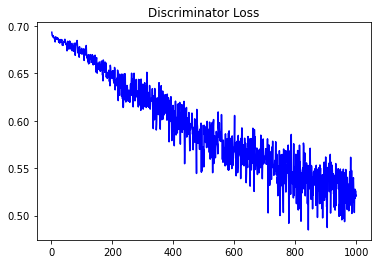

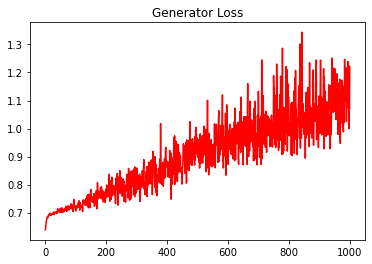

In [8]:
performanceMetrics.plotTrainingLoss2(discLossG1,genLossG1,np.linspace(1,n_epochs,n_epochs).astype(int))

In [9]:
GAN1_metrics = train_test.test_generator(generator,test_data,device)
sb.glue("GAN_1 Metrics",GAN1_metrics)

tensor([[ 0.1456],
        [ 0.4208],
        [-0.5012],
        [-0.4062],
        [-0.4167],
        [-1.8911],
        [ 1.0368],
        [-1.4347],
        [ 0.8553],
        [ 0.0919],
        [-0.4617],
        [ 0.6682],
        [-1.6653],
        [ 0.6807],
        [ 0.7099],
        [-0.9690],
        [ 0.8485],
        [ 1.1549],
        [-0.5699],
        [-0.2520]], grad_fn=<MmBackward>)
tensor([[ 0.2155],
        [ 0.5108],
        [-0.4722],
        [-0.2833],
        [-0.4998],
        [-1.5747],
        [ 1.0459],
        [-1.3990],
        [ 1.0155],
        [ 0.1678],
        [-0.4756],
        [ 0.1205],
        [-1.4914],
        [ 0.5900],
        [ 0.6830],
        [-0.9232],
        [ 0.7958],
        [ 1.1103],
        [ 0.0983],
        [-0.0695]], grad_fn=<MmBackward>)
tensor([[ 0.2482],
        [ 0.6723],
        [-0.4463],
        [-0.2442],
        [-0.4384],
        [-2.0414],
        [ 1.1286],
        [-1.3577],
        [ 0.8547],
        [ 0.3301],
    

tensor([[ 0.1780],
        [ 0.5399],
        [-0.3369],
        [-0.3163],
        [-0.4111],
        [-1.6637],
        [ 1.0418],
        [-1.4252],
        [ 0.9357],
        [ 0.1666],
        [-0.3859],
        [ 0.2453],
        [-1.6082],
        [ 0.6223],
        [ 0.7938],
        [-0.9532],
        [ 0.8722],
        [ 1.0330],
        [ 0.0497],
        [-0.1133]], grad_fn=<MmBackward>)
tensor([[ 0.2608],
        [ 0.3821],
        [-0.4140],
        [-0.2966],
        [-0.3513],
        [-1.6964],
        [ 1.0377],
        [-1.2093],
        [ 0.9953],
        [ 0.2039],
        [-0.4800],
        [ 0.3384],
        [-1.6345],
        [ 0.5979],
        [ 0.6524],
        [-1.0765],
        [ 0.9201],
        [ 1.1783],
        [ 0.0821],
        [-0.1723]], grad_fn=<MmBackward>)
tensor([[ 0.2919],
        [ 0.5306],
        [-0.4067],
        [-0.3147],
        [-0.4081],
        [-1.9248],
        [ 1.0366],
        [-1.3464],
        [ 0.8449],
        [ 0.4035],
    

tensor([[ 0.2842],
        [ 0.6014],
        [-0.4239],
        [-0.2541],
        [ 0.0558],
        [-1.7763],
        [ 1.0755],
        [-1.4309],
        [ 0.9837],
        [ 0.2544],
        [-0.6068],
        [ 0.4443],
        [-1.6771],
        [ 0.6176],
        [ 0.5883],
        [-0.9818],
        [ 0.9146],
        [ 1.0902],
        [-0.0919],
        [-0.2133]], grad_fn=<MmBackward>)
tensor([[ 0.2562],
        [ 0.3491],
        [-0.4064],
        [-0.3092],
        [-0.3801],
        [-1.8183],
        [ 1.0946],
        [-1.2377],
        [ 0.8892],
        [ 0.2461],
        [-0.3715],
        [ 0.2917],
        [-1.6746],
        [ 0.6661],
        [ 0.7597],
        [-0.9308],
        [ 0.8982],
        [ 1.0806],
        [ 0.1259],
        [-0.0786]], grad_fn=<MmBackward>)
tensor([[ 0.2746],
        [ 0.3761],
        [-0.4136],
        [-0.3088],
        [-0.4656],
        [-1.7933],
        [ 1.1079],
        [-1.4399],
        [ 0.9584],
        [ 0.1712],
    

tensor([[ 0.1980],
        [ 0.6020],
        [-0.4696],
        [-0.1811],
        [-0.4716],
        [-2.0050],
        [ 1.1442],
        [-1.4343],
        [ 0.9377],
        [ 0.2153],
        [-0.4693],
        [ 0.6766],
        [-1.5350],
        [ 0.8034],
        [ 0.6890],
        [-1.1419],
        [ 0.7332],
        [ 1.1938],
        [-1.1329],
        [-0.1651]], grad_fn=<MmBackward>)
tensor([[ 0.0886],
        [ 0.4208],
        [-0.4223],
        [-0.2315],
        [-0.4649],
        [-1.9896],
        [ 1.1090],
        [-1.3888],
        [ 0.8527],
        [ 0.1825],
        [-0.5020],
        [ 0.5034],
        [-1.3859],
        [ 0.7720],
        [ 0.6549],
        [-0.9764],
        [ 0.6137],
        [ 0.9939],
        [-0.4674],
        [-0.1953]], grad_fn=<MmBackward>)
tensor([[ 0.3758],
        [ 0.5295],
        [-0.4842],
        [-0.2390],
        [-0.4755],
        [-1.5778],
        [ 1.0498],
        [-1.2562],
        [ 0.9967],
        [ 0.1497],
    

tensor([[ 0.1860],
        [ 0.4245],
        [-0.3727],
        [-0.2690],
        [-0.4680],
        [-1.9361],
        [ 1.1216],
        [-1.2740],
        [ 0.9455],
        [ 0.1727],
        [-0.4094],
        [ 0.4328],
        [-1.6403],
        [ 0.5325],
        [ 0.6475],
        [-0.9731],
        [ 0.7811],
        [ 1.0151],
        [-0.3743],
        [-0.0325]], grad_fn=<MmBackward>)
tensor([[ 0.2277],
        [ 0.3476],
        [-0.4448],
        [-0.2966],
        [-0.4909],
        [-1.7445],
        [ 1.0722],
        [-1.4036],
        [ 0.9506],
        [ 0.1798],
        [-0.5193],
        [ 0.4083],
        [-1.5891],
        [ 0.7249],
        [ 0.7549],
        [-0.9865],
        [ 0.8899],
        [ 1.1168],
        [ 0.1670],
        [-0.0338]], grad_fn=<MmBackward>)
tensor([[ 0.1932],
        [ 0.6533],
        [-0.3923],
        [-0.3038],
        [-0.4575],
        [-1.8425],
        [ 1.1094],
        [-1.5369],
        [ 0.8847],
        [ 0.2704],
    

tensor([[ 0.1542],
        [ 0.4928],
        [-0.4028],
        [-0.2395],
        [-0.4677],
        [-1.9668],
        [ 1.1067],
        [-1.3138],
        [ 0.9549],
        [ 0.1566],
        [-0.4879],
        [ 0.5067],
        [-1.5244],
        [ 0.7275],
        [ 0.7087],
        [-0.9073],
        [ 0.7255],
        [ 1.0372],
        [-0.6031],
        [-0.1560]], grad_fn=<MmBackward>)
tensor([[ 0.2612],
        [ 0.4721],
        [-0.4046],
        [-0.2694],
        [-0.4839],
        [-1.9114],
        [ 1.0740],
        [-1.2834],
        [ 0.9577],
        [ 0.2345],
        [-0.4452],
        [ 0.3467],
        [-1.5901],
        [ 0.7016],
        [ 0.6638],
        [-1.0086],
        [ 0.8773],
        [ 1.1634],
        [ 0.0376],
        [-0.2600]], grad_fn=<MmBackward>)
tensor([[ 0.3490],
        [ 0.3949],
        [-0.4504],
        [-0.3280],
        [-0.3835],
        [-1.6384],
        [ 0.9972],
        [-1.3241],
        [ 1.0078],
        [ 0.1631],
    

tensor([[ 0.3581],
        [ 0.3452],
        [-0.4427],
        [-0.3449],
        [-0.3999],
        [-1.6729],
        [ 1.0146],
        [-1.2696],
        [ 0.9079],
        [ 0.2065],
        [-0.2876],
        [ 0.4176],
        [-1.7917],
        [ 0.6296],
        [ 0.7484],
        [-0.9137],
        [ 0.7932],
        [ 1.2098],
        [ 0.1886],
        [-0.1504]], grad_fn=<MmBackward>)
tensor([[ 0.1956],
        [ 0.6915],
        [-0.4826],
        [-0.2469],
        [-0.4862],
        [-1.8022],
        [ 1.0897],
        [-1.3963],
        [ 0.9396],
        [ 0.1739],
        [-0.4851],
        [ 0.4176],
        [-1.6797],
        [ 0.6517],
        [ 0.6159],
        [-0.9252],
        [ 0.7923],
        [ 1.0922],
        [-0.1455],
        [-0.2504]], grad_fn=<MmBackward>)
tensor([[ 0.1281],
        [ 0.5257],
        [-0.4612],
        [-0.2746],
        [-0.5094],
        [-1.6731],
        [ 1.0940],
        [-1.4289],
        [ 0.9467],
        [ 0.1553],
    


tensor([[ 0.2398],
        [ 0.3291],
        [-0.4529],
        [-0.2428],
        [-0.3910],
        [-1.5676],
        [ 1.0907],
        [-1.3690],
        [ 0.9488],
        [ 0.0989],
        [-0.4552],
        [ 0.3024],
        [-1.6536],
        [ 0.4943],
        [ 0.6472],
        [-0.9743],
        [ 0.9175],
        [ 1.1254],
        [ 0.0640],
        [-0.1268]], grad_fn=<MmBackward>)
tensor([[ 0.1569],
        [ 0.6053],
        [-0.3395],
        [-0.1630],
        [-0.3501],
        [-1.5219],
        [ 1.1064],
        [-1.3105],
        [ 0.9551],
        [ 0.1939],
        [-0.6207],
        [ 0.2458],
        [-1.5332],
        [ 0.5132],
        [ 0.6807],
        [-1.0202],
        [ 0.8302],
        [ 1.0865],
        [-0.0401],
        [-0.2358]], grad_fn=<MmBackward>)
tensor([[ 0.3641],
        [ 0.5764],
        [-0.3918],
        [-0.2494],
        [-0.5077],
        [-1.9265],
        [ 1.0851],
        [-1.2843],
        [ 0.9288],
        [ 0.1997],
   

tensor([[ 0.3211],
        [ 0.8023],
        [-0.4756],
        [-0.2136],
        [-0.4621],
        [-1.9503],
        [ 1.1443],
        [-1.2979],
        [ 0.9047],
        [ 0.1785],
        [-0.4557],
        [ 0.2700],
        [-1.5764],
        [ 0.4911],
        [ 0.8114],
        [-1.0075],
        [ 0.7227],
        [ 0.9524],
        [-0.2636],
        [-0.0667]], grad_fn=<MmBackward>)
tensor([[ 0.1106],
        [ 0.6195],
        [-0.4514],
        [-0.1971],
        [-0.4829],
        [-1.9148],
        [ 1.1183],
        [-1.6021],
        [ 0.7914],
        [ 0.3552],
        [-0.4174],
        [ 0.8007],
        [-1.5062],
        [ 0.5864],
        [ 0.6375],
        [-1.1492],
        [ 0.6244],
        [ 0.9381],
        [-0.3075],
        [-0.0038]], grad_fn=<MmBackward>)
tensor([[ 0.1936],
        [ 0.5257],
        [-0.3319],
        [-0.3184],
        [-0.3504],
        [-1.7034],
        [ 1.0607],
        [-1.4146],
        [ 0.9402],
        [ 0.2595],
    

tensor([[ 0.1982],
        [ 0.4926],
        [-0.4150],
        [-0.3080],
        [-0.3937],
        [-1.9331],
        [ 1.0826],
        [-1.2900],
        [ 0.9096],
        [ 0.3350],
        [-0.4817],
        [ 0.3204],
        [-1.6461],
        [ 0.7263],
        [ 0.7445],
        [-0.9910],
        [ 0.7562],
        [ 1.1565],
        [-0.0473],
        [-0.2281]], grad_fn=<MmBackward>)
tensor([[ 0.2509],
        [ 0.5480],
        [-0.4048],
        [-0.2796],
        [-0.3920],
        [-1.7577],
        [ 1.0743],
        [-1.3478],
        [ 0.9817],
        [ 0.3095],
        [-0.4124],
        [ 0.4260],
        [-1.6537],
        [ 0.6973],
        [ 0.6555],
        [-0.9096],
        [ 0.7980],
        [ 1.1082],
        [ 0.1357],
        [-0.2703]], grad_fn=<MmBackward>)
tensor([[ 0.1776],
        [ 0.3744],
        [-0.4196],
        [-0.3067],
        [-0.3931],
        [-1.7096],
        [ 1.0397],
        [-1.2354],
        [ 0.9361],
        [ 0.2424],
    

tensor([[ 0.2253],
        [ 0.2753],
        [-0.3957],
        [-0.2405],
        [-0.4146],
        [-1.7118],
        [ 1.0623],
        [-1.3322],
        [ 0.8723],
        [ 0.1464],
        [-0.5536],
        [ 0.2727],
        [-1.6939],
        [ 0.6850],
        [ 0.7997],
        [-1.0030],
        [ 0.7623],
        [ 1.2736],
        [ 0.0505],
        [-0.2550]], grad_fn=<MmBackward>)
tensor([[ 0.4245],
        [ 0.4613],
        [-0.3788],
        [-0.2350],
        [-0.2015],
        [-1.6018],
        [ 1.0936],
        [-1.5405],
        [ 1.0040],
        [ 0.2290],
        [-0.4798],
        [ 0.1841],
        [-1.5768],
        [ 0.5823],
        [ 0.8712],
        [-1.1709],
        [ 0.7827],
        [ 1.2623],
        [ 0.1076],
        [ 0.0044]], grad_fn=<MmBackward>)
tensor([[ 0.1769],
        [ 0.5608],
        [-0.4861],
        [-0.1962],
        [-0.5521],
        [-1.6404],
        [ 1.0519],
        [-1.2080],
        [ 0.9704],
        [ 0.1758],
    

tensor([[ 0.0549],
        [ 0.3951],
        [-0.3744],
        [-0.2722],
        [-0.5158],
        [-1.7316],
        [ 1.0928],
        [-1.2096],
        [ 1.0106],
        [ 0.2019],
        [-0.4652],
        [ 0.3726],
        [-1.6353],
        [ 0.6246],
        [ 0.5040],
        [-1.0017],
        [ 0.8861],
        [ 1.1406],
        [ 0.1035],
        [-0.1990]], grad_fn=<MmBackward>)
tensor([[ 0.2282],
        [ 0.3453],
        [-0.4388],
        [-0.3070],
        [-0.5179],
        [-1.9741],
        [ 1.0791],
        [-1.3987],
        [ 0.8902],
        [ 0.1716],
        [-0.3988],
        [ 0.5448],
        [-1.6635],
        [ 0.7014],
        [ 0.6605],
        [-1.0602],
        [ 0.6692],
        [ 1.0847],
        [-0.4728],
        [ 0.0547]], grad_fn=<MmBackward>)
tensor([[ 0.2534],
        [ 0.3212],
        [-0.3274],
        [-0.2391],
        [-0.2847],
        [-1.6943],
        [ 1.1435],
        [-1.2166],
        [ 0.9859],
        [ 0.2211],
    

tensor([[ 0.2096],
        [ 0.5318],
        [-0.4370],
        [-0.2655],
        [-0.5127],
        [-1.7825],
        [ 1.0531],
        [-1.2649],
        [ 0.9707],
        [ 0.3125],
        [-0.6053],
        [ 0.4987],
        [-1.6939],
        [ 0.5583],
        [ 0.6734],
        [-0.9814],
        [ 0.7261],
        [ 1.1436],
        [-0.0393],
        [-0.1761]], grad_fn=<MmBackward>)
tensor([[ 0.2201],
        [ 0.5267],
        [-0.3503],
        [-0.2426],
        [-0.4543],
        [-1.6024],
        [ 1.0697],
        [-1.4399],
        [ 0.9652],
        [ 0.3150],
        [-0.6966],
        [ 0.4187],
        [-1.6638],
        [ 0.6914],
        [ 0.6944],
        [-0.9351],
        [ 0.7629],
        [ 1.1055],
        [ 0.1231],
        [-0.2402]], grad_fn=<MmBackward>)
tensor([[ 0.2919],
        [ 0.3473],
        [-0.4672],
        [-0.2614],
        [-0.5123],
        [-1.7475],
        [ 1.0427],
        [-1.2490],
        [ 0.9856],
        [ 0.1443],
    

tensor([[ 0.2399],
        [ 0.4533],
        [-0.4957],
        [-0.2620],
        [-0.4871],
        [-1.5071],
        [ 1.0441],
        [-1.3070],
        [ 1.0586],
        [ 0.1520],
        [-0.4838],
        [ 0.5817],
        [-1.6307],
        [ 0.4961],
        [ 0.6144],
        [-0.8519],
        [ 0.6807],
        [ 1.1172],
        [-0.0600],
        [-0.2128]], grad_fn=<MmBackward>)
tensor([[ 0.3119],
        [ 0.6818],
        [-0.3290],
        [-0.3037],
        [-0.3877],
        [-1.8531],
        [ 1.1164],
        [-1.4003],
        [ 0.9866],
        [ 0.1756],
        [-0.4390],
        [ 0.1587],
        [-1.6200],
        [ 0.6429],
        [ 0.7337],
        [-1.0073],
        [ 0.6711],
        [ 1.0417],
        [-0.3095],
        [-0.1506]], grad_fn=<MmBackward>)
tensor([[ 0.1195],
        [ 0.6533],
        [-0.4470],
        [-0.2332],
        [-0.3886],
        [-1.4653],
        [ 1.0623],
        [-1.3908],
        [ 0.9532],
        [ 0.2307],
    

tensor([[ 0.1730],
        [ 0.6393],
        [-0.3402],
        [-0.1891],
        [-0.3972],
        [-1.6108],
        [ 1.0738],
        [-1.3698],
        [ 0.9364],
        [ 0.2744],
        [-0.4390],
        [ 0.3073],
        [-1.5689],
        [ 0.5675],
        [ 0.8201],
        [-0.9969],
        [ 0.7208],
        [ 1.0314],
        [-0.0676],
        [-0.1582]], grad_fn=<MmBackward>)
tensor([[ 0.2500],
        [ 0.5698],
        [-0.3111],
        [-0.1567],
        [-0.3296],
        [-1.6695],
        [ 1.1681],
        [-1.3728],
        [ 1.0150],
        [ 0.1986],
        [-0.4032],
        [ 0.1284],
        [-1.5754],
        [ 0.5456],
        [ 0.6969],
        [-1.1402],
        [ 0.8832],
        [ 1.1289],
        [ 0.0684],
        [-0.0585]], grad_fn=<MmBackward>)
tensor([[ 0.3822],
        [ 0.4235],
        [-0.4372],
        [-0.2261],
        [-0.5396],
        [-1.5063],
        [ 1.0970],
        [-1.5102],
        [ 0.9630],
        [ 0.1590],
    

tensor([[ 0.2061],
        [ 0.3519],
        [-0.3798],
        [-0.2708],
        [-0.3312],
        [-1.6171],
        [ 1.0513],
        [-1.2613],
        [ 0.9539],
        [ 0.1898],
        [-0.4050],
        [ 0.2818],
        [-1.5567],
        [ 0.5936],
        [ 0.8117],
        [-1.1699],
        [ 0.5918],
        [ 1.2019],
        [-0.0277],
        [-0.1700]], grad_fn=<MmBackward>)
tensor([[ 0.1151],
        [ 0.6275],
        [-0.4239],
        [-0.1542],
        [-0.3994],
        [-1.4479],
        [ 1.0550],
        [-1.2777],
        [ 1.0707],
        [ 0.1728],
        [-0.4389],
        [ 0.2366],
        [-1.5506],
        [ 0.7385],
        [ 0.6151],
        [-0.9789],
        [ 0.6476],
        [ 1.0946],
        [-0.0864],
        [-0.2383]], grad_fn=<MmBackward>)
tensor([[ 0.1710],
        [ 0.6145],
        [-0.3647],
        [-0.1937],
        [-0.5220],
        [-1.6574],
        [ 1.1216],
        [-1.3187],
        [ 1.0018],
        [ 0.1556],
    

tensor([[ 0.1897],
        [ 0.3007],
        [-0.4470],
        [-0.2302],
        [-0.4445],
        [-1.6988],
        [ 1.0900],
        [-1.5310],
        [ 0.7976],
        [ 0.1750],
        [-0.3631],
        [ 0.4334],
        [-1.6077],
        [ 0.7480],
        [ 0.6638],
        [-1.1181],
        [ 0.8916],
        [ 1.2380],
        [-0.0842],
        [-0.0932]], grad_fn=<MmBackward>)
tensor([[ 0.2410],
        [ 0.5988],
        [-0.4841],
        [-0.2755],
        [-0.4422],
        [-2.0247],
        [ 1.0678],
        [-1.4497],
        [ 0.8348],
        [ 0.1635],
        [-0.5140],
        [ 0.6853],
        [-1.5891],
        [ 0.5389],
        [ 0.6932],
        [-0.9885],
        [ 0.7028],
        [ 1.0048],
        [-0.4105],
        [-0.2266]], grad_fn=<MmBackward>)
tensor([[ 0.0926],
        [ 0.5796],
        [-0.4185],
        [-0.2062],
        [-0.3996],
        [-1.6358],
        [ 1.0752],
        [-1.3732],
        [ 0.9871],
        [ 0.3694],
    

tensor([[ 0.2102],
        [ 0.2872],
        [-0.4579],
        [-0.2325],
        [-0.4498],
        [-1.6382],
        [ 1.0399],
        [-1.2354],
        [ 0.9455],
        [ 0.0547],
        [-0.5739],
        [ 0.1741],
        [-1.5229],
        [ 0.7359],
        [ 0.6334],
        [-1.0845],
        [ 0.6784],
        [ 1.2322],
        [-0.0585],
        [-0.1941]], grad_fn=<MmBackward>)
tensor([[ 0.1905],
        [ 0.2813],
        [-0.3750],
        [-0.2460],
        [-0.4063],
        [-1.5391],
        [ 1.0734],
        [-1.4401],
        [ 0.9545],
        [ 0.1655],
        [-0.3221],
        [ 0.6801],
        [-1.6193],
        [ 0.5587],
        [ 0.8448],
        [-1.0739],
        [ 0.8817],
        [ 1.1349],
        [ 0.0987],
        [-0.0142]], grad_fn=<MmBackward>)
tensor([[ 0.3302],
        [ 0.5684],
        [-0.4289],
        [-0.2999],
        [-0.4510],
        [-1.7413],
        [ 1.0769],
        [-1.4301],
        [ 0.9209],
        [ 0.2936],
    

tensor([[ 0.2806],
        [ 0.5777],
        [-0.4090],
        [-0.2856],
        [-0.4626],
        [-1.6389],
        [ 1.0354],
        [-1.3663],
        [ 1.0306],
        [ 0.2882],
        [-0.4488],
        [ 0.2182],
        [-1.5638],
        [ 0.6562],
        [ 0.7078],
        [-0.9437],
        [ 0.7977],
        [ 1.1506],
        [ 0.1432],
        [-0.1522]], grad_fn=<MmBackward>)
tensor([[ 0.1693],
        [ 0.3824],
        [-0.4108],
        [-0.2631],
        [-0.4152],
        [-1.8015],
        [ 1.0375],
        [-1.2396],
        [ 0.9404],
        [ 0.2689],
        [-0.5306],
        [ 0.2462],
        [-1.6881],
        [ 0.6874],
        [ 0.7516],
        [-1.0111],
        [ 0.8427],
        [ 1.1584],
        [-0.0038],
        [-0.2157]], grad_fn=<MmBackward>)
tensor([[ 0.1705],
        [ 0.2815],
        [-0.4009],
        [-0.2808],
        [-0.4930],
        [-1.7374],
        [ 1.0534],
        [-1.3831],
        [ 0.8601],
        [ 0.1418],
    

tensor([[ 0.2316],
        [ 0.5237],
        [-0.4806],
        [-0.2586],
        [-0.5033],
        [-2.1096],
        [ 1.0535],
        [-1.5638],
        [ 0.7931],
        [ 0.1974],
        [-0.4734],
        [ 0.3701],
        [-1.7013],
        [ 0.7436],
        [ 0.6408],
        [-1.0493],
        [ 0.8049],
        [ 1.1555],
        [-0.4420],
        [-0.3045]], grad_fn=<MmBackward>)
tensor([[ 0.2086],
        [ 0.3370],
        [-0.4025],
        [-0.2697],
        [-0.4517],
        [-1.6617],
        [ 1.0359],
        [-1.3820],
        [ 0.9638],
        [ 0.4055],
        [-0.4740],
        [ 0.3474],
        [-1.5804],
        [ 0.6750],
        [ 0.6989],
        [-0.9023],
        [ 0.7973],
        [ 1.1153],
        [ 0.1204],
        [-0.0108]], grad_fn=<MmBackward>)
tensor([[ 0.3082],
        [ 0.4088],
        [-0.2940],
        [-0.3215],
        [-0.4154],
        [-1.7026],
        [ 1.0547],
        [-1.4748],
        [ 0.8613],
        [ 0.3896],
    


tensor([[ 0.2015],
        [ 0.3770],
        [-0.4428],
        [-0.3160],
        [-0.4138],
        [-1.4633],
        [ 0.9659],
        [-1.2266],
        [ 0.9311],
        [ 0.1108],
        [-0.3569],
        [ 0.4602],
        [-1.6559],
        [ 0.5841],
        [ 0.5516],
        [-0.9776],
        [ 0.7060],
        [ 1.1702],
        [ 0.0605],
        [-0.0832]], grad_fn=<MmBackward>)
tensor([[ 0.2571],
        [ 0.5126],
        [-0.3854],
        [-0.2544],
        [-0.3316],
        [-1.4754],
        [ 1.0127],
        [-1.3359],
        [ 0.9116],
        [ 0.4225],
        [-0.2920],
        [ 0.2201],
        [-1.6453],
        [ 0.4933],
        [ 0.6021],
        [-1.0253],
        [ 0.7659],
        [ 1.1838],
        [-0.0333],
        [-0.1980]], grad_fn=<MmBackward>)
tensor([[ 0.1228],
        [ 0.4626],
        [-0.4297],
        [-0.2752],
        [-0.4851],
        [-1.9395],
        [ 1.1224],
        [-1.4335],
        [ 0.9101],
        [ 0.1610],
   


tensor([[ 0.1134],
        [ 0.5989],
        [-0.4263],
        [-0.3129],
        [-0.4598],
        [-1.9406],
        [ 1.0964],
        [-1.3073],
        [ 0.9277],
        [ 0.1996],
        [-0.3881],
        [ 0.4451],
        [-1.6347],
        [ 0.6450],
        [ 0.6817],
        [-0.9618],
        [ 0.7590],
        [ 0.9981],
        [-0.3332],
        [-0.0669]], grad_fn=<MmBackward>)
tensor([[ 0.1190],
        [ 0.6278],
        [-0.4665],
        [-0.2370],
        [-0.4824],
        [-1.8746],
        [ 1.0777],
        [-1.3722],
        [ 0.9853],
        [ 0.4241],
        [-0.5430],
        [ 0.4968],
        [-1.6432],
        [ 0.4210],
        [ 0.6556],
        [-0.9931],
        [ 0.7954],
        [ 1.0552],
        [-0.3727],
        [-0.2665]], grad_fn=<MmBackward>)
tensor([[ 0.2946],
        [ 0.4320],
        [-0.4487],
        [-0.3076],
        [-0.3967],
        [-1.6533],
        [ 1.0318],
        [-1.3417],
        [ 0.9009],
        [ 0.3889],
   

tensor([[ 0.2282],
        [ 0.4123],
        [-0.4498],
        [-0.2844],
        [-0.4588],
        [-1.5837],
        [ 1.0700],
        [-1.3711],
        [ 1.0103],
        [ 0.1879],
        [-0.3845],
        [ 0.8122],
        [-1.5425],
        [ 0.7239],
        [ 0.6606],
        [-1.0120],
        [ 0.6110],
        [ 1.0953],
        [-0.1589],
        [ 0.0462]], grad_fn=<MmBackward>)
tensor([[ 0.3177],
        [ 0.3380],
        [-0.4201],
        [-0.2590],
        [-0.4760],
        [-1.6099],
        [ 1.0660],
        [-1.5341],
        [ 0.9774],
        [ 0.1414],
        [-0.3247],
        [ 0.6627],
        [-1.5167],
        [ 0.6639],
        [ 0.6751],
        [-0.9831],
        [ 0.6906],
        [ 1.1021],
        [ 0.0893],
        [ 0.1164]], grad_fn=<MmBackward>)
tensor([[ 0.1157],
        [ 0.5471],
        [-0.4863],
        [-0.2402],
        [-0.4895],
        [-1.8077],
        [ 1.1037],
        [-1.4373],
        [ 0.9496],
        [ 0.1831],
    

tensor([[ 0.3511],
        [ 0.4934],
        [-0.3779],
        [-0.3091],
        [-0.3997],
        [-1.7160],
        [ 1.0396],
        [-1.3460],
        [ 0.9742],
        [ 0.2164],
        [-0.2778],
        [ 0.2877],
        [-1.6758],
        [ 0.6062],
        [ 0.6448],
        [-0.9985],
        [ 0.9208],
        [ 1.1974],
        [ 0.1428],
        [-0.1563]], grad_fn=<MmBackward>)
tensor([[ 0.4246],
        [ 0.2876],
        [-0.4784],
        [-0.3494],
        [-0.4756],
        [-1.5398],
        [ 0.9962],
        [-1.3025],
        [ 0.9293],
        [ 0.0737],
        [-0.2858],
        [ 0.3230],
        [-1.7296],
        [ 0.4757],
        [ 0.6154],
        [-0.9635],
        [ 0.7547],
        [ 1.1658],
        [ 0.0515],
        [-0.2023]], grad_fn=<MmBackward>)
tensor([[ 0.2182],
        [ 0.5022],
        [-0.3894],
        [-0.2757],
        [-0.4005],
        [-1.6791],
        [ 1.0446],
        [-1.2621],
        [ 1.0051],
        [ 0.3936],
    

tensor([[ 0.1906],
        [ 0.3877],
        [-0.4343],
        [-0.2894],
        [-0.4918],
        [-1.6353],
        [ 1.1145],
        [-1.5940],
        [ 0.9407],
        [ 0.1291],
        [-0.3844],
        [ 0.4019],
        [-1.6197],
        [ 0.5892],
        [ 0.7188],
        [-1.0437],
        [ 0.8279],
        [ 1.1411],
        [ 0.0864],
        [-0.1223]], grad_fn=<MmBackward>)
tensor([[ 0.1546],
        [ 0.5787],
        [-0.4540],
        [-0.3032],
        [-0.4266],
        [-1.7688],
        [ 1.0326],
        [-1.4518],
        [ 0.9784],
        [ 0.2833],
        [-0.4584],
        [ 0.3677],
        [-1.6123],
        [ 0.6388],
        [ 0.7439],
        [-0.9620],
        [ 0.8353],
        [ 1.0842],
        [-0.0970],
        [-0.1784]], grad_fn=<MmBackward>)
tensor([[ 0.1743],
        [ 0.4944],
        [-0.2266],
        [-0.2233],
        [-0.5306],
        [-1.6475],
        [ 1.0981],
        [-1.3192],
        [ 0.9787],
        [ 0.1783],
    

tensor([[ 0.3630],
        [ 0.2782],
        [-0.4478],
        [-0.2962],
        [-0.4793],
        [-1.8110],
        [ 1.0499],
        [-1.4317],
        [ 0.9054],
        [ 0.1775],
        [-0.4756],
        [ 0.3927],
        [-1.6519],
        [ 0.6867],
        [ 0.7294],
        [-1.0238],
        [ 0.8511],
        [ 1.2446],
        [ 0.1084],
        [-0.0935]], grad_fn=<MmBackward>)
tensor([[ 0.2373],
        [ 0.3551],
        [-0.3898],
        [-0.2177],
        [-0.4407],
        [-1.5691],
        [ 1.0620],
        [-1.3230],
        [ 0.9679],
        [ 0.4105],
        [-0.5061],
        [ 0.3610],
        [-1.6128],
        [ 0.7342],
        [ 0.6341],
        [-1.0418],
        [ 0.6557],
        [ 1.1878],
        [ 0.0602],
        [-0.2252]], grad_fn=<MmBackward>)
tensor([[ 0.2156],
        [ 0.4946],
        [-0.3648],
        [-0.1950],
        [-0.4760],
        [-2.1343],
        [ 1.0963],
        [-1.3132],
        [ 0.8954],
        [ 0.1474],
    

tensor([[ 3.4985e-01],
        [ 2.9562e-01],
        [-4.5120e-01],
        [-2.6239e-01],
        [-4.1970e-01],
        [-1.6114e+00],
        [ 1.0650e+00],
        [-1.4652e+00],
        [ 9.5824e-01],
        [ 3.5151e-01],
        [-5.1996e-01],
        [ 9.4209e-01],
        [-1.5981e+00],
        [ 5.6401e-01],
        [ 6.4511e-01],
        [-9.9441e-01],
        [ 8.2487e-01],
        [ 1.1838e+00],
        [ 3.6272e-02],
        [-9.6208e-04]], grad_fn=<MmBackward>)
tensor([[ 0.3431],
        [ 0.4062],
        [-0.4269],
        [-0.2500],
        [-0.3603],
        [-1.8468],
        [ 1.0823],
        [-1.2662],
        [ 0.9538],
        [ 0.3380],
        [-0.4580],
        [ 0.2462],
        [-1.6183],
        [ 0.6894],
        [ 0.7717],
        [-0.9182],
        [ 0.7878],
        [ 1.1506],
        [ 0.1005],
        [-0.1305]], grad_fn=<MmBackward>)
tensor([[ 0.3169],
        [ 0.4770],
        [-0.3891],
        [-0.2729],
        [-0.3439],
        [-1.5628],


tensor([[ 0.2093],
        [ 0.3764],
        [-0.4760],
        [-0.3507],
        [-0.3978],
        [-1.6181],
        [ 1.0372],
        [-1.3097],
        [ 0.9297],
        [ 0.0301],
        [-0.5505],
        [ 0.5111],
        [-1.5697],
        [ 0.4355],
        [ 0.7827],
        [-1.0536],
        [ 0.6345],
        [ 1.1709],
        [ 0.0394],
        [-0.1188]], grad_fn=<MmBackward>)
tensor([[ 0.2239],
        [ 0.3555],
        [-0.4583],
        [-0.3300],
        [-0.4649],
        [-1.8084],
        [ 1.0439],
        [-1.1684],
        [ 0.9860],
        [ 0.1032],
        [-0.3688],
        [ 0.4556],
        [-1.7644],
        [ 0.3751],
        [ 0.6863],
        [-0.9265],
        [ 0.7614],
        [ 1.1541],
        [-0.0154],
        [-0.2035]], grad_fn=<MmBackward>)
tensor([[ 0.3137],
        [ 0.6000],
        [-0.4858],
        [-0.2681],
        [-0.5255],
        [-1.6660],
        [ 1.0434],
        [-1.2698],
        [ 1.0016],
        [ 0.1821],
    

tensor([[ 0.3565],
        [ 0.4987],
        [-0.4233],
        [-0.2527],
        [-0.4555],
        [-1.7356],
        [ 1.0751],
        [-1.3587],
        [ 0.9671],
        [ 0.1907],
        [-0.5227],
        [ 0.2837],
        [-1.7248],
        [ 0.7075],
        [ 0.6996],
        [-0.9835],
        [ 0.8905],
        [ 1.1762],
        [ 0.0526],
        [-0.1774]], grad_fn=<MmBackward>)
tensor([[ 0.3311],
        [ 0.7571],
        [-0.4058],
        [-0.2471],
        [-0.4292],
        [-1.9976],
        [ 1.1065],
        [-1.4201],
        [ 0.9192],
        [ 0.1850],
        [-0.4796],
        [ 0.1536],
        [-1.6400],
        [ 0.4747],
        [ 0.8195],
        [-1.0858],
        [ 0.5936],
        [ 1.0711],
        [-0.3632],
        [-0.1070]], grad_fn=<MmBackward>)
tensor([[ 2.4329e-01],
        [ 4.1387e-01],
        [-4.1270e-01],
        [-3.1888e-01],
        [-3.5154e-01],
        [-1.5858e+00],
        [ 1.0527e+00],
        [-1.3281e+00],
        [ 

tensor([[ 0.2609],
        [ 0.3239],
        [-0.4266],
        [-0.2784],
        [-0.4556],
        [-1.6313],
        [ 1.0704],
        [-1.5288],
        [ 0.9555],
        [ 0.3725],
        [-0.2615],
        [ 0.3609],
        [-1.5705],
        [ 0.5163],
        [ 0.6738],
        [-1.0587],
        [ 0.9453],
        [ 1.1561],
        [ 0.1389],
        [-0.1500]], grad_fn=<MmBackward>)
tensor([[ 0.2153],
        [ 0.3275],
        [-0.3688],
        [-0.2357],
        [-0.3130],
        [-1.5310],
        [ 1.0964],
        [-1.3677],
        [ 0.9835],
        [ 0.4689],
        [-0.4285],
        [ 0.2614],
        [-1.5331],
        [ 0.5620],
        [ 0.6663],
        [-1.0792],
        [ 0.6617],
        [ 1.1488],
        [ 0.0459],
        [-0.0108]], grad_fn=<MmBackward>)
tensor([[ 0.2809],
        [ 0.3537],
        [-0.3970],
        [-0.3347],
        [-0.4142],
        [-1.6823],
        [ 1.0558],
        [-1.4881],
        [ 0.8683],
        [ 0.3408],
    

tensor([[ 0.2943],
        [ 0.3342],
        [-0.4930],
        [-0.3229],
        [-0.4952],
        [-1.7773],
        [ 1.0219],
        [-1.2167],
        [ 0.9836],
        [ 0.1533],
        [-0.3444],
        [ 0.2869],
        [-1.5833],
        [ 0.6081],
        [ 0.6259],
        [-0.8782],
        [ 0.8033],
        [ 1.1186],
        [ 0.0200],
        [-0.1990]], grad_fn=<MmBackward>)
tensor([[ 0.2394],
        [ 0.4211],
        [-0.3434],
        [-0.2393],
        [-0.5175],
        [-1.8158],
        [ 1.0922],
        [-1.3797],
        [ 0.9627],
        [ 0.2424],
        [-0.5727],
        [ 0.5439],
        [-1.7440],
        [ 0.7579],
        [ 0.5222],
        [-0.9745],
        [ 0.9114],
        [ 1.1747],
        [ 0.0644],
        [-0.2702]], grad_fn=<MmBackward>)
tensor([[ 0.1674],
        [ 0.3988],
        [-0.3953],
        [-0.3481],
        [-0.3894],
        [-1.6886],
        [ 1.0159],
        [-1.2131],
        [ 0.9094],
        [ 0.3284],
    

tensor([[ 0.1866],
        [ 0.3788],
        [-0.3778],
        [-0.2762],
        [-0.3805],
        [-1.9367],
        [ 1.0755],
        [-1.3519],
        [ 0.9007],
        [ 0.2774],
        [-0.4515],
        [ 0.4936],
        [-1.5973],
        [ 0.5224],
        [ 0.6557],
        [-1.0273],
        [ 0.8156],
        [ 1.0946],
        [-0.4088],
        [-0.1464]], grad_fn=<MmBackward>)
tensor([[ 0.2732],
        [ 0.4918],
        [-0.4580],
        [-0.3086],
        [-0.4448],
        [-1.8903],
        [ 1.0863],
        [-1.3657],
        [ 0.8900],
        [ 0.2356],
        [-0.7786],
        [ 0.3839],
        [-1.6171],
        [ 0.5992],
        [ 0.6400],
        [-1.0215],
        [ 0.6957],
        [ 1.0520],
        [-0.4631],
        [-0.1964]], grad_fn=<MmBackward>)
tensor([[ 0.1558],
        [ 0.5235],
        [-0.4214],
        [-0.3164],
        [-0.4755],
        [-1.6942],
        [ 1.0353],
        [-1.5081],
        [ 0.9321],
        [ 0.1770],
    

tensor([[ 0.2795],
        [ 0.3778],
        [-0.4626],
        [-0.2330],
        [-0.4269],
        [-1.6356],
        [ 1.0388],
        [-1.4920],
        [ 0.9348],
        [ 0.2140],
        [-0.3134],
        [ 0.5010],
        [-1.6751],
        [ 0.7112],
        [ 0.8664],
        [-1.0602],
        [ 0.6747],
        [ 1.1612],
        [ 0.0423],
        [ 0.0861]], grad_fn=<MmBackward>)
tensor([[ 0.2474],
        [ 0.5291],
        [-0.4718],
        [-0.2942],
        [-0.5527],
        [-1.6029],
        [ 1.0676],
        [-1.2738],
        [ 1.0209],
        [ 0.2495],
        [-0.6267],
        [ 0.3280],
        [-1.6222],
        [ 0.3277],
        [ 0.7342],
        [-0.8590],
        [ 0.6969],
        [ 1.1333],
        [-0.0169],
        [-0.2387]], grad_fn=<MmBackward>)
tensor([[ 0.2020],
        [ 0.4148],
        [-0.4362],
        [-0.3202],
        [-0.4766],
        [-1.7273],
        [ 1.0249],
        [-1.3030],
        [ 0.9635],
        [ 0.1672],
    

tensor([[ 0.1843],
        [ 0.3275],
        [-0.4377],
        [-0.3372],
        [-0.4667],
        [-1.6398],
        [ 1.0258],
        [-1.2785],
        [ 0.9434],
        [ 0.0211],
        [-0.3801],
        [ 0.3992],
        [-1.7165],
        [ 0.6462],
        [ 0.6974],
        [-1.0885],
        [ 0.8554],
        [ 1.1925],
        [ 0.0351],
        [-0.1382]], grad_fn=<MmBackward>)
tensor([[ 0.3282],
        [ 0.3632],
        [-0.4547],
        [-0.2367],
        [-0.5527],
        [-1.7807],
        [ 1.0612],
        [-1.3370],
        [ 0.9691],
        [ 0.2574],
        [-0.3517],
        [ 0.4889],
        [-1.6308],
        [ 0.6958],
        [ 0.6617],
        [-0.9784],
        [ 0.7458],
        [ 1.1578],
        [-0.0086],
        [-0.0184]], grad_fn=<MmBackward>)
tensor([[ 0.2030],
        [ 0.3855],
        [-0.3901],
        [-0.2989],
        [-0.4211],
        [-1.7714],
        [ 1.0861],
        [-1.3645],
        [ 0.9723],
        [ 0.2449],
    

tensor([[ 0.2384],
        [ 0.5717],
        [-0.3686],
        [-0.2928],
        [-0.3910],
        [-1.6273],
        [ 1.0740],
        [-1.3749],
        [ 1.0338],
        [ 0.3289],
        [-0.3145],
        [ 0.1588],
        [-1.4776],
        [ 0.5689],
        [ 0.6256],
        [-0.9542],
        [ 0.7410],
        [ 1.1136],
        [ 0.0625],
        [-0.2676]], grad_fn=<MmBackward>)
tensor([[ 0.2410],
        [ 0.3549],
        [-0.3301],
        [-0.2440],
        [-0.5109],
        [-1.6998],
        [ 1.0710],
        [-1.3489],
        [ 0.9819],
        [ 0.3068],
        [-0.4278],
        [ 0.4664],
        [-1.6354],
        [ 0.4143],
        [ 0.7751],
        [-0.9158],
        [ 0.7858],
        [ 1.1399],
        [ 0.1185],
        [-0.1562]], grad_fn=<MmBackward>)
tensor([[ 0.1518],
        [ 0.4625],
        [-0.4644],
        [-0.3919],
        [-0.4441],
        [-1.9344],
        [ 1.0583],
        [-1.3675],
        [ 0.9460],
        [ 0.3788],
    


tensor([[ 0.2455],
        [ 0.3221],
        [-0.4257],
        [-0.2677],
        [-0.4056],
        [-1.6305],
        [ 1.0938],
        [-1.3801],
        [ 0.9579],
        [ 0.2949],
        [-0.4405],
        [ 0.3404],
        [-1.5388],
        [ 0.6810],
        [ 0.6329],
        [-0.8161],
        [ 0.8919],
        [ 1.0809],
        [ 0.1636],
        [-0.1702]], grad_fn=<MmBackward>)
tensor([[ 0.2418],
        [ 0.3132],
        [-0.4457],
        [-0.2488],
        [-0.4773],
        [-1.7167],
        [ 1.0845],
        [-1.4164],
        [ 0.9491],
        [ 0.2770],
        [-0.3144],
        [ 0.4011],
        [-1.6250],
        [ 0.6222],
        [ 0.6901],
        [-0.9857],
        [ 0.8939],
        [ 1.1325],
        [ 0.0803],
        [-0.0609]], grad_fn=<MmBackward>)
tensor([[ 0.1607],
        [ 0.4208],
        [-0.4896],
        [-0.3069],
        [-0.4190],
        [-2.0168],
        [ 1.0645],
        [-1.3452],
        [ 0.8789],
        [ 0.4226],
   

tensor([[ 3.6630e-01],
        [ 4.7768e-01],
        [-4.2305e-01],
        [-2.4822e-01],
        [-5.2026e-01],
        [-1.7724e+00],
        [ 1.0946e+00],
        [-1.3183e+00],
        [ 9.7783e-01],
        [ 1.3932e-01],
        [-4.1328e-01],
        [ 5.4352e-01],
        [-1.7061e+00],
        [ 5.2185e-01],
        [ 7.5445e-01],
        [-9.8306e-01],
        [ 8.7777e-01],
        [ 1.1564e+00],
        [-1.6979e-03],
        [-1.5923e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1054],
        [ 0.8635],
        [-0.4338],
        [-0.1548],
        [-0.4568],
        [-2.1071],
        [ 1.1451],
        [-1.5670],
        [ 0.8016],
        [ 0.1968],
        [-0.3792],
        [ 0.6322],
        [-1.5123],
        [ 0.6482],
        [ 0.7544],
        [-1.1721],
        [ 0.6332],
        [ 0.9935],
        [-0.4815],
        [-0.1237]], grad_fn=<MmBackward>)
tensor([[ 0.1629],
        [ 0.3448],
        [-0.4126],
        [-0.2475],
        [-0.4457],
        [-1.7843],


tensor([[ 0.1772],
        [ 0.4754],
        [-0.2652],
        [-0.3169],
        [-0.4378],
        [-1.7850],
        [ 1.0681],
        [-1.3851],
        [ 0.9640],
        [ 0.1724],
        [-0.5858],
        [ 0.2904],
        [-1.6686],
        [ 0.7157],
        [ 0.7352],
        [-0.9790],
        [ 0.8584],
        [ 1.1367],
        [-0.0228],
        [-0.1968]], grad_fn=<MmBackward>)
tensor([[ 0.3928],
        [ 0.4105],
        [-0.3831],
        [-0.1831],
        [-0.5616],
        [-1.5055],
        [ 1.0811],
        [-1.3252],
        [ 0.9732],
        [ 0.1318],
        [-0.4542],
        [ 0.4902],
        [-1.6048],
        [ 0.3873],
        [ 0.6866],
        [-0.9531],
        [ 0.7283],
        [ 1.1320],
        [-0.0351],
        [-0.1353]], grad_fn=<MmBackward>)
tensor([[ 0.1722],
        [ 0.4513],
        [-0.4295],
        [-0.2612],
        [-0.3809],
        [-1.6156],
        [ 1.0704],
        [-1.1880],
        [ 1.0546],
        [ 0.2688],
    

tensor([[ 0.3365],
        [ 0.5684],
        [-0.4646],
        [-0.2541],
        [-0.4830],
        [-1.6999],
        [ 1.1158],
        [-1.4370],
        [ 0.9967],
        [ 0.3008],
        [-0.3869],
        [ 0.4940],
        [-1.6117],
        [ 0.4519],
        [ 0.7176],
        [-0.9171],
        [ 0.8646],
        [ 1.1156],
        [ 0.1266],
        [-0.1806]], grad_fn=<MmBackward>)
tensor([[ 0.2065],
        [ 0.3197],
        [-0.5026],
        [-0.3869],
        [-0.4998],
        [-1.7120],
        [ 1.0293],
        [-1.3128],
        [ 0.9686],
        [ 0.0933],
        [-0.4680],
        [ 0.6685],
        [-1.6881],
        [ 0.6759],
        [ 0.6269],
        [-1.1161],
        [ 0.7477],
        [ 1.1536],
        [-0.0546],
        [-0.1795]], grad_fn=<MmBackward>)
tensor([[ 0.1416],
        [ 0.6980],
        [-0.3981],
        [-0.2183],
        [-0.3973],
        [-1.5852],
        [ 1.0845],
        [-1.3622],
        [ 1.0322],
        [ 0.2222],
    

tensor([[ 0.2021],
        [ 0.5968],
        [-0.3589],
        [-0.2468],
        [-0.3991],
        [-1.7421],
        [ 1.0700],
        [-1.2879],
        [ 0.9839],
        [ 0.2155],
        [-0.3483],
        [ 0.1785],
        [-1.6622],
        [ 0.6733],
        [ 0.7359],
        [-0.9691],
        [ 0.9575],
        [ 1.0826],
        [-0.0128],
        [-0.2011]], grad_fn=<MmBackward>)
tensor([[ 0.1972],
        [ 0.3043],
        [-0.5025],
        [-0.3562],
        [-0.4522],
        [-1.7738],
        [ 0.9982],
        [-1.2298],
        [ 0.9193],
        [ 0.0375],
        [-0.4292],
        [ 0.4583],
        [-1.6862],
        [ 0.6081],
        [ 0.7006],
        [-0.9097],
        [ 0.6378],
        [ 1.2170],
        [-0.0666],
        [-0.1015]], grad_fn=<MmBackward>)
tensor([[ 0.2944],
        [ 0.6707],
        [-0.3721],
        [-0.2754],
        [-0.3382],
        [-1.6199],
        [ 1.0638],
        [-1.2318],
        [ 1.0480],
        [ 0.2916],
    


tensor([[ 0.3090],
        [ 0.4009],
        [-0.4251],
        [-0.2395],
        [-0.3900],
        [-1.7280],
        [ 1.0771],
        [-1.0400],
        [ 0.9903],
        [ 0.1653],
        [-0.4639],
        [ 0.1775],
        [-1.6953],
        [ 0.4979],
        [ 0.6702],
        [-1.0574],
        [ 0.9184],
        [ 1.1217],
        [-0.1550],
        [-0.2271]], grad_fn=<MmBackward>)
tensor([[ 0.3222],
        [ 0.4869],
        [-0.4655],
        [-0.2625],
        [-0.4505],
        [-1.6653],
        [ 1.0803],
        [-1.3911],
        [ 0.9611],
        [ 0.1447],
        [-0.3863],
        [ 0.4685],
        [-1.5537],
        [ 0.7130],
        [ 0.6821],
        [-0.9832],
        [ 0.6528],
        [ 1.0521],
        [ 0.0959],
        [-0.0787]], grad_fn=<MmBackward>)
tensor([[ 0.1660],
        [ 0.6098],
        [-0.4665],
        [-0.2906],
        [-0.5129],
        [-1.7884],
        [ 1.0728],
        [-1.3884],
        [ 0.9814],
        [ 0.1335],
   

tensor([[ 0.1770],
        [ 0.4915],
        [-0.4692],
        [-0.2540],
        [-0.4550],
        [-1.9110],
        [ 1.1133],
        [-1.2921],
        [ 0.9530],
        [ 0.1837],
        [-0.4165],
        [ 0.4384],
        [-1.6303],
        [ 0.4537],
        [ 0.7906],
        [-0.9779],
        [ 0.7916],
        [ 1.0270],
        [-0.4867],
        [-0.0299]], grad_fn=<MmBackward>)
tensor([[ 0.1837],
        [ 0.5271],
        [-0.4233],
        [-0.1746],
        [-0.4268],
        [-1.6107],
        [ 1.0857],
        [-1.2062],
        [ 1.0206],
        [ 0.2604],
        [-0.4976],
        [ 0.2574],
        [-1.4353],
        [ 0.4743],
        [ 0.6900],
        [-0.9466],
        [ 0.7852],
        [ 1.1024],
        [-0.0488],
        [-0.1646]], grad_fn=<MmBackward>)
tensor([[ 0.1770],
        [ 0.3464],
        [-0.4594],
        [-0.2971],
        [-0.3248],
        [-1.9046],
        [ 1.0519],
        [-1.3110],
        [ 0.9559],
        [ 0.3976],
    

tensor([[ 0.2715],
        [ 0.4718],
        [-0.3854],
        [-0.3181],
        [-0.4088],
        [-1.8364],
        [ 1.1155],
        [-1.4593],
        [ 0.8862],
        [ 0.1740],
        [-0.4132],
        [ 0.4008],
        [-1.6172],
        [ 0.6829],
        [ 0.6824],
        [-0.9773],
        [ 0.6824],
        [ 1.0525],
        [-0.1478],
        [ 0.0229]], grad_fn=<MmBackward>)
tensor([[ 3.4879e-01],
        [ 3.3146e-01],
        [-4.7550e-01],
        [-2.8925e-01],
        [-5.1406e-01],
        [-1.8210e+00],
        [ 1.0397e+00],
        [-1.2676e+00],
        [ 9.0108e-01],
        [ 5.0810e-02],
        [-4.5616e-01],
        [ 3.8363e-01],
        [-1.7194e+00],
        [ 4.2705e-01],
        [ 6.3297e-01],
        [-1.0669e+00],
        [ 8.7653e-01],
        [ 1.2125e+00],
        [ 2.0969e-04],
        [-1.7873e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1217],
        [ 0.4758],
        [-0.4561],
        [-0.2660],
        [-0.4079],
        [-1.5925],



tensor([[ 0.3024],
        [ 0.6542],
        [-0.4297],
        [-0.3073],
        [-0.4490],
        [-1.6889],
        [ 1.0423],
        [-1.4096],
        [ 0.9537],
        [ 0.3092],
        [-0.4775],
        [ 0.6764],
        [-1.6591],
        [ 0.6717],
        [ 0.7202],
        [-0.9210],
        [ 0.7510],
        [ 1.1183],
        [-0.0140],
        [-0.2356]], grad_fn=<MmBackward>)
tensor([[ 0.2620],
        [ 0.6027],
        [-0.4360],
        [-0.3198],
        [-0.4118],
        [-1.6123],
        [ 1.0585],
        [-1.3577],
        [ 0.9981],
        [ 0.2235],
        [-0.5284],
        [ 0.2244],
        [-1.6313],
        [ 0.6310],
        [ 0.5844],
        [-0.8489],
        [ 0.7825],
        [ 1.0687],
        [-0.1108],
        [-0.2709]], grad_fn=<MmBackward>)
tensor([[ 0.2912],
        [ 0.4279],
        [-0.2957],
        [-0.2733],
        [-0.5399],
        [-1.6362],
        [ 1.0347],
        [-1.3803],
        [ 0.8701],
        [ 0.0396],
   

tensor([[ 0.2027],
        [ 0.6828],
        [-0.4634],
        [-0.3064],
        [-0.5457],
        [-2.0019],
        [ 1.0902],
        [-1.4105],
        [ 0.9176],
        [ 0.1976],
        [-0.3131],
        [ 0.6279],
        [-1.6182],
        [ 0.5931],
        [ 0.7205],
        [-0.9864],
        [ 0.6701],
        [ 1.0266],
        [-0.3575],
        [-0.1712]], grad_fn=<MmBackward>)
tensor([[ 0.2290],
        [ 0.2822],
        [-0.3926],
        [-0.2929],
        [-0.4819],
        [-1.6449],
        [ 1.0584],
        [-1.2436],
        [ 1.0354],
        [ 0.2071],
        [-0.4058],
        [ 0.1890],
        [-1.5583],
        [ 0.6453],
        [ 0.6992],
        [-0.9656],
        [ 0.8653],
        [ 1.2146],
        [ 0.1260],
        [-0.1086]], grad_fn=<MmBackward>)
tensor([[ 0.2875],
        [ 0.2952],
        [-0.3445],
        [-0.3127],
        [-0.3059],
        [-1.6635],
        [ 1.0840],
        [-1.4071],
        [ 1.0131],
        [ 0.3535],
    

tensor([[ 0.1894],
        [ 0.3505],
        [-0.3979],
        [-0.2685],
        [-0.4109],
        [-1.5821],
        [ 1.0473],
        [-1.3289],
        [ 1.0274],
        [ 0.2454],
        [-0.3755],
        [ 0.3555],
        [-1.6876],
        [ 0.4163],
        [ 0.6587],
        [-1.0188],
        [ 0.8547],
        [ 1.1255],
        [ 0.0550],
        [-0.1811]], grad_fn=<MmBackward>)
tensor([[ 0.3363],
        [ 0.3766],
        [-0.4111],
        [-0.2261],
        [-0.3452],
        [-1.4900],
        [ 1.0341],
        [-1.3941],
        [ 0.9350],
        [ 0.2008],
        [-0.4290],
        [ 0.2608],
        [-1.5751],
        [ 0.7137],
        [ 0.6381],
        [-1.0318],
        [ 0.6536],
        [ 1.1877],
        [ 0.0542],
        [-0.1608]], grad_fn=<MmBackward>)
tensor([[ 0.2577],
        [ 0.2849],
        [-0.4534],
        [-0.2228],
        [-0.5147],
        [-1.6543],
        [ 1.0468],
        [-1.2308],
        [ 0.8849],
        [ 0.3247],
    


tensor([[ 0.2291],
        [ 0.5953],
        [-0.3986],
        [-0.2935],
        [-0.4786],
        [-1.5405],
        [ 1.1161],
        [-1.4696],
        [ 0.9963],
        [ 0.2067],
        [-0.3384],
        [ 0.6277],
        [-1.6411],
        [ 0.5566],
        [ 0.2645],
        [-0.9996],
        [ 0.8880],
        [ 1.0504],
        [ 0.0340],
        [ 0.0399]], grad_fn=<MmBackward>)
tensor([[ 0.2247],
        [ 0.6004],
        [-0.2791],
        [-0.1295],
        [-0.5335],
        [-1.5403],
        [ 1.1187],
        [-1.2917],
        [ 0.9778],
        [ 0.1585],
        [-0.4821],
        [ 0.3736],
        [-1.5125],
        [ 0.3989],
        [ 0.8711],
        [-0.9983],
        [ 0.6858],
        [ 1.0615],
        [ 0.0497],
        [-0.0978]], grad_fn=<MmBackward>)
tensor([[ 0.2538],
        [ 0.6453],
        [-0.3988],
        [-0.2627],
        [-0.4091],
        [-1.8090],
        [ 1.0863],
        [-1.2574],
        [ 1.0005],
        [ 0.3505],
   

tensor([[ 0.2174],
        [ 0.5196],
        [-0.4573],
        [-0.2536],
        [-0.5223],
        [-1.6787],
        [ 1.0327],
        [-1.3657],
        [ 0.9920],
        [ 0.1765],
        [-0.3962],
        [ 0.2522],
        [-1.6003],
        [ 0.5867],
        [ 0.6847],
        [-0.8821],
        [ 0.8899],
        [ 1.0878],
        [ 0.1071],
        [-0.1808]], grad_fn=<MmBackward>)
tensor([[ 0.3437],
        [ 0.5016],
        [-0.4843],
        [-0.3119],
        [-0.3918],
        [-1.5222],
        [ 1.0289],
        [-1.3696],
        [ 1.0069],
        [ 0.1787],
        [-0.3355],
        [ 0.2961],
        [-1.5723],
        [ 0.4951],
        [ 0.6988],
        [-0.9218],
        [ 0.6726],
        [ 1.0684],
        [ 0.0737],
        [-0.1931]], grad_fn=<MmBackward>)
tensor([[ 0.2406],
        [ 0.4233],
        [-0.5036],
        [-0.3582],
        [-0.4621],
        [-1.6746],
        [ 1.0528],
        [-1.2266],
        [ 0.9695],
        [ 0.1453],
    

tensor([[ 0.1755],
        [ 0.3843],
        [-0.4679],
        [-0.2498],
        [-0.4744],
        [-1.6761],
        [ 1.0764],
        [-1.3697],
        [ 0.9944],
        [ 0.1818],
        [-0.4866],
        [ 0.3545],
        [-1.6391],
        [ 0.5077],
        [ 0.6967],
        [-1.0135],
        [ 0.8060],
        [ 1.1126],
        [-0.0107],
        [ 0.0605]], grad_fn=<MmBackward>)
tensor([[ 0.2219],
        [ 0.2130],
        [-0.4413],
        [-0.2634],
        [-0.4565],
        [-1.6485],
        [ 1.0439],
        [-1.4554],
        [ 0.9139],
        [ 0.3856],
        [-0.5093],
        [ 0.8191],
        [-1.5806],
        [ 0.7545],
        [ 0.6562],
        [-0.9911],
        [ 0.8663],
        [ 1.2364],
        [ 0.1122],
        [-0.1834]], grad_fn=<MmBackward>)
tensor([[ 0.2236],
        [ 0.3670],
        [-0.4737],
        [-0.2650],
        [-0.5124],
        [-2.0590],
        [ 1.0804],
        [-1.4018],
        [ 0.8832],
        [ 0.1985],
    

tensor([[ 0.3636],
        [ 0.4749],
        [-0.4110],
        [-0.3239],
        [-0.4441],
        [-1.7566],
        [ 1.0851],
        [-1.5239],
        [ 0.9586],
        [ 0.3122],
        [-0.1964],
        [ 0.7868],
        [-1.6027],
        [ 0.4871],
        [ 0.6997],
        [-1.1070],
        [ 0.8971],
        [ 1.1267],
        [ 0.1265],
        [ 0.0579]], grad_fn=<MmBackward>)
tensor([[ 0.3343],
        [ 0.3584],
        [-0.4354],
        [-0.3132],
        [-0.4708],
        [-1.7439],
        [ 1.0674],
        [-1.3281],
        [ 0.9172],
        [ 0.3512],
        [-0.3269],
        [ 0.6053],
        [-1.6643],
        [ 0.6743],
        [ 0.7391],
        [-0.9951],
        [ 0.8721],
        [ 1.2293],
        [ 0.1024],
        [ 0.0411]], grad_fn=<MmBackward>)
tensor([[ 0.2255],
        [ 0.3949],
        [-0.4054],
        [-0.3252],
        [-0.1841],
        [-1.6782],
        [ 1.0297],
        [-1.2619],
        [ 0.9552],
        [ 0.1235],
    

tensor([[ 0.2392],
        [ 0.3670],
        [-0.3494],
        [-0.2104],
        [-0.4181],
        [-1.5370],
        [ 1.0782],
        [-1.3235],
        [ 0.9660],
        [ 0.1738],
        [-0.4366],
        [ 0.2507],
        [-1.5446],
        [ 0.5096],
        [ 0.6657],
        [-0.9865],
        [ 0.9275],
        [ 1.1173],
        [ 0.0889],
        [-0.2454]], grad_fn=<MmBackward>)
tensor([[ 0.1393],
        [ 0.4475],
        [-0.4694],
        [-0.1631],
        [-0.4808],
        [-1.6896],
        [ 1.1244],
        [-1.4214],
        [ 0.8961],
        [ 0.3460],
        [-0.4329],
        [ 0.7569],
        [-1.4933],
        [ 0.4322],
        [ 0.6537],
        [-1.0650],
        [ 0.7372],
        [ 1.0042],
        [-0.3527],
        [-0.0257]], grad_fn=<MmBackward>)
tensor([[ 0.2439],
        [ 0.3319],
        [-0.3997],
        [-0.2725],
        [-0.4368],
        [-1.7922],
        [ 1.0901],
        [-1.3166],
        [ 0.9546],
        [ 0.1938],
    

tensor([[ 0.3222],
        [ 0.3166],
        [-0.4488],
        [-0.1959],
        [-0.4829],
        [-1.8534],
        [ 1.0735],
        [-1.2564],
        [ 0.8819],
        [ 0.3885],
        [-0.7958],
        [ 0.5244],
        [-1.6715],
        [ 0.4990],
        [ 0.6319],
        [-1.2176],
        [ 0.6351],
        [ 1.2473],
        [-0.2088],
        [-0.2106]], grad_fn=<MmBackward>)
tensor([[ 0.2659],
        [ 0.3430],
        [-0.4533],
        [-0.2389],
        [-0.4380],
        [-1.4642],
        [ 1.0693],
        [-1.4869],
        [ 0.8626],
        [ 0.3752],
        [-0.4332],
        [ 0.4595],
        [-1.5347],
        [ 0.4812],
        [ 0.8188],
        [-0.9743],
        [ 0.7411],
        [ 1.1394],
        [ 0.1444],
        [-0.2264]], grad_fn=<MmBackward>)
tensor([[ 0.1267],
        [ 0.4204],
        [-0.4696],
        [-0.2068],
        [-0.4340],
        [-1.5972],
        [ 1.0985],
        [-1.3665],
        [ 0.9282],
        [ 0.2024],
    

tensor([[ 0.1338],
        [ 0.4654],
        [-0.4372],
        [-0.2528],
        [-0.4472],
        [-1.4913],
        [ 1.0796],
        [-1.4395],
        [ 0.9804],
        [ 0.3761],
        [-0.4893],
        [ 0.7184],
        [-1.5026],
        [ 0.4215],
        [ 0.6387],
        [-0.9863],
        [ 0.7435],
        [ 1.0645],
        [-0.0933],
        [-0.1969]], grad_fn=<MmBackward>)
tensor([[ 0.2083],
        [ 0.4605],
        [-0.4835],
        [-0.2788],
        [-0.4478],
        [-1.4582],
        [ 1.0722],
        [-1.2558],
        [ 1.0387],
        [ 0.1860],
        [-0.4902],
        [ 0.4097],
        [-1.6059],
        [ 0.3815],
        [ 0.6718],
        [-0.8339],
        [ 0.8015],
        [ 1.0896],
        [ 0.0232],
        [-0.1077]], grad_fn=<MmBackward>)
tensor([[ 0.2335],
        [ 0.5069],
        [-0.4518],
        [-0.2343],
        [-0.4235],
        [-1.6167],
        [ 1.0872],
        [-1.4060],
        [ 0.9034],
        [ 0.1502],
    

tensor([[ 0.2823],
        [ 0.7282],
        [-0.4937],
        [-0.2587],
        [-0.4944],
        [-1.9176],
        [ 1.0578],
        [-1.4330],
        [ 0.9242],
        [ 0.1228],
        [-0.4458],
        [ 0.7428],
        [-1.6628],
        [ 0.6713],
        [ 0.6170],
        [-0.9721],
        [ 0.6941],
        [ 1.0888],
        [-0.4947],
        [-0.2751]], grad_fn=<MmBackward>)
tensor([[ 0.2973],
        [ 0.5049],
        [-0.4489],
        [-0.3448],
        [-0.4381],
        [-1.7266],
        [ 1.0484],
        [-1.3945],
        [ 0.9384],
        [ 0.2039],
        [-0.3507],
        [ 0.6618],
        [-1.6718],
        [ 0.5235],
        [ 0.6294],
        [-1.1023],
        [ 0.8590],
        [ 1.1778],
        [-0.0790],
        [-0.2201]], grad_fn=<MmBackward>)
tensor([[ 0.1799],
        [ 0.4259],
        [-0.4325],
        [-0.2319],
        [-0.4333],
        [-1.6328],
        [ 1.0496],
        [-1.3898],
        [ 0.9867],
        [ 0.4013],
    

tensor([[ 0.3649],
        [ 0.4657],
        [-0.4341],
        [-0.3094],
        [-0.4318],
        [-1.6820],
        [ 1.1021],
        [-1.5309],
        [ 0.9420],
        [ 0.3494],
        [-0.4349],
        [ 0.2793],
        [-1.5764],
        [ 0.6707],
        [ 0.6805],
        [-1.0373],
        [ 0.7182],
        [ 1.1833],
        [ 0.1413],
        [-0.1709]], grad_fn=<MmBackward>)
tensor([[ 0.3568],
        [ 0.4792],
        [-0.3289],
        [-0.3072],
        [-0.3565],
        [-1.7176],
        [ 1.0859],
        [-1.4619],
        [ 0.9801],
        [ 0.3200],
        [-0.5394],
        [ 0.2358],
        [-1.6070],
        [ 0.6914],
        [ 0.6653],
        [-1.0092],
        [ 0.8656],
        [ 1.1740],
        [ 0.1871],
        [-0.2129]], grad_fn=<MmBackward>)
tensor([[ 0.1828],
        [ 0.3949],
        [-0.4149],
        [-0.2634],
        [-0.5166],
        [-1.6438],
        [ 1.0519],
        [-1.3923],
        [ 0.9069],
        [ 0.3593],
    

tensor([[ 0.1767],
        [ 0.5036],
        [-0.4600],
        [-0.2596],
        [-0.4414],
        [-1.6950],
        [ 1.0475],
        [-1.3626],
        [ 0.8599],
        [ 0.2028],
        [-0.3151],
        [ 0.4015],
        [-1.7248],
        [ 0.6709],
        [ 0.7640],
        [-1.0894],
        [ 0.7592],
        [ 1.2173],
        [ 0.1459],
        [-0.2080]], grad_fn=<MmBackward>)
tensor([[ 0.3243],
        [ 0.3809],
        [-0.4341],
        [-0.2730],
        [-0.5452],
        [-1.7742],
        [ 1.0666],
        [-1.3521],
        [ 0.8805],
        [ 0.4113],
        [-0.4896],
        [ 0.5698],
        [-1.7233],
        [ 0.4600],
        [ 0.6568],
        [-1.2368],
        [ 0.7492],
        [ 1.2179],
        [-0.0214],
        [-0.2270]], grad_fn=<MmBackward>)
tensor([[ 0.3090],
        [ 0.7364],
        [-0.5107],
        [-0.2686],
        [ 0.0758],
        [-1.8223],
        [ 1.0914],
        [-1.3483],
        [ 0.8613],
        [ 0.1550],
    

tensor([[ 0.3237],
        [ 0.4904],
        [-0.4491],
        [-0.2721],
        [-0.4161],
        [-1.4387],
        [ 1.0965],
        [-1.5735],
        [ 0.9720],
        [ 0.1202],
        [-0.4300],
        [ 1.1108],
        [-1.5401],
        [ 0.7399],
        [ 0.6189],
        [-1.0820],
        [ 0.6696],
        [ 1.0921],
        [-0.0798],
        [-0.0231]], grad_fn=<MmBackward>)
tensor([[ 0.3448],
        [ 0.4418],
        [-0.2316],
        [-0.2800],
        [-0.5017],
        [-1.4820],
        [ 1.0609],
        [-1.3870],
        [ 0.9953],
        [ 0.0106],
        [-0.6101],
        [ 0.7232],
        [-1.5510],
        [ 0.6876],
        [ 0.6353],
        [-0.9475],
        [ 0.6869],
        [ 1.1309],
        [-0.0626],
        [-0.2261]], grad_fn=<MmBackward>)
tensor([[ 0.3346],
        [ 0.5862],
        [-0.4488],
        [-0.2587],
        [-0.4897],
        [-1.7547],
        [ 1.0765],
        [-1.3855],
        [ 0.9970],
        [ 0.1913],
    

tensor([[ 0.3255],
        [ 0.4016],
        [-0.4560],
        [-0.3136],
        [-0.4739],
        [-1.8872],
        [ 1.0973],
        [-1.2865],
        [ 0.9339],
        [ 0.2992],
        [-0.3439],
        [ 0.6502],
        [-1.6188],
        [ 0.4219],
        [ 0.6745],
        [-1.0248],
        [ 0.6890],
        [ 1.0829],
        [-0.2529],
        [ 0.0506]], grad_fn=<MmBackward>)
tensor([[ 0.2217],
        [ 0.5429],
        [-0.4269],
        [-0.2893],
        [-0.4154],
        [-1.6230],
        [ 1.0833],
        [-1.4283],
        [ 1.0384],
        [ 0.1900],
        [-0.3467],
        [ 0.1587],
        [-1.6419],
        [ 0.5655],
        [ 0.6470],
        [-0.9879],
        [ 0.9419],
        [ 1.1594],
        [ 0.1252],
        [-0.1477]], grad_fn=<MmBackward>)
tensor([[ 0.0900],
        [ 0.6759],
        [-0.4621],
        [-0.2297],
        [-0.4816],
        [-2.2035],
        [ 1.1294],
        [-1.3502],
        [ 0.9085],
        [ 0.1988],
    

tensor([[ 0.3093],
        [ 0.5171],
        [-0.3256],
        [-0.1519],
        [-0.4390],
        [-1.5533],
        [ 1.1116],
        [-1.4201],
        [ 0.8777],
        [ 0.1785],
        [-0.4544],
        [ 0.7076],
        [-1.5691],
        [ 0.5078],
        [ 0.7022],
        [-1.1035],
        [ 0.7549],
        [ 1.1124],
        [ 0.0194],
        [-0.1956]], grad_fn=<MmBackward>)
tensor([[ 0.3026],
        [ 0.5256],
        [-0.4928],
        [-0.3344],
        [-0.5005],
        [-1.6480],
        [ 1.0620],
        [-1.4771],
        [ 0.9831],
        [ 0.3195],
        [-0.5256],
        [ 0.7738],
        [-1.7075],
        [ 0.5325],
        [ 0.6804],
        [-0.9423],
        [ 0.7224],
        [ 1.1619],
        [-0.0318],
        [-0.2795]], grad_fn=<MmBackward>)
tensor([[ 0.2866],
        [ 0.4885],
        [-0.4406],
        [-0.2428],
        [-0.4510],
        [-1.7745],
        [ 1.0830],
        [-1.2174],
        [ 1.0129],
        [ 0.2187],
    

tensor([[ 0.2717],
        [ 0.5102],
        [-0.4842],
        [-0.3205],
        [-0.4933],
        [-1.9095],
        [ 1.0614],
        [-1.3477],
        [ 0.9705],
        [ 0.3687],
        [-0.4933],
        [ 0.3073],
        [-1.5661],
        [ 0.5011],
        [ 0.6238],
        [-0.9327],
        [ 0.6228],
        [ 1.0838],
        [-0.4849],
        [-0.2407]], grad_fn=<MmBackward>)
tensor([[ 0.1640],
        [ 0.4412],
        [-0.4385],
        [-0.2423],
        [-0.5189],
        [-2.0105],
        [ 1.1330],
        [-1.6170],
        [ 0.7959],
        [ 0.2485],
        [-0.4478],
        [ 0.5994],
        [-1.6058],
        [ 0.5405],
        [ 0.6934],
        [-1.1142],
        [ 0.8902],
        [ 1.0773],
        [-0.3747],
        [-0.1792]], grad_fn=<MmBackward>)
tensor([[ 0.2359],
        [ 0.4384],
        [-0.3758],
        [-0.3366],
        [-0.3843],
        [-1.7899],
        [ 1.0333],
        [-1.2687],
        [ 0.9406],
        [ 0.3071],
    

tensor([[ 0.1332],
        [ 0.5488],
        [-0.4584],
        [-0.2708],
        [-0.4520],
        [-2.0906],
        [ 1.0803],
        [-1.2673],
        [ 0.8660],
        [ 0.1809],
        [-0.5722],
        [ 0.2927],
        [-1.4625],
        [ 0.6764],
        [ 0.7184],
        [-1.1000],
        [ 0.5990],
        [ 1.0607],
        [-0.5494],
        [-0.2683]], grad_fn=<MmBackward>)
tensor([[ 0.2923],
        [ 0.2374],
        [-0.4336],
        [-0.1830],
        [-0.5109],
        [-1.5410],
        [ 1.1035],
        [-1.3962],
        [ 0.8862],
        [ 0.1536],
        [-0.3575],
        [ 0.5902],
        [-1.5660],
        [ 0.5271],
        [ 0.7170],
        [-1.1103],
        [ 0.7938],
        [ 1.1771],
        [ 0.1044],
        [-0.1106]], grad_fn=<MmBackward>)
tensor([[ 0.2891],
        [ 0.6213],
        [-0.4796],
        [-0.2300],
        [-0.4990],
        [-1.9606],
        [ 1.1482],
        [-1.3853],
        [ 0.9132],
        [ 0.2176],
    

tensor([[ 0.3481],
        [ 0.4786],
        [-0.3950],
        [-0.2598],
        [-0.3864],
        [-1.7556],
        [ 1.0922],
        [-1.2407],
        [ 0.9847],
        [ 0.2530],
        [-0.3349],
        [ 0.1067],
        [-1.6037],
        [ 0.7169],
        [ 0.6976],
        [-1.0740],
        [ 0.7692],
        [ 1.1443],
        [ 0.1021],
        [-0.1125]], grad_fn=<MmBackward>)
tensor([[ 0.3071],
        [ 0.3612],
        [-0.5002],
        [-0.2629],
        [-0.5311],
        [-1.6651],
        [ 1.0607],
        [-1.2168],
        [ 1.0030],
        [ 0.1284],
        [-0.6551],
        [ 0.3829],
        [-1.5852],
        [ 0.6660],
        [ 0.6653],
        [-0.9561],
        [ 0.6614],
        [ 1.1326],
        [-0.0649],
        [-0.1058]], grad_fn=<MmBackward>)
tensor([[ 0.2695],
        [ 0.4557],
        [-0.4508],
        [-0.2861],
        [-0.5321],
        [-1.6328],
        [ 1.0338],
        [-1.1717],
        [ 0.9772],
        [ 0.0485],
    

tensor([[ 0.2678],
        [ 0.6501],
        [-0.4378],
        [-0.2301],
        [-0.4497],
        [-1.9982],
        [ 1.1296],
        [-1.5619],
        [ 0.8496],
        [ 0.3261],
        [-0.3582],
        [ 0.9869],
        [-1.5464],
        [ 0.5286],
        [ 0.7401],
        [-1.0674],
        [ 0.7580],
        [ 0.9376],
        [-0.3392],
        [-0.0694]], grad_fn=<MmBackward>)
tensor([[ 0.2465],
        [ 0.6023],
        [-0.4085],
        [-0.2587],
        [-0.4056],
        [-1.6995],
        [ 1.0779],
        [-1.4115],
        [ 0.8708],
        [ 0.2573],
        [-0.4063],
        [ 0.6186],
        [-1.6236],
        [ 0.7224],
        [ 0.7682],
        [-0.9465],
        [ 0.8444],
        [ 1.0577],
        [ 0.0712],
        [-0.1986]], grad_fn=<MmBackward>)
tensor([[ 0.2723],
        [ 0.5269],
        [-0.4696],
        [-0.3377],
        [-0.5010],
        [-1.8228],
        [ 1.0415],
        [-1.2798],
        [ 0.9688],
        [ 0.1656],
    

tensor([[ 0.2289],
        [ 0.4249],
        [-0.4513],
        [-0.2732],
        [-0.4799],
        [-1.6220],
        [ 1.0436],
        [-1.1760],
        [ 1.0033],
        [ 0.4057],
        [-0.4370],
        [ 0.2648],
        [-1.6615],
        [ 0.5183],
        [ 0.6437],
        [-1.0056],
        [ 0.7232],
        [ 1.1586],
        [ 0.0060],
        [-0.2268]], grad_fn=<MmBackward>)
tensor([[ 0.2806],
        [ 0.3297],
        [-0.3830],
        [-0.3126],
        [-0.3687],
        [-1.7574],
        [ 1.0638],
        [-1.1059],
        [ 1.0232],
        [ 0.2156],
        [-0.4421],
        [ 0.2084],
        [-1.6503],
        [ 0.6241],
        [ 0.6449],
        [-0.8961],
        [ 0.7243],
        [ 1.1400],
        [-0.0079],
        [-0.2141]], grad_fn=<MmBackward>)
tensor([[ 0.3070],
        [ 0.6209],
        [-0.4891],
        [-0.3043],
        [-0.4712],
        [-1.6851],
        [ 1.0584],
        [-1.2485],
        [ 1.0226],
        [ 0.1781],
    

tensor([[ 0.1873],
        [ 0.3632],
        [-0.4561],
        [-0.2200],
        [-0.3768],
        [-1.3378],
        [ 1.0305],
        [-1.1944],
        [ 1.0298],
        [ 0.1568],
        [-0.3299],
        [ 0.4123],
        [-1.4630],
        [ 0.5055],
        [ 0.6042],
        [-0.9504],
        [ 0.6082],
        [ 1.1289],
        [-0.0336],
        [-0.1609]], grad_fn=<MmBackward>)
tensor([[ 0.2633],
        [ 0.5474],
        [-0.3633],
        [-0.2452],
        [-0.4323],
        [-1.5725],
        [ 1.0778],
        [-1.1859],
        [ 1.0380],
        [ 0.1796],
        [-0.5471],
        [ 0.2057],
        [-1.6705],
        [ 0.6863],
        [ 0.1195],
        [-0.9250],
        [ 0.7107],
        [ 1.1459],
        [ 0.0402],
        [-0.2067]], grad_fn=<MmBackward>)
tensor([[ 0.2871],
        [ 0.3948],
        [-0.4086],
        [-0.3166],
        [-0.5094],
        [-1.6831],
        [ 1.1027],
        [-1.3893],
        [ 0.9901],
        [ 0.2366],
    

tensor([[ 0.2354],
        [ 0.3492],
        [-0.3716],
        [-0.2543],
        [-0.3303],
        [-1.6085],
        [ 1.1227],
        [-1.3637],
        [ 1.0544],
        [ 0.2328],
        [-0.4516],
        [ 0.1137],
        [-1.4893],
        [ 0.6276],
        [ 0.7683],
        [-0.9362],
        [ 0.7508],
        [ 1.1473],
        [ 0.0483],
        [-0.1545]], grad_fn=<MmBackward>)
tensor([[ 0.2779],
        [ 0.6905],
        [-0.4646],
        [-0.3007],
        [-0.4515],
        [-1.5654],
        [ 1.0404],
        [-1.4189],
        [ 0.9924],
        [ 0.1431],
        [-0.4133],
        [ 0.5384],
        [-1.5811],
        [ 0.5640],
        [ 0.6512],
        [-0.9336],
        [ 0.7319],
        [ 1.0453],
        [-0.0430],
        [-0.1255]], grad_fn=<MmBackward>)
tensor([[ 0.3086],
        [ 0.3667],
        [-0.4848],
        [-0.3595],
        [-0.4565],
        [-1.6270],
        [ 0.9991],
        [-1.2129],
        [ 0.8883],
        [ 0.0656],
    

tensor([[ 0.1670],
        [ 0.5382],
        [-0.4346],
        [-0.2428],
        [-0.5201],
        [-1.7806],
        [ 1.0557],
        [-1.6005],
        [ 0.8668],
        [ 0.1448],
        [-0.4292],
        [ 0.6051],
        [-1.6639],
        [ 0.6564],
        [ 0.7538],
        [-1.0741],
        [ 0.7231],
        [ 1.1009],
        [-0.3719],
        [-0.2213]], grad_fn=<MmBackward>)
tensor([[ 0.3142],
        [ 0.6410],
        [-0.4360],
        [-0.3363],
        [-0.4357],
        [-1.8905],
        [ 1.0666],
        [-1.3736],
        [ 0.9256],
        [ 0.2587],
        [-0.3396],
        [ 0.4417],
        [-1.7833],
        [ 0.5468],
        [ 0.5580],
        [-1.0037],
        [ 0.7614],
        [ 1.1448],
        [-0.2113],
        [-0.1977]], grad_fn=<MmBackward>)
tensor([[ 0.3672],
        [ 0.5189],
        [-0.4060],
        [-0.2432],
        [-0.3652],
        [-1.5993],
        [ 1.1081],
        [-1.2752],
        [ 1.0231],
        [ 0.1711],
    

tensor([[ 0.2313],
        [ 0.4027],
        [-0.3917],
        [-0.3800],
        [-0.4359],
        [-1.7652],
        [ 1.0057],
        [-1.2551],
        [ 0.9819],
        [ 0.1246],
        [-0.4494],
        [ 0.2472],
        [-1.5950],
        [ 0.6319],
        [ 0.6270],
        [-0.9607],
        [ 0.8287],
        [ 1.1910],
        [-0.0457],
        [-0.1097]], grad_fn=<MmBackward>)
tensor([[ 0.3077],
        [ 0.6104],
        [-0.4190],
        [-0.2778],
        [-0.4432],
        [-2.0433],
        [ 1.1166],
        [-1.4524],
        [ 0.8438],
        [ 0.2170],
        [-0.4994],
        [ 0.5068],
        [-1.6794],
        [ 0.5765],
        [ 0.6323],
        [-1.0252],
        [ 0.8831],
        [ 1.0395],
        [-0.3859],
        [-0.2906]], grad_fn=<MmBackward>)
tensor([[ 0.2378],
        [ 0.4782],
        [-0.4091],
        [-0.2888],
        [-0.3763],
        [-1.7020],
        [ 1.0255],
        [-1.2208],
        [ 0.9882],
        [ 0.2329],
    

tensor([[ 0.2159],
        [ 0.3804],
        [-0.4301],
        [-0.3224],
        [-0.5225],
        [-1.5702],
        [ 1.0495],
        [-1.4311],
        [ 0.9037],
        [ 0.3707],
        [-0.4987],
        [ 0.7451],
        [-1.6946],
        [ 0.6685],
        [ 0.7116],
        [-1.0334],
        [ 0.7436],
        [ 1.2451],
        [ 0.1274],
        [-0.2857]], grad_fn=<MmBackward>)
tensor([[ 0.2576],
        [ 0.4075],
        [-0.5017],
        [-0.3593],
        [-0.4412],
        [-1.9857],
        [ 1.0491],
        [-1.2559],
        [ 0.9317],
        [ 0.0545],
        [-0.4535],
        [ 0.5605],
        [-1.6858],
        [ 0.5265],
        [ 0.6860],
        [-0.9221],
        [ 0.6464],
        [ 1.1880],
        [-0.5746],
        [-0.1861]], grad_fn=<MmBackward>)
tensor([[ 0.1777],
        [ 0.5510],
        [-0.4273],
        [-0.2060],
        [-0.4493],
        [-1.9455],
        [ 1.0809],
        [-1.3311],
        [ 0.8319],
        [ 0.2047],
    


tensor([[ 0.2039],
        [ 0.4186],
        [-0.4238],
        [-0.2384],
        [-0.4118],
        [-1.7897],
        [ 1.0622],
        [-1.3242],
        [ 0.9977],
        [ 0.1714],
        [-0.4151],
        [ 0.3091],
        [-1.6737],
        [ 0.7112],
        [ 0.7770],
        [-0.9945],
        [ 0.8646],
        [ 1.1405],
        [ 0.1142],
        [-0.2340]], grad_fn=<MmBackward>)
tensor([[ 0.3911],
        [ 0.5190],
        [-0.4157],
        [-0.2018],
        [-0.5217],
        [-1.7480],
        [ 1.0921],
        [-1.3336],
        [ 0.9301],
        [ 0.2218],
        [-0.6380],
        [ 0.4634],
        [-1.6439],
        [ 0.3924],
        [ 0.7119],
        [-1.0000],
        [ 0.9150],
        [ 1.1442],
        [-0.0121],
        [-0.2413]], grad_fn=<MmBackward>)
tensor([[ 0.3246],
        [ 0.6065],
        [-0.4293],
        [-0.2542],
        [-0.4201],
        [-2.0235],
        [ 1.1015],
        [-1.4324],
        [ 0.8199],
        [ 0.1651],
   

tensor([[ 0.3015],
        [ 0.5932],
        [-0.4696],
        [-0.2450],
        [-0.4856],
        [-1.7195],
        [ 1.0973],
        [-1.4929],
        [ 0.8989],
        [ 0.1849],
        [-0.4401],
        [ 0.4354],
        [-1.7165],
        [ 0.4877],
        [ 0.7782],
        [-1.0933],
        [ 0.7891],
        [ 1.1523],
        [-0.0362],
        [-0.2707]], grad_fn=<MmBackward>)
tensor([[ 0.2673],
        [ 0.4749],
        [-0.4339],
        [-0.2137],
        [-0.4126],
        [-1.6753],
        [ 1.0999],
        [-1.3922],
        [ 0.9453],
        [ 0.2595],
        [-0.3853],
        [ 0.2699],
        [-1.6048],
        [ 0.7340],
        [ 0.7665],
        [-1.0122],
        [ 0.7393],
        [ 1.1075],
        [ 0.1153],
        [-0.0219]], grad_fn=<MmBackward>)
tensor([[ 0.1510],
        [ 0.3723],
        [-0.4563],
        [-0.3177],
        [-0.5313],
        [-1.7958],
        [ 1.0566],
        [-1.3000],
        [ 0.9610],
        [ 0.0637],
    

tensor([[ 0.3344],
        [ 0.5428],
        [-0.4530],
        [-0.2193],
        [-0.4217],
        [-1.4343],
        [ 1.0817],
        [-1.2116],
        [ 1.0520],
        [ 0.1586],
        [-0.4442],
        [ 0.4063],
        [-1.5614],
        [ 0.4099],
        [ 0.6006],
        [-0.8738],
        [ 0.6514],
        [ 1.1086],
        [-0.0444],
        [-0.1495]], grad_fn=<MmBackward>)
tensor([[ 0.2181],
        [ 0.6457],
        [-0.4231],
        [-0.3194],
        [-0.4828],
        [-1.6578],
        [ 1.0481],
        [-1.3901],
        [ 0.9990],
        [ 0.1674],
        [-0.5049],
        [ 0.7730],
        [-1.6680],
        [ 0.6784],
        [ 0.6277],
        [-0.9354],
        [ 0.7783],
        [ 1.0944],
        [-0.0496],
        [-0.1750]], grad_fn=<MmBackward>)
tensor([[ 0.2748],
        [ 0.3275],
        [-0.3317],
        [-0.2752],
        [-0.4322],
        [-1.7003],
        [ 1.0401],
        [-1.2351],
        [ 1.0133],
        [ 0.1738],
    

tensor([[ 0.3363],
        [ 0.6572],
        [-0.4646],
        [-0.2429],
        [-0.4871],
        [-1.5751],
        [ 1.0907],
        [-1.3774],
        [ 1.0047],
        [ 0.1861],
        [-0.3604],
        [ 0.4143],
        [-1.5570],
        [ 0.4383],
        [ 0.8141],
        [-0.9674],
        [ 0.6649],
        [ 1.1077],
        [ 0.1055],
        [-0.0616]], grad_fn=<MmBackward>)
tensor([[ 0.1838],
        [ 0.3942],
        [-0.4559],
        [-0.2447],
        [-0.5323],
        [-1.6622],
        [ 1.0863],
        [-1.3132],
        [ 0.9297],
        [ 0.3303],
        [-0.7539],
        [ 0.3918],
        [-1.6455],
        [ 0.7517],
        [ 0.6853],
        [-1.1258],
        [ 0.6970],
        [ 1.1452],
        [ 0.0341],
        [-0.2066]], grad_fn=<MmBackward>)
tensor([[ 0.1895],
        [ 0.5419],
        [-0.3365],
        [-0.2334],
        [-0.5538],
        [-1.7400],
        [ 1.0818],
        [-1.3597],
        [ 0.9456],
        [ 0.2068],
    

tensor([[ 0.3196],
        [ 0.6651],
        [-0.4480],
        [-0.2445],
        [-0.4015],
        [-1.9835],
        [ 1.0800],
        [-1.4835],
        [ 0.8870],
        [ 0.2349],
        [-0.3608],
        [ 0.4916],
        [-1.5730],
        [ 0.5223],
        [ 0.6659],
        [-1.1246],
        [ 0.6148],
        [ 1.0804],
        [-0.4185],
        [-0.2281]], grad_fn=<MmBackward>)
tensor([[ 0.3754],
        [ 0.4969],
        [-0.4449],
        [-0.2572],
        [-0.4342],
        [-1.6098],
        [ 1.0942],
        [-1.5083],
        [ 0.9454],
        [ 0.2596],
        [-0.3199],
        [ 0.9799],
        [-1.6077],
        [ 0.5375],
        [ 0.6996],
        [-1.0726],
        [ 0.8235],
        [ 1.0982],
        [ 0.0493],
        [ 0.0574]], grad_fn=<MmBackward>)
tensor([[ 0.1858],
        [ 0.7004],
        [-0.3161],
        [-0.1520],
        [-0.3790],
        [-1.6106],
        [ 1.0995],
        [-1.2679],
        [ 0.9491],
        [ 0.1981],
    

tensor([[ 0.2697],
        [ 0.2928],
        [-0.4602],
        [-0.3337],
        [-0.4491],
        [-1.6168],
        [ 1.0598],
        [-1.4448],
        [ 0.9850],
        [ 0.1579],
        [-0.5521],
        [ 0.7259],
        [-1.5578],
        [ 0.5597],
        [ 0.7680],
        [-0.9558],
        [ 0.8696],
        [ 1.1657],
        [ 0.1205],
        [-0.0162]], grad_fn=<MmBackward>)
tensor([[ 0.1946],
        [ 0.5963],
        [-0.4655],
        [-0.2619],
        [-0.4246],
        [-1.9495],
        [ 1.0804],
        [-1.4326],
        [ 0.8566],
        [ 0.1879],
        [-0.4502],
        [ 0.4257],
        [-1.4877],
        [ 0.5534],
        [ 0.6587],
        [-1.0584],
        [ 0.5667],
        [ 1.1659],
        [-0.7048],
        [-0.2531]], grad_fn=<MmBackward>)
tensor([[ 0.2602],
        [ 0.5505],
        [-0.3737],
        [-0.2708],
        [-0.4840],
        [-1.9015],
        [ 1.1258],
        [-1.5269],
        [ 0.8964],
        [ 0.1692],
    

tensor([[ 0.2136],
        [ 0.5005],
        [-0.3579],
        [-0.2447],
        [-0.3417],
        [-1.7548],
        [ 1.1251],
        [-1.4557],
        [ 0.8360],
        [ 0.1939],
        [-0.5281],
        [ 0.2002],
        [-1.6405],
        [ 0.7639],
        [ 0.6886],
        [-1.0926],
        [ 0.8382],
        [ 1.0754],
        [-0.1203],
        [-0.1000]], grad_fn=<MmBackward>)
tensor([[ 0.1513],
        [ 0.4976],
        [-0.4589],
        [-0.2847],
        [-0.4920],
        [-1.6212],
        [ 1.0724],
        [-1.1887],
        [ 1.0261],
        [ 0.2022],
        [-0.6197],
        [ 0.3069],
        [-1.6699],
        [ 0.5096],
        [ 0.5978],
        [-0.8415],
        [ 0.7822],
        [ 1.0950],
        [-0.0574],
        [-0.1168]], grad_fn=<MmBackward>)
tensor([[ 0.2111],
        [ 0.3261],
        [-0.4450],
        [-0.2734],
        [-0.4630],
        [-1.7685],
        [ 1.1046],
        [-1.4630],
        [ 0.9450],
        [ 0.3039],
    

tensor([[ 0.3277],
        [ 0.3112],
        [-0.4498],
        [-0.3382],
        [-0.4348],
        [-1.7397],
        [ 0.9818],
        [-1.1848],
        [ 0.9775],
        [ 0.0927],
        [-0.3439],
        [ 0.2980],
        [-1.7858],
        [ 0.5486],
        [ 0.6245],
        [-0.9722],
        [ 0.7987],
        [ 1.1449],
        [ 0.0434],
        [-0.1673]], grad_fn=<MmBackward>)
tensor([[ 0.3782],
        [ 0.3834],
        [-0.2840],
        [-0.2684],
        [-0.4474],
        [-1.7175],
        [ 1.0549],
        [-1.3264],
        [ 0.9597],
        [ 0.1549],
        [-0.4713],
        [ 0.3253],
        [-1.6604],
        [ 0.4173],
        [ 0.7595],
        [-0.9940],
        [ 0.8589],
        [ 1.1863],
        [ 0.1202],
        [-0.2352]], grad_fn=<MmBackward>)
tensor([[ 0.3626],
        [ 0.3833],
        [-0.3806],
        [-0.3159],
        [-0.5554],
        [-1.6455],
        [ 1.0559],
        [-1.3225],
        [ 0.9552],
        [ 0.1315],
    


tensor([[ 0.1449],
        [ 0.5688],
        [-0.4204],
        [-0.2815],
        [-0.4702],
        [-1.8062],
        [ 1.0545],
        [-1.4648],
        [ 0.9176],
        [ 0.1878],
        [-0.3475],
        [ 0.3960],
        [-1.5126],
        [ 0.6670],
        [ 0.7279],
        [-1.0206],
        [ 0.7143],
        [ 1.0110],
        [-0.2480],
        [ 0.0856]], grad_fn=<MmBackward>)
tensor([[ 0.0907],
        [ 0.6181],
        [-0.5211],
        [-0.2043],
        [-0.4416],
        [-1.9109],
        [ 1.0903],
        [-1.4426],
        [ 0.8856],
        [ 0.1584],
        [-0.4629],
        [ 0.5295],
        [-1.5744],
        [ 0.7539],
        [ 0.5971],
        [-1.0659],
        [ 0.5989],
        [ 1.0192],
        [-0.3971],
        [-0.2784]], grad_fn=<MmBackward>)
tensor([[ 0.2248],
        [ 0.6423],
        [-0.3530],
        [-0.1798],
        [-0.4808],
        [-1.7446],
        [ 1.1038],
        [-1.3238],
        [ 0.9849],
        [ 0.1695],
   

tensor([[ 0.2799],
        [ 0.6603],
        [-0.3683],
        [-0.2244],
        [-0.2902],
        [-1.7335],
        [ 1.1726],
        [-1.2528],
        [ 1.0439],
        [ 0.1974],
        [-0.5504],
        [ 0.1639],
        [-1.6670],
        [ 0.5160],
        [ 0.7753],
        [-1.0188],
        [ 0.8136],
        [ 1.0889],
        [-0.0987],
        [-0.1781]], grad_fn=<MmBackward>)
tensor([[ 0.1467],
        [ 0.4275],
        [-0.4339],
        [-0.1466],
        [-0.4621],
        [-1.7640],
        [ 1.0935],
        [-1.3803],
        [ 0.9960],
        [ 0.4203],
        [-0.3771],
        [ 0.3241],
        [-1.6005],
        [ 0.5178],
        [ 0.6520],
        [-1.0735],
        [ 0.6005],
        [ 1.1441],
        [-0.3749],
        [-0.0443]], grad_fn=<MmBackward>)
tensor([[ 0.2354],
        [ 0.4256],
        [-0.3475],
        [-0.3195],
        [-0.3775],
        [-1.6729],
        [ 1.0349],
        [-1.2521],
        [ 0.9873],
        [ 0.2403],
    

tensor([[ 0.1383],
        [ 0.4294],
        [-0.4500],
        [-0.2593],
        [-0.4157],
        [-1.5727],
        [ 1.0299],
        [-1.3465],
        [ 0.9885],
        [ 0.1495],
        [-0.3616],
        [ 0.3108],
        [-1.6788],
        [ 0.7603],
        [ 0.6427],
        [-1.0804],
        [ 0.7960],
        [ 1.1392],
        [-0.0730],
        [-0.1768]], grad_fn=<MmBackward>)
tensor([[ 0.2347],
        [ 0.3034],
        [-0.4230],
        [-0.2919],
        [-0.4755],
        [-1.7047],
        [ 1.0736],
        [-1.3572],
        [ 1.0037],
        [ 0.2166],
        [-0.3301],
        [ 0.2791],
        [-1.6981],
        [ 0.5870],
        [ 0.5470],
        [-0.9664],
        [ 0.8562],
        [ 1.1450],
        [ 0.0762],
        [-0.0383]], grad_fn=<MmBackward>)
tensor([[ 0.1573],
        [ 0.3969],
        [-0.4238],
        [-0.3061],
        [-0.3396],
        [-1.6799],
        [ 1.0553],
        [-1.2094],
        [ 0.9866],
        [ 0.2865],
    

tensor([[ 0.1847],
        [ 0.6704],
        [-0.4848],
        [-0.2524],
        [-0.4340],
        [-1.6992],
        [ 1.0595],
        [-1.3376],
        [ 0.9866],
        [ 0.2457],
        [-0.5632],
        [ 0.1858],
        [-1.6569],
        [ 0.5659],
        [ 0.7035],
        [-0.9429],
        [ 0.7177],
        [ 1.0815],
        [-0.0225],
        [-0.1619]], grad_fn=<MmBackward>)
tensor([[ 0.2127],
        [ 0.3806],
        [-0.5063],
        [-0.2848],
        [-0.5039],
        [-1.6507],
        [ 1.0334],
        [-1.3134],
        [ 1.0197],
        [ 0.1653],
        [-0.4366],
        [ 0.4219],
        [-1.7549],
        [ 0.6883],
        [ 0.6109],
        [-0.8858],
        [ 0.7274],
        [ 1.1273],
        [-0.0476],
        [-0.1856]], grad_fn=<MmBackward>)
tensor([[ 0.2165],
        [ 0.5042],
        [-0.3764],
        [-0.1571],
        [-0.4398],
        [-1.4477],
        [ 1.0953],
        [-1.4239],
        [ 0.9288],
        [ 0.3813],
    

tensor([[ 0.2077],
        [ 0.7116],
        [-0.4773],
        [-0.2909],
        [-0.4632],
        [-1.9420],
        [ 1.0793],
        [-1.3844],
        [ 0.9207],
        [ 0.1752],
        [-0.4921],
        [ 0.6166],
        [-1.5482],
        [ 0.5652],
        [ 0.7452],
        [-0.9011],
        [ 0.6395],
        [ 1.0351],
        [-0.5795],
        [-0.2282]], grad_fn=<MmBackward>)
tensor([[ 0.3716],
        [ 0.5142],
        [-0.4479],
        [-0.2476],
        [-0.4154],
        [-1.5918],
        [ 1.0784],
        [-1.3108],
        [ 1.0119],
        [ 0.3375],
        [-0.4172],
        [ 0.2445],
        [-1.5729],
        [ 0.5540],
        [ 0.6902],
        [-0.8853],
        [ 0.8017],
        [ 1.0726],
        [ 0.1589],
        [ 0.0070]], grad_fn=<MmBackward>)
tensor([[ 0.3577],
        [ 0.3868],
        [-0.4712],
        [-0.3185],
        [-0.4173],
        [-1.6926],
        [ 1.1154],
        [-1.3634],
        [ 0.9855],
        [ 0.1565],
    

tensor([[ 0.1053],
        [ 0.5379],
        [-0.5106],
        [-0.3267],
        [-0.5376],
        [-1.5694],
        [ 1.0365],
        [-1.2415],
        [ 1.0382],
        [ 0.1578],
        [-0.6930],
        [ 0.3677],
        [-1.6745],
        [ 0.3561],
        [ 0.6566],
        [-0.8711],
        [ 0.7112],
        [ 1.1074],
        [-0.0987],
        [-0.1285]], grad_fn=<MmBackward>)
tensor([[ 0.2217],
        [ 0.5996],
        [-0.4236],
        [-0.2479],
        [-0.4374],
        [-1.7031],
        [ 1.0873],
        [-1.4030],
        [ 0.8996],
        [ 0.1684],
        [-0.4967],
        [ 0.2268],
        [-1.5622],
        [ 0.6087],
        [ 0.7484],
        [-0.8690],
        [ 0.7438],
        [ 1.0338],
        [-0.0850],
        [-0.1994]], grad_fn=<MmBackward>)
tensor([[ 0.3261],
        [ 0.6273],
        [-0.3342],
        [-0.1949],
        [-0.4980],
        [-1.7238],
        [ 1.0965],
        [-1.2363],
        [ 1.0300],
        [ 0.1584],
    

tensor([[ 0.3671],
        [ 0.4183],
        [-0.4138],
        [-0.2999],
        [-0.4465],
        [-1.7374],
        [ 1.0360],
        [-1.3678],
        [ 0.8940],
        [ 0.2013],
        [-0.2807],
        [ 0.3001],
        [-1.6926],
        [ 0.5068],
        [ 0.6583],
        [-1.0320],
        [ 0.9035],
        [ 1.2051],
        [ 0.0583],
        [-0.2281]], grad_fn=<MmBackward>)
tensor([[ 0.3689],
        [ 0.3637],
        [-0.4517],
        [-0.3089],
        [-0.3877],
        [-1.5638],
        [ 1.0587],
        [-1.4095],
        [ 0.8936],
        [ 0.1749],
        [-0.6225],
        [ 0.7761],
        [-1.6628],
        [ 0.7713],
        [ 0.7129],
        [-1.0381],
        [ 0.8848],
        [ 1.1777],
        [ 0.0902],
        [-0.2181]], grad_fn=<MmBackward>)
tensor([[ 0.3440],
        [ 0.4147],
        [-0.4878],
        [-0.2828],
        [-0.5823],
        [-1.6660],
        [ 1.0636],
        [-1.1718],
        [ 0.9947],
        [ 0.1260],
    

tensor([[ 0.1592],
        [ 0.5420],
        [-0.4608],
        [-0.2065],
        [-0.4141],
        [-1.8839],
        [ 1.0864],
        [-1.4968],
        [ 0.9083],
        [ 0.2952],
        [-0.4978],
        [ 0.5248],
        [-1.6690],
        [ 0.4995],
        [ 0.7070],
        [-1.0730],
        [ 0.6623],
        [ 1.0985],
        [-0.5375],
        [-0.2474]], grad_fn=<MmBackward>)
tensor([[ 0.1770],
        [ 0.4486],
        [-0.4731],
        [-0.2969],
        [-0.3775],
        [-1.6255],
        [ 1.0944],
        [-1.4662],
        [ 0.8420],
        [ 0.1355],
        [-0.5081],
        [ 0.5837],
        [-1.6236],
        [ 0.7357],
        [ 0.8152],
        [-1.0462],
        [ 0.6855],
        [ 1.0589],
        [-0.0098],
        [-0.0371]], grad_fn=<MmBackward>)
tensor([[ 0.1586],
        [ 0.4666],
        [-0.4316],
        [-0.2279],
        [ 0.0702],
        [-1.7929],
        [ 1.0810],
        [-1.3783],
        [ 0.9676],
        [ 0.1592],
    

tensor([[ 0.2152],
        [ 0.5163],
        [-0.4409],
        [-0.1446],
        [-0.4255],
        [-1.5060],
        [ 1.0764],
        [-1.4357],
        [ 0.9666],
        [ 0.1479],
        [-0.3344],
        [ 0.3952],
        [-1.5617],
        [ 0.5342],
        [ 0.8146],
        [-1.1308],
        [ 0.7444],
        [ 1.1248],
        [ 0.1035],
        [-0.0813]], grad_fn=<MmBackward>)
tensor([[ 0.1623],
        [ 0.6001],
        [-0.3986],
        [-0.2943],
        [-0.4208],
        [-1.6078],
        [ 1.0399],
        [-1.2394],
        [ 0.9576],
        [ 0.2369],
        [-0.4539],
        [ 0.2090],
        [-1.5527],
        [ 0.5188],
        [ 0.7125],
        [-0.8784],
        [ 0.7060],
        [ 1.0469],
        [-0.1289],
        [-0.1787]], grad_fn=<MmBackward>)
tensor([[ 0.3401],
        [ 0.4825],
        [-0.4240],
        [-0.2503],
        [-0.5112],
        [-1.7651],
        [ 1.1275],
        [-1.3821],
        [ 0.9231],
        [ 0.1907],
    

tensor([[ 0.2929],
        [ 0.4645],
        [-0.4665],
        [-0.3103],
        [-0.4290],
        [-1.8926],
        [ 1.0474],
        [-1.3155],
        [ 0.9216],
        [ 0.2077],
        [-0.4883],
        [ 0.4720],
        [-1.6099],
        [ 0.4166],
        [ 0.5788],
        [-0.9151],
        [ 0.6374],
        [ 1.0813],
        [-0.5368],
        [-0.2323]], grad_fn=<MmBackward>)
tensor([[ 0.3051],
        [ 0.4681],
        [-0.4309],
        [-0.2603],
        [-0.4954],
        [-1.8618],
        [ 1.0838],
        [-1.4719],
        [ 0.8785],
        [ 0.3106],
        [-0.3576],
        [ 0.5151],
        [-1.6479],
        [ 0.6628],
        [ 0.6646],
        [-1.0770],
        [ 0.8060],
        [ 1.1510],
        [-0.0755],
        [-0.0306]], grad_fn=<MmBackward>)
tensor([[ 0.2982],
        [ 0.4166],
        [-0.4841],
        [-0.3297],
        [-0.4757],
        [-1.5923],
        [ 1.0098],
        [-1.2596],
        [ 1.0155],
        [ 0.0319],
    

tensor([[ 0.2111],
        [ 0.4621],
        [-0.3862],
        [-0.2476],
        [-0.3787],
        [-1.6729],
        [ 1.0365],
        [-1.3149],
        [ 1.0388],
        [ 0.2128],
        [-0.3785],
        [ 0.2519],
        [-1.5266],
        [ 0.7645],
        [ 0.6719],
        [-1.0428],
        [ 0.6434],
        [ 1.1255],
        [ 0.0149],
        [-0.2372]], grad_fn=<MmBackward>)
tensor([[ 0.2405],
        [ 0.4975],
        [-0.4099],
        [-0.2800],
        [ 0.1053],
        [-1.6063],
        [ 1.0857],
        [-1.2557],
        [ 0.9706],
        [ 0.2706],
        [-0.5323],
        [ 0.2575],
        [-1.6178],
        [ 0.4910],
        [ 0.6214],
        [-0.9830],
        [ 0.7997],
        [ 1.0986],
        [ 0.0502],
        [-0.1886]], grad_fn=<MmBackward>)
tensor([[ 0.2930],
        [ 0.6546],
        [-0.4557],
        [-0.2665],
        [-0.4486],
        [-1.6637],
        [ 1.0093],
        [-1.2737],
        [ 0.9714],
        [ 0.1933],
    

tensor([[ 0.3272],
        [ 0.4011],
        [-0.3968],
        [-0.2414],
        [-0.3841],
        [-1.6735],
        [ 1.0679],
        [-1.0269],
        [ 1.0428],
        [ 0.1940],
        [-0.3789],
        [ 0.1608],
        [-1.5396],
        [ 0.5121],
        [ 0.5760],
        [-0.9015],
        [ 0.8600],
        [ 1.1636],
        [ 0.0862],
        [-0.1285]], grad_fn=<MmBackward>)
tensor([[ 0.2311],
        [ 0.6391],
        [-0.4645],
        [-0.3041],
        [-0.4646],
        [-1.7026],
        [ 1.1105],
        [-1.3463],
        [ 0.9677],
        [ 0.2768],
        [-0.4383],
        [ 0.4508],
        [-1.6481],
        [ 0.5777],
        [ 0.5724],
        [-0.9342],
        [ 0.7990],
        [ 1.0544],
        [-0.1313],
        [-0.1479]], grad_fn=<MmBackward>)
tensor([[ 0.1934],
        [ 0.2447],
        [-0.4626],
        [-0.2846],
        [-0.4923],
        [-1.3457],
        [ 1.0117],
        [-1.3292],
        [ 0.9306],
        [-0.0103],
    

tensor([[ 2.8363e-01],
        [ 4.1250e-01],
        [-4.9167e-01],
        [-4.3113e-01],
        [-4.2290e-01],
        [-1.6325e+00],
        [ 9.9769e-01],
        [-1.2934e+00],
        [ 9.8098e-01],
        [-3.9638e-02],
        [-4.0597e-01],
        [ 3.0672e-01],
        [-1.5652e+00],
        [ 7.2573e-01],
        [ 6.2833e-01],
        [-9.2808e-01],
        [ 6.7559e-01],
        [ 1.1535e+00],
        [ 1.0246e-03],
        [-8.9234e-02]], grad_fn=<MmBackward>)
tensor([[ 0.3556],
        [ 0.3000],
        [-0.4420],
        [-0.3069],
        [-0.3896],
        [-1.7118],
        [ 1.0355],
        [-1.2656],
        [ 0.9349],
        [ 0.0813],
        [-0.4677],
        [ 0.2957],
        [-1.6121],
        [ 0.6675],
        [ 0.6736],
        [-1.1992],
        [ 0.7337],
        [ 1.2048],
        [ 0.0053],
        [-0.2024]], grad_fn=<MmBackward>)
tensor([[ 2.0633e-01],
        [ 3.7866e-01],
        [-4.5041e-01],
        [-2.9795e-01],
        [-4.4410e-01],

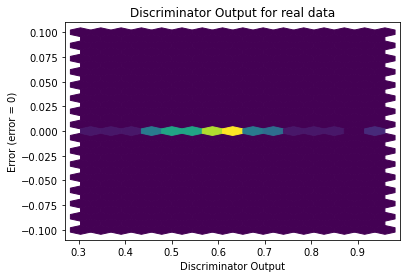

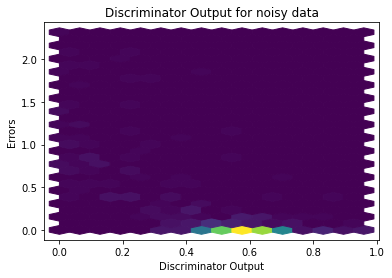

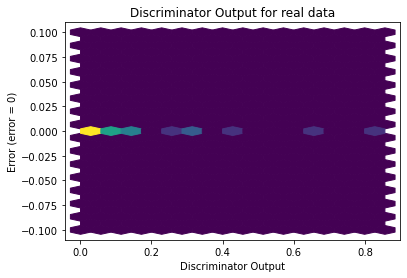

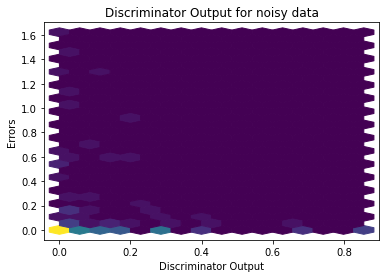

In [10]:
sanityChecks.discProbVsError(train_data,discriminator,device)
sanityChecks.discProbVsError(test_data,discriminator,device)